<h1 style="text-align: center;">AdEase Time Series</h1><br>

![Adease](adease.png)

## Problem Statement : 

Ad Ease is an ads and marketing based company helping businesses elicit maximum clicks @ minimum cost. AdEase is an ad infrastructure to help businesses promote themselves easily, effectively, and economically. The interplay of 3 AI modules - Design, Dispense, and Decipher, come together to make it this an end-to-end 3 step process digital advertising solution for all.

You are working in the Data Science team of Ad ease trying to understand the per page view report for different wikipedia pages for 550 days, and forecasting the number of views so that you can predict and optimize the ad placement for your clients. You are provided with the data of 145k wikipedia pages and daily view count for each of them. Your clients belong to different regions and need data on how their ads will perform on pages in different languages.

## **Data Dictionary:**

- There are two csv files given

- #### train_1.csv: 
  - In the csv file, each row corresponds to a particular article and each column corresponds to a particular date. The values are the number of visits on that date.

  - The page name contains data in this format:

        SPECIFIC NAME _ LANGUAGE.wikipedia.org _ ACCESS TYPE _ ACCESS ORIGIN

  - having information about the page name, the main domain, the device type used to access the page, and also the request origin(spider or browser agent)


- #### Exog_Campaign_eng:
  -  This file contains data for the dates which had a campaign or significant event that could affect the views for that day. The data is just for pages in English.

  - There’s 1 for dates with campaigns and 0 for remaining dates. 
  - It is to be treated as an exogenous variable for models when training and forecasting data for pages in English


  

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 1000)
pd.options.display.max_colwidth = 1000
sns.set(style = 'darkgrid')

- Importing the dataset and doing usual exploratory analysis steps like checking the structure & characteristics of the dataset

In [8]:
df = pd.read_csv('train_1.csv')
df.head()

Page  2015-07-01  2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  2015-07-09  2015-07-10  2015-07-11  2015-07-12  2015-07-13  2015-07-14  2015-07-15  2015-07-16  2015-07-17  2015-07-18  2015-07-19  2015-07-20  2015-07-21  2015-07-22  2015-07-23  2015-07-24  2015-07-25  2015-07-26  2015-07-27  2015-07-28  2015-07-29  2015-07-30  2015-07-31  2015-08-01  2015-08-02  2015-08-03  2015-08-04  2015-08-05  2015-08-06  2015-08-07  2015-08-08  2015-08-09  2015-08-10  2015-08-11  2015-08-12  2015-08-13  2015-08-14  2015-08-15  2015-08-16  2015-08-17  2015-08-18  2015-08-19  2015-08-20  2015-08-21  2015-08-22  2015-08-23  2015-08-24  2015-08-25  2015-08-26  2015-08-27  2015-08-28  2015-08-29  2015-08-30  2015-08-31  2015-09-01  2015-09-02  2015-09-03  2015-09-04  2015-09-05  2015-09-06  2015-09-07  2015-09-08  2015-09-09  2015-09-10  2015-09-11  2015-09-12  2015-09-13  2015-09-14  2015-09-15  2015-09-16  \
0              2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0         5.0        13.0        14.0         9.0         9.0        22.0        26.0        24.0        19.0        10.0        14.0        15.0         8.0        16.0         8.0         8.0        16.0         7.0        11.0        10.0        20.0        18.0        15.0        14.0        49.0        10.0        16.0        18.0         8.0         5.0         9.0         7.0        13.0         9.0         7.0         4.0        11.0        10.0         5.0         9.0         9.0         9.0         9.0        13.0         4.0        15.0        25.0         9.0         5.0         6.0        20.0         3.0        14.0        46.0         5.0         5.0        13.0         4.0         9.0        10.0         9.0        11.0        11.0        11.0         9.0        15.0         5.0        10.0         7.0         4.0         8.0         9.0        10.0         6.0        13.0        16.0   
1               2PM_zh.wikipedia.org_all-access_spider        11.0        14.0        15.0        18.0        11.0        13.0        22.0        11.0        10.0         4.0        41.0        65.0        57.0        38.0        20.0        62.0        44.0        15.0        10.0        47.0        24.0        17.0        22.0         9.0        39.0        13.0        11.0        12.0        21.0        19.0         9.0        15.0        33.0         8.0         8.0         7.0        13.0         2.0        23.0        12.0        27.0        27.0        36.0        23.0        58.0        80.0        60.0        69.0        42.0       161.0        94.0        77.0        78.0        20.0        24.0        13.0        14.0        26.0         8.0        82.0        22.0        11.0        81.0        37.0         9.0        40.0        47.0        18.0        23.0         6.0         2.0         7.0        16.0        10.0        34.0        14.0        31.0        20.0   
2                3C_zh.wikipedia.org_all-access_spider         1.0         0.0         1.0         1.0         0.0         4.0         0.0         3.0         4.0         4.0         1.0         1.0         1.0         6.0         8.0         6.0         4.0         5.0         1.0         2.0         3.0         8.0         8.0         6.0         6.0         2.0         2.0         3.0         2.0         4.0         3.0         3.0         5.0         3.0         5.0         4.0         2.0         5.0         1.0         4.0         5.0         0.0         0.0         7.0         3.0         5.0         1.0         6.0         2.0         5.0         0.0         3.0         1.0         0.0         1.0         1.0         2.0         4.0         2.0         1.0         1.0         3.0         4.0         3.0         6.0         6.0         4.0         3.0         3.0         2.0         9.0         7.0         2.0         3.0         1.0         3.0         1.0         6.0   
3           4minute_zh.wikipedia.org_all-access_spider        35.0        

In [9]:
df.shape

(145063, 551)

In [10]:
Exog_Campaign_eng = pd.read_csv("Exog_Campaign_eng")
Exog_Campaign_eng.head()

Exog
0     0
1     0
2     0
3     0
4     0

In [11]:
Exog_Campaign_eng.shape

(550, 1)

In [12]:
df.Page.sample(20)

83329                                                    How_to_contribute/am_www.mediawiki.org_all-access_spider
136414                                                                    ブル中野_ja.wikipedia.org_all-access_spider
44393     Commons:Wiki_Loves_Monuments_2016_in_the_United_States/Ohio_commons.wikimedia.org_all-access_all-agents
93981                                                              Asbesto_es.wikipedia.org_mobile-web_all-agents
32167                                                                湄公河行动_zh.wikipedia.org_all-access_all-agents
73108                                                       Bryan_Cranston_en.wikipedia.org_mobile-web_all-agents
76244                                                  The_Winds_of_Winter_en.wikipedia.org_mobile-web_all-agents
126096                                               Астахов,_Павел_Алексеевич_ru.wikipedia.org_all-access_spider
107578                                                                 宋熙年_zh.wikipedia.

In [13]:
df.Page.str.split("_").apply(lambda x:x[3]).head(20)

0               spider
1               spider
2               spider
3               spider
4                 Love
5               spider
6               spider
7               spider
8               spider
9               spider
10              spider
11    zh.wikipedia.org
12                 are
13              spider
14              spider
15              spider
16              spider
17          all-access
18          all-access
19              spider
Name: Page, dtype: object

In [14]:
data = df.copy()

In [15]:
data.duplicated().sum()
# No duplicate data

0

In [16]:
data.dtypes.sample(10)

2015-10-11    float64
2016-09-29    float64
2015-08-03    float64
2016-01-20    float64
2015-09-12    float64
2015-11-01    float64
2016-09-09    float64
2016-01-13    float64
2016-06-09    float64
2016-08-18    float64
dtype: object

In [17]:
indexes = data.head(2).columns[1:][range(0,549,20)].values
indexes

array(['2015-07-01', '2015-07-21', '2015-08-10', '2015-08-30',
       '2015-09-19', '2015-10-09', '2015-10-29', '2015-11-18',
       '2015-12-08', '2015-12-28', '2016-01-17', '2016-02-06',
       '2016-02-26', '2016-03-17', '2016-04-06', '2016-04-26',
       '2016-05-16', '2016-06-05', '2016-06-25', '2016-07-15',
       '2016-08-04', '2016-08-24', '2016-09-13', '2016-10-03',
       '2016-10-23', '2016-11-12', '2016-12-02', '2016-12-22'],
      dtype=object)

<Axes: >

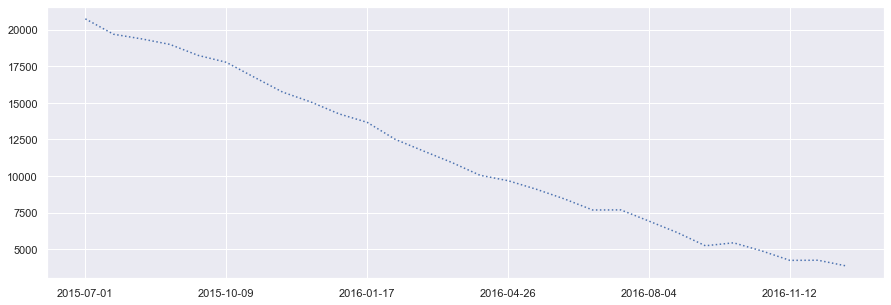

In [18]:
plt.figure(figsize=(15, 5))

data.isna().sum()[indexes].plot(linestyle='dotted')

- From above plot , we can observe that with time , null values are decreasing.
- Recent dates have lesser null values.
- This means newer pages will have no data of prior to that page hosting date.

In [19]:
# Replacing all the null values with 0

In [20]:
data.fillna(0,inplace =True)

In [21]:
data.isnull().sum()[indexes]

2015-07-01    0
2015-07-21    0
2015-08-10    0
2015-08-30    0
2015-09-19    0
2015-10-09    0
2015-10-29    0
2015-11-18    0
2015-12-08    0
2015-12-28    0
2016-01-17    0
2016-02-06    0
2016-02-26    0
2016-03-17    0
2016-04-06    0
2016-04-26    0
2016-05-16    0
2016-06-05    0
2016-06-25    0
2016-07-15    0
2016-08-04    0
2016-08-24    0
2016-09-13    0
2016-10-03    0
2016-10-23    0
2016-11-12    0
2016-12-02    0
2016-12-22    0
dtype: int64

# Exploratory Analysis 

    The page name contains data in this format:

    SPECIFICNAME_LANGUAGE.wikipedia.org_ACCESS TYPE_ ACCESS ORIGIN

### Extracting Language 

In [22]:
data.Page[0]

'2NE1_zh.wikipedia.org_all-access_spider'

In [23]:
import re
re.findall(r'_(.{2}).wikipedia.org_', "2NE1_zh.wikipedia.org_all-access_spider")

['zh']

In [24]:
data.Page.str.findall(pat="_(.{2}).wikipedia.org_").sample(10)

26110     [fr]
132932    [ja]
134290    [ja]
5116      [fr]
9566      [en]
102584    [ru]
45797       []
137417    [de]
138443    [de]
46703     [de]
Name: Page, dtype: object

In [25]:
# extracting language 
def Extract_Language(name):
    if len(re.findall(r'_(.{2}).wikipedia.org_', name)) == 1 : 
        return re.findall(r'_(.{2}).wikipedia.org_', name)[0]
    else: 
        return 'Unknown'

In [26]:
data["Language"] = data["Page"].map(Extract_Language)

In [27]:
data["Language"].unique()

array(['zh', 'fr', 'en', 'Unknown', 'ru', 'de', 'ja', 'es'], dtype=object)

https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes

In [28]:
dict_ ={'de':'German',
        'en':'English', 
        'es': 'Spanish', 
        'fr': 'French', 
        'ja': 'Japenese' , 
        'ru': 'Russian', 
        'zh': 'Chinese',
        'Unknown': 'Unknown_Language'}

data["Language"] = data["Language"].map(dict_)

In [29]:
data.head()

Page  2015-07-01  2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  2015-07-09  2015-07-10  2015-07-11  2015-07-12  2015-07-13  2015-07-14  2015-07-15  2015-07-16  2015-07-17  2015-07-18  2015-07-19  2015-07-20  2015-07-21  2015-07-22  2015-07-23  2015-07-24  2015-07-25  2015-07-26  2015-07-27  2015-07-28  2015-07-29  2015-07-30  2015-07-31  2015-08-01  2015-08-02  2015-08-03  2015-08-04  2015-08-05  2015-08-06  2015-08-07  2015-08-08  2015-08-09  2015-08-10  2015-08-11  2015-08-12  2015-08-13  2015-08-14  2015-08-15  2015-08-16  2015-08-17  2015-08-18  2015-08-19  2015-08-20  2015-08-21  2015-08-22  2015-08-23  2015-08-24  2015-08-25  2015-08-26  2015-08-27  2015-08-28  2015-08-29  2015-08-30  2015-08-31  2015-09-01  2015-09-02  2015-09-03  2015-09-04  2015-09-05  2015-09-06  2015-09-07  2015-09-08  2015-09-09  2015-09-10  2015-09-11  2015-09-12  2015-09-13  2015-09-14  2015-09-15  2015-09-16  \
0              2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0         5.0        13.0        14.0         9.0         9.0        22.0        26.0        24.0        19.0        10.0        14.0        15.0         8.0        16.0         8.0         8.0        16.0         7.0        11.0        10.0        20.0        18.0        15.0        14.0        49.0        10.0        16.0        18.0         8.0         5.0         9.0         7.0        13.0         9.0         7.0         4.0        11.0        10.0         5.0         9.0         9.0         9.0         9.0        13.0         4.0        15.0        25.0         9.0         5.0         6.0        20.0         3.0        14.0        46.0         5.0         5.0        13.0         4.0         9.0        10.0         9.0        11.0        11.0        11.0         9.0        15.0         5.0        10.0         7.0         4.0         8.0         9.0        10.0         6.0        13.0        16.0   
1               2PM_zh.wikipedia.org_all-access_spider        11.0        14.0        15.0        18.0        11.0        13.0        22.0        11.0        10.0         4.0        41.0        65.0        57.0        38.0        20.0        62.0        44.0        15.0        10.0        47.0        24.0        17.0        22.0         9.0        39.0        13.0        11.0        12.0        21.0        19.0         9.0        15.0        33.0         8.0         8.0         7.0        13.0         2.0        23.0        12.0        27.0        27.0        36.0        23.0        58.0        80.0        60.0        69.0        42.0       161.0        94.0        77.0        78.0        20.0        24.0        13.0        14.0        26.0         8.0        82.0        22.0        11.0        81.0        37.0         9.0        40.0        47.0        18.0        23.0         6.0         2.0         7.0        16.0        10.0        34.0        14.0        31.0        20.0   
2                3C_zh.wikipedia.org_all-access_spider         1.0         0.0         1.0         1.0         0.0         4.0         0.0         3.0         4.0         4.0         1.0         1.0         1.0         6.0         8.0         6.0         4.0         5.0         1.0         2.0         3.0         8.0         8.0         6.0         6.0         2.0         2.0         3.0         2.0         4.0         3.0         3.0         5.0         3.0         5.0         4.0         2.0         5.0         1.0         4.0         5.0         0.0         0.0         7.0         3.0         5.0         1.0         6.0         2.0         5.0         0.0         3.0         1.0         0.0         1.0         1.0         2.0         4.0         2.0         1.0         1.0         3.0         4.0         3.0         6.0         6.0         4.0         3.0         3.0         2.0         9.0         7.0         2.0         3.0         1.0         3.0         1.0         6.0   
3           4minute_zh.wikipedia.org_all-access_spider        35.0        

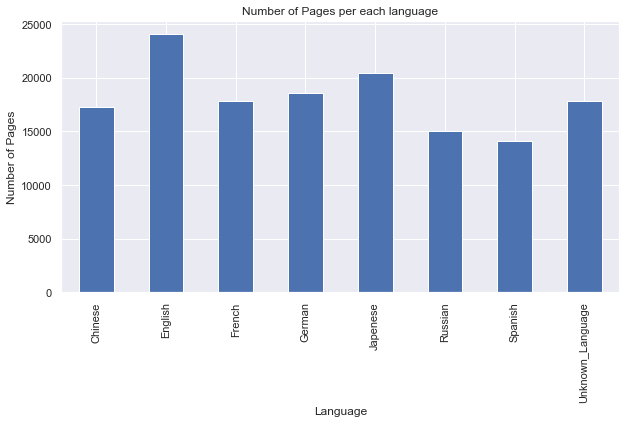

In [30]:
plt.figure(figsize=(10, 5))

data.groupby("Language")["Page"].count().plot(kind="bar")
plt.xlabel("Language")
plt.ylabel("Number of Pages")
plt.title("Number of Pages per each language")
plt.show()

In [31]:
from locale import normalize
data["Language"].value_counts(normalize=True) * 100


Language
English             16.618986
Japenese            14.084225
German              12.785479
Unknown_Language    12.308445
French              12.271909
Chinese             11.876909
Russian             10.355501
Spanish              9.698545
Name: proportion, dtype: float64

In [32]:
# 12.30 % of pages have unknown language.

# 16.61% of all pages are in English which is highest.

### Exrtacting ACCESS TYPE 

      SPECIFICNAME_LANGUAGE.wikipedia.org_ACCESS TYPE_ ACCESS ORIGIN

In [34]:
data["Access_Type"] = data.Page.str.findall(r'all-access|mobile-web|desktop').apply(lambda x:x[0])

In [35]:
data["Access_Type"].value_counts(dropna=False, normalize=True)

Access_Type
all-access    0.512295
mobile-web    0.247748
desktop       0.239958
Name: proportion, dtype: float64

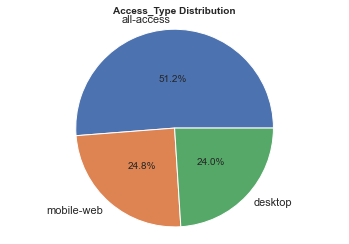

In [36]:
x = (data["Access_Type"].value_counts(dropna= False, normalize=True) * 100).values
y = (data["Access_Type"].value_counts(dropna= False, normalize=True) * 100).index

plt.pie(x,labels= y,radius=1.5,  autopct='%1.1f%%', pctdistance=0.5 )
plt.title(f'Access_Type Distribution', fontsize = 10, fontweight = 'bold')
plt.axis('equal')
plt.show()

### Exrtacting ACCESS ORIGIN

      SPECIFICNAME_LANGUAGE.wikipedia.org_ACCESS TYPE_ ACCESS ORIGIN

In [37]:
data.Page.sample(20)

62592                                                  謝沛恩_zh.wikipedia.org_desktop_all-agents
70403                                 Mozart_in_the_Jungle_es.wikipedia.org_desktop_all-agents
73215                                     Coen_brothers_en.wikipedia.org_mobile-web_all-agents
108461                               無頭騎士異聞錄_DuRaRaRa!!_zh.wikipedia.org_mobile-web_all-agents
76768                              Nineteen_Eighty-Four_en.wikipedia.org_mobile-web_all-agents
67789         Liste_der_erfolgreichsten_Sommerolympioniken_de.wikipedia.org_desktop_all-agents
90776                                         Elon_Musk_es.wikipedia.org_all-access_all-agents
123312                                             黒の組織_ja.wikipedia.org_all-access_all-agents
43667     Special:MyLanguage/Manual:System_administration_www.mediawiki.org_desktop_all-agents
79165              Category:Semi-erect_human_penis_commons.wikimedia.org_mobile-web_all-agents
137123                                         Bac

In [38]:
data.Page.str.findall(r'spider|agents').apply(lambda x:x[0]).isna().sum()

0

In [39]:
data["Access_Origin"] =  data.Page.str.findall(r'spider|agents').apply(lambda x:x[0])

In [40]:
data["Access_Origin"].value_counts(dropna= False, normalize=True) * 100

Access_Origin
agents    75.932526
spider    24.067474
Name: proportion, dtype: float64

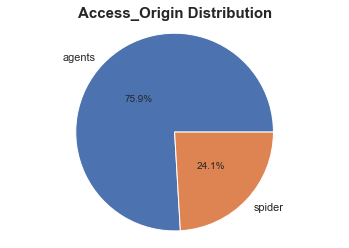

In [41]:
x = (data["Access_Origin"].value_counts(dropna= False, normalize=True) * 100).values
y = (data["Access_Origin"].value_counts(dropna= False, normalize=True) * 100).index

plt.pie(x,labels= y,radius=1.5,  autopct='%1.1f%%', pctdistance=0.5 )
plt.title(f'Access_Origin Distribution', fontsize = 15, fontweight = 'bold')
plt.axis('equal')
plt.show()

In [46]:
data.head()

Page  2015-07-01  2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  2015-07-09  2015-07-10  2015-07-11  2015-07-12  2015-07-13  2015-07-14  2015-07-15  2015-07-16  2015-07-17  2015-07-18  2015-07-19  2015-07-20  2015-07-21  2015-07-22  2015-07-23  2015-07-24  2015-07-25  2015-07-26  2015-07-27  2015-07-28  2015-07-29  2015-07-30  2015-07-31  2015-08-01  2015-08-02  2015-08-03  2015-08-04  2015-08-05  2015-08-06  2015-08-07  2015-08-08  2015-08-09  2015-08-10  2015-08-11  2015-08-12  2015-08-13  2015-08-14  2015-08-15  2015-08-16  2015-08-17  2015-08-18  2015-08-19  2015-08-20  2015-08-21  2015-08-22  2015-08-23  2015-08-24  2015-08-25  2015-08-26  2015-08-27  2015-08-28  2015-08-29  2015-08-30  2015-08-31  2015-09-01  2015-09-02  2015-09-03  2015-09-04  2015-09-05  2015-09-06  2015-09-07  2015-09-08  2015-09-09  2015-09-10  2015-09-11  2015-09-12  2015-09-13  2015-09-14  2015-09-15  2015-09-16  \
0              2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0         5.0        13.0        14.0         9.0         9.0        22.0        26.0        24.0        19.0        10.0        14.0        15.0         8.0        16.0         8.0         8.0        16.0         7.0        11.0        10.0        20.0        18.0        15.0        14.0        49.0        10.0        16.0        18.0         8.0         5.0         9.0         7.0        13.0         9.0         7.0         4.0        11.0        10.0         5.0         9.0         9.0         9.0         9.0        13.0         4.0        15.0        25.0         9.0         5.0         6.0        20.0         3.0        14.0        46.0         5.0         5.0        13.0         4.0         9.0        10.0         9.0        11.0        11.0        11.0         9.0        15.0         5.0        10.0         7.0         4.0         8.0         9.0        10.0         6.0        13.0        16.0   
1               2PM_zh.wikipedia.org_all-access_spider        11.0        14.0        15.0        18.0        11.0        13.0        22.0        11.0        10.0         4.0        41.0        65.0        57.0        38.0        20.0        62.0        44.0        15.0        10.0        47.0        24.0        17.0        22.0         9.0        39.0        13.0        11.0        12.0        21.0        19.0         9.0        15.0        33.0         8.0         8.0         7.0        13.0         2.0        23.0        12.0        27.0        27.0        36.0        23.0        58.0        80.0        60.0        69.0        42.0       161.0        94.0        77.0        78.0        20.0        24.0        13.0        14.0        26.0         8.0        82.0        22.0        11.0        81.0        37.0         9.0        40.0        47.0        18.0        23.0         6.0         2.0         7.0        16.0        10.0        34.0        14.0        31.0        20.0   
2                3C_zh.wikipedia.org_all-access_spider         1.0         0.0         1.0         1.0         0.0         4.0         0.0         3.0         4.0         4.0         1.0         1.0         1.0         6.0         8.0         6.0         4.0         5.0         1.0         2.0         3.0         8.0         8.0         6.0         6.0         2.0         2.0         3.0         2.0         4.0         3.0         3.0         5.0         3.0         5.0         4.0         2.0         5.0         1.0         4.0         5.0         0.0         0.0         7.0         3.0         5.0         1.0         6.0         2.0         5.0         0.0         3.0         1.0         0.0         1.0         1.0         2.0         4.0         2.0         1.0         1.0         3.0         4.0         3.0         6.0         6.0         4.0         3.0         3.0         2.0         9.0         7.0         2.0         3.0         1.0         3.0         1.0         6.0   
3           4minute_zh.wikipedia.org_all-access_spider        35.0        

In [44]:
pd.set_option('display.max_rows', 500)

In [73]:
data.groupby("Language").mean(numeric_only=True)

2015-07-01   2015-07-02   2015-07-03   2015-07-04   2015-07-05   2015-07-06   2015-07-07   2015-07-08   2015-07-09   2015-07-10   2015-07-11   2015-07-12   2015-07-13   2015-07-14   2015-07-15   2015-07-16   2015-07-17   2015-07-18   2015-07-19   2015-07-20   2015-07-21   2015-07-22   2015-07-23   2015-07-24   2015-07-25   2015-07-26   2015-07-27   2015-07-28   2015-07-29   2015-07-30   2015-07-31   2015-08-01   2015-08-02   2015-08-03   2015-08-04   2015-08-05   2015-08-06   2015-08-07   2015-08-08   2015-08-09   2015-08-10   2015-08-11   2015-08-12   2015-08-13   2015-08-14   2015-08-15   2015-08-16   2015-08-17   2015-08-18   2015-08-19   2015-08-20   2015-08-21   2015-08-22   2015-08-23   2015-08-24   2015-08-25   2015-08-26   2015-08-27   2015-08-28   2015-08-29   2015-08-30   2015-08-31   2015-09-01   2015-09-02   2015-09-03   2015-09-04   2015-09-05   2015-09-06   2015-09-07   2015-09-08   2015-09-09   2015-09-10   2015-09-11   2015-09-12   2015-09-13  \
Language                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
Chinese            240.582042   240.941958   239.344071   241.653491   257.779674   259.114864   258.832260   265.589529   263.964420   274.414592   256.063033   288.486389   264.727901   250.042312   245.214870   244.599222   245.653549   256.005108   288.624761   271.435080   267.036798   270.358988   240.609902   208.975390   201.056068   217.077137   217.070114   214.286320   216.415869   208.084973   196.084741   178.252249   195.768994   217.220384   256.077312   265.548436   259.748622   255.356898   254.938302   264.849846   247.768704   244.862383   252.126241   261.048697   251.576470   262.155203   279.539497   272.954031   270.575483   252.785188   215.135643   244.045621   282.329212   309.352313   279.878867   269.393871   281.005920   284.599048   275.379128   281.576934   299.100644   271.023681   252.365082   250.865634   259.101283   243.144176   265.351442   280.669685   248.671484   237.336293   230.769923   219.309420   228.974926   257.926926   264.125080   
English           3513.862203  3502.511407  3325.357889  3462.054256  3575.520035  3849.736021  3643.523063  3437.871080  3517.459391  3497.571594  3517.054297  3869.211216  3832.417662  3854.165298  3563.026589  3605.074747  3455.528829  3335.306288  3540.557533  3720.901319  3544.275386  3488.537249  3435.995645  3340.325991  3346.974988  3585.658246  3643.563216  3589.972955  4189.383649  3283.135930  3175.764394  3181.306330  3462.768790  3267.471420  3522.243861  3527.101419  3533.813464  3599.890783  3434.248050  3580.401029  3513.810685  3508.693504  3520.861830  3472.513979  3437.645180  3436.148664  3666.110586  3714.781276  3585.069396  3442.963249  3450.416501  3382.392111  3340.002406  3700.591920  3681.515306  3494.014269  3332.366393  3330.276091  3230.231666  3320.014186  3499.792517  3793.064253  3397.030488  3410.346897  3349.463498  3293.239340  3384.751908  3574.027045  3798.533972  3643.806662  3544.514601  3451.838518  3576.919653  3503.259209  3899.006886   
French             475.150994   478.202

In [74]:
aggregated_data = data.groupby("Language").mean(numeric_only=True).T.drop("Unknown_Language",axis = 1).reset_index()

In [75]:
aggregated_data["index"] = pd.to_datetime(aggregated_data["index"])
aggregated_data = aggregated_data.set_index("index")

In [76]:
aggregated_data.head()

Language       Chinese      English      French      German    Japenese     Russian      Spanish
index                                                                                           
2015-07-01  240.582042  3513.862203  475.150994  714.968405  580.647056  629.999601  1085.972919
2015-07-02  240.941958  3502.511407  478.202000  705.229741  666.672801  640.902876  1037.814557
2015-07-03  239.344071  3325.357889  459.837659  676.877231  602.289805  594.026295   954.412680
2015-07-04  241.653491  3462.054256  491.508932  621.145145  756.509177  558.728132   896.050750
2015-07-05  257.779674  3575.520035  482.557746  722.076185  725.720914  595.029157   974.508210

In [77]:
aggregated_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 550 entries, 2015-07-01 to 2016-12-31
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Chinese   550 non-null    float64
 1   English   550 non-null    float64
 2   French    550 non-null    float64
 3   German    550 non-null    float64
 4   Japenese  550 non-null    float64
 5   Russian   550 non-null    float64
 6   Spanish   550 non-null    float64
dtypes: float64(7)
memory usage: 34.4 KB


In [78]:
aggregated_data.index

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'], dtype='datetime64[ns]', name='index', length=550, freq=None)

### Visualising Time  Series for each languages

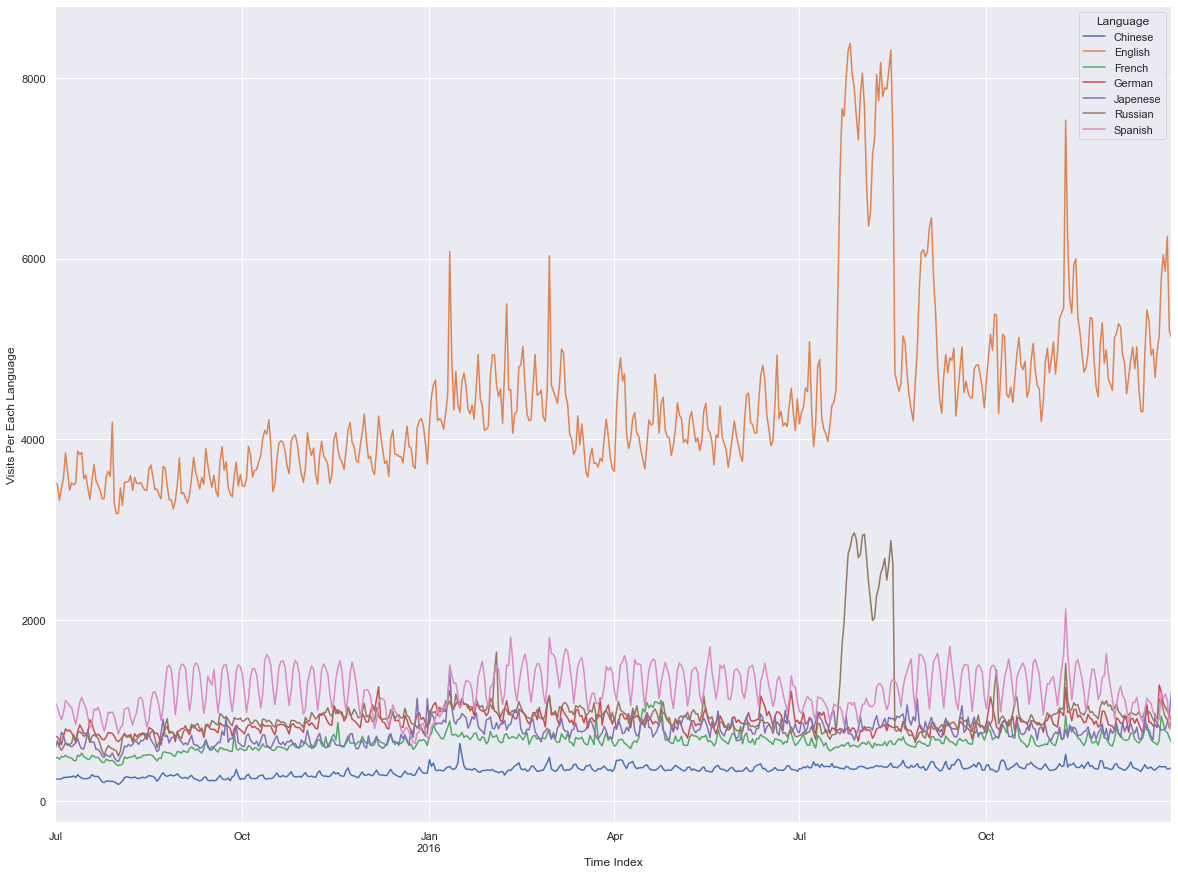

In [79]:
plt.rcParams['figure.figsize'] = (20, 15)

aggregated_data.plot()

plt.xlabel("Time Index")
plt.ylabel("Visits Per Each Language")
plt.show()

## Hypothesis Testing : if Time Series is Stationary or Trending

- Null Hypothesis: The series is Non-Stationary
- Alternative Hypothesis: The series is Stationary 

- significant value : 0.05 (alpha)

- if p-value > 0.05 : we failed to reject Null hypothesis: 
  - That means the series is Non-Stationart
- if p-value <= 0.05: we reject Null Hypothesis
 - that means the time series in Stationary


In [80]:
import statsmodels.api as sm

In [81]:
def Dickey_Fuller_test(ts,significances_level = 0.05):
    p_value = sm.tsa.stattools.adfuller(ts)[1]
    if p_value <= significances_level:
        print("Time Series is Stationary")
    else:
        print("Time Series is NOT Stationary")
    print("P_value is: ", p_value)
    

In [82]:
for Language in aggregated_data.columns:
    print(Language)
    print(Dickey_Fuller_test(aggregated_data[Language],significances_level = 0.05))
    print()
    print()

Chinese
Time Series is NOT Stationary
P_value is:  0.44744579229311454
None


English
Time Series is NOT Stationary
P_value is:  0.18953359279992404
None


French
Time Series is NOT Stationary
P_value is:  0.05149502195245779
None


German
Time Series is NOT Stationary
P_value is:  0.14097382319728524
None


Japenese
Time Series is NOT Stationary
P_value is:  0.10257133898557586
None


Russian
Time Series is Stationary
P_value is:  0.0018649376536617962
None


Spanish
Time Series is Stationary
P_value is:  0.03358859084479074
None




- Based on DickeyFuller test of Stationarity , we can observe Spanish and Russian languages Pages visits Time series are stationary. 
- Chinese, English , German , Japanese and French are not stationary.

In [84]:
# Further analysing Time Series for English Language Pages Visits

In [85]:
TS_English = aggregated_data.English

In [87]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    
    dftest = sm.tsa.stattools.adfuller(timeseries, autolag='AIC')
    df_output = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        df_output['Critical Value (%s)' %key] = value
    print (df_output)

In [89]:
adf_test(TS_English)

Results of Dickey-Fuller Test:
Test Statistic                  -2.247284
p-value                          0.189534
#Lags Used                      14.000000
Number of Observations Used    535.000000
Critical Value (1%)             -3.442632
Critical Value (5%)             -2.866957
Critical Value (10%)            -2.569655
dtype: float64


In [90]:
Dickey_Fuller_test(TS_English)

Time Series is NOT Stationary
P_value is:  0.18953359279992404


## Visualising English-Language Page Visits Time Series manually to identify seasonality and period :

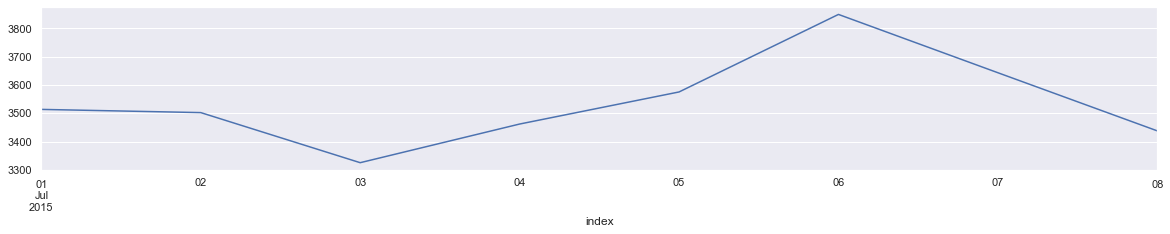

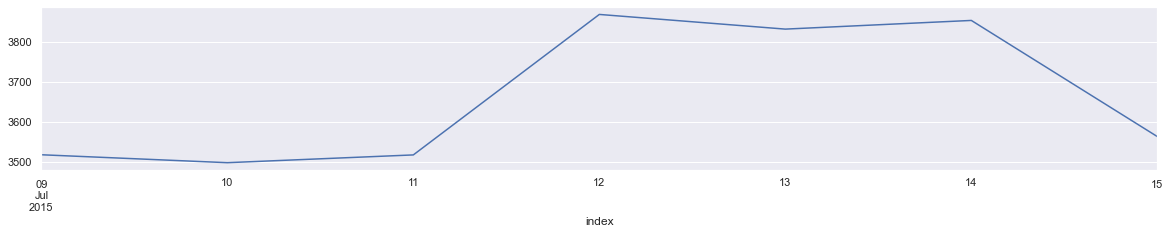

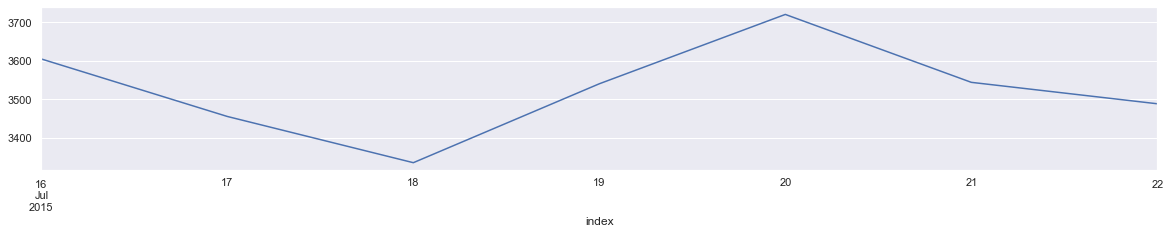

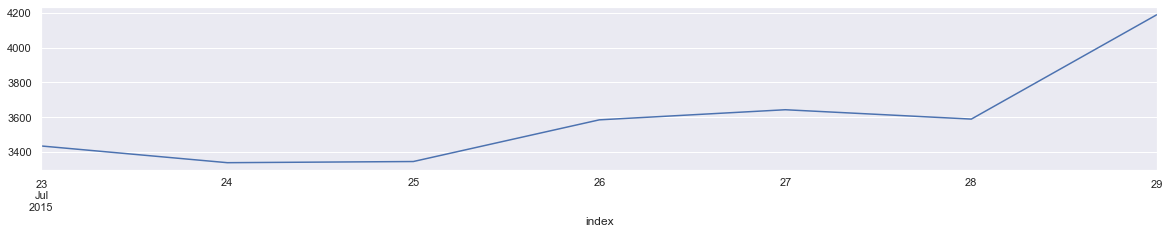

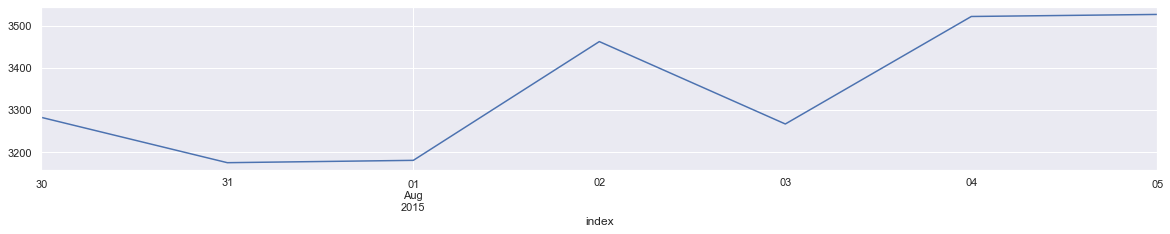

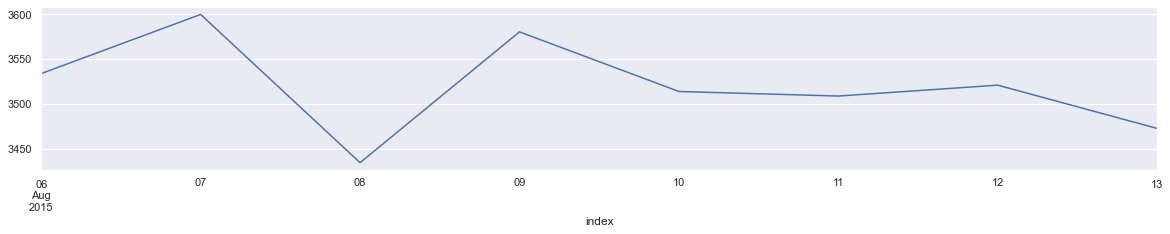

In [91]:
plt.rcParams['figure.figsize'] = (20, 3)

TS_English[:8].plot()
plt.show()
TS_English[8:15].plot()
plt.show()
TS_English[15:22].plot()
plt.show()
TS_English[22:29].plot()
plt.show()
TS_English[29:36].plot()
plt.show()

TS_English[36:44].plot()
plt.show()


In [92]:
correlations = []
for lag in range(1,30):
    present = TS_English[:-lag]
    past = TS_English.shift(-lag)[:-lag]
    corrs = np.corrcoef(present,past)[0][-1]
    print(lag,corrs)
    correlations.append(corrs)

1 0.9363434527458432
2 0.8682966716039896
3 0.8185418037184545
4 0.7846718829500337
5 0.7612561076942567
6 0.7542260641783564
7 0.7386829287516692
8 0.6912638018189879
9 0.6370978014300402
10 0.6015277501876307
11 0.5825450402423568
12 0.5812931934793538
13 0.6007266462817786
14 0.6142525351445118
15 0.5971084554755529
16 0.5693834937428246
17 0.5488401467532628
18 0.5377431132136111
19 0.5430816743411202
20 0.5552694244923041
21 0.5540623423718067
22 0.5092655604869365
23 0.4537369557681358
24 0.4112336297620324
25 0.38162860616251726
26 0.3651996316699482
27 0.3723603627302601
28 0.3781822668316003
29 0.3593924266732816


## Time Series Decomposition 

          Y(t) = seasonality + trend + residuals 
                    S(t)       + T(t)  + R(t) 

             
             

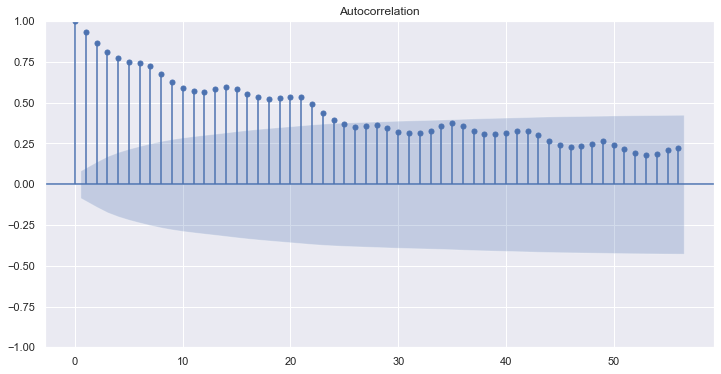

In [93]:
# using auto correlation function plot , to varify the period 

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plt.rcParams['figure.figsize'] = (12, 6)
plot_acf(TS_English,lags=56);

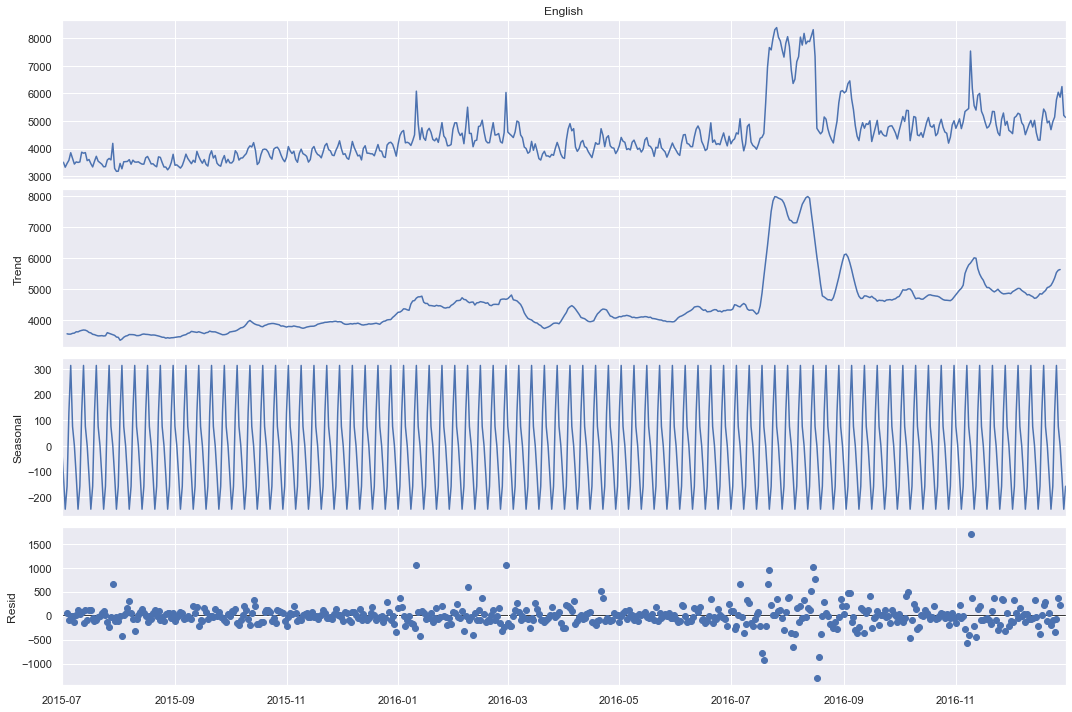

In [94]:
plt.rcParams['figure.figsize'] = (15, 10)

Decomposition_model = sm.tsa.seasonal_decompose(TS_English, model='additive',period=7)
Decomposition_model.plot();

In [95]:
Dickey_Fuller_test(pd.Series(Decomposition_model.resid).fillna(0))

Time Series is Stationary
P_value is:  3.727526947813378e-21


In [96]:
# Residuals from time series decomposition are Stationary 

<Axes: xlabel='index'>

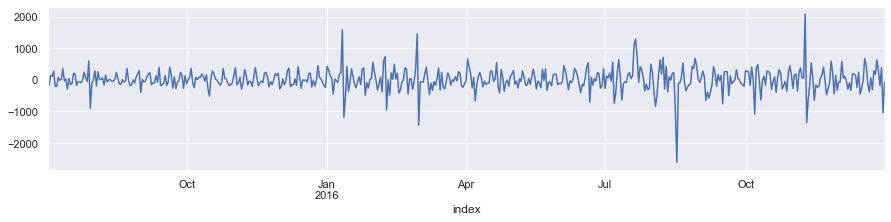

In [97]:
# Taking the first differentiation of the time series and plotting

plt.rcParams['figure.figsize'] = (15, 3)

TS_English.diff(1).dropna().plot()

In [98]:
Dickey_Fuller_test(TS_English.diff(1).dropna())

Time Series is Stationary
P_value is:  5.292474635436461e-13


In [99]:
# After 1 differentiation  , time series becomes stationary.
# Thus for ARIMA models , we can set d = 1

In [100]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae, 
    mean_absolute_percentage_error as mape
)

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3)) 
    print('MAPE:', round(mape(actual, predicted), 3))

# Forecasting

### Trying out ExponentialSmoothing Method

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<Axes: xlabel='index'>

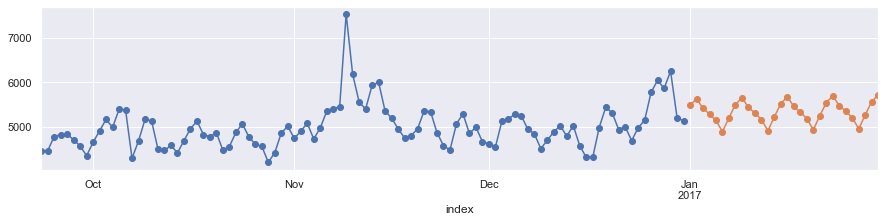

In [101]:
model = sm.tsa.ExponentialSmoothing(TS_English, seasonal='add',trend="add")
model = model.fit()
# default values
# of smoothing_level, seasonal_smoothing and 
# and trend smoothing
    
TS_English.tail(100).plot(style='-o', label='actual')
model.forecast(30).plot(style='-o', label='predicted')

MAE : 394.986
RMSE : 563.361
MAPE: 0.073


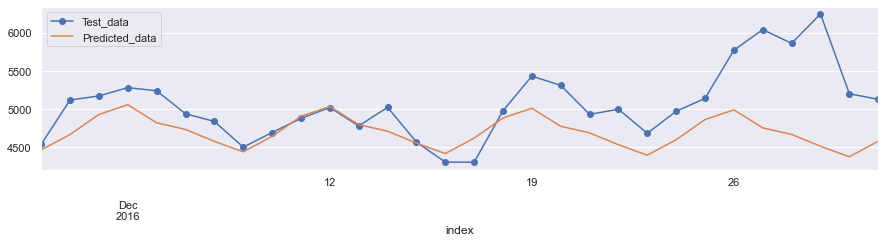

In [102]:
X_train = TS_English.loc[TS_English.index < TS_English.index[-30] ].copy()
X_test = TS_English.loc[TS_English.index >= TS_English.index[-30] ].copy()

import warnings # supress warnings
warnings.filterwarnings('ignore')


model = sm.tsa.ExponentialSmoothing(X_train,
                                    trend="add",
                                    damped_trend="add",
                                    seasonal="add")
model = model.fit(smoothing_level=None,    # alpha
            smoothing_trend=None,          # beta
            smoothing_seasonal=None)       # gama)

# X_test.plot()
Pred = model.forecast(steps=30)
performance(X_test,Pred)

X_test.plot(style="-o",label ="Test_data")
Pred.plot(label="Predicted_data")
plt.legend()
plt.show()

## ARIMA

- ####   Autoregressive Integrated Moving Average (ARIMA) model, and extensions

      This model is the basic interface for ARIMA-type models, including those
      with exogenous regressors and those with seasonal components. The most
      general form of the model is SARIMAX(p, d, q)x(P, D, Q, s). It also allows
      all specialized cases, including

      autoregressive models: AR(p)

      moving average models: MA(q)

      mixed autoregressive moving average models: ARMA(p, q)

      integration models: ARIMA(p, d, q)

      seasonal models: SARIMA(P, D, Q, s)

      regression with errors that follow one of the above ARIMA-type models



In [103]:
from statsmodels.tsa.arima.model import ARIMA

In [104]:
TS = TS_English.copy(deep=True)

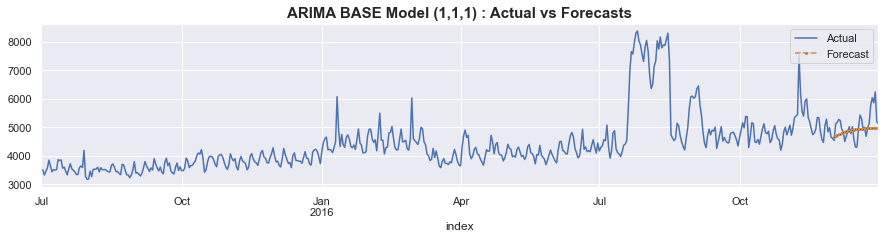


MAPE of Model : 0.06585
RMSE of Model : 472.186


In [105]:
n_forecast = 30


model = ARIMA(TS[:-n_forecast],
              order = (1,1,1))
model = model.fit()

predicted = model.forecast(steps= n_forecast, alpha = 0.05)


TS.plot(label = 'Actual')
predicted.plot(label = 'Forecast', linestyle='dashed', marker='o',markerfacecolor='green', markersize=2)
plt.legend(loc="upper right")
plt.title('ARIMA BASE Model (1,1,1) : Actual vs Forecasts', fontsize = 15, fontweight = 'bold')
plt.show()


#Calculating MAPE & RMSE
actuals = TS.values[-n_forecast:]
errors = TS.values[-n_forecast:] - predicted.values

mape = np.mean(np.abs(errors)/ np.abs(actuals))
rmse = np.sqrt(np.mean(errors**2))

print()
print(f'MAPE of Model : {np.round(mape,5)}')
print(f'RMSE of Model : {np.round(rmse,3)}')

### SARIMAX model

In [106]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [107]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def sarimax_model(time_series, n, p=0, d=0, q=0, P=0, D=0, Q=0, s=0, exog = []):
    
    #Creating SARIMAX Model with order(p,d,q) & seasonal_order=(P, D, Q, s) 
    model = SARIMAX(time_series[:-n], \
                    order =(p,d,q), 
                    seasonal_order=(P, D, Q, s), 
                    exog = exog[:-n],
                    initialization='approximate_diffuse')
    model_fit = model.fit()
    
    #Creating forecast for last n-values
    model_forecast = model_fit.forecast(n, dynamic = True, exog = pd.DataFrame(exog[-n:]))
    
    #plotting Actual & Forecasted values
    
    plt.figure(figsize = (20,8))
    time_series[-60:].plot(label = 'Actual')
    model_forecast[-60:].plot(label = 'Forecast', color = 'red', 
                              linestyle='dashed', marker='o',markerfacecolor='green', markersize=5)
    plt.legend(loc="upper right")
    plt.title(f'SARIMAX Model ({p},{d},{q}) ({P},{D},{Q},{s}) : Actual vs Forecasts', fontsize = 15, fontweight = 'bold')
    plt.show()
    
    #Calculating MAPE & RMSE
    actuals = time_series.values[-n:]
    errors = time_series.values[-n:] - model_forecast.values

    mape = np.mean(np.abs(errors)/ np.abs(actuals))
    rmse = np.sqrt(np.mean(errors**2))

    print()
    print(f'MAPE of Model : {np.round(mape,5)}')
    print(f'RMSE of Model : {np.round(rmse,3)}')


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.10789D+00    |proj g|=  5.75686D-02

At iterate    5    f=  7.08160D+00    |proj g|=  1.01011D-02

At iterate   10    f=  7.07815D+00    |proj g|=  4.79294D-03

At iterate   15    f=  7.07778D+00    |proj g|=  2.05901D-03

At iterate   20    f=  7.02070D+00    |proj g|=  8.56593D-02

At iterate   25    f=  7.01616D+00    |proj g|=  2.33513D-03

At iterate   30    f=  7.00220D+00    |proj g|=  1.46682D-02

At iterate   35    f=  6.99318D+00    |proj g|=  3.02119D-03

At iterate   40    f=  6.99278D+00    |proj g|=  9.71857D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

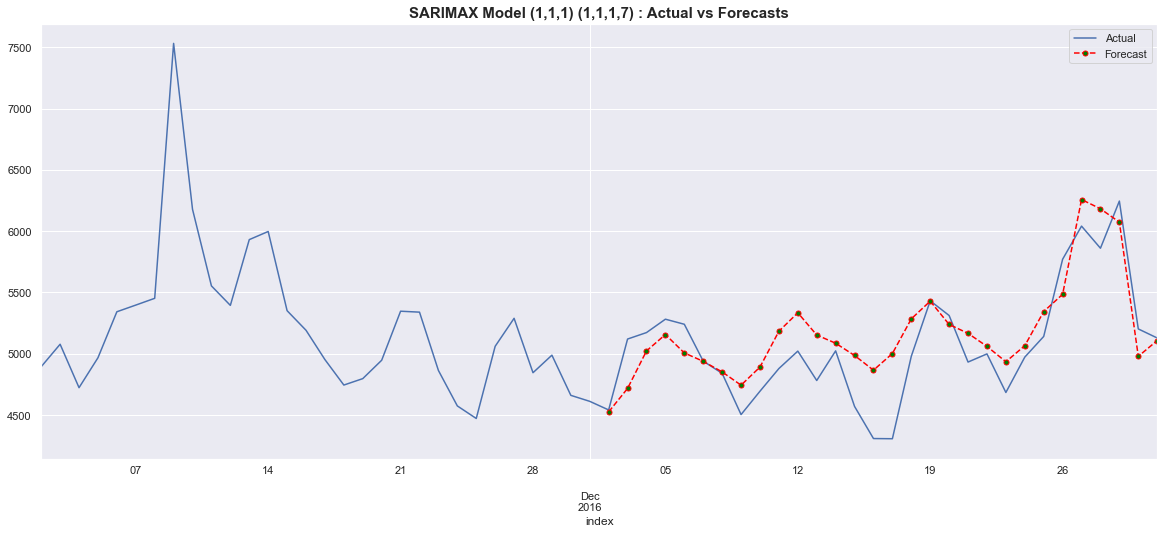


MAPE of Model : 0.04455
RMSE of Model : 272.877


In [108]:
exog = Exog_Campaign_eng['Exog'].to_numpy()
time_series = aggregated_data.English
test_size= 0.1
p,d,q, P,D,Q,s = 1,1,1,1,1,1,7
n = 30
sarimax_model(time_series, n, p=p, d=d, q=q, P=P, D=D, Q=Q, s=s, exog = exog)

### Hyperparamer tuning for SARIMAX model 

In [109]:
def SARIMAX_grid_search(time_series, n, param, d_param, s_param, exog = []):
    counter = 0
    #creating df for storing results summary
    param_df = pd.DataFrame(columns = ['serial','pdq', 'PDQs', 'mape', 'rmse'])
    
    #Creating loop for every paramater to fit SARIMAX model
    for p in param:
        for d in d_param:
            for q in param:
                for P in param:
                    for D in d_param:
                        for Q in param:
                            for s in s_param:
                                #Creating Model
                                model = SARIMAX(time_series[:-n], 
                                                order=(p,d,q), 
                                                seasonal_order=(P, D, Q, s), 
                                                exog = exog[:-n],
                                                initialization='approximate_diffuse')
                                model_fit = model.fit()
                                
                                #Creating forecast from Model
                                model_forecast = model_fit.forecast(n, dynamic = True, exog = pd.DataFrame(exog[-n:]))
                                
                                #Calculating errors for results
                                actuals = time_series.values[-n:]
                                errors = time_series.values[-n:] - model_forecast.values
                                
                                #Calculating MAPE & RMSE
                                mape = np.mean(np.abs(errors)/ np.abs(actuals))
                                rmse = np.sqrt(np.mean(errors**2))
                                mape = np.round(mape,5)
                                rmse = np.round(rmse,3)
                                
                                #Storing the results in param_df
                                counter += 1
                                list_row = [counter, (p,d,q), (P,D,Q,s), mape, rmse]
                                param_df.loc[len(param_df)] = list_row
                                
                #print statement to check progress of Loop                
                print(f'Possible Combination: {counter} out of { (len(param)**4)*len(s_param)*(len(d_param)**2)} calculated')
                           
    return param_df     

In [110]:
#Finding best parameters for English time series

exog = Exog_Campaign_eng['Exog'].to_numpy()
time_series = aggregated_data.English
n = 30
param = [0,1,2]
d_param = [0,1]
s_param = [7]

english_params  = SARIMAX_grid_search(time_series, n, param, d_param,s_param, exog)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23401D+01    |proj g|=  1.09646D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3     19      1     0     0   3.518D-06   9.718D+00
  F =   9.7175410029839746     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.5

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.39044D+00    |proj g|=  2.67613D-03

At iterate   10    f=  9.39039D+00    |proj g|=  9.58772D-04

At iterate   15    f=  9.38988D+00    |proj g|=  1.21492D-02

At iterate   20    f=  9.35143D+00    |proj g|=  9.81425D-02

At iterate   25    f=  9.17024D+00    |proj g|=  1.67131D-01

At iterate   30    f=  9.14611D+00    |proj g|=  2.19157D-04

At iterate   35    f=  9.14611D+00    |proj g|=  8.99904D-04

At iterate   40    f=  9.14589D+00    |proj g|=  1.21496D-02

At iterate   45    f=  9.11017D+00    |proj g|=  2.03316D-01

At iterate   50    f=  8.86519D+00    |proj g|=  1.35032D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.65751D+00    |proj g|=  2.73717D-04

At iterate   10    f=  7.65731D+00    |proj g|=  7.96825D-03

At iterate   15    f=  7.65285D+00    |proj g|=  7.54964D-03

At iterate   20    f=  7.65266D+00    |proj g|=  6.06692D-04

At iterate   25    f=  7.65020D+00    |proj g|=  6.96281D-03

At iterate   30    f=  7.64283D+00    |proj g|=  3.10434D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     33     37      1     0     0   1.469D-07   7.643D+00
  F =   7.6427803424571810     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  7.63962D+00    |proj g|=  4.78046D-03

At iterate   10    f=  7.63219D+00    |proj g|=  2.25142D-02

At iterate   15    f=  7.62974D+00    |proj g|=  7.32909D-05

At iterate   20    f=  7.62970D+00    |proj g|=  6.32634D-04

At iterate   25    f=  7.62708D+00    |proj g|=  1.38596D-02

At iterate   30    f=  7.62005D+00    |proj g|=  1.66551D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     33     38      1     0     0   8.261D-06   7.620D+00
  F =   7.6200479750040966     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  8.68428D+00    |proj g|=  2.08410D-03

At iterate   15    f=  8.68280D+00    |proj g|=  5.72188D-03

At iterate   20    f=  7.98087D+00    |proj g|=  1.76001D-03

At iterate   25    f=  7.70586D+00    |proj g|=  7.63541D-04

At iterate   30    f=  7.67459D+00    |proj g|=  1.19875D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     52      1     0     0   5.348D-06   7.675D+00
  F =   7.6745896397881115     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.



At iterate    5    f=  8.69297D+00    |proj g|=  1.01956D-02

At iterate   10    f=  8.67900D+00    |proj g|=  2.91038D-03

At iterate   15    f=  8.67718D+00    |proj g|=  5.97797D-03

At iterate   20    f=  8.67618D+00    |proj g|=  1.13444D-03

At iterate   25    f=  8.40521D+00    |proj g|=  9.67091D-02

At iterate   30    f=  8.38654D+00    |proj g|=  3.22145D-03

At iterate   35    f=  8.38554D+00    |proj g|=  1.02364D-02

At iterate   40    f=  8.34779D+00    |proj g|=  3.92261D-02

At iterate   45    f=  7.82582D+00    |proj g|=  2.15123D-01

At iterate   50    f=  7.79585D+00    |proj g|=  7.94811D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   30    f=  7.62588D+00    |proj g|=  2.71218D-02

At iterate   35    f=  7.61745D+00    |proj g|=  1.77909D-02

At iterate   40    f=  7.61702D+00    |proj g|=  9.10997D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     41     45      1     0     0   2.787D-06   7.617D+00
  F =   7.6170221674313359     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.63514D+00    |proj g|=  2.65525D-02

At iter

 This problem is unconstrained.



At iterate   10    f=  7.63390D+00    |proj g|=  8.39522D-04

At iterate   15    f=  7.63345D+00    |proj g|=  1.05859D-02

At iterate   20    f=  7.62868D+00    |proj g|=  9.74891D-04

At iterate   25    f=  7.62862D+00    |proj g|=  2.81079D-04

At iterate   30    f=  7.62850D+00    |proj g|=  1.11769D-02

At iterate   35    f=  7.62434D+00    |proj g|=  4.94736D-02

At iterate   40    f=  7.62038D+00    |proj g|=  1.58459D-02

At iterate   45    f=  7.61867D+00    |proj g|=  5.69874D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     46     51      1     0     0   1.739D-05   7.619D+00
  F =   7.61866616448

 This problem is unconstrained.



At iterate   35    f=  8.15807D+00    |proj g|=  2.03834D-02

At iterate   40    f=  7.78269D+00    |proj g|=  5.41807D-03

At iterate   45    f=  7.72724D+00    |proj g|=  7.15977D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     46     62      1     0     0   7.953D-06   7.727D+00
  F =   7.7272377178799809     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.70925D+00    |proj g|=  1.01302D-01


 This problem is unconstrained.



At iterate    5    f=  8.69747D+00    |proj g|=  5.95714D-02

At iterate   10    f=  8.67904D+00    |proj g|=  2.00544D-03

At iterate   15    f=  8.67554D+00    |proj g|=  1.62540D-02

At iterate   20    f=  8.67188D+00    |proj g|=  1.50394D-04

At iterate   25    f=  8.53144D+00    |proj g|=  1.21105D-01

At iterate   30    f=  8.51987D+00    |proj g|=  9.49999D-03

At iterate   35    f=  8.49010D+00    |proj g|=  2.64048D-01

At iterate   40    f=  7.97372D+00    |proj g|=  7.30038D-01

At iterate   45    f=  7.71981D+00    |proj g|=  2.08998D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     48     61   

 This problem is unconstrained.



At iterate   10    f=  8.67543D+00    |proj g|=  1.24808D-03

At iterate   15    f=  8.67493D+00    |proj g|=  7.28587D-03

At iterate   20    f=  8.67309D+00    |proj g|=  1.00085D-03

At iterate   25    f=  8.67234D+00    |proj g|=  3.49645D-04

At iterate   30    f=  7.85159D+00    |proj g|=  2.31144D-02

At iterate   35    f=  7.81020D+00    |proj g|=  8.77920D-04

At iterate   40    f=  7.72300D+00    |proj g|=  8.23941D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     68      1     0     0   6.076D-06   7.723D+00
  F =   7.7229443324135287     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate   15    f=  7.66154D+00    |proj g|=  3.76864D-02

At iterate   20    f=  7.65924D+00    |proj g|=  3.40562D-04

At iterate   25    f=  7.65924D+00    |proj g|=  3.04953D-04

At iterate   30    f=  7.65919D+00    |proj g|=  2.14322D-03

At iterate   35    f=  7.65906D+00    |proj g|=  3.65088D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     36     44      1     0     0   2.383D-06   7.659D+00
  F =   7.6590630059337723     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.



At iterate    5    f=  7.65975D+00    |proj g|=  8.24904D-02

At iterate   10    f=  7.63606D+00    |proj g|=  2.96406D-02

At iterate   15    f=  7.63514D+00    |proj g|=  1.82672D-04

At iterate   20    f=  7.63506D+00    |proj g|=  6.34073D-03

At iterate   25    f=  7.63351D+00    |proj g|=  1.90134D-02

At iterate   30    f=  7.63309D+00    |proj g|=  1.78468D-04

At iterate   35    f=  7.63305D+00    |proj g|=  4.08245D-03

At iterate   40    f=  7.63090D+00    |proj g|=  3.06540D-02

At iterate   45    f=  7.62385D+00    |proj g|=  1.82532D-03

At iterate   50    f=  7.62385D+00    |proj g|=  1.27930D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.65284D+00    |proj g|=  1.11706D-01

At iterate    5    f=  7.62797D+00    |proj g|=  1.73661D-03

At iterate   10    f=  7.62794D+00    |proj g|=  7.00357D-04

At iterate   15    f=  7.62787D+00    |proj g|=  2.40390D-03

At iterate   20    f=  7.62565D+00    |proj g|=  2.16842D-02

At iterate   25    f=  7.62421D+00    |proj g|=  8.31448D-05

At iterate   30    f=  7.62421D+00    |proj g|=  9.26876D-04

At iterate   35    f=  7.62390D+00    |proj g|=  1.03490D-02

At iterate   40    f=  7.61893D+00    |proj g|=  2.44752D-02

At iterate   45    f=  7.61700D+00    |proj g|=  4.56657D-04

At iterate   50    f=  7.61700D+00    |proj g|=  5.74095D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = numbe

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  8.94910D+00    |proj g|=  4.40165D-02

At iterate   30    f=  8.92872D+00    |proj g|=  6.87470D-05

At iterate   35    f=  8.92871D+00    |proj g|=  1.72769D-03

At iterate   40    f=  8.92789D+00    |proj g|=  2.27682D-02

At iterate   45    f=  8.84517D+00    |proj g|=  2.46067D-01

At iterate   50    f=  8.66920D+00    |proj g|=  1.11539D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     68      1     1     0   1.115D-02   8.669D+00
  F =   8.6691954409305012     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  9.29965D+00    |proj g|=  7.58413D-04

At iterate   15    f=  9.29860D+00    |proj g|=  1.27604D-02

At iterate   20    f=  9.18898D+00    |proj g|=  9.91328D-02

At iterate   25    f=  9.11203D+00    |proj g|=  7.23162D-03
  ys=-1.431E-01  -gs= 3.446E-02 BFGS update SKIPPED

At iterate   30    f=  8.86764D+00    |proj g|=  4.65586D-02

At iterate   35    f=  8.86558D+00    |proj g|=  8.75492D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     50      1     1     0   8.755D-05   8.866D+00
  F =   8.8655797770978690     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  7.39022D+00    |proj g|=  7.83877D-02

At iterate   20    f=  7.36651D+00    |proj g|=  3.41876D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     26      1     0     0   1.210D-05   7.366D+00
  F =   7.3664992878155511     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.43885D+00    |proj g|=  1.44688D-01

At iterate    5    f=  7.40975D+00    |proj g|=  8.27619D-04


 This problem is unconstrained.



At iterate   10    f=  7.40929D+00    |proj g|=  6.87017D-03

At iterate   15    f=  7.39108D+00    |proj g|=  8.65645D-02

At iterate   20    f=  7.35873D+00    |proj g|=  4.97853D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     26      1     0     0   2.565D-05   7.359D+00
  F =   7.3587248271407839     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.27170D+00    |proj g|=  4.10290D-02

At iter

 This problem is unconstrained.


           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     73      1     0     0   2.730D-01   7.639D+00
  F =   7.6388792874527063     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.25323D+00    |proj g|=  1.63992D-02

At iterate    5    f=  9.24860D+00    |proj g|=  1.96152D-03

At iterate   10    f=  9.24745D+00    |proj g|=  2.31706D-04

At iterate   15    f=  8.92517D+00    |proj g|=  9.41942D-02

At iterate   20    f=  8.48777D+00    |proj g|=  1.81204D-04

At iterate   25    f=  8.48643D+00    |proj g|=  3.52401D-02

At iterate   30    f=  8.42453D+00    |proj g|=  9.73377D-03


 This problem is unconstrained.



At iterate   35    f=  8.00619D+00    |proj g|=  4.93714D-01

At iterate   40    f=  7.55781D+00    |proj g|=  2.82537D-01

At iterate   45    f=  7.39656D+00    |proj g|=  2.34293D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     49     75      1     0     0   4.952D-07   7.397D+00
  F =   7.3965175619199153     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.26954D+00    |proj g|=  3.28433D-02

At iter

 This problem is unconstrained.



At iterate   10    f=  9.24853D+00    |proj g|=  2.00216D-03

At iterate   15    f=  9.24670D+00    |proj g|=  3.75922D-03

At iterate   20    f=  8.88658D+00    |proj g|=  4.24794D-01

At iterate   25    f=  8.53723D+00    |proj g|=  3.41343D-01

At iterate   30    f=  8.44554D+00    |proj g|=  2.72256D-03

At iterate   35    f=  8.44553D+00    |proj g|=  1.46825D-03

At iterate   40    f=  8.44509D+00    |proj g|=  2.30977D-02

At iterate   45    f=  8.39188D+00    |proj g|=  2.15318D-01

At iterate   50    f=  7.89340D+00    |proj g|=  7.02643D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     66   

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.48427D+00    |proj g|=  1.58605D-01

At iterate    5    f=  7.45617D+00    |proj g|=  2.58924D-03

At iterate   10    f=  7.44476D+00    |proj g|=  9.23336D-02

At iterate   15    f=  7.43446D+00    |proj g|=  8.20954D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     20      1     0     0   8.210D-05   7.434D+00
  F =   7.4344637146921775     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  7.40978D+00    |proj g|=  2.61290D-03

At iterate   10    f=  7.40916D+00    |proj g|=  8.31586D-04

At iterate   15    f=  7.40891D+00    |proj g|=  8.06286D-03

At iterate   20    f=  7.37643D+00    |proj g|=  1.07932D-01

At iterate   25    f=  7.35694D+00    |proj g|=  6.66050D-04

At iterate   30    f=  7.35694D+00    |proj g|=  9.79261D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     35      1     0     0   9.793D-06   7.357D+00
  F =   7.3569409160042474     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   25    f=  8.72967D+00    |proj g|=  5.77644D-03

At iterate   30    f=  8.72950D+00    |proj g|=  6.30804D-03

At iterate   35    f=  8.72566D+00    |proj g|=  8.14967D-03

At iterate   40    f=  8.72496D+00    |proj g|=  1.84378D-04

At iterate   45    f=  8.71207D+00    |proj g|=  6.60972D-02

At iterate   50    f=  8.54557D+00    |proj g|=  5.19388D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     81      1     0     0   5.194D-03   8.546D+00
  F =   8.5455716642329627     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  9.24790D+00    |proj g|=  1.04632D-03

At iterate   15    f=  8.83892D+00    |proj g|=  4.40942D-01

At iterate   20    f=  8.67173D+00    |proj g|=  4.78899D-03

At iterate   25    f=  8.43541D+00    |proj g|=  3.32456D-03

At iterate   30    f=  8.43533D+00    |proj g|=  3.24103D-04

At iterate   35    f=  8.43492D+00    |proj g|=  1.76925D-02

At iterate   40    f=  8.37529D+00    |proj g|=  2.43777D-01

At iterate   45    f=  7.91249D+00    |proj g|=  8.20442D-01

At iterate   50    f=  7.44567D+00    |proj g|=  6.35564D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     87   

 This problem is unconstrained.



At iterate   10    f=  9.24719D+00    |proj g|=  6.00134D-04

At iterate   15    f=  9.15886D+00    |proj g|=  4.02148D-02

At iterate   20    f=  8.58031D+00    |proj g|=  3.77711D-02

At iterate   25    f=  8.50509D+00    |proj g|=  5.98750D-02

At iterate   30    f=  8.48005D+00    |proj g|=  1.69102D-04

At iterate   35    f=  8.47970D+00    |proj g|=  2.94072D-03

At iterate   40    f=  8.46481D+00    |proj g|=  3.43451D-02
  ys=-4.015E-03  -gs= 5.482E-02 BFGS update SKIPPED

At iterate   45    f=  7.80415D+00    |proj g|=  2.51507D-01

At iterate   50    f=  7.71675D+00    |proj g|=  7.49990D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

 This problem is unconstrained.



At iterate    5    f=  7.43080D+00    |proj g|=  7.17377D-04

At iterate   10    f=  7.43065D+00    |proj g|=  1.18757D-02

At iterate   15    f=  7.41497D+00    |proj g|=  1.29406D-01

At iterate   20    f=  7.39399D+00    |proj g|=  3.31289D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     25      1     0     0   4.330D-05   7.394D+00
  F =   7.3939927471925468     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.45576D+00    |proj g|=  1.40496D-01

At iterate    5    f=  7.42805D+00    |proj g|=  2.16778D-02

At iterate   10    f=  7.40872D+00    |proj g|=  9.61221D-03

At iterate   15    f=  7.40844D+00    |proj g|=  1.59661D-03

At iterate   20    f=  7.40817D+00    |proj g|=  1.17205D-02

At iterate   25    f=  7.38278D+00    |proj g|=  1.25781D-01

At iterate   30    f=  7.35778D+00    |proj g|=  1.76811D-04

At iterate   35    f=  7.35778D+00    |proj g|=  1.87407D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.44795D+00    |proj g|=  1.44613D-01

At iterate    5    f=  7.41039D+00    |proj g|=  2.70386D-02

At iterate   10    f=  7.40905D+00    |proj g|=  1.74186D-03

At iterate   15    f=  7.40867D+00    |proj g|=  3.43058D-03

At iterate   20    f=  7.40845D+00    |proj g|=  8.95387D-03

At iterate   25    f=  7.39522D+00    |proj g|=  8.81120D-02

At iterate   30    f=  7.35613D+00    |proj g|=  2.05176D-02

At iterate   35    f=  7.35519D+00    |proj g|=  4.45133D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   30    f=  8.91940D+00    |proj g|=  5.63875D-04

At iterate   35    f=  8.91924D+00    |proj g|=  8.17416D-03

At iterate   40    f=  8.89823D+00    |proj g|=  9.11727D-02

At iterate   45    f=  8.74130D+00    |proj g|=  5.63905D-02

At iterate   50    f=  8.68471D+00    |proj g|=  9.07579D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     56      1     0     0   9.076D-02   8.685D+00
  F =   8.6847140257155697     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.



At iterate   10    f=  9.27803D+00    |proj g|=  1.00160D-03

At iterate   15    f=  9.27519D+00    |proj g|=  1.36332D-02

At iterate   20    f=  9.04252D+00    |proj g|=  1.28096D-01

At iterate   25    f=  8.80929D+00    |proj g|=  2.44891D-01

At iterate   30    f=  8.73635D+00    |proj g|=  1.54730D-02

At iterate   35    f=  8.73620D+00    |proj g|=  9.87972D-05

At iterate   40    f=  8.73620D+00    |proj g|=  1.25850D-03

At iterate   45    f=  8.73618D+00    |proj g|=  1.71575D-03

At iterate   50    f=  8.73552D+00    |proj g|=  2.11730D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     59   

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.37172D+00    |proj g|=  1.85850D-01

At iterate    5    f=  7.31205D+00    |proj g|=  8.13783D-03

At iterate   10    f=  7.31189D+00    |proj g|=  3.85464D-03

At iterate   15    f=  7.30744D+00    |proj g|=  6.16161D-02

At iterate   20    f=  7.25614D+00    |proj g|=  2.53636D-02

At iterate   25    f=  7.25548D+00    |proj g|=  9.36157D-05

At iterate   30    f=  7.25546D+00    |proj g|=  1.29471D-03

At iterate   35    f=  7.25391D+00    |proj g|=  2.05901D-02

At iterate   40    f=  7.23900D+00    |proj g|=  5.61545D-03

At iterate   45    f=  7.23853D+00    |proj g|=  3.05579D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate    5    f=  7.31493D+00    |proj g|=  7.34524D-03

At iterate   10    f=  7.31461D+00    |proj g|=  2.14785D-03

At iterate   15    f=  7.30951D+00    |proj g|=  4.21825D-02

At iterate   20    f=  7.25468D+00    |proj g|=  1.44407D-02

At iterate   25    f=  7.25452D+00    |proj g|=  1.00957D-04

At iterate   30    f=  7.25451D+00    |proj g|=  1.49593D-03

At iterate   35    f=  7.25394D+00    |proj g|=  2.33736D-02

At iterate   40    f=  7.24018D+00    |proj g|=  4.94025D-02

At iterate   45    f=  7.23691D+00    |proj g|=  4.80620D-03

At iterate   50    f=  7.23677D+00    |proj g|=  1.58304D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   35    f=  8.57912D+00    |proj g|=  4.32309D-03

At iterate   40    f=  8.57687D+00    |proj g|=  4.75168D-02

At iterate   45    f=  8.30725D+00    |proj g|=  2.29164D-01

At iterate   50    f=  7.60925D+00    |proj g|=  4.89905D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     68      1     0     0   4.899D-01   7.609D+00
  F =   7.6092514418831767     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   20    f=  8.75062D+00    |proj g|=  4.22236D-01

At iterate   25    f=  8.43111D+00    |proj g|=  5.30062D-03

At iterate   30    f=  8.43059D+00    |proj g|=  4.97521D-04

At iterate   35    f=  8.43048D+00    |proj g|=  8.26617D-03

At iterate   40    f=  8.41794D+00    |proj g|=  8.40418D-02
  ys=-3.643E-01  -gs= 6.290E-02 BFGS update SKIPPED

At iterate   45    f=  8.20873D+00    |proj g|=  2.35731D-01

At iterate   50    f=  8.17770D+00    |proj g|=  4.21470D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     85      1     1     0   4.215D-03   8.178D+00
  F =   8.1777034712141035     

 This problem is unconstrained.



At iterate   10    f=  9.24520D+00    |proj g|=  3.49985D-03

At iterate   15    f=  9.24304D+00    |proj g|=  4.85238D-03

At iterate   20    f=  9.01836D+00    |proj g|=  3.20035D-01

At iterate   25    f=  8.68646D+00    |proj g|=  2.18137D-01

At iterate   30    f=  8.46740D+00    |proj g|=  3.48435D-01

At iterate   35    f=  8.40267D+00    |proj g|=  2.02950D-02

At iterate   40    f=  8.40215D+00    |proj g|=  5.61429D-04

At iterate   45    f=  8.40204D+00    |proj g|=  1.10692D-02

At iterate   50    f=  8.39596D+00    |proj g|=  8.88776D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     83   

 This problem is unconstrained.



At iterate    5    f=  7.36963D+00    |proj g|=  6.12123D-04

At iterate   10    f=  7.36954D+00    |proj g|=  8.68399D-03

At iterate   15    f=  7.36167D+00    |proj g|=  7.62022D-02

At iterate   20    f=  7.34695D+00    |proj g|=  1.47715D-03

At iterate   25    f=  7.34694D+00    |proj g|=  8.76104D-04

At iterate   30    f=  7.34677D+00    |proj g|=  1.29094D-02

At iterate   35    f=  7.33317D+00    |proj g|=  1.01647D-01

At iterate   40    f=  7.30646D+00    |proj g|=  1.26199D-03

At iterate   45    f=  7.30629D+00    |proj g|=  6.52058D-03

At iterate   50    f=  7.30624D+00    |proj g|=  4.15459D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   20    f=  7.24392D+00    |proj g|=  1.42902D-02

At iterate   25    f=  7.24289D+00    |proj g|=  1.87670D-04

At iterate   30    f=  7.24289D+00    |proj g|=  1.45121D-03

At iterate   35    f=  7.24232D+00    |proj g|=  1.88168D-02

At iterate   40    f=  7.22799D+00    |proj g|=  6.19382D-02

At iterate   45    f=  7.22417D+00    |proj g|=  1.68376D-03

At iterate   50    f=  7.22416D+00    |proj g|=  1.07266D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     53      1     0     0   1.073D-04   7.224D+00
  F =   7.2241599760237785     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate    5    f=  7.31499D+00    |proj g|=  3.36436D-03

At iterate   10    f=  7.31387D+00    |proj g|=  2.98269D-03

At iterate   15    f=  7.31372D+00    |proj g|=  4.13365D-03

At iterate   20    f=  7.29624D+00    |proj g|=  6.26588D-02

At iterate   25    f=  7.25280D+00    |proj g|=  4.62531D-03

At iterate   30    f=  7.25269D+00    |proj g|=  2.91197D-04

At iterate   35    f=  7.25268D+00    |proj g|=  9.26386D-04

At iterate   40    f=  7.25253D+00    |proj g|=  1.04847D-02

At iterate   45    f=  7.24482D+00    |proj g|=  1.76864D-02

At iterate   50    f=  7.24183D+00    |proj g|=  9.10427D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f=  9.25123D+00    |proj g|=  3.10531D-03

At iterate   20    f=  9.22940D+00    |proj g|=  6.46835D-02

At iterate   25    f=  8.72648D+00    |proj g|=  7.77263D-01

At iterate   30    f=  8.52234D+00    |proj g|=  4.87417D-03

At iterate   35    f=  8.52231D+00    |proj g|=  2.41300D-04

At iterate   40    f=  8.52227D+00    |proj g|=  4.03729D-03

At iterate   45    f=  8.51726D+00    |proj g|=  3.92452D-02

At iterate   50    f=  8.05631D+00    |proj g|=  1.18352D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     65      1     0     0   1.184D-01   8.056D+00
  F =   8.05631152125

 This problem is unconstrained.



At iterate   15    f=  8.98769D+00    |proj g|=  6.11781D-01

At iterate   20    f=  8.79628D+00    |proj g|=  2.49721D-01

At iterate   25    f=  8.41589D+00    |proj g|=  1.22084D-01

At iterate   30    f=  8.39495D+00    |proj g|=  1.64611D-02

At iterate   35    f=  8.39434D+00    |proj g|=  9.80433D-03

At iterate   40    f=  8.39406D+00    |proj g|=  1.73504D-04

At iterate   45    f=  8.39405D+00    |proj g|=  5.03412D-04

At iterate   50    f=  8.37937D+00    |proj g|=  5.72208D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     76      1     0     0   5.722D-02   8.379D+00
  F =   8.37937128457

 This problem is unconstrained.



At iterate    5    f=  9.24426D+00    |proj g|=  2.60018D-03

At iterate   10    f=  9.24373D+00    |proj g|=  2.33744D-04

At iterate   15    f=  9.24359D+00    |proj g|=  2.57818D-03

At iterate   20    f=  9.21620D+00    |proj g|=  1.97261D-02

At iterate   25    f=  8.86447D+00    |proj g|=  3.95964D-01

At iterate   30    f=  8.52858D+00    |proj g|=  8.00080D-04

At iterate   35    f=  8.52850D+00    |proj g|=  5.99684D-03
  ys=-8.941E-02  -gs= 2.696E-03 BFGS update SKIPPED

At iterate   40    f=  8.48954D+00    |proj g|=  8.02283D-02

At iterate   45    f=  8.48138D+00    |proj g|=  4.59177D-04

At iterate   50    f=  8.48137D+00    |proj g|=  2.32124D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.



At iterate   10    f=  7.33750D+00    |proj g|=  8.19205D-03

At iterate   15    f=  7.32591D+00    |proj g|=  8.50161D-02

At iterate   20    f=  7.29630D+00    |proj g|=  1.40285D-03

At iterate   25    f=  7.29630D+00    |proj g|=  2.93604D-04

At iterate   30    f=  7.29627D+00    |proj g|=  5.11738D-03

At iterate   35    f=  7.29351D+00    |proj g|=  5.06245D-02

At iterate   40    f=  7.27283D+00    |proj g|=  1.31331D-02

At iterate   45    f=  7.27224D+00    |proj g|=  3.25292D-03

At iterate   50    f=  7.27220D+00    |proj g|=  1.03027D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     57   

 This problem is unconstrained.



At iterate   10    f=  7.31065D+00    |proj g|=  1.17320D-02

At iterate   15    f=  7.31028D+00    |proj g|=  4.70022D-03

At iterate   20    f=  7.29386D+00    |proj g|=  1.07465D-01

At iterate   25    f=  7.25017D+00    |proj g|=  1.02874D-02

At iterate   30    f=  7.25008D+00    |proj g|=  9.81193D-05

At iterate   35    f=  7.25008D+00    |proj g|=  8.71162D-04

At iterate   40    f=  7.24995D+00    |proj g|=  9.44867D-03

At iterate   45    f=  7.24855D+00    |proj g|=  4.27037D-03

At iterate   50    f=  7.24300D+00    |proj g|=  3.70887D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     54   

 This problem is unconstrained.



At iterate   10    f=  7.31471D+00    |proj g|=  6.78394D-03

At iterate   15    f=  7.31378D+00    |proj g|=  2.71326D-03

At iterate   20    f=  7.31369D+00    |proj g|=  6.11391D-03

At iterate   25    f=  7.30539D+00    |proj g|=  6.87557D-02

At iterate   30    f=  7.25589D+00    |proj g|=  1.34459D-02

At iterate   35    f=  7.25270D+00    |proj g|=  3.14534D-03

At iterate   40    f=  7.25269D+00    |proj g|=  9.37258D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     40     44      1     0     0   9.373D-05   7.253D+00
  F =   7.2526852956538965     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


  ys=-7.160E+00  -gs= 9.243E-01 BFGS update SKIPPED

At iterate    5    f=  7.11582D+00    |proj g|=  7.34852D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5     29      2     1     0   7.349D-06   7.116D+00
  F =   7.1158218748248618     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.09383D+00    |proj g|=  7.08415D-02

At iterate    5    f=  7.09108D+00    |proj g|=  8.36146D-04

At iterate   10  

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.04580D+00    |proj g|=  6.24538D-02

At iterate    5    f=  7.03815D+00    |proj g|=  1.34671D-02

At iterate   10    f=  7.03546D+00    |proj g|=  2.47262D-02

At iterate   15    f=  7.01990D+00    |proj g|=  1.09265D-03

At iterate   20    f=  7.01989D+00    |proj g|=  5.57606D-04
  ys=-3.210E-04  -gs= 3.830E-05 BFGS update SKIPPED

At iterate   25    f=  7.01953D+00    |proj g|=  5.59060D-03

At iterate   30    f=  7.01943D+00    |proj g|=  2.03863D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.08161D+00    |proj g|=  1.00062D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      5      1     0     0   1.203D-05   7.082D+00
  F =   7.0815404302544369     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.0

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.19065D+00    |proj g|=  9.25182D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      7      1     0     0   4.838D-05   7.191D+00
  F =   7.1905873755077980     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.0

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.08532D+00    |proj g|=  1.46829D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3      5      1     0     0   2.637D-05   7.085D+00
  F =   7.0851987376307344     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.0

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.05664D+00    |proj g|=  1.09737D-01

At iterate    5    f=  7.02715D+00    |proj g|=  3.78915D-02

At iterate   10    f=  7.01748D+00    |proj g|=  3.23340D-03

At iterate   15    f=  7.01450D+00    |proj g|=  3.04629D-03

At iterate   20    f=  7.01353D+00    |proj g|=  1.00930D-03

At iterate   25    f=  7.00828D+00    |proj g|=  1.78339D-04

At iterate   30    f=  7.00828D+00    |proj g|=  1.18079D-04

At iterate   35    f=  7.00814D+00    |proj g|=  3.47982D-03

At iterate   40    f=  7.00679D+00    |proj g|=  7.48120D-04

At iterate   45    f=  7.00677D+00    |proj g|=  4.29597D-04

At iterate   50    f=  7.00647D+00    |proj g|=  6.23910D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.03688D+00    |proj g|=  5.97951D-02

At iterate   10    f=  7.02605D+00    |proj g|=  3.68515D-03

At iterate   15    f=  7.02578D+00    |proj g|=  2.45306D-03

At iterate   20    f=  7.01545D+00    |proj g|=  1.36229D-02

At iterate   25    f=  7.01525D+00    |proj g|=  2.79195D-04
  ys=-2.276E-03  -gs= 5.808E-05 BFGS update SKIPPED

At iterate   30    f=  7.01382D+00    |proj g|=  2.43317D-02

At iterate   35    f=  7.01349D+00    |proj g|=  5.62897D-04

At iterate   40    f=  7.01349D+00    |proj g|=  1.66688D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     58      1     1

 This problem is unconstrained.



At iterate    5    f=  7.02092D+00    |proj g|=  2.17421D-03

At iterate   10    f=  7.01976D+00    |proj g|=  8.01991D-03

At iterate   15    f=  7.01961D+00    |proj g|=  1.21462D-03

At iterate   20    f=  7.01245D+00    |proj g|=  3.74355D-02

At iterate   25    f=  7.00902D+00    |proj g|=  4.58521D-04

At iterate   30    f=  7.00899D+00    |proj g|=  4.80634D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     33      1     0     0   1.766D-05   7.009D+00
  F =   7.0089934014238482     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Possible Combination: 72 out of 324 calculated
RUNN

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.10540D+00    |proj g|=  3.99064D-03

At iterate   15    f=  7.10448D+00    |proj g|=  2.48063D-02

At iterate   20    f=  7.10391D+00    |proj g|=  2.55214D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     23      1     0     0   8.635D-06   7.104D+00
  F =   7.1039070499746320     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.28763D+00    |proj g|=  1.56725D-03

       

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.07934D+00    |proj g|=  1.30171D-03

At iterate   10    f=  7.00158D+00    |proj g|=  2.53010D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     17      1     0     0   1.159D-05   7.002D+00
  F =   7.0015753585219711     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.09877D+00    |proj g|=  4.61984D-02

At iterate    5    f=  7.09389D+00    |proj g|=  9.36109D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  6.99835D+00    |proj g|=  7.68112D-04

At iterate   25    f=  6.99781D+00    |proj g|=  8.11688D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     32      1     0     0   8.117D-06   6.998D+00
  F =   6.9978135191375817     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.10199D+00    |proj g|=  1.71148D-01

At iterate    5    f=  7.06759D+00    |proj g|=  3.76562D-02


 This problem is unconstrained.



At iterate   10    f=  7.04310D+00    |proj g|=  9.10431D-03

At iterate   15    f=  7.03655D+00    |proj g|=  4.37698D-03

At iterate   20    f=  7.03097D+00    |proj g|=  9.90043D-03

At iterate   25    f=  7.01526D+00    |proj g|=  1.05502D-03

At iterate   30    f=  7.01522D+00    |proj g|=  2.89146D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     37      1     0     0   2.891D-05   7.015D+00
  F =   7.0152182938935805     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.08040D+00    |proj g|=  8.78481D-03

At iterate   10    f=  7.07647D+00    |proj g|=  1.58188D-03

At iterate   15    f=  7.00101D+00    |proj g|=  8.30555D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     22      1     0     0   1.032D-05   7.001D+00
  F =   7.0009474011011301     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.09682D+00    |proj g|=  2.48019D-02


 This problem is unconstrained.



At iterate    5    f=  7.08889D+00    |proj g|=  5.50867D-03

At iterate   10    f=  7.08677D+00    |proj g|=  8.45041D-03

At iterate   15    f=  7.02563D+00    |proj g|=  6.18079D-02

At iterate   20    f=  7.00978D+00    |proj g|=  9.97736D-04

At iterate   25    f=  7.00974D+00    |proj g|=  1.81479D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     31      1     0     0   1.041D-05   7.010D+00
  F =   7.0097403642135756     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.



At iterate    5    f=  7.08766D+00    |proj g|=  6.92513D-04

At iterate   10    f=  7.08742D+00    |proj g|=  1.28917D-02

At iterate   15    f=  7.08485D+00    |proj g|=  1.30508D-02

At iterate   20    f=  7.08465D+00    |proj g|=  7.06692D-05

At iterate   25    f=  7.08464D+00    |proj g|=  3.64607D-03

At iterate   30    f=  7.08423D+00    |proj g|=  1.23932D-02

At iterate   35    f=  7.08403D+00    |proj g|=  2.97743D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     43      1     0     0   2.977D-05   7.084D+00
  F =   7.0840320371000471     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.07084D+00    |proj g|=  8.81610D-02

At iterate    5    f=  7.05501D+00    |proj g|=  5.00639D-02

At iterate   10    f=  7.03397D+00    |proj g|=  9.08808D-03

At iterate   15    f=  7.03206D+00    |proj g|=  6.02119D-03

At iterate   20    f=  7.01994D+00    |proj g|=  1.75192D-02

At iterate   25    f=  7.01093D+00    |proj g|=  4.57556D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     36      1     0     0   

 This problem is unconstrained.



At iterate   10    f=  7.03128D+00    |proj g|=  2.57310D-03

At iterate   15    f=  7.02768D+00    |proj g|=  8.01424D-03

At iterate   20    f=  7.02606D+00    |proj g|=  3.72423D-03

At iterate   25    f=  7.00742D+00    |proj g|=  8.03694D-03

At iterate   30    f=  7.00553D+00    |proj g|=  1.81348D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     37      1     0     0   2.640D-05   7.006D+00
  F =   7.0055333676716023     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.



At iterate   15    f=  7.11114D+00    |proj g|=  2.09939D-02

At iterate   20    f=  7.11021D+00    |proj g|=  1.05277D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     23      1     0     0   1.053D-05   7.110D+00
  F =   7.1102077384860136     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.12619D+00    |proj g|=  4.99199D-02

At iterate    5    f=  7.09558D+00    |proj g|=  2.86701D-02


 This problem is unconstrained.



At iterate   10    f=  7.08700D+00    |proj g|=  1.77310D-03

At iterate   15    f=  7.08667D+00    |proj g|=  7.86469D-03

At iterate   20    f=  7.02040D+00    |proj g|=  1.21683D-01

At iterate   25    f=  7.01104D+00    |proj g|=  9.19895D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     31      1     0     0   9.199D-06   7.011D+00
  F =   7.0110375066135182     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  7.08679D+00    |proj g|=  2.42361D-03

At iterate   10    f=  7.08554D+00    |proj g|=  3.42901D-03

At iterate   15    f=  7.08519D+00    |proj g|=  7.15346D-03

At iterate   20    f=  7.05142D+00    |proj g|=  1.74722D-01

At iterate   25    f=  7.00933D+00    |proj g|=  1.85689D-02

At iterate   30    f=  7.00617D+00    |proj g|=  2.57048D-03

At iterate   35    f=  7.00613D+00    |proj g|=  7.42375D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     40      1     0     0   7.424D-06   7.006D+00
  F =   7.0061315523143755     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.08998D+00    |proj g|=  4.15093D-04

At iterate   10    f=  7.08971D+00    |proj g|=  1.28296D-02

At iterate   15    f=  7.08928D+00    |proj g|=  1.12366D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     21      1     0     0   8.507D-06   7.089D+00
  F =   7.0892832161744916     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.10586D+00    |proj g|=  4.82998D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.11076D+00    |proj g|=  5.54958D-02

At iterate    5    f=  7.08227D+00    |proj g|=  7.97297D-03

At iterate   10    f=  7.07926D+00    |proj g|=  1.00454D-02

At iterate   15    f=  7.00193D+00    |proj g|=  4.49287D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     25      1     0     0   5.824D-06   7.002D+00
  F =   7.0017969852918212     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.10279D+00    |proj g|=  4.30588D-02

At iterate    5    f=  7.09616D+00    |proj g|=  7.83090D-03

At iterate   10    f=  7.09574D+00    |proj g|=  1.28877D-03

At iterate   15    f=  7.05743D+00    |proj g|=  9.65859D-02

At iterate   20    f=  7.01911D+00    |proj g|=  2.73129D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     28      1     0     0   5.477D-06   7.019D+00
  F =   7.0191117277290349     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  7.07797D+00    |proj g|=  1.98857D-02

At iterate   20    f=  7.07768D+00    |proj g|=  1.34571D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     23      1     0     0   1.346D-05   7.078D+00
  F =   7.0776786557659834     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.06003D+00    |proj g|=  9.28646D-02

At iterate    5    f=  7.03718D+00    |proj g|=  2.94901D-02

At iter

 This problem is unconstrained.



At iterate   10    f=  7.04032D+00    |proj g|=  1.34779D-02

At iterate   15    f=  7.03451D+00    |proj g|=  6.04087D-03

At iterate   20    f=  7.03362D+00    |proj g|=  1.09773D-02

At iterate   25    f=  7.01619D+00    |proj g|=  2.94977D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     26     34      1     0     0   2.267D-05   7.016D+00
  F =   7.0161921841016426     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.08253D+00    |proj g|=  1.97592D-02

At iterate   10    f=  7.08110D+00    |proj g|=  1.61925D-03

At iterate   15    f=  7.00201D+00    |proj g|=  2.09378D-02

At iterate   20    f=  7.00154D+00    |proj g|=  6.87499D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     25      1     0     0   6.875D-05   7.002D+00
  F =   7.0015392678946062     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.10108D+00    |proj g|=  4.23404D-02

At iterate    5    f=  7.09142D+00    |proj g|=  1.81163D-03

At iterate   10    f=  7.09039D+00    |proj g|=  8.77642D-03

At iterate   15    f=  7.09005D+00    |proj g|=  8.40489D-03

At iterate   20    f=  7.05865D+00    |proj g|=  1.30747D-01

At iterate   25    f=  7.02244D+00    |proj g|=  1.28739D-02

At iterate   30    f=  7.01489D+00    |proj g|=  5.55266D-02

At iterate   35    f=  7.01066D+00    |proj g|=  1.80203D-03

At iterate   40    f=  7.01065D+00    |proj g|=  2.21626D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.
 This problem is unconstrained.


At iterate    0    f=  7.06897D+00    |proj g|=  1.08679D-01

At iterate    5    f=  7.04285D+00    |proj g|=  5.35898D-02

At iterate   10    f=  7.02694D+00    |proj g|=  2.61919D-03

At iterate   15    f=  7.02534D+00    |proj g|=  1.69583D-02

At iterate   20    f=  7.00890D+00    |proj g|=  1.43258D-02

At iterate   25    f=  7.00859D+00    |proj g|=  8.71202D-03

At iterate   30    f=  7.00853D+00    |proj g|=  7.57284D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     31     38      1     0     0   6.103D-05   7.009D+00
  F =   7.0085329114113373     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH    

 This problem is unconstrained.



At iterate   10    f=  7.02802D+00    |proj g|=  4.41135D-03

At iterate   15    f=  7.02511D+00    |proj g|=  4.54164D-03

At iterate   20    f=  7.02323D+00    |proj g|=  2.71883D-03

At iterate   25    f=  7.00684D+00    |proj g|=  1.98986D-02

At iterate   30    f=  7.00611D+00    |proj g|=  5.27751D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     32     37      1     0     0   2.333D-05   7.006D+00
  F =   7.0061122738373136     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   15    f=  7.12613D+00    |proj g|=  8.20488D-02

At iterate   20    f=  7.10827D+00    |proj g|=  1.41529D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     26      1     0     0   7.527D-06   7.108D+00
  F =   7.1082707736650006     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.12839D+00    |proj g|=  5.16313D-02

At iterate    5    f=  7.08862D+00    |proj g|=  2.21867D-02


 This problem is unconstrained.



At iterate   10    f=  7.08700D+00    |proj g|=  1.30638D-03

At iterate   15    f=  7.08544D+00    |proj g|=  6.23408D-03

At iterate   20    f=  7.00922D+00    |proj g|=  7.70595D-03

At iterate   25    f=  7.00899D+00    |proj g|=  6.91180D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     25     33      1     0     0   6.912D-07   7.009D+00
  F =   7.0089875463934943     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  7.08857D+00    |proj g|=  2.17073D-03

At iterate   10    f=  7.08767D+00    |proj g|=  8.03349D-03

At iterate   15    f=  7.08729D+00    |proj g|=  5.53078D-03

At iterate   20    f=  7.08411D+00    |proj g|=  4.02522D-02

At iterate   25    f=  7.02294D+00    |proj g|=  5.63944D-02

At iterate   30    f=  7.01182D+00    |proj g|=  8.29351D-03

At iterate   35    f=  7.00703D+00    |proj g|=  2.97267D-04

At iterate   40    f=  7.00702D+00    |proj g|=  2.27830D-03

At iterate   45    f=  7.00615D+00    |proj g|=  3.23711D-03

At iterate   50    f=  7.00611D+00    |proj g|=  5.12158D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  8.37218D+00    |proj g|=  1.03913D-02

At iterate   20    f=  8.36432D+00    |proj g|=  1.07907D-01

At iterate   25    f=  8.08387D+00    |proj g|=  3.74460D-02

At iterate   30    f=  8.04036D+00    |proj g|=  2.97415D-03

At iterate   35    f=  7.72558D+00    |proj g|=  1.80050D-01

At iterate   40    f=  7.10784D+00    |proj g|=  9.45921D-02

At iterate   45    f=  7.09500D+00    |proj g|=  3.14015D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     46     66      1     0     0   2.143D-06   7.095D+00
  F =   7.0949950907160755     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    5    f=  8.37388D+00    |proj g|=  3.99403D-03

At iterate   10    f=  8.37370D+00    |proj g|=  2.72161D-04

At iterate   15    f=  8.37361D+00    |proj g|=  2.92601D-03

At iterate   20    f=  8.07361D+00    |proj g|=  8.74955D-02

At iterate   25    f=  8.04748D+00    |proj g|=  1.95992D-03

At iterate   30    f=  8.04697D+00    |proj g|=  5.47825D-03

At iterate   35    f=  8.01081D+00    |proj g|=  5.87086D-02

At iterate   40    f=  7.57652D+00    |proj g|=  5.17420D-04
  ys=-3.892E-03  -gs= 2.456E-03 BFGS update SKIPPED

At iterate   45    f=  7.36702D+00    |proj g|=  4.60276D-01

At iterate   50    f=  7.11517D+00    |proj g|=  7.21075D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  7.08656D+00    |proj g|=  2.44661D-04

At iterate   20    f=  7.08218D+00    |proj g|=  5.05506D-03

At iterate   25    f=  7.00988D+00    |proj g|=  4.01775D-04
  ys=-1.821E-02  -gs= 2.794E-03 BFGS update SKIPPED

At iterate   30    f=  6.99241D+00    |proj g|=  2.62658D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     34     64      1     1     0   5.673D-06   6.992D+00
  F =   6.9920074714862039     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0   

 This problem is unconstrained.



At iterate   15    f=  7.12099D+00    |proj g|=  1.17766D-02

At iterate   20    f=  7.11759D+00    |proj g|=  2.93413D-03

At iterate   25    f=  7.09747D+00    |proj g|=  2.41511D-04

At iterate   30    f=  7.09725D+00    |proj g|=  1.16891D-02

At iterate   35    f=  7.07294D+00    |proj g|=  1.69009D-01

At iterate   40    f=  7.01461D+00    |proj g|=  3.16131D-03

At iterate   45    f=  7.01294D+00    |proj g|=  6.53764D-03

At iterate   50    f=  7.01225D+00    |proj g|=  3.91309D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     62      1     0     0   3.913D-05   7.012D+00
  F =   7.01225251044

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  7.57026D+00    |proj g|=  3.93279D-01

At iterate   25    f=  7.28257D+00    |proj g|=  1.39896D-02

At iterate   30    f=  7.08602D+00    |proj g|=  2.57017D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     33     70      1     0     0   1.962D-06   7.086D+00
  F =   7.0859914366373475     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.44663D+00    |proj g|=  1.30120D-01

At iter

 This problem is unconstrained.



At iterate   10    f=  8.35843D+00    |proj g|=  5.53464D-03

At iterate   15    f=  8.34935D+00    |proj g|=  1.63937D-02

At iterate   20    f=  8.34425D+00    |proj g|=  2.08636D-03

At iterate   25    f=  8.34410D+00    |proj g|=  8.34970D-04

At iterate   30    f=  8.31070D+00    |proj g|=  1.06926D-01

At iterate   35    f=  8.28294D+00    |proj g|=  4.33998D-04

At iterate   40    f=  8.28257D+00    |proj g|=  1.08586D-02

At iterate   45    f=  7.90775D+00    |proj g|=  7.40220D-01

At iterate   50    f=  7.05442D+00    |proj g|=  9.22867D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     69   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.26180D+00    |proj g|=  6.12892D-02

At iterate    5    f=  7.25773D+00    |proj g|=  3.86507D-04

At iterate   10    f=  7.25759D+00    |proj g|=  4.95974D-03

At iterate   15    f=  7.25327D+00    |proj g|=  2.28474D-02

At iterate   20    f=  7.24822D+00    |proj g|=  2.50748D-04

At iterate   25    f=  7.24797D+00    |proj g|=  1.02008D-02

At iterate   30    f=  7.22182D+00    |proj g|=  9.41132D-02

At iterate   35    f=  7.18479D+00    |proj g|=  9.62502D-03

At iterate   40    f=  7.17155D+00    |proj g|=  5.43870D-02

At iterate   45    f=  7.16134D+00    |proj g|=  2.51238D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate   20    f=  7.08402D+00    |proj g|=  2.44934D-04

At iterate   25    f=  7.08396D+00    |proj g|=  1.34885D-03

At iterate   30    f=  7.08087D+00    |proj g|=  2.24776D-02

At iterate   35    f=  7.06752D+00    |proj g|=  4.27538D-03

At iterate   40    f=  7.05024D+00    |proj g|=  5.62875D-02

At iterate   45    f=  7.04582D+00    |proj g|=  7.34149D-03

At iterate   50    f=  7.03401D+00    |proj g|=  1.41899D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     80      1     0     0   1.419D-01   7.034D+00
  F =   7.0340085900114024     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate    5    f=  7.14371D+00    |proj g|=  3.66322D-03

At iterate   10    f=  7.14269D+00    |proj g|=  2.07985D-03

At iterate   15    f=  7.13281D+00    |proj g|=  2.06115D-02

At iterate   20    f=  7.09015D+00    |proj g|=  2.12342D-02

At iterate   25    f=  7.08275D+00    |proj g|=  3.51643D-03

At iterate   30    f=  7.08254D+00    |proj g|=  2.33386D-04

At iterate   35    f=  7.08211D+00    |proj g|=  4.33302D-03

At iterate   40    f=  7.06983D+00    |proj g|=  1.33508D-02

At iterate   45    f=  7.00708D+00    |proj g|=  1.44057D-02

At iterate   50    f=  7.00362D+00    |proj g|=  2.62482D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  8.41179D+00    |proj g|=  9.34843D-02

At iterate   10    f=  8.37887D+00    |proj g|=  5.70367D-02

At iterate   15    f=  8.37299D+00    |proj g|=  1.81319D-03

At iterate   20    f=  8.37299D+00    |proj g|=  4.86838D-04

At iterate   25    f=  8.37292D+00    |proj g|=  8.57294D-03

At iterate   30    f=  8.35074D+00    |proj g|=  1.48303D-01

At iterate   35    f=  8.07116D+00    |proj g|=  8.87452D-03

At iterate   40    f=  8.03419D+00    |proj g|=  6.66796D-03

At iterate   45    f=  8.02705D+00    |proj g|=  1.18780D-02

At iterate   50    f=  7.39617D+00    |proj g|=  1.80107D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  8.36307D+00    |proj g|=  9.16012D-02

At iterate   15    f=  8.35420D+00    |proj g|=  1.61400D-02

At iterate   20    f=  8.34485D+00    |proj g|=  6.39445D-03

At iterate   25    f=  8.34429D+00    |proj g|=  5.43104D-04

At iterate   30    f=  8.32461D+00    |proj g|=  9.43700D-02

At iterate   35    f=  8.29996D+00    |proj g|=  3.40735D-04

At iterate   40    f=  8.29812D+00    |proj g|=  1.35385D-02

At iterate   45    f=  8.20997D+00    |proj g|=  4.65730D-02

At iterate   50    f=  7.47046D+00    |proj g|=  1.95558D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     67   

 This problem is unconstrained.



At iterate    5    f=  8.38407D+00    |proj g|=  9.43919D-03

At iterate   10    f=  8.34130D+00    |proj g|=  8.04657D-03

At iterate   15    f=  8.33739D+00    |proj g|=  3.61539D-03

At iterate   20    f=  8.33599D+00    |proj g|=  6.99929D-04

At iterate   25    f=  8.33579D+00    |proj g|=  1.13897D-03

At iterate   30    f=  8.32771D+00    |proj g|=  2.58000D-02

At iterate   35    f=  8.30363D+00    |proj g|=  5.64089D-03

At iterate   40    f=  8.30254D+00    |proj g|=  1.17270D-03

At iterate   45    f=  8.18116D+00    |proj g|=  1.20941D-02
  ys=-5.975E-03  -gs= 1.172E-01 BFGS update SKIPPED
  ys=-2.192E-02  -gs= 5.313E-01 BFGS update SKIPPED

At iterate   50    f=  7.35629D+00    |proj g|=  2.78905D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg =

 This problem is unconstrained.



At iterate   10    f=  7.19576D+00    |proj g|=  5.66113D-03

At iterate   15    f=  7.18685D+00    |proj g|=  8.10006D-02

At iterate   20    f=  7.16979D+00    |proj g|=  3.57477D-02

At iterate   25    f=  7.16834D+00    |proj g|=  2.17753D-04

At iterate   30    f=  7.16815D+00    |proj g|=  5.77540D-03

At iterate   35    f=  7.15271D+00    |proj g|=  5.41843D-02

At iterate   40    f=  7.09511D+00    |proj g|=  7.09523D-03

At iterate   45    f=  7.09303D+00    |proj g|=  1.54232D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     48     52      1     0     0   6.980D-07   7.093D+00
  F =   7.09303096802

 This problem is unconstrained.



At iterate   10    f=  7.14984D+00    |proj g|=  7.98562D-03

At iterate   15    f=  7.14718D+00    |proj g|=  1.11019D-03

At iterate   20    f=  7.14342D+00    |proj g|=  3.51288D-02

At iterate   25    f=  7.10824D+00    |proj g|=  4.22996D-03

At iterate   30    f=  7.09716D+00    |proj g|=  9.52251D-03

At iterate   35    f=  7.09701D+00    |proj g|=  4.30221D-03
  ys=-6.397E-05  -gs= 4.503E-04 BFGS update SKIPPED

At iterate   40    f=  7.08880D+00    |proj g|=  3.80385D-02

At iterate   45    f=  7.08801D+00    |proj g|=  7.35828D-04

At iterate   50    f=  7.08798D+00    |proj g|=  1.47351D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

 This problem is unconstrained.



At iterate    5    f=  7.14356D+00    |proj g|=  3.77893D-02

At iterate   10    f=  7.14129D+00    |proj g|=  1.24888D-02

At iterate   15    f=  7.14035D+00    |proj g|=  2.40418D-03

At iterate   20    f=  7.13847D+00    |proj g|=  1.67990D-02

At iterate   25    f=  7.07979D+00    |proj g|=  1.43706D-02

At iterate   30    f=  7.07872D+00    |proj g|=  1.14895D-03

At iterate   35    f=  7.07872D+00    |proj g|=  2.89637D-04

At iterate   40    f=  7.07855D+00    |proj g|=  2.98444D-03

At iterate   45    f=  7.07550D+00    |proj g|=  1.72570D-02

At iterate   50    f=  7.04091D+00    |proj g|=  1.25388D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   30    f=  7.67762D+00    |proj g|=  2.22220D-01

At iterate   35    f=  7.13837D+00    |proj g|=  5.00676D-02

At iterate   40    f=  7.12288D+00    |proj g|=  3.87741D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     41     53      1     0     0   2.492D-06   7.123D+00
  F =   7.1228802683918273     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.37968D+00    |proj g|=  2.53198D-01

At iter

 This problem is unconstrained.



At iterate   15    f=  8.32118D+00    |proj g|=  4.87363D-04

At iterate   20    f=  8.32118D+00    |proj g|=  2.52911D-04

At iterate   25    f=  8.32070D+00    |proj g|=  2.06456D-02

At iterate   30    f=  8.26620D+00    |proj g|=  2.79236D-01

At iterate   35    f=  8.12687D+00    |proj g|=  1.51399D-02

At iterate   40    f=  8.12673D+00    |proj g|=  3.88070D-03

At iterate   45    f=  8.12068D+00    |proj g|=  6.90722D-02

At iterate   50    f=  7.77314D+00    |proj g|=  7.16567D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     56      1     0     0   7.166D-01   7.773D+00
  F =   7.77313524696

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  7.09966D+00    |proj g|=  7.89592D-02

At iterate   20    f=  7.09382D+00    |proj g|=  5.64449D-04

At iterate   25    f=  7.09337D+00    |proj g|=  4.41063D-03
  ys=-2.579E-02  -gs= 4.463E-03 BFGS update SKIPPED

At iterate   30    f=  7.07057D+00    |proj g|=  3.74644D-03

At iterate   35    f=  7.07007D+00    |proj g|=  8.27432D-04

At iterate   40    f=  7.01778D+00    |proj g|=  3.44582D-02

At iterate   45    f=  6.99934D+00    |proj g|=  3.35633D-03

At iterate   50    f=  6.99808D+00    |proj g|=  7.07940D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     82      1     1

 This problem is unconstrained.



At iterate   10    f=  7.15006D+00    |proj g|=  1.99467D-03

At iterate   15    f=  7.10892D+00    |proj g|=  1.90646D-02

At iterate   20    f=  7.10830D+00    |proj g|=  3.18185D-03

At iterate   25    f=  7.09291D+00    |proj g|=  1.06350D-02

At iterate   30    f=  7.09258D+00    |proj g|=  5.16943D-03

At iterate   35    f=  7.09054D+00    |proj g|=  1.62622D-02

At iterate   40    f=  7.09012D+00    |proj g|=  2.28360D-04

At iterate   45    f=  7.09009D+00    |proj g|=  2.91655D-03

At iterate   50    f=  7.08713D+00    |proj g|=  6.06933D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     76   

 This problem is unconstrained.



At iterate   45    f=  7.28202D+00    |proj g|=  4.54743D-01

At iterate   50    f=  7.08594D+00    |proj g|=  9.20874D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     86      1     0     0   9.209D-03   7.086D+00
  F =   7.0859388704368600     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.41734D+00    |proj g|=  1.36813D-01

At iterate    5    f=  8.34159D+00    |proj g|=  2.51472D-03

At iter

 This problem is unconstrained.



At iterate   30    f=  8.15238D+00    |proj g|=  5.85279D-02

At iterate   35    f=  8.11554D+00    |proj g|=  9.86544D-03

At iterate   40    f=  8.11516D+00    |proj g|=  3.66684D-03

At iterate   45    f=  7.45254D+00    |proj g|=  1.79162D-01

At iterate   50    f=  7.20624D+00    |proj g|=  7.10167D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     98      1     0     0   7.102D-03   7.206D+00
  F =   7.2062434013203527     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.



At iterate   10    f=  8.33496D+00    |proj g|=  1.69268D-02

At iterate   15    f=  8.32906D+00    |proj g|=  1.96898D-03

At iterate   20    f=  8.32799D+00    |proj g|=  1.06848D-02

At iterate   25    f=  8.32712D+00    |proj g|=  1.12979D-03

At iterate   30    f=  8.31692D+00    |proj g|=  2.13702D-02

At iterate   35    f=  8.31529D+00    |proj g|=  3.64440D-04

At iterate   40    f=  8.31519D+00    |proj g|=  6.35867D-03

At iterate   45    f=  8.31515D+00    |proj g|=  1.48012D-04

At iterate   50    f=  8.31511D+00    |proj g|=  3.38718D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     65   

 This problem is unconstrained.



At iterate    5    f=  7.25773D+00    |proj g|=  6.17858D-03

At iterate   10    f=  7.25768D+00    |proj g|=  2.00924D-03

At iterate   15    f=  7.25692D+00    |proj g|=  2.71262D-02

At iterate   20    f=  7.24849D+00    |proj g|=  2.64156D-02

At iterate   25    f=  7.24756D+00    |proj g|=  5.44903D-03

At iterate   30    f=  7.21062D+00    |proj g|=  1.67930D-01

At iterate   35    f=  7.16265D+00    |proj g|=  7.01823D-03

At iterate   40    f=  7.16167D+00    |proj g|=  1.44812D-02

At iterate   45    f=  7.16120D+00    |proj g|=  5.55167D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     48     55   

 This problem is unconstrained.



At iterate   10    f=  7.13751D+00    |proj g|=  1.14382D-03

At iterate   15    f=  7.13021D+00    |proj g|=  8.43447D-02

At iterate   20    f=  7.09198D+00    |proj g|=  7.82297D-04

At iterate   25    f=  7.07875D+00    |proj g|=  6.43392D-03

At iterate   30    f=  7.07834D+00    |proj g|=  4.46414D-04

At iterate   35    f=  7.07752D+00    |proj g|=  1.24278D-02

At iterate   40    f=  7.07247D+00    |proj g|=  1.15245D-02

At iterate   45    f=  7.06515D+00    |proj g|=  1.06246D-02

At iterate   50    f=  7.06135D+00    |proj g|=  3.36615D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     81   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18872D+00    |proj g|=  1.45948D-01

At iterate    5    f=  7.14499D+00    |proj g|=  1.00693D-02

At iterate   10    f=  7.14352D+00    |proj g|=  2.55762D-03

At iterate   15    f=  7.14312D+00    |proj g|=  1.51834D-03

At iterate   20    f=  7.13552D+00    |proj g|=  1.43895D-02

At iterate   25    f=  7.10370D+00    |proj g|=  4.80311D-03

At iterate   30    f=  7.08662D+00    |proj g|=  3.88480D-02

At iterate   35    f=  7.07998D+00    |proj g|=  7.40261D-04

At iterate   40    f=  7.07996D+00    |proj g|=  2.26942D-04

At iterate   45    f=  7.07984D+00    |proj g|=  2.57352D-03

At iterate   50    f=  7.07850D+00    |proj g|=  2.57308D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  8.37459D+00    |proj g|=  1.87563D-01

At iterate   10    f=  8.32494D+00    |proj g|=  6.48920D-03

At iterate   15    f=  8.32152D+00    |proj g|=  2.44052D-02

At iterate   20    f=  8.31744D+00    |proj g|=  4.40440D-03

At iterate   25    f=  8.31734D+00    |proj g|=  1.62111D-04

At iterate   30    f=  8.31716D+00    |proj g|=  6.82567D-03

At iterate   35    f=  8.29962D+00    |proj g|=  4.11687D-02

At iterate   40    f=  8.19010D+00    |proj g|=  3.59353D-03

At iterate   45    f=  8.18969D+00    |proj g|=  2.56000D-03

At iterate   50    f=  8.18741D+00    |proj g|=  7.30243D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f=  8.33329D+00    |proj g|=  1.34982D-02

At iterate   20    f=  8.32743D+00    |proj g|=  8.38999D-02

At iterate   25    f=  8.31809D+00    |proj g|=  6.25240D-03

At iterate   30    f=  8.31382D+00    |proj g|=  3.66016D-03

At iterate   35    f=  8.31338D+00    |proj g|=  6.04854D-04

At iterate   40    f=  8.31337D+00    |proj g|=  4.91642D-04

At iterate   45    f=  8.29245D+00    |proj g|=  1.15034D-01

At iterate   50    f=  8.24617D+00    |proj g|=  1.31907D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     64      1     0     0   1.319D-02   8.246D+00
  F =   8.24616849821

 This problem is unconstrained.



At iterate    5    f=  8.34606D+00    |proj g|=  1.61345D-02

At iterate   10    f=  8.33307D+00    |proj g|=  3.03475D-02

At iterate   15    f=  8.32970D+00    |proj g|=  1.04996D-02

At iterate   20    f=  8.32483D+00    |proj g|=  3.68706D-03

At iterate   25    f=  8.32381D+00    |proj g|=  3.85299D-03

At iterate   30    f=  8.32375D+00    |proj g|=  7.52225D-04

At iterate   35    f=  8.32204D+00    |proj g|=  6.62891D-03

At iterate   40    f=  8.29582D+00    |proj g|=  3.14365D-03

At iterate   45    f=  8.28539D+00    |proj g|=  1.56272D-02

At iterate   50    f=  8.28308D+00    |proj g|=  1.29106D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  7.19527D+00    |proj g|=  8.21427D-03

At iterate   10    f=  7.19511D+00    |proj g|=  7.95995D-04

At iterate   15    f=  7.19415D+00    |proj g|=  1.92617D-02

At iterate   20    f=  7.17962D+00    |proj g|=  2.02585D-02

At iterate   25    f=  7.16640D+00    |proj g|=  1.03744D-03

At iterate   30    f=  7.16639D+00    |proj g|=  2.31785D-03

At iterate   35    f=  7.16559D+00    |proj g|=  3.21179D-02

At iterate   40    f=  7.12816D+00    |proj g|=  1.83590D-01

At iterate   45    f=  7.09265D+00    |proj g|=  1.60010D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     55   

 This problem is unconstrained.



At iterate    5    f=  7.16383D+00    |proj g|=  1.01426D-01

At iterate   10    f=  7.14772D+00    |proj g|=  1.26139D-02

At iterate   15    f=  7.14587D+00    |proj g|=  1.04166D-02

At iterate   20    f=  7.14527D+00    |proj g|=  3.24168D-03

At iterate   25    f=  7.11666D+00    |proj g|=  1.19787D-01

At iterate   30    f=  7.08311D+00    |proj g|=  6.20985D-03

At iterate   35    f=  7.08287D+00    |proj g|=  3.93807D-03

At iterate   40    f=  7.08286D+00    |proj g|=  7.83223D-04

At iterate   45    f=  7.08281D+00    |proj g|=  1.64799D-03

At iterate   50    f=  7.08249D+00    |proj g|=  8.71061D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  7.14132D+00    |proj g|=  9.54324D-03

At iterate   15    f=  7.14003D+00    |proj g|=  3.08967D-03

At iterate   20    f=  7.13976D+00    |proj g|=  5.74862D-03

At iterate   25    f=  7.13540D+00    |proj g|=  3.13938D-02

At iterate   30    f=  7.08734D+00    |proj g|=  5.44706D-02

At iterate   35    f=  7.07697D+00    |proj g|=  3.51454D-02

At iterate   40    f=  7.07512D+00    |proj g|=  8.31093D-03

At iterate   45    f=  7.07501D+00    |proj g|=  2.24599D-04

At iterate   50    f=  7.07482D+00    |proj g|=  4.65365D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     56   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.28686D+00    |proj g|=  2.33283D-04

At iterate   10    f=  8.28678D+00    |proj g|=  6.12635D-03

At iterate   15    f=  7.92099D+00    |proj g|=  1.03435D+00

At iterate   20    f=  7.56534D+00    |proj g|=  4.73171D-02

At iterate   25    f=  7.56356D+00    |proj g|=  8.53807D-03

At iterate   30    f=  7.55208D+00    |proj g|=  1.37892D-01

At iterate   35    f=  7.20196D+00    |proj g|=  3.73075D-01

At iterate   40    f=  7.10780D+00    |proj g|=  3.32264D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     59      1     0     0   1.343D-05   7.108D+00
  F =   7.10777077521

 This problem is unconstrained.



At iterate    5    f=  8.28799D+00    |proj g|=  5.35624D-04

At iterate   10    f=  8.28797D+00    |proj g|=  2.64071D-03

At iterate   15    f=  8.28732D+00    |proj g|=  7.12905D-03

At iterate   20    f=  8.26255D+00    |proj g|=  6.27592D-02

At iterate   25    f=  8.02780D+00    |proj g|=  1.45589D-01

At iterate   30    f=  7.94538D+00    |proj g|=  1.56052D-01

At iterate   35    f=  7.93528D+00    |proj g|=  1.97703D-03

At iterate   40    f=  7.93456D+00    |proj g|=  2.15629D-02

At iterate   45    f=  7.83976D+00    |proj g|=  2.94131D-01

At iterate   50    f=  7.14988D+00    |proj g|=  1.44059D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  7.33516D+00    |proj g|=  2.28329D-03

At iterate   15    f=  7.33460D+00    |proj g|=  2.97245D-02

At iterate   20    f=  7.29206D+00    |proj g|=  1.84836D-01

At iterate   25    f=  7.25810D+00    |proj g|=  6.01875D-03

At iterate   30    f=  7.25789D+00    |proj g|=  1.33820D-03

At iterate   35    f=  7.25672D+00    |proj g|=  1.51569D-02

At iterate   40    f=  7.25142D+00    |proj g|=  3.54776D-03

At iterate   45    f=  7.25131D+00    |proj g|=  3.94097D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     49     54      1     0     0   4.227D-06   7.251D+00
  F =   7.25129295488

 This problem is unconstrained.



At iterate   10    f=  7.13833D+00    |proj g|=  1.88788D-03

At iterate   15    f=  7.13770D+00    |proj g|=  5.60783D-03

At iterate   20    f=  7.11323D+00    |proj g|=  1.29356D-01

At iterate   25    f=  7.07330D+00    |proj g|=  5.86493D-03

At iterate   30    f=  7.07312D+00    |proj g|=  2.17328D-04

At iterate   35    f=  7.07274D+00    |proj g|=  6.52414D-03

At iterate   40    f=  7.03973D+00    |proj g|=  1.22748D-01

At iterate   45    f=  7.00595D+00    |proj g|=  1.90847D-03

At iterate   50    f=  7.00171D+00    |proj g|=  3.86426D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     62   

 This problem is unconstrained.



At iterate    5    f=  7.15498D+00    |proj g|=  2.95743D-02

At iterate   10    f=  7.15193D+00    |proj g|=  2.66931D-03

At iterate   15    f=  7.15141D+00    |proj g|=  8.25512D-03

At iterate   20    f=  7.09887D+00    |proj g|=  3.86016D-02

At iterate   25    f=  7.08954D+00    |proj g|=  2.70778D-03

At iterate   30    f=  7.08950D+00    |proj g|=  2.66844D-03

At iterate   35    f=  7.08571D+00    |proj g|=  1.70169D-02

At iterate   40    f=  7.02887D+00    |proj g|=  5.68932D-02

At iterate   45    f=  7.02676D+00    |proj g|=  6.91757D-04
  ys=-1.301E-02  -gs= 1.112E-03 BFGS update SKIPPED

At iterate   50    f=  7.01642D+00    |proj g|=  9.83722D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.



At iterate   45    f=  7.60600D+00    |proj g|=  2.42337D-01

At iterate   50    f=  7.36041D+00    |proj g|=  7.49177D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     64      1     0     0   7.492D-02   7.360D+00
  F =   7.3604096479930377     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.38183D+00    |proj g|=  1.39968D-01

At iterate    5    f=  8.31159D+00    |proj g|=  1.12146D-02

At iter

 This problem is unconstrained.



At iterate   25    f=  8.28684D+00    |proj g|=  3.27345D-03

At iterate   30    f=  8.27611D+00    |proj g|=  5.08171D-02

At iterate   35    f=  7.87481D+00    |proj g|=  1.71699D-01

At iterate   40    f=  7.82840D+00    |proj g|=  1.77935D-02

At iterate   45    f=  7.13493D+00    |proj g|=  1.44268D-01

At iterate   50    f=  7.04332D+00    |proj g|=  1.68670D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     82      1     0     0   1.687D-03   7.043D+00
  F =   7.0433212944760042     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  8.31089D+00    |proj g|=  2.16196D-02

At iterate   10    f=  8.30737D+00    |proj g|=  2.42214D-02

At iterate   15    f=  8.29994D+00    |proj g|=  3.46243D-02

At iterate   20    f=  8.28642D+00    |proj g|=  6.19038D-02

At iterate   25    f=  8.27764D+00    |proj g|=  4.31314D-03

At iterate   30    f=  8.27755D+00    |proj g|=  8.03389D-04

At iterate   35    f=  8.27741D+00    |proj g|=  1.24821D-02

At iterate   40    f=  8.27635D+00    |proj g|=  1.81247D-03

At iterate   45    f=  8.25985D+00    |proj g|=  1.11105D-01

At iterate   50    f=  8.22552D+00    |proj g|=  9.15137D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  7.25774D+00    |proj g|=  7.28644D-03

At iterate   10    f=  7.25767D+00    |proj g|=  1.49720D-03

At iterate   15    f=  7.25700D+00    |proj g|=  2.32380D-02

At iterate   20    f=  7.24840D+00    |proj g|=  2.69180D-02

At iterate   25    f=  7.24764D+00    |proj g|=  2.45215D-04

At iterate   30    f=  7.24755D+00    |proj g|=  3.16230D-03

At iterate   35    f=  7.23978D+00    |proj g|=  4.95554D-02

At iterate   40    f=  7.16873D+00    |proj g|=  1.53942D-02

At iterate   45    f=  7.16072D+00    |proj g|=  2.07879D-02

At iterate   50    f=  7.16033D+00    |proj g|=  1.21728D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f=  7.13785D+00    |proj g|=  2.22988D-03

At iterate   20    f=  7.11707D+00    |proj g|=  8.76369D-02

At iterate   25    f=  7.07367D+00    |proj g|=  2.08625D-02

At iterate   30    f=  7.07290D+00    |proj g|=  2.18138D-04

At iterate   35    f=  7.07290D+00    |proj g|=  1.25019D-03

At iterate   40    f=  7.07288D+00    |proj g|=  1.99429D-03

At iterate   45    f=  7.07277D+00    |proj g|=  1.90774D-03

At iterate   50    f=  7.07244D+00    |proj g|=  1.04155D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     54      1     0     0   1.042D-02   7.072D+00
  F =   7.07243649472

 This problem is unconstrained.



At iterate    5    f=  7.14826D+00    |proj g|=  4.45644D-02

At iterate   10    f=  7.14473D+00    |proj g|=  2.66688D-03

At iterate   15    f=  7.14421D+00    |proj g|=  3.75053D-03

At iterate   20    f=  7.14329D+00    |proj g|=  8.45336D-03

At iterate   25    f=  7.09443D+00    |proj g|=  1.64198D-02

At iterate   30    f=  7.08561D+00    |proj g|=  2.58889D-02

At iterate   35    f=  7.08112D+00    |proj g|=  3.79420D-03

At iterate   40    f=  7.08096D+00    |proj g|=  2.14104D-04

At iterate   45    f=  7.08084D+00    |proj g|=  8.11288D-03

At iterate   50    f=  7.07898D+00    |proj g|=  4.10259D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.60747D+00    |proj g|=  1.51897D-01

At iterate    5    f=  8.59246D+00    |proj g|=  6.12293D-02

At iterate   10    f=  8.29097D+00    |proj g|=  6.68192D-02

At iterate   15    f=  8.28381D+00    |proj g|=  9.52087D-04

At iterate   20    f=  8.28374D+00    |proj g|=  5.88263D-03

At iterate   25    f=  8.28271D+00    |proj g|=  2.84733D-03

At iterate   30    f=  8.28047D+00    |proj g|=  3.80265D-02

At iterate   35    f=  8.13363D+00    |proj g|=  1.05119D-01

At iterate   40    f=  8.09975D+00    |proj g|=  1.08725D-02

At iterate   45    f=  8.09964D+00    |proj g|=  7.01477D-03

At iterate   50    f=  8.09323D+00    |proj g|=  1.05241D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   10    f=  8.30786D+00    |proj g|=  2.86334D-03

At iterate   15    f=  8.29719D+00    |proj g|=  3.73527D-02

At iterate   20    f=  8.27741D+00    |proj g|=  1.00028D-02

At iterate   25    f=  8.27715D+00    |proj g|=  4.18762D-04

At iterate   30    f=  8.27704D+00    |proj g|=  3.90824D-03

At iterate   35    f=  8.27602D+00    |proj g|=  7.89655D-03

At iterate   40    f=  8.26976D+00    |proj g|=  5.54605D-02

At iterate   45    f=  8.20893D+00    |proj g|=  1.51508D-02

At iterate   50    f=  8.20798D+00    |proj g|=  1.08589D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     71   

 This problem is unconstrained.



At iterate    5    f=  8.31767D+00    |proj g|=  4.84926D-02

At iterate   10    f=  8.31074D+00    |proj g|=  2.92269D-03

At iterate   15    f=  8.30498D+00    |proj g|=  3.34551D-02

At iterate   20    f=  8.30184D+00    |proj g|=  3.31046D-03

At iterate   25    f=  8.30178D+00    |proj g|=  5.35805D-04

At iterate   30    f=  8.30060D+00    |proj g|=  1.36764D-02

At iterate   35    f=  8.29228D+00    |proj g|=  4.05250D-02

At iterate   40    f=  8.27541D+00    |proj g|=  1.01741D-02

At iterate   45    f=  8.27501D+00    |proj g|=  2.00647D-04

At iterate   50    f=  8.27495D+00    |proj g|=  6.14223D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  7.19458D+00    |proj g|=  1.35892D-02

At iterate   10    f=  7.19402D+00    |proj g|=  8.11077D-04

At iterate   15    f=  7.19259D+00    |proj g|=  1.16583D-02

At iterate   20    f=  7.18010D+00    |proj g|=  2.25190D-02

At iterate   25    f=  7.16424D+00    |proj g|=  4.64681D-03

At iterate   30    f=  7.16423D+00    |proj g|=  9.07275D-04

At iterate   35    f=  7.16398D+00    |proj g|=  1.34196D-02

At iterate   40    f=  7.14119D+00    |proj g|=  1.03148D-01

At iterate   45    f=  7.09356D+00    |proj g|=  3.78056D-03

At iterate   50    f=  7.09269D+00    |proj g|=  2.08981D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  7.14470D+00    |proj g|=  8.90091D-03

At iterate   15    f=  7.14428D+00    |proj g|=  6.20029D-03

At iterate   20    f=  7.14385D+00    |proj g|=  1.15569D-03

At iterate   25    f=  7.14217D+00    |proj g|=  1.91396D-02

At iterate   30    f=  7.08420D+00    |proj g|=  2.58060D-02

At iterate   35    f=  7.07858D+00    |proj g|=  1.14765D-03

At iterate   40    f=  7.07852D+00    |proj g|=  1.60760D-03

At iterate   45    f=  7.07852D+00    |proj g|=  4.78561D-04

At iterate   50    f=  7.07792D+00    |proj g|=  1.93740D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     53   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.19782D+00    |proj g|=  1.80079D-01

At iterate    5    f=  7.14667D+00    |proj g|=  2.60120D-02

At iterate   10    f=  7.14156D+00    |proj g|=  1.25263D-02

At iterate   15    f=  7.14053D+00    |proj g|=  3.78022D-03

At iterate   20    f=  7.14018D+00    |proj g|=  1.86376D-03

At iterate   25    f=  7.13967D+00    |proj g|=  3.06844D-03

At iterate   30    f=  7.11609D+00    |proj g|=  1.03865D-01

At iterate   35    f=  7.09022D+00    |proj g|=  1.05839D-02

At iterate   40    f=  7.08237D+00    |proj g|=  1.18785D-02

At iterate   45    f=  7.08178D+00    |proj g|=  4.73851D-03

At iterate   50    f=  7.07611D+00    |proj g|=  7.33877D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.10283D+00    |proj g|=  2.42483D-04

At iterate   10    f=  7.10282D+00    |proj g|=  4.40694D-03

At iterate   15    f=  7.10187D+00    |proj g|=  2.37299D-02

At iterate   20    f=  7.10144D+00    |proj g|=  2.33072D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     25      1     0     0   8.706D-06   7.101D+00
  F =   7.1014425406164774     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.10379D+00    |proj g|=  5.64933D-02

At iterate    5    f=  7.07650D+00    |proj g|=  1.29944D-03

At iterate   10    f=  7.00017D+00    |proj g|=  1.07946D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     17      1     0     0   1.483D-05   7.000D+00
  F =   7.0001694553302460     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     22      1     0     0   3.364D-05   6.997D+00
  F =   6.9974455818548620     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.09969D+00    |proj g|=  1.70387D-01

At iterate    5    f=  7.06514D+00    |proj g|=  3.84147D-02

At iterate   10    f=  7.04121D+00    |proj g|=  1.11008D-02

At iterate   15    f=  7.03430D+00    |proj g|=  6.14598D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.19806D+00    |proj g|=  1.37475D-03

At iterate   10    f=  7.19722D+00    |proj g|=  2.38808D-02

At iterate   15    f=  7.18863D+00    |proj g|=  2.00521D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     22      1     0     0   2.766D-05   7.188D+00
  F =   7.1881593670490647     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.10359D+00    |proj g|=  6.03203D-02

At iter

 This problem is unconstrained.



At iterate   10    f=  7.08518D+00    |proj g|=  1.29223D-03

At iterate   15    f=  7.08392D+00    |proj g|=  1.29007D-02

At iterate   20    f=  7.02394D+00    |proj g|=  6.21402D-02

At iterate   25    f=  7.01191D+00    |proj g|=  4.83758D-02

At iterate   30    f=  7.00844D+00    |proj g|=  4.36414D-04

At iterate   35    f=  7.00844D+00    |proj g|=  6.58326D-04

At iterate   40    f=  7.00832D+00    |proj g|=  1.17809D-02

At iterate   45    f=  7.00813D+00    |proj g|=  9.83490D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     64      1     0     0   9.624D-06   7.008D+00
  F =   7.00813168774

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.08784D+00    |proj g|=  5.59491D-04

At iterate   10    f=  7.08767D+00    |proj g|=  1.21022D-02

At iterate   15    f=  7.08527D+00    |proj g|=  1.84823D-02

At iterate   20    f=  7.08496D+00    |proj g|=  2.49797D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     24      1     0     0   2.498D-05   7.085D+00
  F =   7.0849556472508572     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.


At iterate   10    f=  7.02893D+00    |proj g|=  3.07864D-03

At iterate   15    f=  7.02555D+00    |proj g|=  6.28906D-03

At iterate   20    f=  7.02369D+00    |proj g|=  4.82975D-03

At iterate   25    f=  7.00535D+00    |proj g|=  4.38356D-02

At iterate   30    f=  7.00407D+00    |proj g|=  2.86826D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     31     35      1     0     0   2.836D-05   7.004D+00
  F =   7.0040663019028404     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.14389D+00    |proj g|=  2.21339D-02

At iterate    5    f=  7.14334D+00    |proj g|=  2.90031D-03

At iterate   10    f=  7.13854D+00    |proj g|=  4.91502D-02

At iterate   15    f=  7.11148D+00    |proj g|=  2.71376D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     21      1     0     0   1.350D-05   7.111D+00
  F =   7.1114723229958106     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate   10    f=  7.08830D+00    |proj g|=  1.28368D-03

At iterate   15    f=  7.08584D+00    |proj g|=  2.26242D-02

At iterate   20    f=  7.01433D+00    |proj g|=  1.75713D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     28      1     0     0   6.404D-06   7.014D+00
  F =   7.0143106716252026     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.09922D+00    |proj g|=  3.85445D-02

At iterate    5    f=  7.08427D+00    |proj g|=  3.29918D-03

At iterate   10    f=  7.08297D+00    |proj g|=  5.01798D-03

At iterate   15    f=  7.08101D+00    |proj g|=  9.27443D-03

At iterate   20    f=  7.01219D+00    |proj g|=  5.62072D-02

At iterate   25    f=  7.00484D+00    |proj g|=  2.58670D-03

At iterate   30    f=  7.00478D+00    |proj g|=  6.65628D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.08603D+00    |proj g|=  5.06243D-02

At iterate   10    f=  7.07213D+00    |proj g|=  1.31968D-02

At iterate   15    f=  7.07055D+00    |proj g|=  4.11482D-04

At iterate   20    f=  7.06935D+00    |proj g|=  1.30217D-03

At iterate   25    f=  7.06647D+00    |proj g|=  4.35383D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     30      1     0     0   1.874D-05   7.066D+00
  F =   7.0664692287619193     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.


At iterate    5    f=  7.09827D+00    |proj g|=  6.41600D-02

At iterate   10    f=  7.08528D+00    |proj g|=  1.89237D-02

At iterate   15    f=  7.08296D+00    |proj g|=  1.87014D-03

At iterate   20    f=  7.08292D+00    |proj g|=  2.34731D-03

At iterate   25    f=  7.08069D+00    |proj g|=  1.12146D-02

At iterate   30    f=  7.07889D+00    |proj g|=  1.02969D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     35      1     0     0   1.003D-05   7.079D+00
  F =   7.0788944339494426     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.08039D+00    |proj g|=  2.68207D-03

At iterate   10    f=  7.07763D+00    |proj g|=  1.30675D-03

At iterate   15    f=  7.06870D+00    |proj g|=  1.03866D-02

At iterate   20    f=  7.01625D+00    |proj g|=  1.50343D-03

At iterate   25    f=  6.99584D+00    |proj g|=  3.74835D-04

At iterate   30    f=  6.99500D+00    |proj g|=  5.01352D-04

At iterate   35    f=  6.99441D+00    |proj g|=  1.11420D-04

At iterate   40    f=  6.99433D+00    |proj g|=  1.37561D-04

At iterate   45    f=  6.99431D+00    |proj g|=  7.81091D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     45     62   

 This problem is unconstrained.



At iterate    5    f=  7.09568D+00    |proj g|=  3.24884D-02

At iterate   10    f=  7.09328D+00    |proj g|=  2.41839D-03

At iterate   15    f=  7.09209D+00    |proj g|=  2.04225D-03

At iterate   20    f=  7.08649D+00    |proj g|=  1.11398D-02

At iterate   25    f=  7.02745D+00    |proj g|=  4.07388D-03

At iterate   30    f=  7.01031D+00    |proj g|=  5.37547D-03

At iterate   35    f=  7.01024D+00    |proj g|=  2.87448D-04

At iterate   40    f=  7.01011D+00    |proj g|=  1.97183D-04

At iterate   45    f=  7.01003D+00    |proj g|=  9.68325D-04

At iterate   50    f=  7.01002D+00    |proj g|=  1.78575D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  7.06092D+00    |proj g|=  9.91749D-04

At iterate   20    f=  7.06005D+00    |proj g|=  1.87595D-02

At iterate   25    f=  7.05583D+00    |proj g|=  7.99379D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     36      1     0     0   8.346D-06   7.056D+00
  F =   7.0555710192189665     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.06098D+00    |proj g|=  5.99830D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  7.06243D+00    |proj g|=  3.26362D-02

At iterate   10    f=  7.03629D+00    |proj g|=  1.71261D-02

At iterate   15    f=  7.03221D+00    |proj g|=  2.28249D-03

At iterate   20    f=  7.02624D+00    |proj g|=  2.47018D-02

At iterate   25    f=  7.00708D+00    |proj g|=  1.57788D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     29     34      1     0     0   1.832D-05   7.007D+00
  F =   7.0066352549641406     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.



At iterate   20    f=  7.18919D+00    |proj g|=  2.60976D-02

At iterate   25    f=  7.17302D+00    |proj g|=  1.65088D-02

At iterate   30    f=  7.15846D+00    |proj g|=  8.49224D-03

At iterate   35    f=  7.15751D+00    |proj g|=  4.36378D-05

At iterate   40    f=  7.15741D+00    |proj g|=  9.35034D-04

At iterate   45    f=  7.15739D+00    |proj g|=  1.19638D-04

At iterate   50    f=  7.15721D+00    |proj g|=  1.58042D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     61      1     0     0   1.580D-06   7.157D+00
  F =   7.1572070880324912     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate   20    f=  7.02070D+00    |proj g|=  8.56593D-02

At iterate   25    f=  7.01616D+00    |proj g|=  2.33513D-03

At iterate   30    f=  7.00220D+00    |proj g|=  1.46682D-02

At iterate   35    f=  6.99318D+00    |proj g|=  3.02119D-03

At iterate   40    f=  6.99278D+00    |proj g|=  9.71857D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     63      1     0     0   3.110D-06   6.993D+00
  F =   6.9927811858341000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.



At iterate    5    f=  7.09043D+00    |proj g|=  5.07731D-03

At iterate   10    f=  7.08749D+00    |proj g|=  2.48325D-03

At iterate   15    f=  7.08678D+00    |proj g|=  1.12591D-02

At iterate   20    f=  7.06716D+00    |proj g|=  6.55879D-03

At iterate   25    f=  7.02736D+00    |proj g|=  6.75725D-04

At iterate   30    f=  7.00531D+00    |proj g|=  2.30127D-02
  ys=-2.556E-02  -gs= 1.979E-03 BFGS update SKIPPED

At iterate   35    f=  7.00329D+00    |proj g|=  4.60986D-04

At iterate   40    f=  7.00275D+00    |proj g|=  2.66684D-03

At iterate   45    f=  7.00210D+00    |proj g|=  4.24082D-03

At iterate   50    f=  7.00206D+00    |proj g|=  4.88074D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.



At iterate   15    f=  7.06741D+00    |proj g|=  2.11053D-03

At iterate   20    f=  7.06717D+00    |proj g|=  2.43652D-03

At iterate   25    f=  7.06382D+00    |proj g|=  2.06331D-02

At iterate   30    f=  7.06101D+00    |proj g|=  3.44830D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     38      1     0     0   1.261D-05   7.061D+00
  F =   7.0609919483921768     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  7.05481D+00    |proj g|=  3.48867D-02

At iterate   10    f=  7.03493D+00    |proj g|=  1.06752D-02

At iterate   15    f=  7.03115D+00    |proj g|=  3.89261D-03

At iterate   20    f=  7.02672D+00    |proj g|=  1.00095D-02

At iterate   25    f=  7.00577D+00    |proj g|=  1.16085D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     36      1     0     0   2.061D-05   7.006D+00
  F =   7.0057667177536151     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.06898D+00    |proj g|=  9.66069D-02

At iterate    5    f=  7.03549D+00    |proj g|=  3.15023D-02

At iterate   10    f=  7.02803D+00    |proj g|=  6.33931D-03

At iterate   15    f=  7.02315D+00    |proj g|=  8.41844D-03

At iterate   20    f=  7.02106D+00    |proj g|=  2.72939D-03

At iterate   25    f=  7.00786D+00    |proj g|=  1.00424D-02

At iterate   30    f=  6.99631D+00    |proj g|=  5.83741D-04

At iterate   35    f=  6.99626D+00    |proj g|=  7.98619D-05

At iterate   40    f=  6.99621D+00    |proj g|=  2.29960D-03

At iterate   45    f=  6.99584D+00    |proj g|=  6.53933D-04

At iterate   50    f=  6.99583D+00    |proj g|=  5.70752D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  7.14491D+00    |proj g|=  2.75720D-02

At iterate   10    f=  7.14285D+00    |proj g|=  9.09589D-04

At iterate   15    f=  7.14261D+00    |proj g|=  1.32583D-02

At iterate   20    f=  7.11757D+00    |proj g|=  6.07731D-03

At iterate   25    f=  7.11748D+00    |proj g|=  2.18868D-03

At iterate   30    f=  7.11264D+00    |proj g|=  4.47242D-02

At iterate   35    f=  7.10984D+00    |proj g|=  2.55884D-03

At iterate   40    f=  7.10981D+00    |proj g|=  6.31351D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     56      1     0     0   2.836D-05   7.110D+00
  F =   7.10980906857

 This problem is unconstrained.



At iterate    5    f=  7.09613D+00    |proj g|=  3.76837D-02

At iterate   10    f=  7.08958D+00    |proj g|=  3.81330D-03

At iterate   15    f=  7.08867D+00    |proj g|=  1.10203D-02

At iterate   20    f=  7.08779D+00    |proj g|=  2.58086D-03

At iterate   25    f=  7.04961D+00    |proj g|=  1.50886D-01

At iterate   30    f=  7.02935D+00    |proj g|=  8.47247D-03
  ys=-1.390E-03  -gs= 3.828E-03 BFGS update SKIPPED

At iterate   35    f=  7.00865D+00    |proj g|=  2.24018D-02

At iterate   40    f=  7.00818D+00    |proj g|=  2.21351D-04

At iterate   45    f=  7.00808D+00    |proj g|=  1.23563D-02

At iterate   50    f=  7.00654D+00    |proj g|=  5.76472D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.



At iterate    5    f=  7.08874D+00    |proj g|=  6.17857D-03

At iterate   10    f=  7.08609D+00    |proj g|=  1.16994D-02

At iterate   15    f=  7.08459D+00    |proj g|=  6.06174D-03

At iterate   20    f=  7.08185D+00    |proj g|=  9.05301D-03

At iterate   25    f=  7.03135D+00    |proj g|=  5.89191D-02

At iterate   30    f=  7.02680D+00    |proj g|=  8.77192D-03

At iterate   35    f=  7.02665D+00    |proj g|=  2.84092D-03

At iterate   40    f=  7.02611D+00    |proj g|=  2.16096D-02

At iterate   45    f=  7.02533D+00    |proj g|=  1.66693D-03

At iterate   50    f=  7.02532D+00    |proj g|=  4.44983D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  7.08663D+00    |proj g|=  6.53881D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     28      1     0     0   7.895D-05   7.087D+00
  F =   7.0866315150613204     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.09787D+00    |proj g|=  1.09199D-01

At iterate    5    f=  7.08888D+00    |proj g|=  1.63592D-02

At iterate   10    f=  7.07092D+00    |proj g|=  2.24981D-02

At iter

 This problem is unconstrained.



At iterate   10    f=  7.08659D+00    |proj g|=  3.05803D-02

At iterate   15    f=  7.08055D+00    |proj g|=  2.29803D-02

At iterate   20    f=  7.07849D+00    |proj g|=  2.70509D-04

At iterate   25    f=  7.07849D+00    |proj g|=  3.78917D-04

At iterate   30    f=  7.07840D+00    |proj g|=  7.19445D-03

At iterate   35    f=  7.07805D+00    |proj g|=  1.56635D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     38     42      1     0     0   1.315D-04   7.078D+00
  F =   7.0780515607830656     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  7.28240D+00    |proj g|=  1.38134D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     25      1     0     0   7.948D-06   7.282D+00
  F =   7.2823948283962414     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.11194D+00    |proj g|=  5.45691D-02

At iterate    5    f=  7.08515D+00    |proj g|=  4.08515D-03

At iterate   10    f=  7.08231D+00    |proj g|=  2.19074D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  7.10008D+00    |proj g|=  7.19958D-03

At iterate   10    f=  7.09911D+00    |proj g|=  1.28484D-03

At iterate   15    f=  7.09399D+00    |proj g|=  2.67274D-02

At iterate   20    f=  7.08818D+00    |proj g|=  1.80610D-02

At iterate   25    f=  7.08541D+00    |proj g|=  1.65610D-02

At iterate   30    f=  7.04207D+00    |proj g|=  7.44661D-02

At iterate   35    f=  7.03510D+00    |proj g|=  2.22386D-03

At iterate   40    f=  7.03372D+00    |proj g|=  1.38764D-02

At iterate   45    f=  7.01713D+00    |proj g|=  1.84896D-02

At iterate   50    f=  7.01237D+00    |proj g|=  7.07024D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  7.05423D+00    |proj g|=  2.60334D-03

At iterate   30    f=  7.05364D+00    |proj g|=  1.44715D-02

At iterate   35    f=  7.05333D+00    |proj g|=  1.52405D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     40      1     0     0   5.185D-06   7.053D+00
  F =   7.0533288204971578     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.05549D+00    |proj g|=  7.07496D-02

At iter

 This problem is unconstrained.



At iterate   10    f=  7.03668D+00    |proj g|=  1.45551D-02

At iterate   15    f=  7.02485D+00    |proj g|=  2.84069D-03

At iterate   20    f=  7.02334D+00    |proj g|=  1.12363D-03

At iterate   25    f=  7.02109D+00    |proj g|=  2.54164D-02

At iterate   30    f=  7.00879D+00    |proj g|=  1.70457D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     33     38      1     0     0   3.551D-05   7.009D+00
  F =   7.0087878186968195     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   25    f=  7.19163D+00    |proj g|=  2.85385D-02

At iterate   30    f=  7.17531D+00    |proj g|=  7.90779D-02

At iterate   35    f=  7.15930D+00    |proj g|=  4.02946D-03

At iterate   40    f=  7.15744D+00    |proj g|=  1.32384D-03

At iterate   45    f=  7.15725D+00    |proj g|=  1.39890D-03

At iterate   50    f=  7.15722D+00    |proj g|=  2.28807D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     62      1     0     0   2.288D-04   7.157D+00
  F =   7.1572161830060228     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.11174D+00    |proj g|=  5.41693D-02

At iterate    5    f=  7.08594D+00    |proj g|=  7.39793D-03

At iterate   10    f=  7.08442D+00    |proj g|=  1.87364D-03

At iterate   15    f=  7.01902D+00    |proj g|=  1.31177D-02

At iterate   20    f=  7.01850D+00    |proj g|=  1.07351D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     20     30      1     0     0   1.074D-05   7.018D+00
  F =   7.0184980414890896     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  7.09602D+00    |proj g|=  4.91155D-03

At iterate   10    f=  7.09408D+00    |proj g|=  2.68262D-03

At iterate   15    f=  7.09131D+00    |proj g|=  2.09113D-02

At iterate   20    f=  7.08776D+00    |proj g|=  3.21225D-03

At iterate   25    f=  7.08719D+00    |proj g|=  8.46952D-03

At iterate   30    f=  7.07705D+00    |proj g|=  4.84883D-02

At iterate   35    f=  7.03230D+00    |proj g|=  2.46672D-02

At iterate   40    f=  7.02708D+00    |proj g|=  1.92843D-03

At iterate   45    f=  7.02693D+00    |proj g|=  6.61030D-04
  ys=-2.294E-02  -gs= 9.266E-04 BFGS update SKIPPED

At iterate   50    f=  7.00868D+00    |proj g|=  6.65667D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.



At iterate   10    f=  7.07563D+00    |proj g|=  3.90174D-02

At iterate   15    f=  7.06335D+00    |proj g|=  6.91797D-03

At iterate   20    f=  7.06092D+00    |proj g|=  2.48730D-04

At iterate   25    f=  7.06082D+00    |proj g|=  2.42512D-03

At iterate   30    f=  7.05961D+00    |proj g|=  4.03592D-03

At iterate   35    f=  7.05960D+00    |proj g|=  1.25656D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     38      1     0     0   1.257D-04   7.060D+00
  F =   7.0595951811666220     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   15    f=  7.02148D+00    |proj g|=  7.33353D-03

At iterate   20    f=  7.01976D+00    |proj g|=  3.24326D-03

At iterate   25    f=  7.01549D+00    |proj g|=  2.27680D-02

At iterate   30    f=  7.00533D+00    |proj g|=  8.43193D-03

At iterate   35    f=  7.00521D+00    |proj g|=  1.80974D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     35     40      1     0     0   1.810D-05   7.005D+00
  F =   7.0052100822577330     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.06263D+00    |proj g|=  1.05759D-01

At iterate    5    f=  7.03020D+00    |proj g|=  4.67370D-02

At iterate   10    f=  7.02137D+00    |proj g|=  6.22962D-03

At iterate   15    f=  7.01937D+00    |proj g|=  5.64494D-03

At iterate   20    f=  7.01641D+00    |proj g|=  1.64688D-02

At iterate   25    f=  7.01129D+00    |proj g|=  7.52566D-03

At iterate   30    f=  7.00908D+00    |proj g|=  1.47267D-02

At iterate   35    f=  6.99828D+00    |proj g|=  1.21189D-02

At iterate   40    f=  6.99796D+00    |proj g|=  1.72575D-04

At iterate   45    f=  6.99796D+00    |proj g|=  3.72584D-05

At iterate   50    f=  6.99795D+00    |proj g|=  1.13375D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   10    f=  7.14297D+00    |proj g|=  4.27873D-02

At iterate   15    f=  7.14063D+00    |proj g|=  9.77820D-04

At iterate   20    f=  7.13962D+00    |proj g|=  1.74816D-02

At iterate   25    f=  7.11779D+00    |proj g|=  5.78017D-03

At iterate   30    f=  7.11098D+00    |proj g|=  6.74970D-02

At iterate   35    f=  7.10245D+00    |proj g|=  9.13619D-02

At iterate   40    f=  7.09564D+00    |proj g|=  1.09369D-02

At iterate   45    f=  7.09319D+00    |proj g|=  1.72317D-02

At iterate   50    f=  7.09172D+00    |proj g|=  9.18904D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     73   

 This problem is unconstrained.



At iterate   10    f=  7.09325D+00    |proj g|=  1.29560D-03

At iterate   15    f=  7.08994D+00    |proj g|=  3.59872D-02

At iterate   20    f=  7.08361D+00    |proj g|=  5.07597D-03

At iterate   25    f=  7.07987D+00    |proj g|=  6.58231D-03

At iterate   30    f=  7.04956D+00    |proj g|=  9.67289D-02

At iterate   35    f=  7.02718D+00    |proj g|=  1.62795D-03

At iterate   40    f=  7.02599D+00    |proj g|=  7.55790D-04

At iterate   45    f=  7.02596D+00    |proj g|=  7.78674D-04

At iterate   50    f=  7.01318D+00    |proj g|=  1.26898D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     77   

 This problem is unconstrained.



At iterate    5    f=  7.09405D+00    |proj g|=  3.12270D-03

At iterate   10    f=  7.09224D+00    |proj g|=  8.79009D-03

At iterate   15    f=  7.09086D+00    |proj g|=  1.72106D-02

At iterate   20    f=  7.08506D+00    |proj g|=  1.82649D-02

At iterate   25    f=  7.08410D+00    |proj g|=  1.52717D-03

At iterate   30    f=  7.08219D+00    |proj g|=  2.29805D-02

At iterate   35    f=  7.05177D+00    |proj g|=  2.32657D-02

At iterate   40    f=  7.01771D+00    |proj g|=  4.09122D-02

At iterate   45    f=  7.00592D+00    |proj g|=  1.04331D-02

At iterate   50    f=  7.00308D+00    |proj g|=  1.31777D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.39631D+00    |proj g|=  2.48726D-01

At iterate    5    f=  8.35235D+00    |proj g|=  1.63757D-03

At iterate   10    f=  8.35226D+00    |proj g|=  9.69830D-04

At iterate   15    f=  8.35225D+00    |proj g|=  2.94019D-03

At iterate   20    f=  8.35143D+00    |proj g|=  3.55939D-02

At iterate   25    f=  8.00535D+00    |proj g|=  2.88666D-02

At iterate   30    f=  7.97512D+00    |proj g|=  5.79337D-03

At iterate   35    f=  7.95745D+00    |proj g|=  3.58057D-02

At iterate   40    f=  7.92509D+00    |proj g|=  2.92757D-02

At iterate   45    f=  7.58860D+00    |proj g|=  3.66923D-01

At iterate   50    f=  7.09916D+00    |proj g|=  5.06161D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   15    f=  8.35371D+00    |proj g|=  8.38235D-04

At iterate   20    f=  8.35363D+00    |proj g|=  1.03816D-02

At iterate   25    f=  8.34361D+00    |proj g|=  1.12273D-01

At iterate   30    f=  7.98187D+00    |proj g|=  3.00525D-02

At iterate   35    f=  7.97656D+00    |proj g|=  2.76496D-03

At iterate   40    f=  7.93967D+00    |proj g|=  6.25504D-03

At iterate   45    f=  7.93893D+00    |proj g|=  5.01615D-03

At iterate   50    f=  7.89386D+00    |proj g|=  1.10429D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     65      1     0     0   1.104D-01   7.894D+00
  F =   7.89386059487

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.13673D+00    |proj g|=  1.71264D-03

At iterate   10    f=  7.13260D+00    |proj g|=  3.68336D-03

At iterate   15    f=  7.09476D+00    |proj g|=  1.67718D-03

At iterate   20    f=  7.08123D+00    |proj g|=  1.20051D-02

At iterate   25    f=  7.08066D+00    |proj g|=  6.04196D-03

At iterate   30    f=  7.05920D+00    |proj g|=  1.12632D-01

At iterate   35    f=  7.02813D+00    |proj g|=  5.42328D-03

At iterate   40    f=  7.02472D+00    |proj g|=  1.41937D-02

At iterate   45    f=  6.99434D+00    |proj g|=  1.43904D-02

At iterate   50    f=  6.99130D+00    |proj g|=  9.84064D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  7.14935D+00    |proj g|=  5.84265D-03

At iterate   10    f=  7.14863D+00    |proj g|=  1.11324D-03

At iterate   15    f=  7.11404D+00    |proj g|=  7.30887D-02

At iterate   20    f=  7.11050D+00    |proj g|=  6.80859D-03

At iterate   25    f=  7.09634D+00    |proj g|=  5.03962D-02

At iterate   30    f=  7.09334D+00    |proj g|=  1.39128D-03

At iterate   35    f=  7.09334D+00    |proj g|=  9.92478D-04

At iterate   40    f=  7.09164D+00    |proj g|=  1.49171D-02

At iterate   45    f=  7.08814D+00    |proj g|=  1.36758D-02

At iterate   50    f=  7.08779D+00    |proj g|=  2.52268D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   35    f=  8.04480D+00    |proj g|=  7.97393D-03

At iterate   40    f=  7.95707D+00    |proj g|=  2.13731D-02

At iterate   45    f=  7.43768D+00    |proj g|=  8.40314D-02

At iterate   50    f=  7.12790D+00    |proj g|=  1.14059D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     83      1     0     0   1.141D-01   7.128D+00
  F =   7.1279017230336210     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   15    f=  8.36070D+00    |proj g|=  1.79007D-02

At iterate   20    f=  8.33827D+00    |proj g|=  4.24273D-03

At iterate   25    f=  8.33752D+00    |proj g|=  4.21256D-04

At iterate   30    f=  8.33747D+00    |proj g|=  3.80663D-04

At iterate   35    f=  8.28521D+00    |proj g|=  2.98250D-02

At iterate   40    f=  8.23477D+00    |proj g|=  4.70192D-03

At iterate   45    f=  8.10880D+00    |proj g|=  4.15212D-01

At iterate   50    f=  7.08367D+00    |proj g|=  1.77603D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     72      1     0     0   1.776D-01   7.084D+00
  F =   7.08367053748

 This problem is unconstrained.



At iterate   10    f=  8.35980D+00    |proj g|=  1.58343D-02

At iterate   15    f=  8.35857D+00    |proj g|=  5.88639D-03

At iterate   20    f=  8.35227D+00    |proj g|=  4.09009D-02

At iterate   25    f=  8.34085D+00    |proj g|=  9.60123D-03

At iterate   30    f=  8.33954D+00    |proj g|=  5.57369D-04

At iterate   35    f=  8.33952D+00    |proj g|=  6.64501D-04

At iterate   40    f=  8.28586D+00    |proj g|=  1.27016D-01

At iterate   45    f=  8.09820D+00    |proj g|=  1.93273D-02

At iterate   50    f=  8.09761D+00    |proj g|=  8.01633D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     71   

 This problem is unconstrained.



At iterate   25    f=  7.24818D+00    |proj g|=  9.84034D-04

At iterate   30    f=  7.24758D+00    |proj g|=  1.57179D-02

At iterate   35    f=  7.21997D+00    |proj g|=  1.96464D-01

At iterate   40    f=  7.16190D+00    |proj g|=  3.60720D-02

At iterate   45    f=  7.16102D+00    |proj g|=  2.57899D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     47     50      1     0     0   2.279D-06   7.161D+00
  F =   7.1610201014267432     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   15    f=  7.12356D+00    |proj g|=  1.20511D-01

At iterate   20    f=  7.08425D+00    |proj g|=  5.95819D-03

At iterate   25    f=  7.08136D+00    |proj g|=  2.53432D-04

At iterate   30    f=  7.08132D+00    |proj g|=  4.82524D-03

At iterate   35    f=  7.07666D+00    |proj g|=  4.16347D-02

At iterate   40    f=  7.02160D+00    |proj g|=  1.91728D-02

At iterate   45    f=  7.00949D+00    |proj g|=  3.76870D-03

At iterate   50    f=  7.00945D+00    |proj g|=  2.52555D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     58      1     0     0   2.526D-03   7.009D+00
  F =   7.00944982242

 This problem is unconstrained.



At iterate    5    f=  7.14251D+00    |proj g|=  6.50092D-03

At iterate   10    f=  7.14164D+00    |proj g|=  2.36130D-03

At iterate   15    f=  7.14124D+00    |proj g|=  2.04257D-03

At iterate   20    f=  7.13423D+00    |proj g|=  4.94573D-02

At iterate   25    f=  7.08185D+00    |proj g|=  2.77084D-02

At iterate   30    f=  7.07893D+00    |proj g|=  5.79476D-04

At iterate   35    f=  7.07892D+00    |proj g|=  1.40539D-03

At iterate   40    f=  7.07643D+00    |proj g|=  2.09876D-02

At iterate   45    f=  7.03428D+00    |proj g|=  1.95980D-02

At iterate   50    f=  7.02349D+00    |proj g|=  5.13713D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  8.37075D+00    |proj g|=  8.08061D-02

At iterate   10    f=  8.35981D+00    |proj g|=  4.53499D-02

At iterate   15    f=  8.35303D+00    |proj g|=  2.59533D-03

At iterate   20    f=  8.35297D+00    |proj g|=  1.57264D-04

At iterate   25    f=  8.35295D+00    |proj g|=  3.34480D-03

At iterate   30    f=  8.34361D+00    |proj g|=  8.37936D-02

At iterate   35    f=  7.90295D+00    |proj g|=  1.66344D-02

At iterate   40    f=  7.89997D+00    |proj g|=  1.41667D-02

At iterate   45    f=  7.88306D+00    |proj g|=  1.17432D-02

At iterate   50    f=  7.88136D+00    |proj g|=  4.99812D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   20    f=  8.35967D+00    |proj g|=  2.70908D-02

At iterate   25    f=  8.34527D+00    |proj g|=  2.09552D-02

At iterate   30    f=  8.34049D+00    |proj g|=  4.78198D-03

At iterate   35    f=  8.34025D+00    |proj g|=  5.22174D-04

At iterate   40    f=  8.34024D+00    |proj g|=  1.05944D-03

At iterate   45    f=  8.33693D+00    |proj g|=  2.48468D-02

At iterate   50    f=  8.26651D+00    |proj g|=  1.76701D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     58      1     0     0   1.767D-01   8.267D+00
  F =   8.2665104604841808     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate   10    f=  8.34553D+00    |proj g|=  8.50722D-03

At iterate   15    f=  8.33779D+00    |proj g|=  2.32172D-02

At iterate   20    f=  8.33512D+00    |proj g|=  4.26975D-03

At iterate   25    f=  8.33284D+00    |proj g|=  1.05137D-02

At iterate   30    f=  8.33146D+00    |proj g|=  5.55013D-03

At iterate   35    f=  8.33128D+00    |proj g|=  7.87720D-04

At iterate   40    f=  8.29753D+00    |proj g|=  2.27001D-02

At iterate   45    f=  8.28836D+00    |proj g|=  4.01763D-03

At iterate   50    f=  8.28830D+00    |proj g|=  1.60797D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     65   

 This problem is unconstrained.



At iterate   10    f=  7.19610D+00    |proj g|=  2.40736D-03

At iterate   15    f=  7.19252D+00    |proj g|=  3.74107D-02

At iterate   20    f=  7.16918D+00    |proj g|=  1.98055D-02

At iterate   25    f=  7.16784D+00    |proj g|=  2.16029D-04

At iterate   30    f=  7.16781D+00    |proj g|=  4.60471D-03

At iterate   35    f=  7.16497D+00    |proj g|=  5.16972D-02

At iterate   40    f=  7.12327D+00    |proj g|=  6.58796D-03

At iterate   45    f=  7.11055D+00    |proj g|=  1.12837D-01

At iterate   50    f=  7.09992D+00    |proj g|=  1.38205D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     61   

 This problem is unconstrained.



At iterate   10    f=  7.15068D+00    |proj g|=  1.35265D-02

At iterate   15    f=  7.14788D+00    |proj g|=  1.12234D-03

At iterate   20    f=  7.14658D+00    |proj g|=  2.45324D-02

At iterate   25    f=  7.10422D+00    |proj g|=  1.01707D-01

At iterate   30    f=  7.08724D+00    |proj g|=  1.50892D-03

At iterate   35    f=  7.08714D+00    |proj g|=  2.28715D-04

At iterate   40    f=  7.08712D+00    |proj g|=  3.19591D-03

At iterate   45    f=  7.08398D+00    |proj g|=  4.72157D-02

At iterate   50    f=  7.07667D+00    |proj g|=  4.31088D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     55   

 This problem is unconstrained.



At iterate   10    f=  7.14165D+00    |proj g|=  8.56586D-03

At iterate   15    f=  7.14051D+00    |proj g|=  1.14598D-03

At iterate   20    f=  7.13908D+00    |proj g|=  1.14584D-02

At iterate   25    f=  7.08459D+00    |proj g|=  3.58864D-02

At iterate   30    f=  7.08280D+00    |proj g|=  4.61740D-04

At iterate   35    f=  7.08280D+00    |proj g|=  6.85123D-04

At iterate   40    f=  7.08243D+00    |proj g|=  1.48032D-02

At iterate   45    f=  7.07461D+00    |proj g|=  8.20012D-03

At iterate   50    f=  7.07425D+00    |proj g|=  1.96849D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     62   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   40    f=  8.25215D+00    |proj g|=  2.67626D-02

At iterate   45    f=  8.24585D+00    |proj g|=  3.97989D-04

At iterate   50    f=  8.24458D+00    |proj g|=  1.79258D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     71      1     0     0   1.793D-02   8.245D+00
  F =   8.2445794614393115     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.34227D+01    |proj g|=  1.05953D+01

At iter

 This problem is unconstrained.



At iterate    5    f=  8.41425D+00    |proj g|=  1.19274D-01

At iterate   10    f=  8.38157D+00    |proj g|=  6.16401D-03

At iterate   15    f=  8.31369D+00    |proj g|=  6.15009D-02

At iterate   20    f=  8.30194D+00    |proj g|=  1.25971D-02

At iterate   25    f=  8.29736D+00    |proj g|=  4.62459D-03

At iterate   30    f=  8.29683D+00    |proj g|=  3.01022D-03

At iterate   35    f=  8.29680D+00    |proj g|=  1.84248D-04

At iterate   40    f=  8.29680D+00    |proj g|=  9.93215D-04

At iterate   45    f=  8.29632D+00    |proj g|=  1.67078D-02

At iterate   50    f=  8.18656D+00    |proj g|=  2.04617D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   35    f=  7.25579D+00    |proj g|=  4.86113D-02

At iterate   40    f=  7.24188D+00    |proj g|=  2.78426D-03

At iterate   45    f=  7.24162D+00    |proj g|=  1.13997D-03

At iterate   50    f=  7.23851D+00    |proj g|=  4.44283D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     65      1     0     0   4.443D-03   7.239D+00
  F =   7.2385066464974939     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   15    f=  7.13441D+00    |proj g|=  5.08007D-03

At iterate   20    f=  7.12972D+00    |proj g|=  1.25485D-02

At iterate   25    f=  7.09611D+00    |proj g|=  7.28646D-03

At iterate   30    f=  7.08110D+00    |proj g|=  9.35362D-03

At iterate   35    f=  7.07995D+00    |proj g|=  1.02712D-03
  ys=-2.103E-03  -gs= 2.443E-03 BFGS update SKIPPED

At iterate   40    f=  7.07193D+00    |proj g|=  3.21127D-03

At iterate   45    f=  7.07164D+00    |proj g|=  6.21329D-04

At iterate   50    f=  7.07002D+00    |proj g|=  2.32188D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     81      1     1

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.72201D+00    |proj g|=  1.34497D+00

At iterate    5    f=  7.16097D+00    |proj g|=  2.12907D-02

At iterate   10    f=  7.15007D+00    |proj g|=  1.38631D-02

At iterate   15    f=  7.14807D+00    |proj g|=  4.39887D-03

At iterate   20    f=  7.14782D+00    |proj g|=  1.43826D-03

At iterate   25    f=  7.14431D+00    |proj g|=  1.92824D-02

At iterate   30    f=  7.09468D+00    |proj g|=  1.84814D-02

At iterate   35    f=  7.09433D+00    |proj g|=  3.40953D-03

At iterate   40    f=  7.09366D+00    |proj g|=  1.01642D-02

At iterate   45    f=  7.06423D+00    |proj g|=  1.18540D-01

At iterate   50    f=  7.01949D+00    |proj g|=  1.84207D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   30    f=  8.30368D+00    |proj g|=  1.43171D-02

At iterate   35    f=  8.29850D+00    |proj g|=  6.67849D-03

At iterate   40    f=  8.29765D+00    |proj g|=  2.46303D-03

At iterate   45    f=  8.29762D+00    |proj g|=  2.36180D-04

At iterate   50    f=  8.29760D+00    |proj g|=  1.02317D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     63      1     0     0   1.023D-03   8.298D+00
  F =   8.2976047736496774     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.



At iterate   20    f=  8.31859D+00    |proj g|=  3.37456D-03

At iterate   25    f=  8.31743D+00    |proj g|=  1.50019D-03

At iterate   30    f=  8.31570D+00    |proj g|=  6.92284D-03

At iterate   35    f=  7.04639D+00    |proj g|=  1.12685D-04
  ys=-3.814E-02  -gs= 1.624E-03 BFGS update SKIPPED

At iterate   40    f=  7.03150D+00    |proj g|=  3.17058D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     43     81      1     1     0   1.567D-06   7.031D+00
  F =   7.0314934629767620     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisio

 This problem is unconstrained.



At iterate    5    f=  8.36500D+00    |proj g|=  1.36374D-02

At iterate   10    f=  8.35569D+00    |proj g|=  6.94825D-02

At iterate   15    f=  8.32883D+00    |proj g|=  1.71522D-02

At iterate   20    f=  8.32206D+00    |proj g|=  1.47690D-03

At iterate   25    f=  8.32151D+00    |proj g|=  4.13038D-03

At iterate   30    f=  8.31991D+00    |proj g|=  2.07985D-03

At iterate   35    f=  8.31970D+00    |proj g|=  1.65884D-04

At iterate   40    f=  8.29950D+00    |proj g|=  1.53070D-01

At iterate   45    f=  8.00719D+00    |proj g|=  1.58413D-01

At iterate   50    f=  7.90393D+00    |proj g|=  4.10967D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   25    f=  7.25462D+00    |proj g|=  5.38242D-03

At iterate   30    f=  7.24795D+00    |proj g|=  3.71628D-02

At iterate   35    f=  7.24483D+00    |proj g|=  1.51157D-03

At iterate   40    f=  7.24367D+00    |proj g|=  4.52265D-03

At iterate   45    f=  7.24339D+00    |proj g|=  8.50894D-04

At iterate   50    f=  7.24043D+00    |proj g|=  1.76607D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     54      1     0     0   1.766D-02   7.240D+00
  F =   7.2404292195281190     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.82778D+00    |proj g|=  1.49526D+00

At iterate    5    f=  7.15479D+00    |proj g|=  7.06068D-02

At iterate   10    f=  7.13851D+00    |proj g|=  1.10720D-02

At iterate   15    f=  7.13476D+00    |proj g|=  1.77440D-03

At iterate   20    f=  7.13416D+00    |proj g|=  4.08957D-03

At iterate   25    f=  7.11751D+00    |proj g|=  3.89079D-03

At iterate   30    f=  7.08650D+00    |proj g|=  1.02949D-01

At iterate   35    f=  7.07958D+00    |proj g|=  4.58055D-04

At iterate   40    f=  7.07888D+00    |proj g|=  3.11678D-02
  ys=-5.613E-04  -gs= 8.916E-03 BFGS update SKIPPED

At iterate   45    f=  7.05694D+00    |proj g|=  1.26970D-01

At iterate   50    f=  7.03641D+00    |proj g|=  4.68268D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations


 This problem is unconstrained.



At iterate    5    f=  7.15197D+00    |proj g|=  1.23759D-02

At iterate   10    f=  7.14474D+00    |proj g|=  1.31548D-02

At iterate   15    f=  7.14183D+00    |proj g|=  2.83654D-03

At iterate   20    f=  7.14149D+00    |proj g|=  2.44658D-03

At iterate   25    f=  7.13958D+00    |proj g|=  7.39324D-03

At iterate   30    f=  7.10938D+00    |proj g|=  4.15898D-02

At iterate   35    f=  7.08469D+00    |proj g|=  3.73592D-03

At iterate   40    f=  7.08466D+00    |proj g|=  4.65489D-04

At iterate   45    f=  7.08446D+00    |proj g|=  5.19739D-03

At iterate   50    f=  7.08418D+00    |proj g|=  4.41588D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f=  8.48290D+00    |proj g|=  2.43994D-01

At iterate   20    f=  8.38168D+00    |proj g|=  2.89933D-02

At iterate   25    f=  8.37116D+00    |proj g|=  3.50791D-02

At iterate   30    f=  8.29929D+00    |proj g|=  1.41244D-02

At iterate   35    f=  8.29506D+00    |proj g|=  5.78517D-03

At iterate   40    f=  8.29460D+00    |proj g|=  2.01315D-03

At iterate   45    f=  8.29458D+00    |proj g|=  2.43708D-03

At iterate   50    f=  8.28545D+00    |proj g|=  1.38512D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     57      1     0     0   1.385D-02   8.285D+00
  F =   8.28545247857

 This problem is unconstrained.



At iterate   10    f=  8.34455D+00    |proj g|=  9.17841D-02

At iterate   15    f=  8.32380D+00    |proj g|=  1.72906D-02

At iterate   20    f=  8.32100D+00    |proj g|=  5.29945D-04

At iterate   25    f=  8.32020D+00    |proj g|=  3.67302D-03

At iterate   30    f=  8.31908D+00    |proj g|=  5.25849D-03

At iterate   35    f=  8.31312D+00    |proj g|=  4.81029D-02

At iterate   40    f=  7.43415D+00    |proj g|=  3.50639D-02

At iterate   45    f=  7.42712D+00    |proj g|=  1.27219D-03

At iterate   50    f=  7.08116D+00    |proj g|=  1.26617D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     70   

 This problem is unconstrained.



At iterate   10    f=  8.32361D+00    |proj g|=  2.17259D-02

At iterate   15    f=  8.31596D+00    |proj g|=  8.95299D-03

At iterate   20    f=  8.31149D+00    |proj g|=  1.12476D-02

At iterate   25    f=  8.31077D+00    |proj g|=  3.14096D-04

At iterate   30    f=  8.31067D+00    |proj g|=  4.17573D-03

At iterate   35    f=  8.31039D+00    |proj g|=  1.52281D-03

At iterate   40    f=  8.30683D+00    |proj g|=  1.72640D-02

At iterate   45    f=  8.11072D+00    |proj g|=  4.15476D-02

At iterate   50    f=  8.10822D+00    |proj g|=  2.49219D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     66   

 This problem is unconstrained.



At iterate   10    f=  7.19923D+00    |proj g|=  2.26568D-02

At iterate   15    f=  7.19414D+00    |proj g|=  6.30650D-03

At iterate   20    f=  7.19399D+00    |proj g|=  8.26681D-04

At iterate   25    f=  7.19269D+00    |proj g|=  1.38887D-02

At iterate   30    f=  7.18224D+00    |proj g|=  2.10569D-02

At iterate   35    f=  7.17460D+00    |proj g|=  8.22266D-03

At iterate   40    f=  7.17312D+00    |proj g|=  2.10984D-03

At iterate   45    f=  7.17254D+00    |proj g|=  9.04757D-03

At iterate   50    f=  7.17201D+00    |proj g|=  2.51463D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     54   

 This problem is unconstrained.



At iterate    5    f=  7.18586D+00    |proj g|=  5.03164D-02

At iterate   10    f=  7.15619D+00    |proj g|=  1.91628D-02

At iterate   15    f=  7.15133D+00    |proj g|=  4.42079D-03

At iterate   20    f=  7.14513D+00    |proj g|=  1.07495D-02

At iterate   25    f=  7.14489D+00    |proj g|=  4.00317D-03

At iterate   30    f=  7.14472D+00    |proj g|=  3.22013D-03

At iterate   35    f=  7.11827D+00    |proj g|=  1.10940D-01

At iterate   40    f=  7.10077D+00    |proj g|=  6.58183D-03

At iterate   45    f=  7.09987D+00    |proj g|=  1.34512D-02

At iterate   50    f=  7.09122D+00    |proj g|=  5.28755D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  7.14996D+00    |proj g|=  2.70021D-02

At iterate   10    f=  7.14513D+00    |proj g|=  1.13614D-02

At iterate   15    f=  7.14020D+00    |proj g|=  5.09165D-03

At iterate   20    f=  7.13846D+00    |proj g|=  6.32140D-03

At iterate   25    f=  7.13796D+00    |proj g|=  7.14490D-03

At iterate   30    f=  7.13771D+00    |proj g|=  2.28228D-03

At iterate   35    f=  7.12838D+00    |proj g|=  6.56393D-02

At iterate   40    f=  7.09683D+00    |proj g|=  1.45597D-02

At iterate   45    f=  7.08541D+00    |proj g|=  2.04864D-02

At iterate   50    f=  7.08346D+00    |proj g|=  2.19566D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   30    f=  7.63097D+00    |proj g|=  1.18482D-01

At iterate   35    f=  7.59620D+00    |proj g|=  2.69081D-02

At iterate   40    f=  7.54454D+00    |proj g|=  4.54300D-02

At iterate   45    f=  7.43811D+00    |proj g|=  1.61135D-01

At iterate   50    f=  7.36978D+00    |proj g|=  3.63334D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     79      1     0     0   3.633D-02   7.370D+00
  F =   7.3697809350820433     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.



At iterate   15    f=  8.28747D+00    |proj g|=  4.07388D-03

At iterate   20    f=  8.28516D+00    |proj g|=  2.47223D-02

At iterate   25    f=  7.89526D+00    |proj g|=  1.96125D-01

At iterate   30    f=  7.70681D+00    |proj g|=  1.40192D-01

At iterate   35    f=  7.69497D+00    |proj g|=  2.85546D-03

At iterate   40    f=  7.68615D+00    |proj g|=  6.66242D-02

At iterate   45    f=  7.61961D+00    |proj g|=  2.15379D-01

At iterate   50    f=  7.59187D+00    |proj g|=  3.46407D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     73      1     0     0   3.464D-02   7.592D+00
  F =   7.59187352512

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.35586D+00    |proj g|=  2.85803D-01

At iterate    5    f=  8.28809D+00    |proj g|=  4.16964D-04

At iterate   10    f=  8.28807D+00    |proj g|=  1.41700D-03

At iterate   15    f=  8.28746D+00    |proj g|=  7.54802D-03

At iterate   20    f=  8.28683D+00    |proj g|=  1.25222D-03

At iterate   25    f=  8.14998D+00    |proj g|=  3.63745D-01

At iterate   30    f=  7.96875D+00    |proj g|=  3.30217D-02

At iterate   35    f=  7.93846D+00    |proj g|=  1.52715D-01

At iterate   40    f=  7.92499D+00    |proj g|=  5.55542D-03

At iterate   45    f=  7.91458D+00    |proj g|=  9.03616D-02

At iterate   50    f=  7.89597D+00    |proj g|=  5.15744D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   35    f=  7.26473D+00    |proj g|=  6.25912D-02

At iterate   40    f=  7.23673D+00    |proj g|=  7.30048D-02

At iterate   45    f=  7.22712D+00    |proj g|=  4.26638D-03

At iterate   50    f=  7.22708D+00    |proj g|=  4.56240D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     59      1     0     0   4.562D-04   7.227D+00
  F =   7.2270767619213485     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   15    f=  7.13238D+00    |proj g|=  8.42605D-03

At iterate   20    f=  7.13125D+00    |proj g|=  1.12266D-03

At iterate   25    f=  7.13022D+00    |proj g|=  6.14334D-03

At iterate   30    f=  7.10222D+00    |proj g|=  7.05978D-03

At iterate   35    f=  7.08433D+00    |proj g|=  9.67133D-03

At iterate   40    f=  7.08305D+00    |proj g|=  6.92861D-03

At iterate   45    f=  7.08150D+00    |proj g|=  2.24038D-03

At iterate   50    f=  7.08052D+00    |proj g|=  5.78224D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     64      1     0     0   5.782D-04   7.081D+00
  F =   7.08052173926

 This problem is unconstrained.



At iterate    5    f=  7.16608D+00    |proj g|=  2.85826D-02

At iterate   10    f=  7.14996D+00    |proj g|=  6.62823D-03

At iterate   15    f=  7.14572D+00    |proj g|=  1.20656D-02

At iterate   20    f=  7.14513D+00    |proj g|=  2.35659D-03

At iterate   25    f=  7.14406D+00    |proj g|=  1.27675D-02

At iterate   30    f=  7.09802D+00    |proj g|=  6.68562D-02

At iterate   35    f=  7.09389D+00    |proj g|=  1.23537D-03

At iterate   40    f=  7.09376D+00    |proj g|=  2.81535D-03

At iterate   45    f=  7.09235D+00    |proj g|=  3.27977D-02

At iterate   50    f=  7.09010D+00    |proj g|=  1.68145D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  8.36803D+00    |proj g|=  1.22198D-01

At iterate   10    f=  8.31682D+00    |proj g|=  1.81241D-01

At iterate   15    f=  8.28828D+00    |proj g|=  8.18214D-03

At iterate   20    f=  8.28817D+00    |proj g|=  3.34358D-04

At iterate   25    f=  8.28810D+00    |proj g|=  7.41911D-03

At iterate   30    f=  8.28715D+00    |proj g|=  1.97755D-03

At iterate   35    f=  8.26763D+00    |proj g|=  4.07953D-02

At iterate   40    f=  7.98424D+00    |proj g|=  2.11448D-01

At iterate   45    f=  7.66925D+00    |proj g|=  7.15722D-02

At iterate   50    f=  7.62610D+00    |proj g|=  3.74655D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.38258D+00    |proj g|=  1.41005D-01

At iterate    5    f=  8.31194D+00    |proj g|=  1.12568D-02

At iterate   10    f=  8.31009D+00    |proj g|=  3.48593D-03

At iterate   15    f=  8.29096D+00    |proj g|=  2.16331D-02

At iterate   20    f=  8.28753D+00    |proj g|=  7.03713D-04

At iterate   25    f=  8.28748D+00    |proj g|=  3.65321D-03

At iterate   30    f=  8.28675D+00    |proj g|=  5.42219D-03

At iterate   35    f=  8.27910D+00    |proj g|=  1.03381D-02

At iterate   40    f=  7.90092D+00    |proj g|=  6.64299D-02

At iterate   45    f=  7.80141D+00    |proj g|=  8.36498D-02
  ys=-9.690E-03  -gs= 1.880E-02 BFGS update SKIPPED

At iterate   50    f=  7.74627D+00    |proj g|=  1.97508D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations


 This problem is unconstrained.



At iterate   10    f=  8.30831D+00    |proj g|=  2.64195D-03

At iterate   15    f=  8.30453D+00    |proj g|=  5.38895D-02

At iterate   20    f=  8.29764D+00    |proj g|=  1.37845D-02

At iterate   25    f=  8.29516D+00    |proj g|=  4.87192D-04

At iterate   30    f=  8.29516D+00    |proj g|=  5.08910D-04

At iterate   35    f=  8.28758D+00    |proj g|=  8.45582D-02

At iterate   40    f=  8.27361D+00    |proj g|=  4.00777D-02

At iterate   45    f=  8.27009D+00    |proj g|=  1.76781D-02

At iterate   50    f=  8.06368D+00    |proj g|=  1.66401D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     66   

 This problem is unconstrained.



At iterate   20    f=  7.25054D+00    |proj g|=  1.85021D-03

At iterate   25    f=  7.25051D+00    |proj g|=  1.50182D-03

At iterate   30    f=  7.24827D+00    |proj g|=  2.63234D-02

At iterate   35    f=  7.24193D+00    |proj g|=  2.67501D-03

At iterate   40    f=  7.24133D+00    |proj g|=  4.23528D-03

At iterate   45    f=  7.24128D+00    |proj g|=  6.87295D-04

At iterate   50    f=  7.24107D+00    |proj g|=  6.74997D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     55      1     0     0   6.750D-03   7.241D+00
  F =   7.2410715212816754     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate   20    f=  7.13123D+00    |proj g|=  2.47678D-03

At iterate   25    f=  7.13111D+00    |proj g|=  1.79274D-03

At iterate   30    f=  7.12775D+00    |proj g|=  1.55202D-02

At iterate   35    f=  7.10373D+00    |proj g|=  6.57320D-03

At iterate   40    f=  7.09636D+00    |proj g|=  1.02517D-02

At iterate   45    f=  7.08344D+00    |proj g|=  3.34133D-02

At iterate   50    f=  7.07869D+00    |proj g|=  3.63111D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     56      1     0     0   3.631D-03   7.079D+00
  F =   7.0786873044907681     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate    5    f=  7.15200D+00    |proj g|=  3.18371D-02

At iterate   10    f=  7.14229D+00    |proj g|=  8.23140D-03

At iterate   15    f=  7.13826D+00    |proj g|=  5.92776D-03

At iterate   20    f=  7.13795D+00    |proj g|=  4.42988D-03

At iterate   25    f=  7.13750D+00    |proj g|=  1.12035D-03

At iterate   30    f=  7.13629D+00    |proj g|=  1.92292D-02

At iterate   35    f=  7.10126D+00    |proj g|=  5.73273D-03

At iterate   40    f=  7.08566D+00    |proj g|=  1.66499D-02

At iterate   45    f=  7.08508D+00    |proj g|=  2.58499D-03

At iterate   50    f=  7.08495D+00    |proj g|=  3.92145D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.60975D+00    |proj g|=  1.56794D-01

At iterate    5    f=  8.59615D+00    |proj g|=  3.20586D-02

At iterate   10    f=  8.34379D+00    |proj g|=  7.20220D-02

At iterate   15    f=  8.28539D+00    |proj g|=  2.42258D-02

At iterate   20    f=  8.28431D+00    |proj g|=  9.53267D-04

At iterate   25    f=  8.28411D+00    |proj g|=  1.35451D-02

At iterate   30    f=  8.28321D+00    |proj g|=  2.77679D-03

At iterate   35    f=  8.28070D+00    |proj g|=  3.68012D-02

At iterate   40    f=  8.15481D+00    |proj g|=  1.96078D-01

At iterate   45    f=  8.09819D+00    |proj g|=  1.14946D-02

At iterate   50    f=  8.08914D+00    |proj g|=  1.75224D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   15    f=  8.30788D+00    |proj g|=  1.14897D-02

At iterate   20    f=  8.30419D+00    |proj g|=  5.30747D-02

At iterate   25    f=  8.28857D+00    |proj g|=  9.97160D-02

At iterate   30    f=  8.27683D+00    |proj g|=  2.58166D-02

At iterate   35    f=  8.27534D+00    |proj g|=  2.95697D-03

At iterate   40    f=  8.27531D+00    |proj g|=  8.90432D-04

At iterate   45    f=  8.27469D+00    |proj g|=  4.22127D-03

At iterate   50    f=  8.27417D+00    |proj g|=  4.14796D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     64      1     0     0   4.148D-03   8.274D+00
  F =   8.27417314878

 This problem is unconstrained.



At iterate   10    f=  8.31014D+00    |proj g|=  5.05953D-03

At iterate   15    f=  8.30969D+00    |proj g|=  3.61996D-03

At iterate   20    f=  8.30615D+00    |proj g|=  1.43777D-02

At iterate   25    f=  8.30242D+00    |proj g|=  7.21784D-03

At iterate   30    f=  8.30214D+00    |proj g|=  4.63464D-04

At iterate   35    f=  8.30200D+00    |proj g|=  3.22645D-03

At iterate   40    f=  8.30012D+00    |proj g|=  9.31353D-03

At iterate   45    f=  8.29690D+00    |proj g|=  2.91992D-02

At iterate   50    f=  8.27652D+00    |proj g|=  2.40033D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     79   

 This problem is unconstrained.



At iterate    5    f=  7.19848D+00    |proj g|=  2.77975D-02

At iterate   10    f=  7.19532D+00    |proj g|=  1.29037D-02

At iterate   15    f=  7.19042D+00    |proj g|=  5.31850D-03

At iterate   20    f=  7.19030D+00    |proj g|=  1.38174D-03

At iterate   25    f=  7.19019D+00    |proj g|=  1.02552D-02

At iterate   30    f=  7.18264D+00    |proj g|=  6.71328D-02

At iterate   35    f=  7.17420D+00    |proj g|=  1.81740D-02

At iterate   40    f=  7.16803D+00    |proj g|=  1.50025D-02

At iterate   45    f=  7.16491D+00    |proj g|=  3.26180D-03

At iterate   50    f=  7.16489D+00    |proj g|=  2.06770D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f=  7.14348D+00    |proj g|=  7.91676D-03

At iterate   20    f=  7.13936D+00    |proj g|=  4.46325D-03

At iterate   25    f=  7.13916D+00    |proj g|=  1.11786D-03

At iterate   30    f=  7.13586D+00    |proj g|=  4.70327D-02

At iterate   35    f=  7.10884D+00    |proj g|=  9.76305D-03

At iterate   40    f=  7.09191D+00    |proj g|=  1.94730D-02

At iterate   45    f=  7.08973D+00    |proj g|=  1.99507D-03

At iterate   50    f=  7.08941D+00    |proj g|=  8.12247D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     55      1     0     0   8.122D-03   7.089D+00
  F =   7.08940567870

 This problem is unconstrained.



At iterate    5    f=  7.15317D+00    |proj g|=  3.60245D-02

At iterate   10    f=  7.14003D+00    |proj g|=  6.18677D-03

At iterate   15    f=  7.13449D+00    |proj g|=  4.55310D-03

At iterate   20    f=  7.13395D+00    |proj g|=  6.25660D-03

At iterate   25    f=  7.13347D+00    |proj g|=  1.63537D-03

At iterate   30    f=  7.13327D+00    |proj g|=  5.90752D-03

At iterate   35    f=  7.11544D+00    |proj g|=  4.53911D-02

At iterate   40    f=  7.09781D+00    |proj g|=  1.28024D-02

At iterate   45    f=  7.09557D+00    |proj g|=  2.08483D-02

At iterate   50    f=  7.08768D+00    |proj g|=  3.99336D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.10291D+00    |proj g|=  5.51618D-02

At iterate    5    f=  7.09833D+00    |proj g|=  1.93121D-04

At iterate   10    f=  7.09830D+00    |proj g|=  5.88094D-03

At iterate   15    f=  7.09764D+00    |proj g|=  1.66221D-02

At iterate   20    f=  7.09748D+00    |proj g|=  3.95692D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     24      1     0     0   3.957D-06   7.097D+00
  F =   7.0974840908582237     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.07285D+00    |proj g|=  1.97394D-02

At iterate   15    f=  6.99747D+00    |proj g|=  3.68824D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     25      1     0     0   8.134D-06   6.997D+00
  F =   6.9974565400336814     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.09673D+00    |proj g|=  4.34223D-02


 This problem is unconstrained.



At iterate    5    f=  7.09006D+00    |proj g|=  9.76349D-03

At iterate   10    f=  7.08945D+00    |proj g|=  1.75335D-03

At iterate   15    f=  7.01434D+00    |proj g|=  1.95722D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     26      1     0     0   9.893D-06   7.014D+00
  F =   7.0143301474341824     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.08636D+00    |proj g|=  8.37327D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  7.00407D+00    |proj g|=  1.89160D-02

At iterate   25    f=  6.99631D+00    |proj g|=  2.39523D-04

At iterate   30    f=  6.99609D+00    |proj g|=  3.83422D-03

At iterate   35    f=  6.99588D+00    |proj g|=  2.61330D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     51      1     0     0   2.716D-05   6.996D+00
  F =   6.9958807635453564     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  7.06129D+00    |proj g|=  3.80670D-02

At iterate   10    f=  7.03613D+00    |proj g|=  9.43782D-03

At iterate   15    f=  7.02994D+00    |proj g|=  1.92148D-03

At iterate   20    f=  7.02757D+00    |proj g|=  7.83489D-03

At iterate   25    f=  7.01237D+00    |proj g|=  2.41641D-02

At iterate   30    f=  7.01102D+00    |proj g|=  8.27619D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     33     39      1     0     0   3.627D-05   7.011D+00
  F =   7.0110164725921198     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     21      1     0     0   2.813D-05   7.189D+00
  F =   7.1892735605739242     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.10698D+00    |proj g|=  5.82802D-02

At iterate    5    f=  7.07859D+00    |proj g|=  1.27085D-02

At iterate   10    f=  7.07723D+00    |proj g|=  1.31015D-03

At iterate   15    f=  7.03437D+00    |proj g|=  1.97083D-01

At iter

 This problem is unconstrained.



At iterate    5    f=  7.08543D+00    |proj g|=  2.68705D-03

At iterate   10    f=  7.08467D+00    |proj g|=  6.90242D-03

At iterate   15    f=  7.08385D+00    |proj g|=  3.99894D-03

At iterate   20    f=  7.02417D+00    |proj g|=  1.39557D-01

At iterate   25    f=  7.00623D+00    |proj g|=  2.93713D-03

At iterate   30    f=  7.00612D+00    |proj g|=  4.24136D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     33     40      1     0     0   2.082D-05   7.006D+00
  F =   7.0061190729628118     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  7.08661D+00    |proj g|=  2.84683D-04

At iterate   10    f=  7.08658D+00    |proj g|=  4.22960D-03

At iterate   15    f=  7.08518D+00    |proj g|=  2.05533D-02

At iterate   20    f=  7.08471D+00    |proj g|=  5.08638D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     25      1     0     0   1.869D-05   7.085D+00
  F =   7.0847111218956513     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  7.03266D+00    |proj g|=  3.44763D-03

At iterate   15    f=  7.03231D+00    |proj g|=  7.75297D-03

At iterate   20    f=  7.02861D+00    |proj g|=  1.06504D-02

At iterate   25    f=  7.01401D+00    |proj g|=  3.45883D-03

At iterate   30    f=  7.01390D+00    |proj g|=  2.55985D-05

At iterate   35    f=  7.01390D+00    |proj g|=  3.72263D-04

At iterate   40    f=  7.01351D+00    |proj g|=  1.37242D-02

At iterate   45    f=  7.01313D+00    |proj g|=  5.57473D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     49     58      1     0     0   3.740D-05   7.013D+00
  F =   7.01312683516

 This problem is unconstrained.



At iterate   15    f=  7.02296D+00    |proj g|=  9.58365D-03

At iterate   20    f=  7.02072D+00    |proj g|=  2.45376D-03

At iterate   25    f=  7.00432D+00    |proj g|=  1.13315D-02

At iterate   30    f=  7.00389D+00    |proj g|=  2.21422D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     31     36      1     0     0   2.214D-05   7.004D+00
  F =   7.0038943326943723     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.14732D+00    |proj g|=  6.55243D-02

At iterate    5    f=  7.14350D+00    |proj g|=  9.06217D-04

At iterate   10    f=  7.14287D+00    |proj g|=  2.01953D-02

At iterate   15    f=  7.12537D+00    |proj g|=  8.57488D-02

At iterate   20    f=  7.11080D+00    |proj g|=  7.98458D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     26      1     0     0   1.162D-05   7.111D+00
  F =   7.1107994453103229     

CONVERG

 This problem is unconstrained.



At iterate   10    f=  7.08918D+00    |proj g|=  1.28807D-03

At iterate   15    f=  7.08857D+00    |proj g|=  4.82220D-03

At iterate   20    f=  7.01441D+00    |proj g|=  4.16439D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     24     32      1     0     0   5.838D-06   7.014D+00
  F =   7.0142718959210102     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.10265D+00    |proj g|=  5.33063D-02


 This problem is unconstrained.



At iterate    5    f=  7.08485D+00    |proj g|=  4.07740D-03

At iterate   10    f=  7.08411D+00    |proj g|=  1.23048D-02

At iterate   15    f=  7.08344D+00    |proj g|=  1.47465D-03

At iterate   20    f=  7.07791D+00    |proj g|=  4.50493D-02

At iterate   25    f=  7.01265D+00    |proj g|=  2.69601D-02

At iterate   30    f=  7.00624D+00    |proj g|=  1.27068D-02

At iterate   35    f=  7.00417D+00    |proj g|=  1.41091D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     39     46      1     0     0   1.355D-05   7.004D+00
  F =   7.0041458114568025     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  7.08467D+00    |proj g|=  6.46017D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     29      1     0     0   2.243D-05   7.085D+00
  F =   7.0846629880211811     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.07568D+00    |proj g|=  3.94545D-02

At iterate    5    f=  7.06925D+00    |proj g|=  1.64425D-02

At iterate   10    f=  7.06612D+00    |proj g|=  1.03596D-03

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.09083D+00    |proj g|=  4.87878D-02

At iterate    5    f=  7.08611D+00    |proj g|=  2.02097D-02

At iterate   10    f=  7.07881D+00    |proj g|=  2.77213D-03

At iterate   15    f=  7.07868D+00    |proj g|=  3.98394D-04

At iterate   20    f=  7.07867D+00    |proj g|=  3.60897D-03

At iterate   25    f=  7.07758D+00    |proj g|=  3.09144D-02

At iterate   30    f=  7.07611D+00    |proj g|=  1.37852D-03

At iterate   35    f=  7.07610D+00    |proj g|=  1.70933D-04

At iterate   40    f=  7.07610D+00    |proj g|=  5.82853D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.07766D+00    |proj g|=  1.31429D-03

At iterate   15    f=  7.06857D+00    |proj g|=  1.17061D-01

At iterate   20    f=  7.01645D+00    |proj g|=  3.05065D-03

At iterate   25    f=  7.01604D+00    |proj g|=  1.39618D-03

At iterate   30    f=  7.01600D+00    |proj g|=  8.37973D-04

At iterate   35    f=  6.99391D+00    |proj g|=  6.81698D-03

At iterate   40    f=  6.99378D+00    |proj g|=  1.48122D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     54      1     0     0   5.437D-06   6.994D+00
  F =   6.9937759583526002     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    5    f=  7.09359D+00    |proj g|=  1.37026D-02

At iterate   10    f=  7.09222D+00    |proj g|=  1.28484D-03

At iterate   15    f=  7.06551D+00    |proj g|=  8.73106D-02

At iterate   20    f=  7.03061D+00    |proj g|=  2.13716D-03

At iterate   25    f=  7.03018D+00    |proj g|=  1.13068D-02
  ys=-1.541E-02  -gs= 3.839E-03 BFGS update SKIPPED

At iterate   30    f=  7.01036D+00    |proj g|=  7.69574D-04

At iterate   35    f=  7.01034D+00    |proj g|=  6.73885D-04

At iterate   40    f=  7.01013D+00    |proj g|=  6.03523D-03

At iterate   45    f=  7.00992D+00    |proj g|=  1.68929D-03

At iterate   50    f=  7.00989D+00    |proj g|=  1.61105D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  7.05367D+00    |proj g|=  4.20428D-03

At iterate   30    f=  7.05362D+00    |proj g|=  4.64659D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     33      1     0     0   4.647D-06   7.054D+00
  F =   7.0536215370840427     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.05253D+00    |proj g|=  9.86510D-02

At iterate    5    f=  7.03149D+00    |proj g|=  5.89332D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  7.05900D+00    |proj g|=  3.41234D-02

At iterate   10    f=  7.03252D+00    |proj g|=  7.38548D-03

At iterate   15    f=  7.02774D+00    |proj g|=  2.94281D-03

At iterate   20    f=  7.02702D+00    |proj g|=  4.14773D-03

At iterate   25    f=  7.01843D+00    |proj g|=  8.65241D-03

At iterate   30    f=  7.00606D+00    |proj g|=  1.84567D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     34     39      1     0     0   1.598D-05   7.006D+00
  F =   7.0060207017677376     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  7.19924D+00    |proj g|=  5.38846D-03

At iterate   15    f=  7.19660D+00    |proj g|=  2.28353D-02

At iterate   20    f=  7.17364D+00    |proj g|=  2.39466D-02

At iterate   25    f=  7.15860D+00    |proj g|=  3.59991D-03

At iterate   30    f=  7.15850D+00    |proj g|=  1.58174D-03

At iterate   35    f=  7.15820D+00    |proj g|=  1.05819D-02

At iterate   40    f=  7.15796D+00    |proj g|=  1.32228D-03

At iterate   45    f=  7.15787D+00    |proj g|=  8.16748D-04

At iterate   50    f=  7.15767D+00    |proj g|=  3.17164D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     57   

 This problem is unconstrained.



At iterate   10    f=  7.07774D+00    |proj g|=  4.00766D-03

At iterate   15    f=  7.07403D+00    |proj g|=  4.46834D-02

At iterate   20    f=  7.01660D+00    |proj g|=  3.73895D-03

At iterate   25    f=  7.01645D+00    |proj g|=  2.04087D-04

At iterate   30    f=  7.01588D+00    |proj g|=  3.22502D-02

At iterate   35    f=  7.01538D+00    |proj g|=  5.43634D-03

At iterate   40    f=  7.01536D+00    |proj g|=  3.60172D-04

At iterate   45    f=  7.01531D+00    |proj g|=  6.67626D-03
  ys=-7.662E-02  -gs= 8.503E-04 BFGS update SKIPPED

At iterate   50    f=  6.99306D+00    |proj g|=  2.08763D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

 This problem is unconstrained.



At iterate    5    f=  7.08813D+00    |proj g|=  4.20166D-03

At iterate   10    f=  7.08707D+00    |proj g|=  4.38826D-03

At iterate   15    f=  7.08677D+00    |proj g|=  3.00313D-03

At iterate   20    f=  7.08271D+00    |proj g|=  6.32804D-03

At iterate   25    f=  7.04521D+00    |proj g|=  3.15169D-02

At iterate   30    f=  7.02373D+00    |proj g|=  2.08375D-02

At iterate   35    f=  7.02003D+00    |proj g|=  4.88718D-04

At iterate   40    f=  7.01954D+00    |proj g|=  1.49481D-02

At iterate   45    f=  7.01920D+00    |proj g|=  4.78744D-04

At iterate   50    f=  7.01919D+00    |proj g|=  6.23207D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  7.07605D+00    |proj g|=  1.60160D-02

At iterate   10    f=  7.06665D+00    |proj g|=  6.06117D-03

At iterate   15    f=  7.06576D+00    |proj g|=  1.49518D-03

At iterate   20    f=  7.06574D+00    |proj g|=  1.53852D-03

At iterate   25    f=  7.06423D+00    |proj g|=  1.12650D-02

At iterate   30    f=  7.06149D+00    |proj g|=  6.82767D-04

At iterate   35    f=  7.06145D+00    |proj g|=  2.75187D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     37     40      1     0     0   4.296D-05   7.061D+00
  F =   7.0614464865229083     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   15    f=  7.02849D+00    |proj g|=  1.29544D-03

At iterate   20    f=  7.02576D+00    |proj g|=  4.51488D-02

At iterate   25    f=  7.01587D+00    |proj g|=  1.11506D-02

At iterate   30    f=  7.00732D+00    |proj g|=  3.76239D-03

At iterate   35    f=  7.00727D+00    |proj g|=  2.58870D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     38     43      1     0     0   1.964D-05   7.007D+00
  F =   7.0072703525072937     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

 This problem is unconstrained.



At iterate    5    f=  7.02879D+00    |proj g|=  2.79956D-02

At iterate   10    f=  7.02234D+00    |proj g|=  4.25493D-03

At iterate   15    f=  7.01877D+00    |proj g|=  3.77097D-03

At iterate   20    f=  7.01588D+00    |proj g|=  2.02646D-03

At iterate   25    f=  6.99974D+00    |proj g|=  2.57559D-02

At iterate   30    f=  6.99548D+00    |proj g|=  5.65109D-04

At iterate   35    f=  6.99539D+00    |proj g|=  1.64896D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     36     41      1     0     0   1.649D-05   6.995D+00
  F =   6.9953913398279175     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  7.14365D+00    |proj g|=  5.05188D-03

At iterate   15    f=  7.14316D+00    |proj g|=  1.27093D-02

At iterate   20    f=  7.12764D+00    |proj g|=  2.08469D-02

At iterate   25    f=  7.11989D+00    |proj g|=  2.79345D-03

At iterate   30    f=  7.10586D+00    |proj g|=  1.23425D-01

At iterate   35    f=  7.09516D+00    |proj g|=  9.72410D-04

At iterate   40    f=  7.09409D+00    |proj g|=  1.62536D-02

At iterate   45    f=  7.09284D+00    |proj g|=  2.03461D-03

At iterate   50    f=  7.09266D+00    |proj g|=  6.12173D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     70   

 This problem is unconstrained.



At iterate   10    f=  7.08981D+00    |proj g|=  2.31412D-03

At iterate   15    f=  7.08958D+00    |proj g|=  8.14565D-03

At iterate   20    f=  7.07625D+00    |proj g|=  5.28577D-02

At iterate   25    f=  7.03052D+00    |proj g|=  2.69815D-02

At iterate   30    f=  7.02963D+00    |proj g|=  2.01087D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     32     41      1     0     0   3.295D-05   7.030D+00
  F =   7.0296265498625186     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.10324D+00    |proj g|=  5.33326D-02

At iterate    5    f=  7.08561D+00    |proj g|=  9.76204D-03

At iterate   10    f=  7.08453D+00    |proj g|=  6.52023D-03

At iterate   15    f=  7.08397D+00    |proj g|=  1.50712D-03

At iterate   20    f=  7.08076D+00    |proj g|=  2.89703D-02

At iterate   25    f=  7.02810D+00    |proj g|=  5.77824D-02

At iterate   30    f=  7.01792D+00    |proj g|=  3.45507D-03

At iterate   35    f=  7.01785D+00    |proj g|=  1.82637D-03

At iterate   40    f=  7.01743D+00    |proj g|=  1.24684D-02

At iterate   45    f=  7.01693D+00    |proj g|=  1.39099D-03

At iterate   50    f=  7.01692D+00    |proj g|=  2.35298D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   30    f=  7.08808D+00    |proj g|=  2.47910D-02

At iterate   35    f=  7.08664D+00    |proj g|=  1.36147D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     64      1     0     0   8.154D-05   7.087D+00
  F =   7.0866405532379098     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.64540D+00    |proj g|=  1.01302D+00

At iterate    5    f=  7.12576D+00    |proj g|=  6.44197D-02

At iter

 This problem is unconstrained.



At iterate   10    f=  7.11584D+00    |proj g|=  1.07553D-02

At iterate   15    f=  7.11450D+00    |proj g|=  1.77036D-03

At iterate   20    f=  7.11421D+00    |proj g|=  6.83334D-03

At iterate   25    f=  7.08729D+00    |proj g|=  2.16351D-02

At iterate   30    f=  7.08294D+00    |proj g|=  1.50889D-02

At iterate   35    f=  7.08233D+00    |proj g|=  6.54354D-03

At iterate   40    f=  7.07890D+00    |proj g|=  3.06841D-02

At iterate   45    f=  7.07782D+00    |proj g|=  2.93949D-03

At iterate   50    f=  7.07780D+00    |proj g|=  1.41687D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     66   

 This problem is unconstrained.



At iterate   15    f=  7.28093D+00    |proj g|=  3.72918D-02

At iterate   20    f=  7.25482D+00    |proj g|=  5.38975D-02

At iterate   25    f=  7.24411D+00    |proj g|=  1.22555D-02

At iterate   30    f=  7.24289D+00    |proj g|=  3.00967D-04

At iterate   35    f=  7.24236D+00    |proj g|=  6.65661D-03

At iterate   40    f=  7.23996D+00    |proj g|=  5.93827D-03

At iterate   45    f=  7.23985D+00    |proj g|=  1.86930D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     60      1     0     0   1.869D-05   7.240D+00
  F =   7.2398464712693027     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  7.08118D+00    |proj g|=  5.67075D-03

At iterate   15    f=  7.07543D+00    |proj g|=  5.47779D-03

At iterate   20    f=  7.05292D+00    |proj g|=  1.18827D-02

At iterate   25    f=  7.00967D+00    |proj g|=  7.22889D-03

At iterate   30    f=  7.00617D+00    |proj g|=  3.68187D-03

At iterate   35    f=  6.99710D+00    |proj g|=  1.79079D-03

At iterate   40    f=  6.99623D+00    |proj g|=  2.30113D-03

At iterate   45    f=  6.99622D+00    |proj g|=  9.32205D-05

At iterate   50    f=  6.99621D+00    |proj g|=  7.68767D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     70   

 This problem is unconstrained.



At iterate   10    f=  7.09744D+00    |proj g|=  1.28993D-03

At iterate   15    f=  7.09634D+00    |proj g|=  1.57509D-02

At iterate   20    f=  7.09111D+00    |proj g|=  8.94779D-03

At iterate   25    f=  7.08564D+00    |proj g|=  6.25743D-03

At iterate   30    f=  7.02319D+00    |proj g|=  7.03276D-02

At iterate   35    f=  7.01447D+00    |proj g|=  2.15265D-03

At iterate   40    f=  7.01442D+00    |proj g|=  7.49112D-05

At iterate   45    f=  7.01436D+00    |proj g|=  5.14849D-03

At iterate   50    f=  7.01331D+00    |proj g|=  1.37090D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     69   

 This problem is unconstrained.


  ys=-6.690E-03  -gs= 2.068E-03 BFGS update SKIPPED

At iterate   20    f=  7.08192D+00    |proj g|=  4.55601D-02

At iterate   25    f=  7.06556D+00    |proj g|=  1.18135D-02

At iterate   30    f=  7.06539D+00    |proj g|=  8.89093D-04

At iterate   35    f=  7.06537D+00    |proj g|=  5.05666D-04

At iterate   40    f=  7.06522D+00    |proj g|=  3.13110D-03

At iterate   45    f=  7.06473D+00    |proj g|=  3.72808D-03

At iterate   50    f=  7.06469D+00    |proj g|=  8.54126D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     67      1     1     0   8.541D-05   7.065D+00
  F =   7.0646889790203673     

 This problem is unconstrained.



At iterate   20    f=  6.99954D+00    |proj g|=  2.21349D-03

At iterate   25    f=  6.99900D+00    |proj g|=  6.95251D-03

At iterate   30    f=  6.99546D+00    |proj g|=  1.02195D-02

At iterate   35    f=  6.99305D+00    |proj g|=  1.89962D-03

At iterate   40    f=  6.99257D+00    |proj g|=  1.76643D-03

At iterate   45    f=  6.99216D+00    |proj g|=  1.86207D-03

At iterate   50    f=  6.99198D+00    |proj g|=  7.16004D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     73      1     0     0   7.160D-04   6.992D+00
  F =   6.9919812104368804     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate   10    f=  7.05246D+00    |proj g|=  1.23101D-02

At iterate   15    f=  7.04557D+00    |proj g|=  3.66523D-03

At iterate   20    f=  7.04484D+00    |proj g|=  4.91723D-03

At iterate   25    f=  7.03185D+00    |proj g|=  1.15616D-01

At iterate   30    f=  7.01219D+00    |proj g|=  3.75865D-03

At iterate   35    f=  7.01112D+00    |proj g|=  1.12127D-02

At iterate   40    f=  7.00762D+00    |proj g|=  6.04800D-04

At iterate   45    f=  7.00762D+00    |proj g|=  6.61777D-04

At iterate   50    f=  7.00760D+00    |proj g|=  1.28564D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     87   

 This problem is unconstrained.



At iterate   15    f=  7.18401D+00    |proj g|=  3.46474D-02

At iterate   20    f=  7.17417D+00    |proj g|=  6.38024D-03

At iterate   25    f=  7.16837D+00    |proj g|=  6.17977D-03

At iterate   30    f=  7.15994D+00    |proj g|=  4.80224D-03

At iterate   35    f=  7.15952D+00    |proj g|=  4.43215D-04

At iterate   40    f=  7.15938D+00    |proj g|=  8.73109D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     44     58      1     0     0   2.356D-05   7.159D+00
  F =   7.1593716176966700     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  7.08545D+00    |proj g|=  1.52639D-02

At iterate   10    f=  7.08265D+00    |proj g|=  3.25405D-03

At iterate   15    f=  7.08032D+00    |proj g|=  9.14821D-03

At iterate   20    f=  7.07734D+00    |proj g|=  9.69530D-03

At iterate   25    f=  7.07340D+00    |proj g|=  2.16510D-02

At iterate   30    f=  7.02147D+00    |proj g|=  2.79863D-03

At iterate   35    f=  7.01532D+00    |proj g|=  5.89623D-03

At iterate   40    f=  6.99793D+00    |proj g|=  5.30021D-03

At iterate   45    f=  6.99565D+00    |proj g|=  3.88514D-03

At iterate   50    f=  6.99370D+00    |proj g|=  3.51991D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  7.09454D+00    |proj g|=  5.74156D-03

At iterate   10    f=  7.09184D+00    |proj g|=  7.92045D-03

At iterate   15    f=  7.08900D+00    |proj g|=  1.94463D-03

At iterate   20    f=  7.08555D+00    |proj g|=  6.43940D-03

At iterate   25    f=  7.07832D+00    |proj g|=  5.73072D-03

At iterate   30    f=  7.04395D+00    |proj g|=  3.88306D-02

At iterate   35    f=  7.02719D+00    |proj g|=  7.87998D-03

At iterate   40    f=  7.02575D+00    |proj g|=  7.35086D-04

At iterate   45    f=  7.02552D+00    |proj g|=  5.41062D-03

At iterate   50    f=  7.02542D+00    |proj g|=  1.63454D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  7.09829D+00    |proj g|=  8.57881D-03

At iterate   15    f=  7.09715D+00    |proj g|=  1.52695D-03

At iterate   20    f=  7.08662D+00    |proj g|=  1.36466D-01

At iterate   25    f=  7.07838D+00    |proj g|=  1.12901D-01

At iterate   30    f=  7.06815D+00    |proj g|=  8.46756D-03

At iterate   35    f=  7.06771D+00    |proj g|=  1.45721D-02

At iterate   40    f=  7.06636D+00    |proj g|=  2.59115D-03

At iterate   45    f=  7.06521D+00    |proj g|=  8.63954D-03

At iterate   50    f=  7.06489D+00    |proj g|=  6.61491D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     73   

 This problem is unconstrained.



At iterate   15    f=  7.04367D+00    |proj g|=  4.59545D-03

At iterate   20    f=  7.04150D+00    |proj g|=  2.41436D-02

At iterate   25    f=  7.02669D+00    |proj g|=  9.34554D-02

At iterate   30    f=  7.01185D+00    |proj g|=  2.34727D-02

At iterate   35    f=  7.01056D+00    |proj g|=  5.59062D-03

At iterate   40    f=  7.00921D+00    |proj g|=  8.07387D-03

At iterate   45    f=  7.00875D+00    |proj g|=  2.40372D-03

At iterate   50    f=  7.00873D+00    |proj g|=  4.89141D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     64      1     0     0   4.891D-04   7.009D+00
  F =   7.00873375368

 This problem is unconstrained.


At iterate    5    f=  7.06709D+00    |proj g|=  6.63115D-02

At iterate   10    f=  7.03732D+00    |proj g|=  4.94907D-03

At iterate   15    f=  7.03348D+00    |proj g|=  6.49438D-03

At iterate   20    f=  7.03296D+00    |proj g|=  4.40690D-03

At iterate   25    f=  7.02228D+00    |proj g|=  3.32590D-02

At iterate   30    f=  7.01090D+00    |proj g|=  5.43016D-03

At iterate   35    f=  7.00949D+00    |proj g|=  8.27972D-03

At iterate   40    f=  7.00421D+00    |proj g|=  1.02081D-02

At iterate   45    f=  6.99892D+00    |proj g|=  2.07550D-03

At iterate   50    f=  6.99829D+00    |proj g|=  4.38553D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.14972D+00    |proj g|=  4.30876D-02

At iterate    5    f=  7.14790D+00    |proj g|=  8.83494D-03

At iterate   10    f=  7.14648D+00    |proj g|=  2.36766D-03

At iterate   15    f=  7.14294D+00    |proj g|=  2.75347D-02

At iterate   20    f=  7.13561D+00    |proj g|=  1.37049D-03

At iterate   25    f=  7.13399D+00    |proj g|=  7.37843D-03

At iterate   30    f=  7.12948D+00    |proj g|=  2.52735D-02

At iterate   35    f=  7.12680D+00    |proj g|=  7.01921D-03

At iterate   40    f=  7.12648D+00    |proj g|=  2.88116D-03

At iterate   45    f=  7.11344D+00    |proj g|=  2.48706D-02

At iterate   50    f=  7.10674D+00    |proj g|=  1.75248D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  7.09688D+00    |proj g|=  1.87844D-02

At iterate   10    f=  7.09292D+00    |proj g|=  2.39085D-03

At iterate   15    f=  7.08983D+00    |proj g|=  6.83065D-03

At iterate   20    f=  7.08795D+00    |proj g|=  8.86566D-03

At iterate   25    f=  7.01533D+00    |proj g|=  2.14784D-02

At iterate   30    f=  7.01303D+00    |proj g|=  4.57623D-03

At iterate   35    f=  7.01089D+00    |proj g|=  9.51113D-03

At iterate   40    f=  7.01002D+00    |proj g|=  1.65176D-03

At iterate   45    f=  7.00987D+00    |proj g|=  9.96930D-05

At iterate   50    f=  7.00987D+00    |proj g|=  1.14353D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  7.09259D+00    |proj g|=  3.71636D-03

At iterate   10    f=  7.09012D+00    |proj g|=  6.80774D-03

At iterate   15    f=  7.08918D+00    |proj g|=  5.98298D-03

At iterate   20    f=  7.08614D+00    |proj g|=  7.41272D-03

At iterate   25    f=  7.08498D+00    |proj g|=  3.57203D-03

At iterate   30    f=  7.07854D+00    |proj g|=  2.71472D-02

At iterate   35    f=  7.06205D+00    |proj g|=  1.38020D-02

At iterate   40    f=  7.03907D+00    |proj g|=  1.18344D-02

At iterate   45    f=  7.03540D+00    |proj g|=  4.76424D-02

At iterate   50    f=  7.02599D+00    |proj g|=  1.65464D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

In [111]:
english_params.sort_values(['mape', 'rmse']).head()

serial        pdq          PDQs     mape     rmse
323     324  (2, 1, 2)  (2, 1, 2, 7)  0.03990  247.839
317     318  (2, 1, 2)  (1, 1, 2, 7)  0.04061  247.034
214     215  (1, 1, 2)  (2, 1, 1, 7)  0.04099  253.718
40       41  (0, 0, 2)  (0, 1, 1, 7)  0.04199  276.311
41       42  (0, 0, 2)  (0, 1, 2, 7)  0.04206  271.577

In [112]:
# best possible parameters : p ,d ,q,P,D,Q,s = 2,1,2,1,1,2,7

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.10298D+00    |proj g|=  2.29210D-02

At iterate    5    f=  7.09454D+00    |proj g|=  5.74156D-03

At iterate   10    f=  7.09184D+00    |proj g|=  7.92045D-03

At iterate   15    f=  7.08900D+00    |proj g|=  1.94463D-03

At iterate   20    f=  7.08555D+00    |proj g|=  6.43940D-03

At iterate   25    f=  7.07832D+00    |proj g|=  5.73072D-03

At iterate   30    f=  7.04395D+00    |proj g|=  3.88306D-02

At iterate   35    f=  7.02719D+00    |proj g|=  7.87998D-03

At iterate   40    f=  7.02575D+00    |proj g|=  7.35086D-04

At iterate   45    f=  7.02552D+00    |proj g|=  5.41062D-03

At iterate   50    f=  7.02542D+00    |proj g|=  1.63454D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

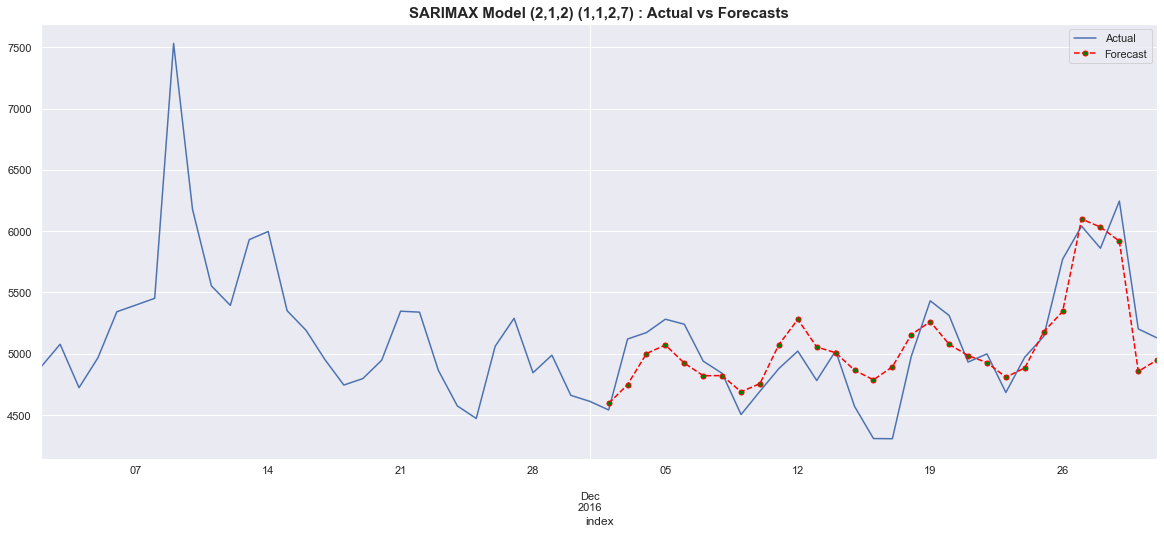


MAPE of Model : 0.04061
RMSE of Model : 247.034


In [113]:
exog = Exog_Campaign_eng['Exog'].to_numpy()
time_series = aggregated_data.English
test_size= 0.1
p,d,q, P,D,Q,s = 2,1,2,1,1,2,7
n = 30
sarimax_model(time_series, n, p=p, d=d, q=q, P=P, D=D, Q=Q, s=s, exog = exog)

## Hyperparameter tuning for all other languages

In [114]:
def pipeline_sarimax_grid_search_without_exog(languages, data, n, param, d_param, s_param):
    
    best_param_df  = pd.DataFrame(columns = ['language','p','d', 'q', 'P','D','Q','s','mape'])
    for lang in languages:
        print('')
        print('')
        print(f'--------------------------------------------------------------')
        print(f'          Finding best parameters for {lang}                  ')
        print(f'--------------------------------------------------------------')
        counter = 0
        time_series = data[lang]
        best_mape = 100
        
        #Creating loop for every paramater to fit SARIMAX model
        for p in param:
            for d in d_param:
                for q in param:
                    for P in param:
                        for D in d_param:
                            for Q in param:
                                for s in s_param:
                                    #Creating Model
                                    model = SARIMAX(time_series[:-n], 
                                                    order=(p,d,q), 
                                                    seasonal_order=(P, D, Q, s), 
                                                    initialization='approximate_diffuse')
                                    model_fit = model.fit()

                                    #Creating forecast from Model
                                    model_forecast = model_fit.forecast(n, dynamic = True)

                                    #Calculating errors for results
                                    actuals = time_series.values[-n:]
                                    errors = time_series.values[-n:] - model_forecast.values

                                    #Calculating MAPE & RMSE
                                    mape = np.mean(np.abs(errors)/ np.abs(actuals))
                                    
                                    counter += 1

                                    if (mape < best_mape):
                                        best_mape = mape
                                        best_p = p
                                        best_d = d
                                        best_q = q
                                        best_P = P
                                        best_D = D
                                        best_Q = Q
                                        best_s = s
                                    else: pass

                    #print statement to check progress of Loop                
                    print(f'Possible Combination: {counter} out of {(len(param)**4)*len(s_param)*(len(d_param)**2)} calculated')

        best_mape = np.round(best_mape, 5)
        print(f'--------------------------------------------------------------')
        print(f'Minimum MAPE for {lang} = {best_mape}')
        print(f'Corresponding Best Parameters are {best_p , best_d, best_q, best_P, best_D, best_Q, best_s}')
        print(f'--------------------------------------------------------------')
        
        best_param_row = [lang, best_p, best_d, best_q, best_P, best_D, best_Q, best_s, best_mape]
        best_param_df.loc[len(best_param_df)] = best_param_row                
                           
    return best_param_df

In [115]:
languages = aggregated_data.columns
n = 30 
param = [0,1,2]
d_param = [0,1]
s_param = [7]

best_param_df = pipeline_sarimax_grid_search_without_exog(languages, aggregated_data, n, param, d_param, s_param)



--------------------------------------------------------------
          Finding best parameters for Chinese                  
--------------------------------------------------------------
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.24425D+00    |proj g|=  2.80878D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   2.809D-06   7.244D+00
  F =   7.2442455930130176     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RU

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.43661D+00    |proj g|=  4.79296D-02

At iterate   15    f=  6.40082D+00    |proj g|=  8.02330D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     28      1     0     0   8.032D-06   6.401D+00
  F =   6.4008177648112117     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.12478D+00    |proj g|=  3.45601D-04

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.00593D+00    |proj g|=  1.95116D-02

At iterate   10    f=  5.00043D+00    |proj g|=  1.24499D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     14      1     0     0   4.084D-06   5.000D+00
  F =   5.0004338280157512     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.12399D+00    |proj g|=  4.29523D-07

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.98602D+02    |proj g|=  1.87127D+03

At iterate    5    f=  7.54088D+00    |proj g|=  5.63610D+00

At iterate   10    f=  5.43966D+00    |proj g|=  2.75045D-01

At iterate   15    f=  5.06318D+00    |proj g|=  5.78956D-02

At iterate   20    f=  5.01400D+00    |proj g|=  2.29425D-02

At iterate   25    f=  4.99756D+00    |proj g|=  1.01297D-02

At iterate   30    f=  4.99683D+00    |proj g|=  3.81763D-03

At iterate   35    f=  4.99624D+00    |proj g|=  4.74245D-03

At iterate   40    f=  4.99603D+00    |proj g|=  5.89196D-04

At iterate   45    f=  4.99599D+00    |proj g|=  1.10209D-03

At iterate   50    f=  4.99598D+00    |proj g|=  1.88300D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.00346D+00    |proj g|=  9.01459D-02

At iterate    5    f=  4.99815D+00    |proj g|=  1.79718D-03

At iterate   10    f=  4.99804D+00    |proj g|=  1.38494D-03

At iterate   15    f=  4.99803D+00    |proj g|=  1.10252D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     20      1     0     0   2.272D-07   4.998D+00
  F =   4.9980300424208526     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  5.00984D+00    |proj g|=  9.20806D-03

At iterate   25    f=  4.99175D+00    |proj g|=  2.12025D-02

At iterate   30    f=  4.99094D+00    |proj g|=  4.83788D-03

At iterate   35    f=  4.99003D+00    |proj g|=  5.24885D-04

At iterate   40    f=  4.98986D+00    |proj g|=  2.80268D-04

At iterate   45    f=  4.98982D+00    |proj g|=  3.20121D-04

At iterate   50    f=  4.98982D+00    |proj g|=  9.65635D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     58      1     0     0   9.656D-05   4.990D+00
  F =   4.9898157623496573     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate   15    f=  5.00540D+00    |proj g|=  4.34345D-03

At iterate   20    f=  5.00115D+00    |proj g|=  3.88293D-03

At iterate   25    f=  4.99428D+00    |proj g|=  1.11898D-02

At iterate   30    f=  4.99349D+00    |proj g|=  2.05525D-03

At iterate   35    f=  4.99322D+00    |proj g|=  3.48736D-03

At iterate   40    f=  4.99256D+00    |proj g|=  2.09244D-04

At iterate   45    f=  4.99254D+00    |proj g|=  3.53306D-04

At iterate   50    f=  4.99252D+00    |proj g|=  2.54530D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     61      1     0     0   2.545D-04   4.993D+00
  F =   4.99252035209

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.99569D+00    |proj g|=  7.22776D-03

At iterate   15    f=  4.99453D+00    |proj g|=  3.35017D-02

At iterate   20    f=  4.99409D+00    |proj g|=  2.10356D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     26      1     0     0   2.104D-05   4.994D+00
  F =   4.9940879322358613     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.00418D+00    |proj g|=  1.88962D-01


 This problem is unconstrained.



At iterate    5    f=  4.99798D+00    |proj g|=  2.19064D-03

At iterate   10    f=  4.99796D+00    |proj g|=  7.53737D-03

At iterate   15    f=  4.99783D+00    |proj g|=  4.30737D-04

At iterate   20    f=  4.99782D+00    |proj g|=  1.40238D-03

At iterate   25    f=  4.99781D+00    |proj g|=  2.13607D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     29      1     0     0   2.136D-05   4.998D+00
  F =   4.9978092868612007     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Possible Combination: 18 out of 324 calculated
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.81839D+00    |proj g|=  1.39362D-02

At iterate   10    f=  6.81087D+00    |proj g|=  1.23861D-02

At iterate   15    f=  6.71738D+00    |proj g|=  2.01019D-01

At iterate   20    f=  6.36499D+00    |proj g|=  7.53476D-02

At iterate   25    f=  6.36274D+00    |proj g|=  2.69243D-03
  ys=-4.585E-01  -gs= 1.434E-03 BFGS update SKIPPED

At iterate   30    f=  5.95502D+00    |proj g|=  1.69990D-01

At iterate   35    f=  5.93497D+00    |proj g|=  8.07049D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     37     65      1     1     0   2.784D-07   5.935D+00
  F =   5.9349739755935804     

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.88638D+00    |proj g|=  7.26542D-02

At iterate    5    f=  4.87557D+00    |proj g|=  2.40923D-02

At iterate   10    f=  4.83768D+00    |proj g|=  6.40052D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     16      1     0     0   5.660D-06   4.838D+00
  F =   4.8376203151178521     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  4.78634D+00    |proj g|=  1.59330D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     43      1     0     0   6.568D-06   4.786D+00
  F =   4.7856419530922931     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.45395D+00    |proj g|=  5.58722D+00

At iterate    5    f=  6.79971D+00    |proj g|=  1.66802D-02

At iterate   10    f=  6.77749D+00    |proj g|=  7.40269D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.83466D+00    |proj g|=  8.62056D-02

At iterate   10    f=  4.82792D+00    |proj g|=  2.49884D-02

At iterate   15    f=  4.79002D+00    |proj g|=  1.34819D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     24      1     0     0   6.472D-06   4.790D+00
  F =   4.7899694189087594     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.88326D+00    |proj g|=  7.41462D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.04748D+00    |proj g|=  6.52492D-01

At iterate    5    f=  6.77899D+00    |proj g|=  4.05227D-03

At iterate   10    f=  6.75140D+00    |proj g|=  8.14312D-03
  ys=-1.257E+00  -gs= 6.192E-01 BFGS update SKIPPED

At iterate   15    f=  5.03727D+00    |proj g|=  7.71920D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     34      1     1     0   1.195D-05   5.037D+00
  F =   5.0372688980508604     

CONVERGENCE: REL_

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.87358D+00    |proj g|=  6.59697D-02

At iterate   10    f=  4.86432D+00    |proj g|=  1.01088D-02

At iterate   15    f=  4.85277D+00    |proj g|=  8.73189D-02

At iterate   20    f=  4.82385D+00    |proj g|=  5.65095D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     31      1     0     0   5.081D-06   4.824D+00
  F =   4.8237903711243684     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  4.84542D+00    |proj g|=  1.08066D-01

At iterate   15    f=  4.83817D+00    |proj g|=  1.29981D-02

At iterate   20    f=  4.83520D+00    |proj g|=  1.91977D-02

At iterate   25    f=  4.83492D+00    |proj g|=  3.48901D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     31      1     0     0   4.081D-05   4.835D+00
  F =   4.8349172835971048     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Possible Combination: 36 out of 324 calculated
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0        

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.12854D+00    |proj g|=  7.11720D-01

At iterate   20    f=  5.79421D+00    |proj g|=  4.79745D-02

At iterate   25    f=  5.78783D+00    |proj g|=  5.77037D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     37      1     0     0   8.722D-06   5.788D+00
  F =   5.7878321510986552     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.81873D+00    |proj g|=  4.04706D-02

At iter

 This problem is unconstrained.



At iterate   10    f=  6.76076D+00    |proj g|=  4.79064D-02

At iterate   15    f=  6.35436D+00    |proj g|=  3.33785D-01

At iterate   20    f=  6.29156D+00    |proj g|=  2.36220D-03

At iterate   25    f=  6.29099D+00    |proj g|=  2.91631D-01

At iterate   30    f=  6.19084D+00    |proj g|=  1.57075D+00

At iterate   35    f=  6.09960D+00    |proj g|=  8.43521D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     78      1     0     0   1.398D-04   6.100D+00
  F =   6.0995985157096424     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.82312D+00    |proj g|=  2.72186D-02

At iterate   10    f=  4.78819D+00    |proj g|=  1.63584D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     15      1     0     0   2.587D-05   4.788D+00
  F =   4.7881863610856055     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.76506D+00    |proj g|=  7.46218D-03

At iterate    5    f=  6.73313D+00    |proj g|=  2.23345D-02

At iterate   10    f=  5.78736D+00    |proj g|=  6.25012D-01

At iterate   15    f=  5.49052D+00    |proj g|=  7.22058D-01

At iterate   20    f=  5.38915D+00    |proj g|=  4.45879D-01

At iterate   25    f=  4.94793D+00    |proj g|=  9.99540D-02

At iterate   30    f=  4.93588D+00    |proj g|=  4.85125D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.36957D+00    |proj g|=  1.46458D+00

At iterate    5    f=  6.77400D+00    |proj g|=  5.30377D-03

At iterate   10    f=  6.70426D+00    |proj g|=  4.29672D-02

At iterate   15    f=  5.70913D+00    |proj g|=  7.43981D-01

At iterate   20    f=  4.98930D+00    |proj g|=  1.43614D-02

At iterate   25    f=  4.98900D+00    |proj g|=  5.10990D-03

At iterate   30    f=  4.78275D+00    |proj g|=  1.24572D-01

At iterate   35    f=  4.73659D+00    |proj g|=  1.26460D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.46489D+00    |proj g|=  3.51237D+00

At iterate    5    f=  6.79351D+00    |proj g|=  7.26341D-03

At iterate   10    f=  6.77879D+00    |proj g|=  4.46093D-03

At iterate   15    f=  5.58951D+00    |proj g|=  1.02448D+00

At iterate   20    f=  4.97112D+00    |proj g|=  8.15522D-02

At iterate   25    f=  4.96186D+00    |proj g|=  5.84412D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     45      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     17      1     0     0   1.746D-06   4.859D+00
  F =   4.8587475845117716     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.84372D+00    |proj g|=  9.28706D-02

At iterate    5    f=  4.78725D+00    |proj g|=  1.12176D-02

At iterate   10    f=  4.77503D+00    |proj g|=  3.95914D-02

At iterate   15    f=  4.74100D+00    |proj g|=  3.79320D-03

       

 This problem is unconstrained.



At iterate   10    f=  4.78919D+00    |proj g|=  9.95745D-03

At iterate   15    f=  4.78683D+00    |proj g|=  2.42464D-02

At iterate   20    f=  4.78626D+00    |proj g|=  5.61528D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     28      1     0     0   1.753D-05   4.786D+00
  F =   4.7862582971853538     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.86141D+00    |proj g|=  1.65937D-01

At iter

 This problem is unconstrained.



At iterate   15    f=  6.04510D+00    |proj g|=  1.33172D-02

At iterate   20    f=  5.40407D+00    |proj g|=  1.80060D-01

At iterate   25    f=  5.09754D+00    |proj g|=  3.34200D-01

At iterate   30    f=  4.88666D+00    |proj g|=  1.12600D-01

At iterate   35    f=  4.86964D+00    |proj g|=  2.08803D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     76      1     0     0   8.541D-06   4.870D+00
  F =   4.8696416435653331     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   10    f=  5.86586D+00    |proj g|=  6.26606D-01

At iterate   15    f=  5.46996D+00    |proj g|=  6.11114D-02

At iterate   20    f=  5.44501D+00    |proj g|=  3.07167D-02

At iterate   25    f=  5.43037D+00    |proj g|=  2.79333D-02

At iterate   30    f=  5.43020D+00    |proj g|=  1.88011D-05

At iterate   35    f=  5.43020D+00    |proj g|=  2.36569D-03
  ys=-2.050E+00  -gs= 1.473E-04 BFGS update SKIPPED

At iterate   40    f=  5.23907D+00    |proj g|=  1.04061D-01

At iterate   45    f=  5.22902D+00    |proj g|=  5.32225D-02

At iterate   50    f=  5.22838D+00    |proj g|=  6.88555D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

 This problem is unconstrained.



At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.40075D+00    |proj g|=  1.47260D+00

At iterate    5    f=  6.78409D+00    |proj g|=  2.84833D-03

At iterate   10    f=  6.23832D+00    |proj g|=  1.51495D-01

At iterate   15    f=  5.06005D+00    |proj g|=  8.23329D-02

At iterate   20    f=  5.05482D+00    |proj g|=  4.47667D-03

At iterate   25    f=  5.05370D+00    |proj g|=  4.78503D-03

At iterate   30    f=  5.05333D+00    |proj g|=  1.09713D-03

At iterate   35    f=  5.05329D+00    |proj g|=  2.18160D-04

At iterate   40    f=  5.05329D+00    |proj g|=  1.29123D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.86271D+00    |proj g|=  6.70007D-02

At iterate    5    f=  4.81502D+00    |proj g|=  2.46188D-02

At iterate   10    f=  4.80967D+00    |proj g|=  1.90070D-02

At iterate   15    f=  4.77265D+00    |proj g|=  5.75353D-02

At iterate   20    f=  4.76842D+00    |proj g|=  4.94822D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     27      1     0     0   1.596D-06   4.768D+00
  F =   4.7684189851429855     

CONVERG

 This problem is unconstrained.



At iterate   10    f=  4.79525D+00    |proj g|=  6.62609D-02

At iterate   15    f=  4.79001D+00    |proj g|=  4.75588D-03

At iterate   20    f=  4.78649D+00    |proj g|=  2.12050D-02

At iterate   25    f=  4.78609D+00    |proj g|=  4.16727D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     32      1     0     0   2.960D-05   4.786D+00
  F =   4.7860868874583140     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Possible Combination: 54 out of 324 calculated
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0        

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.05603D+00    |proj g|=  4.26089D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      3      1     0     0   2.263D-07   5.056D+00
  F =   5.0559669877671585     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.8

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.80520D+00    |proj g|=  5.45271D-02

At iterate   10    f=  4.77349D+00    |proj g|=  9.26974D-03

At iterate   15    f=  4.76695D+00    |proj g|=  7.06710D-04

At iterate   20    f=  4.76507D+00    |proj g|=  1.57764D-04

At iterate   25    f=  4.76473D+00    |proj g|=  4.50734D-05

At iterate   30    f=  4.76468D+00    |proj g|=  2.88714D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     32     36      1     0     0   2.434D-06   4.765D+00
  F =   4.7646713630021713     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.


At iterate    5    f=  4.85944D+00    |proj g|=  7.43341D-02

At iterate   10    f=  4.82474D+00    |proj g|=  9.12953D-03

At iterate   15    f=  4.81266D+00    |proj g|=  1.06117D-03

At iterate   20    f=  4.81110D+00    |proj g|=  2.07648D-03

At iterate   25    f=  4.81058D+00    |proj g|=  6.83545D-04

At iterate   30    f=  4.81047D+00    |proj g|=  1.92047D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     36      1     0     0   2.280D-06   4.810D+00
  F =   4.8104510820649233     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.97413D+00    |proj g|=  2.32323D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      6      1     0     0   2.324D-05   4.974D+00
  F =   4.9736512593422066     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.8

 This problem is unconstrained.



At iterate    5    f=  4.81964D+00    |proj g|=  1.21341D-02

At iterate   10    f=  4.81203D+00    |proj g|=  3.58028D-03

At iterate   15    f=  4.81198D+00    |proj g|=  9.32546D-04

At iterate   20    f=  4.81187D+00    |proj g|=  5.12480D-04

At iterate   25    f=  4.81186D+00    |proj g|=  2.83931D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     33      1     0     0   1.364D-05   4.812D+00
  F =   4.8118578167455901     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  4.80519D+00    |proj g|=  4.84877D-03

At iterate   25    f=  4.80435D+00    |proj g|=  6.97645D-03

At iterate   30    f=  4.80418D+00    |proj g|=  1.63895D-03

At iterate   35    f=  4.80415D+00    |proj g|=  2.56117D-04

At iterate   40    f=  4.80414D+00    |proj g|=  1.19817D-04

At iterate   45    f=  4.80414D+00    |proj g|=  1.59878D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     47     51      1     0     0   4.552D-06   4.804D+00
  F =   4.8041422477013329     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   15    f=  4.80993D+00    |proj g|=  5.28754D-03

At iterate   20    f=  4.80821D+00    |proj g|=  2.58830D-03

At iterate   25    f=  4.80699D+00    |proj g|=  9.53183D-04

At iterate   30    f=  4.80665D+00    |proj g|=  6.24306D-05

At iterate   35    f=  4.80658D+00    |proj g|=  4.50717D-04

At iterate   40    f=  4.80657D+00    |proj g|=  1.20687D-04

At iterate   45    f=  4.80657D+00    |proj g|=  5.36549D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     45     57      1     0     0   5.365D-07   4.807D+00
  F =   4.8065704278043349     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.89281D+00    |proj g|=  9.14441D-02

At iterate    5    f=  4.82268D+00    |proj g|=  7.77257D-03

At iterate   10    f=  4.81855D+00    |proj g|=  1.19247D-02

At iterate   15    f=  4.80834D+00    |proj g|=  4.23907D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     22      1     0     0   2.155D-05   4.808D+00
  F =   4.8083435978559850     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  4.82094D+00    |proj g|=  4.36180D-02

At iterate   10    f=  4.81739D+00    |proj g|=  4.44837D-03

At iterate   15    f=  4.81181D+00    |proj g|=  3.87937D-04

At iterate   20    f=  4.81179D+00    |proj g|=  1.90365D-03

At iterate   25    f=  4.81172D+00    |proj g|=  6.33426D-04

At iterate   30    f=  4.81171D+00    |proj g|=  4.69665D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     46      1     0     0   4.710D-06   4.812D+00
  F =   4.8117142904432342     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Possible Combination: 72 out of 324 calculated
RUNN

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  4.90152D+00    |proj g|=  6.09800D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     20      1     0     0   1.891D-06   4.902D+00
  F =   4.9015206174709371     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.03160D+00    |proj g|=  2.86818D-02

At iterate    5    f=  5.03080D+00    |proj g|=  2.88825D-04

At iterate   10    f=  5.03080D+00    |proj g|=  2.42287D-05

       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  4.74470D+00    |proj g|=  1.20039D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     28      1     0     0   2.353D-06   4.744D+00
  F =   4.7444420141048482     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.87484D+00    |proj g|=  4.37983D-02


 This problem is unconstrained.



At iterate    5    f=  4.85403D+00    |proj g|=  3.57984D-02

At iterate   10    f=  4.79158D+00    |proj g|=  3.37361D-03

At iterate   15    f=  4.79140D+00    |proj g|=  3.86980D-03

At iterate   20    f=  4.79107D+00    |proj g|=  7.73694D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     29      1     0     0   6.853D-06   4.791D+00
  F =   4.7910652716535473     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  4.74028D+00    |proj g|=  1.10403D-03

At iterate   30    f=  4.74001D+00    |proj g|=  7.95217D-04

At iterate   35    f=  4.73997D+00    |proj g|=  1.23138D-04

At iterate   40    f=  4.73996D+00    |proj g|=  3.48120D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     44     48      1     0     0   5.580D-06   4.740D+00
  F =   4.7399570211318354     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  4.81467D+00    |proj g|=  4.16943D-02

At iterate   15    f=  4.78989D+00    |proj g|=  1.00859D-03

At iterate   20    f=  4.78903D+00    |proj g|=  2.69634D-02

At iterate   25    f=  4.78779D+00    |proj g|=  2.19645D-03

At iterate   30    f=  4.78774D+00    |proj g|=  1.83596D-03

At iterate   35    f=  4.78706D+00    |proj g|=  1.00564D-02

At iterate   40    f=  4.78670D+00    |proj g|=  1.41737D-03

At iterate   45    f=  4.78665D+00    |proj g|=  5.75003D-04

At iterate   50    f=  4.78664D+00    |proj g|=  3.95746D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     63   

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.85271D+00    |proj g|=  5.53621D-02

At iterate    5    f=  4.82082D+00    |proj g|=  1.25635D-02

At iterate   10    f=  4.74548D+00    |proj g|=  1.98479D-03

At iterate   15    f=  4.74548D+00    |proj g|=  9.21231D-04

At iterate   20    f=  4.74518D+00    |proj g|=  7.42224D-02

At iterate   25    f=  4.74444D+00    |proj g|=  4.66725D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     42      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  4.85939D+00    |proj g|=  2.60040D-02

At iterate   10    f=  4.79007D+00    |proj g|=  1.05727D-02

At iterate   15    f=  4.78918D+00    |proj g|=  2.10094D-03

At iterate   20    f=  4.78912D+00    |proj g|=  2.92030D-03

At iterate   25    f=  4.78902D+00    |proj g|=  7.77200D-04

At iterate   30    f=  4.78901D+00    |proj g|=  3.25963D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     37      1     0     0   1.685D-06   4.789D+00
  F =   4.7890135079742642     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.87360D+00    |proj g|=  6.99023D-02

At iterate    5    f=  4.86453D+00    |proj g|=  9.24727D-03

At iterate   10    f=  4.85943D+00    |proj g|=  1.59798D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     17      1     0     0   9.520D-06   4.859D+00
  F =   4.8594203192551522     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate   10    f=  4.79399D+00    |proj g|=  5.46575D-03

At iterate   15    f=  4.78803D+00    |proj g|=  1.28375D-02

At iterate   20    f=  4.78593D+00    |proj g|=  3.33000D-03

At iterate   25    f=  4.78578D+00    |proj g|=  1.58032D-03

At iterate   30    f=  4.78492D+00    |proj g|=  1.36730D-02

At iterate   35    f=  4.78443D+00    |proj g|=  1.95504D-03

At iterate   40    f=  4.78427D+00    |proj g|=  2.23899D-03

At iterate   45    f=  4.78394D+00    |proj g|=  3.59095D-03

At iterate   50    f=  4.78379D+00    |proj g|=  3.22508D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     60   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.86232D+00    |proj g|=  2.42137D-02

At iterate   10    f=  4.83400D+00    |proj g|=  9.10157D-02

At iterate   15    f=  4.77740D+00    |proj g|=  1.99653D-02

At iterate   20    f=  4.77735D+00    |proj g|=  1.32189D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     24      1     0     0   1.322D-05   4.777D+00
  F =   4.7773529618458097     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.88537D+00    |proj g|=  7.67308D-02

At iterate    5    f=  4.86624D+00    |proj g|=  1.23981D-02

At iterate   10    f=  4.79625D+00    |proj g|=  1.75300D-02

At iterate   15    f=  4.79444D+00    |proj g|=  1.25832D-02

At iterate   20    f=  4.79047D+00    |proj g|=  4.81070D-02

At iterate   25    f=  4.78917D+00    |proj g|=  1.71100D-04

At iterate   30    f=  4.78917D+00    |proj g|=  4.77434D-03

At iterate   35    f=  4.78902D+00    |proj g|=  4.66907D-03

At iterate   40    f=  4.78900D+00    |proj g|=  1.24051D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.86061D+00    |proj g|=  1.35465D-01

At iterate    5    f=  4.84181D+00    |proj g|=  2.93803D-02

At iterate   10    f=  4.84089D+00    |proj g|=  2.08751D-03

At iterate   15    f=  4.84002D+00    |proj g|=  5.27876D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     21      1     0     0   7.445D-06   4.840D+00
  F =   4.8399329041411212     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.71080D+00    |proj g|=  1.81408D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     16      1     0     0   4.126D-06   4.711D+00
  F =   4.7107997222129310     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.86711D+00    |proj g|=  4.95583D-02


 This problem is unconstrained.



At iterate    5    f=  4.84519D+00    |proj g|=  1.55763D-02

At iterate   10    f=  4.80874D+00    |proj g|=  3.05046D-02

At iterate   15    f=  4.76192D+00    |proj g|=  3.37292D-02

At iterate   20    f=  4.75982D+00    |proj g|=  7.31636D-03

At iterate   25    f=  4.75797D+00    |proj g|=  3.63614D-03

At iterate   30    f=  4.75774D+00    |proj g|=  1.14428D-03

At iterate   35    f=  4.75770D+00    |proj g|=  1.78364D-04

At iterate   40    f=  4.75770D+00    |proj g|=  1.64289D-04

At iterate   45    f=  4.75770D+00    |proj g|=  1.14764D-04

At iterate   50    f=  4.75770D+00    |proj g|=  6.82549D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  4.70647D+00    |proj g|=  1.25731D-03

At iterate   30    f=  4.70634D+00    |proj g|=  7.56093D-04

At iterate   35    f=  4.70632D+00    |proj g|=  1.43139D-04

At iterate   40    f=  4.70632D+00    |proj g|=  2.89570D-04

At iterate   45    f=  4.70632D+00    |proj g|=  9.39605D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     48     56      1     0     0   1.614D-05   4.706D+00
  F =   4.7063155262898499     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.


At iterate    5    f=  4.80679D+00    |proj g|=  3.87419D-02

At iterate   10    f=  4.77852D+00    |proj g|=  2.91575D-02

At iterate   15    f=  4.75598D+00    |proj g|=  1.50318D-02

At iterate   20    f=  4.75567D+00    |proj g|=  2.70872D-03

At iterate   25    f=  4.75458D+00    |proj g|=  1.66445D-02

At iterate   30    f=  4.75363D+00    |proj g|=  4.22202D-03

At iterate   35    f=  4.75329D+00    |proj g|=  1.84303D-03

At iterate   40    f=  4.75324D+00    |proj g|=  1.17341D-03

At iterate   45    f=  4.75322D+00    |proj g|=  2.29719D-04

At iterate   50    f=  4.75321D+00    |proj g|=  9.24742D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.80853D+00    |proj g|=  1.35175D-02

At iterate   10    f=  4.72311D+00    |proj g|=  6.96123D-02

At iterate   15    f=  4.71078D+00    |proj g|=  1.47950D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     21      1     0     0   5.367D-06   4.711D+00
  F =   4.7107772069069878     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.86159D+00    |proj g|=  4.65383D-02


 This problem is unconstrained.



At iterate    5    f=  4.84313D+00    |proj g|=  1.32915D-02

At iterate   10    f=  4.78906D+00    |proj g|=  6.60583D-02

At iterate   15    f=  4.75988D+00    |proj g|=  4.53878D-02

At iterate   20    f=  4.75564D+00    |proj g|=  8.33641D-04

At iterate   25    f=  4.75537D+00    |proj g|=  7.87261D-03

At iterate   30    f=  4.75507D+00    |proj g|=  5.71945D-04

At iterate   35    f=  4.75504D+00    |proj g|=  4.61790D-04

At iterate   40    f=  4.75504D+00    |proj g|=  7.02351D-05

At iterate   45    f=  4.75504D+00    |proj g|=  3.93707D-05

At iterate   50    f=  4.75504D+00    |proj g|=  3.11726D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.77675D+00    |proj g|=  2.18501D-02

At iterate   10    f=  4.74727D+00    |proj g|=  1.57297D-02

At iterate   15    f=  4.73452D+00    |proj g|=  3.63675D-03

At iterate   20    f=  4.73379D+00    |proj g|=  1.05915D-02

At iterate   25    f=  4.73240D+00    |proj g|=  1.55160D-03

At iterate   30    f=  4.73216D+00    |proj g|=  5.71063D-04

At iterate   35    f=  4.73211D+00    |proj g|=  6.73101D-04

At iterate   40    f=  4.73210D+00    |proj g|=  1.97667D-04

At iterate   45    f=  4.73210D+00    |proj g|=  1.36111D-04

At iterate   50    f=  4.73210D+00    |proj g|=  1.51894D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.83420D+00    |proj g|=  1.94220D-01

At iterate    5    f=  4.78046D+00    |proj g|=  2.80689D-02

At iterate   10    f=  4.76623D+00    |proj g|=  8.26834D-03

At iterate   15    f=  4.75772D+00    |proj g|=  7.02178D-03

At iterate   20    f=  4.75376D+00    |proj g|=  9.47959D-03

At iterate   25    f=  4.75324D+00    |proj g|=  3.01721D-03

At iterate   30    f=  4.75209D+00    |proj g|=  8.95447D-03

At iterate   35    f=  4.75009D+00    |proj g|=  1.74352D-03

At iterate   40    f=  4.74971D+00    |proj g|=  5.29887D-04

At iterate   45    f=  4.74965D+00    |proj g|=  5.86223D-04

At iterate   50    f=  4.74963D+00    |proj g|=  2.12304D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.89760D+00    |proj g|=  2.34028D-02

At iterate   15    f=  4.88283D+00    |proj g|=  1.83510D-02

At iterate   20    f=  4.88253D+00    |proj g|=  1.76001D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     25      1     0     0   1.760D-06   4.883D+00
  F =   4.8825317525892666     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.89655D+00    |proj g|=  6.65020D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  4.85041D+00    |proj g|=  1.93831D-02

At iterate   10    f=  4.80383D+00    |proj g|=  8.13948D-02

At iterate   15    f=  4.76719D+00    |proj g|=  7.18996D-03

At iterate   20    f=  4.76579D+00    |proj g|=  1.82267D-02

At iterate   25    f=  4.76163D+00    |proj g|=  4.88572D-02

At iterate   30    f=  4.75527D+00    |proj g|=  1.72279D-02

At iterate   35    f=  4.75504D+00    |proj g|=  1.65645D-03

At iterate   40    f=  4.75502D+00    |proj g|=  1.51304D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     41     52      1     0     0   1.282D-05   4.755D+00
  F =   4.75502332111

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  4.90699D+00    |proj g|=  7.94398D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     29      1     0     0   5.935D-06   4.907D+00
  F =   4.9069925669728134     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.93120D+00    |proj g|=  1.02459D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.78980D+00    |proj g|=  1.35603D-02

At iterate   10    f=  4.75573D+00    |proj g|=  2.65973D-02

At iterate   15    f=  4.74647D+00    |proj g|=  3.41164D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     24      1     0     0   9.616D-06   4.746D+00
  F =   4.7464703876281193     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.07790D+00    |proj g|=  1.12215D-02

At iterate    5    f=  5.05221D+00    |proj g|=  4.52429D-04

At iterate   10    f=  4.93599D+00    |proj g|=  1.82265D-03

At iterate   15    f=  4.93382D+00    |proj g|=  9.87128D-03
  ys=-1.495E-05  -gs= 7.202E-04 BFGS update SKIPPED

At iterate   20    f=  4.93213D+00    |proj g|=  6.14193D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     45      1     1     0   6.142D-06 

 This problem is unconstrained.



At iterate   20    f=  4.80872D+00    |proj g|=  1.49541D-02
  ys=-4.765E-02  -gs= 5.689E-03 BFGS update SKIPPED

At iterate   25    f=  4.77989D+00    |proj g|=  3.90423D-03

At iterate   30    f=  4.77986D+00    |proj g|=  3.95793D-04

At iterate   35    f=  4.77982D+00    |proj g|=  1.15303D-03

At iterate   40    f=  4.77952D+00    |proj g|=  4.51263D-04

At iterate   45    f=  4.77947D+00    |proj g|=  3.19592D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     49     62      1     1     0   8.437D-06   4.779D+00
  F =   4.7794596182219671     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.74386D+00    |proj g|=  1.15589D-02

At iterate   10    f=  4.69745D+00    |proj g|=  3.63309D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     20      1     0     0   1.448D-04   4.697D+00
  F =   4.6973569354153231     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.80258D+00    |proj g|=  3.55163D-02


 This problem is unconstrained.



At iterate    5    f=  4.79141D+00    |proj g|=  2.50311D-02

At iterate   10    f=  4.74521D+00    |proj g|=  1.19682D-02

At iterate   15    f=  4.74390D+00    |proj g|=  1.49011D-02

At iterate   20    f=  4.74351D+00    |proj g|=  4.03100D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     24      1     0     0   6.066D-06   4.744D+00
  F =   4.7435145334991882     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.88870D+00    |proj g|=  1.84022D-02

At iterate   15    f=  4.88634D+00    |proj g|=  2.06547D-04

At iterate   20    f=  4.88623D+00    |proj g|=  5.52614D-03

At iterate   25    f=  4.88511D+00    |proj g|=  6.96659D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     37      1     0     0   6.319D-06   4.885D+00
  F =   4.8850733759883136     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  4.85774D+00    |proj g|=  4.96436D-02

At iterate   10    f=  4.82342D+00    |proj g|=  5.87063D-03

At iterate   15    f=  4.80785D+00    |proj g|=  1.88433D-03

At iterate   20    f=  4.80559D+00    |proj g|=  1.17228D-02
  ys=-7.035E-03  -gs= 6.873E-03 BFGS update SKIPPED

At iterate   25    f=  4.77844D+00    |proj g|=  1.36989D-02

At iterate   30    f=  4.77815D+00    |proj g|=  1.60028D-03

At iterate   35    f=  4.77737D+00    |proj g|=  5.74465D-03

At iterate   40    f=  4.75173D+00    |proj g|=  6.58844D-02

At iterate   45    f=  4.73880D+00    |proj g|=  2.26678D-02

At iterate   50    f=  4.73722D+00    |proj g|=  7.37644D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.80007D+00    |proj g|=  4.53299D-02

At iterate   10    f=  4.79183D+00    |proj g|=  1.29192D-02

At iterate   15    f=  4.75296D+00    |proj g|=  4.53497D-02

At iterate   20    f=  4.74574D+00    |proj g|=  4.47753D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     30      1     0     0   8.694D-07   4.746D+00
  F =   4.7457349031176923     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  4.79336D+00    |proj g|=  1.17422D-02

At iterate   10    f=  4.76709D+00    |proj g|=  3.01904D-02

At iterate   15    f=  4.74785D+00    |proj g|=  7.40059D-03

At iterate   20    f=  4.74502D+00    |proj g|=  9.32505D-02

At iterate   25    f=  4.74331D+00    |proj g|=  3.45266D-03

At iterate   30    f=  4.74329D+00    |proj g|=  6.37304D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     40      1     0     0   7.617D-06   4.743D+00
  F =   4.7432942907328988     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Possible Combination: 126 out of 324 calculated
RUN

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.93285D+00    |proj g|=  2.21081D-01

At iterate    5    f=  4.90247D+00    |proj g|=  2.95602D-03

At iterate   10    f=  4.90034D+00    |proj g|=  1.68781D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     16      1     0     0   1.216D-04   4.900D+00
  F =   4.9001409550947059     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  4.70319D+00    |proj g|=  3.85082D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     18      1     0     0   5.708D-07   4.703D+00
  F =   4.7031876217740116     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.81290D+00    |proj g|=  4.18254D-02

At iterate    5    f=  4.80006D+00    |proj g|=  2.13283D-02

At iterate   10    f=  4.77638D+00    |proj g|=  5.49118D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  4.95396D+00    |proj g|=  1.16462D-01

At iterate   20    f=  4.93432D+00    |proj g|=  2.83518D-03

At iterate   25    f=  4.93431D+00    |proj g|=  3.86233D-04

At iterate   30    f=  4.93428D+00    |proj g|=  6.73140D-03

At iterate   35    f=  4.93243D+00    |proj g|=  1.14410D-02

At iterate   40    f=  4.93182D+00    |proj g|=  1.60825D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     42     70      1     1     0   4.334D-06   4.932D+00
  F =   4.9318132136160626     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  4.83253D+00    |proj g|=  3.64203D-02

At iterate   15    f=  4.78994D+00    |proj g|=  1.53106D-02

At iterate   20    f=  4.78784D+00    |proj g|=  9.62627D-03

At iterate   25    f=  4.78519D+00    |proj g|=  3.71148D-04

At iterate   30    f=  4.78477D+00    |proj g|=  3.55129D-03
  ys=-1.349E-02  -gs= 4.730E-03 BFGS update SKIPPED

At iterate   35    f=  4.77120D+00    |proj g|=  8.02554D-03

At iterate   40    f=  4.75379D+00    |proj g|=  4.49993D-02

At iterate   45    f=  4.74647D+00    |proj g|=  1.03424D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49     76      1     1

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  4.72631D+00    |proj g|=  9.79143D-02

At iterate   25    f=  4.70492D+00    |proj g|=  1.07908D-01

At iterate   30    f=  4.70319D+00    |proj g|=  9.87570D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     41      1     0     0   1.357D-06   4.703D+00
  F =   4.7031853106263934     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.81074D+00    |proj g|=  3.83214D-02


 This problem is unconstrained.



At iterate    5    f=  4.79819D+00    |proj g|=  1.77990D-02

At iterate   10    f=  4.76808D+00    |proj g|=  1.99010D-02

At iterate   15    f=  4.75173D+00    |proj g|=  2.46882D-02

At iterate   20    f=  4.74970D+00    |proj g|=  2.84964D-03

At iterate   25    f=  4.74945D+00    |proj g|=  1.41141D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     34      1     0     0   7.350D-06   4.749D+00
  F =   4.7494503199991103     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  4.86110D+00    |proj g|=  2.19142D-03

At iterate   20    f=  4.86108D+00    |proj g|=  3.79260D-04

At iterate   25    f=  4.86102D+00    |proj g|=  6.46100D-03

At iterate   30    f=  4.86076D+00    |proj g|=  1.52147D-03

At iterate   35    f=  4.86076D+00    |proj g|=  1.46230D-04

At iterate   40    f=  4.86076D+00    |proj g|=  7.52109D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     45      1     0     0   7.521D-07   4.861D+00
  F =   4.8607566313027979     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  4.80419D+00    |proj g|=  7.60178D-03

At iterate   15    f=  4.78891D+00    |proj g|=  4.07857D-03

At iterate   20    f=  4.78355D+00    |proj g|=  2.60499D-03

At iterate   25    f=  4.78311D+00    |proj g|=  6.00615D-03

At iterate   30    f=  4.78163D+00    |proj g|=  2.17896D-03

At iterate   35    f=  4.77088D+00    |proj g|=  4.11087D-03

At iterate   40    f=  4.77045D+00    |proj g|=  1.54366D-04

At iterate   45    f=  4.76189D+00    |proj g|=  1.73429D-02
  ys=-6.542E-04  -gs= 3.916E-04 BFGS update SKIPPED

At iterate   50    f=  4.74410D+00    |proj g|=  2.43122D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.83987D+00    |proj g|=  6.33796D-02

At iterate   15    f=  4.83643D+00    |proj g|=  1.18406D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     18      1     0     0   7.351D-06   4.836D+00
  F =   4.8364268268662443     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.85535D+00    |proj g|=  7.29937D-02

At iterate    5    f=  4.79996D+00    |proj g|=  3.88997D-02

At iter

 This problem is unconstrained.



At iterate   10    f=  4.79502D+00    |proj g|=  1.14779D-02

At iterate   15    f=  4.77588D+00    |proj g|=  5.51323D-02

At iterate   20    f=  4.77038D+00    |proj g|=  2.04679D-02

At iterate   25    f=  4.75272D+00    |proj g|=  4.84236D-02

At iterate   30    f=  4.74991D+00    |proj g|=  2.44145D-03

At iterate   35    f=  4.74962D+00    |proj g|=  1.04611D-02

At iterate   40    f=  4.74920D+00    |proj g|=  4.15638D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     44     54      1     0     0   2.392D-05   4.749D+00
  F =   4.7492028183091106     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  4.80173D+00    |proj g|=  2.37503D-03

At iterate   30    f=  4.80158D+00    |proj g|=  7.24786D-03

At iterate   35    f=  4.80101D+00    |proj g|=  1.09051D-03

At iterate   40    f=  4.80088D+00    |proj g|=  3.73612D-04

At iterate   45    f=  4.80086D+00    |proj g|=  2.32070D-04

At iterate   50    f=  4.80085D+00    |proj g|=  7.42391D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     56      1     0     0   7.424D-05   4.801D+00
  F =   4.8008504865602228     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  4.94423D+00    |proj g|=  9.68655D-02

At iterate   15    f=  4.87116D+00    |proj g|=  5.13764D-02

At iterate   20    f=  4.85296D+00    |proj g|=  7.73902D-03

At iterate   25    f=  4.84854D+00    |proj g|=  6.52106D-03

At iterate   30    f=  4.83967D+00    |proj g|=  4.94842D-03

At iterate   35    f=  4.83939D+00    |proj g|=  7.54262D-05

At iterate   40    f=  4.83938D+00    |proj g|=  1.15375D-03

At iterate   45    f=  4.83933D+00    |proj g|=  2.31085D-03

At iterate   50    f=  4.83931D+00    |proj g|=  4.60664D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     56   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.72679D+00    |proj g|=  4.91375D-02

At iterate   15    f=  4.70753D+00    |proj g|=  7.67708D-04

At iterate   20    f=  4.70731D+00    |proj g|=  2.23083D-03

At iterate   25    f=  4.70659D+00    |proj g|=  1.80333D-02

At iterate   30    f=  4.70566D+00    |proj g|=  4.39907D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     42      1     0     0   3.668D-06   4.706D+00
  F =   4.7056572847041229     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.82031D+00    |proj g|=  4.29972D-02

At iterate    5    f=  4.81070D+00    |proj g|=  3.07382D-02

At iterate   10    f=  4.76604D+00    |proj g|=  2.93288D-02

At iterate   15    f=  4.75495D+00    |proj g|=  5.84709D-04

At iterate   20    f=  4.75486D+00    |proj g|=  5.07535D-03

At iterate   25    f=  4.75457D+00    |proj g|=  1.84353D-02

At iterate   30    f=  4.75387D+00    |proj g|=  6.03100D-03

At iterate   35    f=  4.75381D+00    |proj g|=  8.09901D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.28146D+03    |proj g|=  5.69766D+03

At iterate    5    f=  6.18572D+00    |proj g|=  3.47215D+00

At iterate   10    f=  5.05535D+00    |proj g|=  2.50579D-01

At iterate   15    f=  4.76665D+00    |proj g|=  4.39417D-02

At iterate   20    f=  4.71523D+00    |proj g|=  1.54720D-02

At iterate   25    f=  4.70585D+00    |proj g|=  1.05242D-03

At iterate   30    f=  4.70501D+00    |proj g|=  8.35791D-03

At iterate   35    f=  4.70454D+00    |proj g|=  9.24667D-03

At iterate   40    f=  4.70270D+00    |proj g|=  4.58540D-03

At iterate   45    f=  4.70050D+00    |proj g|=  1.20411D-02

At iterate   50    f=  4.69971D+00    |proj g|=  1.16531D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   10    f=  5.18520D+00    |proj g|=  2.72582D-01

At iterate   15    f=  4.82584D+00    |proj g|=  5.22490D-02

At iterate   20    f=  4.77462D+00    |proj g|=  9.41860D-03

At iterate   25    f=  4.75252D+00    |proj g|=  7.12853D-03

At iterate   30    f=  4.75216D+00    |proj g|=  7.09510D-03

At iterate   35    f=  4.75197D+00    |proj g|=  5.97807D-04

At iterate   40    f=  4.75196D+00    |proj g|=  1.43611D-04

At iterate   45    f=  4.75188D+00    |proj g|=  4.38321D-03

At iterate   50    f=  4.74986D+00    |proj g|=  5.97425D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     61   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.76868D+00    |proj g|=  1.85499D-02

At iterate   10    f=  4.75330D+00    |proj g|=  1.03016D-01

At iterate   15    f=  4.72515D+00    |proj g|=  9.99863D-02

At iterate   20    f=  4.70905D+00    |proj g|=  8.98437D-03

At iterate   25    f=  4.70840D+00    |proj g|=  5.25673D-04

At iterate   30    f=  4.70838D+00    |proj g|=  4.62342D-04

At iterate   35    f=  4.70820D+00    |proj g|=  2.05013D-03

At iterate   40    f=  4.70735D+00    |proj g|=  3.01561D-02

At iterate   45    f=  4.70578D+00    |proj g|=  1.42409D-02

At iterate   50    f=  4.70562D+00    |proj g|=  1.98941D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  4.80765D+00    |proj g|=  2.46743D-02

At iterate   10    f=  4.76979D+00    |proj g|=  3.50441D-02

At iterate   15    f=  4.75353D+00    |proj g|=  4.76230D-03

At iterate   20    f=  4.75265D+00    |proj g|=  9.93697D-04

At iterate   25    f=  4.75251D+00    |proj g|=  1.60108D-03

At iterate   30    f=  4.75241D+00    |proj g|=  2.56071D-03

At iterate   35    f=  4.75177D+00    |proj g|=  2.48190D-03

At iterate   40    f=  4.75169D+00    |proj g|=  2.75374D-03

At iterate   45    f=  4.75168D+00    |proj g|=  5.48066D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     46     57   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.89201D+00    |proj g|=  6.26239D-02

At iterate   15    f=  4.87263D+00    |proj g|=  6.54127D-03

At iterate   20    f=  4.86755D+00    |proj g|=  7.73946D-03

At iterate   25    f=  4.86744D+00    |proj g|=  2.43895D-03

At iterate   30    f=  4.86736D+00    |proj g|=  4.29568D-04

At iterate   35    f=  4.86732D+00    |proj g|=  1.10482D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     43      1     0     0   5.398D-05   4.867D+00
  F =   4.8673216123167808     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  4.86515D+00    |proj g|=  8.19847D-02

At iterate   15    f=  4.78071D+00    |proj g|=  2.29487D-02

At iterate   20    f=  4.75756D+00    |proj g|=  1.10037D-02

At iterate   25    f=  4.75537D+00    |proj g|=  2.30570D-02

At iterate   30    f=  4.75088D+00    |proj g|=  5.72665D-03

At iterate   35    f=  4.75013D+00    |proj g|=  8.61118D-03

At iterate   40    f=  4.74768D+00    |proj g|=  2.64964D-03

At iterate   45    f=  4.74697D+00    |proj g|=  2.56663D-03

At iterate   50    f=  4.74694D+00    |proj g|=  2.25184D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     57   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.86056D+00    |proj g|=  2.95726D-02

At iterate   10    f=  4.85032D+00    |proj g|=  1.47345D-02

At iterate   15    f=  4.83646D+00    |proj g|=  9.93291D-03

At iterate   20    f=  4.83633D+00    |proj g|=  2.49800D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     22      1     0     0   2.498D-06   4.836D+00
  F =   4.8363330852983584     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.81960D+00    |proj g|=  3.89272D-02

At iterate    5    f=  4.81249D+00    |proj g|=  2.38904D-02

At iterate   10    f=  4.78790D+00    |proj g|=  6.66873D-02

At iterate   15    f=  4.75626D+00    |proj g|=  3.28496D-02

At iterate   20    f=  4.75306D+00    |proj g|=  4.56955D-03

At iterate   25    f=  4.75294D+00    |proj g|=  5.61902D-04

At iterate   30    f=  4.75280D+00    |proj g|=  1.02034D-02

At iterate   35    f=  4.75266D+00    |proj g|=  3.46686D-04

At iterate   40    f=  4.75264D+00    |proj g|=  1.90159D-03

At iterate   45    f=  4.75259D+00    |proj g|=  3.15703D-03

At iterate   50    f=  4.75154D+00    |proj g|=  1.76506D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.90223D+00    |proj g|=  1.84338D-02

At iterate   15    f=  4.90194D+00    |proj g|=  1.50368D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     18      1     0     0   9.746D-07   4.902D+00
  F =   4.9019421158533047     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.03913D+00    |proj g|=  5.29916D-04

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.75524D+00    |proj g|=  2.89448D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     15      1     0     0   2.894D-06   4.755D+00
  F =   4.7552448631701436     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.87744D+00    |proj g|=  4.08491D-02

At iterate    5    f=  4.81878D+00    |proj g|=  1.41167D-01

At iterate   10    f=  4.79870D+00    |proj g|=  1.69364D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.76767D+00    |proj g|=  8.84562D-03

At iterate   15    f=  4.75474D+00    |proj g|=  4.73608D-03

At iterate   20    f=  4.75168D+00    |proj g|=  2.55010D-03

At iterate   25    f=  4.75073D+00    |proj g|=  2.73806D-03

At iterate   30    f=  4.75057D+00    |proj g|=  4.71355D-04

At iterate   35    f=  4.75055D+00    |proj g|=  2.66572D-04

At iterate   40    f=  4.75054D+00    |proj g|=  1.26304D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     42     47      1     0     0   5.328D-06   4.751D+00
  F =   4.7505421708071793     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.75539D+00    |proj g|=  1.59127D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     19      1     0     0   1.769D-05   4.755D+00
  F =   4.7550870560045215     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.87321D+00    |proj g|=  1.73713D-02

At iterate    5    f=  4.85083D+00    |proj g|=  1.00471D-01


 This problem is unconstrained.



At iterate   10    f=  4.79769D+00    |proj g|=  4.16675D-03

At iterate   15    f=  4.79695D+00    |proj g|=  1.13199D-03

At iterate   20    f=  4.79664D+00    |proj g|=  5.03713D-03

At iterate   25    f=  4.79662D+00    |proj g|=  1.17426D-04

At iterate   30    f=  4.79662D+00    |proj g|=  1.95628D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     32      1     0     0   1.956D-05   4.797D+00
  F =   4.7966223479144796     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  4.79783D+00    |proj g|=  1.87939D-03

At iterate   20    f=  4.79461D+00    |proj g|=  7.50281D-03

At iterate   25    f=  4.79374D+00    |proj g|=  4.16604D-03

At iterate   30    f=  4.79359D+00    |proj g|=  6.70715D-04

At iterate   35    f=  4.79356D+00    |proj g|=  1.24360D-04

At iterate   40    f=  4.79355D+00    |proj g|=  1.27327D-04

At iterate   45    f=  4.79355D+00    |proj g|=  6.91561D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     48     55      1     0     0   1.873D-05   4.794D+00
  F =   4.7935524356260464     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   15    f=  4.80379D+00    |proj g|=  2.17288D-02

At iterate   20    f=  4.79729D+00    |proj g|=  1.04653D-02

At iterate   25    f=  4.79488D+00    |proj g|=  7.79532D-03

At iterate   30    f=  4.79409D+00    |proj g|=  6.34977D-03

At iterate   35    f=  4.79233D+00    |proj g|=  1.89417D-03

At iterate   40    f=  4.79193D+00    |proj g|=  2.14472D-03

At iterate   45    f=  4.79178D+00    |proj g|=  1.10052D-03

At iterate   50    f=  4.79174D+00    |proj g|=  5.41486D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     61      1     0     0   5.415D-04   4.792D+00
  F =   4.79173685230

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     17      1     0     0   1.092D-05   4.923D+00
  F =   4.9226639437596935     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.92191D+00    |proj g|=  6.18462D-02

At iterate    5    f=  4.87544D+00    |proj g|=  2.92443D-02

At iterate   10    f=  4.84268D+00    |proj g|=  1.18258D-01

At iterate   15    f=  4.79801D+00    |proj g|=  2.55926D-04

       

 This problem is unconstrained.



At iterate    5    f=  4.87518D+00    |proj g|=  4.82118D-02

At iterate   10    f=  4.86024D+00    |proj g|=  2.36055D-02

At iterate   15    f=  4.81106D+00    |proj g|=  3.23414D-03

At iterate   20    f=  4.80918D+00    |proj g|=  1.91390D-02

At iterate   25    f=  4.80119D+00    |proj g|=  4.48892D-02

At iterate   30    f=  4.79657D+00    |proj g|=  2.08135D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     45      1     0     0   1.604D-05   4.797D+00
  F =   4.7965704280148795     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Possible Combination: 180 out of 324 calculated
RUN

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.89499D+00    |proj g|=  1.23757D-01

At iterate   10    f=  4.83426D+00    |proj g|=  4.21298D-02

At iterate   15    f=  4.82397D+00    |proj g|=  7.50861D-03

At iterate   20    f=  4.81704D+00    |proj g|=  1.76468D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     28      1     0     0   7.469D-06   4.817D+00
  F =   4.8168002696736778     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.97373D+00    |proj g|=  7.10654D-02

At iterate    5    f=  4.94540D+00    |proj g|=  2.28832D-02

At iterate   10    f=  4.94471D+00    |proj g|=  4.76958D-03

At iterate   15    f=  4.94319D+00    |proj g|=  5.46336D-03

At iterate   20    f=  4.94282D+00    |proj g|=  1.47476D-03

At iterate   25    f=  4.94279D+00    |proj g|=  1.33747D-04

At iterate   30    f=  4.94278D+00    |proj g|=  3.65219D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate   10    f=  4.74258D+00    |proj g|=  1.04868D-02

At iterate   15    f=  4.73811D+00    |proj g|=  7.56886D-03

At iterate   20    f=  4.73365D+00    |proj g|=  1.45498D-04

At iterate   25    f=  4.73359D+00    |proj g|=  2.52465D-03

At iterate   30    f=  4.73356D+00    |proj g|=  7.75069D-04

At iterate   35    f=  4.73355D+00    |proj g|=  2.89476D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     48      1     0     0   2.178D-05   4.734D+00
  F =   4.7335516774234643     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  4.68349D+00    |proj g|=  1.82182D-03

At iterate   25    f=  4.68285D+00    |proj g|=  1.16360D-04

At iterate   30    f=  4.68276D+00    |proj g|=  1.44545D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     39      1     0     0   9.610D-06   4.683D+00
  F =   4.6827408917598543     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.93084D+00    |proj g|=  2.78588D-01

At iter

 This problem is unconstrained.



At iterate   15    f=  4.73757D+00    |proj g|=  3.83134D-03

At iterate   20    f=  4.73505D+00    |proj g|=  2.63391D-02

At iterate   25    f=  4.73215D+00    |proj g|=  9.89697D-04

At iterate   30    f=  4.73187D+00    |proj g|=  1.93742D-03

At iterate   35    f=  4.72918D+00    |proj g|=  6.30880D-03

At iterate   40    f=  4.72873D+00    |proj g|=  1.72728D-03

At iterate   45    f=  4.72858D+00    |proj g|=  7.03443D-04

At iterate   50    f=  4.72855D+00    |proj g|=  6.68865D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     53      1     0     0   6.689D-04   4.729D+00
  F =   4.72855477316

 This problem is unconstrained.



At iterate   25    f=  4.86230D+00    |proj g|=  2.79848D-03

At iterate   30    f=  4.86221D+00    |proj g|=  6.95520D-04

At iterate   35    f=  4.86220D+00    |proj g|=  4.93690D-05

At iterate   40    f=  4.86220D+00    |proj g|=  7.25102D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     42     49      1     0     0   7.900D-06   4.862D+00
  F =   4.8621978878646761     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   15    f=  4.70751D+00    |proj g|=  9.98428D-02

At iterate   20    f=  4.70257D+00    |proj g|=  4.28381D-03

At iterate   25    f=  4.69512D+00    |proj g|=  7.00092D-02

At iterate   30    f=  4.68752D+00    |proj g|=  7.15983D-04

At iterate   35    f=  4.68751D+00    |proj g|=  1.38983D-04

At iterate   40    f=  4.68751D+00    |proj g|=  3.79385D-03

At iterate   45    f=  4.68719D+00    |proj g|=  6.49717D-03

At iterate   50    f=  4.68717D+00    |proj g|=  9.91730D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     69      1     0     0   9.917D-04   4.687D+00
  F =   4.68717337527

 This problem is unconstrained.



At iterate    5    f=  4.82357D+00    |proj g|=  4.47814D-02

At iterate   10    f=  4.74046D+00    |proj g|=  8.53272D-03

At iterate   15    f=  4.73781D+00    |proj g|=  2.82225D-03

At iterate   20    f=  4.73157D+00    |proj g|=  8.87069D-03

At iterate   25    f=  4.73072D+00    |proj g|=  2.84850D-04

At iterate   30    f=  4.73071D+00    |proj g|=  1.96375D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     33      1     0     0   1.964D-05   4.731D+00
  F =   4.7307143948966086     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.75585D+00    |proj g|=  9.21294D-03

At iterate   15    f=  4.73583D+00    |proj g|=  5.25195D-03

At iterate   20    f=  4.72732D+00    |proj g|=  4.01600D-02

At iterate   25    f=  4.72513D+00    |proj g|=  2.33034D-03

At iterate   30    f=  4.72474D+00    |proj g|=  6.06469D-04

At iterate   35    f=  4.72331D+00    |proj g|=  1.82868D-02

At iterate   40    f=  4.72271D+00    |proj g|=  2.21631D-03

At iterate   45    f=  4.72261D+00    |proj g|=  9.72198D-04

At iterate   50    f=  4.72259D+00    |proj g|=  7.00857D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     58   

 This problem is unconstrained.



At iterate    5    f=  4.81458D+00    |proj g|=  6.96328D-02

At iterate   10    f=  4.75834D+00    |proj g|=  9.56094D-03

At iterate   15    f=  4.73215D+00    |proj g|=  1.79906D-02

At iterate   20    f=  4.72858D+00    |proj g|=  6.17025D-03

At iterate   25    f=  4.72742D+00    |proj g|=  2.24880D-03

At iterate   30    f=  4.72715D+00    |proj g|=  6.80757D-04

At iterate   35    f=  4.72681D+00    |proj g|=  1.91492D-03

At iterate   40    f=  4.72631D+00    |proj g|=  3.30225D-03

At iterate   45    f=  4.72531D+00    |proj g|=  2.04000D-03

At iterate   50    f=  4.72513D+00    |proj g|=  2.46043D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f=  4.84571D+00    |proj g|=  2.02138D-03

At iterate   20    f=  4.84501D+00    |proj g|=  1.19818D-02

At iterate   25    f=  4.84423D+00    |proj g|=  2.07773D-03

At iterate   30    f=  4.84414D+00    |proj g|=  3.79429D-04

At iterate   35    f=  4.84413D+00    |proj g|=  1.02494D-03

At iterate   40    f=  4.84413D+00    |proj g|=  3.93047D-05

At iterate   45    f=  4.84413D+00    |proj g|=  2.94739D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     46     51      1     0     0   2.714D-05   4.844D+00
  F =   4.8441311084671552     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  4.83439D+00    |proj g|=  4.43219D-02

At iterate   10    f=  4.81301D+00    |proj g|=  1.98537D-02

At iterate   15    f=  4.74438D+00    |proj g|=  6.91889D-02

At iterate   20    f=  4.73856D+00    |proj g|=  2.96528D-02

At iterate   25    f=  4.72739D+00    |proj g|=  1.63558D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     42      1     0     0   8.699D-06   4.727D+00
  F =   4.7273533661123368     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.



At iterate    5    f=  4.83338D+00    |proj g|=  1.76546D-02

At iterate   10    f=  4.77771D+00    |proj g|=  7.50112D-02

At iterate   15    f=  4.75081D+00    |proj g|=  2.25456D-02

At iterate   20    f=  4.74724D+00    |proj g|=  3.93088D-02

At iterate   25    f=  4.73854D+00    |proj g|=  2.70141D-02

At iterate   30    f=  4.73784D+00    |proj g|=  3.66784D-03

At iterate   35    f=  4.73237D+00    |proj g|=  5.18386D-02

At iterate   40    f=  4.73109D+00    |proj g|=  2.84958D-03

At iterate   45    f=  4.73100D+00    |proj g|=  1.72545D-03

At iterate   50    f=  4.73073D+00    |proj g|=  1.96993D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.40026D+00    |proj g|=  9.13984D-01

At iterate    5    f=  4.82142D+00    |proj g|=  3.50204D-02

At iterate   10    f=  4.81796D+00    |proj g|=  2.53295D-02

At iterate   15    f=  4.81679D+00    |proj g|=  1.26516D-03

At iterate   20    f=  4.81665D+00    |proj g|=  3.05353D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     26      1     0     0   6.588D-06   4.817D+00
  F =   4.8166326466518878     

CONVERG

 This problem is unconstrained.



At iterate   40    f=  4.94283D+00    |proj g|=  1.53922D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     40     48      1     0     0   1.539D-05   4.943D+00
  F =   4.9428261494846026     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.82775D+00    |proj g|=  4.37265D-02

At iterate    5    f=  4.79844D+00    |proj g|=  2.97443D-02

At iterate   10    f=  4.70146D+00    |proj g|=  3.76768D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.86140D+00    |proj g|=  4.88838D-02

At iterate    5    f=  4.84310D+00    |proj g|=  3.51508D-02

At iterate   10    f=  4.75713D+00    |proj g|=  4.38321D-02

At iterate   15    f=  4.74609D+00    |proj g|=  2.99739D-03

At iterate   20    f=  4.74180D+00    |proj g|=  1.54964D-02

At iterate   25    f=  4.74048D+00    |proj g|=  1.70754D-02

At iterate   30    f=  4.73950D+00    |proj g|=  1.34029D-03

At iterate   35    f=  4.73940D+00    |proj g|=  7.79064D-04

At iterate   40    f=  4.73939D+00    |proj g|=  2.11210D-04

At iterate   45    f=  4.73938D+00    |proj g|=  2.84982D-04

At iterate   50    f=  4.73938D+00    |proj g|=  3.58738D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  4.75616D+00    |proj g|=  3.36186D-03

At iterate   20    f=  4.75584D+00    |proj g|=  3.11861D-03

At iterate   25    f=  4.75582D+00    |proj g|=  9.66871D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     28      1     0     0   9.669D-07   4.756D+00
  F =   4.7558229434501875     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.30174D+00    |proj g|=  9.41997D-01

At iter

 This problem is unconstrained.



At iterate   10    f=  4.75863D+00    |proj g|=  2.84733D-02

At iterate   15    f=  4.74534D+00    |proj g|=  4.60042D-03

At iterate   20    f=  4.74012D+00    |proj g|=  7.52110D-03

At iterate   25    f=  4.73934D+00    |proj g|=  4.02827D-03

At iterate   30    f=  4.73579D+00    |proj g|=  2.64060D-03

At iterate   35    f=  4.73472D+00    |proj g|=  4.26949D-03

At iterate   40    f=  4.73453D+00    |proj g|=  1.00388D-03

At iterate   45    f=  4.73448D+00    |proj g|=  4.46724D-04

At iterate   50    f=  4.73448D+00    |proj g|=  1.36032D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     53   

 This problem is unconstrained.



At iterate   15    f=  4.86278D+00    |proj g|=  4.86513D-03

At iterate   20    f=  4.86274D+00    |proj g|=  9.95102D-04

At iterate   25    f=  4.86249D+00    |proj g|=  6.88363D-03

At iterate   30    f=  4.86221D+00    |proj g|=  1.56596D-03

At iterate   35    f=  4.86217D+00    |proj g|=  4.18109D-04

At iterate   40    f=  4.86216D+00    |proj g|=  9.16034D-05

At iterate   45    f=  4.86216D+00    |proj g|=  6.96978D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     48     54      1     0     0   4.668D-05   4.862D+00
  F =   4.8621609148905316     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   20    f=  4.71046D+00    |proj g|=  4.88408D-03

At iterate   25    f=  4.70790D+00    |proj g|=  8.69304D-02

At iterate   30    f=  4.69365D+00    |proj g|=  1.34504D-02

At iterate   35    f=  4.69348D+00    |proj g|=  1.92669D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     46      1     0     0   1.927D-05   4.693D+00
  F =   4.6934799639689890     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.85583D+00    |proj g|=  3.94500D-02

At iterate    5    f=  4.84069D+00    |proj g|=  3.09427D-02

At iterate   10    f=  4.77488D+00    |proj g|=  3.11670D-02

At iterate   15    f=  4.74672D+00    |proj g|=  4.69884D-02

At iterate   20    f=  4.74168D+00    |proj g|=  8.15547D-03

At iterate   25    f=  4.73859D+00    |proj g|=  3.08845D-02

At iterate   30    f=  4.73722D+00    |proj g|=  1.20750D-03

At iterate   35    f=  4.73687D+00    |proj g|=  6.21946D-03

At iterate   40    f=  4.73663D+00    |proj g|=  5.51148D-04

At iterate   45    f=  4.73662D+00    |proj g|=  1.61284D-04

At iterate   50    f=  4.73662D+00    |proj g|=  6.41682D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     25      1     0     0   7.378D-06   4.788D+00
  F =   4.7880833298686394     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.32758D+00    |proj g|=  9.62546D-01

At iterate    5    f=  4.77345D+00    |proj g|=  2.08075D-02

At iterate   10    f=  4.74717D+00    |proj g|=  2.59973D-02

At iterate   15    f=  4.73162D+00    |proj g|=  3.29725D-03

At iter

 This problem is unconstrained.



At iterate   10    f=  4.74642D+00    |proj g|=  5.96455D-03

At iterate   15    f=  4.73698D+00    |proj g|=  1.44501D-02

At iterate   20    f=  4.73482D+00    |proj g|=  3.21832D-03

At iterate   25    f=  4.73419D+00    |proj g|=  4.19540D-03

At iterate   30    f=  4.73347D+00    |proj g|=  1.24383D-03

At iterate   35    f=  4.73170D+00    |proj g|=  2.64384D-03

At iterate   40    f=  4.73117D+00    |proj g|=  1.97851D-03

At iterate   45    f=  4.73105D+00    |proj g|=  6.79154D-04

At iterate   50    f=  4.73102D+00    |proj g|=  5.35060D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     52   

 This problem is unconstrained.



At iterate   15    f=  4.84591D+00    |proj g|=  1.38791D-02

At iterate   20    f=  4.84549D+00    |proj g|=  5.39272D-04

At iterate   25    f=  4.84514D+00    |proj g|=  1.28472D-02

At iterate   30    f=  4.84426D+00    |proj g|=  4.77351D-03

At iterate   35    f=  4.84415D+00    |proj g|=  3.07915D-03

At iterate   40    f=  4.84413D+00    |proj g|=  5.85930D-04

At iterate   45    f=  4.84413D+00    |proj g|=  9.95974D-05

At iterate   50    f=  4.84413D+00    |proj g|=  5.66200D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     56      1     0     0   5.662D-05   4.844D+00
  F =   4.84413093793

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.89304D+00    |proj g|=  6.53914D-02

At iterate    5    f=  4.84115D+00    |proj g|=  3.42391D-02

At iterate   10    f=  4.81782D+00    |proj g|=  2.59888D-02

At iterate   15    f=  4.74038D+00    |proj g|=  8.66454D-02

At iterate   20    f=  4.73934D+00    |proj g|=  7.33820D-03

At iterate   25    f=  4.73092D+00    |proj g|=  4.47408D-02

At iterate   30    f=  4.72652D+00    |proj g|=  6.22373D-03

At iterate   35    f=  4.72650D+00    |proj g|=  1.10108D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.86943D+00    |proj g|=  6.21338D-02

At iterate    5    f=  4.84419D+00    |proj g|=  2.82359D-02

At iterate   10    f=  4.81907D+00    |proj g|=  2.58412D-02

At iterate   15    f=  4.76491D+00    |proj g|=  2.41740D-02

At iterate   20    f=  4.76335D+00    |proj g|=  1.03178D-02

At iterate   25    f=  4.75290D+00    |proj g|=  8.02841D-03

At iterate   30    f=  4.75090D+00    |proj g|=  1.45505D-02

At iterate   35    f=  4.75047D+00    |proj g|=  1.44796D-03

At iterate   40    f=  4.74730D+00    |proj g|=  1.76328D-02

At iterate   45    f=  4.73697D+00    |proj g|=  6.62742D-03

At iterate   50    f=  4.73692D+00    |proj g|=  2.64959D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.90195D+00    |proj g|=  1.05394D-02

At iterate   10    f=  4.90037D+00    |proj g|=  1.30308D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     15      1     0     0   9.965D-05   4.900D+00
  F =   4.9003699173226494     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.93114D+00    |proj g|=  1.21443D-03

At iterate    5    f=  4.93114D+00    |proj g|=  6.31066D-04

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.74887D+00    |proj g|=  1.20843D-02

At iterate   10    f=  4.70217D+00    |proj g|=  2.25502D-02

At iterate   15    f=  4.69687D+00    |proj g|=  5.51938D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     24      1     0     0   5.112D-06   4.697D+00
  F =   4.6968531943059331     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.80604D+00    |proj g|=  4.29401D-02


 This problem is unconstrained.



At iterate    5    f=  4.79153D+00    |proj g|=  1.67628D-02

At iterate   10    f=  4.76965D+00    |proj g|=  1.51819D-02

At iterate   15    f=  4.75881D+00    |proj g|=  8.74281D-02

At iterate   20    f=  4.74528D+00    |proj g|=  2.84537D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     33      1     0     0   5.126D-06   4.745D+00
  F =   4.7452643240571986     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.78334D+00    |proj g|=  1.98148D-02

At iterate   15    f=  4.75752D+00    |proj g|=  3.36127D-03

At iterate   20    f=  4.75490D+00    |proj g|=  6.15551D-03

At iterate   25    f=  4.75156D+00    |proj g|=  3.05650D-02
  ys=-1.318E-03  -gs= 2.086E-03 BFGS update SKIPPED

At iterate   30    f=  4.73428D+00    |proj g|=  3.35058D-03

At iterate   35    f=  4.73407D+00    |proj g|=  2.53918D-03

At iterate   40    f=  4.73400D+00    |proj g|=  7.34191D-04

At iterate   45    f=  4.73399D+00    |proj g|=  4.34163D-05

At iterate   50    f=  4.73398D+00    |proj g|=  4.87528D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

 This problem is unconstrained.



At iterate   15    f=  4.79629D+00    |proj g|=  3.42296D-02

At iterate   20    f=  4.79431D+00    |proj g|=  1.93279D-02

At iterate   25    f=  4.79141D+00    |proj g|=  5.79158D-03
  ys=-9.937E-03  -gs= 3.940E-03 BFGS update SKIPPED

At iterate   30    f=  4.77085D+00    |proj g|=  4.79037D-03

At iterate   35    f=  4.77081D+00    |proj g|=  3.80388D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     56      1     1     0   1.589D-05   4.771D+00
  F =   4.7708099271528734     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisio

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.74490D+00    |proj g|=  2.51667D-02

At iterate   15    f=  4.71696D+00    |proj g|=  4.84717D-02

At iterate   20    f=  4.70358D+00    |proj g|=  1.27057D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     30      1     0     0   5.180D-05   4.703D+00
  F =   4.7032574238611442     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.80392D+00    |proj g|=  4.77017D-02

At iter

 This problem is unconstrained.



At iterate   10    f=  4.75534D+00    |proj g|=  5.13946D-02

At iterate   15    f=  4.74871D+00    |proj g|=  1.11259D-02

At iterate   20    f=  4.74305D+00    |proj g|=  1.21189D-02

At iterate   25    f=  4.74270D+00    |proj g|=  3.14862D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     30      1     0     0   3.149D-05   4.743D+00
  F =   4.7427008259350005     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.15032D+00    |proj g|=  9.71675D-01

At iterate    5    f=  4.88261D+00    |proj g|=  3.39586D-02

At iterate   10    f=  4.83902D+00    |proj g|=  2.11175D-02

At iterate   15    f=  4.81322D+00    |proj g|=  4.35564D-02

At iterate   20    f=  4.80015D+00    |proj g|=  6.69423D-04

At iterate   25    f=  4.79987D+00    |proj g|=  1.08558D-02

At iterate   30    f=  4.79750D+00    |proj g|=  9.57707D-03

At iterate   35    f=  4.77900D+00    |proj g|=  9.64871D-03

At iterate   40    f=  4.77857D+00    |proj g|=  2.54778D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate   10    f=  4.82066D+00    |proj g|=  2.43297D-02

At iterate   15    f=  4.80770D+00    |proj g|=  2.40467D-02

At iterate   20    f=  4.80240D+00    |proj g|=  1.42997D-02

At iterate   25    f=  4.79878D+00    |proj g|=  7.89031D-03

At iterate   30    f=  4.79812D+00    |proj g|=  3.45894D-03

At iterate   35    f=  4.79530D+00    |proj g|=  2.52238D-03

At iterate   40    f=  4.78027D+00    |proj g|=  3.48516D-02

At iterate   45    f=  4.77760D+00    |proj g|=  1.80873D-02

At iterate   50    f=  4.77611D+00    |proj g|=  1.73740D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     67   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.80695D+00    |proj g|=  4.13483D-02

At iterate   10    f=  4.79781D+00    |proj g|=  1.14368D-02

At iterate   15    f=  4.77197D+00    |proj g|=  3.01137D-02

At iterate   20    f=  4.75962D+00    |proj g|=  7.52094D-02

At iterate   25    f=  4.75142D+00    |proj g|=  9.27099D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     37      1     0     0   6.093D-06   4.751D+00
  F =   4.7513887469610347     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.



At iterate    5    f=  4.80177D+00    |proj g|=  3.97383D-02

At iterate   10    f=  4.78914D+00    |proj g|=  5.86995D-02

At iterate   15    f=  4.75728D+00    |proj g|=  4.75531D-02

At iterate   20    f=  4.75057D+00    |proj g|=  2.09710D-02

At iterate   25    f=  4.74963D+00    |proj g|=  4.03150D-02

At iterate   30    f=  4.74927D+00    |proj g|=  9.16380D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     34     39      1     0     0   6.993D-06   4.749D+00
  F =   4.7492692011721624     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Possible Combination: 234 out of 324 calculated
RUN

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   40    f=  4.78792D+00    |proj g|=  1.30006D-02

At iterate   45    f=  4.78383D+00    |proj g|=  7.26005D-03

At iterate   50    f=  4.78142D+00    |proj g|=  3.46097D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     61      1     0     0   3.461D-03   4.781D+00
  F =   4.7814180696034994     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.78868D+01    |proj g|=  4.63719D+01

At iter

 This problem is unconstrained.



At iterate   20    f=  4.91344D+00    |proj g|=  2.40214D-03

At iterate   25    f=  4.91192D+00    |proj g|=  6.98847D-02

At iterate   30    f=  4.88583D+00    |proj g|=  5.08520D-02

At iterate   35    f=  4.82769D+00    |proj g|=  9.36023D-03

At iterate   40    f=  4.82224D+00    |proj g|=  8.09092D-03

At iterate   45    f=  4.81741D+00    |proj g|=  1.02368D-02

At iterate   50    f=  4.81637D+00    |proj g|=  3.00556D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     60      1     0     0   3.006D-03   4.816D+00
  F =   4.8163716120432847     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.93594D+00    |proj g|=  8.40413D-02

At iterate   10    f=  4.93156D+00    |proj g|=  1.62461D-03

At iterate   15    f=  4.93128D+00    |proj g|=  1.07959D-02

At iterate   20    f=  4.92902D+00    |proj g|=  3.87483D-02

At iterate   25    f=  4.92152D+00    |proj g|=  1.15097D-02

At iterate   30    f=  4.91875D+00    |proj g|=  8.97374D-05

At iterate   35    f=  4.91875D+00    |proj g|=  1.06732D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     36     42      1     0     0   7.066D-07   4.919D+00
  F =   4.9187513643146055     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.


At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.01745D+00    |proj g|=  6.53177D-01

At iterate    5    f=  4.80328D+00    |proj g|=  1.16880D-02

At iterate   10    f=  4.78891D+00    |proj g|=  5.83910D-02

At iterate   15    f=  4.76287D+00    |proj g|=  4.78640D-02

At iterate   20    f=  4.75245D+00    |proj g|=  3.00888D-03

At iterate   25    f=  4.75244D+00    |proj g|=  8.31019D-04

At iterate   30    f=  4.75223D+00    |proj g|=  1.03674D-02

At iterate   35    f=  4.74847D+00    |proj g|=  1.82910D-02

At iterate   40    f=  4.74025D+00    |proj g|=  7.64138D-03

At iterate   45    f=  4.73380D+00    |proj g|=  2.78623D-03

At iterate   50    f=  4.73335D+00    |proj g|=  2.79422D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy poi

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.38570D+02    |proj g|=  1.05709D+03

At iterate    5    f=  5.10637D+00    |proj g|=  7.05864D-01

At iterate   10    f=  4.83021D+00    |proj g|=  4.32373D-02

At iterate   15    f=  4.78186D+00    |proj g|=  1.19850D-02

At iterate   20    f=  4.74027D+00    |proj g|=  5.07665D-02

At iterate   25    f=  4.70714D+00    |proj g|=  8.84057D-03

At iterate   30    f=  4.68678D+00    |proj g|=  3.57592D-03

At iterate   35    f=  4.68323D+00    |proj g|=  1.34738D-02

At iterate   40    f=  4.67956D+00    |proj g|=  8.49788D-03

At iterate   45    f=  4.67934D+00    |proj g|=  1.63934D-03

At iterate   50    f=  4.67933D+00    |proj g|=  8.41757D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   15    f=  4.83511D+00    |proj g|=  1.03868D-02

At iterate   20    f=  4.77047D+00    |proj g|=  1.50135D-02

At iterate   25    f=  4.74959D+00    |proj g|=  1.16061D-02

At iterate   30    f=  4.73466D+00    |proj g|=  2.36069D-02

At iterate   35    f=  4.72559D+00    |proj g|=  1.32309D-03

At iterate   40    f=  4.72510D+00    |proj g|=  1.05172D-03

At iterate   45    f=  4.72508D+00    |proj g|=  1.21595D-04

At iterate   50    f=  4.72507D+00    |proj g|=  6.82994D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     63      1     0     0   6.830D-04   4.725D+00
  F =   4.72507308621

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.87003D+00    |proj g|=  6.50343D-02

At iterate   10    f=  4.85813D+00    |proj g|=  3.79208D-02

At iterate   15    f=  4.85540D+00    |proj g|=  1.10910D-04

At iterate   20    f=  4.85539D+00    |proj g|=  6.55939D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     28      1     0     0   6.792D-06   4.855D+00
  F =   4.8553932894496281     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  4.80108D+00    |proj g|=  1.18210D-02

At iterate   10    f=  4.78794D+00    |proj g|=  4.39414D-02

At iterate   15    f=  4.75066D+00    |proj g|=  2.66604D-03

At iterate   20    f=  4.74980D+00    |proj g|=  1.04333D-02

At iterate   25    f=  4.74958D+00    |proj g|=  1.99185D-04

At iterate   30    f=  4.74958D+00    |proj g|=  1.36394D-03

At iterate   35    f=  4.74955D+00    |proj g|=  2.07305D-04

At iterate   40    f=  4.74953D+00    |proj g|=  3.79674D-03

At iterate   45    f=  4.74875D+00    |proj g|=  9.57513D-03

At iterate   50    f=  4.74603D+00    |proj g|=  8.31040D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   20    f=  4.88958D+00    |proj g|=  5.98337D-03

At iterate   25    f=  4.88397D+00    |proj g|=  6.76687D-02

At iterate   30    f=  4.85849D+00    |proj g|=  3.00179D-02

At iterate   35    f=  4.83991D+00    |proj g|=  5.12605D-02

At iterate   40    f=  4.81151D+00    |proj g|=  1.13722D-02

At iterate   45    f=  4.80001D+00    |proj g|=  5.95263D-03

At iterate   50    f=  4.79619D+00    |proj g|=  3.74826D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     62      1     0     0   3.748D-03   4.796D+00
  F =   4.7961856251577641     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate   20    f=  4.79585D+00    |proj g|=  3.93666D-02

At iterate   25    f=  4.76002D+00    |proj g|=  8.49132D-03

At iterate   30    f=  4.74070D+00    |proj g|=  7.61759D-02

At iterate   35    f=  4.72928D+00    |proj g|=  2.95988D-03

At iterate   40    f=  4.72666D+00    |proj g|=  4.19387D-03

At iterate   45    f=  4.72566D+00    |proj g|=  1.76300D-03

At iterate   50    f=  4.72557D+00    |proj g|=  4.85156D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     56      1     0     0   4.852D-04   4.726D+00
  F =   4.7255742072118592     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate   15    f=  4.78588D+00    |proj g|=  3.69481D-02

At iterate   20    f=  4.75781D+00    |proj g|=  3.08756D-02

At iterate   25    f=  4.75567D+00    |proj g|=  6.70614D-03

At iterate   30    f=  4.75054D+00    |proj g|=  1.00269D-02

At iterate   35    f=  4.74365D+00    |proj g|=  3.21365D-03

At iterate   40    f=  4.73693D+00    |proj g|=  1.34588D-02

At iterate   45    f=  4.73552D+00    |proj g|=  5.43506D-04

At iterate   50    f=  4.73548D+00    |proj g|=  2.82672D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     56      1     0     0   2.827D-04   4.735D+00
  F =   4.73547512698

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.86039D+00    |proj g|=  2.52288D-02

At iterate   15    f=  4.83922D+00    |proj g|=  4.35729D-03

At iterate   20    f=  4.83917D+00    |proj g|=  3.86917D-04

At iterate   25    f=  4.83916D+00    |proj g|=  5.52839D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     30      1     0     0   4.700D-05   4.839D+00
  F =   4.8391589676645479     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  4.80159D+00    |proj g|=  4.92472D-02

At iterate   10    f=  4.79769D+00    |proj g|=  5.23156D-02

At iterate   15    f=  4.75325D+00    |proj g|=  4.18006D-02

At iterate   20    f=  4.75154D+00    |proj g|=  5.09344D-03

At iterate   25    f=  4.74973D+00    |proj g|=  7.94554D-03

At iterate   30    f=  4.74934D+00    |proj g|=  1.06111D-03

At iterate   35    f=  4.74934D+00    |proj g|=  4.59070D-04

At iterate   40    f=  4.74934D+00    |proj g|=  2.95296D-04

At iterate   45    f=  4.74933D+00    |proj g|=  1.17629D-03

At iterate   50    f=  4.74932D+00    |proj g|=  4.95031D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.87888D+00    |proj g|=  9.28777D-03

At iterate   15    f=  4.87566D+00    |proj g|=  1.79722D-03

At iterate   20    f=  4.87420D+00    |proj g|=  1.28747D-02

At iterate   25    f=  4.86827D+00    |proj g|=  2.45300D-02

At iterate   30    f=  4.86052D+00    |proj g|=  2.41510D-02

At iterate   35    f=  4.81757D+00    |proj g|=  1.02585D-01

At iterate   40    f=  4.79008D+00    |proj g|=  5.18117D-02

At iterate   45    f=  4.78181D+00    |proj g|=  1.49596D-02

At iterate   50    f=  4.77818D+00    |proj g|=  5.50360D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     60   

 This problem is unconstrained.



At iterate    5    f=  4.95066D+00    |proj g|=  9.28238D-02

At iterate   10    f=  4.90968D+00    |proj g|=  2.16022D-02

At iterate   15    f=  4.90451D+00    |proj g|=  3.54450D-03

At iterate   20    f=  4.90401D+00    |proj g|=  4.29674D-03

At iterate   25    f=  4.89242D+00    |proj g|=  7.73417D-02

At iterate   30    f=  4.88540D+00    |proj g|=  7.90976D-03

At iterate   35    f=  4.82952D+00    |proj g|=  3.56708D-02

At iterate   40    f=  4.82349D+00    |proj g|=  9.33410D-03

At iterate   45    f=  4.82194D+00    |proj g|=  3.88952D-02

At iterate   50    f=  4.81737D+00    |proj g|=  1.32476D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  4.93040D+00    |proj g|=  1.08318D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     22      1     0     0   1.391D-05   4.930D+00
  F =   4.9304021215757041     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.78771D+00    |proj g|=  7.08517D-02

At iterate    5    f=  4.75997D+00    |proj g|=  2.38074D-02

At iterate   10    f=  4.72723D+00    |proj g|=  2.11365D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  4.80696D+00    |proj g|=  1.87934D-02

At iterate   10    f=  4.78568D+00    |proj g|=  4.06444D-02

At iterate   15    f=  4.77694D+00    |proj g|=  4.57388D-02

At iterate   20    f=  4.76543D+00    |proj g|=  3.79727D-02

At iterate   25    f=  4.75444D+00    |proj g|=  7.95190D-03

At iterate   30    f=  4.75345D+00    |proj g|=  2.60199D-02

At iterate   35    f=  4.74721D+00    |proj g|=  7.94553D-03

At iterate   40    f=  4.73966D+00    |proj g|=  2.11537D-03

At iterate   45    f=  4.73906D+00    |proj g|=  1.70949D-03

At iterate   50    f=  4.73902D+00    |proj g|=  8.28289D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.26189D+00    |proj g|=  1.06466D+00

At iterate    5    f=  4.95952D+00    |proj g|=  3.13988D-02

At iterate   10    f=  4.95419D+00    |proj g|=  1.28923D-02

At iterate   15    f=  4.94040D+00    |proj g|=  2.21635D-03

At iterate   20    f=  4.94039D+00    |proj g|=  3.65354D-04

At iterate   25    f=  4.94038D+00    |proj g|=  1.25470D-04

At iterate   30    f=  4.94037D+00    |proj g|=  1.22478D-03

At iterate   35    f=  4.93793D+00    |proj g|=  5.01726D-03

At iterate   40    f=  4.93781D+00    |proj g|=  3.47820D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate   15    f=  4.81177D+00    |proj g|=  2.16910D-02

At iterate   20    f=  4.78836D+00    |proj g|=  2.26358D-02

At iterate   25    f=  4.77700D+00    |proj g|=  8.38368D-02

At iterate   30    f=  4.75334D+00    |proj g|=  1.99236D-02

At iterate   35    f=  4.75134D+00    |proj g|=  1.83515D-02

At iterate   40    f=  4.73756D+00    |proj g|=  2.58044D-02

At iterate   45    f=  4.73418D+00    |proj g|=  1.81046D-02

At iterate   50    f=  4.73164D+00    |proj g|=  3.08774D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     61      1     0     0   3.088D-03   4.732D+00
  F =   4.73163514531

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.75645D+00    |proj g|=  4.07579D-02

At iterate   15    f=  4.72632D+00    |proj g|=  6.16260D-02

At iterate   20    f=  4.71740D+00    |proj g|=  8.29382D-02

At iterate   25    f=  4.70991D+00    |proj g|=  3.81504D-03

At iterate   30    f=  4.70984D+00    |proj g|=  6.65701D-03

At iterate   35    f=  4.70815D+00    |proj g|=  5.69486D-02

At iterate   40    f=  4.70374D+00    |proj g|=  9.74484D-03

At iterate   45    f=  4.69812D+00    |proj g|=  1.48594D-02

At iterate   50    f=  4.69423D+00    |proj g|=  6.00090D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     59   

 This problem is unconstrained.



At iterate    5    f=  4.80515D+00    |proj g|=  1.89218D-02

At iterate   10    f=  4.77704D+00    |proj g|=  3.55540D-02

At iterate   15    f=  4.76109D+00    |proj g|=  2.69528D-02

At iterate   20    f=  4.75620D+00    |proj g|=  3.11409D-03

At iterate   25    f=  4.75533D+00    |proj g|=  1.79912D-02

At iterate   30    f=  4.75454D+00    |proj g|=  1.99121D-03

At iterate   35    f=  4.75325D+00    |proj g|=  2.21148D-02

At iterate   40    f=  4.74708D+00    |proj g|=  1.96566D-02

At iterate   45    f=  4.74216D+00    |proj g|=  1.16915D-02

At iterate   50    f=  4.73778D+00    |proj g|=  3.95486D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   20    f=  4.86394D+00    |proj g|=  1.10301D-03

At iterate   25    f=  4.86384D+00    |proj g|=  1.10222D-03

At iterate   30    f=  4.86382D+00    |proj g|=  3.32752D-04

At iterate   35    f=  4.86361D+00    |proj g|=  1.59736D-02
  ys=-8.646E-04  -gs= 1.661E-03 BFGS update SKIPPED

At iterate   40    f=  4.82321D+00    |proj g|=  1.71142D-02

At iterate   45    f=  4.80354D+00    |proj g|=  3.15096D-02

At iterate   50    f=  4.79701D+00    |proj g|=  4.66800D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     75      1     1     0   4.668D-03   4.797D+00
  F =   4.7970125404861825     

 This problem is unconstrained.



At iterate   25    f=  4.77151D+00    |proj g|=  6.65238D-02

At iterate   30    f=  4.75518D+00    |proj g|=  6.41165D-03

At iterate   35    f=  4.74672D+00    |proj g|=  2.80464D-02

At iterate   40    f=  4.73745D+00    |proj g|=  6.91739D-03

At iterate   45    f=  4.72831D+00    |proj g|=  3.86842D-03

At iterate   50    f=  4.72642D+00    |proj g|=  2.79785D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     62      1     0     0   2.798D-03   4.726D+00
  F =   4.7264246248923465     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  5.07659D+00    |proj g|=  2.87364D-01

At iterate   10    f=  4.79660D+00    |proj g|=  1.84011D-02

At iterate   15    f=  4.77496D+00    |proj g|=  3.19654D-02

At iterate   20    f=  4.76394D+00    |proj g|=  7.17426D-03

At iterate   25    f=  4.75683D+00    |proj g|=  8.93155D-03

At iterate   30    f=  4.74823D+00    |proj g|=  1.03036D-02

At iterate   35    f=  4.73777D+00    |proj g|=  2.23407D-02

At iterate   40    f=  4.73386D+00    |proj g|=  4.88369D-03

At iterate   45    f=  4.73025D+00    |proj g|=  3.74330D-03

At iterate   50    f=  4.72944D+00    |proj g|=  2.67321D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.86268D+00    |proj g|=  1.67686D-02

At iterate   10    f=  4.84146D+00    |proj g|=  4.50113D-02

At iterate   15    f=  4.83859D+00    |proj g|=  1.24528D-04

At iterate   20    f=  4.83859D+00    |proj g|=  7.34617D-04

At iterate   25    f=  4.83858D+00    |proj g|=  1.16015D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     25     29      1     0     0   1.160D-05   4.839D+00
  F =   4.8385832786769818     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

 This problem is unconstrained.



At iterate    5    f=  4.80919D+00    |proj g|=  3.86833D-02

At iterate   10    f=  4.79384D+00    |proj g|=  4.73425D-02

At iterate   15    f=  4.77539D+00    |proj g|=  5.96578D-02

At iterate   20    f=  4.75996D+00    |proj g|=  8.57813D-02

At iterate   25    f=  4.75662D+00    |proj g|=  2.78192D-03

At iterate   30    f=  4.75511D+00    |proj g|=  9.71621D-03

At iterate   35    f=  4.75498D+00    |proj g|=  1.33849D-03

At iterate   40    f=  4.75440D+00    |proj g|=  1.00299D-02

At iterate   45    f=  4.75110D+00    |proj g|=  1.17149D-02

At iterate   50    f=  4.74550D+00    |proj g|=  6.84200D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.88273D+00    |proj g|=  1.80944D-02

At iterate   15    f=  4.88253D+00    |proj g|=  1.37810D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     18      1     0     0   1.378D-06   4.883D+00
  F =   4.8825314393643495     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.02787D+00    |proj g|=  9.17475D-04

At iterate    5    f=  5.02787D+00    |proj g|=  5.28182D-04

At iter

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     16      1     0     0   5.098D-06   4.742D+00
  F =   4.7416193709760099     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.86428D+00    |proj g|=  4.37472D-02

At iterate    5    f=  4.80391D+00    |proj g|=  1.59741D-01


 This problem is unconstrained.



At iterate   10    f=  4.78291D+00    |proj g|=  1.93522D-03

At iterate   15    f=  4.78190D+00    |proj g|=  4.03812D-03

At iterate   20    f=  4.78172D+00    |proj g|=  1.54375D-03

At iterate   25    f=  4.78170D+00    |proj g|=  1.81175D-04

At iterate   30    f=  4.78170D+00    |proj g|=  2.48541D-04

At iterate   35    f=  4.78170D+00    |proj g|=  5.96494D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     47      1     0     0   1.389D-05   4.782D+00
  F =   4.7816967958790357     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.78740D+00    |proj g|=  5.17724D-02

At iterate   10    f=  4.76284D+00    |proj g|=  1.12160D-02

At iterate   15    f=  4.74321D+00    |proj g|=  8.09959D-04

At iterate   20    f=  4.74242D+00    |proj g|=  1.61744D-02

At iterate   25    f=  4.74109D+00    |proj g|=  5.32426D-03

At iterate   30    f=  4.74090D+00    |proj g|=  2.88042D-03

At iterate   35    f=  4.74087D+00    |proj g|=  2.36074D-03

At iterate   40    f=  4.74085D+00    |proj g|=  6.99109D-04

At iterate   45    f=  4.74085D+00    |proj g|=  3.38969D-05

At iterate   50    f=  4.74085D+00    |proj g|=  4.90581D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  4.83924D+00    |proj g|=  4.23686D-02

At iterate   10    f=  4.80275D+00    |proj g|=  1.36964D-02

At iterate   15    f=  4.77918D+00    |proj g|=  1.16296D-02

At iterate   20    f=  4.77902D+00    |proj g|=  3.07848D-03

At iterate   25    f=  4.77798D+00    |proj g|=  9.98951D-03

At iterate   30    f=  4.77738D+00    |proj g|=  5.97557D-03

At iterate   35    f=  4.77718D+00    |proj g|=  5.78238D-03

At iterate   40    f=  4.77711D+00    |proj g|=  1.98147D-03

At iterate   45    f=  4.77710D+00    |proj g|=  1.65019D-04

At iterate   50    f=  4.77710D+00    |proj g|=  5.34817D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.74745D+00    |proj g|=  5.49087D-02

At iterate   15    f=  4.74548D+00    |proj g|=  4.68121D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     21      1     0     0   9.973D-06   4.745D+00
  F =   4.7454808780691460     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.86112D+00    |proj g|=  2.01971D-02


 This problem is unconstrained.



At iterate    5    f=  4.84590D+00    |proj g|=  7.72326D-02

At iterate   10    f=  4.78394D+00    |proj g|=  1.80386D-02

At iterate   15    f=  4.78202D+00    |proj g|=  9.69290D-04

At iterate   20    f=  4.78172D+00    |proj g|=  1.72231D-02

At iterate   25    f=  4.78125D+00    |proj g|=  1.51740D-03

At iterate   30    f=  4.78123D+00    |proj g|=  1.44937D-04

At iterate   35    f=  4.78123D+00    |proj g|=  1.67455D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     39      1     0     0   1.675D-05   4.781D+00
  F =   4.7812308515059634     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  4.86636D+00    |proj g|=  1.16687D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     18      1     0     0   3.159D-06   4.866D+00
  F =   4.8663649186130149     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.86294D+00    |proj g|=  1.06579D-01

At iterate    5    f=  4.82745D+00    |proj g|=  7.95698D-02

At iterate   10    f=  4.80083D+00    |proj g|=  4.52554D-02

At iter

 This problem is unconstrained.



At iterate   10    f=  4.80376D+00    |proj g|=  3.20645D-02

At iterate   15    f=  4.79298D+00    |proj g|=  1.18420D-02

At iterate   20    f=  4.79080D+00    |proj g|=  1.61853D-02

At iterate   25    f=  4.78561D+00    |proj g|=  4.68903D-03

At iterate   30    f=  4.78551D+00    |proj g|=  1.92452D-03

At iterate   35    f=  4.78478D+00    |proj g|=  7.13580D-03

At iterate   40    f=  4.78319D+00    |proj g|=  4.31517D-03

At iterate   45    f=  4.78270D+00    |proj g|=  3.80310D-03

At iterate   50    f=  4.78255D+00    |proj g|=  1.97416D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     62   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.84643D+00    |proj g|=  5.84212D-02

At iterate   15    f=  4.78889D+00    |proj g|=  5.10109D-03

At iterate   20    f=  4.78882D+00    |proj g|=  2.45581D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     24      1     0     0   2.456D-07   4.789D+00
  F =   4.7888196384941910     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.88157D+00    |proj g|=  7.37976D-02

At iterate    5    f=  4.86553D+00    |proj g|=  1.51391D-02

At iterate   10    f=  4.80208D+00    |proj g|=  5.95762D-02

At iterate   15    f=  4.80031D+00    |proj g|=  9.08816D-03

At iterate   20    f=  4.79759D+00    |proj g|=  1.44645D-02

At iterate   25    f=  4.79058D+00    |proj g|=  5.72319D-02

At iterate   30    f=  4.78740D+00    |proj g|=  6.42132D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  4.80672D+00    |proj g|=  7.55147D-02

At iterate   25    f=  4.76893D+00    |proj g|=  3.42274D-03

At iterate   30    f=  4.76889D+00    |proj g|=  1.06493D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     43      1     0     0   1.065D-06   4.769D+00
  F =   4.7688918245992875     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.92534D+00    |proj g|=  2.79620D-01

At iter

 This problem is unconstrained.



At iterate   10    f=  4.86637D+00    |proj g|=  9.30925D-03

At iterate   15    f=  4.86594D+00    |proj g|=  5.35836D-04

At iterate   20    f=  4.85444D+00    |proj g|=  1.74678D-01

At iterate   25    f=  4.81045D+00    |proj g|=  4.20910D-02

At iterate   30    f=  4.80867D+00    |proj g|=  4.36675D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     46      1     0     0   4.173D-06   4.809D+00
  F =   4.8086365485515374     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  4.94293D+00    |proj g|=  1.60708D-02

At iterate   25    f=  4.94195D+00    |proj g|=  2.06996D-03

At iterate   30    f=  4.94185D+00    |proj g|=  4.68979D-04

At iterate   35    f=  4.94184D+00    |proj g|=  2.29474D-05

At iterate   40    f=  4.94184D+00    |proj g|=  7.20590D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     40     54      1     0     0   7.206D-05   4.942D+00
  F =   4.9418433931535759     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.



At iterate   10    f=  4.78141D+00    |proj g|=  6.94741D-02

At iterate   15    f=  4.75225D+00    |proj g|=  4.11932D-03

At iterate   20    f=  4.75001D+00    |proj g|=  1.02721D-02

At iterate   25    f=  4.74914D+00    |proj g|=  9.87672D-05

At iterate   30    f=  4.74913D+00    |proj g|=  1.73464D-03

At iterate   35    f=  4.74405D+00    |proj g|=  4.92910D-02

At iterate   40    f=  4.73447D+00    |proj g|=  2.72227D-03

At iterate   45    f=  4.73314D+00    |proj g|=  7.29103D-04

At iterate   50    f=  4.73302D+00    |proj g|=  1.23234D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     72   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  4.76107D+00    |proj g|=  5.04328D-03

At iterate   30    f=  4.76020D+00    |proj g|=  2.58520D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     42      1     0     0   2.063D-06   4.760D+00
  F =   4.7601895390338473     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.81747D+00    |proj g|=  1.90896D-01

At iterate    5    f=  4.74986D+00    |proj g|=  5.81119D-02

At iter

 This problem is unconstrained.



At iterate   15    f=  4.74862D+00    |proj g|=  2.70119D-03

At iterate   20    f=  4.74077D+00    |proj g|=  1.67413D-02

At iterate   25    f=  4.73993D+00    |proj g|=  2.94617D-03

At iterate   30    f=  4.73848D+00    |proj g|=  1.17460D-02

At iterate   35    f=  4.73807D+00    |proj g|=  1.56177D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     37     49      1     0     0   1.411D-05   4.738D+00
  F =   4.7380652303239543     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.51647D+00    |proj g|=  9.96296D-01

At iterate    5    f=  4.99413D+00    |proj g|=  2.64389D-02

At iterate   10    f=  4.88510D+00    |proj g|=  3.63979D-02

At iterate   15    f=  4.87523D+00    |proj g|=  3.97076D-02

At iterate   20    f=  4.86495D+00    |proj g|=  1.73562D-04

At iterate   25    f=  4.86495D+00    |proj g|=  9.85476D-04

At iterate   30    f=  4.86486D+00    |proj g|=  4.00152D-03

At iterate   35    f=  4.86476D+00    |proj g|=  9.04945D-04

At iterate   40    f=  4.86475D+00    |proj g|=  3.96494D-05

At iterate   45    f=  4.86475D+00    |proj g|=  2.57590D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate   15    f=  4.71138D+00    |proj g|=  1.02683D-02

At iterate   20    f=  4.70288D+00    |proj g|=  1.52137D-01

At iterate   25    f=  4.69424D+00    |proj g|=  3.59207D-03

At iterate   30    f=  4.68995D+00    |proj g|=  8.78560D-02

At iterate   35    f=  4.68693D+00    |proj g|=  8.10853D-03

At iterate   40    f=  4.68678D+00    |proj g|=  1.13230D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     74      1     0     0   8.959D-06   4.687D+00
  F =   4.6867744522472847     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  4.90209D+00    |proj g|=  3.71477D-02

At iterate   10    f=  4.76373D+00    |proj g|=  9.51059D-02

At iterate   15    f=  4.74775D+00    |proj g|=  1.24031D-02

At iterate   20    f=  4.74557D+00    |proj g|=  1.06042D-03

At iterate   25    f=  4.74545D+00    |proj g|=  2.16010D-03

At iterate   30    f=  4.74544D+00    |proj g|=  1.54190D-04

At iterate   35    f=  4.74542D+00    |proj g|=  1.91561D-03
  ys=-3.143E-03  -gs= 4.139E-04 BFGS update SKIPPED

At iterate   40    f=  4.73432D+00    |proj g|=  2.89476D-02

At iterate   45    f=  4.73149D+00    |proj g|=  1.30471D-02

At iterate   50    f=  4.73020D+00    |proj g|=  6.15547D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.



At iterate   15    f=  4.82202D+00    |proj g|=  7.81059D-04

At iterate   20    f=  4.81799D+00    |proj g|=  6.23148D-02

At iterate   25    f=  4.79740D+00    |proj g|=  2.91644D-02

At iterate   30    f=  4.79361D+00    |proj g|=  8.72089D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     45      1     0     0   7.060D-06   4.794D+00
  F =   4.7935472008939941     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   15    f=  4.73935D+00    |proj g|=  1.45665D-02

At iterate   20    f=  4.73856D+00    |proj g|=  9.38629D-04

At iterate   25    f=  4.73828D+00    |proj g|=  2.67440D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     34      1     0     0   1.233D-05   4.738D+00
  F =   4.7382720689498141     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.85809D+00    |proj g|=  2.25914D-01

At iter

 This problem is unconstrained.



At iterate   10    f=  4.75304D+00    |proj g|=  1.30282D-02

At iterate   15    f=  4.74308D+00    |proj g|=  8.42716D-03

At iterate   20    f=  4.73380D+00    |proj g|=  3.00220D-03

At iterate   25    f=  4.73375D+00    |proj g|=  1.49703D-04

At iterate   30    f=  4.73374D+00    |proj g|=  1.23125D-03

At iterate   35    f=  4.73374D+00    |proj g|=  2.18175D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     36     43      1     0     0   1.369D-05   4.734D+00
  F =   4.7337399017775983     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   15    f=  4.86386D+00    |proj g|=  9.35737D-03

At iterate   20    f=  4.85087D+00    |proj g|=  5.82215D-02

At iterate   25    f=  4.84750D+00    |proj g|=  3.88269D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     38      1     0     0   1.695D-05   4.847D+00
  F =   4.8474964802220555     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.32231D+00    |proj g|=  7.26763D-01

At iter

 This problem is unconstrained.



At iterate   10    f=  4.87319D+00    |proj g|=  1.06056D-01

At iterate   15    f=  4.78363D+00    |proj g|=  1.63414D-01

At iterate   20    f=  4.76862D+00    |proj g|=  1.79526D-02

At iterate   25    f=  4.75768D+00    |proj g|=  2.85100D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     39      1     0     0   3.748D-05   4.758D+00
  F =   4.7576756307595147     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  4.86355D+00    |proj g|=  1.43189D-02

At iterate   15    f=  4.76750D+00    |proj g|=  1.33998D-02

At iterate   20    f=  4.75549D+00    |proj g|=  1.15818D-02

At iterate   25    f=  4.75389D+00    |proj g|=  4.09866D-02

At iterate   30    f=  4.75347D+00    |proj g|=  2.64413D-03

At iterate   35    f=  4.75298D+00    |proj g|=  5.46307D-03

At iterate   40    f=  4.74624D+00    |proj g|=  4.20055D-02

At iterate   45    f=  4.74526D+00    |proj g|=  1.28658D-04

At iterate   50    f=  4.74526D+00    |proj g|=  3.80266D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     62   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.83549D+00    |proj g|=  1.03639D-01

At iterate   10    f=  4.78138D+00    |proj g|=  3.14509D-02

At iterate   15    f=  4.77970D+00    |proj g|=  1.85769D-02

At iterate   20    f=  4.77572D+00    |proj g|=  5.06876D-03

At iterate   25    f=  4.77562D+00    |proj g|=  3.54115D-03

At iterate   30    f=  4.77547D+00    |proj g|=  1.98879D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     35      1     0     0   3.995D-06   4.775D+00
  F =   4.7754695850076478     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   15    f=  4.82019D+00    |proj g|=  2.78869D-03

At iterate   20    f=  4.81646D+00    |proj g|=  2.79029D-02

At iterate   25    f=  4.81544D+00    |proj g|=  1.05457D-03

At iterate   30    f=  4.81544D+00    |proj g|=  4.80517D-04

At iterate   35    f=  4.81543D+00    |proj g|=  5.37555D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     38     41      1     0     0   3.705D-05   4.815D+00
  F =   4.8154298914795790     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.84837D+00    |proj g|=  4.85841D-02

At iterate    5    f=  4.79197D+00    |proj g|=  5.24681D-02

At iterate   10    f=  4.77041D+00    |proj g|=  1.86672D-02

At iterate   15    f=  4.72283D+00    |proj g|=  3.14233D-02

At iterate   20    f=  4.71760D+00    |proj g|=  3.77261D-02

At iterate   25    f=  4.69709D+00    |proj g|=  3.98553D-02

At iterate   30    f=  4.69369D+00    |proj g|=  2.65861D-03

At iterate   35    f=  4.69347D+00    |proj g|=  9.28907D-03

At iterate   40    f=  4.69326D+00    |proj g|=  3.31556D-04

At iterate   45    f=  4.69319D+00    |proj g|=  4.95049D-03

At iterate   50    f=  4.69308D+00    |proj g|=  6.03220D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  4.85586D+00    |proj g|=  3.86577D-02

At iterate   10    f=  4.81660D+00    |proj g|=  1.95979D-02

At iterate   15    f=  4.77347D+00    |proj g|=  3.80789D-02

At iterate   20    f=  4.76085D+00    |proj g|=  4.21436D-02

At iterate   25    f=  4.74896D+00    |proj g|=  5.31626D-02

At iterate   30    f=  4.74286D+00    |proj g|=  6.92617D-03

At iterate   35    f=  4.74029D+00    |proj g|=  2.28280D-03

At iterate   40    f=  4.73985D+00    |proj g|=  7.28354D-03

At iterate   45    f=  4.73952D+00    |proj g|=  1.03659D-02

At iterate   50    f=  4.73930D+00    |proj g|=  5.36196D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.74514D+00    |proj g|=  9.01242D-02

At iterate   10    f=  4.71671D+00    |proj g|=  1.28268D-02

At iterate   15    f=  4.69675D+00    |proj g|=  4.78309D-03

At iterate   20    f=  4.69156D+00    |proj g|=  1.84824D-03

At iterate   25    f=  4.69065D+00    |proj g|=  6.29422D-03

At iterate   30    f=  4.69046D+00    |proj g|=  2.58365D-03

At iterate   35    f=  4.68982D+00    |proj g|=  9.41016D-04

At iterate   40    f=  4.68974D+00    |proj g|=  6.44774D-04

At iterate   45    f=  4.68963D+00    |proj g|=  2.66029D-03

At iterate   50    f=  4.68918D+00    |proj g|=  4.77695D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  4.76784D+00    |proj g|=  1.56554D-02

At iterate   15    f=  4.74831D+00    |proj g|=  7.30158D-03

At iterate   20    f=  4.74513D+00    |proj g|=  1.48116D-02

At iterate   25    f=  4.74225D+00    |proj g|=  7.48355D-03

At iterate   30    f=  4.73930D+00    |proj g|=  8.65005D-03

At iterate   35    f=  4.73736D+00    |proj g|=  7.40504D-03

At iterate   40    f=  4.73608D+00    |proj g|=  6.74581D-04

At iterate   45    f=  4.73590D+00    |proj g|=  6.86810D-03

At iterate   50    f=  4.73468D+00    |proj g|=  1.99554D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     59   

 This problem is unconstrained.



At iterate    5    f=  4.92073D+00    |proj g|=  7.03668D-02

At iterate   10    f=  4.89716D+00    |proj g|=  6.01621D-02

At iterate   15    f=  4.88198D+00    |proj g|=  1.02314D-02

At iterate   20    f=  4.86898D+00    |proj g|=  2.41800D-03

At iterate   25    f=  4.86885D+00    |proj g|=  9.75367D-04

At iterate   30    f=  4.86601D+00    |proj g|=  2.21009D-02

At iterate   35    f=  4.86550D+00    |proj g|=  1.30997D-03

At iterate   40    f=  4.86405D+00    |proj g|=  1.11129D-03

At iterate   45    f=  4.86393D+00    |proj g|=  5.32306D-04

At iterate   50    f=  4.86392D+00    |proj g|=  1.77283D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.85695D+00    |proj g|=  6.64196D-02

At iterate    5    f=  4.79690D+00    |proj g|=  7.87296D-02

At iterate   10    f=  4.77804D+00    |proj g|=  1.39213D-02

At iterate   15    f=  4.72892D+00    |proj g|=  1.02282D-01

At iterate   20    f=  4.72013D+00    |proj g|=  2.32032D-03

At iterate   25    f=  4.71974D+00    |proj g|=  1.74723D-02

At iterate   30    f=  4.70974D+00    |proj g|=  1.26871D-01

At iterate   35    f=  4.69387D+00    |proj g|=  7.39769D-03

At iterate   40    f=  4.69373D+00    |proj g|=  1.41122D-02

At iterate   45    f=  4.69347D+00    |proj g|=  1.00484D-02

At iterate   50    f=  4.69321D+00    |proj g|=  2.06591D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.87331D+00    |proj g|=  5.39679D-02

At iterate    5    f=  4.85312D+00    |proj g|=  7.05943D-02

At iterate   10    f=  4.81030D+00    |proj g|=  1.52681D-02

At iterate   15    f=  4.76486D+00    |proj g|=  6.21890D-02

At iterate   20    f=  4.76024D+00    |proj g|=  5.79344D-03

At iterate   25    f=  4.75454D+00    |proj g|=  4.58084D-03

At iterate   30    f=  4.75380D+00    |proj g|=  9.15124D-03

At iterate   35    f=  4.75351D+00    |proj g|=  1.00218D-02

At iterate   40    f=  4.74719D+00    |proj g|=  5.57806D-02

At iterate   45    f=  4.73822D+00    |proj g|=  1.98494D-03

At iterate   50    f=  4.73712D+00    |proj g|=  5.24607D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   10    f=  4.79631D+00    |proj g|=  1.47468D-02

At iterate   15    f=  4.79438D+00    |proj g|=  2.65566D-02

At iterate   20    f=  4.79349D+00    |proj g|=  2.00329D-04

At iterate   25    f=  4.79349D+00    |proj g|=  1.29315D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     29     34      1     0     0   6.625D-05   4.793D+00
  F =   4.7934798410585602     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   20    f=  4.73101D+00    |proj g|=  8.22016D-04

At iterate   25    f=  4.73073D+00    |proj g|=  2.82938D-03

At iterate   30    f=  4.72996D+00    |proj g|=  7.85418D-03

At iterate   35    f=  4.72963D+00    |proj g|=  7.70205D-04

At iterate   40    f=  4.72945D+00    |proj g|=  6.86115D-03

At iterate   45    f=  4.72898D+00    |proj g|=  2.04041D-03

At iterate   50    f=  4.72875D+00    |proj g|=  1.23083D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     55      1     0     0   1.231D-02   4.729D+00
  F =   4.7287454397938760     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate    5    f=  4.81543D+00    |proj g|=  5.61303D-02

At iterate   10    f=  4.74844D+00    |proj g|=  6.39668D-03

At iterate   15    f=  4.74005D+00    |proj g|=  1.60909D-02

At iterate   20    f=  4.73582D+00    |proj g|=  2.48303D-03

At iterate   25    f=  4.73507D+00    |proj g|=  2.98534D-03

At iterate   30    f=  4.73433D+00    |proj g|=  4.75908D-03

At iterate   35    f=  4.73365D+00    |proj g|=  4.75863D-03

At iterate   40    f=  4.73169D+00    |proj g|=  1.28605D-03

At iterate   45    f=  4.73164D+00    |proj g|=  1.61776D-03

At iterate   50    f=  4.73149D+00    |proj g|=  1.52652D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f=  4.86986D+00    |proj g|=  2.75095D-02

At iterate   20    f=  4.85292D+00    |proj g|=  1.64515D-03

At iterate   25    f=  4.85272D+00    |proj g|=  9.61994D-04

At iterate   30    f=  4.85144D+00    |proj g|=  3.30669D-02

At iterate   35    f=  4.84864D+00    |proj g|=  1.86875D-02

At iterate   40    f=  4.84790D+00    |proj g|=  1.97977D-03

At iterate   45    f=  4.84785D+00    |proj g|=  7.36764D-04

At iterate   50    f=  4.84718D+00    |proj g|=  8.25922D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     63      1     0     0   8.259D-03   4.847D+00
  F =   4.84718317971

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.91476D+00    |proj g|=  9.07846D-02

At iterate    5    f=  4.86075D+00    |proj g|=  1.02921D-01

At iterate   10    f=  4.82809D+00    |proj g|=  7.51380D-02

At iterate   15    f=  4.80658D+00    |proj g|=  3.72639D-02

At iterate   20    f=  4.76121D+00    |proj g|=  7.42952D-02

At iterate   25    f=  4.75794D+00    |proj g|=  1.51156D-02

At iterate   30    f=  4.75342D+00    |proj g|=  1.39291D-01

At iterate   35    f=  4.73309D+00    |proj g|=  1.59204D-02

At iterate   40    f=  4.73303D+00    |proj g|=  3.29341D-04

At iterate   45    f=  4.73300D+00    |proj g|=  6.28200D-03

At iterate   50    f=  4.73295D+00    |proj g|=  5.71068D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  4.85804D+00    |proj g|=  3.85071D-02

At iterate   10    f=  4.82251D+00    |proj g|=  5.17033D-02

At iterate   15    f=  4.78139D+00    |proj g|=  1.08398D-01

At iterate   20    f=  4.75089D+00    |proj g|=  2.26875D-03

At iterate   25    f=  4.74893D+00    |proj g|=  4.26204D-02

At iterate   30    f=  4.73785D+00    |proj g|=  3.24756D-02

At iterate   35    f=  4.73646D+00    |proj g|=  6.56077D-03

At iterate   40    f=  4.73645D+00    |proj g|=  6.60529D-04

At iterate   45    f=  4.73645D+00    |proj g|=  1.90207D-04

At iterate   50    f=  4.73644D+00    |proj g|=  2.91341D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  9.43942D+00    |proj g|=  1.82310D-04

At iterate   15    f=  9.43845D+00    |proj g|=  6.76479D-03

At iterate   20    f=  9.22651D+00    |proj g|=  5.40552D-01

At iterate   25    f=  9.09361D+00    |proj g|=  1.38312D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     35      1     0     0   1.993D-05   9.094D+00
  F =   9.0936140237405692     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  7.97459D+00    |proj g|=  3.03857D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     20      1     0     0   1.454D-06   7.975D+00
  F =   7.9745848652443572     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04495D+00    |proj g|=  4.05388D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  8.00155D+00    |proj g|=  1.39459D-03

At iterate   20    f=  7.99790D+00    |proj g|=  3.19666D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     26      1     0     0   7.378D-07   7.998D+00
  F =   7.9978825726924141     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.99469D+00    |proj g|=  3.18991D-02

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.97214D+00    |proj g|=  1.32117D-02

At iterate   10    f=  7.96657D+00    |proj g|=  4.80472D-03

At iterate   15    f=  7.96654D+00    |proj g|=  8.90179D-04

At iterate   20    f=  7.96592D+00    |proj g|=  1.13408D-02

At iterate   25    f=  7.96476D+00    |proj g|=  8.64653D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     29      1     0     0   1.638D-06   7.965D+00
  F =   7.9647621535962587     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  7.99682D+00    |proj g|=  1.79144D-04

At iterate   30    f=  7.99628D+00    |proj g|=  1.10182D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     33     37      1     0     0   7.119D-07   7.996D+00
  F =   7.9962627942453715     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.99398D+00    |proj g|=  4.37789D-02

At iterate    5    f=  7.98494D+00    |proj g|=  1.57974D-02


 This problem is unconstrained.



At iterate   10    f=  7.98427D+00    |proj g|=  1.35744D-04

At iterate   15    f=  7.98424D+00    |proj g|=  4.26967D-03

At iterate   20    f=  7.98215D+00    |proj g|=  1.77507D-02

At iterate   25    f=  7.98113D+00    |proj g|=  1.64789D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     30      1     0     0   1.344D-06   7.981D+00
  F =   7.9811268222716043     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.98150D+00    |proj g|=  9.46237D-02

At iterate    5    f=  7.95510D+00    |proj g|=  6.49798D-02

At iterate   10    f=  7.94983D+00    |proj g|=  2.70975D-03

At iterate   15    f=  7.94977D+00    |proj g|=  3.96482D-04

At iterate   20    f=  7.94971D+00    |proj g|=  7.21340D-03

At iterate   25    f=  7.94806D+00    |proj g|=  2.40044D-02

At iterate   30    f=  7.94737D+00    |proj g|=  1.83480D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate   10    f=  7.95194D+00    |proj g|=  6.75896D-03

At iterate   15    f=  7.94915D+00    |proj g|=  1.00426D-02

At iterate   20    f=  7.94894D+00    |proj g|=  1.75185D-04

At iterate   25    f=  7.94889D+00    |proj g|=  2.01854D-03

At iterate   30    f=  7.94677D+00    |proj g|=  2.32988D-02

At iterate   35    f=  7.94471D+00    |proj g|=  3.19792D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     45      1     0     0   2.811D-07   7.945D+00
  F =   7.9447056307912503     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Possible Combination: 18 out of 324 calculated
RUNN

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  9.37734D+00    |proj g|=  6.94708D-04

At iterate   15    f=  9.34598D+00    |proj g|=  5.86734D-02

At iterate   20    f=  8.68615D+00    |proj g|=  3.89821D-02

At iterate   25    f=  8.68535D+00    |proj g|=  4.98339D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     35      1     0     0   4.983D-06   8.685D+00
  F =   8.6853484325075740     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.68467D+00    |proj g|=  2.89751D-03

At iterate   15    f=  7.67996D+00    |proj g|=  4.40075D-02

At iterate   20    f=  7.62831D+00    |proj g|=  1.10748D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     27      1     0     0   1.647D-06   7.628D+00
  F =   7.6277181079906580     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.89085D+00    |proj g|=  3.58584D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.35386D+00    |proj g|=  2.49111D-02

At iterate    5    f=  9.34666D+00    |proj g|=  3.38423D-04

At iterate   10    f=  9.34281D+00    |proj g|=  8.69373D-03

At iterate   15    f=  8.63050D+00    |proj g|=  3.27618D-02

At iterate   20    f=  8.62523D+00    |proj g|=  1.57551D-04

At iterate   25    f=  7.98537D+00    |proj g|=  8.60508D-02

At iterate   30    f=  7.96026D+00    |proj g|=  2.68157D-05

At iterate   35    f=  7.95986D+00    |proj g|=  8.56302D-03
  ys=-3.143E+00  -gs= 1.120E-03 BFGS update SKIPPED

At iterate   40    f=  7.65812D+00    |proj g|=  8.43266D-02

At iterate   45    f=  7.65089D+00    |proj g|=  3.80796D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy search

 This problem is unconstrained.



At iterate   15    f=  8.56135D+00    |proj g|=  1.10096D+00

At iterate   20    f=  8.11810D+00    |proj g|=  6.85619D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     40      1     0     0   1.989D-05   8.118D+00
  F =   8.1177731713889631     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.82614D+00    |proj g|=  2.54672D-01

At iterate    5    f=  7.70130D+00    |proj g|=  3.96822D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.68118D+00    |proj g|=  1.12219D-02

At iterate   15    f=  7.68035D+00    |proj g|=  6.60841D-04

At iterate   20    f=  7.67942D+00    |proj g|=  1.62359D-02

At iterate   25    f=  7.65433D+00    |proj g|=  1.57261D-02

At iterate   30    f=  7.63798D+00    |proj g|=  6.67047D-02

At iterate   35    f=  7.61913D+00    |proj g|=  5.65963D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     39     51      1     0     0   1.253D-07   7.619D+00
  F =   7.6191180435798538     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  7.68780D+00    |proj g|=  4.86662D-03

At iterate   10    f=  7.68645D+00    |proj g|=  4.34511D-03

At iterate   15    f=  7.68634D+00    |proj g|=  1.71117D-03

At iterate   20    f=  7.68335D+00    |proj g|=  2.23164D-02

At iterate   25    f=  7.65811D+00    |proj g|=  8.29425D-03

At iterate   30    f=  7.62362D+00    |proj g|=  1.08034D-02

At iterate   35    f=  7.62238D+00    |proj g|=  1.96786D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     48      1     0     0   1.585D-06   7.622D+00
  F =   7.6223787784119716     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate   30    f=  7.89072D+00    |proj g|=  5.56197D-02

At iterate   35    f=  7.68847D+00    |proj g|=  6.31393D-02

At iterate   40    f=  7.68471D+00    |proj g|=  3.87755D-04

At iterate   45    f=  7.68459D+00    |proj g|=  1.83525D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     48     75      1     0     0   1.456D-05   7.685D+00
  F =   7.6845870522521080     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   20    f=  7.80000D+00    |proj g|=  2.82849D-05

At iterate   25    f=  7.79997D+00    |proj g|=  3.93202D-04

At iterate   30    f=  7.79995D+00    |proj g|=  9.34515D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     49      1     0     0   9.345D-06   7.800D+00
  F =   7.7999512049802657     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.35388D+00    |proj g|=  2.44362D-02

At iter

 This problem is unconstrained.



At iterate   15    f=  8.93748D+00    |proj g|=  1.19819D+00

At iterate   20    f=  7.81560D+00    |proj g|=  4.61318D-02

At iterate   25    f=  7.73926D+00    |proj g|=  3.51045D-03

At iterate   30    f=  7.73757D+00    |proj g|=  2.59993D-02

At iterate   35    f=  7.73222D+00    |proj g|=  6.23559D-04

At iterate   40    f=  7.73199D+00    |proj g|=  3.86465D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     56      1     0     0   8.353D-07   7.732D+00
  F =   7.7319861672470482     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  7.63693D+00    |proj g|=  3.32951D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     30      1     0     0   3.597D-06   7.637D+00
  F =   7.6369260081468964     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.86424D+00    |proj g|=  5.15293D-01

At iterate    5    f=  7.71311D+00    |proj g|=  1.33673D-01

At iterate   10    f=  7.69166D+00    |proj g|=  1.44809D-03

At iter

 This problem is unconstrained.



At iterate   10    f=  7.68555D+00    |proj g|=  1.13905D-02

At iterate   15    f=  7.68535D+00    |proj g|=  1.18781D-03

At iterate   20    f=  7.68474D+00    |proj g|=  3.31638D-03

At iterate   25    f=  7.67136D+00    |proj g|=  2.78636D-02

At iterate   30    f=  7.63156D+00    |proj g|=  3.89180D-02

At iterate   35    f=  7.62164D+00    |proj g|=  1.77907D-02

At iterate   40    f=  7.61977D+00    |proj g|=  1.27095D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     50      1     0     0   1.105D-05   7.620D+00
  F =   7.6197688267097474     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.36929D+00    |proj g|=  2.50480D-03

At iterate   10    f=  9.36924D+00    |proj g|=  1.26642D-03

At iterate   15    f=  9.36898D+00    |proj g|=  2.69162D-03

At iterate   20    f=  9.33898D+00    |proj g|=  2.20273D-01

At iterate   25    f=  8.56659D+00    |proj g|=  4.66914D-01

At iterate   30    f=  8.43907D+00    |proj g|=  6.56073D-02

At iterate   35    f=  8.43816D+00    |proj g|=  1.78060D-03

At iterate   40    f=  8.41110D+00    |proj g|=  6.91062D-02

At iterate   45    f=  8.40597D+00    |proj g|=  1.29495D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     47     72   

 This problem is unconstrained.



At iterate    5    f=  9.36332D+00    |proj g|=  3.65507D-03

At iterate   10    f=  9.36112D+00    |proj g|=  3.86474D-03

At iterate   15    f=  9.36004D+00    |proj g|=  2.50726D-03

At iterate   20    f=  9.35976D+00    |proj g|=  3.65724D-04

At iterate   25    f=  9.35819D+00    |proj g|=  1.98328D-03

At iterate   30    f=  9.05248D+00    |proj g|=  2.33224D+00

At iterate   35    f=  8.90789D+00    |proj g|=  7.10994D-02

At iterate   40    f=  8.90770D+00    |proj g|=  1.31315D-03

At iterate   45    f=  8.90765D+00    |proj g|=  6.29820D-02
  ys=-8.153E-02  -gs= 1.720E-03 BFGS update SKIPPED

At iterate   50    f=  8.67500D+00    |proj g|=  3.50274D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.54059D+00    |proj g|=  3.21148D-03

At iterate   10    f=  7.54051D+00    |proj g|=  2.34029D-03

At iterate   15    f=  7.53518D+00    |proj g|=  4.29168D-02

At iterate   20    f=  7.45504D+00    |proj g|=  2.89661D-02

At iterate   25    f=  7.45331D+00    |proj g|=  4.25890D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     28      1     0     0   4.259D-06   7.453D+00
  F =   7.4533085593797432     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.



At iterate    5    f=  7.55033D+00    |proj g|=  2.99328D-02

At iterate   10    f=  7.54838D+00    |proj g|=  1.42071D-03

At iterate   15    f=  7.54799D+00    |proj g|=  8.83155D-03

At iterate   20    f=  7.50801D+00    |proj g|=  1.40694D-01

At iterate   25    f=  7.46101D+00    |proj g|=  2.06238D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     33      1     0     0   1.146D-05   7.461D+00
  F =   7.4609887054375061     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

 This problem is unconstrained.



At iterate   35    f=  7.99367D+00    |proj g|=  1.38673D-01

At iterate   40    f=  7.99263D+00    |proj g|=  7.06179D-03

At iterate   45    f=  7.99245D+00    |proj g|=  3.50257D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     49     81      1     0     0   7.474D-05   7.992D+00
  F =   7.9924490115820177     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.35042D+00    |proj g|=  9.62936D-03

At iter

 This problem is unconstrained.



At iterate   40    f=  8.42932D+00    |proj g|=  5.57027D-02

At iterate   45    f=  8.42103D+00    |proj g|=  2.88110D-03
  ys=-6.189E-03  -gs= 6.896E-03 BFGS update SKIPPED

At iterate   50    f=  8.31006D+00    |proj g|=  1.11483D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     78      1     1     0   1.115D-03   8.310D+00
  F =   8.3100629969590472     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0  

 This problem is unconstrained.



At iterate    5    f=  9.34631D+00    |proj g|=  3.08959D-03

At iterate   10    f=  9.34503D+00    |proj g|=  1.16960D-03

At iterate   15    f=  9.34484D+00    |proj g|=  1.06973D-03

At iterate   20    f=  9.33607D+00    |proj g|=  1.26447D-02

At iterate   25    f=  9.02705D+00    |proj g|=  5.91281D-01

At iterate   30    f=  8.38161D+00    |proj g|=  1.26690D-01

At iterate   35    f=  8.37016D+00    |proj g|=  8.37493D-04

At iterate   40    f=  8.36980D+00    |proj g|=  3.56423D-02

At iterate   45    f=  8.28236D+00    |proj g|=  3.02368D-01
  ys=-1.621E-01  -gs= 7.893E-03 BFGS update SKIPPED

At iterate   50    f=  8.21688D+00    |proj g|=  1.21548D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.63286D+00    |proj g|=  2.24265D-01

At iterate    5    f=  7.56311D+00    |proj g|=  7.44816D-04

At iterate   10    f=  7.56278D+00    |proj g|=  1.08444D-02

At iterate   15    f=  7.53246D+00    |proj g|=  1.18544D-01

At iterate   20    f=  7.49986D+00    |proj g|=  8.41919D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     25      1     0     0   9.152D-06   7.500D+00
  F =   7.4998560493435402     

CONVERG

 This problem is unconstrained.



At iterate   15    f=  7.54930D+00    |proj g|=  1.49301D-02

At iterate   20    f=  7.54725D+00    |proj g|=  1.86567D-03

At iterate   25    f=  7.54694D+00    |proj g|=  1.99948D-03

At iterate   30    f=  7.51502D+00    |proj g|=  6.30836D-02

At iterate   35    f=  7.48054D+00    |proj g|=  2.65408D-02

At iterate   40    f=  7.47606D+00    |proj g|=  2.51517D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     52      1     0     0   2.957D-05   7.476D+00
  F =   7.4760596046844148     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   25    f=  8.10350D+00    |proj g|=  8.13760D-02

At iterate   30    f=  8.08698D+00    |proj g|=  5.10761D-05

At iterate   35    f=  8.08697D+00    |proj g|=  3.95563D-03

At iterate   40    f=  8.08690D+00    |proj g|=  1.34348D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     58      1     0     0   6.827D-06   8.087D+00
  F =   8.0868981097252242     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  9.34454D+00    |proj g|=  5.82555D-04

At iterate   15    f=  9.34429D+00    |proj g|=  1.07155D-03

At iterate   20    f=  9.30945D+00    |proj g|=  3.72316D-02

At iterate   25    f=  8.80087D+00    |proj g|=  4.47983D-01

At iterate   30    f=  7.85835D+00    |proj g|=  4.41670D-02

At iterate   35    f=  7.68282D+00    |proj g|=  4.09448D-02

At iterate   40    f=  7.66399D+00    |proj g|=  2.52980D-03

At iterate   45    f=  7.66282D+00    |proj g|=  1.45033D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     70      1     0     0   4.483D-05   7.663D+00
  F =   7.66280778423

 This problem is unconstrained.



At iterate    5    f=  9.34610D+00    |proj g|=  1.75981D-03

At iterate   10    f=  9.34481D+00    |proj g|=  1.38858D-03

At iterate   15    f=  9.34450D+00    |proj g|=  5.82497D-04

At iterate   20    f=  9.33821D+00    |proj g|=  8.56404D-03

At iterate   25    f=  8.75306D+00    |proj g|=  1.29430D+00

At iterate   30    f=  8.39732D+00    |proj g|=  4.36599D-02

At iterate   35    f=  8.33163D+00    |proj g|=  2.87080D-01

At iterate   40    f=  8.28066D+00    |proj g|=  4.22738D-02

At iterate   45    f=  8.28020D+00    |proj g|=  1.31129D-03

At iterate   50    f=  8.27954D+00    |proj g|=  1.97444D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.55318D+00    |proj g|=  2.71388D-03

At iterate   15    f=  7.54683D+00    |proj g|=  4.31633D-02

At iterate   20    f=  7.47604D+00    |proj g|=  1.50123D-02

At iterate   25    f=  7.47574D+00    |proj g|=  4.21698D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     27      1     0     0   4.217D-06   7.476D+00
  F =   7.4757378304543201     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  7.54930D+00    |proj g|=  4.49781D-03

At iterate   15    f=  7.54902D+00    |proj g|=  2.86289D-03

At iterate   20    f=  7.54737D+00    |proj g|=  2.25319D-02

At iterate   25    f=  7.54609D+00    |proj g|=  1.45378D-03

At iterate   30    f=  7.54576D+00    |proj g|=  7.03957D-03

At iterate   35    f=  7.51971D+00    |proj g|=  9.55663D-02

At iterate   40    f=  7.45591D+00    |proj g|=  7.57617D-03

At iterate   45    f=  7.45559D+00    |proj g|=  7.30439D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     48     58      1     0     0   8.153D-07   7.456D+00
  F =   7.45559117832

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.26792D+00    |proj g|=  3.59822D-03

At iterate   15    f=  7.26718D+00    |proj g|=  3.09479D-02

At iterate   20    f=  7.26602D+00    |proj g|=  3.49019D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     23      1     0     0   3.490D-06   7.266D+00
  F =   7.2660221918873802     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.49467D+00    |proj g|=  3.86913D-05

       

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.20488D+00    |proj g|=  2.37785D-03

At iterate   10    f=  7.20470D+00    |proj g|=  6.01671D-03

At iterate   15    f=  7.19099D+00    |proj g|=  6.36347D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     24      1     0     0   1.544D-05   7.188D+00
  F =   7.1880587416237809     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.25502D+00    |proj g|=  1.10414D-02

       

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


At iterate    5    f=  7.22258D+00    |proj g|=  4.82856D-02

At iterate   10    f=  7.20303D+00    |proj g|=  2.62706D-02

At iterate   15    f=  7.19134D+00    |proj g|=  9.00432D-04

At iterate   20    f=  7.19003D+00    |proj g|=  8.10985D-03

At iterate   25    f=  7.18659D+00    |proj g|=  1.66011D-02

At iterate   30    f=  7.18277D+00    |proj g|=  1.54522D-02

At iterate   35    f=  7.18257D+00    |proj g|=  8.72893D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     35     41      1     0     0   8.729D-06   7.183D+00
  F =   7.1825662261796674     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  7.17150D+00    |proj g|=  7.01695D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     23      1     0     0   2.402D-05   7.171D+00
  F =   7.1714697457346519     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.19338D+00    |proj g|=  3.56241D-02

At iterate    5    f=  7.18506D+00    |proj g|=  4.49313D-04

At iterate   10    f=  7.18451D+00    |proj g|=  3.72961D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.21158D+00    |proj g|=  7.95376D-02

At iterate    5    f=  7.18292D+00    |proj g|=  1.64349D-02

At iterate   10    f=  7.17913D+00    |proj g|=  4.40110D-03

At iterate   15    f=  7.17746D+00    |proj g|=  1.55851D-03

At iterate   20    f=  7.17372D+00    |proj g|=  4.07716D-04

At iterate   25    f=  7.17290D+00    |proj g|=  4.55636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     30      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.19404D+00    |proj g|=  3.61185D-02

At iterate   10    f=  7.18940D+00    |proj g|=  8.60849D-04

At iterate   15    f=  7.18916D+00    |proj g|=  9.93222D-03

At iterate   20    f=  7.18451D+00    |proj g|=  2.54104D-03

At iterate   25    f=  7.18328D+00    |proj g|=  2.56859D-02

At iterate   30    f=  7.18119D+00    |proj g|=  8.66984D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     43      1     0     0   9.362D-07   7.181D+00
  F =   7.1811862988117019     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  7.17497D+00    |proj g|=  1.39043D-03

At iterate   10    f=  7.17485D+00    |proj g|=  3.98208D-04

At iterate   15    f=  7.17454D+00    |proj g|=  1.38867D-02

At iterate   20    f=  7.17019D+00    |proj g|=  1.81886D-03

At iterate   25    f=  7.17018D+00    |proj g|=  1.62030D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     30      1     0     0   5.986D-06   7.170D+00
  F =   7.1701800045242985     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Possible Combination: 72 out of 324 calculated
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.26846D+00    |proj g|=  2.14791D-03

At iterate   15    f=  7.26819D+00    |proj g|=  1.77757D-02

At iterate   20    f=  7.26784D+00    |proj g|=  2.97001D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     23      1     0     0   6.608D-06   7.268D+00
  F =   7.2678429016438750     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.49486D+00    |proj g|=  3.59876D-04

       

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.28387D+00    |proj g|=  6.37501D-02

At iterate    5    f=  7.27866D+00    |proj g|=  1.03056D-02

At iterate   10    f=  7.27485D+00    |proj g|=  2.79368D-02

At iterate   15    f=  7.19054D+00    |proj g|=  4.68552D-02

At iterate   20    f=  7.18688D+00    |proj g|=  1.72763D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     28      1     0     0   3.952D-06   7.187D+00
  F =   7.1868621622289943     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.25566D+00    |proj g|=  1.28732D-02

At iterate    5    f=  7.25553D+00    |proj g|=  1.16052D-03

At iterate   10    f=  7.25532D+00    |proj g|=  1.43436D-02

At iterate   15    f=  7.25486D+00    |proj g|=  2.02680D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     20      1     0     0   8.556D-07   7.255D+00
  F =   7.2548592180167617     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.37467D+00    |proj g|=  3.26903D-02

At iterate   15    f=  7.35743D+00    |proj g|=  2.79577D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     22      1     0     0   1.083D-06   7.357D+00
  F =   7.3566938469814200     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.28602D+00    |proj g|=  5.04278D-02

At iterate    5    f=  7.26641D+00    |proj g|=  2.39953D-03

At iter

 This problem is unconstrained.



At iterate   10    f=  7.27288D+00    |proj g|=  1.58734D-02

At iterate   15    f=  7.26931D+00    |proj g|=  2.85272D-02

At iterate   20    f=  7.20274D+00    |proj g|=  1.59930D-01

At iterate   25    f=  7.18472D+00    |proj g|=  6.09031D-04

At iterate   30    f=  7.17985D+00    |proj g|=  1.10863D-02

At iterate   35    f=  7.17871D+00    |proj g|=  6.36338D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     57      1     0     0   4.057D-06   7.179D+00
  F =   7.1787088915019801     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.20654D+00    |proj g|=  2.98982D-02

At iterate   10    f=  7.19478D+00    |proj g|=  3.91258D-03

At iterate   15    f=  7.19400D+00    |proj g|=  7.34473D-03

At iterate   20    f=  7.19053D+00    |proj g|=  1.74390D-02

At iterate   25    f=  7.17981D+00    |proj g|=  1.56371D-03

At iterate   30    f=  7.17911D+00    |proj g|=  2.28569D-02

At iterate   35    f=  7.17816D+00    |proj g|=  4.74891D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     41      1     0     0   4.749D-06   7.178D+00
  F =   7.1781637209014031     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    5    f=  7.19514D+00    |proj g|=  1.38124D-02

At iterate   10    f=  7.19263D+00    |proj g|=  2.08053D-03

At iterate   15    f=  7.19036D+00    |proj g|=  3.14619D-03

At iterate   20    f=  7.18398D+00    |proj g|=  5.11026D-02

At iterate   25    f=  7.17368D+00    |proj g|=  2.17603D-03

At iterate   30    f=  7.17341D+00    |proj g|=  1.93396D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     37      1     0     0   2.691D-06   7.173D+00
  F =   7.1734123493991726     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.27701D+00    |proj g|=  1.73281D-02

At iterate   10    f=  7.27313D+00    |proj g|=  1.12965D-03

At iterate   15    f=  7.27193D+00    |proj g|=  9.40045D-03

At iterate   20    f=  7.18579D+00    |proj g|=  4.04613D-02

At iterate   25    f=  7.18350D+00    |proj g|=  1.40948D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     31      1     0     0   2.160D-05   7.184D+00
  F =   7.1835040139585109     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate    5    f=  7.27041D+00    |proj g|=  1.93031D-03

At iterate   10    f=  7.26968D+00    |proj g|=  4.37699D-03

At iterate   15    f=  7.26636D+00    |proj g|=  2.05876D-02

At iterate   20    f=  7.18775D+00    |proj g|=  8.05458D-02

At iterate   25    f=  7.17348D+00    |proj g|=  1.90579D-02

At iterate   30    f=  7.17201D+00    |proj g|=  9.04898D-04

At iterate   35    f=  7.17036D+00    |proj g|=  3.72875D-02

At iterate   40    f=  7.16930D+00    |proj g|=  1.57564D-03

At iterate   45    f=  7.16925D+00    |proj g|=  6.84798D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     59   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.26849D+00    |proj g|=  7.63701D-02

At iterate    5    f=  7.26423D+00    |proj g|=  1.07260D-04

At iterate   10    f=  7.26423D+00    |proj g|=  8.34336D-04

At iterate   15    f=  7.26406D+00    |proj g|=  7.51258D-03

At iterate   20    f=  7.26388D+00    |proj g|=  1.84086D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     24      1     0     0   4.649D-06   7.264D+00
  F =   7.2638770984890444     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.28692D+00    |proj g|=  6.36056D-02

At iterate    5    f=  7.28105D+00    |proj g|=  7.74656D-03


 This problem is unconstrained.



At iterate   10    f=  7.27217D+00    |proj g|=  3.37126D-02

At iterate   15    f=  7.18782D+00    |proj g|=  7.25552D-03

At iterate   20    f=  7.18657D+00    |proj g|=  3.55113D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     29      1     0     0   6.122D-06   7.187D+00
  F =   7.1865701981444641     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.25357D+00    |proj g|=  7.25786D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  7.17317D+00    |proj g|=  9.86212D-03

At iterate   25    f=  7.16810D+00    |proj g|=  1.34696D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     30      1     0     0   5.695D-07   7.168D+00
  F =   7.1680967051224131     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.25600D+00    |proj g|=  1.68176D-01

At iterate    5    f=  7.22694D+00    |proj g|=  4.09620D-02


 This problem is unconstrained.



At iterate   10    f=  7.20583D+00    |proj g|=  1.93991D-02

At iterate   15    f=  7.19818D+00    |proj g|=  4.63096D-03

At iterate   20    f=  7.19606D+00    |proj g|=  2.89990D-03

At iterate   25    f=  7.19480D+00    |proj g|=  8.16485D-03

At iterate   30    f=  7.18476D+00    |proj g|=  1.52027D-03

At iterate   35    f=  7.18475D+00    |proj g|=  7.26455D-04

At iterate   40    f=  7.18345D+00    |proj g|=  1.93671D-02

At iterate   45    f=  7.18314D+00    |proj g|=  1.73142D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47     64      1     0     0   5.329D-06   7.183D+00
  F =   7.18313500513

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.26781D+00    |proj g|=  1.15370D-03

At iterate   15    f=  7.17935D+00    |proj g|=  8.36213D-02

At iterate   20    f=  7.17170D+00    |proj g|=  1.99173D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     29      1     0     0   4.336D-06   7.172D+00
  F =   7.1717029679300675     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.28199D+00    |proj g|=  2.34704D-02


 This problem is unconstrained.



At iterate    5    f=  7.27857D+00    |proj g|=  3.19360D-03

At iterate   10    f=  7.27758D+00    |proj g|=  1.72747D-03

At iterate   15    f=  7.27382D+00    |proj g|=  1.55062D-03

At iterate   20    f=  7.22484D+00    |proj g|=  1.13199D-01

At iterate   25    f=  7.18674D+00    |proj g|=  5.23422D-02

At iterate   30    f=  7.18241D+00    |proj g|=  2.24391D-02

At iterate   35    f=  7.17905D+00    |proj g|=  8.01632D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     45      1     0     0   2.373D-06   7.179D+00
  F =   7.1790472159518215     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.24684D+00    |proj g|=  4.78573D-03

At iterate   15    f=  7.24614D+00    |proj g|=  1.67386D-02

At iterate   20    f=  7.24578D+00    |proj g|=  3.19371D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     23      1     0     0   3.194D-06   7.246D+00
  F =   7.2457780801064269     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.21753D+00    |proj g|=  9.11653D-02

At iter

 This problem is unconstrained.


At iterate    5    f=  7.19196D+00    |proj g|=  1.20617D-02

At iterate   10    f=  7.19059D+00    |proj g|=  3.00785D-03

At iterate   15    f=  7.18918D+00    |proj g|=  2.54412D-03

At iterate   20    f=  7.18758D+00    |proj g|=  4.94481D-03

At iterate   25    f=  7.17437D+00    |proj g|=  1.69652D-02

At iterate   30    f=  7.17328D+00    |proj g|=  1.02783D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     36      1     0     0   2.902D-05   7.173D+00
  F =   7.1732837380640131     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  7.28186D+00    |proj g|=  9.51117D-02

At iterate   20    f=  7.26621D+00    |proj g|=  9.52881D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     23      1     0     0   3.638D-06   7.266D+00
  F =   7.2662099689363338     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.30778D+00    |proj g|=  4.53157D-02

At iterate    5    f=  7.27754D+00    |proj g|=  2.09280D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  7.27216D+00    |proj g|=  2.24071D-03

At iterate   10    f=  7.27155D+00    |proj g|=  6.59973D-03

At iterate   15    f=  7.27122D+00    |proj g|=  8.63432D-03

At iterate   20    f=  7.24624D+00    |proj g|=  1.15787D-01

At iterate   25    f=  7.17311D+00    |proj g|=  3.49041D-02

At iterate   30    f=  7.16795D+00    |proj g|=  2.45618D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     34     40      1     0     0   5.901D-05   7.168D+00
  F =   7.1679374006717440     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Possible Combination: 108 out of 324 calculated
RUN

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.27104D+00    |proj g|=  1.56810D-03

At iterate   15    f=  7.27088D+00    |proj g|=  1.70915D-02

At iterate   20    f=  7.27041D+00    |proj g|=  1.67245D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     25      1     0     0   3.756D-05   7.270D+00
  F =   7.2704091526536008     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.46744D+00    |proj g|=  3.11751D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.24126D+00    |proj g|=  2.92890D-03

At iterate   10    f=  7.23594D+00    |proj g|=  2.32754D-03

At iterate   15    f=  7.16839D+00    |proj g|=  1.19171D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     35      1     0     0   2.459D-06   7.168D+00
  F =   7.1676446752979857     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.38200D+00    |proj g|=  2.22781D-01

At iter

 This problem is unconstrained.



At iterate   10    f=  7.25229D+00    |proj g|=  3.77425D-03

At iterate   15    f=  7.19589D+00    |proj g|=  2.87902D-03
  ys=-2.400E-04  -gs= 3.666E-04 BFGS update SKIPPED

At iterate   20    f=  7.19482D+00    |proj g|=  3.44146D-02

At iterate   25    f=  7.19322D+00    |proj g|=  6.86484D-03

At iterate   30    f=  7.17924D+00    |proj g|=  2.54988D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     33     54      1     1     0   5.495D-06   7.179D+00
  F =   7.1786947185143859     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisio

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.42430D+00    |proj g|=  3.79921D-01

At iterate    5    f=  7.21107D+00    |proj g|=  4.69435D-03

At iterate   10    f=  7.21004D+00    |proj g|=  1.44954D-03

At iterate   15    f=  7.18894D+00    |proj g|=  1.51033D-02

At iterate   20    f=  7.18625D+00    |proj g|=  7.42330D-02

At iterate   25    f=  7.18200D+00    |proj g|=  4.03634D-03

At iterate   30    f=  7.18191D+00    |proj g|=  3.86125D-03

At iterate   35    f=  7.18171D+00    |proj g|=  3.36372D-04

At iterate   40    f=  7.18163D+00    |proj g|=  4.41313D-04

At iterate   45    f=  7.18119D+00    |proj g|=  9.58952D-04

At iterate   50    f=  7.18105D+00    |proj g|=  4.87040D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  7.17758D+00    |proj g|=  7.50950D-02

At iterate   20    f=  7.17200D+00    |proj g|=  4.14087D-02

At iterate   25    f=  7.16765D+00    |proj g|=  2.50755D-03

At iterate   30    f=  7.16759D+00    |proj g|=  4.06902D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     43      1     0     0   4.069D-05   7.168D+00
  F =   7.1675870018216443     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  7.25055D+00    |proj g|=  8.01578D-03

At iterate   10    f=  7.24837D+00    |proj g|=  1.64106D-03

At iterate   15    f=  7.19102D+00    |proj g|=  3.17602D-03

At iterate   20    f=  7.18713D+00    |proj g|=  4.53384D-03

At iterate   25    f=  7.18634D+00    |proj g|=  7.68875D-05

At iterate   30    f=  7.18632D+00    |proj g|=  1.67567D-03

At iterate   35    f=  7.17381D+00    |proj g|=  4.39382D-03

At iterate   40    f=  7.17331D+00    |proj g|=  9.43946D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     44     60      1     0     0   2.213D-06   7.173D+00
  F =   7.17330440609

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.21263D+00    |proj g|=  1.76018D-02

At iterate   10    f=  7.20778D+00    |proj g|=  6.13720D-04

At iterate   15    f=  7.20164D+00    |proj g|=  2.70362D-02

At iterate   20    f=  7.19137D+00    |proj g|=  1.04081D-03

At iterate   25    f=  7.18169D+00    |proj g|=  3.76758D-02

At iterate   30    f=  7.18081D+00    |proj g|=  5.07248D-04

At iterate   35    f=  7.18036D+00    |proj g|=  3.61473D-04

At iterate   40    f=  7.18018D+00    |proj g|=  2.69268D-03

At iterate   45    f=  7.17946D+00    |proj g|=  5.19755D-04

At iterate   50    f=  7.17932D+00    |proj g|=  5.89190D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  7.19978D+00    |proj g|=  1.48215D-03

At iterate   15    f=  7.19896D+00    |proj g|=  6.05086D-03

At iterate   20    f=  7.17330D+00    |proj g|=  4.77385D-02

At iterate   25    f=  7.16836D+00    |proj g|=  8.10288D-04

At iterate   30    f=  7.16800D+00    |proj g|=  4.46832D-03

At iterate   35    f=  7.16780D+00    |proj g|=  7.89274D-05

At iterate   40    f=  7.16768D+00    |proj g|=  1.11416D-03

At iterate   45    f=  7.16744D+00    |proj g|=  1.03897D-03

At iterate   50    f=  7.16738D+00    |proj g|=  1.28488D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     69   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  7.28116D+00    |proj g|=  4.61820D-02

At iterate   20    f=  7.27568D+00    |proj g|=  8.97896D-03

At iterate   25    f=  7.26326D+00    |proj g|=  8.27965D-02

At iterate   30    f=  7.25493D+00    |proj g|=  1.69265D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     43      1     0     0   1.811D-05   7.255D+00
  F =   7.2549304880561625     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  7.24842D+00    |proj g|=  1.26467D-02

At iterate   10    f=  7.24442D+00    |proj g|=  1.51782D-03

At iterate   15    f=  7.24278D+00    |proj g|=  9.67906D-03

At iterate   20    f=  7.20407D+00    |proj g|=  6.88777D-02

At iterate   25    f=  7.18636D+00    |proj g|=  1.61185D-02

At iterate   30    f=  7.18095D+00    |proj g|=  3.59616D-03

At iterate   35    f=  7.18087D+00    |proj g|=  2.29336D-04

At iterate   40    f=  7.18087D+00    |proj g|=  8.26253D-04

At iterate   45    f=  7.17132D+00    |proj g|=  5.71575D-02

At iterate   50    f=  7.16909D+00    |proj g|=  1.27870D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  7.27267D+00    |proj g|=  1.49210D-02

At iterate   20    f=  7.27217D+00    |proj g|=  2.71050D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     24      1     0     0   4.092D-05   7.272D+00
  F =   7.2721716677731560     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.46255D+00    |proj g|=  2.16004D-03

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.24424D+00    |proj g|=  1.21544D-02

At iterate   10    f=  7.24263D+00    |proj g|=  1.11263D-03

At iterate   15    f=  7.18082D+00    |proj g|=  1.86210D-02

At iterate   20    f=  7.18029D+00    |proj g|=  4.24539D-04

At iterate   25    f=  7.17110D+00    |proj g|=  3.84797D-02

At iterate   30    f=  7.16946D+00    |proj g|=  2.60755D-03

At iterate   35    f=  7.16530D+00    |proj g|=  2.58823D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     39     61      1     0     0   8.817D-05   7.165D+00
  F =   7.1652820374998694     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  7.25574D+00    |proj g|=  1.08838D-03

At iterate   15    f=  7.25227D+00    |proj g|=  3.10466D-03

At iterate   20    f=  7.19642D+00    |proj g|=  3.87587D-02

At iterate   25    f=  7.19499D+00    |proj g|=  7.58410D-05

At iterate   30    f=  7.19498D+00    |proj g|=  1.07736D-03
  ys=-2.483E-02  -gs= 4.123E-04 BFGS update SKIPPED

At iterate   35    f=  7.18552D+00    |proj g|=  3.68820D-02

At iterate   40    f=  7.18090D+00    |proj g|=  6.24183D-04

At iterate   45    f=  7.18081D+00    |proj g|=  9.68376D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     47     66      1     1

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.54783D+00    |proj g|=  2.90097D-02
  ys=-2.812E-01  -gs= 1.325E-02 BFGS update SKIPPED

At iterate   10    f=  7.26841D+00    |proj g|=  8.10977D-02

At iterate   15    f=  7.26136D+00    |proj g|=  2.35070D-04

At iterate   20    f=  7.26131D+00    |proj g|=  7.85162D-03

At iterate   25    f=  7.26008D+00    |proj g|=  2.68793D-02

At iterate   30    f=  7.25948D+00    |proj g|=  1.62198D-04

At iterate   35    f=  7.25947D+00    |proj g|=  1.23207D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     36     59      1     1     0   7.692D-08   7.259D+00
  F =   7.2594665530781306     

 This problem is unconstrained.



At iterate    5    f=  7.21235D+00    |proj g|=  6.45082D-03

At iterate   10    f=  7.21153D+00    |proj g|=  1.15451D-03

At iterate   15    f=  7.19467D+00    |proj g|=  7.26121D-02

At iterate   20    f=  7.19073D+00    |proj g|=  1.34188D-02

At iterate   25    f=  7.18396D+00    |proj g|=  5.06187D-03

At iterate   30    f=  7.18390D+00    |proj g|=  2.38070D-04

At iterate   35    f=  7.18383D+00    |proj g|=  2.41528D-03

At iterate   40    f=  7.18383D+00    |proj g|=  7.16962D-05

At iterate   45    f=  7.18375D+00    |proj g|=  2.96759D-03

At iterate   50    f=  7.18326D+00    |proj g|=  1.10741D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.38423D+00    |proj g|=  2.77272D-01

At iterate    5    f=  7.25407D+00    |proj g|=  3.28123D-02

At iterate   10    f=  7.24241D+00    |proj g|=  1.11249D-03

At iterate   15    f=  7.24115D+00    |proj g|=  1.37633D-02

At iterate   20    f=  7.18089D+00    |proj g|=  1.03545D-02

At iterate   25    f=  7.18055D+00    |proj g|=  2.22246D-03

At iterate   30    f=  7.17873D+00    |proj g|=  1.15099D-02

At iterate   35    f=  7.17862D+00    |proj g|=  3.72301D-04

At iterate   40    f=  7.16761D+00    |proj g|=  2.80555D-02
  ys=-1.521E-02  -gs= 4.927E-04 BFGS update SKIPPED

At iterate   45    f=  7.16498D+00    |proj g|=  1.53713D-02

At iterate   50    f=  7.16439D+00    |proj g|=  3.72024D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.37806D+00    |proj g|=  3.47143D-01

At iterate    5    f=  7.25402D+00    |proj g|=  1.03197D-02

At iterate   10    f=  7.25101D+00    |proj g|=  1.10474D-03

At iterate   15    f=  7.21315D+00    |proj g|=  7.96854D-02

At iterate   20    f=  7.18929D+00    |proj g|=  6.88897D-03

At iterate   25    f=  7.18666D+00    |proj g|=  3.02724D-04

At iterate   30    f=  7.18665D+00    |proj g|=  1.84246D-04

At iterate   35    f=  7.17808D+00    |proj g|=  3.15401D-03
  ys=-3.925E-02  -gs= 4.352E-04 BFGS update SKIPPED

At iterate   40    f=  7.17523D+00    |proj g|=  5.77497D-03

At iterate   45    f=  7.17486D+00    |proj g|=  3.55984D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy search

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  7.25916D+00    |proj g|=  1.55166D-02

At iterate   30    f=  7.25525D+00    |proj g|=  1.42943D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     47      1     0     0   2.397D-05   7.255D+00
  F =   7.2549324880095556     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.44335D+00    |proj g|=  4.69845D-01

At iterate    5    f=  7.21464D+00    |proj g|=  3.63633D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  7.20181D+00    |proj g|=  1.14395D-02

At iterate   10    f=  7.20034D+00    |proj g|=  1.10053D-03

At iterate   15    f=  7.19852D+00    |proj g|=  7.37918D-03

At iterate   20    f=  7.17127D+00    |proj g|=  3.64104D-02

At iterate   25    f=  7.16947D+00    |proj g|=  1.19457D-04

At iterate   30    f=  7.16946D+00    |proj g|=  2.75151D-03

At iterate   35    f=  7.16944D+00    |proj g|=  4.73543D-04

At iterate   40    f=  7.16943D+00    |proj g|=  4.99478D-04

At iterate   45    f=  7.16919D+00    |proj g|=  2.60948D-03

At iterate   50    f=  7.16905D+00    |proj g|=  5.61973D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   25    f=  7.26270D+00    |proj g|=  8.99038D-02

At iterate   30    f=  7.25489D+00    |proj g|=  1.79702D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     49      1     0     0   1.972D-06   7.255D+00
  F =   7.2548782596622461     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.37484D+00    |proj g|=  3.62412D-01

At iterate    5    f=  7.26736D+00    |proj g|=  8.51718D-02

At iter

 This problem is unconstrained.



At iterate   15    f=  7.25091D+00    |proj g|=  3.37616D-03

At iterate   20    f=  7.25000D+00    |proj g|=  1.06409D-02

At iterate   25    f=  7.21601D+00    |proj g|=  1.34708D-01

At iterate   30    f=  7.17583D+00    |proj g|=  3.80419D-03

At iterate   35    f=  7.17576D+00    |proj g|=  6.59946D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     43      1     0     0   1.633D-05   7.176D+00
  F =   7.1757609565162195     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.



At iterate    5    f=  7.25231D+00    |proj g|=  1.65609D-02

At iterate   10    f=  7.24633D+00    |proj g|=  2.35103D-03

At iterate   15    f=  7.24603D+00    |proj g|=  3.62750D-03

At iterate   20    f=  7.24179D+00    |proj g|=  2.91403D-02

At iterate   25    f=  7.23233D+00    |proj g|=  5.94565D-02

At iterate   30    f=  7.18569D+00    |proj g|=  1.77510D-02

At iterate   35    f=  7.17921D+00    |proj g|=  9.84561D-03

At iterate   40    f=  7.17913D+00    |proj g|=  1.12711D-03

At iterate   45    f=  7.17400D+00    |proj g|=  2.07730D-02

At iterate   50    f=  7.17048D+00    |proj g|=  6.45113D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.87656D+00    |proj g|=  1.09329D+00

At iterate    5    f=  7.26896D+00    |proj g|=  8.33250D-04

At iterate   10    f=  7.26895D+00    |proj g|=  5.07414D-04

At iterate   15    f=  7.26891D+00    |proj g|=  6.96006D-03

At iterate   20    f=  7.26859D+00    |proj g|=  2.33740D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     23      1     0     0   2.930D-05   7.269D+00
  F =   7.2685845888352025     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.46014D+00    |proj g|=  2.52058D-02

At iterate    5    f=  7.45922D+00    |proj g|=  2.79167D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     10      1     0     0   1.724D-05   7.459D+00
  F =   7.4592103082390366     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  7.26181D+00    |proj g|=  3.23796D-02

At iterate   10    f=  7.25912D+00    |proj g|=  1.43090D-03

At iterate   15    f=  7.25877D+00    |proj g|=  2.54290D-03

At iterate   20    f=  7.24317D+00    |proj g|=  5.09731D-02

At iterate   25    f=  7.18353D+00    |proj g|=  8.92074D-03

At iterate   30    f=  7.18263D+00    |proj g|=  7.26128D-03

At iterate   35    f=  7.18247D+00    |proj g|=  4.88665D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     38      1     0     0   4.887D-05   7.182D+00
  F =   7.1824669241428829     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.58300D+00    |proj g|=  3.08937D-01

At iterate    5    f=  7.55513D+00    |proj g|=  7.34764D-03

At iterate   10    f=  7.28221D+00    |proj g|=  1.64465D-01

At iterate   15    f=  7.25633D+00    |proj g|=  5.29901D-03

At iterate   20    f=  7.25631D+00    |proj g|=  8.69561D-04

At iterate   25    f=  7.25598D+00    |proj g|=  1.21029D-02

At iterate   30    f=  7.25491D+00    |proj g|=  6.86044D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  7.21371D+00    |proj g|=  2.61891D-02

At iterate   10    f=  7.20993D+00    |proj g|=  1.32129D-03

At iterate   15    f=  7.20988D+00    |proj g|=  4.21932D-03

At iterate   20    f=  7.20443D+00    |proj g|=  3.46323D-02

At iterate   25    f=  7.19851D+00    |proj g|=  3.88090D-04

At iterate   30    f=  7.19749D+00    |proj g|=  3.02806D-02

At iterate   35    f=  7.19619D+00    |proj g|=  3.14488D-04

At iterate   40    f=  7.19606D+00    |proj g|=  8.65460D-03

At iterate   45    f=  7.18560D+00    |proj g|=  3.65937D-03

At iterate   50    f=  7.18548D+00    |proj g|=  6.73681D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f=  7.34780D+00    |proj g|=  2.07400D-02

At iterate   20    f=  7.33572D+00    |proj g|=  5.03666D-02

At iterate   25    f=  7.33299D+00    |proj g|=  7.57616D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     31      1     0     0   5.887D-06   7.333D+00
  F =   7.3329841272498886     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.38485D+00    |proj g|=  2.72809D-01


 This problem is unconstrained.



At iterate    5    f=  7.26109D+00    |proj g|=  2.57371D-02

At iterate   10    f=  7.24571D+00    |proj g|=  4.26286D-03

At iterate   15    f=  7.24544D+00    |proj g|=  4.33240D-03

At iterate   20    f=  7.24435D+00    |proj g|=  1.41604D-02

At iterate   25    f=  7.19624D+00    |proj g|=  7.51488D-02

At iterate   30    f=  7.17981D+00    |proj g|=  1.26262D-03

At iterate   35    f=  7.17913D+00    |proj g|=  3.34468D-02

At iterate   40    f=  7.17840D+00    |proj g|=  1.04983D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     55      1     0     0   4.674D-05   7.178D+00
  F =   7.17839908824

 This problem is unconstrained.



At iterate    5    f=  7.25929D+00    |proj g|=  1.41559D-02

At iterate   10    f=  7.25447D+00    |proj g|=  1.11001D-03

At iterate   15    f=  7.25313D+00    |proj g|=  1.09239D-02

At iterate   20    f=  7.24770D+00    |proj g|=  1.33257D-02

At iterate   25    f=  7.20016D+00    |proj g|=  7.49021D-02

At iterate   30    f=  7.18690D+00    |proj g|=  2.07669D-02

At iterate   35    f=  7.18538D+00    |proj g|=  1.75538D-03

At iterate   40    f=  7.18528D+00    |proj g|=  3.36823D-03
  ys=-5.773E-05  -gs= 1.075E-03 BFGS update SKIPPED

At iterate   45    f=  7.17805D+00    |proj g|=  1.21519D-02

At iterate   50    f=  7.17609D+00    |proj g|=  9.88805D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.43680D+00    |proj g|=  3.58452D-01

At iterate    5    f=  7.37286D+00    |proj g|=  4.93497D-04

At iterate   10    f=  7.37277D+00    |proj g|=  8.14890D-03
  ys=-1.090E-01  -gs= 4.223E-03 BFGS update SKIPPED

At iterate   15    f=  7.32648D+00    |proj g|=  1.82627D-01

At iterate   20    f=  7.26019D+00    |proj g|=  4.13102D-02

At iterate   25    f=  7.25627D+00    |proj g|=  1.06497D-03

At iterate   30    f=  7.25553D+00    |proj g|=  2.61818D-02

At iterate   35    f=  7.25098D+00    |proj g|=  2.98900D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of 

 This problem is unconstrained.



At iterate   25    f=  7.19319D+00    |proj g|=  2.79400D-03

At iterate   30    f=  7.19219D+00    |proj g|=  6.24898D-02

At iterate   35    f=  7.18943D+00    |proj g|=  3.34558D-04

At iterate   40    f=  7.18940D+00    |proj g|=  3.83774D-03

At iterate   45    f=  7.18135D+00    |proj g|=  4.44561D-02

At iterate   50    f=  7.17919D+00    |proj g|=  1.96410D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     81      1     0     0   1.964D-04   7.179D+00
  F =   7.1791855680424925     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  7.19879D+00    |proj g|=  1.13714D-03

At iterate   15    f=  7.19855D+00    |proj g|=  3.41904D-03

At iterate   20    f=  7.19839D+00    |proj g|=  1.06123D-02

At iterate   25    f=  7.18857D+00    |proj g|=  7.44582D-02

At iterate   30    f=  7.18276D+00    |proj g|=  1.87061D-03

At iterate   35    f=  7.18270D+00    |proj g|=  3.91753D-04

At iterate   40    f=  7.18267D+00    |proj g|=  2.97957D-04

At iterate   45    f=  7.18263D+00    |proj g|=  3.51247D-03
  ys=-5.268E-03  -gs= 1.434E-03 BFGS update SKIPPED

At iterate   50    f=  7.17322D+00    |proj g|=  3.62102D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

 This problem is unconstrained.



At iterate   25    f=  7.27316D+00    |proj g|=  3.99380D-03

At iterate   30    f=  7.26644D+00    |proj g|=  7.81329D-02

At iterate   35    f=  7.25611D+00    |proj g|=  3.06600D-02

At iterate   40    f=  7.25467D+00    |proj g|=  1.21842D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     55      1     0     0   1.218D-05   7.255D+00
  F =   7.2546708281594476     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  7.27201D+00    |proj g|=  1.05389D-01

At iterate   10    f=  7.25292D+00    |proj g|=  1.67505D-02

At iterate   15    f=  7.25234D+00    |proj g|=  3.34012D-03

At iterate   20    f=  7.25201D+00    |proj g|=  1.09880D-03

At iterate   25    f=  7.23518D+00    |proj g|=  9.34345D-02

At iterate   30    f=  7.17493D+00    |proj g|=  4.95779D-03

At iterate   35    f=  7.17476D+00    |proj g|=  3.89904D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     39     43      1     0     0   1.749D-06   7.175D+00
  F =   7.1747589729068837     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    5    f=  7.25753D+00    |proj g|=  1.92856D-02

At iterate   10    f=  7.24929D+00    |proj g|=  2.33352D-03

At iterate   15    f=  7.24896D+00    |proj g|=  1.46494D-03

At iterate   20    f=  7.24293D+00    |proj g|=  2.11606D-02

At iterate   25    f=  7.23275D+00    |proj g|=  1.01550D-02

At iterate   30    f=  7.18498D+00    |proj g|=  2.88950D-02

At iterate   35    f=  7.17841D+00    |proj g|=  1.18918D-02

At iterate   40    f=  7.17824D+00    |proj g|=  1.51105D-04

At iterate   45    f=  7.17818D+00    |proj g|=  4.61402D-03
  ys=-2.393E-03  -gs= 9.741E-04 BFGS update SKIPPED

At iterate   50    f=  7.17121D+00    |proj g|=  9.11373D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  7.26591D+00    |proj g|=  1.43705D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     24      1     0     0   6.864D-05   7.266D+00
  F =   7.2659138070967071     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.49427D+00    |proj g|=  2.19641D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.27542D+00    |proj g|=  1.57567D-02

At iterate   10    f=  7.26761D+00    |proj g|=  6.15078D-02

At iterate   15    f=  7.18656D+00    |proj g|=  2.00144D-02

At iterate   20    f=  7.18498D+00    |proj g|=  7.18317D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     26      1     0     0   1.132D-06   7.185D+00
  F =   7.1849840631717967     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.22688D+00    |proj g|=  4.07010D-02

At iterate   10    f=  7.20704D+00    |proj g|=  2.42204D-02

At iterate   15    f=  7.19716D+00    |proj g|=  3.58038D-03

At iterate   20    f=  7.19573D+00    |proj g|=  1.43586D-02

At iterate   25    f=  7.19048D+00    |proj g|=  2.16950D-02

At iterate   30    f=  7.18341D+00    |proj g|=  4.72793D-04

At iterate   35    f=  7.18341D+00    |proj g|=  8.86787D-04
  ys=-1.227E-03  -gs= 1.128E-04 BFGS update SKIPPED

At iterate   40    f=  7.18199D+00    |proj g|=  1.65927D-02

At iterate   45    f=  7.18155D+00    |proj g|=  3.97823D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.27651D+00    |proj g|=  1.58975D-02

At iterate    5    f=  7.27381D+00    |proj g|=  2.13879D-03

At iterate   10    f=  7.27124D+00    |proj g|=  1.24175D-02

At iterate   15    f=  7.26957D+00    |proj g|=  1.00064D-02

At iterate   20    f=  7.18145D+00    |proj g|=  2.13895D-02

At iterate   25    f=  7.17832D+00    |proj g|=  8.12733D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     40      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.19620D+00    |proj g|=  2.95713D-03

At iterate   15    f=  7.19530D+00    |proj g|=  4.34277D-03

At iterate   20    f=  7.18191D+00    |proj g|=  3.50144D-02

At iterate   25    f=  7.18077D+00    |proj g|=  3.38644D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     31      1     0     0   1.379D-06   7.181D+00
  F =   7.1807608707925175     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   15    f=  7.18882D+00    |proj g|=  4.71051D-03

At iterate   20    f=  7.18759D+00    |proj g|=  2.14816D-03

At iterate   25    f=  7.17298D+00    |proj g|=  3.22172D-03

At iterate   30    f=  7.17243D+00    |proj g|=  2.57806D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     40      1     0     0   1.053D-05   7.172D+00
  F =   7.1724347983955621     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.31763D+00    |proj g|=  2.85168D-03

At iterate   10    f=  7.31394D+00    |proj g|=  5.13885D-02

At iterate   15    f=  7.26983D+00    |proj g|=  2.84425D-02

At iterate   20    f=  7.26893D+00    |proj g|=  2.68674D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     24      1     0     0   2.687D-07   7.269D+00
  F =   7.2689257194487888     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.27654D+00    |proj g|=  2.52571D-02

At iterate    5    f=  7.26830D+00    |proj g|=  1.73262D-03

At iterate   10    f=  7.26775D+00    |proj g|=  3.84250D-03

At iterate   15    f=  7.26686D+00    |proj g|=  8.64618D-03

At iterate   20    f=  7.22194D+00    |proj g|=  5.50904D-02

At iterate   25    f=  7.17648D+00    |proj g|=  8.97848D-03

At iterate   30    f=  7.17193D+00    |proj g|=  1.48514D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     33     38      1     0     0   3.880D-05   7.247D+00
  F =   7.2473654873416820     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.27666D+00    |proj g|=  1.01317D-01

At iterate    5    f=  7.26825D+00    |proj g|=  2.05494D-03

At iterate   10    f=  7.26599D+00    |proj g|=  4.90105D-02

At iterate   15    f=  7.25682D+00    |proj g|=  1.07455D-02


 This problem is unconstrained.



At iterate   20    f=  7.25406D+00    |proj g|=  1.66166D-03

At iterate   25    f=  7.25404D+00    |proj g|=  1.80435D-03

At iterate   30    f=  7.25318D+00    |proj g|=  1.82064D-02

At iterate   35    f=  7.25218D+00    |proj g|=  6.20429D-04

At iterate   40    f=  7.25218D+00    |proj g|=  4.97966D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     43      1     0     0   4.980D-06   7.252D+00
  F =   7.2521809579174956     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.47979D+00    |proj g|=  2.25571D-02

At iterate   10    f=  7.45874D+00    |proj g|=  2.56052D-03

At iterate   15    f=  7.45431D+00    |proj g|=  3.28788D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     25      1     0     0   6.001D-06   7.454D+00
  F =   7.4541034142398113     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.27921D+00    |proj g|=  2.83427D-02

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.28512D+00    |proj g|=  6.40439D-02

At iterate    5    f=  7.27949D+00    |proj g|=  8.85096D-03

At iterate   10    f=  7.27815D+00    |proj g|=  2.19350D-03

At iterate   15    f=  7.19365D+00    |proj g|=  2.19270D-02

At iterate   20    f=  7.19176D+00    |proj g|=  3.57060D-03

At iterate   25    f=  7.18630D+00    |proj g|=  3.26805D-03

At iterate   30    f=  7.18607D+00    |proj g|=  3.06812D-04

At iterate   35    f=  7.18606D+00    |proj g|=  1.46931D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.25874D+00    |proj g|=  5.55256D-02

At iterate    5    f=  7.25546D+00    |proj g|=  5.23829D-03

At iterate   10    f=  7.25211D+00    |proj g|=  2.51295D-02

At iterate   15    f=  7.24373D+00    |proj g|=  5.11658D-02

At iterate   20    f=  7.24008D+00    |proj g|=  2.87106D-03

At iterate   25    f=  7.24005D+00    |proj g|=  1.77764D-03

At iterate   30    f=  7.23950D+00    |proj g|=  2.00653D-02

At iterate   35    f=  7.23809D+00    |proj g|=  6.69776D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate   10    f=  7.20902D+00    |proj g|=  2.25398D-02

At iterate   15    f=  7.19868D+00    |proj g|=  5.14643D-03

At iterate   20    f=  7.19697D+00    |proj g|=  2.22544D-03

At iterate   25    f=  7.19404D+00    |proj g|=  1.58536D-03

At iterate   30    f=  7.18302D+00    |proj g|=  1.79880D-02

At iterate   35    f=  7.18260D+00    |proj g|=  3.15223D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     53      1     0     0   1.345D-05   7.183D+00
  F =   7.1825664199925452     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  7.37496D+00    |proj g|=  1.78158D-03

At iterate   20    f=  7.37356D+00    |proj g|=  2.55400D-02

At iterate   25    f=  7.35708D+00    |proj g|=  1.14738D-02

At iterate   30    f=  7.35675D+00    |proj g|=  3.07913D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     34     38      1     0     0   9.383D-06   7.357D+00
  F =   7.3566846222401265     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  7.27660D+00    |proj g|=  1.61264D-03

At iterate   10    f=  7.27499D+00    |proj g|=  1.79813D-03

At iterate   15    f=  7.24651D+00    |proj g|=  4.15172D-02

At iterate   20    f=  7.20089D+00    |proj g|=  3.61238D-03

At iterate   25    f=  7.17853D+00    |proj g|=  1.06252D-02

At iterate   30    f=  7.17648D+00    |proj g|=  3.07340D-03

At iterate   35    f=  7.17642D+00    |proj g|=  7.85206D-04

At iterate   40    f=  7.17595D+00    |proj g|=  7.26324D-04

At iterate   45    f=  7.17591D+00    |proj g|=  5.75028D-04

At iterate   50    f=  7.17559D+00    |proj g|=  6.58720D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   20    f=  7.23682D+00    |proj g|=  4.49523D-03

At iterate   25    f=  7.23531D+00    |proj g|=  2.99803D-04

At iterate   30    f=  7.23488D+00    |proj g|=  4.57693D-03

At iterate   35    f=  7.23314D+00    |proj g|=  1.49966D-02

At iterate   40    f=  7.23301D+00    |proj g|=  2.66707D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     50      1     0     0   1.477D-05   7.233D+00
  F =   7.2330064615069238     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   15    f=  7.19432D+00    |proj g|=  9.48938D-03

At iterate   20    f=  7.19369D+00    |proj g|=  8.78284D-03

At iterate   25    f=  7.18346D+00    |proj g|=  6.97778D-03

At iterate   30    f=  7.18018D+00    |proj g|=  7.71593D-03

At iterate   35    f=  7.17948D+00    |proj g|=  2.41436D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     44      1     0     0   3.377D-06   7.179D+00
  F =   7.1794750439837571     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.



At iterate    5    f=  7.19457D+00    |proj g|=  1.77845D-02

At iterate   10    f=  7.19186D+00    |proj g|=  2.21068D-03

At iterate   15    f=  7.18965D+00    |proj g|=  1.51638D-03

At iterate   20    f=  7.18766D+00    |proj g|=  1.08182D-02

At iterate   25    f=  7.17347D+00    |proj g|=  1.02247D-02

At iterate   30    f=  7.17098D+00    |proj g|=  6.59174D-03

At iterate   35    f=  7.16966D+00    |proj g|=  9.20330D-04

At iterate   40    f=  7.16946D+00    |proj g|=  1.54733D-03

At iterate   45    f=  7.16894D+00    |proj g|=  1.41773D-03

At iterate   50    f=  7.16803D+00    |proj g|=  5.43329D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   20    f=  7.29004D+00    |proj g|=  9.50640D-02

At iterate   25    f=  7.26520D+00    |proj g|=  3.92536D-03

At iterate   30    f=  7.26205D+00    |proj g|=  1.71873D-02

At iterate   35    f=  7.25590D+00    |proj g|=  3.44446D-03

At iterate   40    f=  7.25533D+00    |proj g|=  6.33022D-04

At iterate   45    f=  7.25527D+00    |proj g|=  6.50539D-04

At iterate   50    f=  7.25526D+00    |proj g|=  5.40910D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     62      1     0     0   5.409D-05   7.255D+00
  F =   7.2552629152610155     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate    5    f=  7.28065D+00    |proj g|=  1.93336D-02

At iterate   10    f=  7.27486D+00    |proj g|=  2.99999D-03

At iterate   15    f=  7.27381D+00    |proj g|=  4.14217D-03

At iterate   20    f=  7.27275D+00    |proj g|=  9.54585D-03

At iterate   25    f=  7.19660D+00    |proj g|=  2.76459D-03

At iterate   30    f=  7.18456D+00    |proj g|=  3.31099D-04

At iterate   35    f=  7.18453D+00    |proj g|=  3.39532D-03

At iterate   40    f=  7.18200D+00    |proj g|=  1.54517D-02

At iterate   45    f=  7.18176D+00    |proj g|=  3.01842D-03

At iterate   50    f=  7.18173D+00    |proj g|=  9.10816D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  7.27073D+00    |proj g|=  1.70016D-03

At iterate   10    f=  7.26932D+00    |proj g|=  3.50402D-03

At iterate   15    f=  7.26888D+00    |proj g|=  4.75480D-03

At iterate   20    f=  7.26846D+00    |proj g|=  2.59401D-03

At iterate   25    f=  7.24113D+00    |proj g|=  3.51646D-02

At iterate   30    f=  7.19597D+00    |proj g|=  3.03224D-02

At iterate   35    f=  7.19036D+00    |proj g|=  6.76238D-02

At iterate   40    f=  7.18582D+00    |proj g|=  2.21406D-02

At iterate   45    f=  7.18347D+00    |proj g|=  2.75737D-03

At iterate   50    f=  7.17822D+00    |proj g|=  7.45965D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  7.24534D+00    |proj g|=  1.36349D-04

At iterate   25    f=  7.24533D+00    |proj g|=  2.37026D-03

At iterate   30    f=  7.24519D+00    |proj g|=  7.12531D-03

At iterate   35    f=  7.24509D+00    |proj g|=  3.15908D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     41      1     0     0   3.458D-05   7.245D+00
  F =   7.2450884559614837     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   15    f=  7.25108D+00    |proj g|=  3.24196D-03

At iterate   20    f=  7.25091D+00    |proj g|=  1.25493D-04

At iterate   25    f=  7.25090D+00    |proj g|=  3.74996D-03

At iterate   30    f=  7.25061D+00    |proj g|=  1.46152D-02

At iterate   35    f=  7.25044D+00    |proj g|=  3.21725D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     41      1     0     0   2.567D-05   7.250D+00
  F =   7.2504402067576921     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  7.17241D+00    |proj g|=  3.41641D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     33      1     0     0   1.323D-06   7.172D+00
  F =   7.1724082061920704     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.28693D+00    |proj g|=  6.35830D-02


 This problem is unconstrained.



At iterate    5    f=  7.28114D+00    |proj g|=  3.91961D-03

At iterate   10    f=  7.27922D+00    |proj g|=  3.11219D-02

At iterate   15    f=  7.22444D+00    |proj g|=  1.75412D-01

At iterate   20    f=  7.19617D+00    |proj g|=  3.56601D-03

At iterate   25    f=  7.19589D+00    |proj g|=  3.12645D-03

At iterate   30    f=  7.19388D+00    |proj g|=  1.92131D-03

At iterate   35    f=  7.19286D+00    |proj g|=  3.51554D-03

At iterate   40    f=  7.19263D+00    |proj g|=  1.38755D-04

At iterate   45    f=  7.19262D+00    |proj g|=  2.33579D-03

At iterate   50    f=  7.19253D+00    |proj g|=  3.02942D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.55118D+00    |proj g|=  7.09965D-01

At iterate    5    f=  7.19738D+00    |proj g|=  1.55771D-02

At iterate   10    f=  7.18087D+00    |proj g|=  9.36989D-03

At iterate   15    f=  7.17899D+00    |proj g|=  9.51503D-03

At iterate   20    f=  7.17693D+00    |proj g|=  4.53579D-03

At iterate   25    f=  7.16545D+00    |proj g|=  2.65993D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     32      1     0     0   

 This problem is unconstrained.



At iterate   15    f=  7.19652D+00    |proj g|=  3.06317D-03

At iterate   20    f=  7.19451D+00    |proj g|=  2.41354D-03

At iterate   25    f=  7.19340D+00    |proj g|=  5.63214D-03

At iterate   30    f=  7.18271D+00    |proj g|=  2.13423D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     34     37      1     0     0   1.248D-05   7.183D+00
  F =   7.1826729665735911     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.26878D+00    |proj g|=  1.52303D-02

At iterate   10    f=  7.26763D+00    |proj g|=  1.41583D-03

At iterate   15    f=  7.17713D+00    |proj g|=  2.73260D-02

At iterate   20    f=  7.17164D+00    |proj g|=  1.71768D-04

At iterate   25    f=  7.17164D+00    |proj g|=  6.33633D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     50      1     0     0   1.902D-05   7.172D+00
  F =   7.1716398605940084     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.28198D+00    |proj g|=  2.30314D-02

At iterate    5    f=  7.27856D+00    |proj g|=  2.63775D-03

At iterate   10    f=  7.27763D+00    |proj g|=  2.48907D-03

At iterate   15    f=  7.27404D+00    |proj g|=  1.75820D-02

At iter

 This problem is unconstrained.



At iterate   10    f=  7.23675D+00    |proj g|=  2.69368D-02

At iterate   15    f=  7.23247D+00    |proj g|=  4.90794D-03

At iterate   20    f=  7.23227D+00    |proj g|=  2.23131D-04

At iterate   25    f=  7.23221D+00    |proj g|=  6.02069D-03

At iterate   30    f=  7.23103D+00    |proj g|=  1.35603D-02

At iterate   35    f=  7.23075D+00    |proj g|=  1.42788D-04

At iterate   40    f=  7.23075D+00    |proj g|=  4.30252D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     46      1     0     0   2.628D-04   7.231D+00
  F =   7.2307507249655494     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  7.20521D+00    |proj g|=  1.16835D-02

At iterate   10    f=  7.19245D+00    |proj g|=  6.03578D-03

At iterate   15    f=  7.19065D+00    |proj g|=  2.71151D-03

At iterate   20    f=  7.18951D+00    |proj g|=  2.33435D-03

At iterate   25    f=  7.18624D+00    |proj g|=  7.28294D-03

At iterate   30    f=  7.17992D+00    |proj g|=  4.42250D-02

At iterate   35    f=  7.17734D+00    |proj g|=  1.01531D-04

At iterate   40    f=  7.17734D+00    |proj g|=  2.12372D-04

At iterate   45    f=  7.17731D+00    |proj g|=  4.27567D-03

At iterate   50    f=  7.17726D+00    |proj g|=  3.45405D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  7.18693D+00    |proj g|=  3.48475D-03

At iterate   15    f=  7.18511D+00    |proj g|=  8.79338D-03

At iterate   20    f=  7.18370D+00    |proj g|=  3.74783D-03

At iterate   25    f=  7.18236D+00    |proj g|=  8.45337D-03

At iterate   30    f=  7.17236D+00    |proj g|=  4.52810D-02

At iterate   35    f=  7.16897D+00    |proj g|=  2.52035D-04

At iterate   40    f=  7.16896D+00    |proj g|=  2.57407D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     41     43      1     0     0   2.293D-07   7.169D+00
  F =   7.1689625500993879     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    5    f=  7.31816D+00    |proj g|=  2.28044D-03

At iterate   10    f=  7.31797D+00    |proj g|=  8.89732D-04

At iterate   15    f=  7.31752D+00    |proj g|=  1.34034D-02

At iterate   20    f=  7.29586D+00    |proj g|=  9.54071D-02

At iterate   25    f=  7.26847D+00    |proj g|=  5.73531D-03

At iterate   30    f=  7.26374D+00    |proj g|=  4.74749D-02

At iterate   35    f=  7.25665D+00    |proj g|=  4.61082D-03

At iterate   40    f=  7.25550D+00    |proj g|=  1.45141D-02

At iterate   45    f=  7.25527D+00    |proj g|=  4.18857D-04

At iterate   50    f=  7.25524D+00    |proj g|=  2.03362D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  7.27954D+00    |proj g|=  2.09910D-02

At iterate   10    f=  7.27471D+00    |proj g|=  1.13573D-03

At iterate   15    f=  7.27401D+00    |proj g|=  3.77500D-03

At iterate   20    f=  7.22108D+00    |proj g|=  1.39986D-01

At iterate   25    f=  7.19832D+00    |proj g|=  8.74479D-04

At iterate   30    f=  7.19755D+00    |proj g|=  3.91964D-02

At iterate   35    f=  7.18659D+00    |proj g|=  4.76827D-02

At iterate   40    f=  7.18407D+00    |proj g|=  1.67844D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     43     63      1     0     0   2.708D-05   7.184D+00
  F =   7.18406290813

 This problem is unconstrained.



At iterate    5    f=  7.27216D+00    |proj g|=  6.06344D-03

At iterate   10    f=  7.27152D+00    |proj g|=  3.34162D-03

At iterate   15    f=  7.27025D+00    |proj g|=  9.90576D-03

At iterate   20    f=  7.19470D+00    |proj g|=  1.47166D-02

At iterate   25    f=  7.17981D+00    |proj g|=  1.34597D-02

At iterate   30    f=  7.17889D+00    |proj g|=  4.89189D-04

At iterate   35    f=  7.17881D+00    |proj g|=  2.39623D-03

At iterate   40    f=  7.17871D+00    |proj g|=  8.84673D-05

At iterate   45    f=  7.17870D+00    |proj g|=  2.04728D-04

At iterate   50    f=  7.17863D+00    |proj g|=  7.57740D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.27093D+00    |proj g|=  1.30004D-04

At iterate   10    f=  7.27092D+00    |proj g|=  2.99924D-03

At iterate   15    f=  7.27051D+00    |proj g|=  2.01267D-02

At iterate   20    f=  7.27028D+00    |proj g|=  2.58814D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     21      1     0     0   2.588D-05   7.270D+00
  F =   7.2702754207108420     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.46119D+00    |proj g|=  2.53384D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   2.534D-05   7.461D+00
  F =   7.4611924603902251     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.37087D+00    |proj g|=  2.92850D-01

At iterate    5    f=  7.24090D+00    |proj g|=  3.81165D-03

At iterate   10    f=  7.23985D+00    |proj g|=  1.39257D-03

At iter

 This problem is unconstrained.



At iterate   15    f=  7.24782D+00    |proj g|=  1.49800D-02

At iterate   20    f=  7.19356D+00    |proj g|=  6.19414D-03

At iterate   25    f=  7.19328D+00    |proj g|=  4.58602D-05

At iterate   30    f=  7.19327D+00    |proj g|=  1.37636D-03
  ys=-5.251E-02  -gs= 4.843E-04 BFGS update SKIPPED

At iterate   35    f=  7.18135D+00    |proj g|=  2.72198D-02

At iterate   40    f=  7.17940D+00    |proj g|=  9.70970D-03

At iterate   45    f=  7.17927D+00    |proj g|=  1.66591D-03

At iterate   50    f=  7.17874D+00    |proj g|=  2.06597D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     65      1     1

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.19818D+00    |proj g|=  1.20097D-03

At iterate   15    f=  7.17649D+00    |proj g|=  8.18172D-02

At iterate   20    f=  7.17324D+00    |proj g|=  2.75758D-03

At iterate   25    f=  7.17311D+00    |proj g|=  4.03100D-04

At iterate   30    f=  7.17309D+00    |proj g|=  5.66284D-03

At iterate   35    f=  7.16886D+00    |proj g|=  2.59303D-02

At iterate   40    f=  7.16758D+00    |proj g|=  6.87211D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42     66      1     0     0   1.656D-05   7.168D+00
  F =   7.1675775422372974     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


At iterate    5    f=  7.21103D+00    |proj g|=  1.74506D-02

At iterate   10    f=  7.20988D+00    |proj g|=  1.07009D-03

At iterate   15    f=  7.19929D+00    |proj g|=  6.44048D-02

At iterate   20    f=  7.18850D+00    |proj g|=  2.30874D-04

At iterate   25    f=  7.18845D+00    |proj g|=  4.28178D-03
  ys=-2.518E-03  -gs= 8.013E-04 BFGS update SKIPPED

At iterate   30    f=  7.18284D+00    |proj g|=  2.05275D-02

At iterate   35    f=  7.18207D+00    |proj g|=  1.31493D-03

At iterate   40    f=  7.18159D+00    |proj g|=  6.22077D-03

At iterate   45    f=  7.18156D+00    |proj g|=  1.76118D-04

At iterate   50    f=  7.18156D+00    |proj g|=  9.51709D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final f

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.38322D+00    |proj g|=  2.77345D-01

At iterate    5    f=  7.25707D+00    |proj g|=  3.70620D-02

At iterate   10    f=  7.24143D+00    |proj g|=  1.10731D-03

At iterate   15    f=  7.23824D+00    |proj g|=  1.11215D-02

At iterate   20    f=  7.18099D+00    |proj g|=  2.91542D-02

At iterate   25    f=  7.18052D+00    |proj g|=  9.50232D-04
  ys=-1.621E-02  -gs= 1.042E-03 BFGS update SKIPPED

At iterate   30    f=  7.16934D+00    |proj g|=  6.41964D-03

At iterate   35    f=  7.16469D+00    |proj g|=  8.40772D-03

At iterate   40    f=  7.16445D+00    |proj g|=  5.25399D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of ac

 This problem is unconstrained.



At iterate   10    f=  7.24837D+00    |proj g|=  1.10417D-03

At iterate   15    f=  7.24671D+00    |proj g|=  6.76389D-03

At iterate   20    f=  7.23317D+00    |proj g|=  2.84427D-02

At iterate   25    f=  7.19067D+00    |proj g|=  9.40424D-03

At iterate   30    f=  7.18647D+00    |proj g|=  8.59653D-03

At iterate   35    f=  7.18594D+00    |proj g|=  5.38238D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     43      1     0     0   2.206D-05   7.186D+00
  F =   7.1859391902971765     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  7.26159D+00    |proj g|=  6.34784D-04

At iterate   25    f=  7.26124D+00    |proj g|=  1.36368D-02

At iterate   30    f=  7.25701D+00    |proj g|=  1.02782D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     47      1     0     0   5.922D-05   7.257D+00
  F =   7.2568642283017146     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.44550D+00    |proj g|=  4.70796D-01

At iter

 This problem is unconstrained.



At iterate   10    f=  7.20054D+00    |proj g|=  1.21420D-03

At iterate   15    f=  7.20002D+00    |proj g|=  3.69826D-03

At iterate   20    f=  7.17419D+00    |proj g|=  4.56793D-02

At iterate   25    f=  7.17126D+00    |proj g|=  4.56170D-03

At iterate   30    f=  7.17054D+00    |proj g|=  7.97315D-03

At iterate   35    f=  7.16952D+00    |proj g|=  1.17983D-04

At iterate   40    f=  7.16952D+00    |proj g|=  2.64509D-04

At iterate   45    f=  7.16938D+00    |proj g|=  1.92637D-03

At iterate   50    f=  7.16925D+00    |proj g|=  3.23000D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     58   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.34500D+00    |proj g|=  2.66825D-01

At iterate    5    f=  7.29506D+00    |proj g|=  2.46950D-02

At iterate   10    f=  7.29441D+00    |proj g|=  8.26266D-04

At iterate   15    f=  7.29262D+00    |proj g|=  1.03064D-02

At iterate   20    f=  7.27731D+00    |proj g|=  2.27359D-02

At iterate   25    f=  7.26862D+00    |proj g|=  9.82230D-02

At iterate   30    f=  7.25618D+00    |proj g|=  5.12103D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate   15    f=  7.25172D+00    |proj g|=  1.12661D-03

At iterate   20    f=  7.25131D+00    |proj g|=  6.20555D-03

At iterate   25    f=  7.21843D+00    |proj g|=  1.15056D-01

At iterate   30    f=  7.17889D+00    |proj g|=  1.10461D-02

At iterate   35    f=  7.17813D+00    |proj g|=  6.49849D-04

At iterate   40    f=  7.17811D+00    |proj g|=  1.07655D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     49      1     0     0   1.564D-05   7.178D+00
  F =   7.1781075893746760     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  7.24975D+00    |proj g|=  1.38954D-02

At iterate   10    f=  7.24522D+00    |proj g|=  1.12119D-03

At iterate   15    f=  7.24415D+00    |proj g|=  6.83599D-03

At iterate   20    f=  7.19148D+00    |proj g|=  6.80059D-02

At iterate   25    f=  7.17858D+00    |proj g|=  6.56957D-03

At iterate   30    f=  7.17685D+00    |proj g|=  4.71337D-03

At iterate   35    f=  7.17590D+00    |proj g|=  5.23454D-04

At iterate   40    f=  7.17585D+00    |proj g|=  2.95018D-03
  ys=-3.694E-04  -gs= 1.372E-03 BFGS update SKIPPED

At iterate   45    f=  7.17006D+00    |proj g|=  2.13538D-02

At iterate   50    f=  7.16499D+00    |proj g|=  8.79532D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   30    f=  7.27470D+00    |proj g|=  3.60185D-04

At iterate   35    f=  7.27466D+00    |proj g|=  8.27970D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     36     41      1     0     0   4.838D-06   7.275D+00
  F =   7.2746604385581719     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.39598D+01    |proj g|=  5.34848D+01

At iterate    5    f=  7.56270D+00    |proj g|=  2.97307D-01

At iter

 This problem is unconstrained.



At iterate    5    f=  7.34482D+00    |proj g|=  1.39456D-01

At iterate   10    f=  7.28324D+00    |proj g|=  6.05452D-03

At iterate   15    f=  7.28137D+00    |proj g|=  7.17329D-03

At iterate   20    f=  7.27567D+00    |proj g|=  5.71681D-02

At iterate   25    f=  7.27239D+00    |proj g|=  3.74491D-03

At iterate   30    f=  7.27222D+00    |proj g|=  5.89185D-03

At iterate   35    f=  7.27214D+00    |proj g|=  2.71815D-03

At iterate   40    f=  7.27200D+00    |proj g|=  1.36988D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     52      1     0     0   7.897D-06   7.272D+00
  F =   7.27200030485

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.38075D+00    |proj g|=  2.37842D+00

At iterate    5    f=  7.25629D+00    |proj g|=  4.89337D-02

At iterate   10    f=  7.24264D+00    |proj g|=  1.07830D-02

At iterate   15    f=  7.23909D+00    |proj g|=  4.06106D-03

At iterate   20    f=  7.23611D+00    |proj g|=  2.04064D-02

At iterate   25    f=  7.16762D+00    |proj g|=  7.00130D-03

At iterate   30    f=  7.16450D+00    |proj g|=  7.48605D-04

At iterate   35    f=  7.16448D+00    |proj g|=  7.72360D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate    5    f=  7.26369D+00    |proj g|=  2.18566D-02

At iterate   10    f=  7.25596D+00    |proj g|=  3.80963D-03

At iterate   15    f=  7.25218D+00    |proj g|=  1.55435D-03

At iterate   20    f=  7.25136D+00    |proj g|=  6.89587D-03

At iterate   25    f=  7.20893D+00    |proj g|=  3.18921D-02

At iterate   30    f=  7.20793D+00    |proj g|=  5.10108D-03
  ys=-1.302E-03  -gs= 2.790E-03 BFGS update SKIPPED

At iterate   35    f=  7.19408D+00    |proj g|=  5.50872D-03

At iterate   40    f=  7.19172D+00    |proj g|=  1.69868D-03

At iterate   45    f=  7.19165D+00    |proj g|=  3.64371D-03

At iterate   50    f=  7.19121D+00    |proj g|=  1.01929D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.



At iterate   10    f=  7.48241D+00    |proj g|=  2.06355D-02

At iterate   15    f=  7.46422D+00    |proj g|=  4.99225D-03

At iterate   20    f=  7.46324D+00    |proj g|=  1.02581D-02

At iterate   25    f=  7.44624D+00    |proj g|=  9.35776D-02

At iterate   30    f=  7.38607D+00    |proj g|=  1.15422D-01

At iterate   35    f=  7.27302D+00    |proj g|=  2.89694D-02

At iterate   40    f=  7.26289D+00    |proj g|=  5.92682D-03

At iterate   45    f=  7.26281D+00    |proj g|=  1.40348D-03

At iterate   50    f=  7.26276D+00    |proj g|=  5.04250D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     75   

 This problem is unconstrained.



At iterate   20    f=  7.18547D+00    |proj g|=  1.33014D-02

At iterate   25    f=  7.16967D+00    |proj g|=  2.21074D-02

At iterate   30    f=  7.16743D+00    |proj g|=  5.02979D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     38      1     0     0   9.941D-06   7.167D+00
  F =   7.1674215438688949     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.79052D+00    |proj g|=  3.36185D+00

At iter

 This problem is unconstrained.



At iterate   10    f=  7.20536D+00    |proj g|=  1.09824D-02

At iterate   15    f=  7.20022D+00    |proj g|=  2.61213D-03

At iterate   20    f=  7.20008D+00    |proj g|=  1.69097D-03

At iterate   25    f=  7.19785D+00    |proj g|=  9.49179D-03

At iterate   30    f=  7.18913D+00    |proj g|=  1.10705D-02

At iterate   35    f=  7.18783D+00    |proj g|=  9.34046D-04

At iterate   40    f=  7.18666D+00    |proj g|=  3.31902D-02

At iterate   45    f=  7.18322D+00    |proj g|=  2.37564D-03

At iterate   50    f=  7.18321D+00    |proj g|=  5.56559D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     65   

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.41831D+00    |proj g|=  2.42669D+00

At iterate    5    f=  7.25558D+00    |proj g|=  2.21590D-02

At iterate   10    f=  7.24434D+00    |proj g|=  4.82714D-03

At iterate   15    f=  7.23882D+00    |proj g|=  4.89681D-03

At iterate   20    f=  7.23857D+00    |proj g|=  5.72840D-03

At iterate   25    f=  7.23808D+00    |proj g|=  3.53002D-03

At iterate   30    f=  7.19258D+00    |proj g|=  2.48174D-02

At iterate   35    f=  7.17731D+00    |proj g|=  6.37527D-03

At iterate   40    f=  7.17532D+00    |proj g|=  1.24763D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate   10    f=  7.25274D+00    |proj g|=  1.24781D-02

At iterate   15    f=  7.24833D+00    |proj g|=  2.17884D-03

At iterate   20    f=  7.24796D+00    |proj g|=  4.29419D-03

At iterate   25    f=  7.24170D+00    |proj g|=  1.66801D-02

At iterate   30    f=  7.19057D+00    |proj g|=  1.65318D-02

At iterate   35    f=  7.18651D+00    |proj g|=  1.49641D-03

At iterate   40    f=  7.18404D+00    |proj g|=  1.24997D-02

At iterate   45    f=  7.18067D+00    |proj g|=  2.28650D-03

At iterate   50    f=  7.17852D+00    |proj g|=  2.84262D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     68   

 This problem is unconstrained.



At iterate   30    f=  7.27817D+00    |proj g|=  5.90659D-02

At iterate   35    f=  7.26440D+00    |proj g|=  6.94752D-03

At iterate   40    f=  7.25907D+00    |proj g|=  2.32775D-03

At iterate   45    f=  7.25890D+00    |proj g|=  3.38972D-04

At iterate   50    f=  7.25884D+00    |proj g|=  5.37950D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     72      1     1     0   5.379D-03   7.259D+00
  F =   7.2588374837144318     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.



At iterate   15    f=  7.19751D+00    |proj g|=  1.10053D-03

At iterate   20    f=  7.19738D+00    |proj g|=  3.87149D-03

At iterate   25    f=  7.19386D+00    |proj g|=  3.49389D-02

At iterate   30    f=  7.18338D+00    |proj g|=  2.05615D-02

At iterate   35    f=  7.18158D+00    |proj g|=  4.08188D-03

At iterate   40    f=  7.18151D+00    |proj g|=  3.02605D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     44     52      1     0     0   1.000D-05   7.181D+00
  F =   7.1814841982796649     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  7.20476D+00    |proj g|=  4.01267D-02

At iterate   10    f=  7.19055D+00    |proj g|=  7.72217D-03

At iterate   15    f=  7.18657D+00    |proj g|=  1.62267D-03

At iterate   20    f=  7.18641D+00    |proj g|=  2.99498D-03

At iterate   25    f=  7.18591D+00    |proj g|=  3.02902D-03

At iterate   30    f=  7.17613D+00    |proj g|=  1.54500D-02

At iterate   35    f=  7.16991D+00    |proj g|=  7.00035D-03

At iterate   40    f=  7.16915D+00    |proj g|=  7.75544D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     44     48      1     0     0   3.429D-05   7.169D+00
  F =   7.16914663622

 This problem is unconstrained.



At iterate   10    f=  7.29668D+00    |proj g|=  7.05315D-03

At iterate   15    f=  7.29335D+00    |proj g|=  1.13915D-02

At iterate   20    f=  7.29297D+00    |proj g|=  3.26779D-03

At iterate   25    f=  7.29281D+00    |proj g|=  6.06519D-03

At iterate   30    f=  7.28243D+00    |proj g|=  5.63643D-02

At iterate   35    f=  7.26156D+00    |proj g|=  1.10400D-02

At iterate   40    f=  7.25866D+00    |proj g|=  1.25645D-03

At iterate   45    f=  7.25832D+00    |proj g|=  7.45961D-03

At iterate   50    f=  7.25763D+00    |proj g|=  1.16718D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     56   

 This problem is unconstrained.



At iterate   15    f=  7.25290D+00    |proj g|=  5.35324D-03

At iterate   20    f=  7.25119D+00    |proj g|=  7.24440D-03

At iterate   25    f=  7.24956D+00    |proj g|=  1.07816D-03

At iterate   30    f=  7.24945D+00    |proj g|=  3.88640D-03

At iterate   35    f=  7.20942D+00    |proj g|=  6.63393D-02

At iterate   40    f=  7.20445D+00    |proj g|=  4.32624D-03

At iterate   45    f=  7.20410D+00    |proj g|=  1.37513D-03

At iterate   50    f=  7.19791D+00    |proj g|=  5.14004D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     61      1     0     0   5.140D-02   7.198D+00
  F =   7.19791124282

 This problem is unconstrained.



At iterate    5    f=  7.25546D+00    |proj g|=  2.62910D-02

At iterate   10    f=  7.24839D+00    |proj g|=  6.04236D-03

At iterate   15    f=  7.24325D+00    |proj g|=  2.63441D-03

At iterate   20    f=  7.24302D+00    |proj g|=  1.11497D-03

At iterate   25    f=  7.24068D+00    |proj g|=  7.88730D-03

At iterate   30    f=  7.20327D+00    |proj g|=  1.61780D-02

At iterate   35    f=  7.19730D+00    |proj g|=  5.50134D-02

At iterate   40    f=  7.18891D+00    |proj g|=  1.02779D-02

At iterate   45    f=  7.18772D+00    |proj g|=  1.02802D-02

At iterate   50    f=  7.18585D+00    |proj g|=  7.62252D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.57246D+00    |proj g|=  2.72750D-01

At iterate   15    f=  7.28744D+00    |proj g|=  2.90665D-02

At iterate   20    f=  7.27950D+00    |proj g|=  3.43847D-03

At iterate   25    f=  7.27898D+00    |proj g|=  7.53878D-03

At iterate   30    f=  7.26249D+00    |proj g|=  9.82183D-03

At iterate   35    f=  7.25963D+00    |proj g|=  2.37634D-02

At iterate   40    f=  7.25671D+00    |proj g|=  2.40383D-03

At iterate   45    f=  7.25631D+00    |proj g|=  4.08187D-03

At iterate   50    f=  7.25616D+00    |proj g|=  5.06997D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     59   

 This problem is unconstrained.



At iterate    5    f=  1.01736D+01    |proj g|=  5.53438D+00

At iterate   10    f=  7.37730D+00    |proj g|=  1.75130D-01

At iterate   15    f=  7.28567D+00    |proj g|=  1.13881D-02

At iterate   20    f=  7.28439D+00    |proj g|=  1.28331D-03

At iterate   25    f=  7.26910D+00    |proj g|=  1.31822D-02

At iterate   30    f=  7.26671D+00    |proj g|=  7.36693D-03

At iterate   35    f=  7.26593D+00    |proj g|=  1.29615D-02

At iterate   40    f=  7.26386D+00    |proj g|=  1.07936D-02

At iterate   45    f=  7.26226D+00    |proj g|=  2.01273D-03

At iterate   50    f=  7.26223D+00    |proj g|=  9.95696D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.46379D+00    |proj g|=  3.83545D-03

At iterate   15    f=  7.43588D+00    |proj g|=  1.57532D-02

At iterate   20    f=  7.43282D+00    |proj g|=  1.74623D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     36      1     0     0   1.292D-05   7.433D+00
  F =   7.4327927491889829     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.41432D+00    |proj g|=  2.46014D+00

At iter

 This problem is unconstrained.



At iterate   10    f=  7.25171D+00    |proj g|=  5.66874D-03

At iterate   15    f=  7.24877D+00    |proj g|=  1.14366D-02

At iterate   20    f=  7.24670D+00    |proj g|=  1.66734D-03

At iterate   25    f=  7.24649D+00    |proj g|=  1.54471D-03

At iterate   30    f=  7.24053D+00    |proj g|=  5.03089D-02

At iterate   35    f=  7.20640D+00    |proj g|=  9.94979D-03

At iterate   40    f=  7.20601D+00    |proj g|=  7.39433D-03

At iterate   45    f=  7.19505D+00    |proj g|=  7.57604D-03

At iterate   50    f=  7.19390D+00    |proj g|=  2.34843D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     61   

 This problem is unconstrained.



At iterate   40    f=  7.27050D+00    |proj g|=  5.56024D-03

At iterate   45    f=  7.26428D+00    |proj g|=  5.91614D-02

At iterate   50    f=  7.25686D+00    |proj g|=  3.90276D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     71      1     0     0   3.903D-03   7.257D+00
  F =   7.2568591197339369     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.55980D+01    |proj g|=  7.63236D+01

At iter

 This problem is unconstrained.



At iterate   30    f=  7.18474D+00    |proj g|=  5.82100D-03

At iterate   35    f=  7.17183D+00    |proj g|=  6.31206D-03

At iterate   40    f=  7.17083D+00    |proj g|=  2.43401D-03

At iterate   45    f=  7.16951D+00    |proj g|=  1.76237D-02

At iterate   50    f=  7.16920D+00    |proj g|=  5.49165D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     61      1     0     0   5.492D-04   7.169D+00
  F =   7.1691971551067146     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.17868D+01    |proj g|=  8.87625D+01

At iterate    5    f=  7.57715D+00    |proj g|=  9.34299D-01

At iterate   10    f=  7.20696D+00    |proj g|=  2.60814D-02

At iterate   15    f=  7.20153D+00    |proj g|=  4.47838D-03

At iterate   20    f=  7.20100D+00    |proj g|=  9.53976D-03

At iterate   25    f=  7.19988D+00    |proj g|=  5.80382D-04

At iterate   30    f=  7.19897D+00    |proj g|=  1.41103D-02

At iterate   35    f=  7.18695D+00    |proj g|=  1.93331D-02

At iterate   40    f=  7.18576D+00    |proj g|=  8.93012D-03

At iterate   45    f=  7.18494D+00    |proj g|=  1.41926D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate   30    f=  7.32658D+00    |proj g|=  7.95893D-03

At iterate   35    f=  7.32431D+00    |proj g|=  2.84797D-03

At iterate   40    f=  7.32428D+00    |proj g|=  2.55609D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     49      1     0     0   2.556D-06   7.324D+00
  F =   7.3242792813230162     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.45140D+00    |proj g|=  2.51014D+00

At iter

 This problem is unconstrained.



At iterate   20    f=  7.23293D+00    |proj g|=  2.08745D-03

At iterate   25    f=  7.23229D+00    |proj g|=  1.40110D-02

At iterate   30    f=  7.22872D+00    |proj g|=  2.42572D-02

At iterate   35    f=  7.19372D+00    |proj g|=  8.29631D-02

At iterate   40    f=  7.17639D+00    |proj g|=  7.30046D-03

At iterate   45    f=  7.17392D+00    |proj g|=  3.15305D-03

At iterate   50    f=  7.17259D+00    |proj g|=  1.30647D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     57      1     0     0   1.306D-02   7.173D+00
  F =   7.1725910923610314     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate    5    f=  7.26844D+00    |proj g|=  5.84854D-02

At iterate   10    f=  7.24712D+00    |proj g|=  5.29785D-03

At iterate   15    f=  7.24294D+00    |proj g|=  3.30356D-03

At iterate   20    f=  7.24238D+00    |proj g|=  4.28520D-03

At iterate   25    f=  7.24018D+00    |proj g|=  5.81987D-03

At iterate   30    f=  7.21357D+00    |proj g|=  1.01668D-01

At iterate   35    f=  7.19317D+00    |proj g|=  1.13344D-02

At iterate   40    f=  7.19048D+00    |proj g|=  6.74564D-04

At iterate   45    f=  7.18932D+00    |proj g|=  5.83690D-03

At iterate   50    f=  7.18801D+00    |proj g|=  5.71064D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f=  7.33732D+00    |proj g|=  3.23082D-03

At iterate   20    f=  7.33724D+00    |proj g|=  5.51078D-03

At iterate   25    f=  7.33701D+00    |proj g|=  2.33542D-03

At iterate   30    f=  7.33700D+00    |proj g|=  2.34951D-03

At iterate   35    f=  7.32969D+00    |proj g|=  7.19320D-02
  ys=-6.391E-03  -gs= 2.141E-03 BFGS update SKIPPED

At iterate   40    f=  7.30864D+00    |proj g|=  7.95345D-02

At iterate   45    f=  7.27204D+00    |proj g|=  4.81382D-02

At iterate   50    f=  7.26753D+00    |proj g|=  3.94611D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     65      1     1

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.41730D+01    |proj g|=  7.34095D+01

At iterate    5    f=  8.68120D+00    |proj g|=  1.39694D+00

At iterate   10    f=  7.30844D+00    |proj g|=  1.98109D-01

At iterate   15    f=  7.21275D+00    |proj g|=  3.59473D-02

At iterate   20    f=  7.19529D+00    |proj g|=  3.65295D-03

At iterate   25    f=  7.19491D+00    |proj g|=  5.52793D-03

At iterate   30    f=  7.19469D+00    |proj g|=  8.24999D-04

At iterate   35    f=  7.19463D+00    |proj g|=  4.09011D-03

At iterate   40    f=  7.19035D+00    |proj g|=  4.08925D-03

At iterate   45    f=  7.18362D+00    |proj g|=  2.61277D-02

At iterate   50    f=  7.18085D+00    |proj g|=  1.25834D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  8.50986D+00    |proj g|=  1.36156D+00

At iterate   10    f=  7.19361D+00    |proj g|=  2.70373D-02

At iterate   15    f=  7.18803D+00    |proj g|=  1.04669D-02

At iterate   20    f=  7.18718D+00    |proj g|=  7.14297D-03

At iterate   25    f=  7.18627D+00    |proj g|=  4.26505D-03

At iterate   30    f=  7.18618D+00    |proj g|=  2.01254D-03

At iterate   35    f=  7.18605D+00    |proj g|=  9.20790D-04

At iterate   40    f=  7.18537D+00    |proj g|=  1.53260D-02

At iterate   45    f=  7.17568D+00    |proj g|=  5.73464D-03

At iterate   50    f=  7.17180D+00    |proj g|=  9.02385D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  7.29138D+00    |proj g|=  5.58495D-03

At iterate   15    f=  7.28749D+00    |proj g|=  1.45820D-03

At iterate   20    f=  7.28740D+00    |proj g|=  7.77504D-04

At iterate   25    f=  7.28727D+00    |proj g|=  5.74182D-03

At iterate   30    f=  7.27675D+00    |proj g|=  5.56187D-02

At iterate   35    f=  7.25895D+00    |proj g|=  4.14732D-02

At iterate   40    f=  7.25758D+00    |proj g|=  5.57957D-04

At iterate   45    f=  7.25714D+00    |proj g|=  1.42064D-02

At iterate   50    f=  7.25572D+00    |proj g|=  3.00303D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     59   

 This problem is unconstrained.



At iterate   10    f=  7.24823D+00    |proj g|=  1.20689D-02

At iterate   15    f=  7.24465D+00    |proj g|=  2.98507D-03

At iterate   20    f=  7.24242D+00    |proj g|=  7.89620D-03

At iterate   25    f=  7.24211D+00    |proj g|=  1.39029D-03

At iterate   30    f=  7.22383D+00    |proj g|=  1.34146D-01

At iterate   35    f=  7.20252D+00    |proj g|=  5.47329D-03

At iterate   40    f=  7.20126D+00    |proj g|=  5.53513D-03

At iterate   45    f=  7.19530D+00    |proj g|=  5.59199D-02

At iterate   50    f=  7.18995D+00    |proj g|=  1.71218D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     64   

 This problem is unconstrained.



At iterate   10    f=  7.24279D+00    |proj g|=  9.72173D-03

At iterate   15    f=  7.23811D+00    |proj g|=  2.31033D-02

At iterate   20    f=  7.23703D+00    |proj g|=  1.37713D-03

At iterate   25    f=  7.23679D+00    |proj g|=  3.21831D-03

At iterate   30    f=  7.23481D+00    |proj g|=  1.13489D-02

At iterate   35    f=  7.23042D+00    |proj g|=  1.01894D-02

At iterate   40    f=  7.18515D+00    |proj g|=  2.47412D-02

At iterate   45    f=  7.18231D+00    |proj g|=  1.42939D-03

At iterate   50    f=  7.18177D+00    |proj g|=  1.18422D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     54   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.26029D+00    |proj g|=  1.16528D-03

At iterate   15    f=  7.26020D+00    |proj g|=  1.22069D-02

At iterate   20    f=  7.25996D+00    |proj g|=  3.29751D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     25      1     0     0   1.742D-06   7.260D+00
  F =   7.2599582793873934     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.49481D+00    |proj g|=  1.18204D-03

       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.26289D+00    |proj g|=  4.86247D-03

At iterate   15    f=  7.16795D+00    |proj g|=  3.64949D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     24      1     0     0   3.618D-06   7.168D+00
  F =   7.1679324222759897     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.28116D+00    |proj g|=  6.42337D-02


 This problem is unconstrained.



At iterate    5    f=  7.27498D+00    |proj g|=  9.72205D-03

At iterate   10    f=  7.25709D+00    |proj g|=  8.67098D-02

At iterate   15    f=  7.18326D+00    |proj g|=  1.29757D-02

At iterate   20    f=  7.18193D+00    |proj g|=  4.95528D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     27      1     0     0   1.791D-05   7.182D+00
  F =   7.1819309445117119     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  7.17755D+00    |proj g|=  1.56698D-02

At iterate   25    f=  7.16561D+00    |proj g|=  3.86381D-03

At iterate   30    f=  7.16556D+00    |proj g|=  1.66773D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     33      1     0     0   1.668D-06   7.166D+00
  F =   7.1655600243814934     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.25166D+00    |proj g|=  1.68414D-01

At iter

 This problem is unconstrained.



At iterate   15    f=  7.19273D+00    |proj g|=  8.97748D-03

At iterate   20    f=  7.19126D+00    |proj g|=  9.17313D-04

At iterate   25    f=  7.19033D+00    |proj g|=  1.24554D-02

At iterate   30    f=  7.18012D+00    |proj g|=  2.66664D-03

At iterate   35    f=  7.18010D+00    |proj g|=  8.26284D-04
  ys=-4.294E-04  -gs= 1.317E-04 BFGS update SKIPPED

At iterate   40    f=  7.17866D+00    |proj g|=  9.49803D-03

At iterate   45    f=  7.17846D+00    |proj g|=  2.10703D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     64      1     1     0   2.107D-06   7.178D+00
  F =   7.1784632248272846     

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     22      1     0     0   1.813D-05   7.357D+00
  F =   7.3574136841612177     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.28511D+00    |proj g|=  5.06746D-02

At iterate    5    f=  7.26485D+00    |proj g|=  1.04901D-02

At iterate   10    f=  7.26393D+00    |proj g|=  1.15081D-03

At iterate   15    f=  7.25248D+00    |proj g|=  7.52631D-02

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.27666D+00    |proj g|=  2.56843D-02

At iterate    5    f=  7.27319D+00    |proj g|=  2.60985D-03

At iterate   10    f=  7.27251D+00    |proj g|=  3.37617D-03

At iterate   15    f=  7.26901D+00    |proj g|=  2.52896D-03

At iterate   20    f=  7.25831D+00    |proj g|=  8.59975D-02

At iterate   25    f=  7.18158D+00    |proj g|=  1.09673D-02

At iterate   30    f=  7.17983D+00    |proj g|=  1.67272D-03

At iterate   35    f=  7.17976D+00    |proj g|=  3.66380D-04

At iterate   40    f=  7.17976D+00    |proj g|=  3.06244D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.19341D+00    |proj g|=  3.13885D-03

At iterate   15    f=  7.19275D+00    |proj g|=  3.92795D-03

At iterate   20    f=  7.18251D+00    |proj g|=  2.67813D-02

At iterate   25    f=  7.17985D+00    |proj g|=  1.22242D-02

At iterate   30    f=  7.17964D+00    |proj g|=  6.48716D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     35      1     0     0   3.925D-06   7.180D+00
  F =   7.1796392828237137     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.



At iterate    5    f=  7.18920D+00    |proj g|=  2.03314D-02

At iterate   10    f=  7.18815D+00    |proj g|=  1.87456D-03

At iterate   15    f=  7.18591D+00    |proj g|=  4.39531D-03

At iterate   20    f=  7.18542D+00    |proj g|=  2.73416D-03

At iterate   25    f=  7.17146D+00    |proj g|=  2.15631D-02

At iterate   30    f=  7.17087D+00    |proj g|=  1.73346D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     34     40      1     0     0   7.222D-06   7.171D+00
  F =   7.1708592355147731     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.31983D+00    |proj g|=  3.89846D-02

At iterate    5    f=  7.31780D+00    |proj g|=  1.74342D-03

At iterate   10    f=  7.31551D+00    |proj g|=  3.31549D-02

At iterate   15    f=  7.27401D+00    |proj g|=  6.59458D-02

At iterate   20    f=  7.26794D+00    |proj g|=  1.04827D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     26      1     0     0   1.122D-05   7.268D+00
  F =   7.2679415416916147     

CONVERG

 This problem is unconstrained.



At iterate   10    f=  7.26762D+00    |proj g|=  5.81939D-03

At iterate   15    f=  7.26733D+00    |proj g|=  3.61539D-03

At iterate   20    f=  7.24201D+00    |proj g|=  8.89322D-02

At iterate   25    f=  7.17350D+00    |proj g|=  1.99913D-02

At iterate   30    f=  7.16895D+00    |proj g|=  1.94407D-02

At iterate   35    f=  7.16863D+00    |proj g|=  2.75886D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     40      1     0     0   2.759D-06   7.169D+00
  F =   7.1686347167202502     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Possible Combination: 288 out of 324 calculated
RUN

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.24460D+00    |proj g|=  2.29772D-03

At iterate   15    f=  7.24446D+00    |proj g|=  1.52212D-04

At iterate   20    f=  7.24419D+00    |proj g|=  1.32495D-03

At iterate   25    f=  7.24378D+00    |proj g|=  3.35676D-03

At iterate   30    f=  7.24375D+00    |proj g|=  2.96649D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     39      1     0     0   2.966D-05   7.244D+00
  F =   7.2437536951025114     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.26559D+00    |proj g|=  1.32456D-03

At iterate   15    f=  7.26408D+00    |proj g|=  7.82340D-03

At iterate   20    f=  7.18752D+00    |proj g|=  1.96428D-04

At iterate   25    f=  7.18641D+00    |proj g|=  3.22532D-02

At iterate   30    f=  7.18585D+00    |proj g|=  2.30903D-04

At iterate   35    f=  7.18583D+00    |proj g|=  4.84341D-03

At iterate   40    f=  7.16800D+00    |proj g|=  4.70556D-03

At iterate   45    f=  7.16796D+00    |proj g|=  1.69412D-03

At iterate   50    f=  7.16791D+00    |proj g|=  1.11961D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     86   

 This problem is unconstrained.



At iterate    5    f=  7.27748D+00    |proj g|=  1.68470D-03

At iterate   10    f=  7.27679D+00    |proj g|=  6.31328D-03

At iterate   15    f=  7.25512D+00    |proj g|=  6.64097D-02

At iterate   20    f=  7.20407D+00    |proj g|=  1.34916D-02

At iterate   25    f=  7.20024D+00    |proj g|=  6.46542D-04

At iterate   30    f=  7.20015D+00    |proj g|=  3.33085D-03

At iterate   35    f=  7.18593D+00    |proj g|=  2.91139D-03

At iterate   40    f=  7.18458D+00    |proj g|=  1.08043D-02

At iterate   45    f=  7.18448D+00    |proj g|=  1.29989D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     60   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  7.23688D+00    |proj g|=  8.84834D-03

At iterate   30    f=  7.23590D+00    |proj g|=  1.27561D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     38      1     0     0   3.090D-05   7.236D+00
  F =   7.2358993173107571     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.21207D+00    |proj g|=  8.24396D-02

At iterate    5    f=  7.19487D+00    |proj g|=  2.04536D-02

At iter

 This problem is unconstrained.


At iterate   10    f=  7.20404D+00    |proj g|=  1.75472D-02

At iterate   15    f=  7.19638D+00    |proj g|=  6.25509D-03

At iterate   20    f=  7.19452D+00    |proj g|=  1.21589D-03

At iterate   25    f=  7.19035D+00    |proj g|=  1.33592D-02

At iterate   30    f=  7.18934D+00    |proj g|=  3.62395D-03

At iterate   35    f=  7.18787D+00    |proj g|=  2.07452D-02

At iterate   40    f=  7.18198D+00    |proj g|=  2.49635D-03

At iterate   45    f=  7.18196D+00    |proj g|=  2.50070D-03

At iterate   50    f=  7.18043D+00    |proj g|=  5.95110D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     73    

 This problem is unconstrained.



At iterate   20    f=  7.35573D+00    |proj g|=  1.58505D-02

At iterate   25    f=  7.34096D+00    |proj g|=  2.75308D-02

At iterate   30    f=  7.33100D+00    |proj g|=  3.88324D-03

At iterate   35    f=  7.33036D+00    |proj g|=  1.45646D-03

At iterate   40    f=  7.33030D+00    |proj g|=  2.37082D-04

At iterate   45    f=  7.33030D+00    |proj g|=  3.62553D-04

At iterate   50    f=  7.33030D+00    |proj g|=  4.08519D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     59      1     0     0   4.085D-05   7.330D+00
  F =   7.3302976568351594     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate    5    f=  7.26549D+00    |proj g|=  1.07096D-02

At iterate   10    f=  7.26446D+00    |proj g|=  1.15212D-03

At iterate   15    f=  7.26364D+00    |proj g|=  2.51910D-03

At iterate   20    f=  7.25171D+00    |proj g|=  1.03464D-01

At iterate   25    f=  7.18501D+00    |proj g|=  5.17918D-03

At iterate   30    f=  7.18489D+00    |proj g|=  4.11780D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     38      1     0     0   4.118D-05   7.185D+00
  F =   7.1848905942653438     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.27917D+00    |proj g|=  2.92488D-02

At iterate    5    f=  7.27503D+00    |proj g|=  1.01644D-02

At iterate   10    f=  7.27473D+00    |proj g|=  1.99880D-03

At iterate   15    f=  7.27412D+00    |proj g|=  1.72301D-03

At iterate   20    f=  7.27320D+00    |proj g|=  2.17395D-02

At iterate   25    f=  7.26967D+00    |proj g|=  2.33828D-03

At iterate   30    f=  7.22912D+00    |proj g|=  9.31142D-02

At iterate   35    f=  7.21071D+00    |proj g|=  8.23641D-02

At iterate   40    f=  7.18239D+00    |proj g|=  1.11279D-02

At iterate   45    f=  7.17722D+00    |proj g|=  1.43268D-02

At iterate   50    f=  7.17640D+00    |proj g|=  4.59559D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   25    f=  7.23470D+00    |proj g|=  7.02857D-03

At iterate   30    f=  7.23319D+00    |proj g|=  2.47661D-02

At iterate   35    f=  7.23236D+00    |proj g|=  1.84682D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     46      1     0     0   1.810D-05   7.232D+00
  F =   7.2323537120930181     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.22237D+00    |proj g|=  9.18282D-02


 This problem is unconstrained.



At iterate    5    f=  7.20611D+00    |proj g|=  4.11406D-02

At iterate   10    f=  7.19385D+00    |proj g|=  2.71375D-03

At iterate   15    f=  7.19273D+00    |proj g|=  3.89837D-03

At iterate   20    f=  7.19169D+00    |proj g|=  1.93526D-03

At iterate   25    f=  7.19135D+00    |proj g|=  1.47935D-02

At iterate   30    f=  7.18532D+00    |proj g|=  2.68989D-02

At iterate   35    f=  7.18067D+00    |proj g|=  1.21808D-02

At iterate   40    f=  7.17964D+00    |proj g|=  5.69085D-03

At iterate   45    f=  7.17949D+00    |proj g|=  2.26557D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     46     53   

 This problem is unconstrained.



At iterate   10    f=  7.18806D+00    |proj g|=  2.12129D-03

At iterate   15    f=  7.18628D+00    |proj g|=  5.97502D-03

At iterate   20    f=  7.18427D+00    |proj g|=  1.93156D-02

At iterate   25    f=  7.18245D+00    |proj g|=  1.73880D-02

At iterate   30    f=  7.16808D+00    |proj g|=  7.76172D-03

At iterate   35    f=  7.16784D+00    |proj g|=  2.64231D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     36     41      1     0     0   5.278D-06   7.168D+00
  F =   7.1678408012103985     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   20    f=  7.27787D+00    |proj g|=  3.31598D-03

At iterate   25    f=  7.26782D+00    |proj g|=  4.90504D-02

At iterate   30    f=  7.25663D+00    |proj g|=  1.64953D-02

At iterate   35    f=  7.25639D+00    |proj g|=  3.21648D-04

At iterate   40    f=  7.25631D+00    |proj g|=  8.36366D-03

At iterate   45    f=  7.25601D+00    |proj g|=  2.02516D-03

At iterate   50    f=  7.25596D+00    |proj g|=  4.57238D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     69      1     0     0   4.572D-04   7.256D+00
  F =   7.2559605674972865     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.30888D+00    |proj g|=  4.68262D-02

At iterate    5    f=  7.27576D+00    |proj g|=  1.79041D-02

At iterate   10    f=  7.27463D+00    |proj g|=  1.12966D-03

At iterate   15    f=  7.27428D+00    |proj g|=  1.05299D-02

At iterate   20    f=  7.27222D+00    |proj g|=  1.99233D-02

At iterate   25    f=  7.20423D+00    |proj g|=  6.24058D-02

At iterate   30    f=  7.19861D+00    |proj g|=  1.50438D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  7.26877D+00    |proj g|=  6.60039D-03

At iterate   10    f=  7.26800D+00    |proj g|=  2.23639D-03

At iterate   15    f=  7.26739D+00    |proj g|=  6.15174D-03

At iterate   20    f=  7.20388D+00    |proj g|=  1.64794D-01

At iterate   25    f=  7.18062D+00    |proj g|=  2.47487D-02

At iterate   30    f=  7.17895D+00    |proj g|=  6.23715D-04

At iterate   35    f=  7.17885D+00    |proj g|=  4.02849D-03

At iterate   40    f=  7.17770D+00    |proj g|=  1.00501D-02

At iterate   45    f=  7.17729D+00    |proj g|=  1.75867D-04

At iterate   50    f=  7.17729D+00    |proj g|=  2.60747D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  7.24513D+00    |proj g|=  3.42167D-03

At iterate   20    f=  7.24460D+00    |proj g|=  7.49638D-04

At iterate   25    f=  7.24459D+00    |proj g|=  9.24943D-05

At iterate   30    f=  7.24458D+00    |proj g|=  1.97585D-03

At iterate   35    f=  7.24437D+00    |proj g|=  3.35503D-03

At iterate   40    f=  7.24434D+00    |proj g|=  3.76836D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     47      1     0     0   3.768D-06   7.244D+00
  F =   7.2443365409779741     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  7.26246D+00    |proj g|=  4.59601D-02

At iterate   10    f=  7.25142D+00    |proj g|=  1.87307D-03

At iterate   15    f=  7.25020D+00    |proj g|=  1.27175D-02

At iterate   20    f=  7.24978D+00    |proj g|=  3.96613D-03

At iterate   25    f=  7.24963D+00    |proj g|=  1.61300D-04

At iterate   30    f=  7.24963D+00    |proj g|=  3.97444D-04

At iterate   35    f=  7.24958D+00    |proj g|=  4.11104D-03

At iterate   40    f=  7.24933D+00    |proj g|=  1.34714D-03

At iterate   45    f=  7.24921D+00    |proj g|=  5.32557D-03

At iterate   50    f=  7.24917D+00    |proj g|=  1.52322D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  7.46362D+00    |proj g|=  2.20996D-02

At iterate   15    f=  7.45447D+00    |proj g|=  1.36404D-03

At iterate   20    f=  7.45383D+00    |proj g|=  5.33685D-04

At iterate   25    f=  7.45219D+00    |proj g|=  6.50633D-03

At iterate   30    f=  7.45095D+00    |proj g|=  9.98766D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     39      1     0     0   9.138D-05   7.451D+00
  F =   7.4509516101262969     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate    5    f=  7.26993D+00    |proj g|=  3.73471D-03

At iterate   10    f=  7.26858D+00    |proj g|=  4.70824D-03

At iterate   15    f=  7.26658D+00    |proj g|=  1.73730D-02

At iterate   20    f=  7.26232D+00    |proj g|=  3.42886D-02

At iterate   25    f=  7.17546D+00    |proj g|=  9.20360D-03

At iterate   30    f=  7.17471D+00    |proj g|=  9.47707D-03

At iterate   35    f=  7.17219D+00    |proj g|=  9.91095D-03

At iterate   40    f=  7.17180D+00    |proj g|=  7.03438D-05

At iterate   45    f=  7.17180D+00    |proj g|=  6.05218D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     57   

 This problem is unconstrained.



At iterate    5    f=  7.28161D+00    |proj g|=  8.99262D-03

At iterate   10    f=  7.28053D+00    |proj g|=  1.16098D-03

At iterate   15    f=  7.27896D+00    |proj g|=  1.45937D-02

At iterate   20    f=  7.20708D+00    |proj g|=  1.27185D-02

At iterate   25    f=  7.19927D+00    |proj g|=  8.90026D-02

At iterate   30    f=  7.19324D+00    |proj g|=  2.22060D-03

At iterate   35    f=  7.19314D+00    |proj g|=  4.62601D-03

At iterate   40    f=  7.19186D+00    |proj g|=  2.60853D-02

At iterate   45    f=  7.18880D+00    |proj g|=  1.86577D-02

At iterate   50    f=  7.18854D+00    |proj g|=  3.44893D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  7.23537D+00    |proj g|=  1.74674D-03

At iterate   25    f=  7.23525D+00    |proj g|=  1.85227D-04

At iterate   30    f=  7.23525D+00    |proj g|=  5.71042D-04

At iterate   35    f=  7.23522D+00    |proj g|=  4.37535D-03

At iterate   40    f=  7.23470D+00    |proj g|=  2.15342D-03

At iterate   45    f=  7.23463D+00    |proj g|=  6.38848D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     51      1     0     0   9.306D-06   7.235D+00
  F =   7.2346338613861780     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  7.21104D+00    |proj g|=  1.83404D-02

At iterate   15    f=  7.19729D+00    |proj g|=  1.43168D-02

At iterate   20    f=  7.19499D+00    |proj g|=  2.71842D-03

At iterate   25    f=  7.19452D+00    |proj g|=  2.78380D-03

At iterate   30    f=  7.19090D+00    |proj g|=  1.66575D-02

At iterate   35    f=  7.18391D+00    |proj g|=  2.85012D-03

At iterate   40    f=  7.18375D+00    |proj g|=  7.44178D-03

At iterate   45    f=  7.18314D+00    |proj g|=  3.47867D-03

At iterate   50    f=  7.18305D+00    |proj g|=  1.05323D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     61   

 This problem is unconstrained.



At iterate    5    f=  7.37781D+00    |proj g|=  1.27585D-03

At iterate   10    f=  7.37761D+00    |proj g|=  2.94553D-03

At iterate   15    f=  7.37742D+00    |proj g|=  1.08858D-02

At iterate   20    f=  7.37612D+00    |proj g|=  4.45709D-03

At iterate   25    f=  7.37606D+00    |proj g|=  9.06798D-04

At iterate   30    f=  7.37525D+00    |proj g|=  3.40536D-02

At iterate   35    f=  7.35466D+00    |proj g|=  1.67686D-01

At iterate   40    f=  7.34900D+00    |proj g|=  5.05786D-03

At iterate   45    f=  7.34861D+00    |proj g|=  7.19246D-02

At iterate   50    f=  7.34813D+00    |proj g|=  1.53181D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f=  7.26733D+00    |proj g|=  3.32457D-03

At iterate   20    f=  7.24386D+00    |proj g|=  8.14662D-02

At iterate   25    f=  7.18256D+00    |proj g|=  4.66589D-03

At iterate   30    f=  7.17347D+00    |proj g|=  8.88659D-03

At iterate   35    f=  7.17025D+00    |proj g|=  7.04580D-03

At iterate   40    f=  7.17004D+00    |proj g|=  6.58918D-04

At iterate   45    f=  7.16913D+00    |proj g|=  9.97084D-03

At iterate   50    f=  7.16830D+00    |proj g|=  1.90533D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     65      1     0     0   1.905D-03   7.168D+00
  F =   7.16829894355

 This problem is unconstrained.



At iterate    5    f=  7.27879D+00    |proj g|=  1.51215D-03

At iterate   10    f=  7.27770D+00    |proj g|=  3.71876D-03

At iterate   15    f=  7.27729D+00    |proj g|=  1.47297D-03

At iterate   20    f=  7.27252D+00    |proj g|=  2.34790D-02

At iterate   25    f=  7.25650D+00    |proj g|=  3.04483D-02

At iterate   30    f=  7.19322D+00    |proj g|=  6.25782D-02

At iterate   35    f=  7.18532D+00    |proj g|=  9.48972D-03

At iterate   40    f=  7.18483D+00    |proj g|=  4.63106D-04
  ys=-5.398E-04  -gs= 4.309E-04 BFGS update SKIPPED

At iterate   45    f=  7.18257D+00    |proj g|=  7.56379D-03

At iterate   50    f=  7.18032D+00    |proj g|=  1.18261D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.



At iterate   20    f=  7.23358D+00    |proj g|=  1.99532D-02

At iterate   25    f=  7.23225D+00    |proj g|=  7.20130D-04

At iterate   30    f=  7.23225D+00    |proj g|=  2.50818D-04

At iterate   35    f=  7.23218D+00    |proj g|=  8.10520D-03

At iterate   40    f=  7.23109D+00    |proj g|=  7.33504D-03

At iterate   45    f=  7.23077D+00    |proj g|=  1.04098D-03

At iterate   50    f=  7.23073D+00    |proj g|=  2.49129D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     55      1     0     0   2.491D-04   7.231D+00
  F =   7.2307288625286006     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate   10    f=  7.20209D+00    |proj g|=  1.20122D-02

At iterate   15    f=  7.19355D+00    |proj g|=  9.46146D-03

At iterate   20    f=  7.19139D+00    |proj g|=  2.88335D-03

At iterate   25    f=  7.19103D+00    |proj g|=  6.75113D-04

At iterate   30    f=  7.18457D+00    |proj g|=  1.05677D-02

At iterate   35    f=  7.18160D+00    |proj g|=  5.58621D-03

At iterate   40    f=  7.18123D+00    |proj g|=  5.81342D-03

At iterate   45    f=  7.18069D+00    |proj g|=  2.40140D-03

At iterate   50    f=  7.18064D+00    |proj g|=  7.50083D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     57   

 This problem is unconstrained.



At iterate    5    f=  7.20445D+00    |proj g|=  4.85746D-02

At iterate   10    f=  7.18645D+00    |proj g|=  6.68284D-03

At iterate   15    f=  7.18476D+00    |proj g|=  2.36015D-03

At iterate   20    f=  7.18315D+00    |proj g|=  3.52867D-03

At iterate   25    f=  7.18148D+00    |proj g|=  5.15303D-03

At iterate   30    f=  7.18044D+00    |proj g|=  4.29100D-03

At iterate   35    f=  7.17928D+00    |proj g|=  8.43552D-03

At iterate   40    f=  7.17845D+00    |proj g|=  6.20718D-03

At iterate   45    f=  7.17638D+00    |proj g|=  1.65838D-02

At iterate   50    f=  7.16954D+00    |proj g|=  1.25473D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.32197D+00    |proj g|=  2.39515D-02

At iterate    5    f=  7.32031D+00    |proj g|=  7.78116D-03

At iterate   10    f=  7.31931D+00    |proj g|=  1.77115D-03

At iterate   15    f=  7.31921D+00    |proj g|=  4.98567D-03

At iterate   20    f=  7.31779D+00    |proj g|=  6.85400D-03

At iterate   25    f=  7.29283D+00    |proj g|=  7.66652D-02

At iterate   30    f=  7.28681D+00    |proj g|=  3.42641D-03

At iterate   35    f=  7.27260D+00    |proj g|=  1.38677D-01

At iterate   40    f=  7.26644D+00    |proj g|=  5.13332D-03

At iterate   45    f=  7.26448D+00    |proj g|=  5.21095D-02

At iterate   50    f=  7.26214D+00    |proj g|=  3.90809D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   10    f=  7.27672D+00    |proj g|=  1.66932D-03

At iterate   15    f=  7.27613D+00    |proj g|=  6.61506D-03

At iterate   20    f=  7.27568D+00    |proj g|=  5.35990D-03

At iterate   25    f=  7.21475D+00    |proj g|=  1.28767D-01

At iterate   30    f=  7.20041D+00    |proj g|=  4.58779D-03

At iterate   35    f=  7.19568D+00    |proj g|=  5.13780D-02

At iterate   40    f=  7.18743D+00    |proj g|=  1.11646D-03

At iterate   45    f=  7.18737D+00    |proj g|=  2.44057D-03

At iterate   50    f=  7.18460D+00    |proj g|=  7.07871D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     71   

 This problem is unconstrained.



At iterate    5    f=  7.27261D+00    |proj g|=  3.58116D-03

At iterate   10    f=  7.27140D+00    |proj g|=  4.95551D-03

At iterate   15    f=  7.27110D+00    |proj g|=  1.44534D-03

At iterate   20    f=  7.26804D+00    |proj g|=  3.18347D-02

At iterate   25    f=  7.26149D+00    |proj g|=  2.38142D-02

At iterate   30    f=  7.24521D+00    |proj g|=  6.67515D-02

At iterate   35    f=  7.21365D+00    |proj g|=  2.32122D-01

At iterate   40    f=  7.20171D+00    |proj g|=  3.35812D-01

At iterate   45    f=  7.18472D+00    |proj g|=  8.75262D-02

At iterate   50    f=  7.18434D+00    |proj g|=  2.89452D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  7.03731D+00    |proj g|=  2.02000D-01

At iterate   20    f=  6.96348D+00    |proj g|=  8.37190D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     29      1     0     0   3.831D-06   6.963D+00
  F =   6.9634729048356743     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.92463D+00    |proj g|=  1.53217D-04

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


At iterate    5    f=  5.83764D+00    |proj g|=  2.37374D-03

At iterate   10    f=  5.83356D+00    |proj g|=  6.20215D-02

At iterate   15    f=  5.82511D+00    |proj g|=  3.44084D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     18      1     0     0   6.385D-07   5.825D+00
  F =   5.8251121540552706     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.92325D+00    |proj g|=  7.74403D-07

        

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.82627D+00    |proj g|=  2.75217D-02

At iterate   15    f=  5.82505D+00    |proj g|=  4.92404D-04

At iterate   20    f=  5.82367D+00    |proj g|=  5.26071D-03

At iterate   25    f=  5.82173D+00    |proj g|=  2.88921D-03

At iterate   30    f=  5.82132D+00    |proj g|=  1.01343D-03

At iterate   35    f=  5.82126D+00    |proj g|=  6.29420D-05

At iterate   40    f=  5.82125D+00    |proj g|=  4.06262D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     44     52      1     0     0   4.592D-05   5.821D+00
  F =   5.8212474925454289     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.83447D+00    |proj g|=  6.80945D-02

At iterate    5    f=  5.83052D+00    |proj g|=  5.92510D-03

At iterate   10    f=  5.82943D+00    |proj g|=  1.62370D-02

At iterate   15    f=  5.82229D+00    |proj g|=  1.03660D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     22      1     0     0   5.019D-07   5.822D+00
  F =   5.8220127249167337     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   30    f=  5.82936D+00    |proj g|=  2.75169D-04

At iterate   35    f=  5.82926D+00    |proj g|=  2.25295D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     38     47      1     0     0   7.648D-06   5.829D+00
  F =   5.8292492411440788     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.13282D+02    |proj g|=  7.38515D+02

At iterate    5    f=  6.34200D+00    |proj g|=  8.08067D-01

At iter

 This problem is unconstrained.



At iterate   15    f=  5.85821D+00    |proj g|=  3.63097D-03

At iterate   20    f=  5.83170D+00    |proj g|=  1.18066D-01

At iterate   25    f=  5.82062D+00    |proj g|=  2.19066D-02

At iterate   30    f=  5.81888D+00    |proj g|=  2.13771D-04

At iterate   35    f=  5.81887D+00    |proj g|=  1.75263D-03

At iterate   40    f=  5.81855D+00    |proj g|=  3.83826D-03

At iterate   45    f=  5.81815D+00    |proj g|=  1.12945D-03

At iterate   50    f=  5.81807D+00    |proj g|=  2.25918D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     62      1     0     0   2.259D-03   5.818D+00
  F =   5.81807098104

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.86947D+00    |proj g|=  3.07621D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      7      1     0     0   3.076D-06   5.869D+00
  F =   5.8694742475401389     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.86531D+00    |proj g|=  4.58803D-02

At iterate    5    f=  5.82530D+00    |proj g|=  4.77478D-03

At iterate   10    f=  5.82518D+00    |proj g|=  4.62836D-03

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.84773D+00    |proj g|=  8.49634D-02

At iterate    5    f=  5.82479D+00    |proj g|=  3.74124D-03

At iterate   10    f=  5.82449D+00    |proj g|=  2.31340D-03

At iterate   15    f=  5.82228D+00    |proj g|=  2.25531D-02

At iterate   20    f=  5.82101D+00    |proj g|=  1.30354D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     27      1     0     0   1.354D-06   5.821D+00
  F =   5.8210134798209081     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.46633D+00    |proj g|=  1.38733D-03

At iterate   10    f=  7.44517D+00    |proj g|=  1.17220D-02

At iterate   15    f=  7.10868D+00    |proj g|=  7.07988D-01

At iterate   20    f=  6.92889D+00    |proj g|=  1.51840D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     32      1     0     0   1.425D-05   6.929D+00
  F =   6.9287656357752372     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.68704D+00    |proj g|=  1.16437D-01

At iterate    5    f=  5.67126D+00    |proj g|=  6.13432D-03

At iterate   10    f=  5.61803D+00    |proj g|=  6.28680D-02

At iterate   15    f=  5.60833D+00    |proj g|=  2.47182D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     18      1     0     0   5.405D-06   5.608D+00
  F =   5.6083301038003324     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0  

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.65641D+00    |proj g|=  1.39813D-03

At iterate   15    f=  6.65228D+00    |proj g|=  2.32357D-04

At iterate   20    f=  5.76007D+00    |proj g|=  3.56613D-02

At iterate   25    f=  5.75798D+00    |proj g|=  9.39567D-04

At iterate   30    f=  5.75781D+00    |proj g|=  3.39536D-03

At iterate   35    f=  5.75771D+00    |proj g|=  1.82326D-03

At iterate   40    f=  5.75768D+00    |proj g|=  2.26779D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     44     78      1     0     0   7.595D-06   5.758D+00
  F =   5.7576790161190772     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate   10    f=  7.29781D+00    |proj g|=  1.35872D-01

At iterate   15    f=  6.25165D+00    |proj g|=  1.23395D-01

At iterate   20    f=  5.75312D+00    |proj g|=  1.39910D-01

At iterate   25    f=  5.74208D+00    |proj g|=  5.17606D-03

At iterate   30    f=  5.71753D+00    |proj g|=  4.93579D-02

At iterate   35    f=  5.69873D+00    |proj g|=  9.25314D-03

At iterate   40    f=  5.60456D+00    |proj g|=  3.51282D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     74      1     0     0   1.201D-05   5.605D+00
  F =   5.6045592136898081     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.57908D+00    |proj g|=  1.32434D-02

At iterate   20    f=  5.57901D+00    |proj g|=  2.09086D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     23      1     0     0   2.091D-06   5.579D+00
  F =   5.5790094175390434     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.68178D+00    |proj g|=  1.05160D-01


 This problem is unconstrained.



At iterate    5    f=  5.66979D+00    |proj g|=  1.03038D-02

At iterate   10    f=  5.65802D+00    |proj g|=  3.99704D-02

At iterate   15    f=  5.63304D+00    |proj g|=  1.93807D-02

At iterate   20    f=  5.63200D+00    |proj g|=  9.36300D-05

At iterate   25    f=  5.63189D+00    |proj g|=  1.00685D-02

At iterate   30    f=  5.62810D+00    |proj g|=  1.17261D-02

At iterate   35    f=  5.62076D+00    |proj g|=  3.11300D-03

At iterate   40    f=  5.61932D+00    |proj g|=  4.95939D-03

At iterate   45    f=  5.61908D+00    |proj g|=  1.26392D-04

At iterate   50    f=  5.61905D+00    |proj g|=  5.48662D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


  ys=-1.912E-01  -gs= 5.639E-01 BFGS update SKIPPED

At iterate   10    f=  6.23968D+00    |proj g|=  2.65612D-04
  ys=-1.278E-04  -gs= 2.283E-03 BFGS update SKIPPED

At iterate   15    f=  6.23217D+00    |proj g|=  6.93018D-05

At iterate   20    f=  6.00154D+00    |proj g|=  2.14465D-02

At iterate   25    f=  5.89167D+00    |proj g|=  8.33314D-03

At iterate   30    f=  5.88778D+00    |proj g|=  1.70075D-04

At iterate   35    f=  5.88749D+00    |proj g|=  2.47061D-05

At iterate   40    f=  5.88730D+00    |proj g|=  1.49136D-04

At iterate   45    f=  5.70701D+00    |proj g|=  4.18017D-02

At iterate   50    f=  5.69916D+00    |proj g|=  2.68944D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function v

 This problem is unconstrained.



At iterate   20    f=  5.79548D+00    |proj g|=  5.41187D-02

At iterate   25    f=  5.79243D+00    |proj g|=  4.16930D-04

At iterate   30    f=  5.73024D+00    |proj g|=  5.17912D-02
  ys=-8.791E-01  -gs= 1.585E-03 BFGS update SKIPPED

At iterate   35    f=  5.65487D+00    |proj g|=  2.92659D-03

At iterate   40    f=  5.65033D+00    |proj g|=  2.93523D-04

At iterate   45    f=  5.64966D+00    |proj g|=  1.06140D-03

At iterate   50    f=  5.64954D+00    |proj g|=  2.45582D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50    105      1     1     0   2.456D-04   5.650D+00
  F =   5.6495392340005921     

 This problem is unconstrained.



At iterate    5    f=  7.43474D+00    |proj g|=  4.68299D-03

At iterate   10    f=  7.42558D+00    |proj g|=  5.19061D-03

At iterate   15    f=  5.99621D+00    |proj g|=  2.32281D-01

At iterate   20    f=  5.66611D+00    |proj g|=  1.07521D-01

At iterate   25    f=  5.65579D+00    |proj g|=  4.79696D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     45      1     0     0   6.529D-06   5.656D+00
  F =   5.6557915861174548     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.66298D+00    |proj g|=  5.17699D-03

At iterate   15    f=  5.64305D+00    |proj g|=  4.40959D-02

At iterate   20    f=  5.61221D+00    |proj g|=  1.00925D-01

At iterate   25    f=  5.59958D+00    |proj g|=  2.79139D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     36      1     0     0   1.250D-05   5.600D+00
  F =   5.5995812280685024     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  5.67036D+00    |proj g|=  1.51574D-02

At iterate   10    f=  5.66872D+00    |proj g|=  1.37375D-02

At iterate   15    f=  5.64735D+00    |proj g|=  4.06026D-02

At iterate   20    f=  5.62726D+00    |proj g|=  8.21449D-03

At iterate   25    f=  5.62472D+00    |proj g|=  4.83640D-03

At iterate   30    f=  5.62047D+00    |proj g|=  4.71828D-02

At iterate   35    f=  5.61503D+00    |proj g|=  6.00427D-03

At iterate   40    f=  5.61453D+00    |proj g|=  3.37167D-04

At iterate   45    f=  5.61446D+00    |proj g|=  1.42793D-04

At iterate   50    f=  5.61445D+00    |proj g|=  9.87291D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.23179D+00    |proj g|=  1.04924D+00

At iterate   15    f=  6.71309D+00    |proj g|=  2.82535D-01

At iterate   20    f=  6.69136D+00    |proj g|=  4.63327D-02

At iterate   25    f=  6.68230D+00    |proj g|=  8.96825D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     49      1     0     0   5.583D-06   6.682D+00
  F =   6.6821262734675910     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  7.45250D+00    |proj g|=  3.23036D-03

At iterate   15    f=  7.42240D+00    |proj g|=  5.41077D-02

At iterate   20    f=  6.99114D+00    |proj g|=  1.59878D+00

At iterate   25    f=  6.86811D+00    |proj g|=  1.41157D-03

At iterate   30    f=  6.86806D+00    |proj g|=  5.72796D-02

At iterate   35    f=  6.64970D+00    |proj g|=  1.75638D+00

At iterate   40    f=  6.59014D+00    |proj g|=  7.98075D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     77      1     0     0   3.808D-06   6.590D+00
  F =   6.5901398544675729     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     23      1     0     0   1.521D-05   5.513D+00
  F =   5.5126257794589089     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.63755D+00    |proj g|=  1.30477D-01

At iterate    5    f=  5.61093D+00    |proj g|=  5.59998D-03


 This problem is unconstrained.



At iterate   10    f=  5.60081D+00    |proj g|=  4.09628D-02

At iterate   15    f=  5.54876D+00    |proj g|=  5.89795D-02

At iterate   20    f=  5.54436D+00    |proj g|=  1.23227D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     24      1     0     0   1.168D-05   5.544D+00
  F =   5.5443595878141672     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.42215D+00    |proj g|=  6.51099D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.41856D+00    |proj g|=  7.84468D-03

At iterate   10    f=  6.86027D+00    |proj g|=  6.97800D-01

At iterate   15    f=  6.48818D+00    |proj g|=  3.88588D-02

At iterate   20    f=  6.47158D+00    |proj g|=  2.43586D-02

At iterate   25    f=  6.42150D+00    |proj g|=  5.31128D-02

At iterate   30    f=  6.41997D+00    |proj g|=  3.84909D-04

At iterate   35    f=  6.15523D+00    |proj g|=  5.37118D-01

At iterate   40    f=  5.51125D+00    |proj g|=  5.23490D-02

At iterate   45    f=  5.50874D+00    |proj g|=  1.50251D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     46     90   

 This problem is unconstrained.



At iterate   10    f=  7.36268D+00    |proj g|=  3.12793D-01

At iterate   15    f=  6.95966D+00    |proj g|=  2.28146D+00

At iterate   20    f=  6.89325D+00    |proj g|=  1.61621D+00

At iterate   25    f=  6.82880D+00    |proj g|=  7.41623D-01

At iterate   30    f=  6.81050D+00    |proj g|=  1.00880D-01

At iterate   35    f=  6.81025D+00    |proj g|=  1.12160D-02

At iterate   40    f=  6.39282D+00    |proj g|=  7.42310D-01

At iterate   45    f=  5.86044D+00    |proj g|=  3.04929D-01

At iterate   50    f=  5.85893D+00    |proj g|=  1.39264D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     92   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.58033D+00    |proj g|=  3.76442D-02

At iterate   10    f=  5.57866D+00    |proj g|=  7.04619D-03

At iterate   15    f=  5.54683D+00    |proj g|=  4.08067D-02

At iterate   20    f=  5.52558D+00    |proj g|=  5.19437D-02

At iterate   25    f=  5.51099D+00    |proj g|=  1.36229D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     34      1     0     0   7.828D-06   5.511D+00
  F =   5.5109876607519679     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate    5    f=  5.60944D+00    |proj g|=  5.61282D-03

At iterate   10    f=  5.60328D+00    |proj g|=  4.93416D-02

At iterate   15    f=  5.57597D+00    |proj g|=  2.47800D-02

At iterate   20    f=  5.56222D+00    |proj g|=  1.88418D-02

At iterate   25    f=  5.56080D+00    |proj g|=  3.50858D-03

At iterate   30    f=  5.55609D+00    |proj g|=  1.84647D-02

At iterate   35    f=  5.55419D+00    |proj g|=  3.81587D-03

At iterate   40    f=  5.55392D+00    |proj g|=  4.86610D-03

At iterate   45    f=  5.55388D+00    |proj g|=  6.85396D-04

At iterate   50    f=  5.55387D+00    |proj g|=  4.93720D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  6.16291D+00    |proj g|=  4.23352D-02

At iterate   15    f=  6.16241D+00    |proj g|=  1.33985D-03

At iterate   20    f=  6.14997D+00    |proj g|=  2.29923D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     55      1     0     0   3.803D-06   6.150D+00
  F =   6.1496685448580637     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.42999D+00    |proj g|=  5.78480D-03

At iter

 This problem is unconstrained.



At iterate   20    f=  6.06988D+00    |proj g|=  3.11993D-03

At iterate   25    f=  6.06987D+00    |proj g|=  2.42791D-04

At iterate   30    f=  6.04614D+00    |proj g|=  2.46582D-02
  ys=-1.448E-01  -gs= 6.489E-04 BFGS update SKIPPED

At iterate   35    f=  6.03903D+00    |proj g|=  3.67461D-03

At iterate   40    f=  6.03880D+00    |proj g|=  2.57408D-04

At iterate   45    f=  5.90546D+00    |proj g|=  3.42749D-01

At iterate   50    f=  5.68067D+00    |proj g|=  3.83895D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    105      1     1     0   3.839D-01   5.681D+00
  F =   5.6806711330301827     

 This problem is unconstrained.



At iterate   10    f=  7.42396D+00    |proj g|=  5.99716D-03

At iterate   15    f=  5.99105D+00    |proj g|=  1.34513D-01

At iterate   20    f=  5.68126D+00    |proj g|=  4.90344D-02

At iterate   25    f=  5.67892D+00    |proj g|=  6.57244D-03
  ys=-6.614E-03  -gs= 4.527E-03 BFGS update SKIPPED

At iterate   30    f=  5.60549D+00    |proj g|=  8.11952D-02

At iterate   35    f=  5.58967D+00    |proj g|=  1.56936D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     37     70      1     1     0   1.741D-05   5.590D+00
  F =   5.5896656086278389     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.61438D+00    |proj g|=  5.99757D-02

At iterate   10    f=  5.59624D+00    |proj g|=  6.41021D-03

At iterate   15    f=  5.57575D+00    |proj g|=  4.03688D-02

At iterate   20    f=  5.55886D+00    |proj g|=  1.76763D-02

At iterate   25    f=  5.53373D+00    |proj g|=  3.23999D-02

At iterate   30    f=  5.52927D+00    |proj g|=  9.48981D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     38      1     0     0   3.563D-05   5.529D+00
  F =   5.5292707585758185     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  5.61041D+00    |proj g|=  2.85896D-02

At iterate   10    f=  5.60894D+00    |proj g|=  8.30624D-03

At iterate   15    f=  5.59279D+00    |proj g|=  2.24724D-02

At iterate   20    f=  5.57278D+00    |proj g|=  5.61729D-02

At iterate   25    f=  5.56267D+00    |proj g|=  1.98523D-02

At iterate   30    f=  5.55879D+00    |proj g|=  1.80298D-03

At iterate   35    f=  5.55340D+00    |proj g|=  8.53680D-03

At iterate   40    f=  5.55175D+00    |proj g|=  6.90660D-03

At iterate   45    f=  5.55137D+00    |proj g|=  3.49471D-04

At iterate   50    f=  5.55132D+00    |proj g|=  2.15747D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     16      1     0     0   5.488D-06   5.513D+00
  F =   5.5130041749626804     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.68908D+00    |proj g|=  2.23379D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.



At iterate    5    f=  5.46147D+00    |proj g|=  3.00935D-03

At iterate   10    f=  5.45218D+00    |proj g|=  1.61835D-04

At iterate   15    f=  5.45212D+00    |proj g|=  6.12821D-04

At iterate   20    f=  5.45210D+00    |proj g|=  8.65579D-05

At iterate   25    f=  5.45210D+00    |proj g|=  5.78893D-05

At iterate   30    f=  5.45210D+00    |proj g|=  1.19824D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     35      1     0     0   1.198D-06   5.452D+00
  F =   5.4520981410331038     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.41563D+00    |proj g|=  4.44261D-04

At iterate   20    f=  5.41367D+00    |proj g|=  1.07433D-04

At iterate   25    f=  5.41330D+00    |proj g|=  1.70543D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     29      1     0     0   9.333D-06   5.413D+00
  F =   5.4132839556029175     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.50235D+00    |proj g|=  1.04807D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49344D+00    |proj g|=  1.06398D-01

At iterate    5    f=  5.43674D+00    |proj g|=  1.16375D-02

At iterate   10    f=  5.41701D+00    |proj g|=  1.73732D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     17      1     0     0   1.203D-05   5.417D+00
  F =   5.4169388577264606     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.46208D+00    |proj g|=  1.65431D-02

At iterate   15    f=  5.44605D+00    |proj g|=  6.06873D-03

At iterate   20    f=  5.44366D+00    |proj g|=  5.40279D-03

At iterate   25    f=  5.44330D+00    |proj g|=  1.72719D-03

At iterate   30    f=  5.44325D+00    |proj g|=  3.42734D-04

At iterate   35    f=  5.44324D+00    |proj g|=  2.91171D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     37     42      1     0     0   7.763D-06   5.443D+00
  F =   5.4432354850854452     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   15    f=  5.44769D+00    |proj g|=  1.60618D-02

At iterate   20    f=  5.44727D+00    |proj g|=  5.35860D-04

At iterate   25    f=  5.44598D+00    |proj g|=  1.22073D-03

At iterate   30    f=  5.44569D+00    |proj g|=  6.74336D-04

At iterate   35    f=  5.44563D+00    |proj g|=  3.72691D-04

At iterate   40    f=  5.44562D+00    |proj g|=  2.67432D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42     48      1     0     0   6.132D-06   5.446D+00
  F =   5.4456211297414763     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.46343D+00    |proj g|=  3.84070D-03

At iterate   15    f=  5.44773D+00    |proj g|=  8.34458D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     21      1     0     0   2.737D-05   5.448D+00
  F =   5.4477318016215595     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.46937D+00    |proj g|=  6.79975D-02


 This problem is unconstrained.



At iterate    5    f=  5.46093D+00    |proj g|=  2.92934D-03

At iterate   10    f=  5.45194D+00    |proj g|=  4.43342D-02

At iterate   15    f=  5.45049D+00    |proj g|=  9.68956D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     24      1     0     0   1.703D-06   5.450D+00
  F =   5.4504374148226287     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Possible Combination: 72 out of 324 calculated
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.64249D+00    |proj g|=  3.60440D-03

At iterate    5    f=  5.64246D+00    |proj g|=  7.16363D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7     12      1     0     0   2.863D-06   5.642D+00
  F =   5.6424646706465795     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48664D+00    |proj g|=  8.99704D-03

At iterate    5    f=  5.45967D+00    |proj g|=  2.54615D-02

At iterate   10    f=  5.40954D+00    |proj g|=  5.56043D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     15      1     0     0   4.363D-07   5.410D+00
  F =   5.4095440582537178     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.42938D+00    |proj g|=  7.51479D-02

At iterate    5    f=  5.41580D+00    |proj g|=  4.66047D-02

At iterate   10    f=  5.39637D+00    |proj g|=  1.78517D-02

At iterate   15    f=  5.36968D+00    |proj g|=  1.73828D-03

At iterate   20    f=  5.36962D+00    |proj g|=  6.80536D-03

At iterate   25    f=  5.36916D+00    |proj g|=  6.91151D-04

At iterate   30    f=  5.36908D+00    |proj g|=  8.35745D-04

At iterate   35    f=  5.36906D+00    |proj g|=  3.32598D-04

At iterate   40    f=  5.36906D+00    |proj g|=  6.74646D-05

At iterate   45    f=  5.36906D+00    |proj g|=  7.30028D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate   10    f=  5.43070D+00    |proj g|=  1.33806D-02

At iterate   15    f=  5.40748D+00    |proj g|=  1.23854D-02

At iterate   20    f=  5.40534D+00    |proj g|=  1.91790D-04

At iterate   25    f=  5.40517D+00    |proj g|=  3.70282D-03

At iterate   30    f=  5.40510D+00    |proj g|=  4.83866D-04

At iterate   35    f=  5.40508D+00    |proj g|=  3.17396D-04

At iterate   40    f=  5.40508D+00    |proj g|=  1.33012D-04

At iterate   45    f=  5.40508D+00    |proj g|=  5.98442D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     46     49      1     0     0   2.747D-05   5.405D+00
  F =   5.40507590019

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.44762D+00    |proj g|=  1.46981D-02

At iterate   10    f=  5.37514D+00    |proj g|=  1.10391D-02

At iterate   15    f=  5.37291D+00    |proj g|=  3.10976D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     19      1     0     0   3.110D-05   5.373D+00
  F =   5.3729061298401497     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48588D+00    |proj g|=  1.64079D-02

At iter

 This problem is unconstrained.



At iterate   10    f=  5.41773D+00    |proj g|=  7.25397D-03

At iterate   15    f=  5.41587D+00    |proj g|=  1.11967D-02

At iterate   20    f=  5.40853D+00    |proj g|=  3.53857D-02

At iterate   25    f=  5.40735D+00    |proj g|=  1.78018D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     35      1     0     0   1.780D-06   5.407D+00
  F =   5.4073546843827955     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  5.39535D+00    |proj g|=  4.48090D-04

At iterate   25    f=  5.39520D+00    |proj g|=  7.07118D-03

At iterate   30    f=  5.39488D+00    |proj g|=  1.08896D-03

At iterate   35    f=  5.39482D+00    |proj g|=  2.68511D-04

At iterate   40    f=  5.39481D+00    |proj g|=  1.94544D-04

At iterate   45    f=  5.39481D+00    |proj g|=  3.45945D-05

At iterate   50    f=  5.39481D+00    |proj g|=  3.25171D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     55      1     0     0   3.252D-05   5.395D+00
  F =   5.3948065322715610     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate   15    f=  5.41294D+00    |proj g|=  4.08616D-03

At iterate   20    f=  5.40576D+00    |proj g|=  1.78589D-02

At iterate   25    f=  5.40401D+00    |proj g|=  2.46822D-03

At iterate   30    f=  5.40334D+00    |proj g|=  6.54453D-03

At iterate   35    f=  5.40254D+00    |proj g|=  2.97976D-03

At iterate   40    f=  5.40240D+00    |proj g|=  7.58862D-04

At iterate   45    f=  5.40238D+00    |proj g|=  1.74672D-04

At iterate   50    f=  5.40238D+00    |proj g|=  1.29966D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     61      1     0     0   1.300D-04   5.402D+00
  F =   5.40237634481

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.53411D+00    |proj g|=  2.54188D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     16      1     0     0   2.309D-06   5.534D+00
  F =   5.5336001466179505     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.52588D+00    |proj g|=  7.16829D-02

At iterate    5    f=  5.47335D+00    |proj g|=  2.54238D-02

At iterate   10    f=  5.42348D+00    |proj g|=  1.15702D-01

At iter

 This problem is unconstrained.



At iterate    5    f=  5.47936D+00    |proj g|=  7.37644D-03

At iterate   10    f=  5.42023D+00    |proj g|=  3.81105D-02

At iterate   15    f=  5.41975D+00    |proj g|=  7.64602D-04

At iterate   20    f=  5.41136D+00    |proj g|=  2.56108D-02

At iterate   25    f=  5.40738D+00    |proj g|=  2.60054D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     49      1     0     0   1.060D-05   5.407D+00
  F =   5.4073566967720774     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Possible Combination: 90 out of 324 calculated
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.47563D+00    |proj g|=  1.96172D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     21      1     0     0   1.026D-05   5.476D+00
  F =   5.4756346617407416     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.64342D+00    |proj g|=  2.53280D-02

At iterate    5    f=  5.64302D+00    |proj g|=  5.26804D-04

At iterate   10    f=  5.64298D+00    |proj g|=  4.37210D-03

       

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     20      1     0     0   3.545D-06   5.377D+00
  F =   5.3766600272854195     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49312D+00    |proj g|=  1.80403D-02


 This problem is unconstrained.



At iterate    5    f=  5.47352D+00    |proj g|=  2.12869D-02

At iterate   10    f=  5.41330D+00    |proj g|=  4.12479D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     16      1     0     0   7.266D-06   5.413D+00
  F =   5.4132869185944816     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.42966D+00    |proj g|=  6.31056D-02

At iterate    5    f=  5.42477D+00    |proj g|=  1.22924D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  5.37229D+00    |proj g|=  2.95378D-04

At iterate   30    f=  5.37221D+00    |proj g|=  2.56943D-04

At iterate   35    f=  5.37219D+00    |proj g|=  5.64577D-04

At iterate   40    f=  5.37219D+00    |proj g|=  1.34816D-04

At iterate   45    f=  5.37219D+00    |proj g|=  3.58587D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     46     69      1     0     0   3.586D-05   5.372D+00
  F =   5.3721900747690290     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.46687D+00    |proj g|=  5.61164D-02

At iterate    5    f=  5.45203D+00    |proj g|=  6.17569D-02

At iterate   10    f=  5.42817D+00    |proj g|=  1.45941D-02

At iterate   15    f=  5.40952D+00    |proj g|=  1.43297D-02

At iterate   20    f=  5.40900D+00    |proj g|=  5.62316D-05

At iterate   25    f=  5.40900D+00    |proj g|=  1.41434D-03

At iterate   30    f=  5.40894D+00    |proj g|=  6.34336D-03

At iterate   35    f=  5.40884D+00    |proj g|=  2.43633D-03

At iterate   40    f=  5.40884D+00    |proj g|=  4.60208D-04

At iterate   45    f=  5.40882D+00    |proj g|=  1.54733D-04

At iterate   50    f=  5.40882D+00    |proj g|=  3.05437D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.37673D+00    |proj g|=  2.75022D-02

At iterate   15    f=  5.37622D+00    |proj g|=  5.66274D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     24      1     0     0   6.967D-07   5.376D+00
  F =   5.3762175401994297     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49235D+00    |proj g|=  1.98291D-02


 This problem is unconstrained.



At iterate    5    f=  5.48448D+00    |proj g|=  1.53111D-02

At iterate   10    f=  5.43016D+00    |proj g|=  6.71081D-02

At iterate   15    f=  5.42292D+00    |proj g|=  1.13849D-02

At iterate   20    f=  5.42085D+00    |proj g|=  2.12046D-02

At iterate   25    f=  5.41335D+00    |proj g|=  3.85493D-02

At iterate   30    f=  5.41083D+00    |proj g|=  2.41470D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     43      1     0     0   1.143D-06   5.411D+00
  F =   5.4108334545459487     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.46141D+00    |proj g|=  8.67407D-02

At iterate    5    f=  5.45235D+00    |proj g|=  1.37982D-03

At iterate   10    f=  5.45112D+00    |proj g|=  1.77338D-02

At iterate   15    f=  5.45079D+00    |proj g|=  7.71437D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     17      1     0     0   7.714D-05   5.451D+00
  F =   5.4507949139277692     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate   10    f=  5.42537D+00    |proj g|=  3.24446D-03

At iterate   15    f=  5.41251D+00    |proj g|=  1.35384D-02

At iterate   20    f=  5.40943D+00    |proj g|=  5.15649D-03

At iterate   25    f=  5.40762D+00    |proj g|=  2.55429D-03

At iterate   30    f=  5.40749D+00    |proj g|=  2.32946D-03

At iterate   35    f=  5.40638D+00    |proj g|=  6.77411D-03

At iterate   40    f=  5.40598D+00    |proj g|=  4.38321D-03

At iterate   45    f=  5.40585D+00    |proj g|=  1.21272D-03

At iterate   50    f=  5.40582D+00    |proj g|=  1.02020D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     57   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.46811D+00    |proj g|=  6.66194D-03

At iterate   15    f=  5.39674D+00    |proj g|=  1.03509D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     23      1     0     0   1.137D-06   5.397D+00
  F =   5.3967437906681957     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49185D+00    |proj g|=  5.50310D-02

At iterate    5    f=  5.48635D+00    |proj g|=  1.79516D-02

At iterate   10    f=  5.44484D+00    |proj g|=  7.41554D-02

At iterate   15    f=  5.42512D+00    |proj g|=  7.25624D-03

At iterate   20    f=  5.42327D+00    |proj g|=  6.47438D-04

At iterate   25    f=  5.41448D+00    |proj g|=  3.69961D-02

At iterate   30    f=  5.41080D+00    |proj g|=  6.83903D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  5.51117D+00    |proj g|=  4.74342D-03

At iterate   25    f=  5.51092D+00    |proj g|=  6.76483D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     32      1     0     0   7.881D-06   5.511D+00
  F =   5.5109165695141140     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.60361D+00    |proj g|=  2.77949D-03

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  5.37655D+00    |proj g|=  2.03605D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     28      1     0     0   9.262D-07   5.377D+00
  F =   5.3765482682173742     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.50065D+00    |proj g|=  1.76575D-01

At iterate    5    f=  5.46022D+00    |proj g|=  5.84662D-03

At iterate   10    f=  5.41965D+00    |proj g|=  5.46854D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.38130D+00    |proj g|=  3.36558D-03

At iterate   15    f=  5.37209D+00    |proj g|=  1.40057D-03

At iterate   20    f=  5.37199D+00    |proj g|=  1.25355D-03

At iterate   25    f=  5.37137D+00    |proj g|=  2.00879D-03

At iterate   30    f=  5.37090D+00    |proj g|=  1.02211D-03

At iterate   35    f=  5.37077D+00    |proj g|=  7.18037D-04

At iterate   40    f=  5.37074D+00    |proj g|=  7.82133D-05

At iterate   45    f=  5.37074D+00    |proj g|=  7.30491D-05

At iterate   50    f=  5.37074D+00    |proj g|=  3.39773D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     70   

 This problem is unconstrained.



At iterate   10    f=  5.44586D+00    |proj g|=  4.41315D-03

At iterate   15    f=  5.44582D+00    |proj g|=  4.45344D-03
  ys=-1.769E-02  -gs= 1.985E-03 BFGS update SKIPPED

At iterate   20    f=  5.42006D+00    |proj g|=  7.05283D-02

At iterate   25    f=  5.41322D+00    |proj g|=  1.44645D-02

At iterate   30    f=  5.40903D+00    |proj g|=  2.88961D-02

At iterate   35    f=  5.40783D+00    |proj g|=  1.38316D-04

At iterate   40    f=  5.40773D+00    |proj g|=  1.08607D-02

At iterate   45    f=  5.40704D+00    |proj g|=  7.00075D-03

At iterate   50    f=  5.40640D+00    |proj g|=  1.01539D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.42587D+00    |proj g|=  1.27271D-02

At iterate   15    f=  5.39080D+00    |proj g|=  6.71612D-02

At iterate   20    f=  5.38370D+00    |proj g|=  6.52095D-03

At iterate   25    f=  5.38368D+00    |proj g|=  1.30631D-03
  ys=-1.947E-04  -gs= 1.049E-04 BFGS update SKIPPED

At iterate   30    f=  5.37863D+00    |proj g|=  4.60470D-02

At iterate   35    f=  5.37595D+00    |proj g|=  6.67017D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     38     64      1     1     0   4.465D-06   5.376D+00
  F =   5.3759480413033813     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 This problem is unconstrained.


At iterate    5    f=  5.46085D+00    |proj g|=  5.89379D-03

At iterate   10    f=  5.43760D+00    |proj g|=  5.42165D-02

At iterate   15    f=  5.41745D+00    |proj g|=  3.09129D-02

At iterate   20    f=  5.41591D+00    |proj g|=  6.14653D-04

At iterate   25    f=  5.41587D+00    |proj g|=  6.93262D-03

At iterate   30    f=  5.41378D+00    |proj g|=  3.77999D-02

At iterate   35    f=  5.41064D+00    |proj g|=  3.05664D-03

At iterate   40    f=  5.41044D+00    |proj g|=  9.04388D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     54      1     0     0   9.044D-06   5.410D+00
  F =   5.410442150440

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   30    f=  5.53467D+00    |proj g|=  2.45785D-02

At iterate   35    f=  5.53364D+00    |proj g|=  3.48058D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     38     71      1     1     0   7.409D-07   5.534D+00
  F =   5.5336230249097351     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.58641D+00    |proj g|=  2.40861D-01

At iterate    5    f=  5.46549D+00    |proj g|=  1.30856D-02

At iter

 This problem is unconstrained.



At iterate   15    f=  5.45416D+00    |proj g|=  4.96079D-03

At iterate   20    f=  5.42555D+00    |proj g|=  1.06922D-02
  ys=-8.293E-02  -gs= 4.514E-03 BFGS update SKIPPED

At iterate   25    f=  5.41834D+00    |proj g|=  4.96151D-03

At iterate   30    f=  5.41685D+00    |proj g|=  7.25958D-04

At iterate   35    f=  5.41515D+00    |proj g|=  6.84849D-03

At iterate   40    f=  5.40946D+00    |proj g|=  5.24942D-03

At iterate   45    f=  5.40508D+00    |proj g|=  8.60214D-03

At iterate   50    f=  5.40422D+00    |proj g|=  5.54800D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     68      1     1

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.46311D+00    |proj g|=  1.08054D-02

At iterate   15    f=  5.43130D+00    |proj g|=  8.50592D-02

At iterate   20    f=  5.41704D+00    |proj g|=  9.24723D-03

At iterate   25    f=  5.41697D+00    |proj g|=  1.20755D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     29      1     0     0   1.208D-05   5.417D+00
  F =   5.4169685110333798     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.53901D+00    |proj g|=  2.50834D-01

At iterate    5    f=  5.46567D+00    |proj g|=  3.71550D-02

At iterate   10    f=  5.46089D+00    |proj g|=  6.94607D-03

At iterate   15    f=  5.44336D+00    |proj g|=  2.04474D-02

At iterate   20    f=  5.41629D+00    |proj g|=  1.03079D-02

At iterate   25    f=  5.41557D+00    |proj g|=  2.31835D-04

At iterate   30    f=  5.41452D+00    |proj g|=  8.02195D-02

At iterate   35    f=  5.41046D+00    |proj g|=  4.19319D-03

At iterate   40    f=  5.41042D+00    |proj g|=  1.42639D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.44562D+00    |proj g|=  6.26020D-02

At iterate    5    f=  5.44182D+00    |proj g|=  2.05117D-03

At iterate   10    f=  5.44175D+00    |proj g|=  1.85248D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     14      1     0     0   2.366D-05   5.442D+00
  F =   5.4417530494906847     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.41281D+00    |proj g|=  6.25915D-03

At iterate   10    f=  5.36440D+00    |proj g|=  1.58426D-02

At iterate   15    f=  5.35977D+00    |proj g|=  3.31496D-04

At iterate   20    f=  5.35976D+00    |proj g|=  1.26655D-03
  ys=-1.129E-04  -gs= 1.703E-04 BFGS update SKIPPED

At iterate   25    f=  5.35849D+00    |proj g|=  1.48155D-02

At iterate   30    f=  5.35829D+00    |proj g|=  7.97572D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     47      1     1     0   5.496D-06   5.358D+00
  F =   5.3582889126131130     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 This problem is unconstrained.



At iterate   10    f=  5.41035D+00    |proj g|=  5.57395D-02

At iterate   15    f=  5.40681D+00    |proj g|=  1.04378D-02

At iterate   20    f=  5.39353D+00    |proj g|=  5.35135D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     31      1     0     0   2.624D-06   5.394D+00
  F =   5.3935285992588122     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.66751D+00    |proj g|=  3.11454D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  5.36809D+00    |proj g|=  1.12723D-03

At iterate   25    f=  5.35590D+00    |proj g|=  4.23431D-02
  ys=-2.919E-03  -gs= 2.358E-03 BFGS update SKIPPED

At iterate   30    f=  5.35220D+00    |proj g|=  8.36737D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     54      1     1     0   9.594D-06   5.352D+00
  F =   5.3521907508971323     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0  

 This problem is unconstrained.



At iterate   10    f=  5.40995D+00    |proj g|=  1.12168D-02

At iterate   15    f=  5.40447D+00    |proj g|=  1.02998D-04

At iterate   20    f=  5.40435D+00    |proj g|=  5.33544D-03

At iterate   25    f=  5.38813D+00    |proj g|=  3.23478D-03

At iterate   30    f=  5.38805D+00    |proj g|=  4.62312D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     51      1     0     0   4.623D-05   5.388D+00
  F =   5.3880486546644111     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.40999D+00    |proj g|=  6.19190D-03

At iterate   15    f=  5.35950D+00    |proj g|=  1.49459D-02

At iterate   20    f=  5.35841D+00    |proj g|=  4.98067D-04

At iterate   25    f=  5.35841D+00    |proj g|=  2.43664D-04

At iterate   30    f=  5.35799D+00    |proj g|=  2.29096D-02

At iterate   35    f=  5.35755D+00    |proj g|=  5.70947D-03

At iterate   40    f=  5.35750D+00    |proj g|=  2.17868D-03

At iterate   45    f=  5.35744D+00    |proj g|=  5.20633D-04

At iterate   50    f=  5.35744D+00    |proj g|=  1.63265D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     73   

 This problem is unconstrained.



At iterate    5    f=  5.45076D+00    |proj g|=  1.87306D-02

At iterate   10    f=  5.44262D+00    |proj g|=  9.84403D-03

At iterate   15    f=  5.40980D+00    |proj g|=  3.65948D-02

At iterate   20    f=  5.40729D+00    |proj g|=  3.70038D-04

At iterate   25    f=  5.40720D+00    |proj g|=  8.39126D-03

At iterate   30    f=  5.39263D+00    |proj g|=  5.32186D-03

At iterate   35    f=  5.39237D+00    |proj g|=  2.72515D-03

At iterate   40    f=  5.39227D+00    |proj g|=  9.81858D-05

At iterate   45    f=  5.39227D+00    |proj g|=  1.27567D-03

At iterate   50    f=  5.39209D+00    |proj g|=  1.31008D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   30    f=  5.45771D+00    |proj g|=  1.23578D-03

At iterate   35    f=  5.45644D+00    |proj g|=  5.31871D-03

At iterate   40    f=  5.45630D+00    |proj g|=  1.83407D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42     63      1     0     0   1.189D-05   5.456D+00
  F =   5.4562992200689626     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.54410D+00    |proj g|=  2.39794D-01

At iter

 This problem is unconstrained.



At iterate   15    f=  5.40016D+00    |proj g|=  2.11567D-04

At iterate   20    f=  5.39988D+00    |proj g|=  4.79924D-03

At iterate   25    f=  5.39980D+00    |proj g|=  1.15081D-04

At iterate   30    f=  5.39974D+00    |proj g|=  6.71400D-03
  ys=-2.065E-02  -gs= 2.748E-03 BFGS update SKIPPED

At iterate   35    f=  5.38564D+00    |proj g|=  5.25993D-02

At iterate   40    f=  5.38302D+00    |proj g|=  4.03296D-04

At iterate   45    f=  5.38277D+00    |proj g|=  8.99758D-03

At iterate   50    f=  5.38271D+00    |proj g|=  2.87631D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     84      1     1

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.84652D+00    |proj g|=  3.35900D+00

At iterate    5    f=  5.44920D+00    |proj g|=  3.54331D-02

At iterate   10    f=  5.42797D+00    |proj g|=  1.55555D-02

At iterate   15    f=  5.42213D+00    |proj g|=  6.07303D-03

At iterate   20    f=  5.41250D+00    |proj g|=  5.14191D-04

At iterate   25    f=  5.40933D+00    |proj g|=  3.89690D-02

At iterate   30    f=  5.40347D+00    |proj g|=  1.39908D-03

At iterate   35    f=  5.40326D+00    |proj g|=  6.12568D-04

At iterate   40    f=  5.40154D+00    |proj g|=  8.95284D-03

At iterate   45    f=  5.38841D+00    |proj g|=  3.17850D-02

At iterate   50    f=  5.38586D+00    |proj g|=  3.26637D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.54288D+00    |proj g|=  2.41364D-01

At iterate    5    f=  5.48917D+00    |proj g|=  1.94206D-01

At iterate   10    f=  5.44826D+00    |proj g|=  4.19192D-02

At iterate   15    f=  5.44147D+00    |proj g|=  4.72592D-02

At iterate   20    f=  5.40555D+00    |proj g|=  7.22143D-02

At iterate   25    f=  5.40297D+00    |proj g|=  1.46575D-03
  ys=-4.519E-03  -gs= 2.755E-03 BFGS update SKIPPED

At iterate   30    f=  5.39127D+00    |proj g|=  3.76048D-02

At iterate   35    f=  5.38865D+00    |proj g|=  3.63374D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of 

 This problem is unconstrained.



At iterate    5    f=  5.45360D+00    |proj g|=  2.22759D-02

At iterate   10    f=  5.44877D+00    |proj g|=  1.45513D-02

At iterate   15    f=  5.42371D+00    |proj g|=  5.20819D-02

At iterate   20    f=  5.40719D+00    |proj g|=  1.12041D-02

At iterate   25    f=  5.40692D+00    |proj g|=  4.32044D-03
  ys=-3.075E-03  -gs= 1.184E-03 BFGS update SKIPPED

At iterate   30    f=  5.39604D+00    |proj g|=  4.21223D-02

At iterate   35    f=  5.39222D+00    |proj g|=  9.21132D-05

At iterate   40    f=  5.39222D+00    |proj g|=  7.02189D-05

At iterate   45    f=  5.39222D+00    |proj g|=  1.89501D-03

At iterate   50    f=  5.39211D+00    |proj g|=  9.53777D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.62342D+00    |proj g|=  5.03455D-01

At iterate    5    f=  5.44473D+00    |proj g|=  1.00560D-03

At iterate   10    f=  5.44443D+00    |proj g|=  1.25954D-02

At iterate   15    f=  5.44392D+00    |proj g|=  1.73126D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     20      1     0     0   4.612D-06   5.444D+00
  F =   5.4439172221878156     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.41638D+00    |proj g|=  1.88381D-02

At iterate   15    f=  5.37630D+00    |proj g|=  2.43955D-03

At iterate   20    f=  5.37615D+00    |proj g|=  1.14119D-02
  ys=-1.020E-03  -gs= 1.511E-03 BFGS update SKIPPED

At iterate   25    f=  5.36435D+00    |proj g|=  2.42157D-03

At iterate   30    f=  5.36430D+00    |proj g|=  2.49543D-04

At iterate   35    f=  5.36379D+00    |proj g|=  2.09768D-02

At iterate   40    f=  5.36355D+00    |proj g|=  4.78658D-03

At iterate   45    f=  5.36342D+00    |proj g|=  5.57918D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     45     66      1     1

 This problem is unconstrained.



At iterate    5    f=  5.45683D+00    |proj g|=  1.24335D-02

At iterate   10    f=  5.44441D+00    |proj g|=  3.00560D-02

At iterate   15    f=  5.41236D+00    |proj g|=  1.30882D-03

At iterate   20    f=  5.41203D+00    |proj g|=  2.17687D-02
  ys=-3.156E-04  -gs= 1.578E-03 BFGS update SKIPPED

At iterate   25    f=  5.39918D+00    |proj g|=  1.91947D-02

At iterate   30    f=  5.39850D+00    |proj g|=  2.70385D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     48      1     1     0   1.418D-06   5.398D+00
  F =   5.3984966192039145     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.38104D+00    |proj g|=  7.18985D-03

At iterate   15    f=  5.37363D+00    |proj g|=  4.48491D-04

At iterate   20    f=  5.37355D+00    |proj g|=  3.71254D-03

At iterate   25    f=  5.37220D+00    |proj g|=  2.77803D-03

At iterate   30    f=  5.37217D+00    |proj g|=  2.58649D-04

At iterate   35    f=  5.37191D+00    |proj g|=  1.77159D-02

At iterate   40    f=  5.37118D+00    |proj g|=  3.08214D-03
  ys=-5.409E-02  -gs= 8.656E-04 BFGS update SKIPPED

At iterate   45    f=  5.35822D+00    |proj g|=  7.70355D-03

At iterate   50    f=  5.35817D+00    |proj g|=  3.05613D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

 This problem is unconstrained.



At iterate   10    f=  5.41040D+00    |proj g|=  6.00082D-03

At iterate   15    f=  5.40860D+00    |proj g|=  9.16990D-05

At iterate   20    f=  5.40859D+00    |proj g|=  1.31618D-03

At iterate   25    f=  5.40818D+00    |proj g|=  8.81784D-03

At iterate   30    f=  5.39607D+00    |proj g|=  3.35106D-02
  ys=-4.930E-02  -gs= 7.458E-04 BFGS update SKIPPED

At iterate   35    f=  5.39237D+00    |proj g|=  4.44550D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     38     56      1     1     0   4.762D-06   5.392D+00
  F =   5.3923198817052294     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     22      1     0     0   3.918D-06   5.514D+00
  F =   5.5139879476440967     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.50890D+00    |proj g|=  1.62959D-01

At iterate    5    f=  5.42633D+00    |proj g|=  2.93545D-02

At iterate   10    f=  5.41863D+00    |proj g|=  1.35002D-02

At iterate   15    f=  5.38927D+00    |proj g|=  1.04572D-01

At iter

 This problem is unconstrained.



           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49947D+00    |proj g|=  2.17655D-01

At iterate    5    f=  5.45649D+00    |proj g|=  1.58237D-02

At iterate   10    f=  5.44917D+00    |proj g|=  2.04277D-02

At iterate   15    f=  5.41968D+00    |proj g|=  1.71814D-02

At iterate   20    f=  5.41097D+00    |proj g|=  1.01796D-03

At iterate   25    f=  5.41081D+00    |proj g|=  9.44296D-03

At iterate   30    f=  5.39815D+00    |proj g|=  2.68512D-02

At iterate   35    f=  5.39712D+00    |proj g|=  5.12402D-04

At iterate   40    f=  5.39712D+00    |proj g|=  2.50109D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projec

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.56742D+00    |proj g|=  1.55958D-02

At iterate   10    f=  5.56300D+00    |proj g|=  1.83774D-03

At iterate   15    f=  5.56299D+00    |proj g|=  3.33762D-04

At iterate   20    f=  5.51164D+00    |proj g|=  1.52805D-01
  ys=-4.725E-01  -gs= 6.236E-04 BFGS update SKIPPED

At iterate   25    f=  5.45397D+00    |proj g|=  6.97487D-03

At iterate   30    f=  5.45382D+00    |proj g|=  9.04959D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     45      1     1     0   1.335D-05   5.454D+00
  F =   5.4538233379542644     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 This problem is unconstrained.



At iterate   10    f=  5.42770D+00    |proj g|=  1.00066D-02

At iterate   15    f=  5.42240D+00    |proj g|=  3.83118D-03

At iterate   20    f=  5.41559D+00    |proj g|=  8.78854D-04

At iterate   25    f=  5.41528D+00    |proj g|=  1.23213D-02

At iterate   30    f=  5.41136D+00    |proj g|=  2.33659D-02

At iterate   35    f=  5.40794D+00    |proj g|=  4.22133D-03

At iterate   40    f=  5.40726D+00    |proj g|=  1.74937D-03

At iterate   45    f=  5.40601D+00    |proj g|=  1.00954D-02

At iterate   50    f=  5.40506D+00    |proj g|=  3.93148D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     67   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  5.50138D+00    |proj g|=  1.06302D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     28      1     0     0   2.106D-05   5.501D+00
  F =   5.5013796336526068     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.54279D+00    |proj g|=  2.40319D-01

At iterate    5    f=  5.48927D+00    |proj g|=  1.95229D-01

At iterate   10    f=  5.44809D+00    |proj g|=  1.15715D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  5.46041D+00    |proj g|=  3.18101D-02

At iterate   10    f=  5.45463D+00    |proj g|=  1.80921D-02

At iterate   15    f=  5.43732D+00    |proj g|=  5.47261D-02

At iterate   20    f=  5.41990D+00    |proj g|=  8.27003D-02

At iterate   25    f=  5.41096D+00    |proj g|=  2.50898D-04

At iterate   30    f=  5.41096D+00    |proj g|=  1.31195D-03

At iterate   35    f=  5.40442D+00    |proj g|=  6.06989D-02

At iterate   40    f=  5.39780D+00    |proj g|=  5.78930D-03

At iterate   45    f=  5.39769D+00    |proj g|=  1.80738D-03

At iterate   50    f=  5.39738D+00    |proj g|=  7.14393D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.48397D+00    |proj g|=  1.95938D-02

At iterate   15    f=  5.48332D+00    |proj g|=  1.36370D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     18      1     0     0   1.364D-05   5.483D+00
  F =   5.4833201166124654     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.64702D+00    |proj g|=  8.14456D-04

At iterate    5    f=  5.64702D+00    |proj g|=  5.02946D-04

       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.38341D+00    |proj g|=  3.53746D-04

At iterate   15    f=  5.38340D+00    |proj g|=  1.54208D-04

At iterate   20    f=  5.38317D+00    |proj g|=  2.39626D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     37      1     0     0   3.713D-06   5.383D+00
  F =   5.3831664034437390     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48808D+00    |proj g|=  8.75652D-03

At iter

 This problem is unconstrained.



At iterate   10    f=  5.41544D+00    |proj g|=  1.28002D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     16      1     0     0   1.498D-05   5.415D+00
  F =   5.4154335840640089     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.44882D+00    |proj g|=  1.91391D-02

At iterate    5    f=  5.44833D+00    |proj g|=  8.51097D-03

At iterate   10    f=  5.44641D+00    |proj g|=  6.04925D-03

       

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.47454D+00    |proj g|=  1.08951D-01

At iterate    5    f=  5.45943D+00    |proj g|=  5.10632D-02

At iterate   10    f=  5.43317D+00    |proj g|=  1.03341D-02

At iterate   15    f=  5.41149D+00    |proj g|=  1.15292D-02

At iterate   20    f=  5.41136D+00    |proj g|=  1.08215D-03

At iterate   25    f=  5.41117D+00    |proj g|=  7.98944D-03

At iterate   30    f=  5.41093D+00    |proj g|=  2.30412D-03

At iterate   35    f=  5.41087D+00    |proj g|=  1.29233D-03

At iterate   40    f=  5.41086D+00    |proj g|=  9.63221D-05

At iterate   45    f=  5.41085D+00    |proj g|=  1.39974D-04

At iterate   50    f=  5.41085D+00    |proj g|=  5.77893D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.38466D+00    |proj g|=  7.89555D-02

At iterate   15    f=  5.38197D+00    |proj g|=  3.43114D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     22      1     0     0   1.227D-06   5.382D+00
  F =   5.3819713319527791     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48829D+00    |proj g|=  1.73241D-02

At iterate    5    f=  5.48202D+00    |proj g|=  6.33959D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.46725D+00    |proj g|=  4.20701D-02

At iterate    5    f=  5.45988D+00    |proj g|=  5.07536D-02

At iterate   10    f=  5.43916D+00    |proj g|=  1.65651D-02

At iterate   15    f=  5.41894D+00    |proj g|=  1.65214D-02

At iterate   20    f=  5.41249D+00    |proj g|=  3.32056D-03

At iterate   25    f=  5.41204D+00    |proj g|=  2.13852D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     37      1     0     0   

 This problem is unconstrained.



At iterate   15    f=  5.42326D+00    |proj g|=  2.42700D-02

At iterate   20    f=  5.41635D+00    |proj g|=  2.25399D-02

At iterate   25    f=  5.41181D+00    |proj g|=  1.36243D-03

At iterate   30    f=  5.41172D+00    |proj g|=  2.67081D-03

At iterate   35    f=  5.41029D+00    |proj g|=  4.80410D-03

At iterate   40    f=  5.40973D+00    |proj g|=  7.93624D-04

At iterate   45    f=  5.40964D+00    |proj g|=  5.06597D-04

At iterate   50    f=  5.40963D+00    |proj g|=  5.30749D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     62      1     0     0   5.307D-04   5.410D+00
  F =   5.40962895611

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.48592D+00    |proj g|=  1.17001D-02

At iterate   10    f=  5.45576D+00    |proj g|=  1.45742D-01

At iterate   15    f=  5.41635D+00    |proj g|=  1.03131D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     22      1     0     0   1.588D-05   5.416D+00
  F =   5.4163481595939373     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48769D+00    |proj g|=  4.64094D-02


 This problem is unconstrained.



At iterate    5    f=  5.48481D+00    |proj g|=  2.42108D-02

At iterate   10    f=  5.48041D+00    |proj g|=  1.65628D-02

At iterate   15    f=  5.42798D+00    |proj g|=  2.90269D-03

At iterate   20    f=  5.42748D+00    |proj g|=  4.83284D-03

At iterate   25    f=  5.42530D+00    |proj g|=  3.87135D-02

At iterate   30    f=  5.41506D+00    |proj g|=  2.03622D-02

At iterate   35    f=  5.41446D+00    |proj g|=  6.27381D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     54      1     0     0   6.274D-05   5.414D+00
  F =   5.4144635876622988     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.47311D+00    |proj g|=  1.45219D-02

At iterate   15    f=  5.46977D+00    |proj g|=  3.76521D-02

At iterate   20    f=  5.46312D+00    |proj g|=  3.59584D-02

At iterate   25    f=  5.45976D+00    |proj g|=  1.57524D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     33      1     0     0   6.193D-06   5.460D+00
  F =   5.4597413435010473     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.64237D+00    |proj g|=  2.83934D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     14      1     0     0   3.783D-06   5.642D+00
  F =   5.6423640786151932     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.47526D+00    |proj g|=  6.23828D-02

At iterate    5    f=  5.43372D+00    |proj g|=  6.39077D-03

At iterate   10    f=  5.37587D+00    |proj g|=  7.41874D-03

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48676D+00    |proj g|=  8.95423D-03

At iterate    5    f=  5.47817D+00    |proj g|=  1.37745D-02

At iterate   10    f=  5.41228D+00    |proj g|=  2.16534D-02

At iterate   15    f=  5.41085D+00    |proj g|=  8.13348D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     22      1     0     0   4.056D-06   5.411D+00
  F =   5.4107641508453463     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.39395D+00    |proj g|=  1.63430D-02

At iterate   15    f=  5.36902D+00    |proj g|=  1.24856D-02

At iterate   20    f=  5.36797D+00    |proj g|=  1.58593D-04

At iterate   25    f=  5.36767D+00    |proj g|=  4.70702D-03

At iterate   30    f=  5.36734D+00    |proj g|=  3.78402D-03

At iterate   35    f=  5.36727D+00    |proj g|=  4.36830D-04

At iterate   40    f=  5.36726D+00    |proj g|=  5.95156D-05

At iterate   45    f=  5.36726D+00    |proj g|=  4.19940D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     45     53      1     0     0   4.199D-06   5.367D+00
  F =   5.36725865258

 This problem is unconstrained.



At iterate    5    f=  5.45219D+00    |proj g|=  4.93488D-02

At iterate   10    f=  5.42753D+00    |proj g|=  1.05016D-02

At iterate   15    f=  5.40878D+00    |proj g|=  2.21070D-02

At iterate   20    f=  5.40404D+00    |proj g|=  8.61320D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     26      1     0     0   6.876D-05   5.404D+00
  F =   5.4040439258164668     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.40855D+00    |proj g|=  1.94820D-02

At iterate   15    f=  5.37764D+00    |proj g|=  2.78635D-03

At iterate   20    f=  5.37604D+00    |proj g|=  1.37080D-02

At iterate   25    f=  5.37584D+00    |proj g|=  1.55797D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     33      1     0     0   2.479D-06   5.376D+00
  F =   5.3758379088388173     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  5.47858D+00    |proj g|=  6.56316D-03

At iterate   10    f=  5.41545D+00    |proj g|=  2.67680D-02

At iterate   15    f=  5.41083D+00    |proj g|=  1.25902D-02

At iterate   20    f=  5.40941D+00    |proj g|=  1.28979D-02

At iterate   25    f=  5.40866D+00    |proj g|=  4.64598D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     33      1     0     0   5.545D-06   5.409D+00
  F =   5.4086640416346548     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.43820D+00    |proj g|=  3.82763D-02

At iterate   10    f=  5.41724D+00    |proj g|=  1.94418D-02

At iterate   15    f=  5.39948D+00    |proj g|=  8.60578D-03

At iterate   20    f=  5.39917D+00    |proj g|=  4.79696D-04

At iterate   25    f=  5.39910D+00    |proj g|=  4.75012D-03

At iterate   30    f=  5.39886D+00    |proj g|=  3.87613D-03

At iterate   35    f=  5.39883D+00    |proj g|=  3.92732D-04

At iterate   40    f=  5.39880D+00    |proj g|=  2.38261D-04

At iterate   45    f=  5.39880D+00    |proj g|=  6.19077D-05

At iterate   50    f=  5.39880D+00    |proj g|=  2.70075D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.43236D+00    |proj g|=  4.59997D-02

At iterate   10    f=  5.42351D+00    |proj g|=  6.87373D-03

At iterate   15    f=  5.41783D+00    |proj g|=  2.42344D-02

At iterate   20    f=  5.40643D+00    |proj g|=  4.15751D-03

At iterate   25    f=  5.40298D+00    |proj g|=  2.58424D-03

At iterate   30    f=  5.40254D+00    |proj g|=  6.12806D-04

At iterate   35    f=  5.40207D+00    |proj g|=  5.33493D-03

At iterate   40    f=  5.40115D+00    |proj g|=  1.52535D-03

At iterate   45    f=  5.40091D+00    |proj g|=  5.61645D-04

At iterate   50    f=  5.40086D+00    |proj g|=  5.54058D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     22      1     0     0   3.986D-06   5.536D+00
  F =   5.5363605955381594     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.52940D+00    |proj g|=  7.17527D-02

At iterate    5    f=  5.47776D+00    |proj g|=  1.29455D-02

At iterate   10    f=  5.47375D+00    |proj g|=  9.05593D-03

At iterate   15    f=  5.44415D+00    |proj g|=  2.43999D-02

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48552D+00    |proj g|=  5.75765D-02

At iterate    5    f=  5.47795D+00    |proj g|=  7.69909D-03

At iterate   10    f=  5.43552D+00    |proj g|=  3.49008D-02

At iterate   15    f=  5.41467D+00    |proj g|=  3.19397D-02

At iterate   20    f=  5.40931D+00    |proj g|=  4.52578D-02

At iterate   25    f=  5.40865D+00    |proj g|=  6.37636D-04

At iterate   30    f=  5.40864D+00    |proj g|=  1.44938D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.47462D+00    |proj g|=  9.47154D-04

At iterate   10    f=  5.47444D+00    |proj g|=  5.83761D-03

At iterate   15    f=  5.47394D+00    |proj g|=  7.56934D-03

At iterate   20    f=  5.47389D+00    |proj g|=  4.67200D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     22      1     0     0   4.672D-06   5.474D+00
  F =   5.4738882207771216     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.64337D+00    |proj g|=  7.58375D-03

At iterate   10    f=  5.64314D+00    |proj g|=  1.59355D-04

At iterate   15    f=  5.64314D+00    |proj g|=  1.38189D-03

At iterate   20    f=  5.64312D+00    |proj g|=  8.05395D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     28      1     0     0   6.034D-06   5.643D+00
  F =   5.6431160288102848     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  5.48201D+00    |proj g|=  1.66201D-02

At iterate   10    f=  5.44161D+00    |proj g|=  3.18628D-02

At iterate   15    f=  5.42342D+00    |proj g|=  1.96512D-02

At iterate   20    f=  5.40446D+00    |proj g|=  5.38477D-03

At iterate   25    f=  5.40365D+00    |proj g|=  1.43198D-02

At iterate   30    f=  5.40297D+00    |proj g|=  1.22051D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     40      1     0     0   2.900D-06   5.403D+00
  F =   5.4029708297169563     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.38365D+00    |proj g|=  7.72379D-03

At iterate   15    f=  5.37147D+00    |proj g|=  2.34930D-03

At iterate   20    f=  5.37034D+00    |proj g|=  1.14844D-03

At iterate   25    f=  5.37033D+00    |proj g|=  6.04639D-04

At iterate   30    f=  5.37023D+00    |proj g|=  3.65637D-03

At iterate   35    f=  5.37003D+00    |proj g|=  7.90969D-04

At iterate   40    f=  5.36999D+00    |proj g|=  4.58968D-04

At iterate   45    f=  5.36998D+00    |proj g|=  3.14802D-04

At iterate   50    f=  5.36998D+00    |proj g|=  1.69476D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     57   

 This problem is unconstrained.



At iterate   10    f=  5.42955D+00    |proj g|=  9.97767D-03

At iterate   15    f=  5.41462D+00    |proj g|=  8.19513D-03

At iterate   20    f=  5.41024D+00    |proj g|=  3.22993D-03

At iterate   25    f=  5.40795D+00    |proj g|=  2.76404D-02

At iterate   30    f=  5.40734D+00    |proj g|=  2.76900D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     34     49      1     0     0   4.279D-05   5.407D+00
  F =   5.4073376181664976     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.55387D+00    |proj g|=  4.52413D-04

At iterate   20    f=  5.55380D+00    |proj g|=  2.74208D-03

At iterate   25    f=  5.55379D+00    |proj g|=  2.51524D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     30      1     0     0   2.515D-05   5.554D+00
  F =   5.5537916583234912     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49359D+00    |proj g|=  7.79071D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  5.48378D+00    |proj g|=  1.24601D-02

At iterate   10    f=  5.45108D+00    |proj g|=  5.45269D-02

At iterate   15    f=  5.43012D+00    |proj g|=  2.97368D-02

At iterate   20    f=  5.41493D+00    |proj g|=  6.71064D-03

At iterate   25    f=  5.41192D+00    |proj g|=  3.25488D-03

At iterate   30    f=  5.40744D+00    |proj g|=  3.67850D-02

At iterate   35    f=  5.40477D+00    |proj g|=  1.93170D-03

At iterate   40    f=  5.40436D+00    |proj g|=  1.06606D-02

At iterate   45    f=  5.40152D+00    |proj g|=  2.42038D-02

At iterate   50    f=  5.40085D+00    |proj g|=  1.33959D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.45297D+00    |proj g|=  8.38778D-02

At iterate    5    f=  5.43461D+00    |proj g|=  6.62871D-02

At iterate   10    f=  5.41012D+00    |proj g|=  1.53763D-02

At iterate   15    f=  5.39835D+00    |proj g|=  1.05712D-02

At iterate   20    f=  5.39647D+00    |proj g|=  5.98331D-03

At iterate   25    f=  5.39644D+00    |proj g|=  3.71101D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     25     29      1     0     0   

 This problem is unconstrained.



At iterate   10    f=  5.42335D+00    |proj g|=  3.24171D-03

At iterate   15    f=  5.41732D+00    |proj g|=  1.66641D-02

At iterate   20    f=  5.40752D+00    |proj g|=  8.29675D-03

At iterate   25    f=  5.40669D+00    |proj g|=  1.45609D-02

At iterate   30    f=  5.40572D+00    |proj g|=  1.85246D-03

At iterate   35    f=  5.40569D+00    |proj g|=  2.25059D-03

At iterate   40    f=  5.40487D+00    |proj g|=  3.99977D-03

At iterate   45    f=  5.40424D+00    |proj g|=  2.48587D-03

At iterate   50    f=  5.40411D+00    |proj g|=  3.82776D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     55   

 This problem is unconstrained.



At iterate    5    f=  5.55744D+00    |proj g|=  1.56506D-02

At iterate   10    f=  5.54133D+00    |proj g|=  4.65496D-02

At iterate   15    f=  5.53663D+00    |proj g|=  2.68027D-03

At iterate   20    f=  5.53587D+00    |proj g|=  2.38953D-02

At iterate   25    f=  5.51584D+00    |proj g|=  2.07258D-02

At iterate   30    f=  5.51042D+00    |proj g|=  2.45712D-03

At iterate   35    f=  5.50985D+00    |proj g|=  2.56989D-03

At iterate   40    f=  5.50978D+00    |proj g|=  2.49788D-04

At iterate   45    f=  5.50977D+00    |proj g|=  1.31884D-04

At iterate   50    f=  5.50977D+00    |proj g|=  9.03473D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.53006D+00    |proj g|=  7.19217D-02

At iterate    5    f=  5.47954D+00    |proj g|=  1.86169D-02

At iterate   10    f=  5.47240D+00    |proj g|=  1.47344D-02

At iterate   15    f=  5.40722D+00    |proj g|=  3.24075D-02

At iterate   20    f=  5.39903D+00    |proj g|=  1.30098D-02

At iterate   25    f=  5.39443D+00    |proj g|=  1.33828D-02

At iterate   30    f=  5.39301D+00    |proj g|=  2.68253D-04

At iterate   35    f=  5.39301D+00    |proj g|=  1.13154D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate    5    f=  5.48533D+00    |proj g|=  2.59994D-02

At iterate   10    f=  5.48018D+00    |proj g|=  7.41636D-03

At iterate   15    f=  5.43470D+00    |proj g|=  8.09836D-02

At iterate   20    f=  5.41725D+00    |proj g|=  1.57492D-02

At iterate   25    f=  5.41350D+00    |proj g|=  2.03043D-02

At iterate   30    f=  5.41291D+00    |proj g|=  2.62119D-03

At iterate   35    f=  5.41256D+00    |proj g|=  5.76583D-04

At iterate   40    f=  5.41159D+00    |proj g|=  7.67585D-03

At iterate   45    f=  5.40828D+00    |proj g|=  3.07266D-02

At iterate   50    f=  5.40418D+00    |proj g|=  2.39573D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.48375D+00    |proj g|=  1.81180D-03

At iterate   10    f=  5.48260D+00    |proj g|=  2.23492D-02

At iterate   15    f=  5.48205D+00    |proj g|=  1.57704D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     19      1     0     0   7.367D-05   5.482D+00
  F =   5.4820486245281455     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.59309D+00    |proj g|=  4.82545D-03

       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.36509D+00    |proj g|=  1.17485D-02

At iterate   15    f=  5.36327D+00    |proj g|=  8.65256D-05

At iterate   20    f=  5.36325D+00    |proj g|=  4.82849D-03

At iterate   25    f=  5.35983D+00    |proj g|=  2.62607D-02

At iterate   30    f=  5.35900D+00    |proj g|=  2.08429D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     41      1     0     0   2.084D-06   5.359D+00
  F =   5.3590013067633944     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE



 This problem is unconstrained.


           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48585D+00    |proj g|=  1.75502D-01

At iterate    5    f=  5.44657D+00    |proj g|=  7.98470D-03

At iterate   10    f=  5.39846D+00    |proj g|=  3.19853D-02

At iterate   15    f=  5.39289D+00    |proj g|=  4.66816D-03

At iterate   20    f=  5.39287D+00    |proj g|=  5.30700D-04

At iterate   25    f=  5.39262D+00    |proj g|=  1.72024D-02

At iterate   30    f=  5.39183D+00    |proj g|=  1.29569D-03

At iterate   35    f=  5.39181D+00    |proj g|=  9.10974D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

  

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.38231D+00    |proj g|=  4.76099D-04

At iterate   15    f=  5.38053D+00    |proj g|=  7.47786D-04
  ys=-2.012E-02  -gs= 3.474E-03 BFGS update SKIPPED

At iterate   20    f=  5.36524D+00    |proj g|=  3.93565D-02

At iterate   25    f=  5.35974D+00    |proj g|=  5.53311D-02

At iterate   30    f=  5.35754D+00    |proj g|=  3.57944D-04

At iterate   35    f=  5.35754D+00    |proj g|=  8.64724D-04

At iterate   40    f=  5.35746D+00    |proj g|=  4.20876D-03

At iterate   45    f=  5.35721D+00    |proj g|=  4.35817D-03

At iterate   50    f=  5.35702D+00    |proj g|=  1.80544D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

 This problem is unconstrained.



At iterate   10    f=  5.41057D+00    |proj g|=  1.29417D-02

At iterate   15    f=  5.41006D+00    |proj g|=  5.48707D-04

At iterate   20    f=  5.40997D+00    |proj g|=  1.20459D-02

At iterate   25    f=  5.40971D+00    |proj g|=  1.38112D-03

At iterate   30    f=  5.40966D+00    |proj g|=  2.51881D-03

At iterate   35    f=  5.39076D+00    |proj g|=  2.25739D-03

At iterate   40    f=  5.38920D+00    |proj g|=  2.74868D-02

At iterate   45    f=  5.38770D+00    |proj g|=  5.81740D-04

At iterate   50    f=  5.38768D+00    |proj g|=  1.53228D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     87   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  5.36525D+00    |proj g|=  2.63837D-02

At iterate   25    f=  5.36459D+00    |proj g|=  1.60272D-04

At iterate   30    f=  5.36394D+00    |proj g|=  5.37138D-02

At iterate   35    f=  5.36199D+00    |proj g|=  2.01532D-02

At iterate   40    f=  5.36174D+00    |proj g|=  8.55175D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     64      1     0     0   1.116D-04   5.362D+00
  F =   5.3617368202974314     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48854D+00    |proj g|=  2.14151D-01

At iterate    5    f=  5.44614D+00    |proj g|=  1.91347D-02

At iterate   10    f=  5.43114D+00    |proj g|=  5.24931D-02

At iterate   15    f=  5.41411D+00    |proj g|=  5.23783D-02

At iterate   20    f=  5.41151D+00    |proj g|=  1.70161D-03
  ys=-1.525E-03  -gs= 3.597E-03 BFGS update SKIPPED

At iterate   25    f=  5.40324D+00    |proj g|=  1.13373D-01

At iterate   30    f=  5.39244D+00    |proj g|=  1.44924D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

   

 This problem is unconstrained.



At iterate   35    f=  5.52041D+00    |proj g|=  1.59969D-02

At iterate   40    f=  5.49177D+00    |proj g|=  3.82509D-02

At iterate   45    f=  5.47398D+00    |proj g|=  1.83539D-02

At iterate   50    f=  5.47213D+00    |proj g|=  4.91076D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     79      1     1     0   4.911D-04   5.472D+00
  F =   5.4721293748604900     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   20    f=  5.41737D+00    |proj g|=  3.02154D-03

At iterate   25    f=  5.39877D+00    |proj g|=  3.65092D-02

At iterate   30    f=  5.39449D+00    |proj g|=  8.38213D-03

At iterate   35    f=  5.39428D+00    |proj g|=  2.42646D-04

At iterate   40    f=  5.39427D+00    |proj g|=  2.67065D-03

At iterate   45    f=  5.39376D+00    |proj g|=  9.13889D-03

At iterate   50    f=  5.39331D+00    |proj g|=  7.43733D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     79      1     0     0   7.437D-04   5.393D+00
  F =   5.3933086665437164     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.


 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.92845D+00    |proj g|=  3.51692D+00

At iterate    5    f=  5.46046D+00    |proj g|=  3.55575D-02

At iterate   10    f=  5.43941D+00    |proj g|=  1.58696D-02

At iterate   15    f=  5.42936D+00    |proj g|=  4.68086D-03

At iterate   20    f=  5.42343D+00    |proj g|=  4.02063D-04

At iterate   25    f=  5.42272D+00    |proj g|=  8.31609D-03

At iterate   30    f=  5.41716D+00    |proj g|=  2.08920D-02

At iterate   35    f=  5.41311D+00    |proj g|=  6.51126D-04
  ys=-1.063E-02  -gs= 2.283E-03 BFGS update SKIPPED

At iterate   40    f=  5.40220D+00    |proj g|=  1.06531D-01

At iterate   45    f=  5.39702D+00    |proj g|=  3.63271D-02

At iterate   50    f=  5.39532D+00    |proj g|=  1.19635D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = nu

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.49215D+00    |proj g|=  1.79903D-01

At iterate   10    f=  5.45267D+00    |proj g|=  1.56600D-02

At iterate   15    f=  5.44144D+00    |proj g|=  6.05982D-02

At iterate   20    f=  5.40486D+00    |proj g|=  8.62355D-03

At iterate   25    f=  5.39976D+00    |proj g|=  2.97355D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     33      1     0     0   6.129D-05   5.400D+00
  F =   5.3996950778205077     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.



At iterate   10    f=  5.45000D+00    |proj g|=  1.04135D-02

At iterate   15    f=  5.43732D+00    |proj g|=  2.38077D-02

At iterate   20    f=  5.41744D+00    |proj g|=  9.56879D-03

At iterate   25    f=  5.41713D+00    |proj g|=  1.23090D-02
  ys=-4.483E-03  -gs= 2.647E-03 BFGS update SKIPPED

At iterate   30    f=  5.39786D+00    |proj g|=  1.59568D-03

At iterate   35    f=  5.39782D+00    |proj g|=  2.93299D-04

At iterate   40    f=  5.39782D+00    |proj g|=  8.58561D-04

At iterate   45    f=  5.39710D+00    |proj g|=  1.76250D-02

At iterate   50    f=  5.39636D+00    |proj g|=  1.24338D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.56807D+00    |proj g|=  1.43371D-01

At iterate   10    f=  5.49570D+00    |proj g|=  7.68717D-03

At iterate   15    f=  5.49355D+00    |proj g|=  9.78795D-04

At iterate   20    f=  5.49291D+00    |proj g|=  1.42455D-03

At iterate   25    f=  5.48850D+00    |proj g|=  8.21443D-02

At iterate   30    f=  5.47562D+00    |proj g|=  5.96031D-03

At iterate   35    f=  5.44987D+00    |proj g|=  4.55304D-02

At iterate   40    f=  5.44094D+00    |proj g|=  8.10206D-03

At iterate   45    f=  5.44007D+00    |proj g|=  2.61164D-02

At iterate   50    f=  5.43172D+00    |proj g|=  1.34803D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   20    f=  5.48113D+00    |proj g|=  3.57233D-02

At iterate   25    f=  5.47941D+00    |proj g|=  1.21713D-02

At iterate   30    f=  5.47428D+00    |proj g|=  5.33607D-02

At iterate   35    f=  5.47190D+00    |proj g|=  9.42536D-04

At iterate   40    f=  5.47147D+00    |proj g|=  1.05321D-02

At iterate   45    f=  5.47114D+00    |proj g|=  7.20177D-04

At iterate   50    f=  5.47114D+00    |proj g|=  2.48596D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     61      1     0     0   2.486D-04   5.471D+00
  F =   5.4711366065839249     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.41553D+00    |proj g|=  1.01625D-02

At iterate   10    f=  5.37350D+00    |proj g|=  4.83649D-03

At iterate   15    f=  5.37112D+00    |proj g|=  3.36730D-02

At iterate   20    f=  5.36741D+00    |proj g|=  1.65961D-03

At iterate   25    f=  5.36199D+00    |proj g|=  1.37070D-02

At iterate   30    f=  5.35949D+00    |proj g|=  2.69511D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     45      1     0     0   1.057D-05   5.359D+00
  F =   5.3594933157803295     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  5.45207D+00    |proj g|=  1.56730D-02

At iterate   10    f=  5.41125D+00    |proj g|=  2.69253D-02

At iterate   15    f=  5.40693D+00    |proj g|=  7.20417D-03

At iterate   20    f=  5.40358D+00    |proj g|=  5.33589D-03

At iterate   25    f=  5.40340D+00    |proj g|=  5.93133D-03

At iterate   30    f=  5.39939D+00    |proj g|=  3.07911D-02

At iterate   35    f=  5.39371D+00    |proj g|=  1.88399D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     58      1     0     0   2.113D-06   5.393D+00
  F =   5.3934360193235094     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   35    f=  5.57350D+00    |proj g|=  1.59523D-01

At iterate   40    f=  5.49805D+00    |proj g|=  5.95986D-02

At iterate   45    f=  5.46779D+00    |proj g|=  2.04300D-02

At iterate   50    f=  5.44627D+00    |proj g|=  2.88147D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     74      1     0     0   2.881D-02   5.446D+00
  F =   5.4462705000271852     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  5.40752D+00    |proj g|=  2.21678D-02

At iterate   15    f=  5.40002D+00    |proj g|=  5.69606D-03

At iterate   20    f=  5.39752D+00    |proj g|=  2.64596D-02

At iterate   25    f=  5.39215D+00    |proj g|=  3.49232D-02

At iterate   30    f=  5.38978D+00    |proj g|=  1.42634D-03

At iterate   35    f=  5.38950D+00    |proj g|=  7.18120D-03

At iterate   40    f=  5.38942D+00    |proj g|=  2.38919D-04

At iterate   45    f=  5.38937D+00    |proj g|=  2.49306D-03

At iterate   50    f=  5.38785D+00    |proj g|=  4.36436D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     62   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.52687D+00    |proj g|=  2.87259D-03

At iterate   10    f=  5.52396D+00    |proj g|=  1.51316D-02

At iterate   15    f=  5.51875D+00    |proj g|=  2.48795D-02

At iterate   20    f=  5.51722D+00    |proj g|=  2.03533D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     25      1     0     0   6.981D-07   5.517D+00
  F =   5.5172240494470941     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  5.45098D+00    |proj g|=  6.13426D-03

At iterate   10    f=  5.42759D+00    |proj g|=  5.37994D-02

At iterate   15    f=  5.40603D+00    |proj g|=  1.40551D-03

At iterate   20    f=  5.40596D+00    |proj g|=  5.55415D-04

At iterate   25    f=  5.40501D+00    |proj g|=  2.58815D-02

At iterate   30    f=  5.40241D+00    |proj g|=  2.36164D-03

At iterate   35    f=  5.40093D+00    |proj g|=  7.75186D-03

At iterate   40    f=  5.39359D+00    |proj g|=  3.12533D-02

At iterate   45    f=  5.39217D+00    |proj g|=  3.84262D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     48     66   

 This problem is unconstrained.



At iterate   20    f=  5.53225D+00    |proj g|=  6.44159D-03

At iterate   25    f=  5.53179D+00    |proj g|=  2.65167D-04

At iterate   30    f=  5.53179D+00    |proj g|=  3.22010D-04

At iterate   35    f=  5.52370D+00    |proj g|=  4.06134D-02
  ys=-1.219E-02  -gs= 4.756E-04 BFGS update SKIPPED

At iterate   40    f=  5.51961D+00    |proj g|=  2.62026D-02

At iterate   45    f=  5.49124D+00    |proj g|=  5.25558D-02

At iterate   50    f=  5.47803D+00    |proj g|=  1.44739D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     73      1     1     0   1.447D-02   5.478D+00
  F =   5.4780286910608229     

 This problem is unconstrained.



At iterate   10    f=  5.40546D+00    |proj g|=  3.20736D-02

At iterate   15    f=  5.40181D+00    |proj g|=  3.40880D-03

At iterate   20    f=  5.39869D+00    |proj g|=  1.94332D-03

At iterate   25    f=  5.39181D+00    |proj g|=  6.07921D-03

At iterate   30    f=  5.39164D+00    |proj g|=  4.94528D-03

At iterate   35    f=  5.39153D+00    |proj g|=  3.73771D-04

At iterate   40    f=  5.39150D+00    |proj g|=  1.03835D-03

At iterate   45    f=  5.39047D+00    |proj g|=  8.22397D-03

At iterate   50    f=  5.38851D+00    |proj g|=  3.50104D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     57   

 This problem is unconstrained.



At iterate    5    f=  5.66273D+00    |proj g|=  4.65298D-01

At iterate   10    f=  5.45463D+00    |proj g|=  2.08994D-02

At iterate   15    f=  5.41770D+00    |proj g|=  1.63141D-02

At iterate   20    f=  5.40841D+00    |proj g|=  5.69094D-03

At iterate   25    f=  5.39704D+00    |proj g|=  1.63360D-02

At iterate   30    f=  5.39096D+00    |proj g|=  2.30259D-02

At iterate   35    f=  5.38999D+00    |proj g|=  1.67826D-03

At iterate   40    f=  5.38960D+00    |proj g|=  1.88148D-03

At iterate   45    f=  5.38843D+00    |proj g|=  1.61763D-03

At iterate   50    f=  5.38748D+00    |proj g|=  2.76606D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  5.50502D+00    |proj g|=  7.94307D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     31      1     0     0   7.741D-07   5.505D+00
  F =   5.5050199573997851     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.54549D+00    |proj g|=  2.39555D-01

At iterate    5    f=  5.49025D+00    |proj g|=  1.70554D-01

At iterate   10    f=  5.45229D+00    |proj g|=  1.51749D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  5.45371D+00    |proj g|=  5.89153D-02

At iterate   10    f=  5.45039D+00    |proj g|=  1.30368D-02

At iterate   15    f=  5.42219D+00    |proj g|=  3.64936D-02

At iterate   20    f=  5.40714D+00    |proj g|=  1.43799D-02

At iterate   25    f=  5.40600D+00    |proj g|=  1.18978D-03

At iterate   30    f=  5.40588D+00    |proj g|=  9.13453D-03

At iterate   35    f=  5.40438D+00    |proj g|=  2.67750D-02

At iterate   40    f=  5.40341D+00    |proj g|=  6.35298D-03

At iterate   45    f=  5.40316D+00    |proj g|=  5.71175D-03

At iterate   50    f=  5.39782D+00    |proj g|=  5.93152D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.47404D+00    |proj g|=  3.73429D-03

At iterate   10    f=  5.47369D+00    |proj g|=  8.99578D-04

At iterate   15    f=  5.47350D+00    |proj g|=  1.20577D-02

At iterate   20    f=  5.47304D+00    |proj g|=  2.23069D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     23     26      1     0     0   4.454D-05   5.473D+00
  F =   5.4730399170914694     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.59576D+00    |proj g|=  7.35712D-02

At iterate    5    f=  5.58524D+00    |proj g|=  1.72110D-02

At iterate   10    f=  5.56897D+00    |proj g|=  1.11739D-02

At iterate   15    f=  5.56366D+00    |proj g|=  1.20873D-02

At iterate   20    f=  5.56083D+00    |proj g|=  2.08275D-03

At iterate   25    f=  5.56041D+00    |proj g|=  6.25775D-03

At iterate   30    f=  5.55941D+00    |proj g|=  1.24608D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49713D+00    |proj g|=  1.74724D-01

At iterate    5    f=  5.45609D+00    |proj g|=  1.16823D-02

At iterate   10    f=  5.44570D+00    |proj g|=  3.71165D-02

At iterate   15    f=  5.41784D+00    |proj g|=  4.20821D-02

At iterate   20    f=  5.41127D+00    |proj g|=  1.68059D-02

At iterate   25    f=  5.40060D+00    |proj g|=  6.33749D-02

At iterate   30    f=  5.39759D+00    |proj g|=  1.45081D-03

At iterate   35    f=  5.39641D+00    |proj g|=  6.84405D-03

At iterate   40    f=  5.39631D+00    |proj g|=  2.73404D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate   30    f=  5.63377D+00    |proj g|=  2.38146D-03

At iterate   35    f=  5.62624D+00    |proj g|=  1.35136D-02

At iterate   40    f=  5.54327D+00    |proj g|=  1.85440D-01

At iterate   45    f=  5.43442D+00    |proj g|=  2.23689D-02

At iterate   50    f=  5.43022D+00    |proj g|=  1.16104D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     82      1     0     0   1.161D-02   5.430D+00
  F =   5.4302182437779338     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.



At iterate   35    f=  5.36892D+00    |proj g|=  3.18525D-03
  ys=-1.276E-02  -gs= 1.743E-03 BFGS update SKIPPED

At iterate   40    f=  5.35599D+00    |proj g|=  8.18562D-03

At iterate   45    f=  5.35560D+00    |proj g|=  3.46899D-03

At iterate   50    f=  5.35557D+00    |proj g|=  2.03649D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     64      1     1     0   2.036D-05   5.356D+00
  F =   5.3555697165644931     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0   

 This problem is unconstrained.



At iterate    5    f=  5.42631D+00    |proj g|=  1.84621D-02

At iterate   10    f=  5.41749D+00    |proj g|=  3.40802D-03

At iterate   15    f=  5.40703D+00    |proj g|=  6.23732D-03

At iterate   20    f=  5.40685D+00    |proj g|=  4.87545D-03

At iterate   25    f=  5.40680D+00    |proj g|=  9.12776D-05

At iterate   30    f=  5.40678D+00    |proj g|=  2.39219D-03
  ys=-2.517E-02  -gs= 1.648E-03 BFGS update SKIPPED

At iterate   35    f=  5.39430D+00    |proj g|=  3.51202D-02

At iterate   40    f=  5.39139D+00    |proj g|=  1.06421D-03

At iterate   45    f=  5.39137D+00    |proj g|=  2.84087D-03

At iterate   50    f=  5.39132D+00    |proj g|=  3.95780D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.42585D+00    |proj g|=  2.64441D-02

At iterate   10    f=  5.41884D+00    |proj g|=  1.12978D-02

At iterate   15    f=  5.38194D+00    |proj g|=  4.98965D-02

At iterate   20    f=  5.37617D+00    |proj g|=  1.23506D-02

At iterate   25    f=  5.36927D+00    |proj g|=  9.43742D-02

At iterate   30    f=  5.36323D+00    |proj g|=  4.14740D-03

At iterate   35    f=  5.36208D+00    |proj g|=  1.70556D-02

At iterate   40    f=  5.36012D+00    |proj g|=  5.67182D-03

At iterate   45    f=  5.36007D+00    |proj g|=  3.97587D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     46     67   

 This problem is unconstrained.



At iterate    5    f=  5.45687D+00    |proj g|=  4.09736D-02

At iterate   10    f=  5.45110D+00    |proj g|=  2.42027D-02

At iterate   15    f=  5.43708D+00    |proj g|=  1.61767D-02

At iterate   20    f=  5.41355D+00    |proj g|=  4.91747D-03

At iterate   25    f=  5.40957D+00    |proj g|=  2.40929D-02

At iterate   30    f=  5.39844D+00    |proj g|=  8.25977D-03

At iterate   35    f=  5.39773D+00    |proj g|=  3.24892D-03

At iterate   40    f=  5.39697D+00    |proj g|=  1.70119D-02

At iterate   45    f=  5.39518D+00    |proj g|=  5.47168D-03

At iterate   50    f=  5.39472D+00    |proj g|=  1.36749D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f=  5.56753D+00    |proj g|=  3.21694D-03

At iterate   20    f=  5.56738D+00    |proj g|=  4.03477D-04

At iterate   25    f=  5.56737D+00    |proj g|=  1.16931D-03
  ys=-4.437E-01  -gs= 7.038E-04 BFGS update SKIPPED

At iterate   30    f=  5.51205D+00    |proj g|=  1.45470D-01

At iterate   35    f=  5.46332D+00    |proj g|=  2.06121D-02

At iterate   40    f=  5.45728D+00    |proj g|=  8.67669D-03

At iterate   45    f=  5.45714D+00    |proj g|=  5.07617D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     62      1     1     0   5.076D-05   5.457D+00
  F =   5.4571391708135266     

 This problem is unconstrained.



At iterate   10    f=  5.41460D+00    |proj g|=  3.78856D-03

At iterate   15    f=  5.40376D+00    |proj g|=  3.69902D-02

At iterate   20    f=  5.40246D+00    |proj g|=  1.18471D-03

At iterate   25    f=  5.40225D+00    |proj g|=  1.99463D-04

At iterate   30    f=  5.40224D+00    |proj g|=  1.46717D-03

At iterate   35    f=  5.40165D+00    |proj g|=  1.21364D-02

At iterate   40    f=  5.38771D+00    |proj g|=  2.52373D-02

At iterate   45    f=  5.38628D+00    |proj g|=  2.40388D-03

At iterate   50    f=  5.38619D+00    |proj g|=  2.08246D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     73   

 This problem is unconstrained.



At iterate    5    f=  5.44870D+00    |proj g|=  3.29723D-02

At iterate   10    f=  5.42492D+00    |proj g|=  2.05982D-02

At iterate   15    f=  5.42305D+00    |proj g|=  8.29388D-03

At iterate   20    f=  5.41433D+00    |proj g|=  1.08728D-02

At iterate   25    f=  5.41405D+00    |proj g|=  1.56514D-03

At iterate   30    f=  5.41383D+00    |proj g|=  2.07084D-03

At iterate   35    f=  5.41185D+00    |proj g|=  1.65035D-02

At iterate   40    f=  5.40763D+00    |proj g|=  1.18896D-02

At iterate   45    f=  5.40673D+00    |proj g|=  6.50359D-03

At iterate   50    f=  5.40511D+00    |proj g|=  2.57480D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f=  5.49650D+00    |proj g|=  2.36482D-02

At iterate   20    f=  5.49057D+00    |proj g|=  7.59789D-03

At iterate   25    f=  5.49045D+00    |proj g|=  3.01797D-04

At iterate   30    f=  5.49043D+00    |proj g|=  5.54581D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     33     39      1     0     0   1.592D-05   5.490D+00
  F =   5.4904315962956618     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.54579D+00    |proj g|=  2.38027D-01

At iterate    5    f=  5.49202D+00    |proj g|=  1.73611D-01

At iterate   10    f=  5.45170D+00    |proj g|=  2.14843D-02

At iterate   15    f=  5.44672D+00    |proj g|=  6.23953D-03

At iterate   20    f=  5.41847D+00    |proj g|=  5.80829D-02

At iterate   25    f=  5.41277D+00    |proj g|=  1.52633D-02

At iterate   30    f=  5.41175D+00    |proj g|=  8.47175D-04
  ys=-8.132E-04  -gs= 1.625E-03 BFGS update SKIPPED

At iterate   35    f=  5.40670D+00    |proj g|=  7.34239D-02

At iterate   40    f=  5.39236D+00    |proj g|=  2.75718D-02

At iterate   45    f=  5.39164D+00    |proj g|=  1.21657D-03

At iterate   50    f=  5.39137D+00    |proj g|=  2.58273D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.53178D+00    |proj g|=  2.55874D-01

At iterate    5    f=  5.45999D+00    |proj g|=  4.02463D-02

At iterate   10    f=  5.45363D+00    |proj g|=  1.26298D-02

At iterate   15    f=  5.44881D+00    |proj g|=  2.13419D-02

At iterate   20    f=  5.42684D+00    |proj g|=  3.65315D-02

At iterate   25    f=  5.41442D+00    |proj g|=  3.97489D-03

At iterate   30    f=  5.40437D+00    |proj g|=  5.94903D-02

At iterate   35    f=  5.39594D+00    |proj g|=  7.96894D-03

At iterate   40    f=  5.39551D+00    |proj g|=  3.23208D-03

At iterate   45    f=  5.39488D+00    |proj g|=  7.76351D-03

At iterate   50    f=  5.39469D+00    |proj g|=  5.50793D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.46259D+00    |proj g|=  9.48401D-04

At iterate   10    f=  5.46225D+00    |proj g|=  1.63129D-02

At iterate   15    f=  5.46189D+00    |proj g|=  2.07913D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     17      1     0     0   2.079D-05   5.462D+00
  F =   5.4618904819298697     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.63994D+00    |proj g|=  9.75835D-04

       

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.37196D+00    |proj g|=  5.45220D-02

At iterate   15    f=  5.36701D+00    |proj g|=  1.26024D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     20      1     0     0   1.260D-06   5.367D+00
  F =   5.3670116218979489     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.47822D+00    |proj g|=  1.94989D-02

At iterate    5    f=  5.46190D+00    |proj g|=  9.66384D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     43      1     0     0   7.008D-06   5.366D+00
  F =   5.3657625540231741     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.45210D+00    |proj g|=  6.85163D-02

At iterate    5    f=  5.44034D+00    |proj g|=  4.94318D-02

At iterate   10    f=  5.41888D+00    |proj g|=  1.29959D-02


 This problem is unconstrained.



At iterate   15    f=  5.40098D+00    |proj g|=  1.91832D-02

At iterate   20    f=  5.39481D+00    |proj g|=  2.25869D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     27      1     0     0   3.691D-05   5.395D+00
  F =   5.3948086524058345     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.56590D+00    |proj g|=  2.44513D-02

At iterate    5    f=  5.56468D+00    |proj g|=  9.43403D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.44514D+00    |proj g|=  9.93932D-03

At iterate   10    f=  5.41753D+00    |proj g|=  1.79801D-01

At iterate   15    f=  5.36983D+00    |proj g|=  1.03766D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     21      1     0     0   1.881D-06   5.370D+00
  F =   5.3698279343216608     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.47860D+00    |proj g|=  1.71323D-02


 This problem is unconstrained.



At iterate    5    f=  5.47180D+00    |proj g|=  6.53853D-03

At iterate   10    f=  5.42290D+00    |proj g|=  1.36579D-01

At iterate   15    f=  5.40369D+00    |proj g|=  2.83519D-02

At iterate   20    f=  5.39823D+00    |proj g|=  2.47909D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     28      1     0     0   4.624D-06   5.398D+00
  F =   5.3982073983174841     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.43968D+00    |proj g|=  1.00332D-01

At iterate   10    f=  5.41520D+00    |proj g|=  6.64738D-02

At iterate   15    f=  5.40186D+00    |proj g|=  2.18252D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     22      1     0     0   3.921D-05   5.401D+00
  F =   5.4014708717363824     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.44539D+00    |proj g|=  5.85709D-02


 This problem is unconstrained.



At iterate    5    f=  5.42641D+00    |proj g|=  3.84703D-02

At iterate   10    f=  5.41817D+00    |proj g|=  1.22896D-02

At iterate   15    f=  5.41581D+00    |proj g|=  2.37362D-02

At iterate   20    f=  5.39991D+00    |proj g|=  5.81664D-03

At iterate   25    f=  5.39985D+00    |proj g|=  2.99271D-03

At iterate   30    f=  5.39849D+00    |proj g|=  5.08344D-03

At iterate   35    f=  5.39818D+00    |proj g|=  3.94321D-03

At iterate   40    f=  5.39812D+00    |proj g|=  8.18302D-04

At iterate   45    f=  5.39807D+00    |proj g|=  1.60166D-04

At iterate   50    f=  5.39806D+00    |proj g|=  1.15586D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.53042D+00    |proj g|=  7.16439D-02

At iterate    5    f=  5.48108D+00    |proj g|=  1.55463D-02

At iterate   10    f=  5.47400D+00    |proj g|=  6.57020D-03

At iterate   15    f=  5.41166D+00    |proj g|=  1.08581D-01

At iterate   20    f=  5.40559D+00    |proj g|=  5.97330D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     25      1     0     0   1.978D-05   5.406D+00
  F =   5.4055939353583131     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  5.47811D+00    |proj g|=  2.33630D-02

At iterate   10    f=  5.47305D+00    |proj g|=  1.05904D-02

At iterate   15    f=  5.41919D+00    |proj g|=  3.63946D-03

At iterate   20    f=  5.41696D+00    |proj g|=  9.91128D-04

At iterate   25    f=  5.41652D+00    |proj g|=  3.11979D-02

At iterate   30    f=  5.40547D+00    |proj g|=  5.88297D-02

At iterate   35    f=  5.40318D+00    |proj g|=  4.16785D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     38     54      1     0     0   4.665D-05   5.403D+00
  F =   5.4031630633477645     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  5.43834D+00    |proj g|=  1.50067D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     26      1     0     0   2.659D-06   5.438D+00
  F =   5.4383393596228622     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.47202D+00    |proj g|=  5.95661D-02

At iterate    5    f=  5.46843D+00    |proj g|=  3.66609D-03

At iterate   10    f=  5.46816D+00    |proj g|=  9.04363D-04

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.42852D+00    |proj g|=  7.00593D-02

At iterate   15    f=  5.39466D+00    |proj g|=  5.58080D-03

At iterate   20    f=  5.37207D+00    |proj g|=  7.30119D-03

At iterate   25    f=  5.36660D+00    |proj g|=  1.12618D-03

At iterate   30    f=  5.36659D+00    |proj g|=  1.58105D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     42      1     0     0   1.581D-06   5.367D+00
  F =   5.3665858466091256     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate    5    f=  5.47053D+00    |proj g|=  1.55979D-02

At iterate   10    f=  5.43984D+00    |proj g|=  1.73715D-02

At iterate   15    f=  5.42686D+00    |proj g|=  7.15532D-03

At iterate   20    f=  5.40381D+00    |proj g|=  1.07017D-03

At iterate   25    f=  5.40288D+00    |proj g|=  2.73924D-02

At iterate   30    f=  5.39836D+00    |proj g|=  6.49980D-03

At iterate   35    f=  5.39829D+00    |proj g|=  3.43761D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     50      1     0     0   3.438D-06   5.398D+00
  F =   5.3982929288515660     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.43505D+00    |proj g|=  6.49417D-02

At iterate    5    f=  5.43171D+00    |proj g|=  2.12885D-03

At iterate   10    f=  5.43146D+00    |proj g|=  2.17652D-03

At iterate   15    f=  5.43095D+00    |proj g|=  1.44435D-02

At iterate   20    f=  5.43067D+00    |proj g|=  5.88063D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     23      1     0     0   5.881D-06   5.431D+00
  F =   5.4306679821887078     

CONVERG

 This problem is unconstrained.



At iterate   15    f=  5.41566D+00    |proj g|=  1.04914D-02

At iterate   20    f=  5.40603D+00    |proj g|=  2.12295D-02

At iterate   25    f=  5.40084D+00    |proj g|=  4.13710D-03

At iterate   30    f=  5.40081D+00    |proj g|=  1.46551D-04

At iterate   35    f=  5.40070D+00    |proj g|=  7.91415D-03

At iterate   40    f=  5.40048D+00    |proj g|=  1.10757D-03

At iterate   45    f=  5.40043D+00    |proj g|=  2.25590D-04

At iterate   50    f=  5.40042D+00    |proj g|=  2.22215D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     56      1     0     0   2.222D-04   5.400D+00
  F =   5.40042328995

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.56543D+00    |proj g|=  2.35452D-02

At iterate    5    f=  5.56405D+00    |proj g|=  1.04350D-02

At iterate   10    f=  5.56262D+00    |proj g|=  3.70618D-03

At iterate   15    f=  5.55907D+00    |proj g|=  5.26654D-02

At iterate   20    f=  5.55248D+00    |proj g|=  4.27854D-03

At iterate   25    f=  5.55243D+00    |proj g|=  1.18377D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     29      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  5.47685D+00    |proj g|=  6.52003D-03

At iterate   10    f=  5.45540D+00    |proj g|=  1.30068D-01

At iterate   15    f=  5.40697D+00    |proj g|=  4.17350D-02

At iterate   20    f=  5.39892D+00    |proj g|=  4.39527D-03

At iterate   25    f=  5.39680D+00    |proj g|=  5.01644D-03

At iterate   30    f=  5.39675D+00    |proj g|=  3.67678D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     31     37      1     0     0   2.467D-05   5.397D+00
  F =   5.3967536646419507     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.45845D+00    |proj g|=  1.22687D-03

At iterate   15    f=  5.45776D+00    |proj g|=  1.35037D-02

At iterate   20    f=  5.45723D+00    |proj g|=  7.89544D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     28      1     0     0   6.790D-06   5.457D+00
  F =   5.4572316842113819     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.45632D+00    |proj g|=  7.09402D-02

At iter

 This problem is unconstrained.


At iterate   10    f=  5.41862D+00    |proj g|=  7.31595D-03

At iterate   15    f=  5.40829D+00    |proj g|=  1.71108D-02

At iterate   20    f=  5.40137D+00    |proj g|=  8.66507D-03

At iterate   25    f=  5.40014D+00    |proj g|=  1.15884D-02

At iterate   30    f=  5.39993D+00    |proj g|=  4.50698D-04

At iterate   35    f=  5.39982D+00    |proj g|=  5.99859D-03

At iterate   40    f=  5.39935D+00    |proj g|=  1.01272D-02

At iterate   45    f=  5.39861D+00    |proj g|=  3.86116D-03

At iterate   50    f=  5.39823D+00    |proj g|=  2.06482D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     55    

 This problem is unconstrained.



At iterate   15    f=  5.54700D+00    |proj g|=  5.35917D-02

At iterate   20    f=  5.52297D+00    |proj g|=  1.63348D-02

At iterate   25    f=  5.52066D+00    |proj g|=  2.59585D-02

At iterate   30    f=  5.51415D+00    |proj g|=  7.64215D-03

At iterate   35    f=  5.51345D+00    |proj g|=  1.22234D-03

At iterate   40    f=  5.51338D+00    |proj g|=  2.91301D-04

At iterate   45    f=  5.51337D+00    |proj g|=  1.58466D-04

At iterate   50    f=  5.51337D+00    |proj g|=  2.39573D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     55      1     0     0   2.396D-04   5.513D+00
  F =   5.51336850085

 This problem is unconstrained.



At iterate   10    f=  5.47426D+00    |proj g|=  9.86476D-03

At iterate   15    f=  5.44719D+00    |proj g|=  3.00846D-02

At iterate   20    f=  5.42870D+00    |proj g|=  6.29588D-03

At iterate   25    f=  5.40717D+00    |proj g|=  8.12426D-02

At iterate   30    f=  5.40447D+00    |proj g|=  1.59166D-03

At iterate   35    f=  5.40291D+00    |proj g|=  7.73749D-02

At iterate   40    f=  5.39965D+00    |proj g|=  2.31548D-03

At iterate   45    f=  5.39961D+00    |proj g|=  1.98526D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     63      1     0     0   1.985D-06   5.400D+00
  F =   5.39961308721

 This problem is unconstrained.



At iterate    5    f=  5.47956D+00    |proj g|=  3.32108D-02

At iterate   10    f=  5.47371D+00    |proj g|=  1.45305D-02

At iterate   15    f=  5.42689D+00    |proj g|=  8.67259D-02

At iterate   20    f=  5.42033D+00    |proj g|=  3.07028D-02

At iterate   25    f=  5.40387D+00    |proj g|=  6.80132D-02

At iterate   30    f=  5.40043D+00    |proj g|=  1.70287D-03

At iterate   35    f=  5.39925D+00    |proj g|=  1.85319D-02

At iterate   40    f=  5.39674D+00    |proj g|=  4.52435D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     44     55      1     0     0   9.991D-05   5.397D+00
  F =   5.39672584963

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  5.42776D+00    |proj g|=  2.12360D-03

At iterate   25    f=  5.42775D+00    |proj g|=  4.51337D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     32      1     0     0   3.856D-07   5.428D+00
  F =   5.4277471495859873     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.44491D+00    |proj g|=  3.63497D-02

At iterate    5    f=  5.44376D+00    |proj g|=  3.94376D-03

At iter

 This problem is unconstrained.


At iterate    5    f=  5.47394D+00    |proj g|=  1.04980D-02

At iterate   10    f=  5.47369D+00    |proj g|=  9.36170D-04

At iterate   15    f=  5.47353D+00    |proj g|=  7.64346D-03

At iterate   20    f=  5.47337D+00    |proj g|=  6.19330D-03

At iterate   25    f=  5.47298D+00    |proj g|=  1.03670D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     32      1     0     0   2.697D-05   5.473D+00
  F =   5.4729822366283054     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10


 This problem is unconstrained.
 This problem is unconstrained.


 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.47901D+00    |proj g|=  6.14528D-02

At iterate    5    f=  5.44883D+00    |proj g|=  2.53384D-02

At iterate   10    f=  5.41715D+00    |proj g|=  3.61589D-02

At iterate   15    f=  5.37943D+00    |proj g|=  1.96843D-02

At iterate   20    f=  5.37372D+00    |proj g|=  5.06632D-02

At iterate   25    f=  5.36889D+00    |proj g|=  3.36312D-03

At iterate   30    f=  5.36873D+00    |proj g|=  7.43571D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     39      1     0     0   2.180D-06   5

 This problem is unconstrained.



At iterate    5    f=  5.48430D+00    |proj g|=  2.26820D-02

At iterate   10    f=  5.47868D+00    |proj g|=  2.15689D-02

At iterate   15    f=  5.42310D+00    |proj g|=  6.68986D-02

At iterate   20    f=  5.40969D+00    |proj g|=  4.76894D-02

At iterate   25    f=  5.40658D+00    |proj g|=  4.16932D-03

At iterate   30    f=  5.40301D+00    |proj g|=  3.71301D-03

At iterate   35    f=  5.40285D+00    |proj g|=  3.82233D-04

At iterate   40    f=  5.40285D+00    |proj g|=  2.64997D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     40     46      1     0     0   2.650D-06   5.403D+00
  F =   5.40285159362

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.43535D+00    |proj g|=  7.64483D-02

At iterate    5    f=  5.43140D+00    |proj g|=  4.09800D-03

At iterate   10    f=  5.43124D+00    |proj g|=  4.56483D-03

At iterate   15    f=  5.43076D+00    |proj g|=  8.14931D-03

At iterate   20    f=  5.43048D+00    |proj g|=  7.34532D-03

At iterate   25    f=  5.43030D+00    |proj g|=  8.93615D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     32      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  5.44854D+00    |proj g|=  5.78799D-02

At iterate   10    f=  5.43519D+00    |proj g|=  1.20490D-02

At iterate   15    f=  5.41950D+00    |proj g|=  2.00620D-02

At iterate   20    f=  5.40974D+00    |proj g|=  1.66760D-02

At iterate   25    f=  5.40875D+00    |proj g|=  6.19237D-03

At iterate   30    f=  5.40648D+00    |proj g|=  8.86948D-03

At iterate   35    f=  5.40631D+00    |proj g|=  4.52235D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     38     43      1     0     0   4.505D-05   5.406D+00
  F =   5.4063071658976884     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  5.55368D+00    |proj g|=  1.62792D-02

At iterate   30    f=  5.55338D+00    |proj g|=  2.28376D-03

At iterate   35    f=  5.55337D+00    |proj g|=  7.80549D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     40      1     0     0   7.805D-06   5.553D+00
  F =   5.5533722568298440     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49113D+00    |proj g|=  7.62490D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  5.48211D+00    |proj g|=  8.98222D-03

At iterate   10    f=  5.47572D+00    |proj g|=  1.68011D-02

At iterate   15    f=  5.43261D+00    |proj g|=  6.65998D-02

At iterate   20    f=  5.40832D+00    |proj g|=  2.93449D-02

At iterate   25    f=  5.40212D+00    |proj g|=  1.42386D-02

At iterate   30    f=  5.40186D+00    |proj g|=  5.69177D-03

At iterate   35    f=  5.40099D+00    |proj g|=  2.81190D-03

At iterate   40    f=  5.40077D+00    |proj g|=  1.31983D-03

At iterate   45    f=  5.40076D+00    |proj g|=  2.48648D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     45     50   

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.45727D+00    |proj g|=  8.33964D-02

At iterate    5    f=  5.44503D+00    |proj g|=  3.80719D-02

At iterate   10    f=  5.43061D+00    |proj g|=  4.19559D-02

At iterate   15    f=  5.41094D+00    |proj g|=  2.08824D-02

At iterate   20    f=  5.40271D+00    |proj g|=  4.83112D-03

At iterate   25    f=  5.40142D+00    |proj g|=  1.57098D-03

At iterate   30    f=  5.40141D+00    |proj g|=  6.10678D-05

At iterate   35    f=  5.40141D+00    |proj g|=  7.92834D-04

At iterate   40    f=  5.40139D+00    |proj g|=  1.81867D-03

At iterate   45    f=  5.40134D+00    |proj g|=  3.02973D-03

At iterate   50    f=  5.40127D+00    |proj g|=  2.62647D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  5.42957D+00    |proj g|=  7.26850D-02

At iterate   10    f=  5.42273D+00    |proj g|=  6.00594D-03

At iterate   15    f=  5.41682D+00    |proj g|=  2.23363D-02

At iterate   20    f=  5.40671D+00    |proj g|=  5.08165D-03

At iterate   25    f=  5.40548D+00    |proj g|=  1.31893D-02

At iterate   30    f=  5.40507D+00    |proj g|=  6.29928D-04

At iterate   35    f=  5.40499D+00    |proj g|=  3.65928D-03

At iterate   40    f=  5.40427D+00    |proj g|=  4.60603D-03

At iterate   45    f=  5.40392D+00    |proj g|=  2.50124D-03

At iterate   50    f=  5.40367D+00    |proj g|=  1.57713D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f=  5.54189D+00    |proj g|=  3.65427D-02

At iterate   20    f=  5.53970D+00    |proj g|=  3.12040D-03

At iterate   25    f=  5.53902D+00    |proj g|=  1.69437D-02

At iterate   30    f=  5.53734D+00    |proj g|=  2.07963D-02

At iterate   35    f=  5.53663D+00    |proj g|=  8.15925D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     39     46      1     0     0   4.555D-05   5.537D+00
  F =   5.5366268852833818     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

 This problem is unconstrained.



At iterate   10    f=  5.47744D+00    |proj g|=  6.57640D-03

At iterate   15    f=  5.46005D+00    |proj g|=  4.42212D-02

At iterate   20    f=  5.41683D+00    |proj g|=  1.91173D-02

At iterate   25    f=  5.40405D+00    |proj g|=  2.65589D-02

At iterate   30    f=  5.40231D+00    |proj g|=  7.79176D-03

At iterate   35    f=  5.39843D+00    |proj g|=  6.03687D-03

At iterate   40    f=  5.39823D+00    |proj g|=  4.62179D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     43     51      1     0     0   6.478D-06   5.398D+00
  F =   5.3982292255751174     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48935D+00    |proj g|=  4.84673D-02

At iterate    5    f=  5.48403D+00    |proj g|=  3.49983D-02

At iterate   10    f=  5.48018D+00    |proj g|=  1.29523D-02

At iterate   15    f=  5.45748D+00    |proj g|=  4.85994D-02

At iterate   20    f=  5.42159D+00    |proj g|=  2.51185D-02

At iterate   25    f=  5.40190D+00    |proj g|=  1.53820D-02

At iterate   30    f=  5.40128D+00    |proj g|=  5.59523D-03

At iterate   35    f=  5.40113D+00    |proj g|=  1.18737D-03

At iterate   40    f=  5.40072D+00    |proj g|=  2.68900D-03

At iterate   45    f=  5.40071D+00    |proj g|=  2.59679D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.29893D+00    |proj g|=  1.66539D-01

At iterate   15    f=  7.27555D+00    |proj g|=  4.35886D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     25      1     0     0   1.262D-05   7.276D+00
  F =   7.2755461666439727     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.85550D+00    |proj g|=  1.64999D-04

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.78269D+00    |proj g|=  3.77866D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     16      1     0     0   8.775D-06   5.782D+00
  F =   5.7818456134654070     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.85484D+00    |proj g|=  4.60165D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.19603D+00    |proj g|=  2.36299D+00

At iterate   10    f=  5.98752D+00    |proj g|=  2.19192D-01

At iterate   15    f=  5.80656D+00    |proj g|=  2.45031D-02

At iterate   20    f=  5.78510D+00    |proj g|=  1.07077D-02

At iterate   25    f=  5.78154D+00    |proj g|=  3.38552D-03

At iterate   30    f=  5.77894D+00    |proj g|=  2.96246D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     35      1     0     0   2.876D-05   5.779D+00
  F =   5.7789426879285637     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.78937D+00    |proj g|=  2.22080D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      6      1     0     0   2.126D-06   5.789D+00
  F =   5.7889895988850020     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.7

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     43     49      1     0     0   4.378D-06   5.801D+00
  F =   5.8009124286378100     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26329D+02    |proj g|=  2.87806D+02

At iterate    5    f=  6.05508D+00    |proj g|=  5.45650D-01

At iterate   10    f=  5.85371D+00    |proj g|=  2.34079D-02

At iterate   15    f=  5.79624D+00    |proj g|=  4.32087D-02

At iter

 This problem is unconstrained.



At iterate   20    f=  5.78382D+00    |proj g|=  1.67054D-02

At iterate   25    f=  5.78245D+00    |proj g|=  9.48496D-03

At iterate   30    f=  5.77936D+00    |proj g|=  1.00426D-02

At iterate   35    f=  5.77923D+00    |proj g|=  1.94518D-03

At iterate   40    f=  5.77917D+00    |proj g|=  2.93200D-03

At iterate   45    f=  5.77894D+00    |proj g|=  1.95737D-03

At iterate   50    f=  5.77892D+00    |proj g|=  3.57918D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     60      1     0     0   3.579D-04   5.779D+00
  F =   5.7789178794817380     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.77718D+00    |proj g|=  1.41682D-03

At iterate   20    f=  5.77715D+00    |proj g|=  1.51460D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     26      1     0     0   3.600D-06   5.777D+00
  F =   5.7771452859157080     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.78583D+00    |proj g|=  1.03260D-01

At iterate    5    f=  5.77831D+00    |proj g|=  1.70602D-03


 This problem is unconstrained.



At iterate   10    f=  5.77802D+00    |proj g|=  5.44707D-04

At iterate   15    f=  5.77792D+00    |proj g|=  9.47387D-03

At iterate   20    f=  5.77758D+00    |proj g|=  5.60327D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     23      1     0     0   3.363D-05   5.778D+00
  F =   5.7775837732446078     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Possible Combination: 18 out of 324 calculated
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.75650D+00    |proj g|=  2.15094D-03

At iterate   10    f=  7.56373D+00    |proj g|=  2.71222D-01

At iterate   15    f=  7.44817D+00    |proj g|=  1.19189D-03

At iterate   20    f=  7.31486D+00    |proj g|=  3.67880D-01

At iterate   25    f=  7.09518D+00    |proj g|=  2.96151D-02

At iterate   30    f=  7.09020D+00    |proj g|=  7.91104D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     31     53      1     0     0   3.988D-07   7.090D+00
  F =   7.0901973022184430     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


At iterate    5    f=  5.62159D+00    |proj g|=  7.55750D-03

At iterate   10    f=  5.60064D+00    |proj g|=  3.66956D-02

At iterate   15    f=  5.59667D+00    |proj g|=  5.09671D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     18      1     0     0   3.408D-06   5.597D+00
  F =   5.5966669050087923     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.70214D+00    |proj g|=  4.21865D-03

At itera

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.69386D+00    |proj g|=  5.34261D-03

At iterate   10    f=  5.76564D+00    |proj g|=  1.96957D-02

At iterate   15    f=  5.76489D+00    |proj g|=  4.70046D-03

At iterate   20    f=  5.75944D+00    |proj g|=  7.06255D-03

At iterate   25    f=  5.75628D+00    |proj g|=  2.21884D-03

At iterate   30    f=  5.75550D+00    |proj g|=  3.49297D-04

At iterate   35    f=  5.75535D+00    |proj g|=  8.43654D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     35     52      1     0     0   8.437D-06   5.755D+00
  F =   5.7553537460218029     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate   10    f=  7.70605D+00    |proj g|=  3.36707D-03

At iterate   15    f=  6.49520D+00    |proj g|=  5.41373D-01

At iterate   20    f=  5.95851D+00    |proj g|=  1.01887D-01

At iterate   25    f=  5.69033D+00    |proj g|=  2.86443D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     56      1     0     0   3.208D-06   5.690D+00
  F =   5.6901480654007841     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.62992D+00    |proj g|=  7.08579D-02

At iterate    5    f=  5.62260D+00    |proj g|=  1.15078D-02

At iterate   10    f=  5.61728D+00    |proj g|=  6.16923D-03

At iterate   15    f=  5.60844D+00    |proj g|=  8.01285D-02

At iterate   20    f=  5.59667D+00    |proj g|=  4.26136D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     27      1     0     0   3.858D-06   5.597D+00
  F =   5.5966503722345831     

CONVERG

 This problem is unconstrained.



At iterate   20    f=  6.18364D+00    |proj g|=  4.06369D-03
  ys=-6.580E-02  -gs= 6.162E-04 BFGS update SKIPPED

At iterate   25    f=  6.18024D+00    |proj g|=  1.73324D-04
  ys=-7.724E-01  -gs= 2.933E-03 BFGS update SKIPPED

At iterate   30    f=  5.68870D+00    |proj g|=  2.03306D-01

At iterate   35    f=  5.63099D+00    |proj g|=  4.39257D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     37     85      1     2     0   4.335D-06   5.631D+00
  F =   5.6309899124668048     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D

 This problem is unconstrained.



At iterate   15    f=  5.78007D+00    |proj g|=  1.23282D-01

At iterate   20    f=  5.75417D+00    |proj g|=  3.96164D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     42      1     0     0   1.361D-07   5.754D+00
  F =   5.7541696451698972     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.18554D+00    |proj g|=  1.12354D+00

At iterate    5    f=  7.70986D+00    |proj g|=  2.63855D-03

At iter

 This problem is unconstrained.



At iterate   15    f=  5.86077D+00    |proj g|=  1.52653D-02

At iterate   20    f=  5.64083D+00    |proj g|=  3.28614D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     46      1     0     0   6.704D-06   5.641D+00
  F =   5.6408105334912308     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.64092D+00    |proj g|=  8.23716D-02

At iterate    5    f=  5.63308D+00    |proj g|=  1.35394D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.61295D+00    |proj g|=  1.11502D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     17      1     0     0   1.115D-06   5.613D+00
  F =   5.6129492572823354     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.63188D+00    |proj g|=  7.35212D-02

At iterate    5    f=  5.61538D+00    |proj g|=  4.22346D-02

At iterate   10    f=  5.61188D+00    |proj g|=  8.03242D-03

At iter

 This problem is unconstrained.


At iterate    5    f=  5.62169D+00    |proj g|=  6.43879D-03

At iterate   10    f=  5.61006D+00    |proj g|=  3.33355D-02

At iterate   15    f=  5.60741D+00    |proj g|=  1.26527D-02

At iterate   20    f=  5.60368D+00    |proj g|=  3.39259D-02

At iterate   25    f=  5.59643D+00    |proj g|=  4.07812D-03

At iterate   30    f=  5.59596D+00    |proj g|=  2.09649D-02

At iterate   35    f=  5.59550D+00    |proj g|=  6.97685D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     49      1     0     0   1.864D-05   5.595D+00
  F =   5.5954956440781931     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH    

 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     45      1     0     0   8.740D-03   7.030D+00
  F =   7.0296433106645067     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.73971D+00    |proj g|=  2.88887D-02

At iterate    5    f=  7.73103D+00    |proj g|=  1.35607D-03

At iterate   10    f=  7.71310D+00    |proj g|=  1.32918D-02

At iterate   15    f=  7.23151D+00    |proj g|=  1.36254D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.55574D+00    |proj g|=  5.51220D-02

At iterate    5    f=  5.54866D+00    |proj g|=  4.21436D-03

At iterate   10    f=  5.53290D+00    |proj g|=  5.70470D-02

At iterate   15    f=  5.52244D+00    |proj g|=  3.49826D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     19      1     0     0   2.101D-06   5.522D+00
  F =   5.5224437098208403     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.09628D+00    |proj g|=  1.51964D-01

At iterate   20    f=  5.81348D+00    |proj g|=  2.18398D-01

At iterate   25    f=  5.64804D+00    |proj g|=  5.65663D-04

At iterate   30    f=  5.64798D+00    |proj g|=  8.28877D-03

At iterate   35    f=  5.64492D+00    |proj g|=  3.62828D-02

At iterate   40    f=  5.64207D+00    |proj g|=  1.01660D-02

At iterate   45    f=  5.64143D+00    |proj g|=  1.50206D-03

At iterate   50    f=  5.64129D+00    |proj g|=  9.19939D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     75      1     0     0   9.199D-04   5.641D+00
  F =   5.64128907786

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.41713D+00    |proj g|=  1.74802D+00

At iterate    5    f=  7.71442D+00    |proj g|=  3.83656D-03

At iterate   10    f=  7.70720D+00    |proj g|=  2.53183D-03

At iterate   15    f=  7.18293D+00    |proj g|=  1.41569D+00
  ys=-1.580E+00  -gs= 9.119E-01 BFGS update SKIPPED

At iterate   20    f=  6.65103D+00    |proj g|=  6.34845D+00

At iterate   25    f=  6.54972D+00    |proj g|=  1.38111D+00
  ys=-4.406E-02  -gs= 1.062E-01 BFGS update SKIPPED

At iterate   30    f=  5.79068D+00    |proj g|=  4.84856D-01

At iterate   35    f=  5.61615D+00    |proj g|=  1.08863D-01

At iterate   40    f=  5.55098D+00    |proj g|=  1.33294D-02

At iterate   45    f=  5.55078D+00    |proj g|=  9.30616D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = to

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.58673D+00    |proj g|=  6.53326D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     17      1     0     0   6.533D-06   5.587D+00
  F =   5.5867312299030978     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.58158D+00    |proj g|=  7.29096D-02

At iterate    5    f=  5.54781D+00    |proj g|=  7.58599D-03

At iterate   10    f=  5.54588D+00    |proj g|=  3.46543D-02

At iter

 This problem is unconstrained.



At iterate   10    f=  5.57449D+00    |proj g|=  4.45256D-03

At iterate   15    f=  5.56546D+00    |proj g|=  6.23972D-02

At iterate   20    f=  5.55366D+00    |proj g|=  5.16304D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     27      1     0     0   4.622D-05   5.554D+00
  F =   5.5536542797368735     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.81220D+00    |proj g|=  2.10573D-01

At iter

 This problem is unconstrained.



At iterate   25    f=  6.55377D+00    |proj g|=  1.04701D+00

At iterate   30    f=  6.19206D+00    |proj g|=  8.09286D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     74      1     0     0   4.682D-06   6.192D+00
  F =   6.1919569174936564     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.89510D+00    |proj g|=  4.52662D-01

At iterate    5    f=  7.70762D+00    |proj g|=  1.11735D-03

At iter

 This problem is unconstrained.



At iterate   15    f=  6.74666D+00    |proj g|=  1.63132D+00

At iterate   20    f=  6.61546D+00    |proj g|=  2.92800D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     59      1     0     0   6.807D-04   6.615D+00
  F =   6.6154477771551425     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.03063D+00    |proj g|=  7.57392D-01

At iterate    5    f=  7.71022D+00    |proj g|=  1.11371D-03

At iter

 This problem is unconstrained.



At iterate   15    f=  6.20959D+00    |proj g|=  2.25869D-01

At iterate   20    f=  5.74846D+00    |proj g|=  1.19571D-01

At iterate   25    f=  5.68383D+00    |proj g|=  2.70404D-01

At iterate   30    f=  5.60242D+00    |proj g|=  5.65990D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     33     61      1     0     0   6.195D-06   5.602D+00
  F =   5.6024214972823065     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.57017D+00    |proj g|=  4.66378D-02

At iterate   10    f=  5.56513D+00    |proj g|=  4.23897D-03

At iterate   15    f=  5.55876D+00    |proj g|=  2.11882D-02

At iterate   20    f=  5.54527D+00    |proj g|=  2.34694D-02

At iterate   25    f=  5.53847D+00    |proj g|=  6.64516D-03

At iterate   30    f=  5.53834D+00    |proj g|=  8.36016D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     40      1     0     0   8.360D-06   5.538D+00
  F =   5.5383440724391635     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.58847D+00    |proj g|=  4.86057D-02

At iterate    5    f=  5.57944D+00    |proj g|=  4.23343D-03

At iterate   10    f=  5.57512D+00    |proj g|=  3.74419D-02

At iterate   15    f=  5.56454D+00    |proj g|=  7.76762D-03

At iterate   20    f=  5.56216D+00    |proj g|=  6.75613D-03

At iterate   25    f=  5.55371D+00    |proj g|=  2.67965D-02

At iterate   30    f=  5.55242D+00    |proj g|=  1.29880D-02

At iterate   35    f=  5.55210D+00    |proj g|=  2.20386D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      3      1     0     0   8.615D-09   5.742D+00
  F =   5.7422995936257459     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.68228D+00    |proj g|=  4.01481D-02

At iterate    5    f=  5.68127D+00    |proj g|=  1.02685D-02

At iterate   10    f=  5.67665D+00    |proj g|=  1.15017D-02

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.55953D+00    |proj g|=  3.10187D-03

At iterate   10    f=  5.54647D+00    |proj g|=  2.49889D-05

At iterate   15    f=  5.54646D+00    |proj g|=  3.55340D-04

At iterate   20    f=  5.54643D+00    |proj g|=  1.02008D-04

At iterate   25    f=  5.54643D+00    |proj g|=  1.92862D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     29      1     0     0   7.574D-06   5.546D+00
  F =   5.5464306663391092     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.60653D+00    |proj g|=  9.29026D-02

At iterate    5    f=  5.58529D+00    |proj g|=  6.66061D-02

At iterate   10    f=  5.55931D+00    |proj g|=  9.23230D-03

At iterate   15    f=  5.54390D+00    |proj g|=  1.11330D-02


 This problem is unconstrained.



At iterate   20    f=  5.54226D+00    |proj g|=  2.91025D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     27      1     0     0   9.870D-06   5.542D+00
  F =   5.5421162516637184     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.66644D+00    |proj g|=  2.27956D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.57754D+00    |proj g|=  5.21972D-02

At iterate    5    f=  5.55477D+00    |proj g|=  3.80586D-03

At iterate   10    f=  5.54880D+00    |proj g|=  1.66417D-02

At iterate   15    f=  5.54615D+00    |proj g|=  6.72010D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     18      1     0     0   9.130D-06   5.546D+00
  F =   5.5461516416959711     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.58015D+00    |proj g|=  5.27274D-02

At iterate    5    f=  5.55651D+00    |proj g|=  9.76969D-03

At iterate   10    f=  5.54951D+00    |proj g|=  1.48922D-02

At iterate   15    f=  5.54273D+00    |proj g|=  1.55124D-03

At iterate   20    f=  5.54262D+00    |proj g|=  2.26628D-03

At iterate   25    f=  5.54175D+00    |proj g|=  2.60641D-03

At iterate   30    f=  5.54164D+00    |proj g|=  2.06959D-04

At iterate   35    f=  5.54156D+00    |proj g|=  4.85461D-05

At iterate   40    f=  5.54155D+00    |proj g|=  9.71196D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.55073D+00    |proj g|=  7.92410D-03

At iterate   15    f=  5.54321D+00    |proj g|=  7.92282D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     25      1     0     0   5.371D-07   5.543D+00
  F =   5.5432053303650521     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.58667D+00    |proj g|=  4.96794D-02


 This problem is unconstrained.



At iterate    5    f=  5.55380D+00    |proj g|=  2.70105D-03

At iterate   10    f=  5.54928D+00    |proj g|=  1.44341D-02

At iterate   15    f=  5.54540D+00    |proj g|=  2.27625D-02

At iterate   20    f=  5.54425D+00    |proj g|=  1.76144D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     25      1     0     0   2.508D-06   5.544D+00
  F =   5.5442489197633993     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Possible Combination: 72 out of 324 calculated
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0        

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.65066D+00    |proj g|=  3.64128D-02

At iterate   15    f=  5.64092D+00    |proj g|=  2.93623D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     21      1     0     0   8.698D-06   5.641D+00
  F =   5.6409147522187029     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.72535D+00    |proj g|=  2.78022D-02

At iterate    5    f=  5.72466D+00    |proj g|=  3.15097D-04

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.48267D+00    |proj g|=  4.64539D-04

At iterate   20    f=  5.48187D+00    |proj g|=  3.13485D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     35      1     0     0   9.446D-06   5.482D+00
  F =   5.4818743906347169     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.59015D+00    |proj g|=  4.56862D-02


 This problem is unconstrained.



At iterate    5    f=  5.57347D+00    |proj g|=  9.69495D-03

At iterate   10    f=  5.51862D+00    |proj g|=  3.86242D-02

At iterate   15    f=  5.51427D+00    |proj g|=  5.90106D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     19      1     0     0   5.901D-06   5.514D+00
  F =   5.5142689360725834     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.60766D+00    |proj g|=  1.27238D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.61269D+00    |proj g|=  8.27303D-02

At iterate    5    f=  5.59413D+00    |proj g|=  1.93674D-02

At iterate   10    f=  5.56920D+00    |proj g|=  7.81128D-03

At iterate   15    f=  5.51013D+00    |proj g|=  1.56975D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     21      1     0     0   3.077D-05   5.510D+00
  F =   5.5101215454763528     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.48332D+00    |proj g|=  5.19648D-02

At iterate   15    f=  5.48016D+00    |proj g|=  5.24214D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     18      1     0     0   5.242D-05   5.480D+00
  F =   5.4801595122113049     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.59191D+00    |proj g|=  4.66220D-02


 This problem is unconstrained.



At iterate    5    f=  5.57471D+00    |proj g|=  5.54839D-03

At iterate   10    f=  5.54208D+00    |proj g|=  3.50090D-02

At iterate   15    f=  5.51425D+00    |proj g|=  7.94520D-03

At iterate   20    f=  5.51408D+00    |proj g|=  6.76286D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     22      1     0     0   6.763D-06   5.514D+00
  F =   5.5140774943060018     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  5.50026D+00    |proj g|=  7.53010D-03

At iterate   30    f=  5.50013D+00    |proj g|=  8.10752D-04

At iterate   35    f=  5.50011D+00    |proj g|=  3.52439D-04

At iterate   40    f=  5.50010D+00    |proj g|=  8.63984D-05

At iterate   45    f=  5.50010D+00    |proj g|=  7.55760D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     48     54      1     0     0   1.950D-06   5.500D+00
  F =   5.5001018866782996     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   15    f=  5.52284D+00    |proj g|=  4.83409D-03

At iterate   20    f=  5.51342D+00    |proj g|=  5.00735D-03

At iterate   25    f=  5.51082D+00    |proj g|=  6.29789D-03

At iterate   30    f=  5.51068D+00    |proj g|=  1.16068D-04

At iterate   35    f=  5.51067D+00    |proj g|=  1.20090D-03

At iterate   40    f=  5.51048D+00    |proj g|=  1.27088D-03

At iterate   45    f=  5.51002D+00    |proj g|=  1.49796D-03

At iterate   50    f=  5.50993D+00    |proj g|=  3.07063D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     70      1     0     0   3.071D-03   5.510D+00
  F =   5.50992786930

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.61798D+00    |proj g|=  1.14724D-02

At iterate   10    f=  5.60157D+00    |proj g|=  1.00362D-01

At iterate   15    f=  5.58842D+00    |proj g|=  3.43236D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     20      1     0     0   4.434D-06   5.588D+00
  F =   5.5884211818077159     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.60985D+00    |proj g|=  5.50646D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  5.57392D+00    |proj g|=  7.51440D-03

At iterate   10    f=  5.56995D+00    |proj g|=  1.31028D-02

At iterate   15    f=  5.52512D+00    |proj g|=  7.41937D-02

At iterate   20    f=  5.52066D+00    |proj g|=  4.77643D-03

At iterate   25    f=  5.51374D+00    |proj g|=  8.67633D-02

At iterate   30    f=  5.51031D+00    |proj g|=  6.57755D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     36      1     0     0   1.884D-05   5.510D+00
  F =   5.5103130985474680     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Possible Combination: 90 out of 324 calculated
RUNN

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.60476D+00    |proj g|=  2.72329D-02

At iterate   15    f=  5.59775D+00    |proj g|=  6.83857D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     22      1     0     0   6.225D-06   5.598D+00
  F =   5.5976331774257337     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.71054D+00    |proj g|=  3.74421D-02

At iterate    5    f=  5.70782D+00    |proj g|=  3.59172D-04

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.52872D+00    |proj g|=  6.01176D-03

At iterate   10    f=  5.45720D+00    |proj g|=  7.00984D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     19      1     0     0   2.647D-05   5.457D+00
  F =   5.4569828641202580     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.57974D+00    |proj g|=  4.12703D-02


 This problem is unconstrained.



At iterate    5    f=  5.56103D+00    |proj g|=  2.29543D-02

At iterate   10    f=  5.51596D+00    |proj g|=  1.58271D-01

At iterate   15    f=  5.49062D+00    |proj g|=  4.13947D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     22      1     0     0   2.015D-06   5.491D+00
  F =   5.4906219515236510     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.56119D+00    |proj g|=  5.05419D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.47218D+00    |proj g|=  2.67756D-02

At iterate   15    f=  5.45287D+00    |proj g|=  4.29964D-05

At iterate   20    f=  5.45284D+00    |proj g|=  3.44226D-03

At iterate   25    f=  5.45262D+00    |proj g|=  1.62232D-03

At iterate   30    f=  5.45256D+00    |proj g|=  1.24428D-04

At iterate   35    f=  5.45254D+00    |proj g|=  1.16713D-04

At iterate   40    f=  5.45254D+00    |proj g|=  9.84583D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     44     52      1     0     0   9.512D-05   5.453D+00
  F =   5.4525385086540386     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.56605D+00    |proj g|=  8.08152D-02

At iterate    5    f=  5.55053D+00    |proj g|=  2.53335D-02

At iterate   10    f=  5.52920D+00    |proj g|=  8.79905D-03

At iterate   15    f=  5.48645D+00    |proj g|=  3.40970D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     20      1     0     0   3.380D-05   5.486D+00
  F =   5.4864278931606334     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.52153D+00    |proj g|=  6.07763D-03

At iterate   15    f=  5.45499D+00    |proj g|=  6.94734D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     24      1     0     0   8.673D-06   5.455D+00
  F =   5.4549876896055176     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.58119D+00    |proj g|=  4.37557D-02


 This problem is unconstrained.



At iterate    5    f=  5.55961D+00    |proj g|=  5.92130D-03

At iterate   10    f=  5.51975D+00    |proj g|=  6.37531D-02

At iterate   15    f=  5.49932D+00    |proj g|=  3.68563D-03

At iterate   20    f=  5.49267D+00    |proj g|=  4.01918D-02

At iterate   25    f=  5.49015D+00    |proj g|=  1.44428D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     39      1     0     0   1.229D-05   5.490D+00
  F =   5.4901472372347371     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.56352D+00    |proj g|=  2.65462D-02

At iterate    5    f=  5.56076D+00    |proj g|=  4.48064D-03

At iterate   10    f=  5.54500D+00    |proj g|=  2.63724D-02

At iterate   15    f=  5.54333D+00    |proj g|=  1.25822D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     18      1     0     0   4.889D-07   5.543D+00
  F =   5.5433299428335481     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.


           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.55150D+00    |proj g|=  6.52688D-02

At iterate    5    f=  5.53607D+00    |proj g|=  2.12781D-02

At iterate   10    f=  5.52898D+00    |proj g|=  4.97905D-03

At iterate   15    f=  5.50393D+00    |proj g|=  1.34555D-03

At iterate   20    f=  5.50257D+00    |proj g|=  2.24516D-02

At iterate   25    f=  5.50117D+00    |proj g|=  1.95330D-03

At iterate   30    f=  5.49121D+00    |proj g|=  1.28284D-02

At iterate   35    f=  5.48704D+00    |proj g|=  3.45152D-03

At iterate   40    f=  5.48676D+00    |proj g|=  2.47487D-04

At iterate   45    f=  5.48675D+00    |proj g|=  1.08783D-03

At iterate   50    f=  5.48666D+00    |proj g|=  2.76690D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.56133D+00    |proj g|=  3.75167D-02

At iterate   10    f=  5.54457D+00    |proj g|=  5.95769D-03

At iterate   15    f=  5.52869D+00    |proj g|=  7.38909D-02

At iterate   20    f=  5.48246D+00    |proj g|=  1.21279D-01

At iterate   25    f=  5.47504D+00    |proj g|=  8.05892D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     32      1     0     0   1.324D-06   5.475D+00
  F =   5.4750352438151060     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.58791D+00    |proj g|=  4.78918D-02

At iterate    5    f=  5.56054D+00    |proj g|=  1.00357D-02

At iterate   10    f=  5.55257D+00    |proj g|=  1.55335D-02

At iterate   15    f=  5.49545D+00    |proj g|=  2.25092D-02

At iterate   20    f=  5.49255D+00    |proj g|=  6.82466D-02

At iterate   25    f=  5.48696D+00    |proj g|=  3.41664D-03

At iterate   30    f=  5.48688D+00    |proj g|=  2.52437D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.68355D+00    |proj g|=  5.61260D-03

At iterate   10    f=  5.67610D+00    |proj g|=  7.56137D-02

At iterate   15    f=  5.66725D+00    |proj g|=  1.46083D-04

At iterate   20    f=  5.66703D+00    |proj g|=  9.54122D-03

At iterate   25    f=  5.66684D+00    |proj g|=  3.67297D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     30      1     0     0   3.673D-06   5.667D+00
  F =   5.6668440353154592     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.45907D+00    |proj g|=  1.03058D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     18      1     0     0   8.251D-08   5.459D+00
  F =   5.4590660865855449     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.53911D+00    |proj g|=  5.44042D-02

At iterate    5    f=  5.52189D+00    |proj g|=  4.71756D-03

At iterate   10    f=  5.49057D+00    |proj g|=  9.99205D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.74510D+00    |proj g|=  6.57702D-04
  ys=-3.919E-01  -gs= 3.857E-03 BFGS update SKIPPED

At iterate    5    f=  5.63633D+00    |proj g|=  6.70326D-03

At iterate   10    f=  5.63591D+00    |proj g|=  7.72928D-04

At iterate   15    f=  5.63387D+00    |proj g|=  4.95052D-04

At iterate   20    f=  5.63377D+00    |proj g|=  4.47997D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     37      1     1     0   4.480D-06 

 This problem is unconstrained.



At iterate   15    f=  5.54011D+00    |proj g|=  5.27965D-03

At iterate   20    f=  5.49404D+00    |proj g|=  2.96857D-02

At iterate   25    f=  5.49191D+00    |proj g|=  8.24446D-05

At iterate   30    f=  5.49187D+00    |proj g|=  2.21448D-03

At iterate   35    f=  5.49128D+00    |proj g|=  3.19602D-03

At iterate   40    f=  5.49093D+00    |proj g|=  3.58286D-04

At iterate   45    f=  5.49088D+00    |proj g|=  6.21561D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     48     69      1     0     0   5.863D-06   5.491D+00
  F =   5.4908696308131821     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.45735D+00    |proj g|=  3.11468D-02

At iterate   20    f=  5.45694D+00    |proj g|=  5.64944D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     27      1     0     0   1.625D-05   5.457D+00
  F =   5.4569438138322930     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.54118D+00    |proj g|=  5.92035D-02


 This problem is unconstrained.



At iterate    5    f=  5.52305D+00    |proj g|=  7.41462D-03

At iterate   10    f=  5.50774D+00    |proj g|=  1.57861D-02

At iterate   15    f=  5.49563D+00    |proj g|=  1.84447D-02

At iterate   20    f=  5.49415D+00    |proj g|=  6.69616D-04

At iterate   25    f=  5.49269D+00    |proj g|=  4.20152D-02

At iterate   30    f=  5.49021D+00    |proj g|=  4.77934D-03

At iterate   35    f=  5.49018D+00    |proj g|=  2.36890D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     51      1     0     0   5.679D-06   5.490D+00
  F =   5.4901780325587684     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.01699D+00    |proj g|=  1.18813D+00

At iterate    5    f=  5.64767D+00    |proj g|=  2.37514D-02

At iterate   10    f=  5.61703D+00    |proj g|=  3.35328D-02

At iterate   15    f=  5.54605D+00    |proj g|=  8.50360D-02

At iterate   20    f=  5.54158D+00    |proj g|=  3.35764D-04

At iterate   25    f=  5.50873D+00    |proj g|=  3.52769D-02

At iterate   30    f=  5.49092D+00    |proj g|=  7.98833D-03

At iterate   35    f=  5.49088D+00    |proj g|=  2.00574D-03

At iterate   40    f=  5.49042D+00    |proj g|=  1.39562D-02

At iterate   45    f=  5.48950D+00    |proj g|=  2.35840D-03

At iterate   50    f=  5.48935D+00    |proj g|=  1.33292D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  5.62882D+00    |proj g|=  4.39766D-02

At iterate   10    f=  5.60210D+00    |proj g|=  6.45867D-03

At iterate   15    f=  5.55737D+00    |proj g|=  5.89196D-03

At iterate   20    f=  5.55631D+00    |proj g|=  1.73873D-03

At iterate   25    f=  5.55010D+00    |proj g|=  2.93024D-02

At iterate   30    f=  5.54116D+00    |proj g|=  1.83305D-02

At iterate   35    f=  5.50557D+00    |proj g|=  4.68795D-02

At iterate   40    f=  5.49487D+00    |proj g|=  4.18204D-03

At iterate   45    f=  5.49184D+00    |proj g|=  1.66338D-02

At iterate   50    f=  5.48589D+00    |proj g|=  2.19758D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.55453D+00    |proj g|=  8.71237D-02

At iterate    5    f=  5.53390D+00    |proj g|=  4.86637D-02

At iterate   10    f=  5.52221D+00    |proj g|=  4.72750D-03

At iterate   15    f=  5.51280D+00    |proj g|=  5.52267D-02

At iterate   20    f=  5.49103D+00    |proj g|=  4.89425D-03

At iterate   25    f=  5.49092D+00    |proj g|=  3.32319D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     31      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  5.52170D+00    |proj g|=  1.20323D-02

At iterate   10    f=  5.51208D+00    |proj g|=  3.29734D-02

At iterate   15    f=  5.49499D+00    |proj g|=  4.96574D-02

At iterate   20    f=  5.49354D+00    |proj g|=  4.00083D-03

At iterate   25    f=  5.49342D+00    |proj g|=  5.55344D-04

At iterate   30    f=  5.49312D+00    |proj g|=  2.12633D-02

At iterate   35    f=  5.48897D+00    |proj g|=  1.42885D-02

At iterate   40    f=  5.48773D+00    |proj g|=  4.10557D-03

At iterate   45    f=  5.48771D+00    |proj g|=  1.24608D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     59   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.65831D+00    |proj g|=  3.31628D-03

At iterate   10    f=  5.65004D+00    |proj g|=  4.11796D-02

At iterate   15    f=  5.63997D+00    |proj g|=  9.51138D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     21      1     0     0   2.920D-05   5.640D+00
  F =   5.6399636869229539     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.63464D+00    |proj g|=  1.77258D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.49263D+00    |proj g|=  6.26626D-03

At iterate   10    f=  5.47287D+00    |proj g|=  1.18989D-02

At iterate   15    f=  5.46675D+00    |proj g|=  5.04253D-02

At iterate   20    f=  5.45748D+00    |proj g|=  2.16442D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     29      1     0     0   1.890D-06   5.457D+00
  F =   5.4574568370037326     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  5.52572D+00    |proj g|=  4.01440D-02

At iterate   10    f=  5.52301D+00    |proj g|=  6.15122D-03

At iterate   15    f=  5.50798D+00    |proj g|=  3.92953D-03

At iterate   20    f=  5.48995D+00    |proj g|=  1.24484D-03

At iterate   25    f=  5.48963D+00    |proj g|=  2.87788D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     46      1     0     0   1.735D-05   5.490D+00
  F =   5.4896220752371976     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

 This problem is unconstrained.
 This problem is unconstrained.


  ys=-5.244E-02  -gs= 1.187E-03 BFGS update SKIPPED

At iterate   15    f=  5.46097D+00    |proj g|=  1.67979D-02

At iterate   20    f=  5.46011D+00    |proj g|=  1.45467D-04

At iterate   25    f=  5.46011D+00    |proj g|=  5.86329D-04

At iterate   30    f=  5.45669D+00    |proj g|=  1.35205D-02
  ys=-2.155E-03  -gs= 3.277E-04 BFGS update SKIPPED

At iterate   35    f=  5.45260D+00    |proj g|=  3.14623D-03

At iterate   40    f=  5.45182D+00    |proj g|=  3.50771D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     75      1     2     0   1.116D-05   5.452D+00
  F =   5.4518215130581389     

CONVERGE

 This problem is unconstrained.



At iterate    5    f=  5.62592D+00    |proj g|=  3.80392D-02

At iterate   10    f=  5.58131D+00    |proj g|=  1.03322D-02

At iterate   15    f=  5.51027D+00    |proj g|=  2.92490D-02

At iterate   20    f=  5.50876D+00    |proj g|=  1.05049D-04

At iterate   25    f=  5.50874D+00    |proj g|=  3.56372D-03

At iterate   30    f=  5.48615D+00    |proj g|=  1.01995D-02

At iterate   35    f=  5.48582D+00    |proj g|=  4.52699D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     55      1     0     0   1.358D-05   5.486D+00
  F =   5.4858165717076730     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.57104D+00    |proj g|=  2.62414D-03

At iterate   10    f=  5.56586D+00    |proj g|=  3.30993D-02

At iterate   15    f=  5.56236D+00    |proj g|=  1.02271D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     18      1     0     0   2.082D-06   5.562D+00
  F =   5.5623617634123717     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.54293D+00    |proj g|=  6.97796D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  5.52639D+00    |proj g|=  1.04423D-02

At iterate   10    f=  5.52340D+00    |proj g|=  5.34220D-03

At iterate   15    f=  5.51193D+00    |proj g|=  1.46124D-02

At iterate   20    f=  5.49293D+00    |proj g|=  8.15135D-03

At iterate   25    f=  5.49109D+00    |proj g|=  5.36235D-03

At iterate   30    f=  5.49105D+00    |proj g|=  3.10676D-04

At iterate   35    f=  5.49096D+00    |proj g|=  9.39674D-03

At iterate   40    f=  5.49018D+00    |proj g|=  5.09849D-03

At iterate   45    f=  5.48956D+00    |proj g|=  6.94950D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     56   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   35    f=  5.57635D+00    |proj g|=  1.21590D-04

At iterate   40    f=  5.57635D+00    |proj g|=  1.25736D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     48      1     0     0   1.257D-05   5.576D+00
  F =   5.5763488776300543     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.98265D+00    |proj g|=  1.16848D+00

At iterate    5    f=  5.61360D+00    |proj g|=  2.53870D-02

At iter

 This problem is unconstrained.



At iterate   10    f=  5.57896D+00    |proj g|=  5.61022D-03

At iterate   15    f=  5.52304D+00    |proj g|=  1.11056D-02

At iterate   20    f=  5.52139D+00    |proj g|=  1.63822D-02

At iterate   25    f=  5.51696D+00    |proj g|=  2.70599D-02

At iterate   30    f=  5.51024D+00    |proj g|=  1.05755D-02

At iterate   35    f=  5.50977D+00    |proj g|=  2.16790D-03

At iterate   40    f=  5.50942D+00    |proj g|=  1.24930D-02

At iterate   45    f=  5.50898D+00    |proj g|=  1.22774D-04

At iterate   50    f=  5.50897D+00    |proj g|=  1.31205D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     62   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.53193D+00    |proj g|=  5.76733D-02

At iterate   10    f=  5.52037D+00    |proj g|=  6.16024D-03

At iterate   15    f=  5.51279D+00    |proj g|=  2.16444D-02

At iterate   20    f=  5.48660D+00    |proj g|=  4.00424D-02

At iterate   25    f=  5.48511D+00    |proj g|=  6.64396D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     29      1     0     0   6.283D-05   5.485D+00
  F =   5.4851110637073877     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.



At iterate    5    f=  5.52602D+00    |proj g|=  4.71836D-02

At iterate   10    f=  5.52215D+00    |proj g|=  5.82064D-03

At iterate   15    f=  5.50953D+00    |proj g|=  2.68913D-02

At iterate   20    f=  5.50421D+00    |proj g|=  1.94998D-02

At iterate   25    f=  5.50064D+00    |proj g|=  1.30920D-02

At iterate   30    f=  5.49545D+00    |proj g|=  3.78263D-02

At iterate   35    f=  5.48808D+00    |proj g|=  9.85773D-03

At iterate   40    f=  5.48658D+00    |proj g|=  1.03299D-04

At iterate   45    f=  5.48657D+00    |proj g|=  9.72267D-04

At iterate   50    f=  5.48619D+00    |proj g|=  1.80630D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.61295D+00    |proj g|=  2.24590D-02

At iterate   10    f=  5.61127D+00    |proj g|=  1.80658D-02

At iterate   15    f=  5.59804D+00    |proj g|=  8.80313D-03

At iterate   20    f=  5.59722D+00    |proj g|=  1.45929D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     24      1     0     0   6.643D-07   5.597D+00
  F =   5.5972230369970770     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.63506D+00    |proj g|=  1.94382D-04

At iterate   10    f=  5.63505D+00    |proj g|=  2.32615D-03

At iterate   15    f=  5.63501D+00    |proj g|=  2.64826D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     21      1     0     0   1.471D-05   5.635D+00
  F =   5.6350131305179465     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.51935D+00    |proj g|=  5.99838D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  5.53071D+00    |proj g|=  5.54657D-02

At iterate   10    f=  5.52158D+00    |proj g|=  3.12922D-02

At iterate   15    f=  5.50198D+00    |proj g|=  1.10346D-01

At iterate   20    f=  5.49112D+00    |proj g|=  1.22302D-03

At iterate   25    f=  5.49112D+00    |proj g|=  1.06884D-03
  ys=-6.055E-03  -gs= 5.317E-04 BFGS update SKIPPED

At iterate   30    f=  5.48736D+00    |proj g|=  3.12548D-02

At iterate   35    f=  5.48430D+00    |proj g|=  1.49203D-02

At iterate   40    f=  5.48249D+00    |proj g|=  1.99826D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     59      1     1

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.50582D+00    |proj g|=  1.41745D-02

At iterate   10    f=  5.45244D+00    |proj g|=  1.43307D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     14     19      1     0     0   1.802D-05   5.452D+00
  F =   5.4524317533600897     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.05824D+00    |proj g|=  3.81450D+00

At iterate    5    f=  5.58781D+00    |proj g|=  3.01692D-02

At iter

 This problem is unconstrained.



At iterate   15    f=  5.52171D+00    |proj g|=  5.47583D-02

At iterate   20    f=  5.48594D+00    |proj g|=  7.01599D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     22     23      1     0     0   2.706D-05   5.486D+00
  F =   5.4859368190134026     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.57183D+00    |proj g|=  1.06632D-02

At iterate    5    f=  5.57018D+00    |proj g|=  3.97987D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.54497D+00    |proj g|=  7.25661D-02

At iterate    5    f=  5.49648D+00    |proj g|=  2.12885D-02

At iterate   10    f=  5.48812D+00    |proj g|=  1.07483D-02

At iterate   15    f=  5.45685D+00    |proj g|=  2.42505D-02

At iterate   20    f=  5.45485D+00    |proj g|=  2.48200D-04

At iterate   25    f=  5.45449D+00    |proj g|=  1.07129D-02

At iterate   30    f=  5.45385D+00    |proj g|=  5.32953D-03

At iterate   35    f=  5.45365D+00    |proj g|=  4.78908D-03

At iterate   40    f=  5.45017D+00    |proj g|=  1.61067D-02

At iterate   45    f=  5.44755D+00    |proj g|=  4.05730D-03

At iterate   50    f=  5.44744D+00    |proj g|=  2.35835D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   10    f=  5.51850D+00    |proj g|=  1.88064D-02

At iterate   15    f=  5.49698D+00    |proj g|=  1.50568D-02

At iterate   20    f=  5.49022D+00    |proj g|=  3.53343D-04

At iterate   25    f=  5.49004D+00    |proj g|=  5.98542D-03

At iterate   30    f=  5.48406D+00    |proj g|=  4.71228D-03

At iterate   35    f=  5.48250D+00    |proj g|=  2.77268D-03

At iterate   40    f=  5.48221D+00    |proj g|=  1.95822D-04

At iterate   45    f=  5.48221D+00    |proj g|=  1.30835D-03

At iterate   50    f=  5.48217D+00    |proj g|=  4.70941D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     67   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.55499D+00    |proj g|=  2.08342D-02

At iterate   20    f=  5.54558D+00    |proj g|=  4.32761D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     29      1     0     0   1.632D-06   5.546D+00
  F =   5.5455426456969672     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.88956D+00    |proj g|=  1.05363D+00

At iterate    5    f=  5.57196D+00    |proj g|=  2.62097D-02

At iter

 This problem is unconstrained.



At iterate   10    f=  5.54432D+00    |proj g|=  5.40552D-03

At iterate   15    f=  5.50194D+00    |proj g|=  2.07086D-02

At iterate   20    f=  5.49854D+00    |proj g|=  4.26316D-02

At iterate   25    f=  5.49611D+00    |proj g|=  1.21078D-02

At iterate   30    f=  5.48750D+00    |proj g|=  1.54148D-02

At iterate   35    f=  5.48648D+00    |proj g|=  6.25052D-04

At iterate   40    f=  5.48644D+00    |proj g|=  1.61950D-03

At iterate   45    f=  5.48636D+00    |proj g|=  2.77922D-03

At iterate   50    f=  5.48583D+00    |proj g|=  9.59869D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     69   

 This problem is unconstrained.



At iterate    5    f=  5.55767D+00    |proj g|=  1.46227D-02

At iterate   10    f=  5.55656D+00    |proj g|=  9.06219D-03

At iterate   15    f=  5.54837D+00    |proj g|=  2.29976D-02

At iterate   20    f=  5.53596D+00    |proj g|=  2.00530D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     28      1     0     0   1.273D-05   5.536D+00
  F =   5.5359564622166157     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  5.51423D+00    |proj g|=  8.77844D-03

At iterate   15    f=  5.50688D+00    |proj g|=  1.84334D-02

At iterate   20    f=  5.48210D+00    |proj g|=  3.05257D-02

At iterate   25    f=  5.48059D+00    |proj g|=  1.28575D-04

At iterate   30    f=  5.48059D+00    |proj g|=  1.28633D-03

At iterate   35    f=  5.47323D+00    |proj g|=  3.29957D-02

At iterate   40    f=  5.47223D+00    |proj g|=  5.07856D-04

At iterate   45    f=  5.47223D+00    |proj g|=  2.84934D-05

At iterate   50    f=  5.47223D+00    |proj g|=  1.00671D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     71   

 This problem is unconstrained.



At iterate    5    f=  5.52790D+00    |proj g|=  9.91449D-03

At iterate   10    f=  5.52071D+00    |proj g|=  1.48706D-02

At iterate   15    f=  5.50139D+00    |proj g|=  4.23715D-02

At iterate   20    f=  5.49384D+00    |proj g|=  1.75716D-02

At iterate   25    f=  5.48711D+00    |proj g|=  5.02193D-03

At iterate   30    f=  5.48707D+00    |proj g|=  3.56790D-04

At iterate   35    f=  5.48699D+00    |proj g|=  7.93243D-03
  ys=-2.090E-03  -gs= 4.584E-04 BFGS update SKIPPED

At iterate   40    f=  5.48233D+00    |proj g|=  5.98938D-02

At iterate   45    f=  5.48022D+00    |proj g|=  5.41826D-03

At iterate   50    f=  5.47951D+00    |proj g|=  4.78000D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.66754D+00    |proj g|=  9.20294D-03

At iterate   10    f=  5.65774D+00    |proj g|=  9.66228D-02

At iterate   15    f=  5.65085D+00    |proj g|=  1.73081D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     18      1     0     0   1.196D-05   5.651D+00
  F =   5.6508464010270929     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.73218D+00    |proj g|=  5.10867D-04

       

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.59403D+00    |proj g|=  2.81908D-02

At iterate    5    f=  5.58127D+00    |proj g|=  6.11920D-03


 This problem is unconstrained.



At iterate   10    f=  5.52826D+00    |proj g|=  6.02997D-02

At iterate   15    f=  5.52481D+00    |proj g|=  5.94813D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     19      1     0     0   5.948D-07   5.525D+00
  F =   5.5248073285648163     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.62247D+00    |proj g|=  9.60303D-03

At iterate    5    f=  5.62164D+00    |proj g|=  2.03769D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.49469D+00    |proj g|=  2.83712D-03

At iterate   20    f=  5.49433D+00    |proj g|=  9.26295D-03

At iterate   25    f=  5.49402D+00    |proj g|=  1.76517D-03

At iterate   30    f=  5.49398D+00    |proj g|=  2.41148D-04

At iterate   35    f=  5.49397D+00    |proj g|=  1.10347D-04

At iterate   40    f=  5.49397D+00    |proj g|=  2.61795D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     43     53      1     0     0   1.332D-04   5.494D+00
  F =   5.4939665422648556     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   15    f=  5.52052D+00    |proj g|=  3.48782D-04

At iterate   20    f=  5.52051D+00    |proj g|=  1.01412D-03

At iterate   25    f=  5.52043D+00    |proj g|=  4.52917D-03

At iterate   30    f=  5.52033D+00    |proj g|=  1.31000D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     37      1     0     0   4.369D-06   5.520D+00
  F =   5.5203116181656293     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.65630D+00    |proj g|=  1.07893D-02

At iterate   10    f=  5.64703D+00    |proj g|=  3.64710D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     16      1     0     0   7.667D-06   5.646D+00
  F =   5.6458646466146334     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.58841D+00    |proj g|=  7.17275D-02

At iterate    5    f=  5.55286D+00    |proj g|=  7.50853D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.52138D+00    |proj g|=  1.48050D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     20      1     0     0   1.814D-05   5.521D+00
  F =   5.5213821314924161     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.60471D+00    |proj g|=  4.55480D-02

At iterate    5    f=  5.59134D+00    |proj g|=  1.69370D-02


 This problem is unconstrained.



At iterate   10    f=  5.58652D+00    |proj g|=  9.72182D-03

At iterate   15    f=  5.54525D+00    |proj g|=  9.91304D-03

At iterate   20    f=  5.54411D+00    |proj g|=  1.24872D-02

At iterate   25    f=  5.53903D+00    |proj g|=  1.27166D-02

At iterate   30    f=  5.53612D+00    |proj g|=  3.02608D-02

At iterate   35    f=  5.52869D+00    |proj g|=  1.80436D-02

At iterate   40    f=  5.52248D+00    |proj g|=  7.09084D-03

At iterate   45    f=  5.52172D+00    |proj g|=  7.88792D-04

At iterate   50    f=  5.52171D+00    |proj g|=  5.35481D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     66   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.58107D+00    |proj g|=  5.39335D-03

At iterate   15    f=  5.54087D+00    |proj g|=  7.83561D-02

At iterate   20    f=  5.52568D+00    |proj g|=  3.79837D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     24      1     0     0   3.971D-06   5.526D+00
  F =   5.5256781809094422     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.60321D+00    |proj g|=  3.99626D-02


 This problem is unconstrained.



At iterate    5    f=  5.58206D+00    |proj g|=  6.65537D-03

At iterate   10    f=  5.56838D+00    |proj g|=  3.75051D-02

At iterate   15    f=  5.52279D+00    |proj g|=  4.01172D-03

At iterate   20    f=  5.52227D+00    |proj g|=  2.83662D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     26      1     0     0   2.589D-05   5.522D+00
  F =   5.5222684155097888     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Possible Combination: 180 out of 324 calculated
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0       

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.61522D+00    |proj g|=  8.08514D-02

At iterate    5    f=  5.60294D+00    |proj g|=  4.15439D-03

At iterate   10    f=  5.59427D+00    |proj g|=  6.97041D-02

At iterate   15    f=  5.57796D+00    |proj g|=  1.35684D-02

At iterate   20    f=  5.57471D+00    |proj g|=  6.04915D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     27      1     0     0   1.980D-05   5.575D+00
  F =   5.5747053694265132     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.54890D+00    |proj g|=  5.64194D-02

At iterate    5    f=  5.51167D+00    |proj g|=  6.08019D-03

At iterate   10    f=  5.44560D+00    |proj g|=  1.22334D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     19      1     0     0   4.800D-06   5.446D+00
  F =   5.4455892732719366     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.


At iterate    5    f=  5.54816D+00    |proj g|=  6.56352D-03

At iterate   10    f=  5.48250D+00    |proj g|=  1.41279D-02

At iterate   15    f=  5.47449D+00    |proj g|=  3.24050D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     23      1     0     0   1.067D-05   5.474D+00
  F =   5.4744757292602078     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.56302D+00    |proj g|=  4.32409D-02

At itera

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.52115D+00    |proj g|=  1.67630D-02

At iterate   10    f=  5.45438D+00    |proj g|=  1.31045D-02

At iterate   15    f=  5.44312D+00    |proj g|=  3.51955D-03

At iterate   20    f=  5.44108D+00    |proj g|=  2.99057D-04

At iterate   25    f=  5.44055D+00    |proj g|=  1.98667D-04

At iterate   30    f=  5.44054D+00    |proj g|=  5.46296D-04

At iterate   35    f=  5.44046D+00    |proj g|=  9.98275D-04

At iterate   40    f=  5.44045D+00    |proj g|=  1.37639D-04

At iterate   45    f=  5.44044D+00    |proj g|=  1.64737D-04

At iterate   50    f=  5.44044D+00    |proj g|=  1.94460D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.57442D+00    |proj g|=  5.56361D-02

At iterate    5    f=  5.55955D+00    |proj g|=  2.06602D-02

At iterate   10    f=  5.51681D+00    |proj g|=  3.23534D-02

At iterate   15    f=  5.47254D+00    |proj g|=  6.84309D-03

At iterate   20    f=  5.47009D+00    |proj g|=  2.45337D-03

At iterate   25    f=  5.47007D+00    |proj g|=  1.09287D-03

At iterate   30    f=  5.46971D+00    |proj g|=  3.19028D-03

At iterate   35    f=  5.46961D+00    |proj g|=  6.48613D-04

At iterate   40    f=  5.46959D+00    |proj g|=  5.23539D-04

At iterate   45    f=  5.46958D+00    |proj g|=  3.86033D-04

At iterate   50    f=  5.46958D+00    |proj g|=  5.04340D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.51687D+00    |proj g|=  9.16491D-03

At iterate   10    f=  5.44160D+00    |proj g|=  8.50648D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     20      1     0     0   2.532D-05   5.442D+00
  F =   5.4415360971810625     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.56983D+00    |proj g|=  4.88250D-02


 This problem is unconstrained.



At iterate    5    f=  5.54897D+00    |proj g|=  6.07883D-03

At iterate   10    f=  5.49451D+00    |proj g|=  2.38985D-02

At iterate   15    f=  5.49071D+00    |proj g|=  1.19525D-02

At iterate   20    f=  5.47777D+00    |proj g|=  1.32689D-02

At iterate   25    f=  5.47441D+00    |proj g|=  5.43342D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     36      1     0     0   2.469D-06   5.474D+00
  F =   5.4743704265005606     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  5.52430D+00    |proj g|=  6.16953D-04

At iterate   30    f=  5.52429D+00    |proj g|=  1.10306D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     35      1     0     0   1.103D-05   5.524D+00
  F =   5.5242878023633297     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.56734D+00    |proj g|=  3.52939D-02

At iterate    5    f=  5.55298D+00    |proj g|=  2.08295D-02

At iter

 This problem is unconstrained.



At iterate   15    f=  5.49190D+00    |proj g|=  3.69637D-02

At iterate   20    f=  5.48579D+00    |proj g|=  1.03653D-02

At iterate   25    f=  5.48380D+00    |proj g|=  1.32856D-02

At iterate   30    f=  5.47642D+00    |proj g|=  3.42247D-02

At iterate   35    f=  5.47317D+00    |proj g|=  3.65453D-03

At iterate   40    f=  5.47176D+00    |proj g|=  1.42314D-03

At iterate   45    f=  5.47163D+00    |proj g|=  1.37438D-03

At iterate   50    f=  5.47085D+00    |proj g|=  2.40183D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     64      1     0     0   2.402D-02   5.471D+00
  F =   5.47084869208

 This problem is unconstrained.



At iterate   15    f=  5.54514D+00    |proj g|=  7.91836D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     21      1     0     0   6.358D-06   5.545D+00
  F =   5.5451378685958090     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.59147D+00    |proj g|=  4.93992D-02

At iterate    5    f=  5.55817D+00    |proj g|=  5.58657D-02

At iterate   10    f=  5.54252D+00    |proj g|=  2.59750D-02


 This problem is unconstrained.



At iterate   15    f=  5.50825D+00    |proj g|=  9.07096D-02

At iterate   20    f=  5.49892D+00    |proj g|=  3.52839D-03

At iterate   25    f=  5.49516D+00    |proj g|=  5.43687D-02

At iterate   30    f=  5.47206D+00    |proj g|=  8.21323D-02

At iterate   35    f=  5.47015D+00    |proj g|=  1.13329D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     42      1     0     0   1.337D-04   5.470D+00
  F =   5.4701492008668122     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.



At iterate    5    f=  5.54931D+00    |proj g|=  1.27812D-02

At iterate   10    f=  5.51014D+00    |proj g|=  6.25383D-02

At iterate   15    f=  5.49209D+00    |proj g|=  1.42544D-02

At iterate   20    f=  5.48189D+00    |proj g|=  6.99523D-02

At iterate   25    f=  5.47223D+00    |proj g|=  5.04479D-03

At iterate   30    f=  5.47171D+00    |proj g|=  1.24168D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     37      1     0     0   3.145D-06   5.472D+00
  F =   5.4717024103523038     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Possible Combination: 198 out of 324 calculated
RUN

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.59092D+00    |proj g|=  2.97958D-03

At iterate   10    f=  5.58852D+00    |proj g|=  2.34255D-02

At iterate   15    f=  5.58374D+00    |proj g|=  6.51110D-03

At iterate   20    f=  5.57934D+00    |proj g|=  2.27289D-02

At iterate   25    f=  5.57909D+00    |proj g|=  4.80789D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     30      1     0     0   1.706D-05   5.579D+00
  F =   5.5790901155369390     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.52506D+00    |proj g|=  6.04246D-03

At iterate   10    f=  5.45664D+00    |proj g|=  9.99622D-03

At iterate   15    f=  5.45077D+00    |proj g|=  3.13098D-03

At iterate   20    f=  5.45059D+00    |proj g|=  7.07532D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     24      1     0     0   7.075D-06   5.451D+00
  F =   5.4505885615913785     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  5.55686D+00    |proj g|=  9.13750D-03

At iterate   10    f=  5.52308D+00    |proj g|=  7.77452D-02

At iterate   15    f=  5.50318D+00    |proj g|=  6.20498D-03

At iterate   20    f=  5.48382D+00    |proj g|=  5.37797D-02

At iterate   25    f=  5.47994D+00    |proj g|=  1.62798D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     38      1     0     0   1.359D-05   5.480D+00
  F =   5.4799324884015519     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.48703D+00    |proj g|=  9.28261D-03

At iterate   15    f=  5.44891D+00    |proj g|=  4.62856D-03

At iterate   20    f=  5.44708D+00    |proj g|=  5.69376D-03

At iterate   25    f=  5.44698D+00    |proj g|=  8.22660D-04

At iterate   30    f=  5.44671D+00    |proj g|=  6.17438D-03

At iterate   35    f=  5.44609D+00    |proj g|=  2.04504D-03

At iterate   40    f=  5.44594D+00    |proj g|=  5.63300D-04

At iterate   45    f=  5.44591D+00    |proj g|=  1.23002D-03

At iterate   50    f=  5.44590D+00    |proj g|=  4.18400D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     56   

 This problem is unconstrained.



At iterate   10    f=  5.51759D+00    |proj g|=  3.84192D-02

At iterate   15    f=  5.48449D+00    |proj g|=  5.91817D-03

At iterate   20    f=  5.47946D+00    |proj g|=  5.81160D-02

At iterate   25    f=  5.47554D+00    |proj g|=  6.14038D-05

At iterate   30    f=  5.47554D+00    |proj g|=  7.97970D-04

At iterate   35    f=  5.47541D+00    |proj g|=  5.95800D-03

At iterate   40    f=  5.47516D+00    |proj g|=  3.29646D-03

At iterate   45    f=  5.47512D+00    |proj g|=  5.08204D-04

At iterate   50    f=  5.47511D+00    |proj g|=  3.13731D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     54   

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.56914D+00    |proj g|=  7.38275D-02

At iterate    5    f=  5.52678D+00    |proj g|=  1.70646D-02

At iterate   10    f=  5.51040D+00    |proj g|=  1.11441D-02

At iterate   15    f=  5.47128D+00    |proj g|=  1.34313D-02

At iterate   20    f=  5.46747D+00    |proj g|=  2.04575D-02

At iterate   25    f=  5.44790D+00    |proj g|=  6.57395D-02

At iterate   30    f=  5.44620D+00    |proj g|=  2.33929D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  5.55772D+00    |proj g|=  5.97664D-03

At iterate   10    f=  5.53358D+00    |proj g|=  1.53464D-02

At iterate   15    f=  5.50223D+00    |proj g|=  8.72522D-03

At iterate   20    f=  5.49759D+00    |proj g|=  3.30518D-02

At iterate   25    f=  5.48041D+00    |proj g|=  1.86505D-02

At iterate   30    f=  5.47981D+00    |proj g|=  5.50762D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     33     44      1     0     0   6.825D-06   5.480D+00
  F =   5.4798118221034269     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  5.54786D+00    |proj g|=  4.00032D-03

At iterate   10    f=  5.53639D+00    |proj g|=  3.83272D-02

At iterate   15    f=  5.52530D+00    |proj g|=  1.45959D-02

At iterate   20    f=  5.52508D+00    |proj g|=  1.01959D-03

At iterate   25    f=  5.52449D+00    |proj g|=  8.29578D-03

At iterate   30    f=  5.52429D+00    |proj g|=  1.44825D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     37      1     0     0   3.516D-05   5.524D+00
  F =   5.5242869910213033     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   15    f=  5.46996D+00    |proj g|=  4.08140D-03

At iterate   20    f=  5.46674D+00    |proj g|=  2.06994D-02

At iterate   25    f=  5.46605D+00    |proj g|=  6.93800D-04

At iterate   30    f=  5.46576D+00    |proj g|=  1.02181D-02

At iterate   35    f=  5.46526D+00    |proj g|=  2.08073D-03

At iterate   40    f=  5.46512D+00    |proj g|=  9.18325D-04

At iterate   45    f=  5.46510D+00    |proj g|=  2.73704D-04

At iterate   50    f=  5.46509D+00    |proj g|=  4.29668D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     58      1     0     0   4.297D-04   5.465D+00
  F =   5.46509124100

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.55036D+00    |proj g|=  6.08396D-02

At iterate    5    f=  5.53114D+00    |proj g|=  1.98725D-02

At iterate   10    f=  5.52064D+00    |proj g|=  1.12596D-02

At iterate   15    f=  5.49301D+00    |proj g|=  6.69771D-03

At iterate   20    f=  5.48347D+00    |proj g|=  1.55365D-02

At iterate   25    f=  5.48009D+00    |proj g|=  3.02681D-02

At iterate   30    f=  5.47752D+00    |proj g|=  1.93823D-03

At iterate   35    f=  5.47750D+00    |proj g|=  9.72407D-04

At iterate   40    f=  5.47726D+00    |proj g|=  9.78592D-03

At iterate   45    f=  5.47607D+00    |proj g|=  9.98571D-03

At iterate   50    f=  5.47521D+00    |proj g|=  3.95053D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   15    f=  5.54504D+00    |proj g|=  3.84323D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     21      1     0     0   4.495D-05   5.544D+00
  F =   5.5438636041019596     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.59671D+00    |proj g|=  5.62126D-02

At iterate    5    f=  5.56368D+00    |proj g|=  4.50394D-02


 This problem is unconstrained.



At iterate   10    f=  5.54587D+00    |proj g|=  1.32048D-02

At iterate   15    f=  5.51197D+00    |proj g|=  4.19002D-02

At iterate   20    f=  5.49759D+00    |proj g|=  5.94673D-02

At iterate   25    f=  5.49418D+00    |proj g|=  1.60448D-03

At iterate   30    f=  5.49049D+00    |proj g|=  7.66050D-02

At iterate   35    f=  5.47083D+00    |proj g|=  1.72044D-02

At iterate   40    f=  5.46991D+00    |proj g|=  1.94282D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     42     56      1     0     0   2.179D-06   5.470D+00
  F =   5.4699129658756984     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    5    f=  5.55735D+00    |proj g|=  1.83273D-02

At iterate   10    f=  5.55313D+00    |proj g|=  1.46245D-02

At iterate   15    f=  5.51872D+00    |proj g|=  4.12296D-02

At iterate   20    f=  5.50860D+00    |proj g|=  3.06383D-02

At iterate   25    f=  5.50290D+00    |proj g|=  1.29924D-02

At iterate   30    f=  5.50263D+00    |proj g|=  3.41897D-04

At iterate   35    f=  5.50041D+00    |proj g|=  6.50747D-02

At iterate   40    f=  5.48426D+00    |proj g|=  3.76651D-02

At iterate   45    f=  5.47639D+00    |proj g|=  4.53274D-03

At iterate   50    f=  5.47633D+00    |proj g|=  2.23378D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.73374D+00    |proj g|=  3.09520D-01

At iterate    5    f=  5.66640D+00    |proj g|=  4.38384D-03

At iterate   10    f=  5.65890D+00    |proj g|=  6.61169D-02

At iterate   15    f=  5.64958D+00    |proj g|=  1.37070D-04

At iterate   20    f=  5.64958D+00    |proj g|=  6.86972D-04

At iterate   25    f=  5.64948D+00    |proj g|=  1.06125D-02

At iterate   30    f=  5.64928D+00    |proj g|=  2.40975D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     37      1     0     0   7.159D-06   5

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  5.45546D+00    |proj g|=  2.88405D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     35      1     0     0   9.462D-06   5.455D+00
  F =   5.4554460669640426     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.54059D+00    |proj g|=  5.28920D-02

At iterate    5    f=  5.52008D+00    |proj g|=  4.84251D-03


 This problem is unconstrained.



At iterate   10    f=  5.49987D+00    |proj g|=  4.66816D-02

At iterate   15    f=  5.48936D+00    |proj g|=  2.15141D-04

At iterate   20    f=  5.48749D+00    |proj g|=  1.53538D-02

At iterate   25    f=  5.48629D+00    |proj g|=  1.87288D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     45      1     0     0   2.499D-05   5.486D+00
  F =   5.4862882531206987     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.55621D+00    |proj g|=  5.60268D-03

At iterate   10    f=  5.49644D+00    |proj g|=  7.85654D-04

At iterate   15    f=  5.46918D+00    |proj g|=  8.39740D-03

At iterate   20    f=  5.46830D+00    |proj g|=  1.25776D-04

At iterate   25    f=  5.46180D+00    |proj g|=  2.63235D-02

At iterate   30    f=  5.45508D+00    |proj g|=  1.12025D-02

At iterate   35    f=  5.45498D+00    |proj g|=  1.62194D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     73      1     0     0   5.379D-06   5.455D+00
  F =   5.4549771949794446     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate   10    f=  5.59227D+00    |proj g|=  1.40817D-02

At iterate   15    f=  5.52336D+00    |proj g|=  7.25839D-02

At iterate   20    f=  5.51908D+00    |proj g|=  1.90666D-04

At iterate   25    f=  5.51904D+00    |proj g|=  6.72920D-03

At iterate   30    f=  5.49291D+00    |proj g|=  8.94589D-02

At iterate   35    f=  5.48452D+00    |proj g|=  1.68473D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     51      1     0     0   2.703D-05   5.485D+00
  F =   5.4845193991278904     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.46815D+00    |proj g|=  3.09114D-02

At iterate   20    f=  5.46371D+00    |proj g|=  2.72922D-04

At iterate   25    f=  5.46286D+00    |proj g|=  5.38361D-02

At iterate   30    f=  5.45841D+00    |proj g|=  1.50146D-02

At iterate   35    f=  5.45789D+00    |proj g|=  8.83633D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     50      1     0     0   1.490D-05   5.458D+00
  F =   5.4578852653869543     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   10    f=  5.51539D+00    |proj g|=  3.66988D-02

At iterate   15    f=  5.49059D+00    |proj g|=  2.06153D-02

At iterate   20    f=  5.48865D+00    |proj g|=  7.00117D-04

At iterate   25    f=  5.48860D+00    |proj g|=  5.48808D-03

At iterate   30    f=  5.48817D+00    |proj g|=  3.09337D-02

At iterate   35    f=  5.48624D+00    |proj g|=  2.23155D-03

At iterate   40    f=  5.48621D+00    |proj g|=  1.15195D-04

At iterate   45    f=  5.48621D+00    |proj g|=  2.29470D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47     59      1     0     0   8.335D-06   5.486D+00
  F =   5.48621066814

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.78988D+00    |proj g|=  5.06557D-01

At iterate    5    f=  5.63071D+00    |proj g|=  7.07346D-03

At iterate   10    f=  5.62697D+00    |proj g|=  3.20960D-02

At iterate   15    f=  5.59872D+00    |proj g|=  5.64916D-03

At iterate   20    f=  5.59862D+00    |proj g|=  1.57068D-04

At iterate   25    f=  5.59859D+00    |proj g|=  3.95551D-03

At iterate   30    f=  5.59679D+00    |proj g|=  1.23034D-02

At iterate   35    f=  5.59626D+00    |proj g|=  4.45436D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate    5    f=  5.61534D+00    |proj g|=  4.40563D-02

At iterate   10    f=  5.59379D+00    |proj g|=  5.38810D-03

At iterate   15    f=  5.54178D+00    |proj g|=  2.64130D-02

At iterate   20    f=  5.53957D+00    |proj g|=  4.24590D-03

At iterate   25    f=  5.53144D+00    |proj g|=  1.55248D-02

At iterate   30    f=  5.52519D+00    |proj g|=  1.50777D-03

At iterate   35    f=  5.52517D+00    |proj g|=  2.08881D-04

At iterate   40    f=  5.52505D+00    |proj g|=  3.71281D-03

At iterate   45    f=  5.52485D+00    |proj g|=  9.24179D-04
  ys=-5.729E-02  -gs= 1.363E-03 BFGS update SKIPPED

At iterate   50    f=  5.50495D+00    |proj g|=  1.21304D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.56058D+00    |proj g|=  9.78556D-02

At iterate    5    f=  5.53510D+00    |proj g|=  4.60403D-02

At iterate   10    f=  5.52469D+00    |proj g|=  6.92548D-03

At iterate   15    f=  5.52079D+00    |proj g|=  3.81924D-02

At iterate   20    f=  5.49376D+00    |proj g|=  2.17171D-02

At iterate   25    f=  5.49339D+00    |proj g|=  1.17990D-04

At iterate   30    f=  5.49335D+00    |proj g|=  5.37617D-03

At iterate   35    f=  5.49271D+00    |proj g|=  1.60683D-02

At iterate   40    f=  5.49236D+00    |proj g|=  3.82017D-04

At iterate   45    f=  5.49236D+00    |proj g|=  1.05026D-03

At iterate   50    f=  5.49236D+00    |proj g|=  2.60314D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  5.52485D+00    |proj g|=  2.87791D-02

At iterate   10    f=  5.52333D+00    |proj g|=  9.39415D-03

At iterate   15    f=  5.50659D+00    |proj g|=  9.62952D-02

At iterate   20    f=  5.49510D+00    |proj g|=  4.54090D-02

At iterate   25    f=  5.49210D+00    |proj g|=  1.06671D-02

At iterate   30    f=  5.49048D+00    |proj g|=  7.98350D-04

At iterate   35    f=  5.49046D+00    |proj g|=  5.00942D-05

At iterate   40    f=  5.48968D+00    |proj g|=  1.71150D-02

At iterate   45    f=  5.48821D+00    |proj g|=  1.10055D-02

At iterate   50    f=  5.48808D+00    |proj g|=  2.44282D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.35919D+01    |proj g|=  3.61435D+01

At iterate    5    f=  5.71087D+00    |proj g|=  8.56131D-02

At iterate   10    f=  5.68041D+00    |proj g|=  4.44853D-03

At iterate   15    f=  5.67623D+00    |proj g|=  2.70117D-03


 This problem is unconstrained.



At iterate   20    f=  5.67381D+00    |proj g|=  9.58260D-03

At iterate   25    f=  5.66712D+00    |proj g|=  1.82871D-01

At iterate   30    f=  5.61200D+00    |proj g|=  2.28768D-02

At iterate   35    f=  5.60911D+00    |proj g|=  3.19592D-03

At iterate   40    f=  5.60036D+00    |proj g|=  6.46081D-02

At iterate   45    f=  5.58022D+00    |proj g|=  1.54030D-02

At iterate   50    f=  5.57642D+00    |proj g|=  6.19966D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     68      1     0     0   6.200D-03   5.576D+00
  F =   5.5764203158653629     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  5.44265D+00    |proj g|=  1.01031D-03

At iterate   25    f=  5.44258D+00    |proj g|=  6.18974D-05

At iterate   30    f=  5.44257D+00    |proj g|=  1.04836D-03

At iterate   35    f=  5.44230D+00    |proj g|=  2.02970D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     55      1     0     0   2.046D-05   5.442D+00
  F =   5.4422909037159712     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  5.52595D+00    |proj g|=  6.23223D-03

At iterate   10    f=  5.50472D+00    |proj g|=  1.03171D-01

At iterate   15    f=  5.47662D+00    |proj g|=  1.32711D-02

At iterate   20    f=  5.47206D+00    |proj g|=  4.13872D-04

At iterate   25    f=  5.47206D+00    |proj g|=  7.84506D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     35      1     0     0   6.039D-06   5.472D+00
  F =   5.4720488870177038     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.75294D+00    |proj g|=  6.66909D-01

At iterate    5    f=  5.52413D+00    |proj g|=  9.47090D-03

At iterate   10    f=  5.50334D+00    |proj g|=  9.13680D-02

At iterate   15    f=  5.43706D+00    |proj g|=  1.11077D-02

At iterate   20    f=  5.43560D+00    |proj g|=  1.90413D-04

At iterate   25    f=  5.43554D+00    |proj g|=  2.01515D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     27      1     0     0   

 This problem is unconstrained.



At iterate   10    f=  5.63282D+00    |proj g|=  4.89659D-02

At iterate   15    f=  5.59248D+00    |proj g|=  2.15763D-02

At iterate   20    f=  5.52078D+00    |proj g|=  2.76335D-02

At iterate   25    f=  5.46613D+00    |proj g|=  9.21710D-03

At iterate   30    f=  5.46453D+00    |proj g|=  1.22977D-04

At iterate   35    f=  5.46452D+00    |proj g|=  2.27123D-03

At iterate   40    f=  5.46451D+00    |proj g|=  1.58694D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     41     49      1     0     0   1.640D-05   5.465D+00
  F =   5.4645083313729241     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.56563D+00    |proj g|=  3.00397D-03

At iterate   20    f=  5.56468D+00    |proj g|=  8.81323D-03

At iterate   25    f=  5.56434D+00    |proj g|=  7.27897D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     31      1     0     0   2.529D-05   5.564D+00
  F =   5.5643429166884495     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.54321D+00    |proj g|=  6.92904D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  5.52681D+00    |proj g|=  4.80289D-03

At iterate   10    f=  5.51224D+00    |proj g|=  5.19548D-02

At iterate   15    f=  5.47600D+00    |proj g|=  2.68301D-02

At iterate   20    f=  5.47211D+00    |proj g|=  2.18160D-03

At iterate   25    f=  5.47197D+00    |proj g|=  4.85209D-05

At iterate   30    f=  5.47196D+00    |proj g|=  3.01670D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     34     39      1     0     0   1.356D-05   5.472D+00
  F =   5.4719606730203880     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   15    f=  5.59528D+00    |proj g|=  4.38569D-02

At iterate   20    f=  5.57654D+00    |proj g|=  1.09675D-02

At iterate   25    f=  5.56109D+00    |proj g|=  8.67615D-02

At iterate   30    f=  5.54717D+00    |proj g|=  4.74164D-03

At iterate   35    f=  5.54599D+00    |proj g|=  1.94603D-02

At iterate   40    f=  5.53583D+00    |proj g|=  5.89038D-03

At iterate   45    f=  5.53083D+00    |proj g|=  9.14580D-03

At iterate   50    f=  5.52933D+00    |proj g|=  1.34472D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     67      1     0     0   1.345D-03   5.529D+00
  F =   5.52933141670

 This problem is unconstrained.



At iterate   10    f=  5.60855D+00    |proj g|=  3.37297D-02

At iterate   15    f=  5.59023D+00    |proj g|=  3.55095D-02

At iterate   20    f=  5.55158D+00    |proj g|=  1.60085D-02

At iterate   25    f=  5.47904D+00    |proj g|=  5.07105D-02

At iterate   30    f=  5.46798D+00    |proj g|=  1.28435D-02

At iterate   35    f=  5.46626D+00    |proj g|=  3.18830D-04

At iterate   40    f=  5.46583D+00    |proj g|=  4.55210D-03

At iterate   45    f=  5.46551D+00    |proj g|=  2.42020D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     55      1     0     0   2.420D-05   5.466D+00
  F =   5.46550603277

 This problem is unconstrained.



At iterate    5    f=  5.73501D+00    |proj g|=  2.00613D-01

At iterate   10    f=  5.58330D+00    |proj g|=  2.72879D-02

At iterate   15    f=  5.55990D+00    |proj g|=  2.59600D-02

At iterate   20    f=  5.54247D+00    |proj g|=  4.22361D-02

At iterate   25    f=  5.49044D+00    |proj g|=  1.20417D-02

At iterate   30    f=  5.48161D+00    |proj g|=  2.20758D-02

At iterate   35    f=  5.47166D+00    |proj g|=  1.04642D-02

At iterate   40    f=  5.46786D+00    |proj g|=  5.38550D-03

At iterate   45    f=  5.46641D+00    |proj g|=  3.78326D-03

At iterate   50    f=  5.46635D+00    |proj g|=  1.23304D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  5.55348D+00    |proj g|=  4.80722D-02

At iterate   15    f=  5.54862D+00    |proj g|=  1.91470D-02

At iterate   20    f=  5.54728D+00    |proj g|=  1.26969D-03

At iterate   25    f=  5.54577D+00    |proj g|=  2.03375D-02

At iterate   30    f=  5.54244D+00    |proj g|=  2.64101D-02

At iterate   35    f=  5.54022D+00    |proj g|=  2.29860D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     45      1     0     0   4.959D-07   5.540D+00
  F =   5.5402214782825121     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  5.52516D+00    |proj g|=  5.89215D-03

At iterate   15    f=  5.49951D+00    |proj g|=  9.48313D-02

At iterate   20    f=  5.47701D+00    |proj g|=  1.48407D-02

At iterate   25    f=  5.47334D+00    |proj g|=  1.35126D-02

At iterate   30    f=  5.47308D+00    |proj g|=  1.51573D-03

At iterate   35    f=  5.47284D+00    |proj g|=  9.86842D-03

At iterate   40    f=  5.47280D+00    |proj g|=  1.09764D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     41     46      1     0     0   4.959D-06   5.473D+00
  F =   5.4727959430691531     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    5    f=  5.52513D+00    |proj g|=  2.45006D-02

At iterate   10    f=  5.52270D+00    |proj g|=  2.24511D-02

At iterate   15    f=  5.49387D+00    |proj g|=  1.86231D-02

At iterate   20    f=  5.47390D+00    |proj g|=  1.22418D-02

At iterate   25    f=  5.46871D+00    |proj g|=  1.22168D-03

At iterate   30    f=  5.46868D+00    |proj g|=  1.78628D-04

At iterate   35    f=  5.46867D+00    |proj g|=  1.56980D-03

At iterate   40    f=  5.46856D+00    |proj g|=  1.76439D-03

At iterate   45    f=  5.46856D+00    |proj g|=  1.20724D-04

At iterate   50    f=  5.46855D+00    |proj g|=  7.67995D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f=  5.68359D+00    |proj g|=  6.44544D-03

At iterate   20    f=  5.65621D+00    |proj g|=  2.95483D-02

At iterate   25    f=  5.64566D+00    |proj g|=  1.61610D-02

At iterate   30    f=  5.63649D+00    |proj g|=  1.73233D-02

At iterate   35    f=  5.63309D+00    |proj g|=  6.84940D-03

At iterate   40    f=  5.63191D+00    |proj g|=  5.29265D-03

At iterate   45    f=  5.62939D+00    |proj g|=  5.21461D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     47     59      1     0     0   3.569D-06   5.629D+00
  F =   5.6293656126776890     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.


At iterate   10    f=  5.68448D+00    |proj g|=  5.38986D-02

At iterate   15    f=  5.65764D+00    |proj g|=  1.30837D-02

At iterate   20    f=  5.62829D+00    |proj g|=  6.76114D-02

At iterate   25    f=  5.60486D+00    |proj g|=  2.56545D-02

At iterate   30    f=  5.58850D+00    |proj g|=  8.04608D-03

At iterate   35    f=  5.58639D+00    |proj g|=  6.18663D-04

At iterate   40    f=  5.58622D+00    |proj g|=  5.58147D-03

At iterate   45    f=  5.58439D+00    |proj g|=  2.24108D-03

At iterate   50    f=  5.58410D+00    |proj g|=  1.03001D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     57    

 This problem is unconstrained.



At iterate    5    f=  6.17040D+00    |proj g|=  8.08836D-01

At iterate   10    f=  5.66010D+00    |proj g|=  4.43810D-02

At iterate   15    f=  5.64669D+00    |proj g|=  2.24590D-03

At iterate   20    f=  5.63666D+00    |proj g|=  3.43834D-02

At iterate   25    f=  5.59648D+00    |proj g|=  1.91959D-02

At iterate   30    f=  5.59306D+00    |proj g|=  1.89785D-03

At iterate   35    f=  5.59156D+00    |proj g|=  2.97488D-02

At iterate   40    f=  5.58459D+00    |proj g|=  6.36466D-03

At iterate   45    f=  5.58034D+00    |proj g|=  3.64898D-03

At iterate   50    f=  5.57927D+00    |proj g|=  8.93228D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.49150D+00    |proj g|=  5.57100D-03

At iterate   15    f=  5.46336D+00    |proj g|=  1.08324D-01

At iterate   20    f=  5.44746D+00    |proj g|=  9.87655D-03

At iterate   25    f=  5.44705D+00    |proj g|=  1.08190D-03

At iterate   30    f=  5.44699D+00    |proj g|=  1.01235D-03

At iterate   35    f=  5.44699D+00    |proj g|=  9.75797D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     40      1     0     0   9.758D-06   5.447D+00
  F =   5.4469892373941180     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  5.53424D+00    |proj g|=  2.43443D-02

At iterate   10    f=  5.52479D+00    |proj g|=  5.42774D-03

At iterate   15    f=  5.49690D+00    |proj g|=  8.68062D-02

At iterate   20    f=  5.47773D+00    |proj g|=  1.59155D-02

At iterate   25    f=  5.47729D+00    |proj g|=  2.10155D-04

At iterate   30    f=  5.47727D+00    |proj g|=  3.54480D-03

At iterate   35    f=  5.47720D+00    |proj g|=  5.15406D-04

At iterate   40    f=  5.47720D+00    |proj g|=  6.16395D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     43     48      1     0     0   4.674D-05   5.477D+00
  F =   5.47719651027

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.82045D+00    |proj g|=  4.72230D+00

At iterate    5    f=  5.65050D+00    |proj g|=  3.99824D-02

At iterate   10    f=  5.64354D+00    |proj g|=  1.64099D-02

At iterate   15    f=  5.64324D+00    |proj g|=  6.00431D-03

At iterate   20    f=  5.63445D+00    |proj g|=  2.50866D-02

At iterate   25    f=  5.63149D+00    |proj g|=  2.99619D-03

At iterate   30    f=  5.63137D+00    |proj g|=  1.03922D-04

At iterate   35    f=  5.63136D+00    |proj g|=  1.22182D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate   10    f=  5.75571D+00    |proj g|=  2.11628D-01

At iterate   15    f=  5.57262D+00    |proj g|=  2.92214D-02

At iterate   20    f=  5.55476D+00    |proj g|=  9.58432D-03

At iterate   25    f=  5.51310D+00    |proj g|=  3.30299D-02

At iterate   30    f=  5.49919D+00    |proj g|=  4.10618D-02

At iterate   35    f=  5.47613D+00    |proj g|=  2.24098D-02

At iterate   40    f=  5.47160D+00    |proj g|=  2.45392D-03

At iterate   45    f=  5.47156D+00    |proj g|=  1.14989D-03

At iterate   50    f=  5.47105D+00    |proj g|=  1.27513D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     59   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.81407D+00    |proj g|=  7.86817D-01

At iterate    5    f=  5.57148D+00    |proj g|=  3.53206D-03

At iterate   10    f=  5.57101D+00    |proj g|=  5.82906D-03

At iterate   15    f=  5.56468D+00    |proj g|=  9.04315D-03

At iterate   20    f=  5.56428D+00    |proj g|=  8.73376D-03

At iterate   25    f=  5.56265D+00    |proj g|=  1.74832D-03

At iterate   30    f=  5.56259D+00    |proj g|=  6.87080D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate   10    f=  5.49194D+00    |proj g|=  5.88526D-03

At iterate   15    f=  5.47934D+00    |proj g|=  3.62843D-02

At iterate   20    f=  5.44376D+00    |proj g|=  5.56251D-03

At iterate   25    f=  5.44301D+00    |proj g|=  3.30025D-04

At iterate   30    f=  5.44294D+00    |proj g|=  3.95204D-03

At iterate   35    f=  5.44278D+00    |proj g|=  8.33374D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     36     42      1     0     0   1.915D-05   5.443D+00
  F =   5.4427778909216213     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  5.53115D+00    |proj g|=  1.57083D-02

At iterate   10    f=  5.52518D+00    |proj g|=  5.10435D-03

At iterate   15    f=  5.50699D+00    |proj g|=  9.36699D-02

At iterate   20    f=  5.48582D+00    |proj g|=  1.70773D-02

At iterate   25    f=  5.47724D+00    |proj g|=  2.91103D-03

At iterate   30    f=  5.47708D+00    |proj g|=  9.68579D-04

At iterate   35    f=  5.47708D+00    |proj g|=  3.05349D-04

At iterate   40    f=  5.47707D+00    |proj g|=  6.14372D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     42     46      1     0     0   1.547D-05   5.477D+00
  F =   5.47706849430

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16170D+03    |proj g|=  2.87004D+03

At iterate    5    f=  6.15439D+00    |proj g|=  1.20704D+00

At iterate   10    f=  5.61921D+00    |proj g|=  4.38690D-02

At iterate   15    f=  5.60356D+00    |proj g|=  8.91342D-03

At iterate   20    f=  5.58254D+00    |proj g|=  9.80296D-03

At iterate   25    f=  5.54973D+00    |proj g|=  3.29532D-02

At iterate   30    f=  5.53832D+00    |proj g|=  9.58512D-03

At iterate   35    f=  5.53792D+00    |proj g|=  3.44315D-03

At iterate   40    f=  5.53582D+00    |proj g|=  3.53344D-02

At iterate   45    f=  5.52911D+00    |proj g|=  5.63382D-03

At iterate   50    f=  5.52815D+00    |proj g|=  2.82460D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   15    f=  5.55981D+00    |proj g|=  2.36783D-02

At iterate   20    f=  5.53693D+00    |proj g|=  9.65701D-03

At iterate   25    f=  5.49099D+00    |proj g|=  7.00747D-02

At iterate   30    f=  5.47144D+00    |proj g|=  6.80168D-03

At iterate   35    f=  5.46674D+00    |proj g|=  1.22651D-03

At iterate   40    f=  5.46663D+00    |proj g|=  7.99710D-03

At iterate   45    f=  5.46572D+00    |proj g|=  6.63950D-03

At iterate   50    f=  5.46564D+00    |proj g|=  4.63832D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     63      1     0     0   4.638D-04   5.466D+00
  F =   5.46564389773

 This problem is unconstrained.



At iterate   10    f=  5.60559D+00    |proj g|=  5.84848D-02

At iterate   15    f=  5.54615D+00    |proj g|=  5.74729D-03

At iterate   20    f=  5.53206D+00    |proj g|=  1.37107D-02

At iterate   25    f=  5.50225D+00    |proj g|=  2.51866D-02

At iterate   30    f=  5.49106D+00    |proj g|=  6.08510D-03

At iterate   35    f=  5.48670D+00    |proj g|=  3.28104D-03

At iterate   40    f=  5.48636D+00    |proj g|=  2.39878D-04

At iterate   45    f=  5.48626D+00    |proj g|=  3.12116D-04

At iterate   50    f=  5.48585D+00    |proj g|=  1.37960D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     66   

 This problem is unconstrained.



At iterate   10    f=  5.55769D+00    |proj g|=  1.18291D-02

At iterate   15    f=  5.54430D+00    |proj g|=  5.83555D-03

At iterate   20    f=  5.54379D+00    |proj g|=  6.25620D-03

At iterate   25    f=  5.54077D+00    |proj g|=  3.55700D-02

At iterate   30    f=  5.53847D+00    |proj g|=  1.92958D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     34     40      1     0     0   2.346D-05   5.538D+00
  F =   5.5384436806434065     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.81162D+00    |proj g|=  7.87771D-01

At iterate    5    f=  5.54301D+00    |proj g|=  2.11505D-02

At iterate   10    f=  5.52164D+00    |proj g|=  1.58793D-02

At iterate   15    f=  5.51928D+00    |proj g|=  9.36135D-03

At iterate   20    f=  5.49684D+00    |proj g|=  5.47419D-02

At iterate   25    f=  5.47342D+00    |proj g|=  6.29544D-03

At iterate   30    f=  5.47336D+00    |proj g|=  9.52354D-04

At iterate   35    f=  5.47284D+00    |proj g|=  1.53442D-02

At iterate   40    f=  5.47239D+00    |proj g|=  1.59227D-03

At iterate   45    f=  5.47239D+00    |proj g|=  4.39422D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Ca

 This problem is unconstrained.



At iterate    5    f=  5.53366D+00    |proj g|=  1.80842D-02

At iterate   10    f=  5.52380D+00    |proj g|=  5.43095D-03

At iterate   15    f=  5.51542D+00    |proj g|=  4.26694D-02

At iterate   20    f=  5.47731D+00    |proj g|=  2.68671D-02

At iterate   25    f=  5.47408D+00    |proj g|=  7.70078D-03

At iterate   30    f=  5.47338D+00    |proj g|=  1.53790D-03

At iterate   35    f=  5.47333D+00    |proj g|=  4.12264D-04

At iterate   40    f=  5.47333D+00    |proj g|=  1.02270D-03

At iterate   45    f=  5.47327D+00    |proj g|=  1.33762D-03

At iterate   50    f=  5.47327D+00    |proj g|=  8.13755D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.63407D+00    |proj g|=  6.73664D-02

At iterate   15    f=  5.62869D+00    |proj g|=  1.98705D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     19      1     0     0   4.955D-06   5.629D+00
  F =   5.6286929544963762     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.71793D+00    |proj g|=  1.02164D-03

At iterate    5    f=  5.71793D+00    |proj g|=  9.82816D-04

       

 This problem is unconstrained.
 This problem is unconstrained.


At iterate    5    f=  5.53558D+00    |proj g|=  1.66743D-02

At iterate   10    f=  5.48037D+00    |proj g|=  6.84624D-03

At iterate   15    f=  5.47858D+00    |proj g|=  6.49647D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     23      1     0     0   7.237D-06   5.479D+00
  F =   5.4785833914237783     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.57597D+00    |proj g|=  2.88423D-02


 This problem is unconstrained.



At iterate    5    f=  5.56373D+00    |proj g|=  2.12619D-02

At iterate   10    f=  5.52165D+00    |proj g|=  1.81633D-01

At iterate   15    f=  5.50484D+00    |proj g|=  5.69607D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     22      1     0     0   1.028D-05   5.505D+00
  F =   5.5048390572712806     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.60633D+00    |proj g|=  4.09101D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.52519D+00    |proj g|=  3.31923D-02

At iterate   15    f=  5.47752D+00    |proj g|=  1.93836D-04

At iterate   20    f=  5.47752D+00    |proj g|=  4.70185D-04

At iterate   25    f=  5.47749D+00    |proj g|=  6.82543D-03

At iterate   30    f=  5.47730D+00    |proj g|=  2.49504D-04

At iterate   35    f=  5.47726D+00    |proj g|=  3.58009D-04

At iterate   40    f=  5.47726D+00    |proj g|=  3.20464D-04

At iterate   45    f=  5.47725D+00    |proj g|=  8.14945D-05

At iterate   50    f=  5.47725D+00    |proj g|=  9.98598D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     61   

 This problem is unconstrained.



At iterate    5    f=  5.57851D+00    |proj g|=  2.76672D-02

At iterate   10    f=  5.56208D+00    |proj g|=  1.35776D-02

At iterate   15    f=  5.50134D+00    |proj g|=  2.57933D-02

At iterate   20    f=  5.50044D+00    |proj g|=  2.13908D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     23      1     0     0   2.139D-05   5.500D+00
  F =   5.5004446336201838     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.63979D+00    |proj g|=  4.33290D-02

At iterate    5    f=  5.63815D+00    |proj g|=  5.47235D-03

At iterate   10    f=  5.63009D+00    |proj g|=  4.90730D-02

At iterate   15    f=  5.62585D+00    |proj g|=  5.14661D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     20      1     0     0   2.108D-06   5.626D+00
  F =   5.6258448145617610     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  5.56552D+00    |proj g|=  6.25162D-03

At iterate   10    f=  5.55524D+00    |proj g|=  5.58275D-02

At iterate   15    f=  5.50942D+00    |proj g|=  3.52586D-02

At iterate   20    f=  5.50469D+00    |proj g|=  3.58711D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     25      1     0     0   3.150D-05   5.505D+00
  F =   5.5046916485245516     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.52655D+00    |proj g|=  6.87981D-02

At iterate   15    f=  5.50682D+00    |proj g|=  2.84903D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     17     22      1     0     0   2.171D-05   5.507D+00
  F =   5.5068213100402454     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.58416D+00    |proj g|=  5.92834D-02

At iterate    5    f=  5.57065D+00    |proj g|=  2.09676D-02


 This problem is unconstrained.



At iterate   10    f=  5.56627D+00    |proj g|=  7.84850D-03

At iterate   15    f=  5.53245D+00    |proj g|=  3.97256D-02

At iterate   20    f=  5.52957D+00    |proj g|=  9.15366D-03

At iterate   25    f=  5.52719D+00    |proj g|=  2.36883D-03

At iterate   30    f=  5.52561D+00    |proj g|=  1.10117D-02

At iterate   35    f=  5.52258D+00    |proj g|=  3.49089D-03

At iterate   40    f=  5.52254D+00    |proj g|=  1.98311D-04

At iterate   45    f=  5.52119D+00    |proj g|=  1.43451D-02

At iterate   50    f=  5.51580D+00    |proj g|=  9.03404D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     72   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.56820D+00    |proj g|=  1.10441D-02

At iterate   15    f=  5.53668D+00    |proj g|=  8.64785D-02

At iterate   20    f=  5.51095D+00    |proj g|=  2.80397D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     27      1     0     0   8.860D-06   5.511D+00
  F =   5.5109450284390871     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.58909D+00    |proj g|=  4.59922D-02

At iterate    5    f=  5.56956D+00    |proj g|=  2.97410D-02

At iterate   10    f=  5.56699D+00    |proj g|=  1.24542D-02

At iterate   15    f=  5.51203D+00    |proj g|=  6.66114D-02

At iterate   20    f=  5.50777D+00    |proj g|=  1.35242D-02

At iterate   25    f=  5.50755D+00    |proj g|=  5.03584D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     26     32      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.59531D+00    |proj g|=  5.02777D-03

At iterate   15    f=  5.58843D+00    |proj g|=  3.32375D-02

At iterate   20    f=  5.57948D+00    |proj g|=  8.42290D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     28      1     0     0   3.893D-06   5.579D+00
  F =   5.5793995389589037     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.62079D+00    |proj g|=  4.47627D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  5.64306D+00    |proj g|=  4.41155D-04

At iterate   30    f=  5.64306D+00    |proj g|=  1.34666D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     34     44      1     0     0   3.571D-05   5.643D+00
  F =   5.6430582972036172     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.55106D+00    |proj g|=  6.07924D-02

At iterate    5    f=  5.51768D+00    |proj g|=  8.80727D-03

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.57002D+00    |proj g|=  5.13761D-02

At iterate    5    f=  5.55024D+00    |proj g|=  5.58798D-02

At iterate   10    f=  5.54249D+00    |proj g|=  5.60805D-02

At iterate   15    f=  5.50564D+00    |proj g|=  3.17573D-02

At iterate   20    f=  5.50474D+00    |proj g|=  1.70559D-03

At iterate   25    f=  5.48505D+00    |proj g|=  1.16071D-01

At iterate   30    f=  5.47441D+00    |proj g|=  1.09240D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate   20    f=  5.53222D+00    |proj g|=  1.18478D-04

At iterate   25    f=  5.52641D+00    |proj g|=  2.73959D-02

At iterate   30    f=  5.52423D+00    |proj g|=  1.87491D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     55      1     0     0   5.565D-06   5.524D+00
  F =   5.5242175370353941     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.54397D+00    |proj g|=  2.18982D-02


 This problem is unconstrained.



At iterate    5    f=  5.51130D+00    |proj g|=  1.71311D-02

At iterate   10    f=  5.50519D+00    |proj g|=  1.07566D-02

At iterate   15    f=  5.47626D+00    |proj g|=  4.19739D-03

At iterate   20    f=  5.46429D+00    |proj g|=  3.89450D-02

At iterate   25    f=  5.46196D+00    |proj g|=  2.69419D-03

At iterate   30    f=  5.45295D+00    |proj g|=  8.11586D-02

At iterate   35    f=  5.44191D+00    |proj g|=  9.40914D-03

At iterate   40    f=  5.44145D+00    |proj g|=  1.04198D-03

At iterate   45    f=  5.44144D+00    |proj g|=  2.24074D-03

At iterate   50    f=  5.44099D+00    |proj g|=  4.35130D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f=  5.51434D+00    |proj g|=  7.27295D-02

At iterate   20    f=  5.50113D+00    |proj g|=  1.80796D-02

At iterate   25    f=  5.50077D+00    |proj g|=  2.18597D-03

At iterate   30    f=  5.49184D+00    |proj g|=  1.66693D-03

At iterate   35    f=  5.48465D+00    |proj g|=  6.42407D-02

At iterate   40    f=  5.47136D+00    |proj g|=  6.23275D-03

At iterate   45    f=  5.47032D+00    |proj g|=  1.20956D-03

At iterate   50    f=  5.47027D+00    |proj g|=  1.17004D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     75      1     0     0   1.170D-03   5.470D+00
  F =   5.47026946595

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.61126D+00    |proj g|=  4.45596D-02

At iterate   10    f=  5.59666D+00    |proj g|=  2.35605D-02

At iterate   15    f=  5.57095D+00    |proj g|=  3.34089D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     20      1     0     0   2.407D-06   5.571D+00
  F =   5.5709438371964453     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.56187D+00    |proj g|=  7.34682D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  5.54984D+00    |proj g|=  6.81689D-03

At iterate   10    f=  5.54001D+00    |proj g|=  2.22416D-02

At iterate   15    f=  5.51756D+00    |proj g|=  1.76546D-02

At iterate   20    f=  5.50514D+00    |proj g|=  8.77363D-03

At iterate   25    f=  5.50474D+00    |proj g|=  5.34387D-04

At iterate   30    f=  5.50430D+00    |proj g|=  1.00133D-02

At iterate   35    f=  5.49676D+00    |proj g|=  5.34668D-02

At iterate   40    f=  5.47646D+00    |proj g|=  1.27864D-02

At iterate   45    f=  5.47439D+00    |proj g|=  3.38560D-04

At iterate   50    f=  5.47438D+00    |proj g|=  1.21150D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f=  5.52990D+00    |proj g|=  1.49318D-02

At iterate   20    f=  5.52928D+00    |proj g|=  2.60696D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     24      1     0     0   2.607D-05   5.529D+00
  F =   5.5292838375629207     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.57780D+00    |proj g|=  5.45387D-02

At iterate    5    f=  5.55205D+00    |proj g|=  2.94105D-02

At iter

 This problem is unconstrained.



At iterate   15    f=  5.50866D+00    |proj g|=  7.65697D-02

At iterate   20    f=  5.50076D+00    |proj g|=  2.39001D-04

At iterate   25    f=  5.49448D+00    |proj g|=  2.69994D-02

At iterate   30    f=  5.49274D+00    |proj g|=  8.29736D-03

At iterate   35    f=  5.49205D+00    |proj g|=  1.29639D-02

At iterate   40    f=  5.48256D+00    |proj g|=  4.47039D-02

At iterate   45    f=  5.47328D+00    |proj g|=  1.62957D-02

At iterate   50    f=  5.47217D+00    |proj g|=  6.44154D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     69      1     0     0   6.442D-04   5.472D+00
  F =   5.47217168278

 This problem is unconstrained.



At iterate   15    f=  5.50727D+00    |proj g|=  2.17363D-02

At iterate   20    f=  5.50394D+00    |proj g|=  9.09777D-03

At iterate   25    f=  5.49434D+00    |proj g|=  4.25866D-02

At iterate   30    f=  5.48667D+00    |proj g|=  1.69445D-02

At iterate   35    f=  5.48033D+00    |proj g|=  1.97626D-02

At iterate   40    f=  5.47292D+00    |proj g|=  2.13042D-02

At iterate   45    f=  5.47203D+00    |proj g|=  6.02262D-04

At iterate   50    f=  5.47181D+00    |proj g|=  8.41890D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     61      1     0     0   8.419D-03   5.472D+00
  F =   5.47180897023

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     17     19      1     0     0   3.905D-05   5.547D+00
  F =   5.5471118103971158     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.59715D+00    |proj g|=  5.61387D-02

At iterate    5    f=  5.56824D+00    |proj g|=  7.46266D-02


 This problem is unconstrained.



At iterate   10    f=  5.54711D+00    |proj g|=  2.87571D-02

At iterate   15    f=  5.50724D+00    |proj g|=  4.69066D-02

At iterate   20    f=  5.50281D+00    |proj g|=  2.94094D-03

At iterate   25    f=  5.50262D+00    |proj g|=  1.01177D-02

At iterate   30    f=  5.47619D+00    |proj g|=  3.49390D-02

At iterate   35    f=  5.47533D+00    |proj g|=  2.27978D-03

At iterate   40    f=  5.47529D+00    |proj g|=  7.37970D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     40     49      1     0     0   7.380D-06   5.475D+00
  F =   5.4752862118732173     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.57930D+00    |proj g|=  5.15110D-02

At iterate    5    f=  5.55024D+00    |proj g|=  3.75955D-02

At iterate   10    f=  5.54592D+00    |proj g|=  1.12719D-02

At iterate   15    f=  5.53313D+00    |proj g|=  2.11883D-02

At iterate   20    f=  5.52085D+00    |proj g|=  6.89214D-02

At iterate   25    f=  5.50500D+00    |proj g|=  2.26824D-02

At iterate   30    f=  5.50119D+00    |proj g|=  7.86078D-03

At iterate   35    f=  5.50116D+00    |proj g|=  4.75094D-04

At iterate   40    f=  5.49700D+00    |proj g|=  6.02467D-02
  ys=-7.987E-06  -gs= 6.531E-04 BFGS update SKIPPED

At iterate   45    f=  5.47574D+00    |proj g|=  1.26647D-02

At iterate   50    f=  5.47204D+00    |proj g|=  5.58070D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations


 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.58498D+00    |proj g|=  6.00125D-04

At iterate   15    f=  5.58490D+00    |proj g|=  9.08877D-03

At iterate   20    f=  5.58435D+00    |proj g|=  1.95841D-03

At iterate   25    f=  5.58434D+00    |proj g|=  3.25857D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     29      1     0     0   3.290D-05   5.584D+00
  F =   5.5843423368300371     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.


At iterate   10    f=  5.58152D+00    |proj g|=  3.07008D-03

At iterate   15    f=  5.58121D+00    |proj g|=  8.76270D-03

At iterate   20    f=  5.57870D+00    |proj g|=  8.55116D-03

At iterate   25    f=  5.57862D+00    |proj g|=  8.97662D-04

At iterate   30    f=  5.57842D+00    |proj g|=  7.67791D-03

At iterate   35    f=  5.57818D+00    |proj g|=  1.34308D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     39     45      1     0     0   1.421D-05   5.578D+00
  F =   5.5781773387416269     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine

 This problem is unconstrained.



At iterate   40    f=  5.67173D+00    |proj g|=  2.84125D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42     49      1     0     0   1.504D-03   5.672D+00
  F =   5.6717347344097631     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.59050D+00    |proj g|=  7.93210D-02

At iterate    5    f=  5.54520D+00    |proj g|=  3.33078D-02


 This problem is unconstrained.



At iterate   10    f=  5.52130D+00    |proj g|=  2.24609D-02

At iterate   15    f=  5.51620D+00    |proj g|=  4.79295D-02

At iterate   20    f=  5.45370D+00    |proj g|=  8.17973D-03

At iterate   25    f=  5.44945D+00    |proj g|=  4.17757D-03

At iterate   30    f=  5.44879D+00    |proj g|=  2.29728D-03

At iterate   35    f=  5.44873D+00    |proj g|=  6.08831D-04

At iterate   40    f=  5.44868D+00    |proj g|=  2.93663D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     47      1     0     0   9.078D-06   5.449D+00
  F =   5.4486836109803045     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate   10    f=  5.55243D+00    |proj g|=  1.36042D-02

At iterate   15    f=  5.53354D+00    |proj g|=  9.56835D-02

At iterate   20    f=  5.48306D+00    |proj g|=  1.21792D-02

At iterate   25    f=  5.47996D+00    |proj g|=  1.59225D-02

At iterate   30    f=  5.47957D+00    |proj g|=  7.06748D-03

At iterate   35    f=  5.47924D+00    |proj g|=  7.32498D-03

At iterate   40    f=  5.47891D+00    |proj g|=  4.31563D-03

At iterate   45    f=  5.47888D+00    |proj g|=  2.76185D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     47     54      1     0     0   1.237D-05   5.479D+00
  F =   5.47887962600

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  5.52407D+00    |proj g|=  5.96844D-04

At iterate   30    f=  5.52388D+00    |proj g|=  5.40229D-03

At iterate   35    f=  5.52380D+00    |proj g|=  1.90157D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     40      1     0     0   1.902D-05   5.524D+00
  F =   5.5238007203863324     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.57812D+00    |proj g|=  1.83983D-01

At iter

 This problem is unconstrained.



At iterate    5    f=  5.53322D+00    |proj g|=  4.84653D-02

At iterate   10    f=  5.51181D+00    |proj g|=  5.42252D-03

At iterate   15    f=  5.47852D+00    |proj g|=  4.40514D-02

At iterate   20    f=  5.47572D+00    |proj g|=  6.17167D-04

At iterate   25    f=  5.47533D+00    |proj g|=  2.91662D-03

At iterate   30    f=  5.47502D+00    |proj g|=  3.15657D-03

At iterate   35    f=  5.47496D+00    |proj g|=  7.87959D-04

At iterate   40    f=  5.47495D+00    |proj g|=  5.65615D-04

At iterate   45    f=  5.47481D+00    |proj g|=  2.11381D-03

At iterate   50    f=  5.47452D+00    |proj g|=  3.53152D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.62514D+00    |proj g|=  5.21817D-02

At iterate   10    f=  5.60021D+00    |proj g|=  2.31468D-02

At iterate   15    f=  5.59120D+00    |proj g|=  6.00082D-03

At iterate   20    f=  5.57687D+00    |proj g|=  1.66679D-02

At iterate   25    f=  5.57344D+00    |proj g|=  1.01795D-03

At iterate   30    f=  5.57342D+00    |proj g|=  8.93595D-04

At iterate   35    f=  5.57339D+00    |proj g|=  4.48049D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     43      1     0     0   2.257D-05   5.573D+00
  F =   5.5733866675815094     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  5.52150D+00    |proj g|=  1.11052D-02

At iterate   15    f=  5.51730D+00    |proj g|=  3.66950D-02

At iterate   20    f=  5.45451D+00    |proj g|=  4.19137D-02

At iterate   25    f=  5.44596D+00    |proj g|=  2.45984D-02

At iterate   30    f=  5.44514D+00    |proj g|=  6.80531D-04

At iterate   35    f=  5.44505D+00    |proj g|=  2.68405D-03

At iterate   40    f=  5.44503D+00    |proj g|=  2.53826D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     40     50      1     0     0   2.538D-05   5.445D+00
  F =   5.4450336298345956     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  5.56709D+00    |proj g|=  3.11343D-02

At iterate   10    f=  5.55557D+00    |proj g|=  9.57044D-03

At iterate   15    f=  5.54645D+00    |proj g|=  6.76891D-03

At iterate   20    f=  5.53092D+00    |proj g|=  4.43149D-02

At iterate   25    f=  5.48264D+00    |proj g|=  3.22268D-02

At iterate   30    f=  5.47994D+00    |proj g|=  8.04111D-04

At iterate   35    f=  5.47986D+00    |proj g|=  2.18988D-03

At iterate   40    f=  5.47911D+00    |proj g|=  2.61466D-03

At iterate   45    f=  5.47887D+00    |proj g|=  5.13845D-04

At iterate   50    f=  5.47881D+00    |proj g|=  2.70025D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   20    f=  5.52980D+00    |proj g|=  2.27142D-03

At iterate   25    f=  5.52814D+00    |proj g|=  2.83561D-02

At iterate   30    f=  5.52747D+00    |proj g|=  3.42140D-04

At iterate   35    f=  5.52746D+00    |proj g|=  1.24418D-03

At iterate   40    f=  5.52735D+00    |proj g|=  4.70042D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     44     56      1     0     0   1.176D-04   5.527D+00
  F =   5.5273492172814906     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

 This problem is unconstrained.



At iterate   10    f=  5.51082D+00    |proj g|=  9.83162D-03

At iterate   15    f=  5.50647D+00    |proj g|=  1.19534D-02

At iterate   20    f=  5.47764D+00    |proj g|=  2.15166D-02

At iterate   25    f=  5.47157D+00    |proj g|=  4.60407D-03

At iterate   30    f=  5.47108D+00    |proj g|=  5.64003D-04

At iterate   35    f=  5.47088D+00    |proj g|=  9.15788D-03

At iterate   40    f=  5.47059D+00    |proj g|=  4.33564D-03

At iterate   45    f=  5.47047D+00    |proj g|=  1.72045D-03

At iterate   50    f=  5.47046D+00    |proj g|=  2.16098D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     59   

 This problem is unconstrained.



At iterate    5    f=  5.51919D+00    |proj g|=  5.96634D-02

At iterate   10    f=  5.50759D+00    |proj g|=  4.40677D-03

At iterate   15    f=  5.49034D+00    |proj g|=  2.52591D-02

At iterate   20    f=  5.47816D+00    |proj g|=  1.86886D-02

At iterate   25    f=  5.47657D+00    |proj g|=  1.95561D-03

At iterate   30    f=  5.47636D+00    |proj g|=  6.18630D-03

At iterate   35    f=  5.47615D+00    |proj g|=  1.32941D-03

At iterate   40    f=  5.47615D+00    |proj g|=  4.41352D-04

At iterate   45    f=  5.47604D+00    |proj g|=  2.30417D-03

At iterate   50    f=  5.47580D+00    |proj g|=  1.95653D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.62857D+00    |proj g|=  5.70338D-02

At iterate   10    f=  5.60165D+00    |proj g|=  2.51538D-02

At iterate   15    f=  5.58816D+00    |proj g|=  1.55337D-02

At iterate   20    f=  5.57802D+00    |proj g|=  4.56027D-02

At iterate   25    f=  5.55572D+00    |proj g|=  3.50124D-02

At iterate   30    f=  5.55471D+00    |proj g|=  2.98732D-03

At iterate   35    f=  5.55345D+00    |proj g|=  2.22794D-02

At iterate   40    f=  5.55277D+00    |proj g|=  7.18659D-05

At iterate   45    f=  5.55276D+00    |proj g|=  1.43415D-03

At iterate   50    f=  5.55265D+00    |proj g|=  1.19084D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  5.55038D+00    |proj g|=  7.48695D-03

At iterate   15    f=  5.54642D+00    |proj g|=  1.96635D-02

At iterate   20    f=  5.48926D+00    |proj g|=  8.38025D-02

At iterate   25    f=  5.47437D+00    |proj g|=  5.15295D-03

At iterate   30    f=  5.47433D+00    |proj g|=  2.33154D-04

At iterate   35    f=  5.47431D+00    |proj g|=  3.81663D-03

At iterate   40    f=  5.47429D+00    |proj g|=  8.46836D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     41     45      1     0     0   5.067D-05   5.474D+00
  F =   5.4742905864228462     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  5.56947D+00    |proj g|=  2.67324D-02

At iterate   10    f=  5.55561D+00    |proj g|=  1.12305D-02

At iterate   15    f=  5.54388D+00    |proj g|=  2.00168D-02

At iterate   20    f=  5.54009D+00    |proj g|=  8.12414D-03

At iterate   25    f=  5.49692D+00    |proj g|=  6.04923D-02

At iterate   30    f=  5.47891D+00    |proj g|=  1.19926D-03

At iterate   35    f=  5.47887D+00    |proj g|=  1.50914D-03

At iterate   40    f=  5.47882D+00    |proj g|=  8.13892D-04

At iterate   45    f=  5.47877D+00    |proj g|=  2.57308D-03

At iterate   50    f=  5.47868D+00    |proj g|=  1.31417D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.67487D+00    |proj g|=  1.98651D-03

At iterate   10    f=  7.66322D+00    |proj g|=  5.48055D-02

At iterate   15    f=  7.29744D+00    |proj g|=  1.20226D-04

At iterate   20    f=  7.22500D+00    |proj g|=  3.60690D-01

At iterate   25    f=  7.11804D+00    |proj g|=  3.65744D-02

At iterate   30    f=  7.11675D+00    |proj g|=  1.07354D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     31     67      1     0     0   6.118D-06   7.117D+00
  F =   7.1167524346832893     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.94073D+00    |proj g|=  5.80188D-02

At iterate    5    f=  5.93772D+00    |proj g|=  1.01438D-04

At iterate   10    f=  5.93772D+00    |proj g|=  1.40378D-03

At iterate   15    f=  5.93770D+00    |proj g|=  2.15237D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     18      1     0     0   5.004D-06   5.938D+00
  F =   5.9377030809912759     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.93456D+00    |proj g|=  9.01101D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     17      1     0     0   9.011D-06   5.935D+00
  F =   5.9345646282167763     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.97343D+00    |proj g|=  3.43965D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.93881D+00    |proj g|=  1.32097D-02

At iterate   10    f=  5.93754D+00    |proj g|=  2.78916D-04

At iterate   15    f=  5.93753D+00    |proj g|=  3.28680D-03

At iterate   20    f=  5.93744D+00    |proj g|=  6.66297D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     25      1     0     0   8.196D-06   5.937D+00
  F =   5.9374358598732497     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.98942D+00    |proj g|=  1.19163D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2      4      1     0     0   1.753D-06   5.989D+00
  F =   5.9894209841627921     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.9

 This problem is unconstrained.



At iterate   20    f=  5.94317D+00    |proj g|=  5.91282D-02

At iterate   25    f=  5.93787D+00    |proj g|=  4.07803D-03

At iterate   30    f=  5.93640D+00    |proj g|=  1.36674D-03

At iterate   35    f=  5.93625D+00    |proj g|=  3.22533D-03

At iterate   40    f=  5.93483D+00    |proj g|=  5.41651D-03

At iterate   45    f=  5.93444D+00    |proj g|=  2.72335D-04

At iterate   50    f=  5.93430D+00    |proj g|=  7.32280D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     61      1     0     0   7.323D-04   5.934D+00
  F =   5.9342966543208506     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.94359D+00    |proj g|=  8.25728D-02

At iterate    5    f=  5.93718D+00    |proj g|=  7.18364D-03


 This problem is unconstrained.



At iterate   10    f=  5.93697D+00    |proj g|=  9.37977D-03

At iterate   15    f=  5.93677D+00    |proj g|=  2.19135D-04

At iterate   20    f=  5.93672D+00    |proj g|=  1.80806D-03

At iterate   25    f=  5.93668D+00    |proj g|=  1.64902D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     32      1     0     0   3.172D-06   5.937D+00
  F =   5.9366846254528385     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Possible Combination: 18 out of 324 calculated
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0        

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.62328D+00    |proj g|=  1.17915D-03

At iterate   10    f=  7.60785D+00    |proj g|=  1.63587D-02

At iterate   15    f=  7.31630D+00    |proj g|=  4.70097D-01

At iterate   20    f=  7.19750D+00    |proj g|=  1.04136D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     32      1     0     0   3.584D-05   7.197D+00
  F =   7.1974946342653174     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.85690D+00    |proj g|=  2.96127D-03

At iterate   10    f=  5.84639D+00    |proj g|=  4.84368D-02

At iterate   15    f=  5.83428D+00    |proj g|=  1.42806D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     20      1     0     0   8.287D-06   5.834D+00
  F =   5.8342758413713769     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.57973D+00    |proj g|=  6.22763D-03

At iterate    5    f=  7.51250D+00    |proj g|=  1.99408D-02

At iterate   10    f=  7.16559D+00    |proj g|=  6.87405D-02

At iterate   15    f=  6.54515D+00    |proj g|=  4.23896D-01

At iterate   20    f=  5.95944D+00    |proj g|=  2.36624D-02

At iterate   25    f=  5.93445D+00    |proj g|=  1.74186D-03

At iterate   30    f=  5.93394D+00    |proj g|=  2.66239D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate   15    f=  6.96327D+00    |proj g|=  9.74414D-02

At iterate   20    f=  6.91928D+00    |proj g|=  4.11876D-02

At iterate   25    f=  6.91870D+00    |proj g|=  3.41834D-02

At iterate   30    f=  5.83677D+00    |proj g|=  5.57801D-02

At iterate   35    f=  5.83116D+00    |proj g|=  1.56183D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     74      1     0     0   1.245D-06   5.831D+00
  F =   5.8311424660182531     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.81541D+00    |proj g|=  6.70970D-02

At iterate   20    f=  5.81124D+00    |proj g|=  1.04014D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     25      1     0     0   1.507D-06   5.811D+00
  F =   5.8112388595437672     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.86166D+00    |proj g|=  5.30862D-02

At iterate    5    f=  5.85703D+00    |proj g|=  2.94220D-03


 This problem is unconstrained.



At iterate   10    f=  5.85428D+00    |proj g|=  3.97593D-03

At iterate   15    f=  5.84431D+00    |proj g|=  8.24333D-02

At iterate   20    f=  5.83419D+00    |proj g|=  5.07220D-03

At iterate   25    f=  5.83415D+00    |proj g|=  3.37804D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     30      1     0     0   8.580D-06   5.834D+00
  F =   5.8341511878751939     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.58605D+00    |proj g|=  5.77313D-03

At iterate    5    f=  7.56467D+00    |proj g|=  1.27299D-02

At iterate   10    f=  6.44454D+00    |proj g|=  3.08175D-04

At iterate   15    f=  6.44248D+00    |proj g|=  8.35929D-05

At iterate   20    f=  6.15452D+00    |proj g|=  4.09136D-02
  ys=-6.289E-01  -gs= 1.064E-03 BFGS update SKIPPED

At iterate   25    f=  5.90385D+00    |proj g|=  1.16323D-02

At iterate   30    f=  5.90239D+00    |proj g|=  3.35335D-03

At iterate   35    f=  5.90235D+00    |proj g|=  6.55708D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.59011D+00    |proj g|=  4.66067D-03

At iterate   10    f=  7.58345D+00    |proj g|=  4.30885D-03

At iterate   15    f=  7.56291D+00    |proj g|=  1.24847D-02

At iterate   20    f=  6.24013D+00    |proj g|=  9.99428D-01

At iterate   25    f=  5.98365D+00    |proj g|=  4.34339D-03

At iterate   30    f=  5.97794D+00    |proj g|=  3.29880D-04

At iterate   35    f=  5.97516D+00    |proj g|=  1.42166D-03
  ys=-1.622E-01  -gs= 1.048E-03 BFGS update SKIPPED

At iterate   40    f=  5.89594D+00    |proj g|=  8.43724D-03

At iterate   45    f=  5.89552D+00    |proj g|=  6.25830D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.87772D+00    |proj g|=  2.53766D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     20      1     0     0   4.724D-06   5.878D+00
  F =   5.8777142945251537     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.87315D+00    |proj g|=  4.95724D-02

At iterate    5    f=  5.85420D+00    |proj g|=  4.36870D-02

At iterate   10    f=  5.84987D+00    |proj g|=  2.99068D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  5.85651D+00    |proj g|=  2.96575D-03

At iterate   10    f=  5.85423D+00    |proj g|=  2.16647D-02

At iterate   15    f=  5.84351D+00    |proj g|=  2.02168D-02

At iterate   20    f=  5.83630D+00    |proj g|=  2.58217D-02

At iterate   25    f=  5.83367D+00    |proj g|=  4.15873D-04

At iterate   30    f=  5.83367D+00    |proj g|=  1.30208D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     35      1     0     0   1.302D-05   5.834D+00
  F =   5.8336687121007413     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Possible Combination: 36 out of 324 calculated
RUNN

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  7.52544D+00    |proj g|=  8.17098D-02

At iterate   20    f=  7.44259D+00    |proj g|=  3.44749D-03

At iterate   25    f=  6.88020D+00    |proj g|=  3.26310D-01

At iterate   30    f=  6.77214D+00    |proj g|=  1.13087D-01

At iterate   35    f=  6.75420D+00    |proj g|=  3.22517D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     37     52      1     0     0   3.027D-06   6.754D+00
  F =   6.7541990220847854     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.



At iterate   10    f=  7.61209D+00    |proj g|=  4.76704D-03

At iterate   15    f=  7.61043D+00    |proj g|=  4.47424D-03

At iterate   20    f=  7.55419D+00    |proj g|=  8.31656D-01

At iterate   25    f=  7.33845D+00    |proj g|=  6.49148D-03

At iterate   30    f=  7.32929D+00    |proj g|=  3.86064D-02

At iterate   35    f=  7.32928D+00    |proj g|=  1.40115D-01
  ys=-5.990E-02  -gs= 3.854E-03 BFGS update SKIPPED

At iterate   40    f=  7.20903D+00    |proj g|=  4.59621D+00

At iterate   45    f=  7.01548D+00    |proj g|=  1.90194D+00

At iterate   50    f=  7.01253D+00    |proj g|=  6.79759D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.84595D+00    |proj g|=  4.64041D-02

At iterate    5    f=  5.83951D+00    |proj g|=  3.16984D-03

At iterate   10    f=  5.83272D+00    |proj g|=  2.20170D-02

At iterate   15    f=  5.81482D+00    |proj g|=  3.59014D-02

At iterate   20    f=  5.81398D+00    |proj g|=  1.43540D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     23      1     0     0   1.435D-05   5.814D+00
  F =   5.8139777591075594     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.16869D+00    |proj g|=  6.94525D-02

At iterate   15    f=  6.98404D+00    |proj g|=  6.00608D-03

At iterate   20    f=  6.98361D+00    |proj g|=  9.96234D-04

At iterate   25    f=  6.98359D+00    |proj g|=  5.36537D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     50      1     0     0   1.879D-01   6.687D+00
  F =   6.6867242098808743     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  7.53282D+00    |proj g|=  5.25853D-02

At iterate   15    f=  7.07690D+00    |proj g|=  9.26153D-02

At iterate   20    f=  6.26738D+00    |proj g|=  4.52907D-01

At iterate   25    f=  5.88219D+00    |proj g|=  6.93402D-02

At iterate   30    f=  5.87715D+00    |proj g|=  1.52820D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     64      1     0     0   1.691D-05   5.877D+00
  F =   5.8771515582323532     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.81355D+00    |proj g|=  6.30866D-03

At iterate   15    f=  5.80163D+00    |proj g|=  8.58127D-02

At iterate   20    f=  5.78788D+00    |proj g|=  1.15777D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     26      1     0     0   4.771D-06   5.788D+00
  F =   5.7877230126743635     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.84586D+00    |proj g|=  4.81095D-02

At iter

 This problem is unconstrained.



At iterate   10    f=  5.83005D+00    |proj g|=  5.62424D-02

At iterate   15    f=  5.81509D+00    |proj g|=  7.82976D-03

At iterate   20    f=  5.81214D+00    |proj g|=  6.90135D-03

At iterate   25    f=  5.81200D+00    |proj g|=  3.01077D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     29      1     0     0   3.011D-05   5.812D+00
  F =   5.8120014308570349     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  7.58240D+00    |proj g|=  3.06327D-03

At iterate   10    f=  6.36223D+00    |proj g|=  1.61484D-01

At iterate   15    f=  6.34123D+00    |proj g|=  7.02186D-04
  ys=-8.115E-02  -gs= 8.468E-04 BFGS update SKIPPED

At iterate   20    f=  6.31827D+00    |proj g|=  2.43098D-02

At iterate   25    f=  6.31185D+00    |proj g|=  2.32758D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     55      1     1     0   1.020D-05   6.312D+00
  F =   6.3118510608388227     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisio

 This problem is unconstrained.



At iterate   15    f=  6.56638D+00    |proj g|=  3.42476D-03

At iterate   20    f=  6.07091D+00    |proj g|=  5.58518D-01

At iterate   25    f=  5.98923D+00    |proj g|=  7.25907D-02

At iterate   30    f=  5.98531D+00    |proj g|=  1.53905D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     58      1     0     0   1.399D-06   5.985D+00
  F =   5.9853055338122481     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   15    f=  7.50315D+00    |proj g|=  2.01967D-01

At iterate   20    f=  6.36772D+00    |proj g|=  3.36087D-01

At iterate   25    f=  5.99510D+00    |proj g|=  3.15903D-01

At iterate   30    f=  5.92370D+00    |proj g|=  1.28778D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     33     53      1     0     0   6.835D-05   5.924D+00
  F =   5.9237004425999249     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.83460D+00    |proj g|=  5.92393D-02

At iterate   10    f=  5.82752D+00    |proj g|=  3.21352D-03

At iterate   15    f=  5.82481D+00    |proj g|=  4.70771D-02

At iterate   20    f=  5.80172D+00    |proj g|=  1.44602D-02

At iterate   25    f=  5.80142D+00    |proj g|=  1.21137D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     31      1     0     0   4.356D-06   5.801D+00
  F =   5.8014170005318801     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.



At iterate    5    f=  5.83767D+00    |proj g|=  5.38128D-03

At iterate   10    f=  5.83703D+00    |proj g|=  1.70482D-02

At iterate   15    f=  5.82389D+00    |proj g|=  9.27350D-03

At iterate   20    f=  5.82075D+00    |proj g|=  1.74618D-02

At iterate   25    f=  5.81234D+00    |proj g|=  2.01380D-02

At iterate   30    f=  5.81158D+00    |proj g|=  1.65941D-03

At iterate   35    f=  5.81156D+00    |proj g|=  1.39775D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     44      1     0     0   1.398D-05   5.812D+00
  F =   5.8115554543055046     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.91396D+00    |proj g|=  2.32339D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     17      1     0     0   2.323D-06   5.914D+00
  F =   5.9139565681725772     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.10375D+00    |proj g|=  1.45842D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.



At iterate    0    f=  5.89707D+00    |proj g|=  6.53569D-02

At iterate    5    f=  5.88759D+00    |proj g|=  1.00716D-02

At iterate   10    f=  5.86540D+00    |proj g|=  1.88113D-02

At iterate   15    f=  5.86240D+00    |proj g|=  6.31919D-05

At iterate   20    f=  5.86143D+00    |proj g|=  2.12054D-02

At iterate   25    f=  5.86110D+00    |proj g|=  4.37844D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     39      1     0     0   8.020D-06   5.861D+00
  F =   5.8610987756795030     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.88734D+00    |proj g|=  3.71009D-02

At iterate   15    f=  5.86539D+00    |proj g|=  9.22960D-03

At iterate   20    f=  5.85783D+00    |proj g|=  1.21742D-02

At iterate   25    f=  5.85690D+00    |proj g|=  5.80865D-03

At iterate   30    f=  5.85685D+00    |proj g|=  2.67780D-04

At iterate   35    f=  5.85679D+00    |proj g|=  2.80164D-03

At iterate   40    f=  5.85670D+00    |proj g|=  2.82580D-04

At iterate   45    f=  5.85667D+00    |proj g|=  6.99647D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     46     54      1     0     0   7.470D-06   5.857D+00
  F =   5.85667267818

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.89111D+00    |proj g|=  5.00643D-02

At iterate    5    f=  5.87352D+00    |proj g|=  3.88519D-03

At iterate   10    f=  5.86838D+00    |proj g|=  2.47957D-03

At iterate   15    f=  5.85987D+00    |proj g|=  7.58908D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     22      1     0     0   2.937D-05   5.860D+00
  F =   5.8598733806815648     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.86101D+00    |proj g|=  8.90595D-03

At iterate   15    f=  5.85654D+00    |proj g|=  1.49264D-02

At iterate   20    f=  5.85309D+00    |proj g|=  3.70888D-05

At iterate   25    f=  5.85300D+00    |proj g|=  1.49510D-03

At iterate   30    f=  5.85296D+00    |proj g|=  3.02174D-04

At iterate   35    f=  5.85295D+00    |proj g|=  4.20863D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     36     45      1     0     0   1.196D-05   5.853D+00
  F =   5.8529503067507918     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   15    f=  5.85938D+00    |proj g|=  7.41245D-03

At iterate   20    f=  5.85536D+00    |proj g|=  1.66074D-03

At iterate   25    f=  5.85364D+00    |proj g|=  1.86898D-04

At iterate   30    f=  5.85356D+00    |proj g|=  2.66257D-03

At iterate   35    f=  5.85339D+00    |proj g|=  2.40092D-04

At iterate   40    f=  5.85336D+00    |proj g|=  1.80827D-04

At iterate   45    f=  5.85336D+00    |proj g|=  4.07402D-04

At iterate   50    f=  5.85335D+00    |proj g|=  1.74955D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     59      1     0     0   1.750D-04   5.853D+00
  F =   5.85335445461

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.85799D+00    |proj g|=  5.54432D-04
  ys=-2.492E-04  -gs= 2.855E-04 BFGS update SKIPPED

At iterate   20    f=  5.85668D+00    |proj g|=  4.00961D-02

At iterate   25    f=  5.85583D+00    |proj g|=  1.37144D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     44      1     1     0   5.946D-07   5.856D+00
  F =   5.8558307734381589     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0  

 This problem is unconstrained.



At iterate    5    f=  5.87263D+00    |proj g|=  7.91767D-03

At iterate   10    f=  5.86958D+00    |proj g|=  2.36578D-02

At iterate   15    f=  5.86805D+00    |proj g|=  2.14170D-03

At iterate   20    f=  5.86015D+00    |proj g|=  2.49176D-02

At iterate   25    f=  5.85948D+00    |proj g|=  5.91506D-05

At iterate   30    f=  5.85828D+00    |proj g|=  2.00687D-02
  ys=-1.766E-03  -gs= 7.055E-05 BFGS update SKIPPED

At iterate   35    f=  5.85752D+00    |proj g|=  1.62858D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     48      1     1     0   2.939D-05   5.858D+00
  F =   5.8575167996119912     

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.83599D+00    |proj g|=  9.25701D-02

At iterate    5    f=  5.81186D+00    |proj g|=  1.51207D-03

At iterate   10    f=  5.80872D+00    |proj g|=  1.09586D-02

At iterate   15    f=  5.80747D+00    |proj g|=  5.62661D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     18      1     0     0   5.627D-07   5.807D+00
  F =   5.8074748561249567     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.83502D+00    |proj g|=  7.77114D-03

At iterate   10    f=  5.75847D+00    |proj g|=  3.50000D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     18      1     0     0   1.559D-06   5.758D+00
  F =   5.7583992965602713     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.81904D+00    |proj g|=  1.00077D-01

At iterate    5    f=  5.79407D+00    |proj g|=  1.77897D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  5.72700D+00    |proj g|=  1.61014D-04

At iterate   30    f=  5.72685D+00    |proj g|=  2.28364D-05

At iterate   35    f=  5.72682D+00    |proj g|=  2.43955D-04

At iterate   40    f=  5.72682D+00    |proj g|=  3.97565D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     43     48      1     0     0   7.154D-06   5.727D+00
  F =   5.7268194126875427     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  5.79463D+00    |proj g|=  5.27899D-02

At iterate   15    f=  5.77748D+00    |proj g|=  5.29698D-03

At iterate   20    f=  5.75412D+00    |proj g|=  7.82876D-04

At iterate   25    f=  5.75412D+00    |proj g|=  4.33775D-04

At iterate   30    f=  5.75405D+00    |proj g|=  2.17632D-03

At iterate   35    f=  5.75399D+00    |proj g|=  3.33001D-04

At iterate   40    f=  5.75398D+00    |proj g|=  1.21458D-04

At iterate   45    f=  5.75398D+00    |proj g|=  1.02092D-04

At iterate   50    f=  5.75398D+00    |proj g|=  5.71204D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     55   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.92581D+00    |proj g|=  2.93230D-03

At iterate   10    f=  5.91847D+00    |proj g|=  2.54488D-02

At iterate   15    f=  5.91480D+00    |proj g|=  3.10971D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     18      1     0     0   6.358D-07   5.915D+00
  F =   5.9148027122508262     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.88328D+00    |proj g|=  8.92775D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  5.83209D+00    |proj g|=  4.66008D-03

At iterate   10    f=  5.79661D+00    |proj g|=  3.21246D-02

At iterate   15    f=  5.75412D+00    |proj g|=  5.16684D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     19      1     0     0   9.221D-06   5.754D+00
  F =   5.7541214722197189     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.84391D+00    |proj g|=  1.03013D-01

At iterate    5    f=  5.81899D+00    |proj g|=  1.79980D-03

At iterate   10    f=  5.81768D+00    |proj g|=  3.05537D-02

At iterate   15    f=  5.81259D+00    |proj g|=  7.95745D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     21      1     0     0   1.854D-05   5.813D+00
  F =   5.8125827875036356     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate   15    f=  5.75455D+00    |proj g|=  2.42787D-02

At iterate   20    f=  5.74909D+00    |proj g|=  6.84080D-04

At iterate   25    f=  5.74904D+00    |proj g|=  2.78164D-03

At iterate   30    f=  5.74886D+00    |proj g|=  2.76027D-04

At iterate   35    f=  5.74885D+00    |proj g|=  4.03655D-04

At iterate   40    f=  5.74866D+00    |proj g|=  5.89937D-04

At iterate   45    f=  5.74861D+00    |proj g|=  4.79274D-04

At iterate   50    f=  5.74860D+00    |proj g|=  2.57739D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     61      1     0     0   2.577D-04   5.749D+00
  F =   5.74860166068

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     19      1     0     0   4.609D-07   5.879D+00
  F =   5.8794686466112402     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.90693D+00    |proj g|=  4.49466D-02

At iterate    5    f=  5.84449D+00    |proj g|=  2.73561D-02

At iterate   10    f=  5.82510D+00    |proj g|=  6.72865D-03

At iterate   15    f=  5.78046D+00    |proj g|=  6.12747D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  5.83367D+00    |proj g|=  6.46903D-03

At iterate   10    f=  5.82208D+00    |proj g|=  1.94448D-02

At iterate   15    f=  5.77955D+00    |proj g|=  9.73985D-02

At iterate   20    f=  5.75410D+00    |proj g|=  4.93168D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     27      1     0     0   4.575D-06   5.754D+00
  F =   5.7540978758065950     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Possible Combination: 90 out of 324 calculated
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0        

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.79810D+00    |proj g|=  4.36671D-03

At iterate   15    f=  5.79716D+00    |proj g|=  5.33695D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     22      1     0     0   1.304D-06   5.797D+00
  F =   5.7970945289225764     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.98359D+00    |proj g|=  5.06479D-02

At iterate    5    f=  5.95762D+00    |proj g|=  2.48728D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  5.94556D+00    |proj g|=  3.38698D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     27      1     0     0   6.561D-06   5.946D+00
  F =   5.9455627605913941     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.84580D+00    |proj g|=  7.72139D-02

At iterate    5    f=  5.80122D+00    |proj g|=  4.86214D-03

At iterate   10    f=  5.74259D+00    |proj g|=  1.08768D-01

At iter

 This problem is unconstrained.



At iterate   10    f=  5.74936D+00    |proj g|=  5.26143D-02

At iterate   15    f=  5.74402D+00    |proj g|=  1.21412D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     20      1     0     0   1.286D-05   5.744D+00
  F =   5.7440194489341172     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.75203D+00    |proj g|=  2.12941D-02

At iterate    5    f=  5.74941D+00    |proj g|=  1.07189D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.76359D+00    |proj g|=  5.05327D-02

At iterate    5    f=  5.75819D+00    |proj g|=  2.23185D-02

At iterate   10    f=  5.74613D+00    |proj g|=  1.12635D-01

At iterate   15    f=  5.72739D+00    |proj g|=  1.41482D-02

At iterate   20    f=  5.71518D+00    |proj g|=  2.25761D-03

At iterate   25    f=  5.71098D+00    |proj g|=  1.38708D-02

At iterate   30    f=  5.71045D+00    |proj g|=  2.86222D-04

At iterate   35    f=  5.71045D+00    |proj g|=  4.62858D-04

At iterate   40    f=  5.71037D+00    |proj g|=  1.54452D-03

At iterate   45    f=  5.71027D+00    |proj g|=  5.55581D-04

At iterate   50    f=  5.71025D+00    |proj g|=  2.50866D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   15    f=  5.75543D+00    |proj g|=  3.96915D-02

At iterate   20    f=  5.74555D+00    |proj g|=  1.05423D-02

At iterate   25    f=  5.73967D+00    |proj g|=  2.40276D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     31      1     0     0   3.674D-05   5.740D+00
  F =   5.7396659976457025     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.91904D+00    |proj g|=  6.10963D-02


 This problem is unconstrained.



At iterate    5    f=  5.90889D+00    |proj g|=  5.84452D-03

At iterate   10    f=  5.90057D+00    |proj g|=  3.07165D-02

At iterate   15    f=  5.89770D+00    |proj g|=  2.34481D-02

At iterate   20    f=  5.89558D+00    |proj g|=  9.90438D-04

At iterate   25    f=  5.89533D+00    |proj g|=  3.23933D-04

At iterate   30    f=  5.89531D+00    |proj g|=  1.29578D-04

At iterate   35    f=  5.89531D+00    |proj g|=  8.05394D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     37     49      1     0     0   4.336D-06   5.895D+00
  F =   5.8953080860250671     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.87241D+00    |proj g|=  8.84486D-02

At iterate    5    f=  5.80588D+00    |proj g|=  1.22857D-02

At iterate   10    f=  5.79764D+00    |proj g|=  4.92661D-03

At iterate   15    f=  5.71446D+00    |proj g|=  8.60467D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     21      1     0     0   5.422D-06   5.714D+00
  F =   5.7144133597876134     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate   10    f=  5.79582D+00    |proj g|=  2.39178D-02

At iterate   15    f=  5.78678D+00    |proj g|=  2.20501D-02

At iterate   20    f=  5.73989D+00    |proj g|=  4.61300D-03

At iterate   25    f=  5.73977D+00    |proj g|=  1.02892D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     34      1     0     0   1.029D-05   5.740D+00
  F =   5.7397707779985447     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.76793D+00    |proj g|=  8.07508D-02

At iterate   15    f=  5.74327D+00    |proj g|=  9.94710D-03

At iterate   20    f=  5.73430D+00    |proj g|=  2.00863D-03

At iterate   25    f=  5.72622D+00    |proj g|=  4.41540D-03

At iterate   30    f=  5.72617D+00    |proj g|=  3.83010D-05

At iterate   35    f=  5.72617D+00    |proj g|=  8.90322D-04

At iterate   40    f=  5.72609D+00    |proj g|=  5.56214D-04

At iterate   45    f=  5.72603D+00    |proj g|=  2.48564D-03

At iterate   50    f=  5.72599D+00    |proj g|=  8.64260D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     55   

 This problem is unconstrained.



At iterate   10    f=  5.75536D+00    |proj g|=  1.53597D-02

At iterate   15    f=  5.74797D+00    |proj g|=  1.31322D-02

At iterate   20    f=  5.73614D+00    |proj g|=  9.23494D-03

At iterate   25    f=  5.73456D+00    |proj g|=  3.88825D-04

At iterate   30    f=  5.73453D+00    |proj g|=  2.63069D-03

At iterate   35    f=  5.73419D+00    |proj g|=  4.01329D-03

At iterate   40    f=  5.73407D+00    |proj g|=  3.04707D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     41     46      1     0     0   3.029D-05   5.734D+00
  F =   5.7340700919311285     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.88423D+00    |proj g|=  5.04271D-02

At iterate   15    f=  5.85943D+00    |proj g|=  3.27351D-02

At iterate   20    f=  5.85757D+00    |proj g|=  3.97229D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     25      1     0     0   3.972D-06   5.858D+00
  F =   5.8575658265229871     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.89275D+00    |proj g|=  6.09066D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  5.82734D+00    |proj g|=  4.86045D-03

At iterate   10    f=  5.82153D+00    |proj g|=  1.54691D-02

At iterate   15    f=  5.79520D+00    |proj g|=  2.55439D-02

At iterate   20    f=  5.74146D+00    |proj g|=  2.43711D-02

At iterate   25    f=  5.73974D+00    |proj g|=  2.82932D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     29     32      1     0     0   1.442D-05   5.740D+00
  F =   5.7397223280424514     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Possible Combination: 108 out of 324 calculated
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.91203D+00    |proj g|=  1.67603D-02

At iterate   15    f=  5.91139D+00    |proj g|=  1.93748D-04

At iterate   20    f=  5.91133D+00    |proj g|=  2.64898D-03

At iterate   25    f=  5.91125D+00    |proj g|=  2.37950D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     30      1     0     0   1.792D-06   5.911D+00
  F =   5.9112521844316177     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.76623D+00    |proj g|=  1.23957D-02

At iterate   15    f=  5.74901D+00    |proj g|=  1.58115D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     21      1     0     0   2.398D-08   5.749D+00
  F =   5.7490052164910139     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.82483D+00    |proj g|=  8.94244D-02

At iterate    5    f=  5.80502D+00    |proj g|=  1.79285D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.78556D+00    |proj g|=  2.15224D-03

At iterate   15    f=  5.75969D+00    |proj g|=  1.61376D-02

At iterate   20    f=  5.74549D+00    |proj g|=  2.47893D-03

At iterate   25    f=  5.74543D+00    |proj g|=  1.04152D-03

At iterate   30    f=  5.74421D+00    |proj g|=  6.71880D-04

At iterate   35    f=  5.74392D+00    |proj g|=  1.28044D-03

At iterate   40    f=  5.74381D+00    |proj g|=  2.67663D-04

At iterate   45    f=  5.74379D+00    |proj g|=  1.82585D-04

At iterate   50    f=  5.74378D+00    |proj g|=  9.04172D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     73   

 This problem is unconstrained.



At iterate   10    f=  5.85193D+00    |proj g|=  2.64919D-02
  ys=-2.926E-02  -gs= 4.067E-03 BFGS update SKIPPED

At iterate   15    f=  5.81675D+00    |proj g|=  1.79219D-01

At iterate   20    f=  5.78911D+00    |proj g|=  1.22940D-03
  ys=-7.597E-06  -gs= 7.798E-04 BFGS update SKIPPED

At iterate   25    f=  5.77642D+00    |proj g|=  8.83481D-02

At iterate   30    f=  5.76637D+00    |proj g|=  1.94496D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     60      1     2     0   8.511D-06   5.766D+00
  F =   5.7663323730238298     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING T

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.75416D+00    |proj g|=  1.24427D-02

At iterate   20    f=  5.74494D+00    |proj g|=  3.55321D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     31      1     0     0   4.736D-06   5.745D+00
  F =   5.7449177309665584     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.82584D+00    |proj g|=  8.97852D-02


 This problem is unconstrained.



At iterate    5    f=  5.80390D+00    |proj g|=  3.62127D-03

At iterate   10    f=  5.79807D+00    |proj g|=  1.78623D-02

At iterate   15    f=  5.78864D+00    |proj g|=  1.71662D-02

At iterate   20    f=  5.77864D+00    |proj g|=  2.84512D-02

At iterate   25    f=  5.76983D+00    |proj g|=  2.14508D-03

At iterate   30    f=  5.76981D+00    |proj g|=  7.11751D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     40      1     0     0   7.118D-06   5.770D+00
  F =   5.7698149606891613     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.95002D+00    |proj g|=  1.62741D-01

At iterate    5    f=  5.86732D+00    |proj g|=  8.53397D-03

At iterate   10    f=  5.85876D+00    |proj g|=  2.61639D-03
  ys=-2.422E-02  -gs= 8.728E-03 BFGS update SKIPPED

At iterate   15    f=  5.80819D+00    |proj g|=  1.40622D-02

At iterate   20    f=  5.78650D+00    |proj g|=  2.62646D-02

At iterate   25    f=  5.77528D+00    |proj g|=  3.30415D-02

At iterate   30    f=  5.77219D+00    |proj g|=  3.91914D-04

At iterate   35    f=  5.77171D+00    |proj g|=  1.08057D-02

At iterate   40    f=  5.76918D+00    |proj g|=  8.12761D-04

At iterate   45    f=  5.76852D+00    |proj g|=  2.20369D-04

At iterate   50    f=  5.76841D+00    |proj g|=  5.21994D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations


 This problem is unconstrained.



At iterate    5    f=  5.87190D+00    |proj g|=  2.08417D-02

At iterate   10    f=  5.86564D+00    |proj g|=  7.43050D-03

At iterate   15    f=  5.85578D+00    |proj g|=  7.51639D-03

At iterate   20    f=  5.84811D+00    |proj g|=  2.61370D-03

At iterate   25    f=  5.80331D+00    |proj g|=  8.32679D-03

At iterate   30    f=  5.79428D+00    |proj g|=  3.25685D-02

At iterate   35    f=  5.79213D+00    |proj g|=  4.68413D-04

At iterate   40    f=  5.78194D+00    |proj g|=  8.60235D-02

At iterate   45    f=  5.77131D+00    |proj g|=  5.09487D-02

At iterate   50    f=  5.76449D+00    |proj g|=  9.69251D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.80619D+00    |proj g|=  3.60054D-03

At iterate   15    f=  5.79858D+00    |proj g|=  3.21493D-02

At iterate   20    f=  5.78959D+00    |proj g|=  2.50010D-02

At iterate   25    f=  5.77313D+00    |proj g|=  5.70517D-03

At iterate   30    f=  5.77310D+00    |proj g|=  7.35847D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     41      1     0     0   7.358D-06   5.773D+00
  F =   5.7731018563707268     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate    5    f=  5.80400D+00    |proj g|=  1.19230D-02

At iterate   10    f=  5.80265D+00    |proj g|=  1.72961D-02

At iterate   15    f=  5.79389D+00    |proj g|=  1.07337D-02

At iterate   20    f=  5.79092D+00    |proj g|=  7.21966D-03

At iterate   25    f=  5.77111D+00    |proj g|=  3.29253D-02

At iterate   30    f=  5.76981D+00    |proj g|=  2.29564D-03

At iterate   35    f=  5.76981D+00    |proj g|=  6.03477D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     47      1     0     0   4.791D-05   5.770D+00
  F =   5.7698119075405740     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.88746D+00    |proj g|=  2.05595D-01

At iterate    5    f=  5.83681D+00    |proj g|=  1.03493D-02

At iterate   10    f=  5.83595D+00    |proj g|=  2.18630D-02

At iterate   15    f=  5.83077D+00    |proj g|=  1.25699D-03

At iterate   20    f=  5.83077D+00    |proj g|=  7.68228D-04

At iterate   25    f=  5.83059D+00    |proj g|=  5.07093D-03

At iterate   30    f=  5.83036D+00    |proj g|=  5.90056D-04

At iterate   35    f=  5.83035D+00    |proj g|=  7.24665D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     40      1     

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  5.72008D+00    |proj g|=  3.65552D-03

At iterate   30    f=  5.71974D+00    |proj g|=  9.16383D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     64      1     0     0   1.993D-06   5.720D+00
  F =   5.7197428566719166     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.82026D+00    |proj g|=  6.92794D-02

At iterate    5    f=  5.79629D+00    |proj g|=  6.89070D-02


 This problem is unconstrained.



At iterate   10    f=  5.78849D+00    |proj g|=  4.03533D-03

At iterate   15    f=  5.75646D+00    |proj g|=  1.32270D-02

At iterate   20    f=  5.75473D+00    |proj g|=  1.45300D-02

At iterate   25    f=  5.74700D+00    |proj g|=  9.49295D-03

At iterate   30    f=  5.74628D+00    |proj g|=  2.17450D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     50      1     0     0   4.612D-06   5.746D+00
  F =   5.7462138614932341     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  5.72041D+00    |proj g|=  1.13629D-02

At iterate   25    f=  5.71981D+00    |proj g|=  1.57941D-04

At iterate   30    f=  5.71932D+00    |proj g|=  5.42402D-03

At iterate   35    f=  5.71512D+00    |proj g|=  6.88619D-03

At iterate   40    f=  5.71363D+00    |proj g|=  2.01303D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     71      1     0     0   1.983D-05   5.714D+00
  F =   5.7136315819377135     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate    5    f=  5.78624D+00    |proj g|=  2.16369D-02

At iterate   10    f=  5.77527D+00    |proj g|=  9.69644D-03

At iterate   15    f=  5.75191D+00    |proj g|=  2.15673D-04

At iterate   20    f=  5.75162D+00    |proj g|=  1.19040D-02
  ys=-1.324E-03  -gs= 9.790E-04 BFGS update SKIPPED

At iterate   25    f=  5.74451D+00    |proj g|=  4.57722D-02

At iterate   30    f=  5.74252D+00    |proj g|=  2.47294D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     48      1     1     0   8.353D-06   5.743D+00
  F =   5.7425213872163718     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.81736D+00    |proj g|=  9.41394D-02

At iterate    5    f=  5.76710D+00    |proj g|=  1.73211D-02

At iterate   10    f=  5.76023D+00    |proj g|=  4.08047D-03

At iterate   15    f=  5.72649D+00    |proj g|=  8.23890D-03

At iterate   20    f=  5.72371D+00    |proj g|=  4.41592D-02

At iterate   25    f=  5.71975D+00    |proj g|=  9.67167D-03

At iterate   30    f=  5.71774D+00    |proj g|=  1.71334D-03

At iterate   35    f=  5.71761D+00    |proj g|=  9.01839D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate    5    f=  5.79297D+00    |proj g|=  1.89949D-02

At iterate   10    f=  5.78189D+00    |proj g|=  6.97627D-03

At iterate   15    f=  5.75864D+00    |proj g|=  1.21504D-02

At iterate   20    f=  5.75432D+00    |proj g|=  1.62470D-04

At iterate   25    f=  5.75429D+00    |proj g|=  3.54952D-03

At iterate   30    f=  5.74532D+00    |proj g|=  3.67694D-03

At iterate   35    f=  5.74516D+00    |proj g|=  4.82112D-04

At iterate   40    f=  5.74514D+00    |proj g|=  3.34993D-04

At iterate   45    f=  5.74434D+00    |proj g|=  2.43951D-02

At iterate   50    f=  5.74318D+00    |proj g|=  4.14449D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.


  ys=-1.887E-01  -gs= 2.952E-03 BFGS update SKIPPED

At iterate   25    f=  5.87707D+00    |proj g|=  2.66120D-02

At iterate   30    f=  5.87503D+00    |proj g|=  3.24093D-03

At iterate   35    f=  5.87415D+00    |proj g|=  3.77069D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     51      1     1     0   8.329D-06   5.874D+00
  F =   5.8741509869467006     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0  

 This problem is unconstrained.



At iterate   15    f=  5.76762D+00    |proj g|=  1.77603D-02

At iterate   20    f=  5.75100D+00    |proj g|=  3.81419D-02

At iterate   25    f=  5.74707D+00    |proj g|=  1.09267D-03

At iterate   30    f=  5.74683D+00    |proj g|=  8.13731D-04
  ys=-4.738E-03  -gs= 1.135E-03 BFGS update SKIPPED

At iterate   35    f=  5.74190D+00    |proj g|=  1.91723D-02

At iterate   40    f=  5.73969D+00    |proj g|=  1.15848D-03

At iterate   45    f=  5.73967D+00    |proj g|=  1.09676D-04

At iterate   50    f=  5.73739D+00    |proj g|=  2.42611D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     73      1     1

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.84159D+00    |proj g|=  8.63749D-02

At iterate    5    f=  5.79734D+00    |proj g|=  4.78465D-02

At iterate   10    f=  5.78628D+00    |proj g|=  6.56416D-03

At iterate   15    f=  5.75659D+00    |proj g|=  4.84147D-02

At iterate   20    f=  5.75234D+00    |proj g|=  3.27873D-03

At iterate   25    f=  5.75045D+00    |proj g|=  2.03198D-03

At iterate   30    f=  5.74748D+00    |proj g|=  2.39007D-02

At iterate   35    f=  5.74207D+00    |proj g|=  6.43826D-03

At iterate   40    f=  5.74199D+00    |proj g|=  3.64420D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate    5    f=  5.79414D+00    |proj g|=  2.35503D-02

At iterate   10    f=  5.78647D+00    |proj g|=  5.13828D-03

At iterate   15    f=  5.78288D+00    |proj g|=  1.26009D-02

At iterate   20    f=  5.76252D+00    |proj g|=  3.99624D-02

At iterate   25    f=  5.75385D+00    |proj g|=  1.17324D-03

At iterate   30    f=  5.75374D+00    |proj g|=  4.13204D-03
  ys=-1.587E-03  -gs= 1.158E-03 BFGS update SKIPPED

At iterate   35    f=  5.74560D+00    |proj g|=  6.89434D-03

At iterate   40    f=  5.74526D+00    |proj g|=  1.44982D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     42     58      1     1

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.80094D+00    |proj g|=  6.61715D-03

At iterate   10    f=  5.80077D+00    |proj g|=  7.52012D-03

At iterate   15    f=  5.79813D+00    |proj g|=  3.49112D-02

At iterate   20    f=  5.79661D+00    |proj g|=  9.81357D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     24      1     0     0   9.814D-06   5.797D+00
  F =   5.7966097198336577     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.92052D+00    |proj g|=  1.09260D-02

At iterate   10    f=  5.92043D+00    |proj g|=  6.28924D-04

At iterate   15    f=  5.92039D+00    |proj g|=  1.12859D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     23      1     0     0   3.115D-05   5.920D+00
  F =   5.9203819877922310     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.82966D+00    |proj g|=  8.90636D-02

At iter

 This problem is unconstrained.



At iterate   10    f=  5.79240D+00    |proj g|=  2.97765D-02

At iterate   15    f=  5.78589D+00    |proj g|=  2.32628D-02

At iterate   20    f=  5.74508D+00    |proj g|=  2.79801D-03

At iterate   25    f=  5.74505D+00    |proj g|=  8.49509D-05

At iterate   30    f=  5.74109D+00    |proj g|=  2.24166D-02

At iterate   35    f=  5.73827D+00    |proj g|=  7.92041D-04

At iterate   40    f=  5.73823D+00    |proj g|=  1.33328D-03

At iterate   45    f=  5.73807D+00    |proj g|=  5.62184D-03

At iterate   50    f=  5.73799D+00    |proj g|=  2.29086D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     71   

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.00803D+00    |proj g|=  1.15664D-01

At iterate    5    f=  5.96880D+00    |proj g|=  4.46941D-02

At iterate   10    f=  5.94269D+00    |proj g|=  2.41473D-03

At iterate   15    f=  5.85297D+00    |proj g|=  2.69250D-02

At iterate   20    f=  5.75102D+00    |proj g|=  2.22084D-02

At iterate   25    f=  5.75050D+00    |proj g|=  6.36180D-04

At iterate   30    f=  5.74998D+00    |proj g|=  8.27631D-03

At iterate   35    f=  5.74989D+00    |proj g|=  7.61258D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate    5    f=  5.75788D+00    |proj g|=  1.40080D-02

At iterate   10    f=  5.75456D+00    |proj g|=  4.46668D-03

At iterate   15    f=  5.73890D+00    |proj g|=  2.04250D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     17     22      1     0     0   1.264D-04   5.739D+00
  F =   5.7389046147973870     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.87400D+00    |proj g|=  4.43480D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.75385D+00    |proj g|=  1.22531D-02

At iterate   20    f=  5.71547D+00    |proj g|=  6.34357D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     28      1     0     0   2.852D-05   5.715D+00
  F =   5.7153554846848902     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.83287D+00    |proj g|=  8.62827D-02


 This problem is unconstrained.



At iterate    5    f=  5.80622D+00    |proj g|=  2.75093D-02

At iterate   10    f=  5.78606D+00    |proj g|=  2.54808D-02

At iterate   15    f=  5.77950D+00    |proj g|=  6.98399D-02

At iterate   20    f=  5.74522D+00    |proj g|=  1.89362D-02

At iterate   25    f=  5.74086D+00    |proj g|=  2.29944D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     30      1     0     0   3.107D-05   5.741D+00
  F =   5.7408580108956286     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.93284D+00    |proj g|=  1.45956D-01

At iterate    5    f=  5.90835D+00    |proj g|=  2.69411D-03

At iterate   10    f=  5.90786D+00    |proj g|=  5.05695D-03

At iterate   15    f=  5.90558D+00    |proj g|=  5.07130D-03

At iterate   20    f=  5.90550D+00    |proj g|=  1.85550D-04

At iterate   25    f=  5.90545D+00    |proj g|=  5.09206D-03
  ys=-1.030E-01  -gs= 1.024E-03 BFGS update SKIPPED

At iterate   30    f=  5.78992D+00    |proj g|=  6.52781D-02

At iterate   35    f=  5.78123D+00    |proj g|=  1.12890D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of 

 This problem is unconstrained.



At iterate   15    f=  5.73191D+00    |proj g|=  7.10174D-04

At iterate   20    f=  5.73120D+00    |proj g|=  2.31811D-02

At iterate   25    f=  5.73059D+00    |proj g|=  2.59172D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     40      1     0     0   7.782D-05   5.731D+00
  F =   5.7305916024343162     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.89272D+00    |proj g|=  2.90562D+00

At iter

 This problem is unconstrained.



At iterate   10    f=  5.75937D+00    |proj g|=  1.79123D-02

At iterate   15    f=  5.75417D+00    |proj g|=  3.61668D-02

At iterate   20    f=  5.73467D+00    |proj g|=  8.38631D-03

At iterate   25    f=  5.73419D+00    |proj g|=  1.12576D-04

At iterate   30    f=  5.73417D+00    |proj g|=  2.29721D-03

At iterate   35    f=  5.73369D+00    |proj g|=  7.78853D-03

At iterate   40    f=  5.73342D+00    |proj g|=  1.90491D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     44     56      1     0     0   2.446D-05   5.733D+00
  F =   5.7334052978471020     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   25    f=  5.83796D+00    |proj g|=  4.90612D-03

At iterate   30    f=  5.83768D+00    |proj g|=  3.13230D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     35      1     0     0   3.132D-05   5.838D+00
  F =   5.8376783443156963     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.84761D+00    |proj g|=  7.80579D-02

At iterate    5    f=  5.80426D+00    |proj g|=  5.91265D-02

At iter

 This problem is unconstrained.



At iterate   15    f=  5.77656D+00    |proj g|=  4.25944D-03

At iterate   20    f=  5.73553D+00    |proj g|=  7.83005D-03

At iterate   25    f=  5.73547D+00    |proj g|=  1.33396D-04

At iterate   30    f=  5.73541D+00    |proj g|=  4.57855D-03
  ys=-5.672E-03  -gs= 3.811E-04 BFGS update SKIPPED

At iterate   35    f=  5.73059D+00    |proj g|=  1.05009D-02

At iterate   40    f=  5.73037D+00    |proj g|=  1.90249D-03

At iterate   45    f=  5.72929D+00    |proj g|=  2.10482D-02

At iterate   50    f=  5.72809D+00    |proj g|=  9.21556D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     76      1     1

 This problem is unconstrained.



At iterate    5    f=  5.80683D+00    |proj g|=  3.43527D-02

At iterate   10    f=  5.78954D+00    |proj g|=  2.56894D-02

At iterate   15    f=  5.78039D+00    |proj g|=  1.35387D-02

At iterate   20    f=  5.75273D+00    |proj g|=  3.63150D-02

At iterate   25    f=  5.74090D+00    |proj g|=  9.91690D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     29     34      1     0     0   2.777D-05   5.741D+00
  F =   5.7408950658382638     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Possible Combination: 162 out of 324 calculated
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.87701D+00    |proj g|=  4.07801D-02

At iterate    5    f=  5.87454D+00    |proj g|=  9.16423D-04

At iterate   10    f=  5.87393D+00    |proj g|=  1.75313D-02

At iterate   15    f=  5.87291D+00    |proj g|=  1.64422D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     20      1     0     0   1.017D-06   5.873D+00
  F =   5.8729113537659714     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate   10    f=  5.78117D+00    |proj g|=  4.53039D-02

At iterate   15    f=  5.77955D+00    |proj g|=  3.71334D-04

At iterate   20    f=  5.77864D+00    |proj g|=  3.11339D-02

At iterate   25    f=  5.77789D+00    |proj g|=  1.72913D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     40      1     0     0   9.385D-07   5.778D+00
  F =   5.7778890446917384     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  5.86895D+00    |proj g|=  3.09508D-02

At iterate   10    f=  5.84406D+00    |proj g|=  9.31215D-02

At iterate   15    f=  5.80360D+00    |proj g|=  2.83949D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     22      1     0     0   1.227D-07   5.804D+00
  F =   5.8035943791649744     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.84136D+00    |proj g|=  4.30375D-02

At iterate    5    f=  5.83883D+00    |proj g|=  4.19519D-03

At iterate   10    f=  5.83696D+00    |proj g|=  2.76361D-02

At iterate   15    f=  5.83641D+00    |proj g|=  3.92748D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     17      1     0     0   3.927D-05   5.836D+00
  F =   5.8364103035371606     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate   20    f=  5.79976D+00    |proj g|=  1.52800D-02

At iterate   25    f=  5.79905D+00    |proj g|=  4.83990D-05

At iterate   30    f=  5.79893D+00    |proj g|=  6.74243D-03

At iterate   35    f=  5.79861D+00    |proj g|=  5.16875D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     50      1     0     0   1.528D-05   5.799D+00
  F =   5.7986035003412661     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.96852D+00    |proj g|=  4.62501D-02

At iterate   15    f=  5.96534D+00    |proj g|=  2.79483D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     18      1     0     0   2.795D-06   5.965D+00
  F =   5.9653446397911596     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.91625D+00    |proj g|=  9.22290D-02

At iterate    5    f=  5.84392D+00    |proj g|=  1.05208D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.85756D+00    |proj g|=  6.61698D-02

At iterate   10    f=  5.82742D+00    |proj g|=  1.60650D-02

At iterate   15    f=  5.81074D+00    |proj g|=  2.67676D-02

At iterate   20    f=  5.80073D+00    |proj g|=  1.71472D-03

At iterate   25    f=  5.80059D+00    |proj g|=  1.22002D-04

At iterate   30    f=  5.80056D+00    |proj g|=  3.38659D-03

At iterate   35    f=  5.80035D+00    |proj g|=  1.06164D-03

At iterate   40    f=  5.80031D+00    |proj g|=  1.88927D-04

At iterate   45    f=  5.80030D+00    |proj g|=  1.62670D-04

At iterate   50    f=  5.80030D+00    |proj g|=  1.70859D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f=  5.81660D+00    |proj g|=  1.00533D-02

At iterate   20    f=  5.79639D+00    |proj g|=  2.46959D-02

At iterate   25    f=  5.79562D+00    |proj g|=  5.31339D-04

At iterate   30    f=  5.79551D+00    |proj g|=  7.35205D-03

At iterate   35    f=  5.79543D+00    |proj g|=  1.03367D-04

At iterate   40    f=  5.79543D+00    |proj g|=  3.97923D-05

At iterate   45    f=  5.79542D+00    |proj g|=  1.76826D-03

At iterate   50    f=  5.79529D+00    |proj g|=  1.41068D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     55      1     0     0   1.411D-03   5.795D+00
  F =   5.79528745283

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.89249D+00    |proj g|=  9.27752D-02

At iterate   10    f=  5.86842D+00    |proj g|=  4.26479D-03

At iterate   15    f=  5.80595D+00    |proj g|=  3.89338D-02

At iterate   20    f=  5.80413D+00    |proj g|=  9.98345D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     28      1     0     0   2.204D-06   5.804D+00
  F =   5.8041250103101740     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.89430D+00    |proj g|=  4.84464D-02

At iterate    5    f=  5.86922D+00    |proj g|=  9.99627D-03

At iterate   10    f=  5.85825D+00    |proj g|=  1.16867D-02

At iterate   15    f=  5.82266D+00    |proj g|=  9.53583D-02

At iterate   20    f=  5.80071D+00    |proj g|=  1.97917D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     27      1     0     0   7.747D-06   5.801D+00
  F =   5.8006860197477863     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.79798D+00    |proj g|=  9.11481D-03

At iterate   10    f=  5.79644D+00    |proj g|=  2.19327D-03

At iterate   15    f=  5.79383D+00    |proj g|=  4.24552D-02

At iterate   20    f=  5.78698D+00    |proj g|=  3.39185D-03

At iterate   25    f=  5.78694D+00    |proj g|=  2.23999D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     28      1     0     0   2.240D-07   5.787D+00
  F =   5.7869389828766620     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.79670D+00    |proj g|=  8.08079D-03

At iterate   10    f=  5.72407D+00    |proj g|=  1.39677D-01

At iterate   15    f=  5.71123D+00    |proj g|=  2.39836D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     21      1     0     0   3.100D-06   5.711D+00
  F =   5.7112331944590569     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.83891D+00    |proj g|=  4.10884D-02

At iter

 This problem is unconstrained.



At iterate   10    f=  5.79118D+00    |proj g|=  1.04704D-02

At iterate   15    f=  5.74220D+00    |proj g|=  7.99788D-03

At iterate   20    f=  5.73684D+00    |proj g|=  2.74508D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     31      1     0     0   1.124D-06   5.737D+00
  F =   5.7368250206332192     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.78252D+00    |proj g|=  1.12445D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  5.70773D+00    |proj g|=  1.50597D-04

At iterate   25    f=  5.70751D+00    |proj g|=  3.65039D-03

At iterate   30    f=  5.70683D+00    |proj g|=  1.25185D-03

At iterate   35    f=  5.70668D+00    |proj g|=  3.29816D-04

At iterate   40    f=  5.70665D+00    |proj g|=  1.22452D-04

At iterate   45    f=  5.70665D+00    |proj g|=  1.30248D-04

At iterate   50    f=  5.70664D+00    |proj g|=  6.71273D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     56      1     0     0   6.713D-05   5.707D+00
  F =   5.7066445815694760     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate   10    f=  5.77698D+00    |proj g|=  1.16132D-02

At iterate   15    f=  5.77016D+00    |proj g|=  3.21096D-03

At iterate   20    f=  5.74503D+00    |proj g|=  4.15339D-02

At iterate   25    f=  5.73364D+00    |proj g|=  2.53885D-02

At iterate   30    f=  5.73272D+00    |proj g|=  3.12981D-04

At iterate   35    f=  5.73268D+00    |proj g|=  2.00309D-03

At iterate   40    f=  5.73245D+00    |proj g|=  2.72332D-03

At iterate   45    f=  5.73214D+00    |proj g|=  5.24883D-04

At iterate   50    f=  5.73203D+00    |proj g|=  6.41101D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     66   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.78822D+00    |proj g|=  4.90458D-03

At iterate   15    f=  5.70941D+00    |proj g|=  1.15756D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     22      1     0     0   5.034D-07   5.709D+00
  F =   5.7090033680507171     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.84128D+00    |proj g|=  4.05631D-02

At iterate    5    f=  5.82137D+00    |proj g|=  1.56227D-02

At iterate   10    f=  5.81561D+00    |proj g|=  1.00014D-02

At iterate   15    f=  5.77760D+00    |proj g|=  7.01443D-02

At iterate   20    f=  5.75693D+00    |proj g|=  1.68959D-02

At iterate   25    f=  5.73354D+00    |proj g|=  1.71597D-02

At iterate   30    f=  5.73315D+00    |proj g|=  1.75122D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.78737D+00    |proj g|=  1.13928D-02

At iterate   10    f=  5.78599D+00    |proj g|=  3.49378D-03

At iterate   15    f=  5.78322D+00    |proj g|=  1.76447D-02

At iterate   20    f=  5.77534D+00    |proj g|=  1.46523D-02

At iterate   25    f=  5.77518D+00    |proj g|=  1.86249D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     34      1     0     0   1.862D-05   5.775D+00
  F =   5.7751796392729950     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   10    f=  5.76210D+00    |proj g|=  7.60772D-03

At iterate   15    f=  5.75097D+00    |proj g|=  2.93877D-02

At iterate   20    f=  5.72801D+00    |proj g|=  2.09962D-03

At iterate   25    f=  5.72780D+00    |proj g|=  5.74070D-04

At iterate   30    f=  5.72765D+00    |proj g|=  4.23597D-03

At iterate   35    f=  5.72761D+00    |proj g|=  9.88726D-05

At iterate   40    f=  5.72760D+00    |proj g|=  8.32371D-04

At iterate   45    f=  5.72747D+00    |proj g|=  2.10165D-03

At iterate   50    f=  5.72742D+00    |proj g|=  4.98076D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     58   

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     22      1     0     0   2.090D-05   5.853D+00
  F =   5.8534749183941654     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.90045D+00    |proj g|=  4.44107D-02

At iterate    5    f=  5.83186D+00    |proj g|=  4.73827D-02


 This problem is unconstrained.



At iterate   10    f=  5.82074D+00    |proj g|=  1.13600D-02

At iterate   15    f=  5.80386D+00    |proj g|=  7.81979D-02

At iterate   20    f=  5.73444D+00    |proj g|=  1.33651D-02

At iterate   25    f=  5.73290D+00    |proj g|=  2.09038D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     31      1     0     0   2.324D-06   5.733D+00
  F =   5.7329028169310332     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  5.82251D+00    |proj g|=  6.49458D-03

At iterate   10    f=  5.81756D+00    |proj g|=  1.02249D-02

At iterate   15    f=  5.79610D+00    |proj g|=  1.02272D-01

At iterate   20    f=  5.77007D+00    |proj g|=  3.67572D-02

At iterate   25    f=  5.73334D+00    |proj g|=  1.15777D-02

At iterate   30    f=  5.73311D+00    |proj g|=  3.00521D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     30     34      1     0     0   3.005D-05   5.733D+00
  F =   5.7331139379549647     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Possible Combination: 198 out of 324 calculated
RUN

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.79196D+00    |proj g|=  2.59418D-03

At iterate   10    f=  5.79192D+00    |proj g|=  4.99562D-03

At iterate   15    f=  5.79130D+00    |proj g|=  8.45297D-03

At iterate   20    f=  5.79117D+00    |proj g|=  5.60760D-03

At iterate   25    f=  5.79082D+00    |proj g|=  3.01758D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     31      1     0     0   4.535D-05   5.791D+00
  F =   5.7908226953877513     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.97309D+00    |proj g|=  1.37729D-02

At iterate   10    f=  5.94986D+00    |proj g|=  1.57941D-02

At iterate   15    f=  5.93768D+00    |proj g|=  7.11137D-03

At iterate   20    f=  5.92934D+00    |proj g|=  1.14383D-02

At iterate   25    f=  5.92902D+00    |proj g|=  1.72980D-04

At iterate   30    f=  5.92900D+00    |proj g|=  9.94576D-04

At iterate   35    f=  5.92899D+00    |proj g|=  1.82263D-04

At iterate   40    f=  5.92899D+00    |proj g|=  4.32312D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     40     47      1     0     0   4.323D-06   5.929D+00
  F =   5.92899011995

 This problem is unconstrained.



At iterate    5    f=  5.82757D+00    |proj g|=  8.86977D-03

At iterate   10    f=  5.80237D+00    |proj g|=  2.09806D-02

At iterate   15    f=  5.76267D+00    |proj g|=  1.16367D-02

At iterate   20    f=  5.75427D+00    |proj g|=  1.95020D-02

At iterate   25    f=  5.75332D+00    |proj g|=  5.08584D-03

At iterate   30    f=  5.74287D+00    |proj g|=  1.65348D-02

At iterate   35    f=  5.74200D+00    |proj g|=  1.19541D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     57      1     0     0   7.410D-06   5.742D+00
  F =   5.7419921735083257     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.73650D+00    |proj g|=  2.61574D-02

At iterate   15    f=  5.72072D+00    |proj g|=  2.72676D-02

At iterate   20    f=  5.71309D+00    |proj g|=  3.89400D-03

At iterate   25    f=  5.71124D+00    |proj g|=  1.73520D-02

At iterate   30    f=  5.71099D+00    |proj g|=  5.77348D-05

At iterate   35    f=  5.71098D+00    |proj g|=  2.07674D-04

At iterate   40    f=  5.71082D+00    |proj g|=  6.93475D-04

At iterate   45    f=  5.71076D+00    |proj g|=  6.17099D-04

At iterate   50    f=  5.71074D+00    |proj g|=  3.64955D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     59   

 This problem is unconstrained.



At iterate   10    f=  5.77138D+00    |proj g|=  8.06938D-02

At iterate   15    f=  5.75339D+00    |proj g|=  4.66215D-02

At iterate   20    f=  5.74325D+00    |proj g|=  1.43924D-02

At iterate   25    f=  5.74146D+00    |proj g|=  2.11636D-02

At iterate   30    f=  5.73751D+00    |proj g|=  1.03586D-03

At iterate   35    f=  5.73751D+00    |proj g|=  2.40478D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     42      1     0     0   2.405D-05   5.738D+00
  F =   5.7375052403637277     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.80282D+00    |proj g|=  1.13356D-02

At iterate   10    f=  5.79288D+00    |proj g|=  4.84347D-03

At iterate   15    f=  5.74698D+00    |proj g|=  5.15224D-02

At iterate   20    f=  5.72699D+00    |proj g|=  3.13956D-02

At iterate   25    f=  5.72564D+00    |proj g|=  8.32750D-03

At iterate   30    f=  5.72098D+00    |proj g|=  5.38902D-02

At iterate   35    f=  5.71348D+00    |proj g|=  2.01446D-03

At iterate   40    f=  5.71313D+00    |proj g|=  1.38258D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     55      1     0     0   1.557D-06   5.713D+00
  F =   5.71313184989

 This problem is unconstrained.



At iterate    5    f=  5.82423D+00    |proj g|=  5.00023D-03

At iterate   10    f=  5.80316D+00    |proj g|=  3.40487D-02

At iterate   15    f=  5.75935D+00    |proj g|=  3.92830D-02

At iterate   20    f=  5.75210D+00    |proj g|=  1.23610D-03

At iterate   25    f=  5.75125D+00    |proj g|=  1.24536D-02

At iterate   30    f=  5.73951D+00    |proj g|=  1.34239D-02

At iterate   35    f=  5.73835D+00    |proj g|=  1.38288D-03

At iterate   40    f=  5.73831D+00    |proj g|=  4.07172D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     40     48      1     0     0   4.072D-05   5.738D+00
  F =   5.73831126093

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  5.77582D+00    |proj g|=  2.54917D-03

At iterate   25    f=  5.77516D+00    |proj g|=  1.94611D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     31      1     0     0   8.385D-06   5.775D+00
  F =   5.7751612412965665     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.78339D+00    |proj g|=  6.34270D-02

At iterate    5    f=  5.77633D+00    |proj g|=  4.97297D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  5.77399D+00    |proj g|=  3.65248D-02

At iterate   10    f=  5.75481D+00    |proj g|=  6.74157D-03

At iterate   15    f=  5.74275D+00    |proj g|=  3.37280D-03

At iterate   20    f=  5.74098D+00    |proj g|=  6.76365D-03

At iterate   25    f=  5.73996D+00    |proj g|=  2.95669D-03

At iterate   30    f=  5.73734D+00    |proj g|=  9.51566D-03

At iterate   35    f=  5.73438D+00    |proj g|=  2.96871D-02

At iterate   40    f=  5.73342D+00    |proj g|=  3.96662D-04

At iterate   45    f=  5.73331D+00    |proj g|=  1.34508D-03

At iterate   50    f=  5.73281D+00    |proj g|=  1.22794D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  5.88504D+00    |proj g|=  2.55086D-02

At iterate   15    f=  5.87758D+00    |proj g|=  4.50233D-02

At iterate   20    f=  5.85226D+00    |proj g|=  4.43061D-02

At iterate   25    f=  5.84675D+00    |proj g|=  1.74231D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     32      1     0     0   3.389D-05   5.847D+00
  F =   5.8467454324937371     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  5.81562D+00    |proj g|=  4.79759D-03

At iterate   15    f=  5.76248D+00    |proj g|=  4.19988D-02

At iterate   20    f=  5.75032D+00    |proj g|=  1.56346D-02

At iterate   25    f=  5.74466D+00    |proj g|=  1.83046D-03

At iterate   30    f=  5.74311D+00    |proj g|=  2.51108D-02

At iterate   35    f=  5.73650D+00    |proj g|=  6.52209D-02

At iterate   40    f=  5.73290D+00    |proj g|=  6.28112D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     42     58      1     0     0   7.233D-05   5.733D+00
  F =   5.7329023903308487     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  5.82433D+00    |proj g|=  4.78798D-03

At iterate   10    f=  5.80938D+00    |proj g|=  4.14335D-02

At iterate   15    f=  5.78511D+00    |proj g|=  7.22729D-02

At iterate   20    f=  5.75465D+00    |proj g|=  9.49909D-03

At iterate   25    f=  5.75422D+00    |proj g|=  8.65324D-04

At iterate   30    f=  5.75391D+00    |proj g|=  7.39668D-03

At iterate   35    f=  5.74861D+00    |proj g|=  2.68454D-02

At iterate   40    f=  5.74070D+00    |proj g|=  2.48905D-02

At iterate   45    f=  5.73910D+00    |proj g|=  3.78274D-03

At iterate   50    f=  5.73855D+00    |proj g|=  1.07447D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.84600D+00    |proj g|=  1.28719D-02

At iterate   10    f=  5.84508D+00    |proj g|=  1.04440D-04

At iterate   15    f=  5.84507D+00    |proj g|=  2.54769D-03

At iterate   20    f=  5.84499D+00    |proj g|=  4.95887D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     30      1     0     0   2.050D-06   5.845D+00
  F =   5.8449903031738923     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.76947D+00    |proj g|=  3.83304D-03

At iterate   10    f=  5.75253D+00    |proj g|=  1.16691D-02

At iterate   15    f=  5.74280D+00    |proj g|=  8.66537D-03

At iterate   20    f=  5.73159D+00    |proj g|=  1.77813D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     34      1     0     0   9.214D-06   5.732D+00
  F =   5.7315565159632209     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  5.78794D+00    |proj g|=  2.15865D-02

At iterate   15    f=  5.76534D+00    |proj g|=  2.75509D-03

At iterate   20    f=  5.76292D+00    |proj g|=  2.48072D-02

At iterate   25    f=  5.75466D+00    |proj g|=  4.25943D-03

At iterate   30    f=  5.75446D+00    |proj g|=  5.00763D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     50      1     0     0   4.230D-06   5.754D+00
  F =   5.7544647949403185     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.87559D+00    |proj g|=  1.53386D-01

At iterate    5    f=  5.79071D+00    |proj g|=  4.47146D-03

At iterate   10    f=  5.77457D+00    |proj g|=  4.23848D-03

At iterate   15    f=  5.73745D+00    |proj g|=  2.20109D-02

At iterate   20    f=  5.73093D+00    |proj g|=  1.76070D-04

At iterate   25    f=  5.73039D+00    |proj g|=  1.24656D-02

At iterate   30    f=  5.72932D+00    |proj g|=  2.36800D-03

At iterate   35    f=  5.72912D+00    |proj g|=  2.34400D-03

At iterate   40    f=  5.72906D+00    |proj g|=  2.17918D-04

At iterate   45    f=  5.72905D+00    |proj g|=  1.24512D-04

At iterate   50    f=  5.72905D+00    |proj g|=  3.58217D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   15    f=  5.79658D+00    |proj g|=  1.46975D-03
  ys=-5.946E-02  -gs= 1.964E-03 BFGS update SKIPPED

At iterate   20    f=  5.76379D+00    |proj g|=  6.06186D-02

At iterate   25    f=  5.76072D+00    |proj g|=  1.38450D-04

At iterate   30    f=  5.75425D+00    |proj g|=  4.72241D-02
  ys=-1.254E-04  -gs= 4.592E-04 BFGS update SKIPPED

At iterate   35    f=  5.74951D+00    |proj g|=  9.99572D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     59      1     2     0   5.524D-05   5.749D+00
  F =   5.7494520511941012     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING T

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.74646D+00    |proj g|=  1.71618D-02

At iterate   20    f=  5.74314D+00    |proj g|=  1.50004D-03

At iterate   25    f=  5.73372D+00    |proj g|=  2.68553D-02

At iterate   30    f=  5.73077D+00    |proj g|=  3.61297D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     48      1     0     0   6.300D-05   5.731D+00
  F =   5.7307654279884321     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  5.79227D+00    |proj g|=  3.86988D-03

At iterate   10    f=  5.78756D+00    |proj g|=  1.89342D-02

At iterate   15    f=  5.78305D+00    |proj g|=  1.35315D-02

At iterate   20    f=  5.76565D+00    |proj g|=  3.76741D-02

At iterate   25    f=  5.76337D+00    |proj g|=  4.00918D-03

At iterate   30    f=  5.75258D+00    |proj g|=  1.78480D-02

At iterate   35    f=  5.75237D+00    |proj g|=  2.66085D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     49      1     0     0   2.297D-06   5.752D+00
  F =   5.7523720798630231     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.99763D+00    |proj g|=  1.41443D-01

At iterate    5    f=  5.98251D+00    |proj g|=  4.96581D-03

At iterate   10    f=  5.97917D+00    |proj g|=  3.73102D-02

At iterate   15    f=  5.97767D+00    |proj g|=  8.47075D-04

At iterate   20    f=  5.92551D+00    |proj g|=  2.04403D-01

At iterate   25    f=  5.88165D+00    |proj g|=  7.84498D-03

At iterate   30    f=  5.88133D+00    |proj g|=  1.43645D-03

At iterate   35    f=  5.88065D+00    |proj g|=  7.06336D-03

At iterate   40    f=  5.88030D+00    |proj g|=  3.09174D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate    5    f=  5.82171D+00    |proj g|=  6.92614D-03

At iterate   10    f=  5.81897D+00    |proj g|=  2.64291D-03

At iterate   15    f=  5.80492D+00    |proj g|=  1.30463D-03

At iterate   20    f=  5.79056D+00    |proj g|=  8.23770D-02

At iterate   25    f=  5.77638D+00    |proj g|=  7.61891D-04

At iterate   30    f=  5.77575D+00    |proj g|=  1.14907D-02
  ys=-8.043E-03  -gs= 3.234E-03 BFGS update SKIPPED

At iterate   35    f=  5.75908D+00    |proj g|=  1.87120D-02

At iterate   40    f=  5.75759D+00    |proj g|=  9.85470D-05

At iterate   45    f=  5.75736D+00    |proj g|=  2.45058D-03

At iterate   50    f=  5.75676D+00    |proj g|=  9.00270D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.



At iterate   15    f=  5.81734D+00    |proj g|=  7.46657D-03

At iterate   20    f=  5.80499D+00    |proj g|=  3.09130D-02

At iterate   25    f=  5.79810D+00    |proj g|=  4.53336D-04

At iterate   30    f=  5.77934D+00    |proj g|=  7.46191D-02

At iterate   35    f=  5.76973D+00    |proj g|=  1.05694D-02

At iterate   40    f=  5.75473D+00    |proj g|=  3.72901D-02

At iterate   45    f=  5.75236D+00    |proj g|=  1.14867D-03

At iterate   50    f=  5.75235D+00    |proj g|=  3.81604D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     63      1     0     0   3.816D-04   5.752D+00
  F =   5.75235234596

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.85792D+00    |proj g|=  2.42062D-03

At iterate   10    f=  5.85378D+00    |proj g|=  3.17049D-02

At iterate   15    f=  5.84445D+00    |proj g|=  2.58661D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     23      1     0     0   5.189D-06   5.844D+00
  F =   5.8441461121993576     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.84685D+00    |proj g|=  8.26160D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  5.79656D+00    |proj g|=  3.85669D-03

At iterate   10    f=  5.79200D+00    |proj g|=  1.77683D-02

At iterate   15    f=  5.78316D+00    |proj g|=  1.02030D-02

At iterate   20    f=  5.77098D+00    |proj g|=  3.85224D-02

At iterate   25    f=  5.76907D+00    |proj g|=  1.06639D-03

At iterate   30    f=  5.76905D+00    |proj g|=  1.70327D-03

At iterate   35    f=  5.76310D+00    |proj g|=  2.50298D-02

At iterate   40    f=  5.75794D+00    |proj g|=  1.16228D-02

At iterate   45    f=  5.75722D+00    |proj g|=  1.33407D-03

At iterate   50    f=  5.75720D+00    |proj g|=  6.96937D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.83118D+00    |proj g|=  1.63234D-01

At iterate    5    f=  5.77182D+00    |proj g|=  2.38812D-02

At iterate   10    f=  5.77106D+00    |proj g|=  5.82472D-03

At iterate   15    f=  5.76419D+00    |proj g|=  8.08518D-02

At iterate   20    f=  5.75845D+00    |proj g|=  1.06983D-04

At iterate   25    f=  5.75839D+00    |proj g|=  7.62048D-03

At iterate   30    f=  5.75754D+00    |proj g|=  6.36267D-03

At iterate   35    f=  5.75716D+00    |proj g|=  7.86485D-04

At iterate   40    f=  5.75705D+00    |proj g|=  3.52643D-04

At iterate   45    f=  5.75704D+00    |proj g|=  1.81295D-03

At iterate   50    f=  5.75703D+00    |proj g|=  8.94107D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   15    f=  5.79535D+00    |proj g|=  4.09668D-02

At iterate   20    f=  5.78762D+00    |proj g|=  2.23317D-03

At iterate   25    f=  5.78761D+00    |proj g|=  2.26794D-04

At iterate   30    f=  5.78759D+00    |proj g|=  3.80798D-03

At iterate   35    f=  5.78696D+00    |proj g|=  1.17633D-02

At iterate   40    f=  5.78669D+00    |proj g|=  2.46591D-03

At iterate   45    f=  5.78654D+00    |proj g|=  2.55026D-03

At iterate   50    f=  5.78648D+00    |proj g|=  8.66854D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     55      1     0     0   8.669D-04   5.786D+00
  F =   5.78648435105

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   30    f=  5.71062D+00    |proj g|=  8.99363D-04

At iterate   35    f=  5.70948D+00    |proj g|=  2.99287D-02

At iterate   40    f=  5.70587D+00    |proj g|=  3.49250D-03

At iterate   45    f=  5.70582D+00    |proj g|=  3.16991D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     45     57      1     0     0   3.170D-07   5.706D+00
  F =   5.7058224264029258     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  5.79557D+00    |proj g|=  2.00136D-02

At iterate   15    f=  5.77786D+00    |proj g|=  1.21059D-02

At iterate   20    f=  5.74543D+00    |proj g|=  1.63146D-02

At iterate   25    f=  5.73782D+00    |proj g|=  3.83581D-04

At iterate   30    f=  5.73780D+00    |proj g|=  1.42595D-03

At iterate   35    f=  5.73480D+00    |proj g|=  7.87959D-03

At iterate   40    f=  5.73425D+00    |proj g|=  1.66097D-02

At iterate   45    f=  5.73253D+00    |proj g|=  9.98861D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     66      1     0     0   7.731D-05   5.733D+00
  F =   5.73252787936

 This problem is unconstrained.


  ys=-5.191E-02  -gs= 1.056E-02 BFGS update SKIPPED

At iterate   15    f=  5.82135D+00    |proj g|=  1.31301D-01

At iterate   20    f=  5.75752D+00    |proj g|=  7.28374D-02

At iterate   25    f=  5.75106D+00    |proj g|=  2.84339D-02

At iterate   30    f=  5.75002D+00    |proj g|=  1.71466D-04

At iterate   35    f=  5.75002D+00    |proj g|=  9.62247D-04

At iterate   40    f=  5.74983D+00    |proj g|=  8.96326D-03

At iterate   45    f=  5.74905D+00    |proj g|=  4.71450D-04

At iterate   50    f=  5.74901D+00    |proj g|=  7.47434D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     75      1     1

 This problem is unconstrained.



At iterate   20    f=  5.70523D+00    |proj g|=  3.11085D-02

At iterate   25    f=  5.70467D+00    |proj g|=  1.18483D-02

At iterate   30    f=  5.70448D+00    |proj g|=  3.08954D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     43      1     0     0   3.090D-05   5.704D+00
  F =   5.7044813823331744     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.83485D+00    |proj g|=  1.53002D-01

At iter

 This problem is unconstrained.



At iterate   10    f=  5.75714D+00    |proj g|=  9.53516D-03

At iterate   15    f=  5.73139D+00    |proj g|=  9.31672D-03

At iterate   20    f=  5.73124D+00    |proj g|=  2.57458D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     20     23      1     0     0   2.575D-05   5.731D+00
  F =   5.7312417122265025     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.98108D+00    |proj g|=  4.74075D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.87180D+00    |proj g|=  1.34640D-02

At iterate   15    f=  5.86869D+00    |proj g|=  3.18458D-03

At iterate   20    f=  5.86851D+00    |proj g|=  5.63012D-03

At iterate   25    f=  5.86525D+00    |proj g|=  2.29706D-02

At iterate   30    f=  5.86456D+00    |proj g|=  6.87850D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     32      1     0     0   6.878D-06   5.865D+00
  F =   5.8645632424077174     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate    5    f=  5.80110D+00    |proj g|=  1.69441D-02

At iterate   10    f=  5.78967D+00    |proj g|=  2.45883D-02

At iterate   15    f=  5.77117D+00    |proj g|=  1.01019D-02

At iterate   20    f=  5.73661D+00    |proj g|=  1.44078D-02

At iterate   25    f=  5.73419D+00    |proj g|=  1.31381D-03

At iterate   30    f=  5.73418D+00    |proj g|=  1.02943D-04

At iterate   35    f=  5.73416D+00    |proj g|=  2.42203D-03

At iterate   40    f=  5.73385D+00    |proj g|=  1.86065D-02

At iterate   45    f=  5.73273D+00    |proj g|=  6.80710D-03

At iterate   50    f=  5.73267D+00    |proj g|=  8.00904D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


  ys=-3.386E-02  -gs= 2.143E-03 BFGS update SKIPPED

At iterate   25    f=  5.86186D+00    |proj g|=  7.94502D-02

At iterate   30    f=  5.85608D+00    |proj g|=  2.14064D-02

At iterate   35    f=  5.85469D+00    |proj g|=  3.56224D-03

At iterate   40    f=  5.85136D+00    |proj g|=  4.40423D-02

At iterate   45    f=  5.82212D+00    |proj g|=  3.75596D-02

At iterate   50    f=  5.79212D+00    |proj g|=  7.31583D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     80      1     1     0   7.316D-02   5.792D+00
  F =   5.7921173873324818     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

 This problem is unconstrained.



At iterate   20    f=  5.73452D+00    |proj g|=  1.36129D-04

At iterate   25    f=  5.73451D+00    |proj g|=  3.00318D-03

At iterate   30    f=  5.73425D+00    |proj g|=  1.37883D-02

At iterate   35    f=  5.73380D+00    |proj g|=  9.26227D-03

At iterate   40    f=  5.73004D+00    |proj g|=  1.03225D-02

At iterate   45    f=  5.72945D+00    |proj g|=  1.90456D-03

At iterate   50    f=  5.72872D+00    |proj g|=  9.69477D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     66      1     0     0   9.695D-03   5.729D+00
  F =   5.7287239329182365     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate   15    f=  5.76184D+00    |proj g|=  1.02387D-02

At iterate   20    f=  5.73854D+00    |proj g|=  6.93238D-03

At iterate   25    f=  5.72663D+00    |proj g|=  5.11741D-03

At iterate   30    f=  5.72652D+00    |proj g|=  3.39712D-03

At iterate   35    f=  5.72648D+00    |proj g|=  1.79291D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     36     38      1     0     0   1.035D-04   5.726D+00
  F =   5.7264765968253624     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   25    f=  5.85093D+00    |proj g|=  1.39725D-02

At iterate   30    f=  5.84515D+00    |proj g|=  4.92534D-02

At iterate   35    f=  5.84148D+00    |proj g|=  4.01539D-03

At iterate   40    f=  5.84146D+00    |proj g|=  4.22853D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     45      1     0     0   4.229D-06   5.841D+00
  F =   5.8414620517594233     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  5.82130D+00    |proj g|=  5.89619D-02

At iterate   10    f=  5.79992D+00    |proj g|=  1.48604D-02

At iterate   15    f=  5.79442D+00    |proj g|=  1.77925D-02

At iterate   20    f=  5.77603D+00    |proj g|=  4.13683D-03

At iterate   25    f=  5.75462D+00    |proj g|=  2.35689D-02

At iterate   30    f=  5.73893D+00    |proj g|=  3.92665D-03

At iterate   35    f=  5.73891D+00    |proj g|=  4.99298D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     43      1     0     0   4.993D-05   5.739D+00
  F =   5.7389120018750654     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  5.80116D+00    |proj g|=  1.99715D-02

At iterate   10    f=  5.79142D+00    |proj g|=  2.51215D-02

At iterate   15    f=  5.77250D+00    |proj g|=  1.78896D-02

At iterate   20    f=  5.76272D+00    |proj g|=  2.63721D-02

At iterate   25    f=  5.73617D+00    |proj g|=  3.25597D-02

At iterate   30    f=  5.73464D+00    |proj g|=  3.52474D-03

At iterate   35    f=  5.73460D+00    |proj g|=  6.10489D-05

At iterate   40    f=  5.73460D+00    |proj g|=  6.16539D-04

At iterate   45    f=  5.73456D+00    |proj g|=  4.42287D-03

At iterate   50    f=  5.73199D+00    |proj g|=  1.65055D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  5.76947D+00    |proj g|=  2.48490D-02

At iterate   25    f=  5.76717D+00    |proj g|=  7.93077D-03

At iterate   30    f=  5.76416D+00    |proj g|=  2.91388D-03

At iterate   35    f=  5.76196D+00    |proj g|=  2.63253D-03

At iterate   40    f=  5.76159D+00    |proj g|=  2.89728D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     53      1     0     0   7.312D-06   5.762D+00
  F =   5.7615853671601007     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.



At iterate   15    f=  5.82558D+00    |proj g|=  4.17723D-03

At iterate   20    f=  5.81516D+00    |proj g|=  3.41317D-02

At iterate   25    f=  5.80335D+00    |proj g|=  8.59466D-02

At iterate   30    f=  5.79725D+00    |proj g|=  7.47160D-03

At iterate   35    f=  5.79380D+00    |proj g|=  2.87351D-02

At iterate   40    f=  5.79130D+00    |proj g|=  8.87943D-03

At iterate   45    f=  5.79042D+00    |proj g|=  6.74416D-03

At iterate   50    f=  5.79036D+00    |proj g|=  5.12378D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     59      1     0     0   5.124D-05   5.790D+00
  F =   5.79035634168

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.76757D+00    |proj g|=  3.57023D-02

At iterate   10    f=  5.75261D+00    |proj g|=  4.11223D-03

At iterate   15    f=  5.72011D+00    |proj g|=  4.18125D-02

At iterate   20    f=  5.71705D+00    |proj g|=  1.30435D-02

At iterate   25    f=  5.71289D+00    |proj g|=  4.51796D-02

At iterate   30    f=  5.71177D+00    |proj g|=  7.62656D-04

At iterate   35    f=  5.71083D+00    |proj g|=  2.63823D-02

At iterate   40    f=  5.70948D+00    |proj g|=  4.19197D-03

At iterate   45    f=  5.70944D+00    |proj g|=  8.89275D-04

At iterate   50    f=  5.70939D+00    |proj g|=  2.64777D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.94975D+00    |proj g|=  4.98819D-01

At iterate    5    f=  5.79727D+00    |proj g|=  6.06974D-02

At iterate   10    f=  5.78191D+00    |proj g|=  4.05140D-03

At iterate   15    f=  5.75514D+00    |proj g|=  1.43807D-01

At iterate   20    f=  5.74091D+00    |proj g|=  1.30150D-03

At iterate   25    f=  5.74076D+00    |proj g|=  1.14792D-02

At iterate   30    f=  5.74031D+00    |proj g|=  1.83504D-03

At iterate   35    f=  5.73860D+00    |proj g|=  2.23653D-02

At iterate   40    f=  5.73812D+00    |proj g|=  1.77956D-03

At iterate   45    f=  5.73811D+00    |proj g|=  2.95926D-04

At iterate   50    f=  5.73790D+00    |proj g|=  5.00756D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   40    f=  5.91748D+00    |proj g|=  1.10523D-02

At iterate   45    f=  5.91729D+00    |proj g|=  5.34567D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     55      1     0     0   3.567D-06   5.917D+00
  F =   5.9172887623224142     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.95424D+00    |proj g|=  6.36494D-01

At iterate    5    f=  5.73999D+00    |proj g|=  5.46532D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  5.76711D+00    |proj g|=  8.07055D-02

At iterate   10    f=  5.74745D+00    |proj g|=  2.86640D-03

At iterate   15    f=  5.74144D+00    |proj g|=  1.71403D-02

At iterate   20    f=  5.73247D+00    |proj g|=  7.07480D-03

At iterate   25    f=  5.73178D+00    |proj g|=  3.65238D-03

At iterate   30    f=  5.73163D+00    |proj g|=  5.27712D-03

At iterate   35    f=  5.73129D+00    |proj g|=  1.52124D-03

At iterate   40    f=  5.73127D+00    |proj g|=  4.55292D-05

At iterate   45    f=  5.73126D+00    |proj g|=  2.13907D-03

At iterate   50    f=  5.73074D+00    |proj g|=  3.59988D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.93942D+00    |proj g|=  4.92699D-01

At iterate    5    f=  5.77176D+00    |proj g|=  5.29490D-02

At iterate   10    f=  5.75319D+00    |proj g|=  1.12277D-02

At iterate   15    f=  5.74881D+00    |proj g|=  1.69920D-02

At iterate   20    f=  5.71769D+00    |proj g|=  3.91580D-02

At iterate   25    f=  5.71631D+00    |proj g|=  2.38670D-03

At iterate   30    f=  5.71106D+00    |proj g|=  2.61184D-03

At iterate   35    f=  5.71079D+00    |proj g|=  6.30321D-04

At iterate   40    f=  5.71071D+00    |proj g|=  8.67058D-03

At iterate   45    f=  5.70974D+00    |proj g|=  7.49562D-03

At iterate   50    f=  5.70959D+00    |proj g|=  3.16107D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  5.79459D+00    |proj g|=  4.16835D-02

At iterate   10    f=  5.77956D+00    |proj g|=  7.22662D-03

At iterate   15    f=  5.77664D+00    |proj g|=  9.57548D-03

At iterate   20    f=  5.74211D+00    |proj g|=  2.65331D-02

At iterate   25    f=  5.73813D+00    |proj g|=  3.84653D-03

At iterate   30    f=  5.73696D+00    |proj g|=  5.07779D-03

At iterate   35    f=  5.73689D+00    |proj g|=  5.74566D-04

At iterate   40    f=  5.73624D+00    |proj g|=  2.40956D-02

At iterate   45    f=  5.73488D+00    |proj g|=  6.61709D-03

At iterate   50    f=  5.73466D+00    |proj g|=  9.83391D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   25    f=  5.87860D+00    |proj g|=  4.43852D-03

At iterate   30    f=  5.87847D+00    |proj g|=  1.84654D-04

At iterate   35    f=  5.87845D+00    |proj g|=  2.33054D-03

At iterate   40    f=  5.87826D+00    |proj g|=  6.84497D-03

At iterate   45    f=  5.87764D+00    |proj g|=  4.78534D-03

At iterate   50    f=  5.87757D+00    |proj g|=  2.41175D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     62      1     0     0   2.412D-04   5.878D+00
  F =   5.8775749429689865     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   20    f=  5.73321D+00    |proj g|=  1.18653D-02

At iterate   25    f=  5.73059D+00    |proj g|=  4.60388D-03

At iterate   30    f=  5.73038D+00    |proj g|=  3.43389D-04

At iterate   35    f=  5.73024D+00    |proj g|=  5.10519D-03

At iterate   40    f=  5.72997D+00    |proj g|=  4.98698D-04

At iterate   45    f=  5.72912D+00    |proj g|=  1.14320D-02

At iterate   50    f=  5.72837D+00    |proj g|=  4.70846D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     63      1     0     0   4.708D-03   5.728D+00
  F =   5.7283680289176200     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.04474D+02    |proj g|=  9.81785D+02

At iterate    5    f=  6.11574D+00    |proj g|=  3.25323D-01

At iterate   10    f=  5.76342D+00    |proj g|=  2.75546D-02

At iterate   15    f=  5.75373D+00    |proj g|=  5.39285D-03

At iterate   20    f=  5.74984D+00    |proj g|=  4.09461D-03

At iterate   25    f=  5.74036D+00    |proj g|=  2.33304D-02

At iterate   30    f=  5.73429D+00    |proj g|=  1.27704D-02

At iterate   35    f=  5.72741D+00    |proj g|=  7.51956D-03

At iterate   40    f=  5.72713D+00    |proj g|=  6.51675D-03

At iterate   45    f=  5.72700D+00    |proj g|=  1.25017D-04

At iterate   50    f=  5.72698D+00    |proj g|=  2.05667D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  5.85482D+00    |proj g|=  3.99493D-02

At iterate   10    f=  5.85056D+00    |proj g|=  2.25604D-03

At iterate   15    f=  5.84732D+00    |proj g|=  3.85682D-02

At iterate   20    f=  5.84461D+00    |proj g|=  1.48232D-02

At iterate   25    f=  5.84351D+00    |proj g|=  4.65221D-03

At iterate   30    f=  5.83948D+00    |proj g|=  1.09517D-02

At iterate   35    f=  5.83896D+00    |proj g|=  8.02597D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     39     46      1     0     0   4.532D-06   5.839D+00
  F =   5.8389575681898629     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate   10    f=  5.77837D+00    |proj g|=  4.05973D-03

At iterate   15    f=  5.77387D+00    |proj g|=  1.46192D-02

At iterate   20    f=  5.73659D+00    |proj g|=  4.48021D-02

At iterate   25    f=  5.73444D+00    |proj g|=  3.49242D-03

At iterate   30    f=  5.73425D+00    |proj g|=  3.52209D-04

At iterate   35    f=  5.73412D+00    |proj g|=  7.66618D-03

At iterate   40    f=  5.73382D+00    |proj g|=  8.04570D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     44     53      1     0     0   1.243D-05   5.734D+00
  F =   5.7338171311540203     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  5.79031D+00    |proj g|=  4.20345D-02

At iterate   10    f=  5.77940D+00    |proj g|=  2.24914D-02

At iterate   15    f=  5.77727D+00    |proj g|=  1.45717D-02

At iterate   20    f=  5.76400D+00    |proj g|=  1.46235D-02

At iterate   25    f=  5.74492D+00    |proj g|=  4.53935D-02

At iterate   30    f=  5.73753D+00    |proj g|=  2.79958D-03

At iterate   35    f=  5.73702D+00    |proj g|=  2.31487D-03

At iterate   40    f=  5.73699D+00    |proj g|=  1.15900D-03

At iterate   45    f=  5.73668D+00    |proj g|=  9.35799D-03

At iterate   50    f=  5.73486D+00    |proj g|=  1.14984D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.85525D+00    |proj g|=  1.12679D-03

At iterate   10    f=  5.85458D+00    |proj g|=  2.61627D-02

At iterate   15    f=  5.85293D+00    |proj g|=  9.46943D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     20      1     0     0   1.733D-06   5.853D+00
  F =   5.8529323793583936     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.00203D+00    |proj g|=  9.47281D-04

       

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.81784D+00    |proj g|=  3.03011D-02

At iterate   10    f=  5.76430D+00    |proj g|=  8.78378D-02

At iterate   15    f=  5.75842D+00    |proj g|=  2.91592D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     20      1     0     0   3.316D-07   5.758D+00
  F =   5.7584189347093666     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.84471D+00    |proj g|=  2.69796D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.82772D+00    |proj g|=  6.24817D-02

At iterate    5    f=  5.82184D+00    |proj g|=  3.58687D-03

At iterate   10    f=  5.81893D+00    |proj g|=  2.72126D-02

At iterate   15    f=  5.81844D+00    |proj g|=  8.41407D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     18      1     0     0   8.414D-06   5.818D+00
  F =   5.8184399872610637     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate   15    f=  5.79513D+00    |proj g|=  9.68295D-03

At iterate   20    f=  5.77984D+00    |proj g|=  4.72428D-02

At iterate   25    f=  5.77409D+00    |proj g|=  1.43989D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     30      1     0     0   1.373D-05   5.774D+00
  F =   5.7740903129408494     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.94722D+00    |proj g|=  4.44484D-02


 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.94459D+00    |proj g|=  3.37602D-03

At iterate   10    f=  5.94150D+00    |proj g|=  4.35602D-02

At iterate   15    f=  5.93849D+00    |proj g|=  1.97112D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     18      1     0     0   4.531D-06   5.938D+00
  F =   5.9384923564228282     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.89141D+00    |proj g|=  8.59308D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  5.83970D+00    |proj g|=  4.31915D-03

At iterate   10    f=  5.83130D+00    |proj g|=  2.65171D-02

At iterate   15    f=  5.82332D+00    |proj g|=  1.06685D-01

At iterate   20    f=  5.77587D+00    |proj g|=  3.81201D-03

At iterate   25    f=  5.77581D+00    |proj g|=  3.95862D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     29      1     0     0   1.456D-06   5.776D+00
  F =   5.7758102427411835     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.81190D+00    |proj g|=  2.50713D-02

At iterate   15    f=  5.79806D+00    |proj g|=  3.73088D-02

At iterate   20    f=  5.78198D+00    |proj g|=  1.82196D-02

At iterate   25    f=  5.78121D+00    |proj g|=  1.08832D-02

At iterate   30    f=  5.78105D+00    |proj g|=  1.84176D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     36      1     0     0   1.842D-05   5.781D+00
  F =   5.7810451076306837     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.



At iterate    5    f=  5.82234D+00    |proj g|=  5.78991D-02

At iterate   10    f=  5.80218D+00    |proj g|=  2.17228D-02

At iterate   15    f=  5.79583D+00    |proj g|=  2.21647D-02

At iterate   20    f=  5.77792D+00    |proj g|=  1.22243D-02

At iterate   25    f=  5.77454D+00    |proj g|=  5.80431D-04

At iterate   30    f=  5.77454D+00    |proj g|=  8.56549D-04

At iterate   35    f=  5.77420D+00    |proj g|=  1.45118D-02

At iterate   40    f=  5.77356D+00    |proj g|=  2.85031D-03

At iterate   45    f=  5.77354D+00    |proj g|=  1.66724D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     46     61   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.87260D+00    |proj g|=  1.21958D-01

At iterate   10    f=  5.84466D+00    |proj g|=  7.96056D-03

At iterate   15    f=  5.84304D+00    |proj g|=  4.29938D-03

At iterate   20    f=  5.78793D+00    |proj g|=  7.07518D-02

At iterate   25    f=  5.78477D+00    |proj g|=  4.66627D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     32      1     0     0   1.991D-05   5.785D+00
  F =   5.7847665267957753     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.



At iterate    5    f=  5.84334D+00    |proj g|=  4.31023D-03

At iterate   10    f=  5.83811D+00    |proj g|=  1.12930D-02

At iterate   15    f=  5.83073D+00    |proj g|=  1.57772D-02

At iterate   20    f=  5.78354D+00    |proj g|=  5.33434D-02

At iterate   25    f=  5.77975D+00    |proj g|=  6.82040D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     29     33      1     0     0   4.011D-05   5.780D+00
  F =   5.7797474841597278     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Possible Combination: 288 out of 324 calculated
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.85369D+00    |proj g|=  1.75962D-02

At iterate   15    f=  5.79695D+00    |proj g|=  1.10363D-02

At iterate   20    f=  5.78360D+00    |proj g|=  6.97514D-02

At iterate   25    f=  5.76657D+00    |proj g|=  2.58524D-03

At iterate   30    f=  5.76559D+00    |proj g|=  2.52782D-02

At iterate   35    f=  5.75735D+00    |proj g|=  2.73966D-03

At iterate   40    f=  5.75732D+00    |proj g|=  1.19204D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     53      1     0     0   1.192D-05   5.757D+00
  F =   5.7573169808585094     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   15    f=  5.83254D+00    |proj g|=  4.21448D-02

At iterate   20    f=  5.82435D+00    |proj g|=  2.67617D-03

At iterate   25    f=  5.81685D+00    |proj g|=  7.57473D-02

At iterate   30    f=  5.79512D+00    |proj g|=  7.43588D-03

At iterate   35    f=  5.79461D+00    |proj g|=  9.29118D-03

At iterate   40    f=  5.78732D+00    |proj g|=  1.10141D-02

At iterate   45    f=  5.78691D+00    |proj g|=  6.03944D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     71      1     0     0   6.039D-06   5.787D+00
  F =   5.7869096641558162     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.79401D+00    |proj g|=  1.55198D-02

At iterate   10    f=  5.79135D+00    |proj g|=  1.49396D-02

At iterate   15    f=  5.75966D+00    |proj g|=  5.84101D-02

At iterate   20    f=  5.73577D+00    |proj g|=  9.76499D-03

At iterate   25    f=  5.72241D+00    |proj g|=  5.15988D-02

At iterate   30    f=  5.70972D+00    |proj g|=  3.75962D-03

At iterate   35    f=  5.70969D+00    |proj g|=  1.44782D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     47      1     0     0   1.053D-06   5.710D+00
  F =   5.7096851957388743     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.84430D+00    |proj g|=  3.07359D-02

At iterate    5    f=  5.82101D+00    |proj g|=  1.50860D-02

At iterate   10    f=  5.81679D+00    |proj g|=  4.82290D-03

At iterate   15    f=  5.77111D+00    |proj g|=  2.99955D-02

At iterate   20    f=  5.76611D+00    |proj g|=  1.13314D-03

At iterate   25    f=  5.74562D+00    |proj g|=  6.08347D-02

At iterate   30    f=  5.73649D+00    |proj g|=  2.95974D-03

At iterate   35    f=  5.73644D+00    |proj g|=  1.10269D-04

At iterate   40    f=  5.73643D+00    |proj g|=  1.72814D-03

At iterate   45    f=  5.73639D+00    |proj g|=  6.51956D-04

At iterate   50    f=  5.73639D+00    |proj g|=  2.02341D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   30    f=  5.74935D+00    |proj g|=  2.43600D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     50      1     1     0   9.254D-06   5.749D+00
  F =   5.7493221262098793     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.51247D+00    |proj g|=  1.19277D+00

At iterate    5    f=  5.88923D+00    |proj g|=  9.38257D-02

At iterate   10    f=  5.76537D+00    |proj g|=  8.44940D-02

At iter

 This problem is unconstrained.



At iterate   15    f=  5.78342D+00    |proj g|=  1.34296D-02

At iterate   20    f=  5.77288D+00    |proj g|=  2.50501D-02

At iterate   25    f=  5.77118D+00    |proj g|=  1.32766D-02

At iterate   30    f=  5.75021D+00    |proj g|=  1.59356D-02

At iterate   35    f=  5.74548D+00    |proj g|=  1.30094D-02

At iterate   40    f=  5.74040D+00    |proj g|=  1.20422D-02

At iterate   45    f=  5.73311D+00    |proj g|=  1.63979D-03

At iterate   50    f=  5.73245D+00    |proj g|=  4.52038D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     69      1     0     0   4.520D-03   5.732D+00
  F =   5.73244703062

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.89756D+00    |proj g|=  2.91854D-02

At iterate   15    f=  5.88138D+00    |proj g|=  4.71015D-03

At iterate   20    f=  5.87330D+00    |proj g|=  1.15903D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     25      1     0     0   4.325D-07   5.873D+00
  F =   5.8733024397081639     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.88496D+00    |proj g|=  8.73307D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  5.82413D+00    |proj g|=  1.36127D-02

At iterate   10    f=  5.81445D+00    |proj g|=  4.79998D-03

At iterate   15    f=  5.75041D+00    |proj g|=  9.16128D-02

At iterate   20    f=  5.73398D+00    |proj g|=  2.96778D-02

At iterate   25    f=  5.73306D+00    |proj g|=  5.42895D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     26     30      1     0     0   1.313D-05   5.733D+00
  F =   5.7330606663823014     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   15    f=  5.80571D+00    |proj g|=  2.95675D-03

At iterate   20    f=  5.80054D+00    |proj g|=  5.75185D-02

At iterate   25    f=  5.78891D+00    |proj g|=  2.15714D-03

At iterate   30    f=  5.78669D+00    |proj g|=  2.77057D-02

At iterate   35    f=  5.77995D+00    |proj g|=  5.51240D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     52      1     0     0   9.127D-06   5.780D+00
  F =   5.7799503953549509     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.



At iterate    5    f=  5.93907D+00    |proj g|=  1.23045D-01

At iterate   10    f=  5.86008D+00    |proj g|=  3.10007D-02

At iterate   15    f=  5.78680D+00    |proj g|=  1.03816D-02

At iterate   20    f=  5.77480D+00    |proj g|=  3.40361D-03

At iterate   25    f=  5.77086D+00    |proj g|=  4.39430D-02

At iterate   30    f=  5.76147D+00    |proj g|=  3.69389D-03

At iterate   35    f=  5.76141D+00    |proj g|=  9.61299D-05

At iterate   40    f=  5.76136D+00    |proj g|=  4.12582D-03

At iterate   45    f=  5.75989D+00    |proj g|=  3.29131D-02

At iterate   50    f=  5.75743D+00    |proj g|=  6.26085D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f=  5.78690D+00    |proj g|=  2.88710D-02

At iterate   20    f=  5.77440D+00    |proj g|=  1.30627D-02

At iterate   25    f=  5.76741D+00    |proj g|=  2.87102D-03

At iterate   30    f=  5.75886D+00    |proj g|=  1.70775D-02

At iterate   35    f=  5.75535D+00    |proj g|=  1.05319D-02

At iterate   40    f=  5.75311D+00    |proj g|=  4.88440D-03

At iterate   45    f=  5.75290D+00    |proj g|=  7.08164D-03

At iterate   50    f=  5.74943D+00    |proj g|=  1.77005D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     74      1     0     0   1.770D-02   5.749D+00
  F =   5.74942601343

 This problem is unconstrained.



At iterate   10    f=  5.88907D+00    |proj g|=  1.30788D-02

At iterate   15    f=  5.86884D+00    |proj g|=  1.81095D-02

At iterate   20    f=  5.85096D+00    |proj g|=  2.70724D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     25      1     0     0   1.321D-06   5.851D+00
  F =   5.8509552567238616     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.91460D+00    |proj g|=  5.79117D-02

At iter

 This problem is unconstrained.



At iterate   10    f=  5.81882D+00    |proj g|=  4.80385D-03

At iterate   15    f=  5.78283D+00    |proj g|=  1.40747D-01

At iterate   20    f=  5.74291D+00    |proj g|=  4.79005D-02

At iterate   25    f=  5.73770D+00    |proj g|=  2.17307D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     29     38      1     0     0   1.118D-05   5.738D+00
  F =   5.7376880231294711     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.86369D+00    |proj g|=  4.47342D-02

At iterate    5    f=  5.82496D+00    |proj g|=  2.38250D-02

At iterate   10    f=  5.81548D+00    |proj g|=  1.87010D-02

At iterate   15    f=  5.81224D+00    |proj g|=  2.21491D-02

At iterate   20    f=  5.78327D+00    |proj g|=  4.65799D-02

At iterate   25    f=  5.75947D+00    |proj g|=  5.96166D-02

At iterate   30    f=  5.73329D+00    |proj g|=  1.40013D-02

At iterate   35    f=  5.73302D+00    |proj g|=  2.23321D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.76084D+00    |proj g|=  1.54617D-04

At iterate   15    f=  5.76083D+00    |proj g|=  8.91078D-04

At iterate   20    f=  5.76083D+00    |proj g|=  1.94547D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     22      1     0     0   1.945D-05   5.761D+00
  F =   5.7608302204020543     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.19335D+00    |proj g|=  6.66433D-01

At iter

 This problem is unconstrained.



At iterate   30    f=  5.93169D+00    |proj g|=  8.29083D-04

At iterate   35    f=  5.93167D+00    |proj g|=  1.44116D-04

At iterate   40    f=  5.93167D+00    |proj g|=  6.72005D-05

At iterate   45    f=  5.93167D+00    |proj g|=  1.69345D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     45     52      1     0     0   1.693D-05   5.932D+00
  F =   5.9316727687693787     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   15    f=  5.74414D+00    |proj g|=  6.22351D-02

At iterate   20    f=  5.72952D+00    |proj g|=  6.61632D-02

At iterate   25    f=  5.71609D+00    |proj g|=  6.43025D-04

At iterate   30    f=  5.71607D+00    |proj g|=  1.01573D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     44      1     0     0   1.016D-05   5.716D+00
  F =   5.7160685440422103     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  5.81151D+00    |proj g|=  1.27461D-02

At iterate   15    f=  5.74182D+00    |proj g|=  4.23197D-03

At iterate   20    f=  5.74150D+00    |proj g|=  2.29747D-03

At iterate   25    f=  5.74031D+00    |proj g|=  5.16919D-03

At iterate   30    f=  5.74029D+00    |proj g|=  9.28761D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     34     40      1     0     0   2.464D-06   5.740D+00
  F =   5.7402884779159447     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.15714D+00    |proj g|=  6.77966D-01

At iterate    5    f=  5.75026D+00    |proj g|=  2.35961D-02

At iterate   10    f=  5.74354D+00    |proj g|=  1.49583D-02

At iterate   15    f=  5.72080D+00    |proj g|=  1.58112D-02

At iterate   20    f=  5.71136D+00    |proj g|=  2.17090D-02

At iterate   25    f=  5.70855D+00    |proj g|=  3.28155D-03

At iterate   30    f=  5.70496D+00    |proj g|=  1.35893D-02

At iterate   35    f=  5.70473D+00    |proj g|=  7.94611D-04

At iterate   40    f=  5.70472D+00    |proj g|=  8.44216D-04

At iterate   45    f=  5.70471D+00    |proj g|=  1.17306D-04

At iterate   50    f=  5.70470D+00    |proj g|=  4.32411D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   10    f=  5.77962D+00    |proj g|=  1.49670D-02

At iterate   15    f=  5.75377D+00    |proj g|=  3.01599D-02

At iterate   20    f=  5.74490D+00    |proj g|=  2.67502D-02

At iterate   25    f=  5.74123D+00    |proj g|=  3.42713D-03

At iterate   30    f=  5.73893D+00    |proj g|=  1.32841D-03

At iterate   35    f=  5.73711D+00    |proj g|=  2.04314D-02

At iterate   40    f=  5.73644D+00    |proj g|=  6.38477D-04

At iterate   45    f=  5.73644D+00    |proj g|=  4.83073D-04

At iterate   50    f=  5.73642D+00    |proj g|=  6.82894D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     58   

 This problem is unconstrained.



At iterate    5    f=  5.90429D+00    |proj g|=  2.39478D-02

At iterate   10    f=  5.89586D+00    |proj g|=  4.13451D-03

At iterate   15    f=  5.88293D+00    |proj g|=  1.03804D-02

At iterate   20    f=  5.88272D+00    |proj g|=  2.88405D-03

At iterate   25    f=  5.88044D+00    |proj g|=  4.26329D-02

At iterate   30    f=  5.87824D+00    |proj g|=  7.75173D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     48      1     0     0   1.325D-05   5.878D+00
  F =   5.8782386209505830     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   15    f=  5.74955D+00    |proj g|=  7.15518D-02

At iterate   20    f=  5.73743D+00    |proj g|=  7.10453D-02

At iterate   25    f=  5.71413D+00    |proj g|=  3.62536D-03

At iterate   30    f=  5.71405D+00    |proj g|=  1.10935D-02

At iterate   35    f=  5.71354D+00    |proj g|=  5.12511D-04

At iterate   40    f=  5.71354D+00    |proj g|=  3.95358D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     43     59      1     0     0   1.771D-05   5.714D+00
  F =   5.7135360269890656     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.84384D+00    |proj g|=  4.75347D-02

At iterate    5    f=  5.82035D+00    |proj g|=  4.85704D-03

At iterate   10    f=  5.81266D+00    |proj g|=  7.80102D-02

At iterate   15    f=  5.78436D+00    |proj g|=  1.62491D-02

At iterate   20    f=  5.74105D+00    |proj g|=  1.28907D-02

At iterate   25    f=  5.73870D+00    |proj g|=  1.31709D-03

At iterate   30    f=  5.73866D+00    |proj g|=  5.26428D-04

At iterate   35    f=  5.73634D+00    |proj g|=  4.76652D-03

At iterate   40    f=  5.73581D+00    |proj g|=  2.06434D-03

At iterate   45    f=  5.73580D+00    |proj g|=  4.68825D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Ca

 This problem is unconstrained.



At iterate   25    f=  5.77889D+00    |proj g|=  9.65246D-05

At iterate   30    f=  5.77888D+00    |proj g|=  1.41851D-03

At iterate   35    f=  5.77887D+00    |proj g|=  5.39375D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     36     39      1     0     0   5.377D-05   5.779D+00
  F =   5.7788716495178161     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.17859D+00    |proj g|=  6.71615D-01

At iter

 This problem is unconstrained.



At iterate   25    f=  5.73723D+00    |proj g|=  1.08525D-02

At iterate   30    f=  5.73453D+00    |proj g|=  3.20035D-03

At iterate   35    f=  5.73361D+00    |proj g|=  7.99888D-03

At iterate   40    f=  5.73344D+00    |proj g|=  3.60573D-05

At iterate   45    f=  5.73343D+00    |proj g|=  4.45748D-04

At iterate   50    f=  5.73340D+00    |proj g|=  9.90595D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     55      1     0     0   9.906D-04   5.733D+00
  F =   5.7334027708253439     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  5.74420D+00    |proj g|=  1.55691D-02

At iterate   15    f=  5.74188D+00    |proj g|=  6.08774D-03

At iterate   20    f=  5.73693D+00    |proj g|=  1.08175D-02

At iterate   25    f=  5.73461D+00    |proj g|=  2.01799D-03

At iterate   30    f=  5.73334D+00    |proj g|=  4.84786D-03

At iterate   35    f=  5.73307D+00    |proj g|=  9.40962D-04

At iterate   40    f=  5.73302D+00    |proj g|=  1.40008D-04

At iterate   45    f=  5.73301D+00    |proj g|=  1.70810D-03

At iterate   50    f=  5.73288D+00    |proj g|=  2.33112D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     56   

 This problem is unconstrained.



At iterate   10    f=  5.88158D+00    |proj g|=  5.87130D-02

At iterate   15    f=  5.85931D+00    |proj g|=  1.71245D-03

At iterate   20    f=  5.85917D+00    |proj g|=  5.55901D-04

At iterate   25    f=  5.85914D+00    |proj g|=  5.40162D-03

At iterate   30    f=  5.85820D+00    |proj g|=  5.74045D-03

At iterate   35    f=  5.85784D+00    |proj g|=  4.42095D-03

At iterate   40    f=  5.85772D+00    |proj g|=  4.53192D-03

At iterate   45    f=  5.85635D+00    |proj g|=  1.43335D-02

At iterate   50    f=  5.85151D+00    |proj g|=  2.19392D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     65   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.90516D+00    |proj g|=  6.57114D-02

At iterate    5    f=  5.83553D+00    |proj g|=  2.89950D-02

At iterate   10    f=  5.81630D+00    |proj g|=  7.45217D-03

At iterate   15    f=  5.81321D+00    |proj g|=  1.02992D-02

At iterate   20    f=  5.77280D+00    |proj g|=  2.75768D-02

At iterate   25    f=  5.75537D+00    |proj g|=  9.43494D-02

At iterate   30    f=  5.73910D+00    |proj g|=  8.69748D-03

At iterate   35    f=  5.73894D+00    |proj g|=  5.37911D-03

At iterate   40    f=  5.73774D+00    |proj g|=  1.38148D-02

At iterate   45    f=  5.73764D+00    |proj g|=  1.13741D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate    5    f=  5.82072D+00    |proj g|=  4.85103D-03

At iterate   10    f=  5.81179D+00    |proj g|=  2.53657D-02

At iterate   15    f=  5.79683D+00    |proj g|=  2.00197D-02

At iterate   20    f=  5.77412D+00    |proj g|=  5.11359D-02

At iterate   25    f=  5.74027D+00    |proj g|=  1.14532D-02

At iterate   30    f=  5.73850D+00    |proj g|=  7.12444D-04

At iterate   35    f=  5.73846D+00    |proj g|=  3.76972D-03

At iterate   40    f=  5.73783D+00    |proj g|=  8.41137D-03

At iterate   45    f=  5.73580D+00    |proj g|=  2.06769D-03

At iterate   50    f=  5.73577D+00    |proj g|=  5.58096D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  8.01430D+00    |proj g|=  2.71635D-02

At iterate   20    f=  7.76577D+00    |proj g|=  1.43873D-01

At iterate   25    f=  7.69689D+00    |proj g|=  2.29505D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     40      1     0     0   1.935D-06   7.697D+00
  F =   7.6968851772313185     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.22724D+00    |proj g|=  3.89083D-05

       

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.22698D+00    |proj g|=  1.66378D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     14     18      1     0     0   8.906D-06   7.227D+00
  F =   7.2266970056984103     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.24315D+00    |proj g|=  1.27339D-02

At iterate    5    f=  7.24289D+00    |proj g|=  2.19676D-04

At iterate   10    f=  7.24285D+00    |proj g|=  2.52935D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.21649D+00    |proj g|=  2.25517D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   2.255D-06   7.216D+00
  F =   7.2164925919618677     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.2

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.22695D+00    |proj g|=  1.43749D-02

At iterate   10    f=  7.22214D+00    |proj g|=  7.66879D-02

At iterate   15    f=  7.17943D+00    |proj g|=  5.52010D-03

At iterate   20    f=  7.17487D+00    |proj g|=  3.95221D-03

At iterate   25    f=  7.16915D+00    |proj g|=  3.99902D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     30      1     0     0   3.999D-06   7.169D+00
  F =   7.1691453970997427     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.22782D+00    |proj g|=  1.17101D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2      4      1     0     0   2.724D-05   7.228D+00
  F =   7.2278189680503742     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.2

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.24244D+00    |proj g|=  1.27715D-02

At iterate    5    f=  7.19829D+00    |proj g|=  1.82849D-02

At iterate   10    f=  7.19548D+00    |proj g|=  8.05352D-03

At iterate   15    f=  7.19008D+00    |proj g|=  7.56085D-04

At iterate   20    f=  7.18978D+00    |proj g|=  3.29706D-03

At iterate   25    f=  7.18295D+00    |proj g|=  5.13875D-02

At iterate   30    f=  7.17789D+00    |proj g|=  9.85673D-04

At iterate   35    f=  7.17747D+00    |proj g|=  3.78389D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.93089D+00    |proj g|=  2.18470D-02

At iterate   10    f=  7.92877D+00    |proj g|=  2.08357D-03

At iterate   15    f=  7.90631D+00    |proj g|=  6.23865D-02

At iterate   20    f=  7.46683D+00    |proj g|=  3.39111D-01

At iterate   25    f=  7.37325D+00    |proj g|=  2.82337D-02

At iterate   30    f=  7.36810D+00    |proj g|=  6.13047D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     33     41      1     0     0   2.311D-05   7.368D+00
  F =   7.3680905806340560     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.88695D+00    |proj g|=  3.84673D-03

At iterate   15    f=  6.88440D+00    |proj g|=  1.12658D-02

At iterate   20    f=  6.82508D+00    |proj g|=  2.04941D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     25      1     0     0   9.520D-06   6.824D+00
  F =   6.8239938057854941     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.91846D+00    |proj g|=  8.49811D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  7.00107D+00    |proj g|=  2.13915D-02

At iterate   25    f=  6.81305D+00    |proj g|=  1.16047D-02

At iterate   30    f=  6.81272D+00    |proj g|=  1.34381D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     75      1     1     0   1.344D-07   6.813D+00
  F =   6.8127220219262217     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.92380D+00    |proj g|=  8.48938D-02

At iter

 This problem is unconstrained.



At iterate   15    f=  6.82589D+00    |proj g|=  6.27132D-02

At iterate   20    f=  6.82226D+00    |proj g|=  4.93091D-05

At iterate   25    f=  6.82225D+00    |proj g|=  8.85851D-04

At iterate   30    f=  6.82195D+00    |proj g|=  7.67013D-03

At iterate   35    f=  6.82111D+00    |proj g|=  2.62562D-03
  ys=-4.463E-02  -gs= 2.296E-04 BFGS update SKIPPED

At iterate   40    f=  6.81289D+00    |proj g|=  1.56044D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     44     72      1     1     0   1.010D-06   6.813D+00
  F =   6.8128748161556780     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.87610D+00    |proj g|=  3.31916D-03

At iterate   10    f=  6.87587D+00    |proj g|=  1.28793D-02

At iterate   15    f=  6.85289D+00    |proj g|=  1.63524D-01

At iterate   20    f=  6.81533D+00    |proj g|=  5.92428D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     24      1     0     0   1.168D-06   6.815D+00
  F =   6.8153315362861537     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  6.88766D+00    |proj g|=  6.37012D-02

At iterate   15    f=  6.86803D+00    |proj g|=  9.62221D-03

At iterate   20    f=  6.86627D+00    |proj g|=  6.91385D-03

At iterate   25    f=  6.81593D+00    |proj g|=  6.02072D-02

At iterate   30    f=  6.77276D+00    |proj g|=  6.61647D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     48      1     0     0   1.183D-06   6.773D+00
  F =   6.7726667912166478     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.92252D+00    |proj g|=  8.52299D-02

At iterate    5    f=  7.89660D+00    |proj g|=  2.40419D-03

At iterate   10    f=  7.11898D+00    |proj g|=  1.16892D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     24      1     0     0   2.786D-06   7.119D+00
  F =   7.1186710154229731     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate   10    f=  7.87085D+00    |proj g|=  2.11545D-02

At iterate   15    f=  6.97509D+00    |proj g|=  1.35058D-02

At iterate   20    f=  6.97017D+00    |proj g|=  1.48396D-05

At iterate   25    f=  6.85969D+00    |proj g|=  3.98705D-02

At iterate   30    f=  6.85809D+00    |proj g|=  6.89691D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     57      1     0     0   2.225D-06   6.858D+00
  F =   6.8580888031940823     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.88761D+00    |proj g|=  5.37746D-02

At iterate   15    f=  6.87724D+00    |proj g|=  2.39998D-02

At iterate   20    f=  6.85642D+00    |proj g|=  1.24912D-02

At iterate   25    f=  6.77020D+00    |proj g|=  5.51614D-02

At iterate   30    f=  6.76674D+00    |proj g|=  9.06042D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     43      1     0     0   5.137D-06   6.767D+00
  F =   6.7667386172527983     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   10    f=  6.87168D+00    |proj g|=  1.37844D-02

At iterate   15    f=  6.86809D+00    |proj g|=  1.23826D-02

At iterate   20    f=  6.86471D+00    |proj g|=  1.72365D-03

At iterate   25    f=  6.86008D+00    |proj g|=  2.61603D-02

At iterate   30    f=  6.78824D+00    |proj g|=  4.49803D-02

At iterate   35    f=  6.77186D+00    |proj g|=  3.55955D-02

At iterate   40    f=  6.77044D+00    |proj g|=  1.18992D-03

At iterate   45    f=  6.77044D+00    |proj g|=  6.10529D-04

At iterate   50    f=  6.77041D+00    |proj g|=  1.91861D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     55   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  7.93435D+00    |proj g|=  7.14480D-01

At iterate   20    f=  7.92907D+00    |proj g|=  2.26011D-03

At iterate   25    f=  7.92882D+00    |proj g|=  9.77650D-02

At iterate   30    f=  7.91551D+00    |proj g|=  4.98021D-03

At iterate   35    f=  7.91524D+00    |proj g|=  3.72076D-03

At iterate   40    f=  7.88676D+00    |proj g|=  1.05224D-01

At iterate   45    f=  7.16769D+00    |proj g|=  2.83348D-01

At iterate   50    f=  7.01679D+00    |proj g|=  1.67590D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     74      1     0     0   1.676D-02   7.017D+00
  F =   7.01678828537

 This problem is unconstrained.



At iterate    5    f=  7.95733D+00    |proj g|=  4.59982D-02

At iterate   10    f=  7.94219D+00    |proj g|=  2.88650D-01

At iterate   15    f=  7.93594D+00    |proj g|=  3.87483D-03

At iterate   20    f=  7.93426D+00    |proj g|=  1.46775D-02

At iterate   25    f=  7.91087D+00    |proj g|=  1.53796D-02

At iterate   30    f=  7.90519D+00    |proj g|=  4.06435D-03

At iterate   35    f=  7.90413D+00    |proj g|=  2.42178D-03

At iterate   40    f=  7.88926D+00    |proj g|=  2.30165D-02

At iterate   45    f=  7.62542D+00    |proj g|=  1.40833D-01
  ys=-4.622E-03  -gs= 8.933E-02 BFGS update SKIPPED

At iterate   50    f=  7.28418D+00    |proj g|=  7.44326D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  6.61454D+00    |proj g|=  1.03171D-02

At iterate   25    f=  6.61369D+00    |proj g|=  2.31193D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     30      1     0     0   2.312D-07   6.614D+00
  F =   6.6136907152357152     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.02585D+00    |proj g|=  5.52888D-01

At iterate    5    f=  6.77456D+00    |proj g|=  4.50022D-02

At iter

 This problem is unconstrained.



At iterate   15    f=  6.72237D+00    |proj g|=  1.11744D-02

At iterate   20    f=  6.68483D+00    |proj g|=  1.45166D-01

At iterate   25    f=  6.59817D+00    |proj g|=  1.63336D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     36      1     0     0   5.585D-06   6.598D+00
  F =   6.5977824481246214     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.07437D+00    |proj g|=  3.47780D+00

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  6.89375D+00    |proj g|=  1.01930D-01

At iterate   25    f=  6.89140D+00    |proj g|=  5.96363D-03

At iterate   30    f=  6.89024D+00    |proj g|=  2.23401D-02

At iterate   35    f=  6.89018D+00    |proj g|=  6.85437D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     36     81      1     1     0   1.598D-05   6.890D+00
  F =   6.8901800992429054     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  7.94452D+00    |proj g|=  1.78712D-02

At iterate   10    f=  7.93738D+00    |proj g|=  3.68240D-03

At iterate   15    f=  7.92203D+00    |proj g|=  7.42699D-02

At iterate   20    f=  7.89413D+00    |proj g|=  8.86105D-03

At iterate   25    f=  7.88871D+00    |proj g|=  3.61552D-03

At iterate   30    f=  7.88647D+00    |proj g|=  3.17265D-03

At iterate   35    f=  7.54079D+00    |proj g|=  8.00153D-02

At iterate   40    f=  7.14410D+00    |proj g|=  4.87861D-02

At iterate   45    f=  6.83786D+00    |proj g|=  3.17765D-01

At iterate   50    f=  6.60752D+00    |proj g|=  1.06480D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.72411D+00    |proj g|=  3.77188D-02

At iterate   10    f=  6.71421D+00    |proj g|=  1.85196D-02

At iterate   15    f=  6.70069D+00    |proj g|=  2.24470D-02

At iterate   20    f=  6.69891D+00    |proj g|=  2.51756D-03

At iterate   25    f=  6.59573D+00    |proj g|=  1.33233D-01

At iterate   30    f=  6.55640D+00    |proj g|=  5.01398D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     40      1     0     0   1.324D-06   6.556D+00
  F =   6.5562953272715792     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.02503D+00    |proj g|=  6.10522D-01

At iterate    5    f=  6.74447D+00    |proj g|=  6.74965D-02

At iterate   10    f=  6.72702D+00    |proj g|=  1.16316D-02

At iterate   15    f=  6.71722D+00    |proj g|=  1.19677D-02

At iterate   20    f=  6.71578D+00    |proj g|=  2.24998D-03

At iterate   25    f=  6.62605D+00    |proj g|=  3.85020D-02

At iterate   30    f=  6.57542D+00    |proj g|=  2.47855D-02

At iterate   35    f=  6.57405D+00    |proj g|=  7.90843D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate   10    f=  7.91732D+00    |proj g|=  2.36285D-02

At iterate   15    f=  7.89877D+00    |proj g|=  7.21944D-03

At iterate   20    f=  7.88881D+00    |proj g|=  5.86202D-03

At iterate   25    f=  7.88613D+00    |proj g|=  9.24311D-04

At iterate   30    f=  7.87819D+00    |proj g|=  3.60193D-02

At iterate   35    f=  7.72409D+00    |proj g|=  8.72323D-02

At iterate   40    f=  7.20727D+00    |proj g|=  9.04496D-01

At iterate   45    f=  7.11763D+00    |proj g|=  2.71312D-02

At iterate   50    f=  7.10814D+00    |proj g|=  6.40705D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50    117   

 This problem is unconstrained.



At iterate   10    f=  7.93580D+00    |proj g|=  1.19174D-01

At iterate   15    f=  7.93514D+00    |proj g|=  4.44857D-02

At iterate   20    f=  7.93246D+00    |proj g|=  9.42089D-03

At iterate   25    f=  7.91669D+00    |proj g|=  1.47816D-02

At iterate   30    f=  7.90848D+00    |proj g|=  2.82202D-03

At iterate   35    f=  7.89499D+00    |proj g|=  1.54272D-02

At iterate   40    f=  7.88698D+00    |proj g|=  8.12494D-03

At iterate   45    f=  7.88049D+00    |proj g|=  2.13261D-03

At iterate   50    f=  7.69188D+00    |proj g|=  4.97337D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     83   

 This problem is unconstrained.



At iterate    5    f=  7.97321D+00    |proj g|=  1.54978D-01

At iterate   10    f=  7.93778D+00    |proj g|=  6.19792D-02

At iterate   15    f=  7.93641D+00    |proj g|=  3.59811D-03

At iterate   20    f=  7.90693D+00    |proj g|=  1.18255D-02

At iterate   25    f=  7.89237D+00    |proj g|=  6.80496D-03

At iterate   30    f=  7.88765D+00    |proj g|=  1.86115D-03

At iterate   35    f=  7.84566D+00    |proj g|=  2.23006D-02

At iterate   40    f=  6.90774D+00    |proj g|=  6.39908D-01

At iterate   45    f=  6.71821D+00    |proj g|=  1.62659D-02

At iterate   50    f=  6.71789D+00    |proj g|=  2.80841D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  6.74144D+00    |proj g|=  4.60667D-02

At iterate   10    f=  6.73366D+00    |proj g|=  1.31651D-02

At iterate   15    f=  6.73296D+00    |proj g|=  7.33497D-03

At iterate   20    f=  6.70004D+00    |proj g|=  1.20645D-01

At iterate   25    f=  6.63719D+00    |proj g|=  1.10541D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     33      1     0     0   5.478D-06   6.637D+00
  F =   6.6369951684008122     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   10    f=  6.72699D+00    |proj g|=  2.94228D-02

At iterate   15    f=  6.70830D+00    |proj g|=  1.89091D-02

At iterate   20    f=  6.70697D+00    |proj g|=  2.27002D-03

At iterate   25    f=  6.57774D+00    |proj g|=  8.21771D-02

At iterate   30    f=  6.56328D+00    |proj g|=  6.85161D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     41      1     0     0   5.363D-05   6.563D+00
  F =   6.5632784941489559     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.



At iterate    5    f=  6.76060D+00    |proj g|=  5.47431D-02

At iterate   10    f=  6.71922D+00    |proj g|=  1.35573D-02

At iterate   15    f=  6.71621D+00    |proj g|=  5.09529D-03

At iterate   20    f=  6.71233D+00    |proj g|=  3.45344D-03

At iterate   25    f=  6.70617D+00    |proj g|=  3.60479D-02

At iterate   30    f=  6.64125D+00    |proj g|=  1.59538D-01

At iterate   35    f=  6.58838D+00    |proj g|=  3.13651D-03

At iterate   40    f=  6.57442D+00    |proj g|=  3.57105D-02

At iterate   45    f=  6.57109D+00    |proj g|=  4.66950D-03

At iterate   50    f=  6.57106D+00    |proj g|=  1.35756D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.28796D+00    |proj g|=  1.67555D-03

At iterate   10    f=  6.27009D+00    |proj g|=  1.81537D-05

At iterate   15    f=  6.27005D+00    |proj g|=  3.57048D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     15     16      1     0     0   3.570D-06   6.270D+00
  F =   6.2700505209734310     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.33304D+00    |proj g|=  2.91380D-02

At iter

 This problem is unconstrained.



At iterate   10    f=  6.29820D+00    |proj g|=  4.04598D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     17      1     0     0   2.098D-06   6.298D+00
  F =   6.2981473347911896     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.26100D+00    |proj g|=  2.79036D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.28750D+00    |proj g|=  3.51807D-03

At iterate   10    f=  6.28725D+00    |proj g|=  3.86033D-04

At iterate   15    f=  6.28720D+00    |proj g|=  5.04425D-03

At iterate   20    f=  6.28663D+00    |proj g|=  3.08938D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     29      1     0     0   1.186D-05   6.287D+00
  F =   6.2866032162373546     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      6      1     0     0   1.406D-05   6.438D+00
  F =   6.4380973635991499     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.34573D+00    |proj g|=  9.62943D-02

At iterate    5    f=  6.29683D+00    |proj g|=  9.78231D-03

At iterate   10    f=  6.28839D+00    |proj g|=  1.71555D-03

At iterate   15    f=  6.26996D+00    |proj g|=  1.08740D-03

       

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.28729D+00    |proj g|=  5.86067D-03

At iterate   10    f=  6.28707D+00    |proj g|=  8.55133D-04

At iterate   15    f=  6.28695D+00    |proj g|=  3.53367D-03

At iterate   20    f=  6.28693D+00    |proj g|=  1.46303D-03

At iterate   25    f=  6.28664D+00    |proj g|=  6.96109D-03

At iterate   30    f=  6.28654D+00    |proj g|=  9.97768D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     33      1     0     0   9.978D-05   6.287D+00
  F =   6.2865383370998034     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.40923D+00    |proj g|=  2.60872D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      6      1     0     0   3.829D-05   6.409D+00
  F =   6.4087878352225767     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.3

 This problem is unconstrained.



At iterate   10    f=  6.30366D+00    |proj g|=  7.83890D-03

At iterate   15    f=  6.29938D+00    |proj g|=  6.51877D-02

At iterate   20    f=  6.29445D+00    |proj g|=  1.62274D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     24      1     0     0   3.916D-07   6.294D+00
  F =   6.2944534367543712     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Possible Combination: 72 out of 324 calculated
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.38009D+00    |proj g|=  3.67214D-02

At iterate    5    f=  6.36128D+00    |proj g|=  2.81960D-03

At iterate   10    f=  6.26824D+00    |proj g|=  1.09864D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     18      1     0     0   2.667D-05   6.268D+00
  F =   6.2682374874313354     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  6.38593D+00    |proj g|=  5.20453D-03

At iterate   10    f=  6.31448D+00    |proj g|=  1.69938D-01

At iterate   15    f=  6.29646D+00    |proj g|=  9.73301D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     19      1     0     0   9.733D-06   6.296D+00
  F =   6.2964562656761558     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.25474D+00    |proj g|=  1.36671D-02

At iterate    5    f=  6.25460D+00    |proj g|=  2.80168D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     14      1     0     0   7.264D-06   6.255D+00
  F =   6.2545972141366528     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.45466D+00    |proj g|=  1.64944D-02

At iterate    5    f=  6.45366D+00    |proj g|=  1.62407D-02

At iterate   10    f=  6.43308D+00    |proj g|=  5.12492D-02

At iterate   15    f=  6.43102D+00    |proj g|=  7.17915D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     18      1     0     0   7.179D-07   6.431D+00
  F =   6.4310165344003369     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate   10    f=  6.37601D+00    |proj g|=  2.31390D-02

At iterate   15    f=  6.30834D+00    |proj g|=  5.31776D-02

At iterate   20    f=  6.29554D+00    |proj g|=  4.33671D-02

At iterate   25    f=  6.29319D+00    |proj g|=  2.48887D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     40      1     0     0   3.729D-06   6.293D+00
  F =   6.2931855149848941     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.28571D+00    |proj g|=  3.37130D-02

At iterate    5    f=  6.28432D+00    |proj g|=  1.76313D-03

At iterate   10    f=  6.28420D+00    |proj g|=  5.18603D-04

At iterate   15    f=  6.28419D+00    |proj g|=  1.36275D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     21      1     0     0   2.972D-05   6.284D+00
  F =   6.2841855824798065     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.34229D+00    |proj g|=  1.25705D-01

At iterate   20    f=  6.28753D+00    |proj g|=  5.85978D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     32      1     0     0   1.335D-05   6.288D+00
  F =   6.2875277651855361     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.39165D+00    |proj g|=  2.21627D-02


 This problem is unconstrained.



At iterate    5    f=  6.38428D+00    |proj g|=  5.05284D-03

At iterate   10    f=  6.38015D+00    |proj g|=  2.96432D-02

At iterate   15    f=  6.36861D+00    |proj g|=  3.81533D-02

At iterate   20    f=  6.29793D+00    |proj g|=  2.07373D-02

At iterate   25    f=  6.29282D+00    |proj g|=  5.86140D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     31      1     0     0   8.181D-05   6.293D+00
  F =   6.2928205680165039     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Possible Combination: 90 out of 324 calculated
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.36294D+00    |proj g|=  1.15123D-02

At iterate   10    f=  6.27069D+00    |proj g|=  7.42534D-02

At iterate   15    f=  6.26500D+00    |proj g|=  8.53897D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     23      1     0     0   1.753D-06   6.265D+00
  F =   6.2650024043081487     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.39648D+00    |proj g|=  1.69916D-02


 This problem is unconstrained.



At iterate    5    f=  6.38655D+00    |proj g|=  3.87139D-03

At iterate   10    f=  6.38433D+00    |proj g|=  7.09846D-03

At iterate   15    f=  6.29223D+00    |proj g|=  1.58248D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     26      1     0     0   3.891D-05   6.292D+00
  F =   6.2922299279959812     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.24717D+00    |proj g|=  1.10402D-02

       

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.28254D+00    |proj g|=  2.45328D-03

At iterate   10    f=  6.28236D+00    |proj g|=  5.89196D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     13     15      1     0     0   2.450D-05   6.282D+00
  F =   6.2823583207387586     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.45418D+00    |proj g|=  2.00212D-02

At iterate    5    f=  6.45336D+00    |proj g|=  3.58237D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     20      1     0     0   2.641D-06   6.429D+00
  F =   6.4292704641334648     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.39618D+00    |proj g|=  6.17357D-02

At iterate    5    f=  6.36515D+00    |proj g|=  4.87930D-03

At iterate   10    f=  6.36230D+00    |proj g|=  5.86978D-03

At iterate   15    f=  6.29104D+00    |proj g|=  1.84497D-01

At iter

 This problem is unconstrained.



At iterate   10    f=  6.38008D+00    |proj g|=  5.13506D-02

At iterate   15    f=  6.36777D+00    |proj g|=  9.26993D-02

At iterate   20    f=  6.29175D+00    |proj g|=  8.11193D-03

At iterate   25    f=  6.28940D+00    |proj g|=  1.18121D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     33      1     0     0   1.530D-06   6.289D+00
  F =   6.2893984412391770     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.28244D+00    |proj g|=  4.43461D-04

At iterate   15    f=  6.28240D+00    |proj g|=  4.38071D-03

At iterate   20    f=  6.28234D+00    |proj g|=  3.27375D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     22     42      1     0     0   2.380D-05   6.282D+00
  F =   6.2823406662619323     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.43918D+00    |proj g|=  2.32812D-02

At iterate    5    f=  6.43721D+00    |proj g|=  1.88258D-02

At iterate   10    f=  6.40891D+00    |proj g|=  9.22071D-02

At iterate   15    f=  6.40044D+00    |proj g|=  8.14531D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     19      1     0     0   8.145D-06   6.400D+00
  F =   6.4004389847936620     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  6.38513D+00    |proj g|=  6.49473D-03

At iterate   10    f=  6.38334D+00    |proj g|=  1.65012D-02

At iterate   15    f=  6.37634D+00    |proj g|=  1.17239D-02

At iterate   20    f=  6.29120D+00    |proj g|=  3.71505D-02

At iterate   25    f=  6.28928D+00    |proj g|=  3.05228D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     31      1     0     0   8.624D-06   6.289D+00
  F =   6.2892767863766377     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Possible Combination: 108 out of 324 calculated
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.28475D+00    |proj g|=  1.49411D-04

At iterate   15    f=  6.28474D+00    |proj g|=  4.74727D-03

At iterate   20    f=  6.28463D+00    |proj g|=  3.18199D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     25      1     0     0   4.192D-06   6.285D+00
  F =   6.2846235045777918     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.55238D+00    |proj g|=  1.27182D-03

       

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     25      1     0     0   8.140D-07   6.259D+00
  F =   6.2591998925204404     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.52960D+00    |proj g|=  3.69400D-01

At iterate    5    f=  6.37619D+00    |proj g|=  2.96855D-02

At iterate   10    f=  6.36443D+00    |proj g|=  6.85705D-03

At iterate   15    f=  6.29272D+00    |proj g|=  5.86061D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.65687D+00    |proj g|=  8.69229D-01

At iterate    5    f=  6.29090D+00    |proj g|=  7.37593D-03

At iterate   10    f=  6.28980D+00    |proj g|=  5.26349D-03

At iterate   15    f=  6.28582D+00    |proj g|=  2.16107D-03

At iterate   20    f=  6.28496D+00    |proj g|=  2.62292D-02

At iterate   25    f=  6.28418D+00    |proj g|=  1.54910D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     42      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.26982D+00    |proj g|=  1.43704D-02

At iterate   20    f=  6.26937D+00    |proj g|=  8.99907D-03
  ys=-3.511E-03  -gs= 1.870E-03 BFGS update SKIPPED

At iterate   25    f=  6.25923D+00    |proj g|=  1.98012D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     46      1     1     0   1.039D-04   6.259D+00
  F =   6.2592305871020804     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0  

 This problem is unconstrained.



At iterate   10    f=  6.36273D+00    |proj g|=  6.93199D-03

At iterate   15    f=  6.35555D+00    |proj g|=  5.96516D-02

At iterate   20    f=  6.31114D+00    |proj g|=  4.04819D-03

At iterate   25    f=  6.31050D+00    |proj g|=  2.39618D-03

At iterate   30    f=  6.29609D+00    |proj g|=  9.64545D-03

At iterate   35    f=  6.29601D+00    |proj g|=  3.56067D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     47      1     0     0   6.431D-06   6.296D+00
  F =   6.2960104197132258     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.29724D+00    |proj g|=  5.90752D-02

At iterate   10    f=  6.28964D+00    |proj g|=  1.23810D-03

At iterate   15    f=  6.28815D+00    |proj g|=  4.08957D-02

At iterate   20    f=  6.28445D+00    |proj g|=  1.60804D-02

At iterate   25    f=  6.28423D+00    |proj g|=  1.04806D-03

At iterate   30    f=  6.28401D+00    |proj g|=  4.39280D-04

At iterate   35    f=  6.28400D+00    |proj g|=  6.41610D-05

At iterate   40    f=  6.28399D+00    |proj g|=  6.73807D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     59      1     0     0   8.409D-07   6.284D+00
  F =   6.28398903739

 This problem is unconstrained.



At iterate   15    f=  6.28527D+00    |proj g|=  8.88821D-04

At iterate   20    f=  6.28497D+00    |proj g|=  6.64079D-03

At iterate   25    f=  6.27785D+00    |proj g|=  6.42634D-03

At iterate   30    f=  6.27772D+00    |proj g|=  3.15790D-04

At iterate   35    f=  6.27744D+00    |proj g|=  6.79478D-04

At iterate   40    f=  6.27739D+00    |proj g|=  1.59748D-03

At iterate   45    f=  6.27736D+00    |proj g|=  4.74529D-05

At iterate   50    f=  6.27736D+00    |proj g|=  7.58689D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     64      1     0     0   7.587D-05   6.277D+00
  F =   6.27736335048

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.40964D+00    |proj g|=  2.93546D-03

At iterate   20    f=  6.40342D+00    |proj g|=  1.22192D-02

At iterate   25    f=  6.39615D+00    |proj g|=  3.18458D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     44      1     0     0   1.168D-06   6.396D+00
  F =   6.3961375428658656     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.55993D+00    |proj g|=  4.38359D-01

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.52911D+00    |proj g|=  3.67153D-01

At iterate    5    f=  6.37452D+00    |proj g|=  1.81209D-02

At iterate   10    f=  6.36650D+00    |proj g|=  2.95704D-03

At iterate   15    f=  6.36040D+00    |proj g|=  3.84948D-03

At iterate   20    f=  6.29625D+00    |proj g|=  3.20792D-02

At iterate   25    f=  6.29421D+00    |proj g|=  6.86451D-04
  ys=-1.426E-03  -gs= 2.040E-03 BFGS update SKIPPED

At iterate   30    f=  6.28612D+00    |proj g|=  2.66161D-02

At iterate   35    f=  6.28377D+00    |proj g|=  2.89523D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.28237D+00    |proj g|=  1.82441D-02

At iterate   10    f=  6.28215D+00    |proj g|=  5.62547D-04

At iterate   15    f=  6.28207D+00    |proj g|=  8.86029D-03

At iterate   20    f=  6.28197D+00    |proj g|=  1.58854D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     24      1     0     0   1.244D-05   6.282D+00
  F =   6.2819667529256842     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.52962D+00    |proj g|=  8.29483D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     18      1     0     0   4.342D-06   6.530D+00
  F =   6.5296154920937708     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.51807D+00    |proj g|=  4.23048D-01

At iterate    5    f=  6.33615D+00    |proj g|=  6.57979D-03

At iterate   10    f=  6.32904D+00    |proj g|=  2.71894D-03

At iter

 This problem is unconstrained.



At iterate   10    f=  6.35706D+00    |proj g|=  2.65525D-03

At iterate   15    f=  6.28424D+00    |proj g|=  4.22820D-02

At iterate   20    f=  6.28207D+00    |proj g|=  3.31841D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     26      1     0     0   7.169D-06   6.282D+00
  F =   6.2820745342002953     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.66195D+00    |proj g|=  7.24643D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.25752D+00    |proj g|=  1.42368D-02

At iterate   15    f=  6.25687D+00    |proj g|=  4.76477D-05

At iterate   20    f=  6.25687D+00    |proj g|=  9.82280D-04

At iterate   25    f=  6.25686D+00    |proj g|=  1.55471D-05

At iterate   30    f=  6.25682D+00    |proj g|=  3.99122D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     48      1     0     0   3.991D-03   6.257D+00
  F =   6.2568191305964742     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   10    f=  6.28682D+00    |proj g|=  4.74016D-03

At iterate   15    f=  6.28434D+00    |proj g|=  3.08829D-02

At iterate   20    f=  6.28333D+00    |proj g|=  3.50248D-03

At iterate   25    f=  6.28162D+00    |proj g|=  1.48514D-02

At iterate   30    f=  6.28141D+00    |proj g|=  5.77997D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     41      1     0     0   5.780D-05   6.281D+00
  F =   6.2814054204332210     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.26544D+00    |proj g|=  6.42684D-02

At iterate   20    f=  6.25729D+00    |proj g|=  8.31477D-02

At iterate   25    f=  6.25404D+00    |proj g|=  1.17294D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     39      1     0     0   1.173D-05   6.254D+00
  F =   6.2540404698346492     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.51239D+00    |proj g|=  3.54725D-01

At iter

 This problem is unconstrained.



At iterate   10    f=  6.35482D+00    |proj g|=  2.67512D-03

At iterate   15    f=  6.34486D+00    |proj g|=  6.17418D-03

At iterate   20    f=  6.29151D+00    |proj g|=  2.37446D-03

At iterate   25    f=  6.29139D+00    |proj g|=  7.73859D-03

At iterate   30    f=  6.28251D+00    |proj g|=  3.45564D-02

At iterate   35    f=  6.27962D+00    |proj g|=  6.91763D-03

At iterate   40    f=  6.27945D+00    |proj g|=  4.42570D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     58      1     0     0   4.426D-06   6.279D+00
  F =   6.2794466256813273     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   35    f=  6.27759D+00    |proj g|=  8.42879D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     47      1     0     0   1.829D-05   6.278D+00
  F =   6.2775902496946800     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.72474D+00    |proj g|=  1.01096D+00

At iterate    5    f=  6.29635D+00    |proj g|=  6.76604D-02

At iterate   10    f=  6.28270D+00    |proj g|=  6.18309D-04

At iter

 This problem is unconstrained.



At iterate   10    f=  6.28410D+00    |proj g|=  2.05525D-03

At iterate   15    f=  6.28244D+00    |proj g|=  3.02395D-03

At iterate   20    f=  6.27847D+00    |proj g|=  4.40216D-02

At iterate   25    f=  6.27339D+00    |proj g|=  3.22884D-03

At iterate   30    f=  6.27330D+00    |proj g|=  2.00228D-03

At iterate   35    f=  6.27274D+00    |proj g|=  9.56592D-04

At iterate   40    f=  6.27272D+00    |proj g|=  6.22724D-04

At iterate   45    f=  6.27258D+00    |proj g|=  1.90116D-03

At iterate   50    f=  6.27251D+00    |proj g|=  3.26707D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     60   

 This problem is unconstrained.



At iterate   25    f=  6.39586D+00    |proj g|=  8.25278D-02

At iterate   30    f=  6.38539D+00    |proj g|=  5.48685D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     48      1     0     0   9.434D-06   6.385D+00
  F =   6.3853860296291165     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.53798D+00    |proj g|=  4.15123D-01

At iterate    5    f=  6.39427D+00    |proj g|=  7.60728D-02

At iter

 This problem is unconstrained.



At iterate   15    f=  6.35365D+00    |proj g|=  4.68399D-03

At iterate   20    f=  6.31705D+00    |proj g|=  1.88303D-01

At iterate   25    f=  6.27719D+00    |proj g|=  1.12937D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     35      1     0     0   1.332D-06   6.277D+00
  F =   6.2771888539283562     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.51207D+00    |proj g|=  3.45498D-01

At iterate    5    f=  6.36390D+00    |proj g|=  1.77559D-02

At iterate   10    f=  6.35579D+00    |proj g|=  2.91485D-03

At iterate   15    f=  6.35287D+00    |proj g|=  6.79863D-03

At iterate   20    f=  6.34733D+00    |proj g|=  4.47024D-02

At iterate   25    f=  6.29271D+00    |proj g|=  8.41560D-02

At iterate   30    f=  6.27862D+00    |proj g|=  4.63559D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.28570D+00    |proj g|=  9.58251D-02

At iterate   10    f=  6.28046D+00    |proj g|=  1.42826D-04

At iterate   15    f=  6.28046D+00    |proj g|=  3.03685D-03

At iterate   20    f=  6.28036D+00    |proj g|=  3.36363D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     25      1     0     0   1.904D-05   6.280D+00
  F =   6.2803517037953851     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.53110D+00    |proj g|=  2.30341D-02

At iterate    5    f=  6.53033D+00    |proj g|=  6.35259D-03

At iterate   10    f=  6.53030D+00    |proj g|=  3.46647D-04

At iterate   15    f=  6.53025D+00    |proj g|=  4.79000D-03

At iterate   20    f=  6.53015D+00    |proj g|=  4.75452D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     27      1     0     0   8.217D-06   6.530D+00
  F =   6.5301451308765133     

CONVERG

 This problem is unconstrained.



At iterate   10    f=  6.36110D+00    |proj g|=  5.67668D-03

At iterate   15    f=  6.35981D+00    |proj g|=  1.18065D-02

At iterate   20    f=  6.29563D+00    |proj g|=  5.09308D-02

At iterate   25    f=  6.29327D+00    |proj g|=  3.53291D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     33      1     0     0   5.907D-05   6.293D+00
  F =   6.2932700409923514     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.25645D+00    |proj g|=  2.15017D-02

At iterate   20    f=  6.25526D+00    |proj g|=  7.11883D-04

At iterate   25    f=  6.25485D+00    |proj g|=  2.41221D-02

At iterate   30    f=  6.24885D+00    |proj g|=  2.18689D-02

At iterate   35    f=  6.24843D+00    |proj g|=  7.23129D-04

At iterate   40    f=  6.24818D+00    |proj g|=  1.37508D-03

At iterate   45    f=  6.24766D+00    |proj g|=  3.41585D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     49      1     0     0   3.416D-06   6.248D+00
  F =   6.2476601508556699     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    5    f=  6.28641D+00    |proj g|=  2.45922D-02

At iterate   10    f=  6.28418D+00    |proj g|=  3.85321D-04

At iterate   15    f=  6.28326D+00    |proj g|=  2.99422D-02

At iterate   20    f=  6.28213D+00    |proj g|=  5.37243D-03

At iterate   25    f=  6.28204D+00    |proj g|=  5.40317D-03

At iterate   30    f=  6.27905D+00    |proj g|=  5.19221D-02

At iterate   35    f=  6.27571D+00    |proj g|=  4.00721D-03

At iterate   40    f=  6.27553D+00    |proj g|=  1.46855D-03

At iterate   45    f=  6.27526D+00    |proj g|=  6.97485D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     48     62   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  6.40603D+00    |proj g|=  6.85597D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     38      1     0     0   2.926D-05   6.406D+00
  F =   6.4060320693545725     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.52275D+00    |proj g|=  4.18074D-01

At iterate    5    f=  6.37580D+00    |proj g|=  3.91731D-02

At iterate   10    f=  6.33998D+00    |proj g|=  1.49056D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  6.37152D+00    |proj g|=  2.13652D-02

At iterate   10    f=  6.36072D+00    |proj g|=  2.72933D-03

At iterate   15    f=  6.35756D+00    |proj g|=  1.11852D-02

At iterate   20    f=  6.34600D+00    |proj g|=  4.44590D-02

At iterate   25    f=  6.29403D+00    |proj g|=  6.69004D-02

At iterate   30    f=  6.29068D+00    |proj g|=  3.94968D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     30     34      1     0     0   3.950D-05   6.291D+00
  F =   6.2906846975690733     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.62068D+00    |proj g|=  7.56090D-01

At iterate    5    f=  6.45629D+00    |proj g|=  1.24903D-02

At iterate   10    f=  6.40660D+00    |proj g|=  2.65720D-01

At iterate   15    f=  6.27582D+00    |proj g|=  5.11317D-02

At iterate   20    f=  6.27244D+00    |proj g|=  2.14600D-04

At iterate   25    f=  6.27243D+00    |proj g|=  4.42672D-03

At iterate   30    f=  6.27222D+00    |proj g|=  6.61033D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate   10    f=  6.28188D+00    |proj g|=  3.59122D-03

At iterate   15    f=  6.28102D+00    |proj g|=  1.49097D-02

At iterate   20    f=  6.28005D+00    |proj g|=  3.22691D-03

At iterate   25    f=  6.27992D+00    |proj g|=  1.05104D-03

At iterate   30    f=  6.27388D+00    |proj g|=  1.95073D-02

At iterate   35    f=  6.27217D+00    |proj g|=  1.83393D-04

At iterate   40    f=  6.27217D+00    |proj g|=  9.56008D-04

At iterate   45    f=  6.27205D+00    |proj g|=  2.38575D-03

At iterate   50    f=  6.27203D+00    |proj g|=  3.35636D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     65   

 This problem is unconstrained.



At iterate   20    f=  6.40271D+00    |proj g|=  5.32200D-02

At iterate   25    f=  6.40010D+00    |proj g|=  2.90724D-03

At iterate   30    f=  6.38517D+00    |proj g|=  8.86266D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     48      1     0     0   5.187D-06   6.385D+00
  F =   6.3850865391296674     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.53867D+00    |proj g|=  4.11230D-01

At iter

 This problem is unconstrained.



At iterate   15    f=  6.35487D+00    |proj g|=  2.74079D-03

At iterate   20    f=  6.33516D+00    |proj g|=  1.14307D-01

At iterate   25    f=  6.28293D+00    |proj g|=  1.46831D-03

At iterate   30    f=  6.27726D+00    |proj g|=  6.57914D-02

At iterate   35    f=  6.27334D+00    |proj g|=  3.06718D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     38     44      1     0     0   2.043D-06   6.273D+00
  F =   6.2733416157776816     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

 This problem is unconstrained.



At iterate    5    f=  6.37192D+00    |proj g|=  1.97572D-02

At iterate   10    f=  6.36114D+00    |proj g|=  3.87508D-03

At iterate   15    f=  6.35782D+00    |proj g|=  2.68877D-03

At iterate   20    f=  6.32759D+00    |proj g|=  6.19781D-02

At iterate   25    f=  6.29120D+00    |proj g|=  1.28845D-02

At iterate   30    f=  6.29031D+00    |proj g|=  4.40012D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     31     36      1     0     0   2.996D-05   6.290D+00
  F =   6.2903067848055114     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Possible Combination: 162 out of 324 calculated
RUN

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.57849D+00    |proj g|=  4.18337D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      4      1     0     0   1.354D-05   6.578D+00
  F =   6.5784868997072374     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.3

 This problem is unconstrained.



At iterate   10    f=  6.29409D+00    |proj g|=  1.74529D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     20      1     0     0   6.630D-06   6.294D+00
  F =   6.2939370060750699     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.26034D+00    |proj g|=  7.11481D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     15      1     0     0   6.178D-05   6.282D+00
  F =   6.2819484687335994     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.45694D+00    |proj g|=  1.69526D-02

At iterate    5    f=  6.45634D+00    |proj g|=  3.74454D-03

At iterate   10    f=  6.44913D+00    |proj g|=  6.17850D-02

At iterate   15    f=  6.43376D+00    |proj g|=  4.66410D-04

       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.36081D+00    |proj g|=  3.20624D-03

At iterate   10    f=  6.35852D+00    |proj g|=  2.83966D-03

At iterate   15    f=  6.26624D+00    |proj g|=  2.09915D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     27      1     0     0   5.419D-06   6.266D+00
  F =   6.2659027593798617     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.38908D+00    |proj g|=  1.98696D-02


 This problem is unconstrained.



At iterate    5    f=  6.38138D+00    |proj g|=  2.73733D-03

At iterate   10    f=  6.37442D+00    |proj g|=  3.16253D-02

At iterate   15    f=  6.34583D+00    |proj g|=  1.13949D-01

At iterate   20    f=  6.30258D+00    |proj g|=  1.13505D-02

At iterate   25    f=  6.29072D+00    |proj g|=  4.35509D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     38      1     0     0   5.920D-06   6.291D+00
  F =   6.2906816071319893     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.28224D+00    |proj g|=  5.80163D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3      5      1     0     0   7.144D-05   6.282D+00
  F =   6.2822127894522906     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.2

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.40580D+00    |proj g|=  4.98454D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     20      1     0     0   4.985D-05   6.406D+00
  F =   6.4058049811609807     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.42146D+00    |proj g|=  5.60824D-02

At iterate    5    f=  6.38974D+00    |proj g|=  2.90961D-02

At iterate   10    f=  6.38205D+00    |proj g|=  5.67183D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  6.38148D+00    |proj g|=  6.48449D-03

At iterate   10    f=  6.37907D+00    |proj g|=  3.25514D-02

At iterate   15    f=  6.37088D+00    |proj g|=  3.37432D-02

At iterate   20    f=  6.29662D+00    |proj g|=  6.63953D-02

At iterate   25    f=  6.29030D+00    |proj g|=  8.44818D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     32      1     0     0   1.571D-06   6.290D+00
  F =   6.2903010235672330     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Possible Combination: 180 out of 324 calculated
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.28231D+00    |proj g|=  1.19912D-02

At iterate   10    f=  6.28155D+00    |proj g|=  6.23648D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     11     13      1     0     0   6.237D-05   6.282D+00
  F =   6.2815524514801648     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.57714D+00    |proj g|=  1.80730D-02

At iterate    5    f=  6.57603D+00    |proj g|=  7.83931D-03

       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.35879D+00    |proj g|=  2.80957D-03

At iterate   10    f=  6.26450D+00    |proj g|=  1.34378D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     20      1     0     0   8.414D-06   6.264D+00
  F =   6.2642484299887480     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.39288D+00    |proj g|=  1.71860D-02


 This problem is unconstrained.



At iterate    5    f=  6.38370D+00    |proj g|=  6.90469D-03

At iterate   10    f=  6.31922D+00    |proj g|=  1.22646D-01

At iterate   15    f=  6.30392D+00    |proj g|=  1.34636D-02

At iterate   20    f=  6.30270D+00    |proj g|=  2.45531D-04

At iterate   25    f=  6.30266D+00    |proj g|=  3.77680D-03

At iterate   30    f=  6.30247D+00    |proj g|=  3.56662D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     44      1     0     0   6.088D-07   6.302D+00
  F =   6.3024672354787548     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.25457D+00    |proj g|=  1.56970D-04

At iterate   15    f=  6.25457D+00    |proj g|=  2.91477D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     21      1     0     0   5.453D-06   6.255D+00
  F =   6.2545663424601363     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.25948D+00    |proj g|=  4.17866D-02

At iterate    5    f=  6.25805D+00    |proj g|=  1.20058D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.45577D+00    |proj g|=  2.27513D-02

At iterate    5    f=  6.45476D+00    |proj g|=  5.45836D-03

At iterate   10    f=  6.45380D+00    |proj g|=  7.15203D-03

At iterate   15    f=  6.44193D+00    |proj g|=  6.27736D-02

At iterate   20    f=  6.43166D+00    |proj g|=  3.48611D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     24      1     0     0   1.374D-05   6.432D+00
  F =   6.4316622498025566     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  6.38167D+00    |proj g|=  1.41530D-02

At iterate   10    f=  6.37609D+00    |proj g|=  1.83074D-02

At iterate   15    f=  6.36404D+00    |proj g|=  1.20894D-01

At iterate   20    f=  6.31115D+00    |proj g|=  7.91109D-03

At iterate   25    f=  6.29175D+00    |proj g|=  3.40710D-02

At iterate   30    f=  6.28912D+00    |proj g|=  2.39778D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     48      1     0     0   1.073D-06   6.289D+00
  F =   6.2891217167947264     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.27710D+00    |proj g|=  4.41369D-04

At iterate   15    f=  6.27708D+00    |proj g|=  3.88238D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     16     19      1     0     0   3.881D-05   6.277D+00
  F =   6.2770799816441452     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.28303D+00    |proj g|=  2.32235D-02

At iterate    5    f=  6.28202D+00    |proj g|=  1.13753D-02

At iter

 This problem is unconstrained.



At iterate   15    f=  6.43093D+00    |proj g|=  5.97870D-02

At iterate   20    f=  6.40998D+00    |proj g|=  1.20884D-02

At iterate   25    f=  6.40603D+00    |proj g|=  2.44604D-02

At iterate   30    f=  6.40368D+00    |proj g|=  2.83538D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     42      1     0     0   8.208D-06   6.404D+00
  F =   6.4036686198579442     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.42007D+00    |proj g|=  5.77596D-02

At iterate    5    f=  6.38285D+00    |proj g|=  5.83814D-03

At iterate   10    f=  6.37904D+00    |proj g|=  2.79176D-03

At iterate   15    f=  6.29817D+00    |proj g|=  4.44290D-02

At iterate   20    f=  6.29691D+00    |proj g|=  3.97144D-03

At iterate   25    f=  6.29685D+00    |proj g|=  6.57301D-03

At iterate   30    f=  6.29436D+00    |proj g|=  8.71088D-02

At iterate   35    f=  6.28766D+00    |proj g|=  5.86407D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate    5    f=  6.38175D+00    |proj g|=  5.22269D-03

At iterate   10    f=  6.38051D+00    |proj g|=  1.86025D-02

At iterate   15    f=  6.37399D+00    |proj g|=  1.56883D-02

At iterate   20    f=  6.31752D+00    |proj g|=  6.03144D-02

At iterate   25    f=  6.30866D+00    |proj g|=  1.55523D-02

At iterate   30    f=  6.30356D+00    |proj g|=  9.28274D-03

At iterate   35    f=  6.30292D+00    |proj g|=  3.31841D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     36     41      1     0     0   2.971D-05   6.303D+00
  F =   6.3029175271390248     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.28260D+00    |proj g|=  2.04550D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     12     15      1     0     0   3.195D-05   6.283D+00
  F =   6.2825994929974911     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.57591D+00    |proj g|=  4.95353D-04

At iterate    5    f=  6.57590D+00    |proj g|=  3.25052D-03

At iterate   10    f=  6.57588D+00    |proj g|=  8.28982D-05

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.36374D+00    |proj g|=  2.17664D-02

At iterate   10    f=  6.36097D+00    |proj g|=  3.89757D-03

At iterate   15    f=  6.27600D+00    |proj g|=  2.34592D-02

At iterate   20    f=  6.27474D+00    |proj g|=  1.59655D-03

At iterate   25    f=  6.27455D+00    |proj g|=  3.25529D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     44      1     0     0   3.993D-07   6.274D+00
  F =   6.2744782908272478     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate    5    f=  6.38748D+00    |proj g|=  1.43884D-02

At iterate   10    f=  6.38461D+00    |proj g|=  3.61067D-03

At iterate   15    f=  6.33973D+00    |proj g|=  1.23659D-01

At iterate   20    f=  6.30605D+00    |proj g|=  5.94515D-04

At iterate   25    f=  6.30581D+00    |proj g|=  1.22947D-02

At iterate   30    f=  6.30307D+00    |proj g|=  1.02835D-02

At iterate   35    f=  6.30292D+00    |proj g|=  7.58754D-05

At iterate   40    f=  6.30292D+00    |proj g|=  1.33309D-03

At iterate   45    f=  6.30286D+00    |proj g|=  5.45257D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     61   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.25108D+00    |proj g|=  3.36535D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     11     14      1     0     0   2.587D-05   6.251D+00
  F =   6.2510758746256254     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.25910D+00    |proj g|=  3.73355D-02

At iterate    5    f=  6.25799D+00    |proj g|=  4.80121D-03

At iterate   10    f=  6.25784D+00    |proj g|=  1.13097D-03

At iter

 This problem is unconstrained.



At iterate   15    f=  6.44218D+00    |proj g|=  1.96901D-02

At iterate   20    f=  6.43734D+00    |proj g|=  5.38413D-03

At iterate   25    f=  6.43546D+00    |proj g|=  1.09661D-02

At iterate   30    f=  6.43535D+00    |proj g|=  1.31737D-03

At iterate   35    f=  6.43512D+00    |proj g|=  7.56688D-03

At iterate   40    f=  6.43501D+00    |proj g|=  4.37578D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     45      1     0     0   4.376D-05   6.435D+00
  F =   6.4350104628568126     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   20    f=  6.27820D+00    |proj g|=  7.99348D-04

At iterate   25    f=  6.27623D+00    |proj g|=  1.30734D-02

At iterate   30    f=  6.27455D+00    |proj g|=  1.48977D-04

At iterate   35    f=  6.27454D+00    |proj g|=  7.48497D-04

At iterate   40    f=  6.27444D+00    |proj g|=  1.81312D-03

At iterate   45    f=  6.27440D+00    |proj g|=  2.06963D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49     69      1     0     0   1.767D-05   6.274D+00
  F =   6.2743985489257925     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  6.38532D+00    |proj g|=  4.53477D-03

At iterate   10    f=  6.38278D+00    |proj g|=  9.03973D-03

At iterate   15    f=  6.37981D+00    |proj g|=  1.42499D-02

At iterate   20    f=  6.36764D+00    |proj g|=  3.21665D-02

At iterate   25    f=  6.30508D+00    |proj g|=  6.64222D-03

At iterate   30    f=  6.29803D+00    |proj g|=  4.61608D-03

At iterate   35    f=  6.29734D+00    |proj g|=  6.24729D-03

At iterate   40    f=  6.29477D+00    |proj g|=  5.89247D-03

At iterate   45    f=  6.29444D+00    |proj g|=  3.45474D-04

At iterate   50    f=  6.29435D+00    |proj g|=  8.62177D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.27427D+00    |proj g|=  3.79983D-04

At iterate   15    f=  6.27425D+00    |proj g|=  1.30984D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     17     20      1     0     0   4.541D-06   6.274D+00
  F =   6.2742442720057667     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.28371D+00    |proj g|=  2.27944D-02

At iterate    5    f=  6.28282D+00    |proj g|=  7.17312D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  6.41534D+00    |proj g|=  4.27767D-02

At iterate   20    f=  6.41283D+00    |proj g|=  3.83153D-04

At iterate   25    f=  6.41272D+00    |proj g|=  1.18810D-02

At iterate   30    f=  6.40995D+00    |proj g|=  3.07809D-02

At iterate   35    f=  6.40948D+00    |proj g|=  7.62338D-03

At iterate   40    f=  6.40940D+00    |proj g|=  2.70249D-04

At iterate   45    f=  6.40937D+00    |proj g|=  4.98924D-03

At iterate   50    f=  6.40931D+00    |proj g|=  1.79864D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     61      1     0     0   1.799D-04   6.409D+00
  F =   6.40931404899

 This problem is unconstrained.



At iterate    5    f=  6.38372D+00    |proj g|=  6.58836D-03

At iterate   10    f=  6.37891D+00    |proj g|=  3.00898D-03

At iterate   15    f=  6.37725D+00    |proj g|=  9.77953D-03

At iterate   20    f=  6.29952D+00    |proj g|=  7.03944D-02

At iterate   25    f=  6.29720D+00    |proj g|=  4.37033D-04

At iterate   30    f=  6.29666D+00    |proj g|=  1.71264D-02

At iterate   35    f=  6.29411D+00    |proj g|=  3.98782D-03

At iterate   40    f=  6.29350D+00    |proj g|=  1.05373D-04

At iterate   45    f=  6.29350D+00    |proj g|=  7.54811D-04

At iterate   50    f=  6.29345D+00    |proj g|=  1.02575D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  6.38537D+00    |proj g|=  9.27673D-03

At iterate   10    f=  6.38372D+00    |proj g|=  1.57973D-02

At iterate   15    f=  6.38031D+00    |proj g|=  1.08925D-02

At iterate   20    f=  6.37227D+00    |proj g|=  1.31818D-02

At iterate   25    f=  6.30575D+00    |proj g|=  5.51321D-03

At iterate   30    f=  6.30527D+00    |proj g|=  1.41103D-02

At iterate   35    f=  6.29793D+00    |proj g|=  4.50940D-02

At iterate   40    f=  6.29649D+00    |proj g|=  1.90586D-03

At iterate   45    f=  6.29498D+00    |proj g|=  5.05402D-03

At iterate   50    f=  6.29363D+00    |proj g|=  3.20833D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.27970D+00    |proj g|=  4.75142D-04

At iterate   15    f=  6.27961D+00    |proj g|=  6.96552D-03

At iterate   20    f=  6.27956D+00    |proj g|=  4.50347D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     23      1     0     0   4.503D-05   6.280D+00
  F =   6.2795567864610566     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.52928D+00    |proj g|=  1.70248D-03

       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.26524D+00    |proj g|=  5.78928D-03
  ys=-5.880E-03  -gs= 1.996E-03 BFGS update SKIPPED

At iterate   20    f=  6.25300D+00    |proj g|=  6.83851D-03

At iterate   25    f=  6.25285D+00    |proj g|=  1.34887D-04

At iterate   30    f=  6.25280D+00    |proj g|=  6.79941D-05

At iterate   35    f=  6.25279D+00    |proj g|=  5.50947D-04

At iterate   40    f=  6.25279D+00    |proj g|=  4.63182D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     42     61      1     1     0   5.463D-06   6.253D+00
  F =   6.2527877453181997     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 This problem is unconstrained.



At iterate    5    f=  6.36310D+00    |proj g|=  2.16102D-02

At iterate   10    f=  6.35357D+00    |proj g|=  2.64550D-03

At iterate   15    f=  6.31244D+00    |proj g|=  1.10446D-01

At iterate   20    f=  6.29221D+00    |proj g|=  4.86637D-03

At iterate   25    f=  6.28103D+00    |proj g|=  1.32987D-02

At iterate   30    f=  6.28037D+00    |proj g|=  9.02762D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     40      1     0     0   9.028D-06   6.280D+00
  F =   6.2803686032723407     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.25862D+00    |proj g|=  7.55071D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     24      1     0     0   9.788D-06   6.259D+00
  F =   6.2586102430742825     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.64420D+00    |proj g|=  8.54522D-01

At iterate    5    f=  6.28645D+00    |proj g|=  2.11987D-02

At iterate   10    f=  6.28453D+00    |proj g|=  1.99919D-03


 This problem is unconstrained.



At iterate   15    f=  6.28194D+00    |proj g|=  3.46062D-02

At iterate   20    f=  6.28064D+00    |proj g|=  1.33584D-03

At iterate   25    f=  6.28043D+00    |proj g|=  8.76311D-03

At iterate   30    f=  6.27896D+00    |proj g|=  3.27763D-03

At iterate   35    f=  6.27895D+00    |proj g|=  6.46647D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     50      1     0     0   6.465D-05   6.279D+00
  F =   6.2789535934946077     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.33383D+00    |proj g|=  4.51400D-03

At iterate   15    f=  6.32779D+00    |proj g|=  1.31148D-02

At iterate   20    f=  6.26502D+00    |proj g|=  4.51608D-03

At iterate   25    f=  6.25752D+00    |proj g|=  1.04471D-02

At iterate   30    f=  6.25644D+00    |proj g|=  1.23874D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     38      1     0     0   1.239D-06   6.256D+00
  F =   6.2564420922530664     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate    5    f=  6.36140D+00    |proj g|=  1.96390D-02

At iterate   10    f=  6.35187D+00    |proj g|=  4.26829D-03

At iterate   15    f=  6.34880D+00    |proj g|=  3.47250D-03

At iterate   20    f=  6.29814D+00    |proj g|=  7.33723D-02

At iterate   25    f=  6.29169D+00    |proj g|=  1.09644D-03

At iterate   30    f=  6.29168D+00    |proj g|=  7.41628D-04

At iterate   35    f=  6.28025D+00    |proj g|=  2.93515D-02

At iterate   40    f=  6.27807D+00    |proj g|=  4.45995D-03

At iterate   45    f=  6.27788D+00    |proj g|=  2.45874D-04

At iterate   50    f=  6.27785D+00    |proj g|=  3.50009D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.28512D+00    |proj g|=  4.25320D-02

At iterate   20    f=  6.28335D+00    |proj g|=  3.72361D-04

At iterate   25    f=  6.28329D+00    |proj g|=  5.54220D-03

At iterate   30    f=  6.28322D+00    |proj g|=  3.78196D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     42      1     0     0   3.782D-05   6.283D+00
  F =   6.2832215261835795     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  6.28573D+00    |proj g|=  2.37274D-03

At iterate   15    f=  6.28435D+00    |proj g|=  4.70641D-03

At iterate   20    f=  6.28323D+00    |proj g|=  1.60440D-02

At iterate   25    f=  6.27680D+00    |proj g|=  1.00149D-02

At iterate   30    f=  6.27609D+00    |proj g|=  9.52132D-03

At iterate   35    f=  6.27545D+00    |proj g|=  1.09498D-03

At iterate   40    f=  6.27543D+00    |proj g|=  1.07624D-03

At iterate   45    f=  6.27488D+00    |proj g|=  5.33594D-03

At iterate   50    f=  6.27479D+00    |proj g|=  5.72461D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     63   

 This problem is unconstrained.



At iterate   15    f=  6.41475D+00    |proj g|=  6.88665D-03

At iterate   20    f=  6.40494D+00    |proj g|=  2.85101D-02

At iterate   25    f=  6.40032D+00    |proj g|=  1.03391D-01

At iterate   30    f=  6.38936D+00    |proj g|=  4.65476D-03

At iterate   35    f=  6.38933D+00    |proj g|=  7.24842D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     47      1     0     0   7.248D-07   6.389D+00
  F =   6.3893308512173812     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   10    f=  6.36065D+00    |proj g|=  2.54834D-02

At iterate   15    f=  6.35739D+00    |proj g|=  2.63647D-03

At iterate   20    f=  6.31638D+00    |proj g|=  5.49494D-02

At iterate   25    f=  6.28364D+00    |proj g|=  4.81978D-03

At iterate   30    f=  6.28348D+00    |proj g|=  2.25332D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     36      1     0     0   2.253D-05   6.283D+00
  F =   6.2834849372253823     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.



At iterate    5    f=  6.36478D+00    |proj g|=  1.93681D-02

At iterate   10    f=  6.35572D+00    |proj g|=  5.26585D-03

At iterate   15    f=  6.35265D+00    |proj g|=  2.64841D-03

At iterate   20    f=  6.33386D+00    |proj g|=  5.71526D-02

At iterate   25    f=  6.28550D+00    |proj g|=  5.35777D-02

At iterate   30    f=  6.28097D+00    |proj g|=  1.19585D-03

At iterate   35    f=  6.28095D+00    |proj g|=  3.42914D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     40      1     0     0   3.429D-05   6.281D+00
  F =   6.2809539317227916     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.51230D+00    |proj g|=  7.41377D-01

At iterate   10    f=  6.26327D+00    |proj g|=  4.07341D-02

At iterate   15    f=  6.25993D+00    |proj g|=  5.26414D-03

At iterate   20    f=  6.25631D+00    |proj g|=  8.99521D-03

At iterate   25    f=  6.25625D+00    |proj g|=  1.93472D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     33      1     0     0   3.392D-05   6.256D+00
  F =   6.2562475257250112     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.52928D+00    |proj g|=  1.04822D-03

At iterate   10    f=  6.52926D+00    |proj g|=  5.43077D-05

At iterate   15    f=  6.52925D+00    |proj g|=  1.19595D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     25      1     0     0   1.947D-06   6.529D+00
  F =   6.5292527339251123     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.51824D+00    |proj g|=  4.19168D-01

At iter

 This problem is unconstrained.



At iterate    5    f=  6.36027D+00    |proj g|=  2.12423D-02

At iterate   10    f=  6.35555D+00    |proj g|=  5.59897D-03

At iterate   15    f=  6.34251D+00    |proj g|=  4.28935D-02

At iterate   20    f=  6.30025D+00    |proj g|=  2.42086D-03

At iterate   25    f=  6.29209D+00    |proj g|=  3.19462D-02

At iterate   30    f=  6.29008D+00    |proj g|=  7.32125D-04

At iterate   35    f=  6.29000D+00    |proj g|=  6.23110D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     48      1     0     0   2.417D-06   6.290D+00
  F =   6.2899989308002873     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.25369D+00    |proj g|=  5.58021D-03

At iterate   15    f=  6.25103D+00    |proj g|=  3.71353D-03

At iterate   20    f=  6.24870D+00    |proj g|=  4.80777D-03

At iterate   25    f=  6.24510D+00    |proj g|=  3.19038D-04

At iterate   30    f=  6.24496D+00    |proj g|=  5.14186D-05

At iterate   35    f=  6.24495D+00    |proj g|=  1.07741D-03

At iterate   40    f=  6.24491D+00    |proj g|=  7.57324D-04

At iterate   45    f=  6.24488D+00    |proj g|=  4.53219D-04

At iterate   50    f=  6.24487D+00    |proj g|=  1.12030D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     57   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.29062D+00    |proj g|=  6.11892D+00

At iterate    5    f=  6.31709D+00    |proj g|=  8.88537D-02

At iterate   10    f=  6.28403D+00    |proj g|=  1.76596D-02

At iterate   15    f=  6.27937D+00    |proj g|=  3.84487D-03

At iterate   20    f=  6.27878D+00    |proj g|=  4.02141D-03

At iterate   25    f=  6.27709D+00    |proj g|=  1.18232D-02

At iterate   30    f=  6.27344D+00    |proj g|=  1.68582D-03

At iterate   35    f=  6.27294D+00    |proj g|=  2.81455D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.30562D+00    |proj g|=  4.37530D-02

At iterate   20    f=  6.27036D+00    |proj g|=  1.55788D-02

At iterate   25    f=  6.26201D+00    |proj g|=  7.24356D-03

At iterate   30    f=  6.26192D+00    |proj g|=  7.79498D-05

At iterate   35    f=  6.26186D+00    |proj g|=  3.90266D-03

At iterate   40    f=  6.26161D+00    |proj g|=  6.08725D-04

At iterate   45    f=  6.26160D+00    |proj g|=  3.40039D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     55      1     0     0   3.400D-06   6.262D+00
  F =   6.2616049653321255     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate   10    f=  6.35214D+00    |proj g|=  4.19015D-03

At iterate   15    f=  6.34458D+00    |proj g|=  6.79083D-03

At iterate   20    f=  6.31217D+00    |proj g|=  1.26821D-01

At iterate   25    f=  6.30198D+00    |proj g|=  2.59810D-03

At iterate   30    f=  6.29546D+00    |proj g|=  1.35305D-03

At iterate   35    f=  6.29534D+00    |proj g|=  6.91430D-04

At iterate   40    f=  6.29463D+00    |proj g|=  2.65500D-03

At iterate   45    f=  6.28811D+00    |proj g|=  4.93969D-03

At iterate   50    f=  6.28803D+00    |proj g|=  5.56319D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     70   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  6.28462D+00    |proj g|=  5.48845D-02

At iterate   25    f=  6.27877D+00    |proj g|=  6.77228D-04

At iterate   30    f=  6.27861D+00    |proj g|=  6.55862D-04

At iterate   35    f=  6.27860D+00    |proj g|=  3.80045D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     48      1     0     0   3.800D-05   6.279D+00
  F =   6.2786022728530488     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.28974D+00    |proj g|=  6.11719D+00

At iterate    5    f=  6.30911D+00    |proj g|=  7.33311D-02

At iterate   10    f=  6.27385D+00    |proj g|=  2.65682D-03

At iterate   15    f=  6.27259D+00    |proj g|=  2.81109D-03

At iterate   20    f=  6.27187D+00    |proj g|=  1.03040D-02

At iterate   25    f=  6.26972D+00    |proj g|=  5.11053D-03

At iterate   30    f=  6.26925D+00    |proj g|=  1.64781D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.51855D+00    |proj g|=  3.45140D-01

At iterate    5    f=  6.41644D+00    |proj g|=  2.97360D-02

At iterate   10    f=  6.41521D+00    |proj g|=  1.78057D-03

At iterate   15    f=  6.41338D+00    |proj g|=  2.28384D-02

At iterate   20    f=  6.41075D+00    |proj g|=  1.14740D-02

At iterate   25    f=  6.40443D+00    |proj g|=  1.06864D-02

At iterate   30    f=  6.40048D+00    |proj g|=  1.70523D-02

At iterate   35    f=  6.40019D+00    |proj g|=  5.10101D-05

At iterate   40    f=  6.40018D+00    |proj g|=  1.30586D-03

At iterate   45    f=  6.40017D+00    |proj g|=  5.95419D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate    5    f=  6.38801D+00    |proj g|=  5.43920D-02

At iterate   10    f=  6.36012D+00    |proj g|=  1.28179D-02

At iterate   15    f=  6.35338D+00    |proj g|=  1.56251D-02

At iterate   20    f=  6.32247D+00    |proj g|=  1.12450D-01

At iterate   25    f=  6.28618D+00    |proj g|=  2.96940D-02

At iterate   30    f=  6.28386D+00    |proj g|=  7.78907D-03

At iterate   35    f=  6.27886D+00    |proj g|=  3.25802D-02

At iterate   40    f=  6.27776D+00    |proj g|=  5.86011D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     43     55      1     0     0   9.622D-06   6.278D+00
  F =   6.27776076062

 This problem is unconstrained.



At iterate    5    f=  6.35712D+00    |proj g|=  1.96910D-02

At iterate   10    f=  6.35314D+00    |proj g|=  4.07282D-03

At iterate   15    f=  6.34594D+00    |proj g|=  1.45559D-02

At iterate   20    f=  6.33696D+00    |proj g|=  3.08669D-02

At iterate   25    f=  6.30174D+00    |proj g|=  1.39974D-02

At iterate   30    f=  6.30110D+00    |proj g|=  1.02984D-02

At iterate   35    f=  6.29494D+00    |proj g|=  3.11347D-02

At iterate   40    f=  6.29387D+00    |proj g|=  3.19148D-03

At iterate   45    f=  6.28909D+00    |proj g|=  1.75201D-02

At iterate   50    f=  6.28656D+00    |proj g|=  1.04890D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  6.25658D+00    |proj g|=  6.19734D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     29      1     0     0   6.197D-05   6.257D+00
  F =   6.2565809089778286     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.96614D+00    |proj g|=  2.83710D+00

At iterate    5    f=  6.28451D+00    |proj g|=  7.09376D-02

At iterate   10    f=  6.28041D+00    |proj g|=  4.42558D-03

       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.36598D+00    |proj g|=  6.97948D-02

At iterate   10    f=  6.32490D+00    |proj g|=  1.65109D-02

At iterate   15    f=  6.32130D+00    |proj g|=  3.90432D-03

At iterate   20    f=  6.27450D+00    |proj g|=  5.98909D-02

At iterate   25    f=  6.26661D+00    |proj g|=  4.13849D-03

At iterate   30    f=  6.26394D+00    |proj g|=  2.84294D-03

At iterate   35    f=  6.26340D+00    |proj g|=  4.78067D-03

At iterate   40    f=  6.26273D+00    |proj g|=  4.21939D-03

At iterate   45    f=  6.25818D+00    |proj g|=  6.69839D-02

At iterate   50    f=  6.25346D+00    |proj g|=  2.42567D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  6.34901D+00    |proj g|=  1.67596D-02

At iterate   15    f=  6.34635D+00    |proj g|=  9.81099D-03

At iterate   20    f=  6.33080D+00    |proj g|=  1.07880D-01

At iterate   25    f=  6.29578D+00    |proj g|=  7.35976D-03

At iterate   30    f=  6.29217D+00    |proj g|=  2.38039D-03

At iterate   35    f=  6.29181D+00    |proj g|=  2.40633D-03

At iterate   40    f=  6.29130D+00    |proj g|=  5.24234D-03

At iterate   45    f=  6.29092D+00    |proj g|=  1.10916D-02

At iterate   50    f=  6.28688D+00    |proj g|=  6.22008D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     64   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.26177D+00    |proj g|=  2.54860D-02

At iterate   10    f=  6.25669D+00    |proj g|=  1.33014D-03

At iterate   15    f=  6.25648D+00    |proj g|=  3.99746D-03

At iterate   20    f=  6.25346D+00    |proj g|=  2.33533D-02

At iterate   25    f=  6.25275D+00    |proj g|=  1.38794D-03

At iterate   30    f=  6.25247D+00    |proj g|=  1.54338D-02

At iterate   35    f=  6.24877D+00    |proj g|=  2.04204D-02

At iterate   40    f=  6.24772D+00    |proj g|=  5.29349D-03

At iterate   45    f=  6.24767D+00    |proj g|=  4.56072D-04

At iterate   50    f=  6.24762D+00    |proj g|=  1.44420D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  6.29067D+00    |proj g|=  3.54894D-02

At iterate   10    f=  6.28394D+00    |proj g|=  1.54297D-03

At iterate   15    f=  6.28382D+00    |proj g|=  4.40347D-04

At iterate   20    f=  6.28379D+00    |proj g|=  4.38105D-03

At iterate   25    f=  6.28249D+00    |proj g|=  3.06916D-02

At iterate   30    f=  6.28175D+00    |proj g|=  6.60420D-03

At iterate   35    f=  6.28082D+00    |proj g|=  1.87590D-03

At iterate   40    f=  6.28028D+00    |proj g|=  3.40492D-02

At iterate   45    f=  6.27557D+00    |proj g|=  4.46100D-03

At iterate   50    f=  6.27510D+00    |proj g|=  3.05239D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   25    f=  6.40788D+00    |proj g|=  1.09048D-03

At iterate   30    f=  6.40635D+00    |proj g|=  1.91417D-02

At iterate   35    f=  6.40034D+00    |proj g|=  8.87057D-03

At iterate   40    f=  6.39756D+00    |proj g|=  1.28404D-02

At iterate   45    f=  6.39592D+00    |proj g|=  9.31741D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     57      1     0     0   1.133D-04   6.396D+00
  F =   6.3959174959283400     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.



At iterate    5    f=  6.39633D+00    |proj g|=  8.50736D-02

At iterate   10    f=  6.32682D+00    |proj g|=  1.61542D-02

At iterate   15    f=  6.32294D+00    |proj g|=  1.06001D-02

At iterate   20    f=  6.31997D+00    |proj g|=  1.52552D-02

At iterate   25    f=  6.27519D+00    |proj g|=  1.39965D-02

At iterate   30    f=  6.27208D+00    |proj g|=  2.38457D-02

At iterate   35    f=  6.26565D+00    |proj g|=  1.70019D-03

At iterate   40    f=  6.26497D+00    |proj g|=  4.17655D-04

At iterate   45    f=  6.26480D+00    |proj g|=  3.94650D-03

At iterate   50    f=  6.26346D+00    |proj g|=  1.36369D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  6.38529D+00    |proj g|=  7.89830D-02

At iterate   10    f=  6.34805D+00    |proj g|=  5.31839D-03

At iterate   15    f=  6.34360D+00    |proj g|=  7.66870D-03

At iterate   20    f=  6.34100D+00    |proj g|=  2.58353D-03

At iterate   25    f=  6.33330D+00    |proj g|=  2.51644D-02

At iterate   30    f=  6.28420D+00    |proj g|=  5.46766D-02

At iterate   35    f=  6.27916D+00    |proj g|=  1.93563D-02

At iterate   40    f=  6.27872D+00    |proj g|=  1.61248D-03

At iterate   45    f=  6.27871D+00    |proj g|=  8.91584D-04

At iterate   50    f=  6.27859D+00    |proj g|=  4.03481D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.62506D+00    |proj g|=  7.56538D-01

At iterate    5    f=  6.46156D+00    |proj g|=  3.55861D-02

At iterate   10    f=  6.41501D+00    |proj g|=  2.30346D-01

At iterate   15    f=  6.32047D+00    |proj g|=  8.33837D-02

At iterate   20    f=  6.28238D+00    |proj g|=  2.80509D-02

At iterate   25    f=  6.27632D+00    |proj g|=  2.65771D-03

At iterate   30    f=  6.27632D+00    |proj g|=  2.35978D-04

At iterate   35    f=  6.27630D+00    |proj g|=  3.67297D-03

At iterate   40    f=  6.27624D+00    |proj g|=  2.16385D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate   20    f=  6.28010D+00    |proj g|=  4.51371D-04

At iterate   25    f=  6.28005D+00    |proj g|=  6.02008D-03

At iterate   30    f=  6.27928D+00    |proj g|=  2.45708D-02

At iterate   35    f=  6.27885D+00    |proj g|=  1.59332D-03

At iterate   40    f=  6.27882D+00    |proj g|=  1.89333D-03

At iterate   45    f=  6.27605D+00    |proj g|=  1.72867D-02

At iterate   50    f=  6.27272D+00    |proj g|=  2.58801D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     58      1     0     0   2.588D-03   6.273D+00
  F =   6.2727156639251325     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate    5    f=  6.29121D+00    |proj g|=  3.03904D-02

At iterate   10    f=  6.28141D+00    |proj g|=  2.98477D-03

At iterate   15    f=  6.27991D+00    |proj g|=  3.97318D-03

At iterate   20    f=  6.27949D+00    |proj g|=  1.10359D-03

At iterate   25    f=  6.27917D+00    |proj g|=  6.30321D-03

At iterate   30    f=  6.27760D+00    |proj g|=  2.13409D-02

At iterate   35    f=  6.27563D+00    |proj g|=  7.07284D-03

At iterate   40    f=  6.27504D+00    |proj g|=  6.92909D-03

At iterate   45    f=  6.27237D+00    |proj g|=  1.17684D-02

At iterate   50    f=  6.27203D+00    |proj g|=  6.38921D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.13635D+00    |proj g|=  3.65453D+00

At iterate    5    f=  6.42242D+00    |proj g|=  6.01740D-02

At iterate   10    f=  6.40953D+00    |proj g|=  2.89056D-03

At iterate   15    f=  6.40927D+00    |proj g|=  1.11864D-02

At iterate   20    f=  6.40367D+00    |proj g|=  1.13779D-02

At iterate   25    f=  6.38565D+00    |proj g|=  2.18436D-02

At iterate   30    f=  6.38359D+00    |proj g|=  1.83592D-02

At iterate   35    f=  6.37691D+00    |proj g|=  9.17439D-03

At iterate   40    f=  6.37532D+00    |proj g|=  7.54323D-03

At iterate   45    f=  6.37516D+00    |proj g|=  3.32940D-04

At iterate   50    f=  6.37514D+00    |proj g|=  3.13468D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   10    f=  6.35069D+00    |proj g|=  1.86806D-02

At iterate   15    f=  6.34562D+00    |proj g|=  1.25058D-02

At iterate   20    f=  6.34338D+00    |proj g|=  4.14420D-03

At iterate   25    f=  6.33206D+00    |proj g|=  5.49889D-02

At iterate   30    f=  6.28063D+00    |proj g|=  2.75438D-02

At iterate   35    f=  6.27719D+00    |proj g|=  1.01620D-02

At iterate   40    f=  6.27703D+00    |proj g|=  5.60914D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     41     44      1     0     0   7.749D-05   6.277D+00
  F =   6.2770344868466807     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  6.34787D+00    |proj g|=  2.75699D-03

At iterate   15    f=  6.34345D+00    |proj g|=  1.93908D-02

At iterate   20    f=  6.34083D+00    |proj g|=  1.58443D-02

At iterate   25    f=  6.33999D+00    |proj g|=  1.40700D-02

At iterate   30    f=  6.30814D+00    |proj g|=  1.36896D-01

At iterate   35    f=  6.28379D+00    |proj g|=  3.07535D-03

At iterate   40    f=  6.28257D+00    |proj g|=  1.04834D-02

At iterate   45    f=  6.28113D+00    |proj g|=  1.63348D-02

At iterate   50    f=  6.27811D+00    |proj g|=  6.62149D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     56   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2      4      1     0     0   1.724D-05   6.575D+00
  F =   6.5750366811941197     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.37339D+00    |proj g|=  3.79952D-02

At iterate    5    f=  6.35422D+00    |proj g|=  5.75287D-03

At iterate   10    f=  6.26465D+00    |proj g|=  1.16809D-01

At iterate   15    f=  6.25772D+00    |proj g|=  7.66721D-05

       

 This problem is unconstrained.



At iterate   10    f=  6.37558D+00    |proj g|=  2.82099D-03

At iterate   15    f=  6.28513D+00    |proj g|=  5.26482D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     26      1     0     0   1.196D-06   6.285D+00
  F =   6.2851023453958428     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.25490D+00    |proj g|=  6.85083D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3      5      1     0     0   8.084D-05   6.255D+00
  F =   6.2548655586249478     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.2

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.35600D+00    |proj g|=  2.86558D-03

At iterate   15    f=  6.27709D+00    |proj g|=  1.18364D-01

At iterate   20    f=  6.26116D+00    |proj g|=  4.77188D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     30      1     0     0   6.423D-06   6.261D+00
  F =   6.2611555334976199     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.38438D+00    |proj g|=  2.13693D-02


 This problem is unconstrained.



At iterate    5    f=  6.37549D+00    |proj g|=  2.77502D-03

At iterate   10    f=  6.36876D+00    |proj g|=  4.33793D-02

At iterate   15    f=  6.35401D+00    |proj g|=  1.08284D-01

At iterate   20    f=  6.28403D+00    |proj g|=  3.61522D-02

At iterate   25    f=  6.28205D+00    |proj g|=  3.52111D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     32      1     0     0   3.888D-05   6.282D+00
  F =   6.2820478037772602     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.27817D+00    |proj g|=  1.03044D-03

At iterate   20    f=  6.27814D+00    |proj g|=  1.75144D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     28      1     0     0   4.963D-06   6.278D+00
  F =   6.2781312885901119     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.27921D+00    |proj g|=  2.03021D-02

At iterate    5    f=  6.27856D+00    |proj g|=  5.11450D-03


 This problem is unconstrained.



At iterate   10    f=  6.27835D+00    |proj g|=  8.66821D-04

At iterate   15    f=  6.27824D+00    |proj g|=  8.03903D-03

At iterate   20    f=  6.27813D+00    |proj g|=  2.14626D-04

At iterate   25    f=  6.27813D+00    |proj g|=  5.27109D-04

At iterate   30    f=  6.27811D+00    |proj g|=  3.97462D-03

At iterate   35    f=  6.27810D+00    |proj g|=  3.11274D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     39      1     0     0   3.113D-05   6.278D+00
  F =   6.2780997210606042     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.44079D+00    |proj g|=  9.21881D-03

At iterate   10    f=  6.42150D+00    |proj g|=  1.08171D-01

At iterate   15    f=  6.40562D+00    |proj g|=  7.11601D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     20      1     0     0   1.279D-06   6.406D+00
  F =   6.4056220279500753     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.42121D+00    |proj g|=  5.71748D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  6.37894D+00    |proj g|=  6.03500D-03

At iterate   10    f=  6.37752D+00    |proj g|=  2.03489D-02

At iterate   15    f=  6.37039D+00    |proj g|=  1.72318D-02

At iterate   20    f=  6.29321D+00    |proj g|=  8.21240D-02

At iterate   25    f=  6.28602D+00    |proj g|=  6.26143D-03

At iterate   30    f=  6.28590D+00    |proj g|=  1.93117D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     30     34      1     0     0   1.931D-06   6.286D+00
  F =   6.2858998267171984     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Possible Combination: 288 out of 324 calculated
RUN

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.27795D+00    |proj g|=  1.97387D-04

At iterate   15    f=  6.27795D+00    |proj g|=  3.57652D-04

At iterate   20    f=  6.27793D+00    |proj g|=  1.87723D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     28      1     0     0   1.321D-05   6.278D+00
  F =   6.2779241743014342     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.57499D+00    |proj g|=  2.10579D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.37696D+00    |proj g|=  3.80548D-02

At iterate    5    f=  6.35868D+00    |proj g|=  1.97547D-02

At iterate   10    f=  6.26537D+00    |proj g|=  3.12572D-02

At iterate   15    f=  6.26024D+00    |proj g|=  4.75945D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     26      1     0     0   4.750D-06   6.260D+00
  F =   6.2602396377264782     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.39121D+00    |proj g|=  1.72986D-02

At iterate    5    f=  6.38383D+00    |proj g|=  1.89287D-02

At iterate   10    f=  6.37966D+00    |proj g|=  2.81110D-03

At iterate   15    f=  6.29949D+00    |proj g|=  4.01519D-02

At iterate   20    f=  6.29612D+00    |proj g|=  6.50947D-03

At iterate   25    f=  6.28939D+00    |proj g|=  1.75167D-02

At iterate   30    f=  6.28817D+00    |proj g|=  4.87780D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.27825D+00    |proj g|=  8.74146D-03

At iterate   10    f=  6.27778D+00    |proj g|=  7.43116D-04

At iterate   15    f=  6.27774D+00    |proj g|=  2.49942D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     18     21      1     0     0   7.918D-05   6.278D+00
  F =   6.2777315510262808     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.45635D+00    |proj g|=  2.24508D-02


 This problem is unconstrained.



At iterate    5    f=  6.45565D+00    |proj g|=  1.57663D-03

At iterate   10    f=  6.45433D+00    |proj g|=  1.87589D-02

At iterate   15    f=  6.43851D+00    |proj g|=  5.76608D-03

At iterate   20    f=  6.42755D+00    |proj g|=  1.00322D-01

At iterate   25    f=  6.41980D+00    |proj g|=  1.84789D-03

At iterate   30    f=  6.41590D+00    |proj g|=  3.07696D-03

At iterate   35    f=  6.41523D+00    |proj g|=  9.02870D-04

At iterate   40    f=  6.41519D+00    |proj g|=  6.10731D-05

At iterate   45    f=  6.41518D+00    |proj g|=  3.08095D-04

At iterate   50    f=  6.41518D+00    |proj g|=  1.05586D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  6.35635D+00    |proj g|=  2.88142D-03

At iterate   15    f=  6.27079D+00    |proj g|=  9.72796D-03

At iterate   20    f=  6.26996D+00    |proj g|=  1.84688D-03

At iterate   25    f=  6.26201D+00    |proj g|=  3.15134D-02

At iterate   30    f=  6.26006D+00    |proj g|=  2.10547D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     45      1     0     0   9.325D-06   6.260D+00
  F =   6.2600627532429076     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.



At iterate    5    f=  6.37911D+00    |proj g|=  5.53710D-03

At iterate   10    f=  6.37202D+00    |proj g|=  9.35972D-03

At iterate   15    f=  6.33681D+00    |proj g|=  2.90155D-02

At iterate   20    f=  6.30090D+00    |proj g|=  6.29581D-02

At iterate   25    f=  6.29522D+00    |proj g|=  2.48240D-03

At iterate   30    f=  6.29150D+00    |proj g|=  7.76936D-02

At iterate   35    f=  6.28526D+00    |proj g|=  1.03231D-02

At iterate   40    f=  6.28494D+00    |proj g|=  2.10562D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     43     55      1     0     0   5.817D-06   6.285D+00
  F =   6.28493422444

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.27784D+00    |proj g|=  1.45746D-03

At iterate   15    f=  6.27775D+00    |proj g|=  5.81516D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     18     21      1     0     0   7.947D-05   6.278D+00
  F =   6.2777486978657446     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.27907D+00    |proj g|=  1.90010D-02

At iterate    5    f=  6.27831D+00    |proj g|=  8.08143D-03


 This problem is unconstrained.



At iterate   10    f=  6.27796D+00    |proj g|=  7.75397D-04

At iterate   15    f=  6.27791D+00    |proj g|=  5.49140D-03

At iterate   20    f=  6.27782D+00    |proj g|=  1.46435D-03

At iterate   25    f=  6.27773D+00    |proj g|=  1.16852D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     28     33      1     0     0   7.537D-05   6.278D+00
  F =   6.2777260421591325     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  6.44119D+00    |proj g|=  8.63878D-03

At iterate   10    f=  6.41351D+00    |proj g|=  1.19715D-02

At iterate   15    f=  6.41328D+00    |proj g|=  3.83244D-03

At iterate   20    f=  6.40823D+00    |proj g|=  6.12977D-02

At iterate   25    f=  6.39761D+00    |proj g|=  1.32267D-02

At iterate   30    f=  6.39732D+00    |proj g|=  1.35242D-03

At iterate   35    f=  6.39686D+00    |proj g|=  1.08922D-02

At iterate   40    f=  6.39609D+00    |proj g|=  4.21363D-03

At iterate   45    f=  6.39600D+00    |proj g|=  9.31086D-04

At iterate   50    f=  6.39599D+00    |proj g|=  4.33607D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  6.37997D+00    |proj g|=  2.80135D-03

At iterate   15    f=  6.31320D+00    |proj g|=  1.31137D-01

At iterate   20    f=  6.29493D+00    |proj g|=  2.77764D-03

At iterate   25    f=  6.29175D+00    |proj g|=  6.80756D-02

At iterate   30    f=  6.28768D+00    |proj g|=  4.09129D-03

At iterate   35    f=  6.28759D+00    |proj g|=  6.28258D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     38     48      1     0     0   8.662D-07   6.288D+00
  F =   6.2875907987692177     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  6.37932D+00    |proj g|=  5.31227D-03

At iterate   10    f=  6.37620D+00    |proj g|=  1.44940D-02

At iterate   15    f=  6.36771D+00    |proj g|=  3.74054D-02

At iterate   20    f=  6.29808D+00    |proj g|=  1.66230D-02

At iterate   25    f=  6.29565D+00    |proj g|=  2.52387D-03

At iterate   30    f=  6.29554D+00    |proj g|=  5.15582D-03

At iterate   35    f=  6.29086D+00    |proj g|=  8.41700D-02

At iterate   40    f=  6.28581D+00    |proj g|=  1.03338D-02

At iterate   45    f=  6.28488D+00    |proj g|=  7.32707D-04

At iterate   50    f=  6.28487D+00    |proj g|=  7.58735D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.25617D+00    |proj g|=  1.61037D-03

At iterate   15    f=  6.25613D+00    |proj g|=  8.30458D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     23      1     0     0   2.814D-05   6.256D+00
  F =   6.2561327530790738     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.28109D+00    |proj g|=  9.91251D-03

At iterate    5    f=  6.28089D+00    |proj g|=  3.45000D-03

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.57884D+00    |proj g|=  3.66578D-02

At iterate    5    f=  6.57664D+00    |proj g|=  2.55145D-02

At iterate   10    f=  6.57554D+00    |proj g|=  2.65324D-04

At iterate   15    f=  6.57549D+00    |proj g|=  9.88555D-03

At iterate   20    f=  6.57320D+00    |proj g|=  6.08751D-02

At iterate   25    f=  6.55513D+00    |proj g|=  8.28081D-03

At iterate   30    f=  6.55427D+00    |proj g|=  8.76664D-02

At iterate   35    f=  6.54831D+00    |proj g|=  9.53622D-02

At iterate   40    f=  6.54152D+00    |proj g|=  5.90516D-02

At iterate   45    f=  6.53650D+00    |proj g|=  1.98044D-02

At iterate   50    f=  6.53414D+00    |proj g|=  4.95750D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   15    f=  6.35645D+00    |proj g|=  2.11866D-02

At iterate   20    f=  6.29079D+00    |proj g|=  9.87988D-03

At iterate   25    f=  6.28391D+00    |proj g|=  7.94909D-03

At iterate   30    f=  6.28161D+00    |proj g|=  5.56464D-04

At iterate   35    f=  6.28149D+00    |proj g|=  3.41065D-03

At iterate   40    f=  6.28140D+00    |proj g|=  3.20317D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     53      1     0     0   4.921D-06   6.281D+00
  F =   6.2813992754193562     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.39666D+00    |proj g|=  2.85211D-02

At iterate    5    f=  6.39081D+00    |proj g|=  3.31613D-02

At iterate   10    f=  6.38452D+00    |proj g|=  1.55087D-02

At iterate   15    f=  6.38265D+00    |proj g|=  2.15371D-02

At iterate   20    f=  6.31307D+00    |proj g|=  5.11911D-02

At iterate   25    f=  6.30755D+00    |proj g|=  3.29584D-02

At iterate   30    f=  6.30643D+00    |proj g|=  3.18680D-03
  ys=-5.504E-04  -gs= 2.244E-03 BFGS update SKIPPED

At iterate   35    f=  6.29529D+00    |proj g|=  1.97635D-02

At iterate   40    f=  6.29333D+00    |proj g|=  1.56335D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of ac

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.25668D+00    |proj g|=  1.96677D-02

At iterate    5    f=  6.25638D+00    |proj g|=  2.15675D-03

At iterate   10    f=  6.25619D+00    |proj g|=  4.04398D-03

At iterate   15    f=  6.25617D+00    |proj g|=  1.92193D-03

At iterate   20    f=  6.25616D+00    |proj g|=  1.10005D-03

At iterate   25    f=  6.25611D+00    |proj g|=  1.08805D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     30      1     0     0   

 This problem is unconstrained.



At iterate   10    f=  6.28087D+00    |proj g|=  5.51750D-03

At iterate   15    f=  6.28075D+00    |proj g|=  4.81370D-03

At iterate   20    f=  6.28073D+00    |proj g|=  9.90868D-05

At iterate   25    f=  6.28072D+00    |proj g|=  3.42954D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     28     35      1     0     0   2.866D-05   6.281D+00
  F =   6.2807234827948752     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  6.45728D+00    |proj g|=  3.11154D-03

At iterate   10    f=  6.45631D+00    |proj g|=  4.53686D-03

At iterate   15    f=  6.45614D+00    |proj g|=  1.06148D-02

At iterate   20    f=  6.44895D+00    |proj g|=  1.29120D-02

At iterate   25    f=  6.43945D+00    |proj g|=  7.73532D-04
  ys=-8.184E-03  -gs= 3.657E-03 BFGS update SKIPPED

At iterate   30    f=  6.42418D+00    |proj g|=  5.57349D-02

At iterate   35    f=  6.41494D+00    |proj g|=  2.80030D-02

At iterate   40    f=  6.41436D+00    |proj g|=  1.33543D-04

At iterate   45    f=  6.41425D+00    |proj g|=  2.26148D-03

At iterate   50    f=  6.41405D+00    |proj g|=  8.54311D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.



At iterate    5    f=  6.36561D+00    |proj g|=  2.49402D-02

At iterate   10    f=  6.36115D+00    |proj g|=  2.87274D-03

At iterate   15    f=  6.35778D+00    |proj g|=  2.23705D-02

At iterate   20    f=  6.28586D+00    |proj g|=  2.79667D-02

At iterate   25    f=  6.28357D+00    |proj g|=  5.41724D-03

At iterate   30    f=  6.28333D+00    |proj g|=  2.60400D-03

At iterate   35    f=  6.28285D+00    |proj g|=  1.12989D-02

At iterate   40    f=  6.28142D+00    |proj g|=  5.07123D-03

At iterate   45    f=  6.28121D+00    |proj g|=  2.61491D-03

At iterate   50    f=  6.28107D+00    |proj g|=  1.06082D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.39375D+00    |proj g|=  2.89139D-02

At iterate    5    f=  6.38437D+00    |proj g|=  6.42396D-03

At iterate   10    f=  6.38126D+00    |proj g|=  1.12362D-02

At iterate   15    f=  6.37375D+00    |proj g|=  3.09976D-02

At iterate   20    f=  6.31699D+00    |proj g|=  1.30190D-02

At iterate   25    f=  6.31268D+00    |proj g|=  1.93012D-02

At iterate   30    f=  6.30577D+00    |proj g|=  3.38564D-02

At iterate   35    f=  6.30131D+00    |proj g|=  8.86471D-04

At iterate   40    f=  6.30128D+00    |proj g|=  2.43460D-03

At iterate   45    f=  6.30120D+00    |proj g|=  1.47261D-03

At iterate   50    f=  6.30120D+00    |proj g|=  3.58452D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.27783D+00    |proj g|=  1.67749D-02

At iterate    5    f=  6.27736D+00    |proj g|=  3.99743D-03

At iterate   10    f=  6.27694D+00    |proj g|=  4.74189D-03

At iterate   15    f=  6.27679D+00    |proj g|=  5.41766D-03

At iterate   20    f=  6.27675D+00    |proj g|=  7.35624D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     20     25      1     0     0   7.356D-05   6.277D+00
  F =   6.2767522039547572     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  6.28116D+00    |proj g|=  5.18932D-03

At iterate   10    f=  6.28104D+00    |proj g|=  1.28143D-03

At iterate   15    f=  6.28097D+00    |proj g|=  2.06380D-03

At iterate   20    f=  6.28089D+00    |proj g|=  5.96841D-03

At iterate   25    f=  6.28081D+00    |proj g|=  8.89518D-04

At iterate   30    f=  6.28073D+00    |proj g|=  2.95683D-03

At iterate   35    f=  6.28072D+00    |proj g|=  3.53770D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     37     43      1     0     0   2.664D-05   6.281D+00
  F =   6.2807226758990504     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  6.44207D+00    |proj g|=  8.83066D-03

At iterate   15    f=  6.44158D+00    |proj g|=  1.24398D-02

At iterate   20    f=  6.42170D+00    |proj g|=  1.43299D-03

At iterate   25    f=  6.41558D+00    |proj g|=  3.24556D-02

At iterate   30    f=  6.41253D+00    |proj g|=  1.19469D-03

At iterate   35    f=  6.41251D+00    |proj g|=  2.53430D-03

At iterate   40    f=  6.39735D+00    |proj g|=  4.42362D-02

At iterate   45    f=  6.39415D+00    |proj g|=  8.23589D-03

At iterate   50    f=  6.39370D+00    |proj g|=  5.79869D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     80   

 This problem is unconstrained.



At iterate   10    f=  6.38193D+00    |proj g|=  1.07715D-02

At iterate   15    f=  6.38108D+00    |proj g|=  6.41953D-03

At iterate   20    f=  6.37870D+00    |proj g|=  1.26580D-02

At iterate   25    f=  6.37074D+00    |proj g|=  6.14623D-02

At iterate   30    f=  6.31242D+00    |proj g|=  5.19240D-01

At iterate   35    f=  6.30899D+00    |proj g|=  6.63404D-02

At iterate   40    f=  6.30874D+00    |proj g|=  1.24901D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     40     56      1     0     0   1.249D-04   6.309D+00
  F =   6.3087393927760091     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  6.38475D+00    |proj g|=  2.20166D-02

At iterate   10    f=  6.38315D+00    |proj g|=  3.14506D-03

At iterate   15    f=  6.37588D+00    |proj g|=  1.15364D-02

At iterate   20    f=  6.33173D+00    |proj g|=  1.58889D-02

At iterate   25    f=  6.31568D+00    |proj g|=  9.81870D-03

At iterate   30    f=  6.30711D+00    |proj g|=  1.21180D-02

At iterate   35    f=  6.30038D+00    |proj g|=  2.61232D-03

At iterate   40    f=  6.30030D+00    |proj g|=  3.34927D-04

At iterate   45    f=  6.30009D+00    |proj g|=  2.53871D-02

At iterate   50    f=  6.29640D+00    |proj g|=  2.47180D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  8.14924D+00    |proj g|=  8.52075D-03

At iterate   15    f=  7.90379D+00    |proj g|=  5.46681D-01

At iterate   20    f=  7.77047D+00    |proj g|=  2.32209D-04

At iterate   25    f=  7.77044D+00    |proj g|=  6.99120D-03

At iterate   30    f=  7.65762D+00    |proj g|=  3.92689D-01

At iterate   35    f=  7.52025D+00    |proj g|=  4.04930D-02

At iterate   40    f=  7.50460D+00    |proj g|=  3.79762D-03

At iterate   45    f=  7.50447D+00    |proj g|=  2.05356D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     45     62      1     0     0   2.054D-06   7.504D+00
  F =   7.50446774300

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.32957D+00    |proj g|=  1.65020D-02

At iterate   15    f=  6.32897D+00    |proj g|=  1.12125D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     18      1     0     0   8.185D-06   6.329D+00
  F =   6.3289698225848161     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.31258D+00    |proj g|=  1.03029D-08

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.32837D+00    |proj g|=  4.43738D-04

At iterate   10    f=  6.32828D+00    |proj g|=  9.87416D-03

At iterate   15    f=  6.32779D+00    |proj g|=  6.08385D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     18      1     0     0   4.619D-06   6.328D+00
  F =   6.3277925494929121     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.30318D+00    |proj g|=  4.31660D-02

       

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.30254D+00    |proj g|=  6.67211D-03

At iterate   10    f=  6.30248D+00    |proj g|=  5.36993D-03

At iterate   15    f=  6.30229D+00    |proj g|=  2.76421D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     20      1     0     0   2.834D-06   6.302D+00
  F =   6.3022903434023574     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.33653D+00    |proj g|=  8.96848D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.10756D+01    |proj g|=  1.39743D+02

At iterate    5    f=  6.49669D+00    |proj g|=  2.59831D-01

At iterate   10    f=  6.34362D+00    |proj g|=  1.14404D-02

At iterate   15    f=  6.33629D+00    |proj g|=  9.62895D-03

At iterate   20    f=  6.32773D+00    |proj g|=  1.62375D-03

At iterate   25    f=  6.32761D+00    |proj g|=  5.78684D-03

At iterate   30    f=  6.32741D+00    |proj g|=  1.91579D-03

At iterate   35    f=  6.32729D+00    |proj g|=  4.78394D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     42      1     

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.32453D+00    |proj g|=  2.08290D-03

At iterate   20    f=  6.32443D+00    |proj g|=  3.37961D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     27      1     0     0   7.985D-06   6.324D+00
  F =   6.3244169222434499     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.33944D+00    |proj g|=  8.11810D-02

At iterate    5    f=  6.32952D+00    |proj g|=  3.12690D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  7.88757D+00    |proj g|=  3.12266D-01

At iterate   20    f=  7.86410D+00    |proj g|=  2.28626D-03

At iterate   25    f=  7.77962D+00    |proj g|=  7.15401D-01

At iterate   30    f=  7.45935D+00    |proj g|=  4.00735D-02

At iterate   35    f=  7.44877D+00    |proj g|=  1.59792D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     37     66      1     0     0   1.842D-06   7.449D+00
  F =   7.4487640924385286     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.06518D+00    |proj g|=  4.74085D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     17      1     0     0   5.249D-06   6.064D+00
  F =   6.0636181467706578     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.12114D+00    |proj g|=  1.05513D-01


 This problem is unconstrained.



At iterate    5    f=  6.10823D+00    |proj g|=  1.89594D-03

At iterate   10    f=  6.10456D+00    |proj g|=  3.93413D-02

At iterate   15    f=  6.09403D+00    |proj g|=  4.31279D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     22      1     0     0   3.298D-07   6.094D+00
  F =   6.0940249815422867     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.05537D+00    |proj g|=  9.71603D-03

At iter

 This problem is unconstrained.


  ys=-5.534E-01  -gs= 1.909E-03 BFGS update SKIPPED

At iterate   15    f=  7.66185D+00    |proj g|=  3.95154D-04
  ys=-5.586E-01  -gs= 4.281E-03 BFGS update SKIPPED

At iterate   20    f=  7.15903D+00    |proj g|=  1.69954D-01

At iterate   25    f=  6.21754D+00    |proj g|=  1.21817D-01

At iterate   30    f=  6.10478D+00    |proj g|=  6.99083D-03

At iterate   35    f=  6.09841D+00    |proj g|=  4.66820D-03

At iterate   40    f=  6.09804D+00    |proj g|=  5.82645D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     40     85      1     2     0   5.826D-06   6.098D+00
  F =   6.0980428294107432     

CONVERGE

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.05640D+00    |proj g|=  9.97995D-03

At iterate    5    f=  8.05275D+00    |proj g|=  2.46045D-03

At iterate   10    f=  7.64275D+00    |proj g|=  6.34348D-01

At iterate   15    f=  7.32355D+00    |proj g|=  4.48050D-04

At iterate   20    f=  6.93770D+00    |proj g|=  1.24066D-02
  ys=-1.792E-02  -gs= 2.386E-03 BFGS update SKIPPED

At iterate   25    f=  6.06432D+00    |proj g|=  4.52934D-02

At iterate   30    f=  6.06238D+00    |proj g|=  3.83631D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  6.06359D+00    |proj g|=  4.34315D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     26      1     0     0   1.439D-05   6.064D+00
  F =   6.0635774613670428     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.12118D+00    |proj g|=  1.05933D-01

At iterate    5    f=  6.10769D+00    |proj g|=  1.89989D-03

At iterate   10    f=  6.10683D+00    |proj g|=  2.71954D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  7.87448D+00    |proj g|=  8.31075D-02

At iterate   20    f=  7.16828D+00    |proj g|=  1.13474D+00

At iterate   25    f=  6.16176D+00    |proj g|=  1.93893D-03
  ys=-5.907E-02  -gs= 4.135E-04 BFGS update SKIPPED

At iterate   30    f=  6.15089D+00    |proj g|=  8.44074D-04
  ys=-2.104E-03  -gs= 3.279E-03 BFGS update SKIPPED

At iterate   35    f=  6.10018D+00    |proj g|=  1.32384D-01

At iterate   40    f=  6.08377D+00    |proj g|=  3.71427D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42     81      1     2     0   1.847D-06   6.084D+00
  F =   6.0837729351348848     

CONVERGE

 This problem is unconstrained.



At iterate   15    f=  7.09840D+00    |proj g|=  4.46809D-02

At iterate   20    f=  6.68053D+00    |proj g|=  2.39256D-01

At iterate   25    f=  6.35718D+00    |proj g|=  9.63525D-04
  ys=-5.844E-02  -gs= 6.609E-03 BFGS update SKIPPED

At iterate   30    f=  6.13269D+00    |proj g|=  1.55034D-02

At iterate   35    f=  6.13198D+00    |proj g|=  1.00086D-04

At iterate   40    f=  6.13193D+00    |proj g|=  6.24969D-03
  ys=-3.035E-01  -gs= 9.207E-04 BFGS update SKIPPED

At iterate   45    f=  6.07236D+00    |proj g|=  1.65554D-02

At iterate   50    f=  6.07217D+00    |proj g|=  6.27037D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.09906D+00    |proj g|=  2.50103D-03

At iterate   15    f=  6.09477D+00    |proj g|=  7.38878D-02

At iterate   20    f=  6.08484D+00    |proj g|=  2.95160D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     24      1     0     0   4.034D-05   6.085D+00
  F =   6.0848393097302376     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.12340D+00    |proj g|=  1.05670D-01

At iter

 This problem is unconstrained.



At iterate   10    f=  6.10756D+00    |proj g|=  6.29523D-03

At iterate   15    f=  6.10385D+00    |proj g|=  2.80200D-02

At iterate   20    f=  6.09600D+00    |proj g|=  2.28005D-02

At iterate   25    f=  6.09339D+00    |proj g|=  2.54695D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     34      1     0     0   8.137D-06   6.093D+00
  F =   6.0933855619766861     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Possible Combination: 36 out of 324 calculated
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0        

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  7.36807D+00    |proj g|=  4.22691D-02

At iterate   25    f=  7.36114D+00    |proj g|=  1.45137D-01

At iterate   30    f=  7.33694D+00    |proj g|=  4.55861D-01

At iterate   35    f=  7.23456D+00    |proj g|=  4.23269D-02

At iterate   40    f=  7.22406D+00    |proj g|=  2.89899D-01

At iterate   45    f=  7.17958D+00    |proj g|=  2.93266D-02

At iterate   50    f=  7.16825D+00    |proj g|=  3.77000D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     76      1     0     0   3.770D-03   7.168D+00
  F =   7.1682524325629950     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.


At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.09689D+00    |proj g|=  4.39325D-02

At iterate    5    f=  8.08493D+00    |proj g|=  3.55747D-03

At iterate   10    f=  8.08438D+00    |proj g|=  1.64074D-03

At iterate   15    f=  8.05840D+00    |proj g|=  1.81619D+00

At iterate   20    f=  7.19081D+00    |proj g|=  2.69359D+01

At iterate   25    f=  7.02651D+00    |proj g|=  1.63986D+00

At iterate   30    f=  7.02304D+00    |proj g|=  3.66145D-02

At iterate   35    f=  7.02303D+00    |proj g|=  2.03526D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     51      1     0

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.03005D+00    |proj g|=  1.34962D-01

At iterate    5    f=  6.00560D+00    |proj g|=  2.32073D-03

At iterate   10    f=  6.00351D+00    |proj g|=  3.22559D-02

At iterate   15    f=  5.98692D+00    |proj g|=  6.79394D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     21      1     0     0   2.936D-06   5.987D+00
  F =   5.9868626736447457     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  8.05749D+00    |proj g|=  1.08153D-03

At iterate   10    f=  8.05217D+00    |proj g|=  1.06308D-02

At iterate   15    f=  7.65482D+00    |proj g|=  5.39219D-01

At iterate   20    f=  6.18563D+00    |proj g|=  1.46237D-01

At iterate   25    f=  6.07887D+00    |proj g|=  3.02673D-01

At iterate   30    f=  6.04295D+00    |proj g|=  5.71637D-02

At iterate   35    f=  6.04062D+00    |proj g|=  7.70308D-05

At iterate   40    f=  6.04058D+00    |proj g|=  5.80523D-03

At iterate   45    f=  6.04031D+00    |proj g|=  1.61601D-02

At iterate   50    f=  6.03991D+00    |proj g|=  1.22489D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  7.18836D+00    |proj g|=  2.67026D+00

At iterate   20    f=  7.17940D+00    |proj g|=  3.69213D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     41      1     0     0   2.888D-02   7.179D+00
  F =   7.1794017194027608     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.07560D+00    |proj g|=  1.08610D-02

At iterate    5    f=  8.06300D+00    |proj g|=  1.17340D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.99449D+00    |proj g|=  8.04119D-02

At iterate   20    f=  5.98688D+00    |proj g|=  2.26332D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     27      1     0     0   1.864D-06   5.987D+00
  F =   5.9868548497493350     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.05835D+00    |proj g|=  1.33401D-01

At iterate    5    f=  6.03466D+00    |proj g|=  2.21019D-03

At iter

 This problem is unconstrained.



At iterate   15    f=  6.01862D+00    |proj g|=  2.73905D-03

At iterate   20    f=  6.01772D+00    |proj g|=  1.14157D-02

At iterate   25    f=  6.01756D+00    |proj g|=  2.93702D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     34      1     0     0   4.483D-05   6.018D+00
  F =   6.0175577754940361     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.07362D+00    |proj g|=  1.14196D-02


 This problem is unconstrained.



At iterate    5    f=  8.06194D+00    |proj g|=  1.59738D-03

At iterate   10    f=  8.05952D+00    |proj g|=  1.50521D-03

At iterate   15    f=  8.01867D+00    |proj g|=  5.89437D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     36      1     0     0   6.783D-06   6.539D+00
  F =   6.5388415540329197     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.12868D+00    |proj g|=  1.26436D-01

At iter

 This problem is unconstrained.



At iterate   20    f=  6.79956D+00    |proj g|=  2.57908D-01

At iterate   25    f=  6.18802D+00    |proj g|=  2.89821D-01

At iterate   30    f=  6.12783D+00    |proj g|=  1.34491D-01

At iterate   35    f=  6.10756D+00    |proj g|=  6.99050D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     71      1     0     0   9.526D-07   6.108D+00
  F =   6.1075636760839691     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  8.06280D+00    |proj g|=  2.27878D-03

At iterate   15    f=  8.05747D+00    |proj g|=  4.18207D-03

At iterate   20    f=  7.74981D+00    |proj g|=  1.83783D-01

At iterate   25    f=  7.14838D+00    |proj g|=  1.52827D-01

At iterate   30    f=  7.07425D+00    |proj g|=  1.52495D-02

At iterate   35    f=  7.07291D+00    |proj g|=  8.44171D-04
  ys=-1.309E-01  -gs= 6.541E-03 BFGS update SKIPPED

At iterate   40    f=  6.28214D+00    |proj g|=  1.08444D-01

At iterate   45    f=  6.20201D+00    |proj g|=  1.13691D-03

At iterate   50    f=  6.19708D+00    |proj g|=  1.58621D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.02592D+00    |proj g|=  2.18725D-03

At iterate   10    f=  6.02066D+00    |proj g|=  5.34231D-02

At iterate   15    f=  6.00930D+00    |proj g|=  8.44225D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     21      1     0     0   6.083D-06   6.009D+00
  F =   6.0092961511865868     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.04979D+00    |proj g|=  1.41328D-01

At iter

 This problem is unconstrained.



At iterate   10    f=  6.03428D+00    |proj g|=  7.16780D-03

At iterate   15    f=  6.02330D+00    |proj g|=  7.96327D-02

At iterate   20    f=  6.01736D+00    |proj g|=  1.07808D-03

At iterate   25    f=  6.01731D+00    |proj g|=  4.49296D-03

At iterate   30    f=  6.01728D+00    |proj g|=  6.19377D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     31     33      1     0     0   5.383D-05   6.017D+00
  F =   6.0172836809001913     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Possible Combination: 54 out of 324 calculated
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.07299D+00    |proj g|=  1.50867D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      3      1     0     0   7.914D-07   6.073D+00
  F =   6.0729317205278397     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.9

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.91590D+00    |proj g|=  4.29215D-03

At iterate   15    f=  5.91558D+00    |proj g|=  4.67688D-03

At iterate   20    f=  5.91555D+00    |proj g|=  3.63662D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     25      1     0     0   9.312D-07   5.916D+00
  F =   5.9155473904446918     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.01866D+00    |proj g|=  5.35245D-04

       

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.90231D+00    |proj g|=  3.00718D-02

At iterate    5    f=  5.89462D+00    |proj g|=  4.70068D-03

At iterate   10    f=  5.89363D+00    |proj g|=  5.83707D-05

At iterate   15    f=  5.89362D+00    |proj g|=  7.63516D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     21      1     0     0   8.555D-07   5.894D+00
  F =   5.8936178082647546     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.93304D+00    |proj g|=  4.25941D-02

At iterate    5    f=  5.92928D+00    |proj g|=  3.32387D-03

At iterate   10    f=  5.92447D+00    |proj g|=  6.69427D-02

At iterate   15    f=  5.91349D+00    |proj g|=  3.28974D-03

At iterate   20    f=  5.90828D+00    |proj g|=  2.05308D-03

At iterate   25    f=  5.90816D+00    |proj g|=  3.37136D-04

At iterate   30    f=  5.90814D+00    |proj g|=  5.20046D-04

At iterate   35    f=  5.90814D+00    |proj g|=  3.37385D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.92842D+00    |proj g|=  1.84020D-02

At iterate   10    f=  5.91280D+00    |proj g|=  4.42217D-02

At iterate   15    f=  5.90446D+00    |proj g|=  1.08685D-03

At iterate   20    f=  5.90322D+00    |proj g|=  1.23930D-03

At iterate   25    f=  5.90303D+00    |proj g|=  1.73927D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     33      1     0     0   8.877D-06   5.903D+00
  F =   5.9030037598686045     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.



At iterate   15    f=  5.92261D+00    |proj g|=  1.03227D-02

At iterate   20    f=  5.91513D+00    |proj g|=  1.54204D-02

At iterate   25    f=  5.91029D+00    |proj g|=  7.10455D-03

At iterate   30    f=  5.90692D+00    |proj g|=  3.48987D-02

At iterate   35    f=  5.90365D+00    |proj g|=  8.80244D-04

At iterate   40    f=  5.90330D+00    |proj g|=  8.79356D-04

At iterate   45    f=  5.90327D+00    |proj g|=  5.10251D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     45     51      1     0     0   5.103D-05   5.903D+00
  F =   5.9032710703974036     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  5.90097D+00    |proj g|=  7.34685D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     24      1     0     0   7.347D-05   5.901D+00
  F =   5.9009674714104072     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.92837D+00    |proj g|=  4.40514D-02


 This problem is unconstrained.



At iterate    5    f=  5.91411D+00    |proj g|=  4.74914D-03

At iterate   10    f=  5.90911D+00    |proj g|=  6.06095D-03

At iterate   15    f=  5.90793D+00    |proj g|=  3.29672D-03

At iterate   20    f=  5.90421D+00    |proj g|=  2.90587D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     24      1     0     0   3.995D-06   5.904D+00
  F =   5.9042106203869817     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Possible Combination: 72 out of 324 calculated
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0        

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.23613D+00    |proj g|=  5.64064D-02

At iterate   15    f=  6.17209D+00    |proj g|=  5.14866D-02

At iterate   20    f=  6.17014D+00    |proj g|=  6.54747D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     23      1     0     0   6.547D-06   6.170D+00
  F =   6.1701398226485811     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.05056D+00    |proj g|=  2.59913D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.90021D+00    |proj g|=  1.13562D-02

At iterate   15    f=  5.89598D+00    |proj g|=  6.47762D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     20      1     0     0   1.118D-06   5.896D+00
  F =   5.8959759844217103     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.95358D+00    |proj g|=  6.23315D-02

At iterate    5    f=  5.94799D+00    |proj g|=  8.60043D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.14346D+00    |proj g|=  4.38210D-03

At iterate   10    f=  6.09771D+00    |proj g|=  1.51000D-01

At iterate   15    f=  5.91583D+00    |proj g|=  9.10695D-03

At iterate   20    f=  5.91076D+00    |proj g|=  5.81229D-04

At iterate   25    f=  5.91068D+00    |proj g|=  7.97177D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     30      1     0     0   3.812D-05   5.911D+00
  F =   5.9106836043429549     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.95095D+00    |proj g|=  1.85128D-02

At iterate    5    f=  5.94999D+00    |proj g|=  3.74836D-03

At iterate   10    f=  5.93018D+00    |proj g|=  2.54976D-02

At iterate   15    f=  5.90212D+00    |proj g|=  1.59831D-02

At iterate   20    f=  5.90182D+00    |proj g|=  3.09753D-04

At iterate   25    f=  5.90179D+00    |proj g|=  4.32317D-03

At iterate   30    f=  5.90165D+00    |proj g|=  1.23241D-03

At iterate   35    f=  5.90163D+00    |proj g|=  2.24196D-05

At iterate   40    f=  5.90162D+00    |proj g|=  2.79237D-04

At iterate   45    f=  5.90162D+00    |proj g|=  7.99781D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  5.91431D+00    |proj g|=  3.02241D-02

At iterate   30    f=  5.90096D+00    |proj g|=  4.97186D-02

At iterate   35    f=  5.89588D+00    |proj g|=  1.10604D-03

At iterate   40    f=  5.89574D+00    |proj g|=  1.25744D-04

At iterate   45    f=  5.89573D+00    |proj g|=  2.20227D-04

At iterate   50    f=  5.89518D+00    |proj g|=  4.25132D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     67      1     0     0   4.251D-03   5.895D+00
  F =   5.8951844127284652     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   15    f=  5.95555D+00    |proj g|=  4.21538D-03

At iterate   20    f=  5.95030D+00    |proj g|=  8.48872D-02

At iterate   25    f=  5.94309D+00    |proj g|=  8.07098D-05

At iterate   30    f=  5.94307D+00    |proj g|=  2.09876D-03
  ys=-1.014E-02  -gs= 5.567E-04 BFGS update SKIPPED

At iterate   35    f=  5.93717D+00    |proj g|=  2.42595D-02

At iterate   40    f=  5.93569D+00    |proj g|=  1.54884D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     63      1     1     0   5.388D-06   5.936D+00
  F =   5.9356890246704479     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.92770D+00    |proj g|=  4.94278D-03

At iterate   15    f=  5.90106D+00    |proj g|=  5.97078D-02

At iterate   20    f=  5.88943D+00    |proj g|=  1.03208D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     25      1     0     0   1.466D-06   5.889D+00
  F =   5.8894340217708434     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.94747D+00    |proj g|=  2.44207D-02


 This problem is unconstrained.



At iterate    5    f=  5.93969D+00    |proj g|=  1.38364D-02

At iterate   10    f=  5.93642D+00    |proj g|=  1.63612D-02

At iterate   15    f=  5.92436D+00    |proj g|=  1.13275D-02

At iterate   20    f=  5.90032D+00    |proj g|=  6.69863D-02

At iterate   25    f=  5.89625D+00    |proj g|=  3.74231D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     29      1     0     0   7.972D-06   5.896D+00
  F =   5.8962547350687808     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Possible Combination: 90 out of 324 calculated
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.19544D+00    |proj g|=  1.63422D-02

At iterate   10    f=  6.19455D+00    |proj g|=  7.46361D-03

At iterate   15    f=  6.17534D+00    |proj g|=  1.10986D-01

At iterate   20    f=  6.12303D+00    |proj g|=  1.34177D-02

At iterate   25    f=  6.12290D+00    |proj g|=  5.56328D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     30      1     0     0   5.563D-06   6.123D+00
  F =   6.1229010659238545     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.03992D+00    |proj g|=  1.83030D-02

At iterate    5    f=  6.03956D+00    |proj g|=  3.08939D-04

At iterate   10    f=  6.03952D+00    |proj g|=  3.47595D-03

At iterate   15    f=  6.03949D+00    |proj g|=  1.65532D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     17      1     0     0   1.655D-05   6.039D+00
  F =   6.0394857514165565     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  5.92784D+00    |proj g|=  2.17766D-02

At iterate   10    f=  5.92258D+00    |proj g|=  5.64187D-03

At iterate   15    f=  5.88623D+00    |proj g|=  9.35298D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     21      1     0     0   8.151D-05   5.886D+00
  F =   5.8862271361517218     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.14415D+00    |proj g|=  1.15587D-01

At iterate    5    f=  6.11217D+00    |proj g|=  1.87509D-02

At iterate   10    f=  6.10743D+00    |proj g|=  1.05096D-02

At iterate   15    f=  6.03270D+00    |proj g|=  2.07394D-03
  ys=-4.032E-02  -gs= 5.001E-03 BFGS update SKIPPED

At iterate   20    f=  6.00155D+00    |proj g|=  4.36183D-02

At iterate   25    f=  5.98574D+00    |proj g|=  6.37296D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Proj

 This problem is unconstrained.



At iterate   10    f=  6.06459D+00    |proj g|=  8.48611D-02

At iterate   15    f=  5.88227D+00    |proj g|=  3.98016D-03

At iterate   20    f=  5.88218D+00    |proj g|=  2.01546D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     28      1     0     0   2.015D-05   5.882D+00
  F =   5.8821815736704819     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10


 This problem is unconstrained.
 This problem is unconstrained.



At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.94848D+00    |proj g|=  2.17160D-02

At iterate    5    f=  5.94668D+00    |proj g|=  1.50136D-02

At iterate   10    f=  5.93376D+00    |proj g|=  2.77072D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     17      1     0     0   1.910D-05   5.932D+00
  F =   5.9319121219893720     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.93879D+00    |proj g|=  7.12738D-02

At iterate    5    f=  5.93167D+00    |proj g|=  3.52210D-03

At iterate   10    f=  5.90910D+00    |proj g|=  1.38339D-02

At iterate   15    f=  5.88815D+00    |proj g|=  6.91867D-02

At iterate   20    f=  5.88036D+00    |proj g|=  3.14706D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     26      1     0     0   5.105D-06   5.880D+00
  F =   5.8803602555507579     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.14870D+00    |proj g|=  9.47777D-02

At iterate    5    f=  6.08769D+00    |proj g|=  4.76818D-03

At iterate   10    f=  6.08122D+00    |proj g|=  3.12075D-02

At iterate   15    f=  5.93549D+00    |proj g|=  2.37955D-01

At iterate   20    f=  5.87995D+00    |proj g|=  1.86124D-02

At iterate   25    f=  5.86661D+00    |proj g|=  3.33108D-03

At iterate   30    f=  5.86633D+00    |proj g|=  4.47446D-04

At iterate   35    f=  5.86633D+00    |proj g|=  1.32483D-04

At iterate   40    f=  5.86632D+00    |proj g|=  5.75928D-04

At iterate   45    f=  5.86631D+00    |proj g|=  7.87080D-04

At iterate   50    f=  5.86610D+00    |proj g|=  4.88112D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  6.09554D+00    |proj g|=  6.59077D-03

At iterate   10    f=  6.08580D+00    |proj g|=  1.14846D-02

At iterate   15    f=  5.91986D+00    |proj g|=  1.37515D-04

At iterate   20    f=  5.91822D+00    |proj g|=  4.33996D-02

At iterate   25    f=  5.91496D+00    |proj g|=  2.93239D-03

At iterate   30    f=  5.91035D+00    |proj g|=  3.78359D-02

At iterate   35    f=  5.90487D+00    |proj g|=  4.98877D-02

At iterate   40    f=  5.89621D+00    |proj g|=  1.14267D-02

At iterate   45    f=  5.89438D+00    |proj g|=  8.64008D-03

At iterate   50    f=  5.89431D+00    |proj g|=  7.86242D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.91715D+00    |proj g|=  3.89325D-02

At iterate   10    f=  5.90872D+00    |proj g|=  3.59512D-03

At iterate   15    f=  5.86902D+00    |proj g|=  6.27491D-02

At iterate   20    f=  5.86401D+00    |proj g|=  5.73683D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     26      1     0     0   5.737D-06   5.864D+00
  F =   5.8640073417451033     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  5.92352D+00    |proj g|=  1.46976D-02

At iterate   10    f=  5.92192D+00    |proj g|=  1.43102D-02

At iterate   15    f=  5.90994D+00    |proj g|=  1.46950D-02

At iterate   20    f=  5.87776D+00    |proj g|=  3.48384D-02

At iterate   25    f=  5.87494D+00    |proj g|=  3.85322D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     26     30      1     0     0   2.076D-05   5.875D+00
  F =   5.8749352825137873     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Possible Combination: 108 out of 324 calculated
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.25934D+00    |proj g|=  1.00471D-02

At iterate   10    f=  6.25857D+00    |proj g|=  1.44997D-02

At iterate   15    f=  6.21204D+00    |proj g|=  1.38273D-01

At iterate   20    f=  6.16437D+00    |proj g|=  2.75859D-03

At iterate   25    f=  6.16424D+00    |proj g|=  3.73151D-03

At iterate   30    f=  6.16419D+00    |proj g|=  1.38344D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     34      1     0     0   1.383D-05   6.164D+00
  F =   6.1641901782888677     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.99077D+00    |proj g|=  2.14563D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      5      1     0     0   5.097D-06   5.991D+00
  F =   5.9907598097332118     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.9

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.90798D+00    |proj g|=  2.51892D-03

At iterate   10    f=  5.87630D+00    |proj g|=  2.50810D-03

At iterate   15    f=  5.85692D+00    |proj g|=  3.52821D-03

At iterate   20    f=  5.85677D+00    |proj g|=  1.30615D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     56      1     0     0   6.058D-06   5.857D+00
  F =   5.8567725741173682     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.95554D+00    |proj g|=  2.04134D-01

At iterate    5    f=  5.90908D+00    |proj g|=  3.90097D-03

At iterate   10    f=  5.90717D+00    |proj g|=  2.14182D-02

At iterate   15    f=  5.88101D+00    |proj g|=  3.90404D-02

At iterate   20    f=  5.87000D+00    |proj g|=  8.74996D-04

At iterate   25    f=  5.86999D+00    |proj g|=  6.16651D-04

At iterate   30    f=  5.86986D+00    |proj g|=  2.24493D-03

At iterate   35    f=  5.86980D+00    |proj g|=  3.10829D-04

At iterate   40    f=  5.86980D+00    |proj g|=  7.90396D-05

At iterate   45    f=  5.86980D+00    |proj g|=  9.03007D-05

At iterate   50    f=  5.86980D+00    |proj g|=  4.01207D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.96937D+00    |proj g|=  1.35398D-01

At iterate   20    f=  5.87114D+00    |proj g|=  6.27471D-03

At iterate   25    f=  5.87111D+00    |proj g|=  1.66109D-04

At iterate   30    f=  5.87109D+00    |proj g|=  2.81061D-03

At iterate   35    f=  5.87104D+00    |proj g|=  7.38424D-05

At iterate   40    f=  5.87104D+00    |proj g|=  2.82916D-04

At iterate   45    f=  5.87081D+00    |proj g|=  1.90798D-03

At iterate   50    f=  5.87041D+00    |proj g|=  5.00967D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     69      1     0     0   5.010D-04   5.870D+00
  F =   5.87040563582

 This problem is unconstrained.



At iterate   15    f=  5.91448D+00    |proj g|=  2.05393D-03

At iterate   20    f=  5.90480D+00    |proj g|=  2.75571D-02

At iterate   25    f=  5.88337D+00    |proj g|=  3.79418D-02

At iterate   30    f=  5.86700D+00    |proj g|=  1.27696D-03

At iterate   35    f=  5.86665D+00    |proj g|=  6.52574D-03

At iterate   40    f=  5.86602D+00    |proj g|=  2.28523D-03

At iterate   45    f=  5.86599D+00    |proj g|=  2.34830D-04

At iterate   50    f=  5.86599D+00    |proj g|=  5.15405D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     68      1     0     0   5.154D-04   5.866D+00
  F =   5.86598600071

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.91529D+00    |proj g|=  2.50268D-02

At iterate   10    f=  5.90625D+00    |proj g|=  2.85340D-02

At iterate   15    f=  5.89241D+00    |proj g|=  5.54317D-03

At iterate   20    f=  5.86818D+00    |proj g|=  6.70353D-03

At iterate   25    f=  5.86800D+00    |proj g|=  3.77822D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     30      1     0     0   3.778D-06   5.868D+00
  F =   5.8679987528604078     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate    5    f=  5.90793D+00    |proj g|=  8.96405D-03

At iterate   10    f=  5.90437D+00    |proj g|=  1.88277D-02

At iterate   15    f=  5.89174D+00    |proj g|=  2.02398D-02

At iterate   20    f=  5.88339D+00    |proj g|=  1.65552D-02

At iterate   25    f=  5.86765D+00    |proj g|=  1.05223D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     35      1     0     0   2.081D-05   5.868D+00
  F =   5.8676451679571340     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Possible Combination: 126 out of 324 calculated
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.21490D+00    |proj g|=  1.44439D-02

At iterate   15    f=  6.18678D+00    |proj g|=  1.04067D-01

At iterate   20    f=  6.17013D+00    |proj g|=  5.85943D-03

At iterate   25    f=  6.16620D+00    |proj g|=  3.92361D-03

At iterate   30    f=  6.16602D+00    |proj g|=  1.99532D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     36      1     0     0   1.930D-05   6.166D+00
  F =   6.1660183902553083     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.99109D+00    |proj g|=  4.81962D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      8      1     0     0   4.820D-05   5.991D+00
  F =   5.9910874202912652     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.93044D+00    |proj g|=  1.86479D-01

At iterate    5    f=  5.88429D+00    |proj g|=  6.70662D-03

At iterate   10    f=  5.87969D+00    |proj g|=  7.63968D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.95025D+00    |proj g|=  2.36512D-02

At iterate   15    f=  5.88514D+00    |proj g|=  1.92370D-03

At iterate   20    f=  5.88507D+00    |proj g|=  1.30149D-03

At iterate   25    f=  5.87558D+00    |proj g|=  7.23325D-02
  ys=-3.808E-02  -gs= 1.778E-03 BFGS update SKIPPED

At iterate   30    f=  5.86384D+00    |proj g|=  2.95970D-02

At iterate   35    f=  5.86076D+00    |proj g|=  9.47091D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     55      1     1     0   3.886D-06   5.861D+00
  F =   5.8606670400409167     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 This problem is unconstrained.


At iterate    5    f=  6.09563D+00    |proj g|=  6.89858D-03

At iterate   10    f=  5.97778D+00    |proj g|=  6.05008D-02

At iterate   15    f=  5.89729D+00    |proj g|=  1.03128D-01

At iterate   20    f=  5.88631D+00    |proj g|=  1.16903D-03

At iterate   25    f=  5.88629D+00    |proj g|=  1.25960D-03

At iterate   30    f=  5.88560D+00    |proj g|=  7.89034D-03

At iterate   35    f=  5.88458D+00    |proj g|=  1.38953D-03

At iterate   40    f=  5.88428D+00    |proj g|=  2.82891D-04

At iterate   45    f=  5.88425D+00    |proj g|=  2.94374D-04

At iterate   50    f=  5.88423D+00    |proj g|=  1.62156D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  5.86053D+00    |proj g|=  5.34080D-03

At iterate   25    f=  5.86035D+00    |proj g|=  7.50231D-03

At iterate   30    f=  5.86016D+00    |proj g|=  1.15111D-03

At iterate   35    f=  5.86014D+00    |proj g|=  4.53788D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     43      1     0     0   3.467D-05   5.860D+00
  F =   5.8601406203903643     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  5.91397D+00    |proj g|=  8.76429D-03

At iterate   10    f=  5.91315D+00    |proj g|=  2.75355D-03

At iterate   15    f=  5.91064D+00    |proj g|=  4.91026D-02

At iterate   20    f=  5.88153D+00    |proj g|=  2.93985D-02

At iterate   25    f=  5.87414D+00    |proj g|=  5.95960D-03

At iterate   30    f=  5.87397D+00    |proj g|=  1.93559D-03

At iterate   35    f=  5.87314D+00    |proj g|=  1.05325D-03

At iterate   40    f=  5.87298D+00    |proj g|=  2.44427D-04

At iterate   45    f=  5.87295D+00    |proj g|=  4.47591D-04

At iterate   50    f=  5.87294D+00    |proj g|=  1.05233D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  5.95260D+00    |proj g|=  2.95239D-02

At iterate   25    f=  5.87018D+00    |proj g|=  8.86294D-03

At iterate   30    f=  5.86972D+00    |proj g|=  5.62733D-05

At iterate   35    f=  5.86971D+00    |proj g|=  1.85696D-03

At iterate   40    f=  5.86954D+00    |proj g|=  2.27618D-03

At iterate   45    f=  5.86946D+00    |proj g|=  6.13390D-03

At iterate   50    f=  5.86922D+00    |proj g|=  5.52169D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     66      1     0     0   5.522D-03   5.869D+00
  F =   5.8692161289992413     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate   15    f=  6.00499D+00    |proj g|=  1.67362D-01

At iterate   20    f=  5.95169D+00    |proj g|=  3.67516D-02

At iterate   25    f=  5.90185D+00    |proj g|=  3.81487D-02

At iterate   30    f=  5.87025D+00    |proj g|=  6.65280D-03

At iterate   35    f=  5.87009D+00    |proj g|=  1.76629D-03

At iterate   40    f=  5.86968D+00    |proj g|=  1.01519D-02

At iterate   45    f=  5.86927D+00    |proj g|=  2.74073D-03

At iterate   50    f=  5.86917D+00    |proj g|=  1.17968D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     62      1     0     0   1.180D-03   5.869D+00
  F =   5.86916585752

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.92831D+00    |proj g|=  2.71717D-02

At iterate   10    f=  5.92770D+00    |proj g|=  2.69608D-03

At iterate   15    f=  5.92387D+00    |proj g|=  1.50449D-02

At iterate   20    f=  5.91678D+00    |proj g|=  7.46572D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     26      1     0     0   3.859D-06   5.917D+00
  F =   5.9166909990006742     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  5.90854D+00    |proj g|=  1.45456D-02

At iterate   15    f=  5.89477D+00    |proj g|=  2.63386D-02

At iterate   20    f=  5.88851D+00    |proj g|=  1.43419D-02

At iterate   25    f=  5.87979D+00    |proj g|=  3.94154D-02

At iterate   30    f=  5.87005D+00    |proj g|=  1.67421D-03

At iterate   35    f=  5.86991D+00    |proj g|=  1.76987D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     37     46      1     0     0   1.072D-06   5.870D+00
  F =   5.8699125582179938     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Possible Combination: 144 out of 324 calculated
RUN

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  6.18676D+00    |proj g|=  5.34254D-03

At iterate   30    f=  6.18605D+00    |proj g|=  3.17769D-03

At iterate   35    f=  6.18593D+00    |proj g|=  6.51716D-04

At iterate   40    f=  6.18591D+00    |proj g|=  3.84922D-04

At iterate   45    f=  6.18590D+00    |proj g|=  3.21834D-04

At iterate   50    f=  6.18590D+00    |proj g|=  1.86941D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     60      1     0     0   1.869D-05   6.186D+00
  F =   6.1859028257731534     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.


At iterate   10    f=  6.18980D+00    |proj g|=  5.62242D-03

At iterate   15    f=  6.17698D+00    |proj g|=  5.13270D-02

At iterate   20    f=  6.12399D+00    |proj g|=  2.68143D-02

At iterate   25    f=  6.12309D+00    |proj g|=  9.30028D-05

At iterate   30    f=  6.12309D+00    |proj g|=  1.51335D-03

At iterate   35    f=  6.12291D+00    |proj g|=  7.57152D-03

At iterate   40    f=  6.12278D+00    |proj g|=  7.54449D-04

At iterate   45    f=  6.12277D+00    |proj g|=  3.20507D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     54      1     0     0   1.743D-06   6.123D+00
  F =   6.122769044070

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  5.86965D+00    |proj g|=  1.37979D-02

At iterate   25    f=  5.86914D+00    |proj g|=  1.86184D-03

At iterate   30    f=  5.86336D+00    |proj g|=  8.48313D-03

At iterate   35    f=  5.85936D+00    |proj g|=  7.57231D-03

At iterate   40    f=  5.85923D+00    |proj g|=  3.40544D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     66      1     0     0   8.185D-06   5.859D+00
  F =   5.8592323928018812     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   10    f=  5.90341D+00    |proj g|=  3.43532D-03

At iterate   15    f=  5.89797D+00    |proj g|=  2.11192D-02

At iterate   20    f=  5.88563D+00    |proj g|=  1.80889D-03

At iterate   25    f=  5.88230D+00    |proj g|=  4.85114D-02

At iterate   30    f=  5.87738D+00    |proj g|=  2.27757D-03

At iterate   35    f=  5.87738D+00    |proj g|=  5.33710D-05

At iterate   40    f=  5.87731D+00    |proj g|=  8.75574D-03

At iterate   45    f=  5.87709D+00    |proj g|=  1.39436D-03

At iterate   50    f=  5.87709D+00    |proj g|=  1.73368D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     67   

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.29551D+00    |proj g|=  4.35194D-01

At iterate    5    f=  6.12974D+00    |proj g|=  4.18986D-03

At iterate   10    f=  6.09829D+00    |proj g|=  1.14132D-01

At iterate   15    f=  6.03657D+00    |proj g|=  1.47047D-03

At iterate   20    f=  6.03656D+00    |proj g|=  1.40629D-03
  ys=-2.225E-01  -gs= 2.003E-03 BFGS update SKIPPED

At iterate   25    f=  5.98550D+00    |proj g|=  4.23912D-02

At iterate   30    f=  5.98244D+00    |proj g|=  1.23117D-03

At iterate   35    f=  5.98239D+00    |proj g|=  4.17788D-03

At iterate   40    f=  5.98222D+00    |proj g|=  8.01553D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of ac

 This problem is unconstrained.



At iterate    5    f=  6.09051D+00    |proj g|=  7.56866D-03

At iterate   10    f=  6.07672D+00    |proj g|=  9.11548D-03

At iterate   15    f=  5.88221D+00    |proj g|=  1.76728D-02

At iterate   20    f=  5.88200D+00    |proj g|=  1.96066D-04

At iterate   25    f=  5.88192D+00    |proj g|=  9.07706D-03
  ys=-1.002E-04  -gs= 1.044E-03 BFGS update SKIPPED

At iterate   30    f=  5.87291D+00    |proj g|=  9.26486D-03

At iterate   35    f=  5.87276D+00    |proj g|=  5.32053D-05

At iterate   40    f=  5.87276D+00    |proj g|=  1.39176D-03

At iterate   45    f=  5.87247D+00    |proj g|=  1.24357D-02

At iterate   50    f=  5.87209D+00    |proj g|=  1.25023D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.91708D+00    |proj g|=  1.84079D-02

At iterate   10    f=  5.91636D+00    |proj g|=  4.11100D-03

At iterate   15    f=  5.91193D+00    |proj g|=  1.72563D-02

At iterate   20    f=  5.90618D+00    |proj g|=  2.35739D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     29      1     0     0   4.009D-06   5.906D+00
  F =   5.9061764484012098     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  5.90910D+00    |proj g|=  4.00618D-03

At iterate   15    f=  5.90725D+00    |proj g|=  4.04669D-02

At iterate   20    f=  5.89209D+00    |proj g|=  2.68696D-02

At iterate   25    f=  5.88044D+00    |proj g|=  3.26423D-03

At iterate   30    f=  5.86924D+00    |proj g|=  3.34398D-02
  ys=-5.183E-03  -gs= 2.677E-03 BFGS update SKIPPED

At iterate   35    f=  5.86778D+00    |proj g|=  7.42222D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     39     54      1     1     0   5.887D-06   5.868D+00
  F =   5.8677811986885198     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.25435D+00    |proj g|=  3.37858D-01

At iterate    5    f=  6.09960D+00    |proj g|=  4.25095D-03

At iterate   10    f=  6.06907D+00    |proj g|=  1.12279D-01

At iterate   15    f=  5.94243D+00    |proj g|=  1.80349D-02

At iterate   20    f=  5.94216D+00    |proj g|=  3.95487D-04

At iterate   25    f=  5.92113D+00    |proj g|=  5.87881D-02

At iterate   30    f=  5.91525D+00    |proj g|=  3.60936D-03

At iterate   35    f=  5.91524D+00    |proj g|=  7.78417D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate   15    f=  6.06476D+00    |proj g|=  2.81880D-02

At iterate   20    f=  5.87253D+00    |proj g|=  5.61011D-02

At iterate   25    f=  5.86923D+00    |proj g|=  1.25208D-04

At iterate   30    f=  5.86922D+00    |proj g|=  2.86393D-03

At iterate   35    f=  5.85945D+00    |proj g|=  2.61476D-02

At iterate   40    f=  5.85723D+00    |proj g|=  3.11874D-03

At iterate   45    f=  5.85721D+00    |proj g|=  2.47147D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     53      1     0     0   2.471D-05   5.857D+00
  F =   5.8572122856067157     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   15    f=  5.91594D+00    |proj g|=  7.23820D-02

At iterate   20    f=  5.90785D+00    |proj g|=  4.25024D-03

At iterate   25    f=  5.90420D+00    |proj g|=  4.97342D-04

At iterate   30    f=  5.90272D+00    |proj g|=  3.33575D-02

At iterate   35    f=  5.88608D+00    |proj g|=  7.64118D-03

At iterate   40    f=  5.88228D+00    |proj g|=  2.50130D-02

At iterate   45    f=  5.87892D+00    |proj g|=  1.97046D-02

At iterate   50    f=  5.87629D+00    |proj g|=  1.87194D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     67      1     0     0   1.872D-03   5.876D+00
  F =   5.87628590777

 This problem is unconstrained.



At iterate   10    f=  5.92458D+00    |proj g|=  4.03962D-03

At iterate   15    f=  5.92049D+00    |proj g|=  4.98788D-02

At iterate   20    f=  5.91266D+00    |proj g|=  2.29844D-02

At iterate   25    f=  5.91220D+00    |proj g|=  2.99027D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     29      1     0     0   3.863D-06   5.912D+00
  F =   5.9121992911789238     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   15    f=  5.89016D+00    |proj g|=  5.68346D-03

At iterate   20    f=  5.86089D+00    |proj g|=  5.60754D-02

At iterate   25    f=  5.85612D+00    |proj g|=  2.05558D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     29     33      1     0     0   1.005D-05   5.856D+00
  F =   5.8561037963305367     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.96215D+00    |proj g|=  1.89304D-01

At iterate    5    f=  5.91359D+00    |proj g|=  3.18874D-02

At iterate   10    f=  5.90211D+00    |proj g|=  4.25731D-03

At iterate   15    f=  5.89552D+00    |proj g|=  1.15766D-02

At iterate   20    f=  5.89437D+00    |proj g|=  2.30895D-02

At iterate   25    f=  5.88675D+00    |proj g|=  1.68978D-02

At iterate   30    f=  5.87971D+00    |proj g|=  3.85007D-02

At iterate   35    f=  5.86438D+00    |proj g|=  2.95849D-03

At iterate   40    f=  5.86437D+00    |proj g|=  3.83181D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.26838D+00    |proj g|=  1.53175D-01

At iterate    5    f=  6.23652D+00    |proj g|=  2.95063D-03

At iterate   10    f=  6.22851D+00    |proj g|=  7.12489D-02

At iterate   15    f=  6.16698D+00    |proj g|=  1.67052D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     23      1     0     0   2.393D-07   6.167D+00
  F =   6.1666953395976742     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      4      1     0     0   1.889D-05   6.057D+00
  F =   6.0569508101613305     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.92512D+00    |proj g|=  4.58254D-02

At iterate    5    f=  5.92174D+00    |proj g|=  2.88210D-03

At iterate   10    f=  5.90545D+00    |proj g|=  3.67067D-03

At iterate   15    f=  5.90316D+00    |proj g|=  4.46426D-03

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.95485D+00    |proj g|=  6.30292D-02

At iterate    5    f=  5.94714D+00    |proj g|=  2.31515D-02

At iterate   10    f=  5.91520D+00    |proj g|=  6.66154D-03

At iterate   15    f=  5.91286D+00    |proj g|=  1.22452D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     22      1     0     0   1.225D-05   5.913D+00
  F =   5.9128648518477807     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  6.01190D+00    |proj g|=  1.48024D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     35      1     0     0   2.705D-06   6.012D+00
  F =   6.0119029817296159     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.13632D+00    |proj g|=  1.19054D-01

At iterate    5    f=  6.10352D+00    |proj g|=  6.29198D-03

At iterate   10    f=  5.93548D+00    |proj g|=  2.39702D-01

At iter

 This problem is unconstrained.



At iterate    5    f=  6.12995D+00    |proj g|=  1.04281D-02

At iterate   10    f=  5.96430D+00    |proj g|=  1.82149D-01

At iterate   15    f=  5.91372D+00    |proj g|=  9.22395D-03

At iterate   20    f=  5.90836D+00    |proj g|=  1.19221D-03

At iterate   25    f=  5.90833D+00    |proj g|=  1.81735D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     30      1     0     0   1.817D-05   5.908D+00
  F =   5.9083338850095792     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.95260D+00    |proj g|=  4.87762D-02

At iterate    5    f=  5.94966D+00    |proj g|=  3.12562D-03

At iterate   10    f=  5.93594D+00    |proj g|=  2.68956D-02

At iterate   15    f=  5.91261D+00    |proj g|=  3.73444D-02

At iterate   20    f=  5.90155D+00    |proj g|=  2.52626D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     26      1     0     0   7.662D-06   5.902D+00
  F =   5.9015514405423888     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.03592D+00    |proj g|=  4.25770D-02

At iterate   15    f=  5.94988D+00    |proj g|=  1.30856D-01

At iterate   20    f=  5.91223D+00    |proj g|=  7.30576D-02

At iterate   25    f=  5.90215D+00    |proj g|=  5.43872D-03

At iterate   30    f=  5.90160D+00    |proj g|=  1.76244D-03

At iterate   35    f=  5.90122D+00    |proj g|=  3.20185D-03

At iterate   40    f=  5.90111D+00    |proj g|=  4.63673D-04

At iterate   45    f=  5.90110D+00    |proj g|=  1.18985D-04

At iterate   50    f=  5.90109D+00    |proj g|=  2.41396D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     69   

 This problem is unconstrained.



At iterate   10    f=  6.01183D+00    |proj g|=  2.51489D-01

At iterate   15    f=  5.95143D+00    |proj g|=  9.37438D-04

At iterate   20    f=  5.94146D+00    |proj g|=  8.93330D-03
  ys=-3.206E-04  -gs= 2.368E-03 BFGS update SKIPPED

At iterate   25    f=  5.92651D+00    |proj g|=  2.82381D-02

At iterate   30    f=  5.91965D+00    |proj g|=  2.21368D-02

At iterate   35    f=  5.91692D+00    |proj g|=  1.98951D-02

At iterate   40    f=  5.90724D+00    |proj g|=  4.98580D-03

At iterate   45    f=  5.90709D+00    |proj g|=  2.23649D-03

At iterate   50    f=  5.90485D+00    |proj g|=  3.61086D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.97819D+00    |proj g|=  5.57143D-02

At iterate    5    f=  5.97554D+00    |proj g|=  7.68205D-03

At iterate   10    f=  5.96727D+00    |proj g|=  8.01101D-02

At iterate   15    f=  5.96005D+00    |proj g|=  2.22759D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     21      1     0     0   1.846D-06   5.960D+00
  F =   5.9600487755535649     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.94901D+00    |proj g|=  4.49640D-02

At iterate    5    f=  5.94244D+00    |proj g|=  4.64753D-02

At iterate   10    f=  5.93920D+00    |proj g|=  9.28199D-03

At iterate   15    f=  5.92728D+00    |proj g|=  4.31944D-02

At iterate   20    f=  5.90239D+00    |proj g|=  6.26798D-02

At iterate   25    f=  5.89735D+00    |proj g|=  1.01408D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     31      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.24146D+00    |proj g|=  6.85129D-03

At iterate   10    f=  6.23779D+00    |proj g|=  4.34674D-03

At iterate   15    f=  6.21477D+00    |proj g|=  1.01655D-01

At iterate   20    f=  6.17666D+00    |proj g|=  1.68614D-03

At iterate   25    f=  6.17631D+00    |proj g|=  1.44208D-03

At iterate   30    f=  6.17551D+00    |proj g|=  4.11486D-03

At iterate   35    f=  6.17548D+00    |proj g|=  7.42002D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     46      1     0     0   7.420D-06   6.175D+00
  F =   6.1754832246773423     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.89984D+00    |proj g|=  3.34221D-03

At iterate   10    f=  5.87959D+00    |proj g|=  1.38114D-02

At iterate   15    f=  5.87338D+00    |proj g|=  2.60009D-02

At iterate   20    f=  5.86775D+00    |proj g|=  7.35446D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     32      1     0     0   3.624D-06   5.868D+00
  F =   5.8677467151972786     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  5.92289D+00    |proj g|=  1.56883D-02

At iterate   10    f=  5.92055D+00    |proj g|=  6.44455D-03

At iterate   15    f=  5.88462D+00    |proj g|=  4.44036D-02

At iterate   20    f=  5.88178D+00    |proj g|=  7.91358D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     26      1     0     0   7.914D-06   5.882D+00
  F =   5.8817817801651620     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.14077D+00    |proj g|=  1.21733D-01

At iterate    5    f=  6.10104D+00    |proj g|=  1.11087D-02

At iterate   10    f=  5.91493D+00    |proj g|=  6.05845D-03

At iterate   15    f=  5.88421D+00    |proj g|=  9.43792D-03

At iterate   20    f=  5.87012D+00    |proj g|=  6.33982D-04

At iterate   25    f=  5.86943D+00    |proj g|=  2.23979D-04

At iterate   30    f=  5.86938D+00    |proj g|=  2.82591D-05

At iterate   35    f=  5.86938D+00    |proj g|=  1.60396D-04

At iterate   40    f=  5.86681D+00    |proj g|=  1.26976D-02
  ys=-6.299E-05  -gs= 7.310E-04 BFGS update SKIPPED

At iterate   45    f=  5.86507D+00    |proj g|=  1.08000D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy search

 This problem is unconstrained.



At iterate    5    f=  6.12807D+00    |proj g|=  9.76257D-03

At iterate   10    f=  6.08133D+00    |proj g|=  1.45471D-01

At iterate   15    f=  5.90346D+00    |proj g|=  1.56019D-01

At iterate   20    f=  5.89421D+00    |proj g|=  1.81649D-03

At iterate   25    f=  5.89404D+00    |proj g|=  1.74910D-02

At iterate   30    f=  5.89390D+00    |proj g|=  1.78350D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     53      1     0     0   3.040D-05   5.894D+00
  F =   5.8939034294030135     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  5.92777D+00    |proj g|=  8.59301D-02

At iterate   15    f=  5.91729D+00    |proj g|=  3.57725D-04

At iterate   20    f=  5.91716D+00    |proj g|=  1.05515D-03

At iterate   25    f=  5.91712D+00    |proj g|=  2.39668D-04

At iterate   30    f=  5.91712D+00    |proj g|=  6.93292D-05

At iterate   35    f=  5.91712D+00    |proj g|=  2.64670D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     36     42      1     0     0   7.384D-05   5.917D+00
  F =   5.9171150579610696     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.89918D+00    |proj g|=  3.23085D-03

At iterate   10    f=  5.89253D+00    |proj g|=  8.43680D-03

At iterate   15    f=  5.85170D+00    |proj g|=  4.31593D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     23      1     0     0   1.519D-05   5.851D+00
  F =   5.8505014631700236     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.93081D+00    |proj g|=  2.83540D-02

At iter

 This problem is unconstrained.



At iterate   10    f=  6.03475D+00    |proj g|=  1.56317D-02

At iterate   15    f=  5.97519D+00    |proj g|=  3.21945D-02

At iterate   20    f=  5.90994D+00    |proj g|=  1.83542D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     37      1     0     0   5.406D-06   5.910D+00
  F =   5.9096798456945265     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.16443D+00    |proj g|=  1.32432D-01

At iter

 This problem is unconstrained.



At iterate   15    f=  5.91853D+00    |proj g|=  4.60459D-03

At iterate   20    f=  5.89927D+00    |proj g|=  5.21058D-02

At iterate   25    f=  5.88287D+00    |proj g|=  7.79173D-03

At iterate   30    f=  5.88256D+00    |proj g|=  1.61539D-03

At iterate   35    f=  5.88252D+00    |proj g|=  5.81731D-04

At iterate   40    f=  5.88164D+00    |proj g|=  8.25784D-03

At iterate   45    f=  5.88129D+00    |proj g|=  2.04826D-04

At iterate   50    f=  5.88122D+00    |proj g|=  8.90726D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     64      1     0     0   8.907D-05   5.881D+00
  F =   5.88122049395

 This problem is unconstrained.



At iterate    5    f=  6.12584D+00    |proj g|=  8.06485D-03

At iterate   10    f=  6.11043D+00    |proj g|=  2.00261D-02

At iterate   15    f=  5.91774D+00    |proj g|=  2.90313D-02

At iterate   20    f=  5.90465D+00    |proj g|=  1.58686D-03

At iterate   25    f=  5.90451D+00    |proj g|=  7.34840D-03

At iterate   30    f=  5.90382D+00    |proj g|=  5.62326D-04

At iterate   35    f=  5.90381D+00    |proj g|=  1.02069D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     36     62      1     0     0   6.625D-06   5.904D+00
  F =   5.9038118227287528     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate   25    f=  5.92769D+00    |proj g|=  4.21454D-03

At iterate   30    f=  5.92759D+00    |proj g|=  1.20533D-03

At iterate   35    f=  5.92757D+00    |proj g|=  1.41578D-04

At iterate   40    f=  5.92756D+00    |proj g|=  9.80696D-05

At iterate   45    f=  5.92756D+00    |proj g|=  1.54961D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     46     52      1     0     0   2.386D-04   5.928D+00
  F =   5.9275644247264081     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   10    f=  5.91090D+00    |proj g|=  3.59872D-03

At iterate   15    f=  5.86883D+00    |proj g|=  1.04381D-02

At iterate   20    f=  5.86515D+00    |proj g|=  2.56905D-03

At iterate   25    f=  5.86509D+00    |proj g|=  2.65414D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     31      1     0     0   2.654D-06   5.865D+00
  F =   5.8650920154680364     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.92753D+00    |proj g|=  3.07092D-02

At iterate    5    f=  5.91820D+00    |proj g|=  2.01939D-02

At iterate   10    f=  5.91473D+00    |proj g|=  1.78979D-02

At iterate   15    f=  5.90823D+00    |proj g|=  5.97675D-03

At iterate   20    f=  5.89000D+00    |proj g|=  4.17783D-02

At iterate   25    f=  5.87990D+00    |proj g|=  1.18578D-02

At iterate   30    f=  5.87954D+00    |proj g|=  1.01946D-03

At iterate   35    f=  5.87196D+00    |proj g|=  3.41281D-02

At iterate   40    f=  5.86823D+00    |proj g|=  8.05379D-03

At iterate   45    f=  5.86805D+00    |proj g|=  6.15097D-04

At iterate   50    f=  5.86805D+00    |proj g|=  1.47908D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  6.13983D+00    |proj g|=  8.49587D-03

At iterate   30    f=  6.13976D+00    |proj g|=  1.85878D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     37      1     0     0   1.859D-05   6.140D+00
  F =   6.1397628078781912     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.54855D+00    |proj g|=  4.78220D-01

At iterate    5    f=  6.10723D+00    |proj g|=  7.74865D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.90973D+00    |proj g|=  6.72358D-02

At iterate    5    f=  5.90027D+00    |proj g|=  3.29981D-03

At iterate   10    f=  5.87402D+00    |proj g|=  2.31278D-02

At iterate   15    f=  5.86537D+00    |proj g|=  4.86070D-04

At iterate   20    f=  5.86536D+00    |proj g|=  1.43117D-03

At iterate   25    f=  5.86334D+00    |proj g|=  1.66358D-02

At iterate   30    f=  5.86292D+00    |proj g|=  2.01445D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate   15    f=  5.87924D+00    |proj g|=  1.83475D-02

At iterate   20    f=  5.87829D+00    |proj g|=  7.16043D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     25      1     0     0   6.257D-07   5.878D+00
  F =   5.8782899266259276     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.45410D+00    |proj g|=  8.35549D-01

At iterate    5    f=  5.97481D+00    |proj g|=  5.32879D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.90996D+00    |proj g|=  3.03704D-02

At iterate   15    f=  5.90267D+00    |proj g|=  4.89166D-03

At iterate   20    f=  5.88790D+00    |proj g|=  5.07054D-02

At iterate   25    f=  5.85942D+00    |proj g|=  1.36756D-02

At iterate   30    f=  5.85909D+00    |proj g|=  9.74216D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     34      1     0     0   9.742D-06   5.859D+00
  F =   5.8590943460332907     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.



At iterate    5    f=  5.94826D+00    |proj g|=  3.83729D-02

At iterate   10    f=  5.94284D+00    |proj g|=  1.09270D-02

At iterate   15    f=  5.93160D+00    |proj g|=  1.55085D-02

At iterate   20    f=  5.92162D+00    |proj g|=  3.03026D-02

At iterate   25    f=  5.88573D+00    |proj g|=  8.63704D-02

At iterate   30    f=  5.87441D+00    |proj g|=  8.77021D-03

At iterate   35    f=  5.87403D+00    |proj g|=  3.06269D-04

At iterate   40    f=  5.87403D+00    |proj g|=  1.39026D-04

At iterate   45    f=  5.87403D+00    |proj g|=  1.47582D-03

At iterate   50    f=  5.87401D+00    |proj g|=  2.46731D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.94858D+00    |proj g|=  4.49344D-03

At iterate   10    f=  5.94447D+00    |proj g|=  4.60581D-02

At iterate   15    f=  5.92904D+00    |proj g|=  3.74176D-02

At iterate   20    f=  5.91532D+00    |proj g|=  2.25234D-04

At iterate   25    f=  5.91511D+00    |proj g|=  8.65890D-03

At iterate   30    f=  5.91463D+00    |proj g|=  1.47650D-03

At iterate   35    f=  5.91457D+00    |proj g|=  2.76153D-04

At iterate   40    f=  5.91456D+00    |proj g|=  8.96536D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     51      1     0     0   1.576D-04   5.915D+00
  F =   5.91456200855

 This problem is unconstrained.



At iterate   20    f=  5.86735D+00    |proj g|=  6.97866D-03

At iterate   25    f=  5.86103D+00    |proj g|=  4.06124D-02

At iterate   30    f=  5.84824D+00    |proj g|=  6.28279D-03

At iterate   35    f=  5.84812D+00    |proj g|=  1.88570D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     48      1     0     0   1.886D-05   5.848D+00
  F =   5.8481225866634139     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.93683D+00    |proj g|=  7.53633D-02

At iterate    5    f=  5.92830D+00    |proj g|=  2.75791D-02

At iterate   10    f=  5.92090D+00    |proj g|=  8.74968D-02

At iterate   15    f=  5.91161D+00    |proj g|=  1.14892D-02

At iterate   20    f=  5.89089D+00    |proj g|=  1.97335D-02

At iterate   25    f=  5.88678D+00    |proj g|=  7.82097D-03

At iterate   30    f=  5.87419D+00    |proj g|=  2.02376D-02

At iterate   35    f=  5.87377D+00    |proj g|=  2.49548D-03

At iterate   40    f=  5.87376D+00    |proj g|=  3.00138D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate   15    f=  5.92627D+00    |proj g|=  1.52460D-02

At iterate   20    f=  5.91326D+00    |proj g|=  2.12452D-02

At iterate   25    f=  5.90936D+00    |proj g|=  1.44645D-03

At iterate   30    f=  5.90932D+00    |proj g|=  3.41495D-03

At iterate   35    f=  5.90874D+00    |proj g|=  1.01773D-03

At iterate   40    f=  5.90866D+00    |proj g|=  2.37815D-04

At iterate   45    f=  5.90865D+00    |proj g|=  1.85410D-04

At iterate   50    f=  5.90865D+00    |proj g|=  9.97774D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     58      1     0     0   9.978D-05   5.909D+00
  F =   5.90865283258

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.29327D+00    |proj g|=  6.33823D-01

At iterate    5    f=  5.93735D+00    |proj g|=  2.45378D-02

At iterate   10    f=  5.93539D+00    |proj g|=  9.26999D-03

At iterate   15    f=  5.92533D+00    |proj g|=  1.78481D-02

At iterate   20    f=  5.92223D+00    |proj g|=  6.59953D-03

At iterate   25    f=  5.88051D+00    |proj g|=  6.24851D-02

At iterate   30    f=  5.86718D+00    |proj g|=  4.92547D-02

At iterate   35    f=  5.86316D+00    |proj g|=  1.96998D-03

At iterate   40    f=  5.86312D+00    |proj g|=  1.86605D-04

At iterate   45    f=  5.86304D+00    |proj g|=  3.80290D-03

At iterate   50    f=  5.86196D+00    |proj g|=  2.66252D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   15    f=  5.93157D+00    |proj g|=  1.39001D-02

At iterate   20    f=  5.92872D+00    |proj g|=  8.85602D-03

At iterate   25    f=  5.89716D+00    |proj g|=  9.69010D-02

At iterate   30    f=  5.88836D+00    |proj g|=  3.86985D-03

At iterate   35    f=  5.88516D+00    |proj g|=  1.29733D-02

At iterate   40    f=  5.88425D+00    |proj g|=  1.95096D-03

At iterate   45    f=  5.88318D+00    |proj g|=  1.18101D-02

At iterate   50    f=  5.87628D+00    |proj g|=  3.24566D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     65      1     0     0   3.246D-02   5.876D+00
  F =   5.87628002391

 This problem is unconstrained.



At iterate   20    f=  5.92710D+00    |proj g|=  5.58693D-04

At iterate   25    f=  5.92650D+00    |proj g|=  1.92759D-02

At iterate   30    f=  5.92555D+00    |proj g|=  1.12351D-03

At iterate   35    f=  5.92546D+00    |proj g|=  3.77311D-04

At iterate   40    f=  5.92544D+00    |proj g|=  7.34786D-05

At iterate   45    f=  5.92544D+00    |proj g|=  1.09810D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49     57      1     0     0   2.130D-05   5.925D+00
  F =   5.9254388913883043     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   15    f=  5.87470D+00    |proj g|=  6.09618D-02

At iterate   20    f=  5.86683D+00    |proj g|=  5.30496D-03

At iterate   25    f=  5.86154D+00    |proj g|=  4.47300D-03

At iterate   30    f=  5.86149D+00    |proj g|=  1.29415D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     30     38      1     0     0   1.294D-05   5.861D+00
  F =   5.8614907611206855     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  5.92003D+00    |proj g|=  2.21763D-02

At iterate   10    f=  5.91761D+00    |proj g|=  1.13662D-02

At iterate   15    f=  5.91299D+00    |proj g|=  7.12647D-03

At iterate   20    f=  5.89693D+00    |proj g|=  5.85568D-02

At iterate   25    f=  5.88422D+00    |proj g|=  8.14028D-03

At iterate   30    f=  5.88247D+00    |proj g|=  1.85696D-03

At iterate   35    f=  5.88246D+00    |proj g|=  1.84806D-03

At iterate   40    f=  5.88074D+00    |proj g|=  2.17766D-02

At iterate   45    f=  5.87053D+00    |proj g|=  2.78492D-02

At iterate   50    f=  5.86868D+00    |proj g|=  2.31853D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.25328D+00    |proj g|=  2.19722D-03

At iterate   20    f=  6.25185D+00    |proj g|=  4.63519D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     27      1     0     0   8.912D-06   6.252D+00
  F =   6.2518254231403372     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.42555D+00    |proj g|=  4.31847D-01

At iterate    5    f=  6.23331D+00    |proj g|=  2.95707D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.90885D+00    |proj g|=  3.85055D-02

At iterate   10    f=  5.90654D+00    |proj g|=  2.59356D-02

At iterate   15    f=  5.90052D+00    |proj g|=  3.80597D-03

At iterate   20    f=  5.88603D+00    |proj g|=  1.07244D-02

At iterate   25    f=  5.88482D+00    |proj g|=  4.10744D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     30      1     0     0   6.141D-06   5.885D+00
  F =   5.8848185450297459     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.98398D+00    |proj g|=  1.85120D-01

At iterate   15    f=  5.90024D+00    |proj g|=  3.40134D-03

At iterate   20    f=  5.88524D+00    |proj g|=  1.85566D-04

At iterate   25    f=  5.88513D+00    |proj g|=  2.98077D-03

At iterate   30    f=  5.88327D+00    |proj g|=  6.69909D-04
  ys=-5.900E-02  -gs= 2.060E-03 BFGS update SKIPPED

At iterate   35    f=  5.86287D+00    |proj g|=  2.02168D-02

At iterate   40    f=  5.86101D+00    |proj g|=  7.26065D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     66      1     1     0   1.877D-06   5.861D+00
  F =   5.8610066939322518     

 This problem is unconstrained.



At iterate   15    f=  5.90105D+00    |proj g|=  1.17478D-02

At iterate   20    f=  5.89509D+00    |proj g|=  1.33567D-01

At iterate   25    f=  5.88167D+00    |proj g|=  4.75235D-03

At iterate   30    f=  5.88164D+00    |proj g|=  1.64333D-04

At iterate   35    f=  5.88159D+00    |proj g|=  2.07861D-03

At iterate   40    f=  5.88028D+00    |proj g|=  1.01299D-02

At iterate   45    f=  5.87989D+00    |proj g|=  6.69139D-03

At iterate   50    f=  5.87959D+00    |proj g|=  9.21610D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     70      1     0     0   9.216D-04   5.880D+00
  F =   5.87958655917

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


  F =   5.9116266506316810     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.93569D+00    |proj g|=  1.96117D-01

At iterate    5    f=  5.88634D+00    |proj g|=  2.57650D-02

At iterate   10    f=  5.88332D+00    |proj g|=  2.55542D-03

At iterate   15    f=  5.87844D+00    |proj g|=  2.79384D-02

At iterate   20    f=  5.86583D+00    |proj g|=  2.79972D-03

At iterate   25    f=  5.86582D+00    |proj g|=  6.01499D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.10998D+00    |proj g|=  2.20170D-02

At iterate   20    f=  5.89859D+00    |proj g|=  3.49307D-03

At iterate   25    f=  5.87994D+00    |proj g|=  8.93537D-02

At iterate   30    f=  5.87473D+00    |proj g|=  6.03724D-05

At iterate   35    f=  5.87472D+00    |proj g|=  4.51827D-04

At iterate   40    f=  5.87471D+00    |proj g|=  1.29546D-03

At iterate   45    f=  5.87468D+00    |proj g|=  2.23789D-03

At iterate   50    f=  5.87450D+00    |proj g|=  7.60018D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     71      1     0     0   7.600D-03   5.874D+00
  F =   5.87449774612

 This problem is unconstrained.



At iterate   15    f=  5.94130D+00    |proj g|=  2.50718D-02

At iterate   20    f=  5.92201D+00    |proj g|=  8.19502D-02

At iterate   25    f=  5.89995D+00    |proj g|=  6.06142D-02

At iterate   30    f=  5.89100D+00    |proj g|=  1.88865D-03

At iterate   35    f=  5.89097D+00    |proj g|=  1.08095D-03

At iterate   40    f=  5.89068D+00    |proj g|=  2.50755D-02

At iterate   45    f=  5.87593D+00    |proj g|=  1.25247D-02

At iterate   50    f=  5.87219D+00    |proj g|=  1.81397D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     71      1     0     0   1.814D-03   5.872D+00
  F =   5.87219199202

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.96398D+00    |proj g|=  1.87946D-01

At iterate    5    f=  5.91987D+00    |proj g|=  2.01952D-02

At iterate   10    f=  5.90980D+00    |proj g|=  2.64841D-02

At iterate   15    f=  5.89669D+00    |proj g|=  1.77325D-02

At iterate   20    f=  5.87862D+00    |proj g|=  5.54109D-02

At iterate   25    f=  5.87076D+00    |proj g|=  1.50963D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     33      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  5.91174D+00    |proj g|=  1.20692D-02

At iterate   10    f=  5.90868D+00    |proj g|=  1.59701D-02

At iterate   15    f=  5.90120D+00    |proj g|=  5.81630D-03

At iterate   20    f=  5.89323D+00    |proj g|=  2.22659D-02

At iterate   25    f=  5.87852D+00    |proj g|=  3.72411D-02

At iterate   30    f=  5.87046D+00    |proj g|=  1.28669D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     37      1     0     0   1.094D-05   5.870D+00
  F =   5.8704615237656315     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Possible Combination: 234 out of 324 calculated
RUN

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  6.36546D+00    |proj g|=  7.41455D-03

At iterate   25    f=  6.36447D+00    |proj g|=  1.16217D-02

At iterate   30    f=  6.36424D+00    |proj g|=  2.97011D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     41      1     0     0   4.038D-06   6.364D+00
  F =   6.3642448996746257     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.89914D+00    |proj g|=  8.49261D-01

At iter

 This problem is unconstrained.



At iterate   25    f=  6.16917D+00    |proj g|=  2.83823D-02

At iterate   30    f=  6.16767D+00    |proj g|=  1.58429D-02

At iterate   35    f=  6.16729D+00    |proj g|=  4.85000D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     44      1     0     0   4.851D-05   6.167D+00
  F =   6.1672891209149716     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.44294D+00    |proj g|=  1.30573D+00

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  5.86107D+00    |proj g|=  1.21226D-02

At iterate   25    f=  5.85949D+00    |proj g|=  1.12652D-04

At iterate   30    f=  5.85948D+00    |proj g|=  4.26615D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     39      1     0     0   8.443D-06   5.859D+00
  F =   5.8594796193640555     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46830D+00    |proj g|=  1.37659D+00


 This problem is unconstrained.



At iterate    5    f=  5.91550D+00    |proj g|=  1.46249D-02

At iterate   10    f=  5.91079D+00    |proj g|=  2.30629D-02

At iterate   15    f=  5.90840D+00    |proj g|=  2.67945D-03

At iterate   20    f=  5.89211D+00    |proj g|=  3.48366D-02

At iterate   25    f=  5.87704D+00    |proj g|=  4.76215D-03

At iterate   30    f=  5.87693D+00    |proj g|=  1.48175D-03

At iterate   35    f=  5.87683D+00    |proj g|=  5.80218D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     45      1     0     0   3.037D-05   5.877D+00
  F =   5.8768256895363802     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   35    f=  5.99570D+00    |proj g|=  6.00589D-03

At iterate   40    f=  5.99400D+00    |proj g|=  2.67619D-04

At iterate   45    f=  5.99385D+00    |proj g|=  2.50422D-03

At iterate   50    f=  5.99383D+00    |proj g|=  8.34392D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     87      1     0     0   8.344D-04   5.994D+00
  F =   5.9938311567729690     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   15    f=  6.03357D+00    |proj g|=  8.56389D-02

At iterate   20    f=  5.98347D+00    |proj g|=  7.44834D-02

At iterate   25    f=  5.88704D+00    |proj g|=  7.75034D-02

At iterate   30    f=  5.87338D+00    |proj g|=  2.14622D-02

At iterate   35    f=  5.87303D+00    |proj g|=  1.78965D-03

At iterate   40    f=  5.87186D+00    |proj g|=  2.93718D-02

At iterate   45    f=  5.87113D+00    |proj g|=  9.98263D-05

At iterate   50    f=  5.87112D+00    |proj g|=  1.08587D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     64      1     0     0   1.086D-03   5.871D+00
  F =   5.87111740709

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.91590D+00    |proj g|=  3.58586D-02

At iterate   20    f=  5.91356D+00    |proj g|=  8.28802D-03

At iterate   25    f=  5.91285D+00    |proj g|=  1.28167D-02

At iterate   30    f=  5.91026D+00    |proj g|=  1.25530D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     40      1     0     0   2.527D-06   5.910D+00
  F =   5.9102508626044425     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  5.91350D+00    |proj g|=  2.74214D-03

At iterate   15    f=  5.90652D+00    |proj g|=  3.90714D-02

At iterate   20    f=  5.88354D+00    |proj g|=  3.64831D-02

At iterate   25    f=  5.86781D+00    |proj g|=  8.51187D-03

At iterate   30    f=  5.86718D+00    |proj g|=  4.47382D-03

At iterate   35    f=  5.86588D+00    |proj g|=  2.35050D-03

At iterate   40    f=  5.86584D+00    |proj g|=  7.41196D-05

At iterate   45    f=  5.86578D+00    |proj g|=  5.50854D-03

At iterate   50    f=  5.86570D+00    |proj g|=  5.09527D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     60   

 This problem is unconstrained.



At iterate   20    f=  5.96974D+00    |proj g|=  3.98294D-02

At iterate   25    f=  5.93086D+00    |proj g|=  4.60566D-03

At iterate   30    f=  5.93007D+00    |proj g|=  1.26664D-02

At iterate   35    f=  5.92922D+00    |proj g|=  4.06441D-03

At iterate   40    f=  5.92800D+00    |proj g|=  8.52403D-03

At iterate   45    f=  5.92738D+00    |proj g|=  2.14839D-03

At iterate   50    f=  5.92730D+00    |proj g|=  5.70058D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     65      1     0     0   5.701D-04   5.927D+00
  F =   5.9273003774328901     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate   10    f=  6.07169D+00    |proj g|=  2.27484D-02

At iterate   15    f=  6.05079D+00    |proj g|=  9.66933D-03

At iterate   20    f=  5.94522D+00    |proj g|=  1.43986D-01

At iterate   25    f=  5.89410D+00    |proj g|=  4.04477D-02

At iterate   30    f=  5.87606D+00    |proj g|=  8.25513D-03

At iterate   35    f=  5.86878D+00    |proj g|=  3.07815D-02

At iterate   40    f=  5.86404D+00    |proj g|=  6.46964D-03

At iterate   45    f=  5.86366D+00    |proj g|=  6.38721D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     46     58      1     0     0   6.522D-06   5.864D+00
  F =   5.86366137869

 This problem is unconstrained.



At iterate   10    f=  6.05365D+00    |proj g|=  9.51013D-03

At iterate   15    f=  6.04899D+00    |proj g|=  9.53527D-03

At iterate   20    f=  6.02825D+00    |proj g|=  3.57960D-02

At iterate   25    f=  5.93292D+00    |proj g|=  1.43612D-01

At iterate   30    f=  5.88154D+00    |proj g|=  3.63662D-02

At iterate   35    f=  5.87366D+00    |proj g|=  2.48566D-02

At iterate   40    f=  5.86930D+00    |proj g|=  1.06839D-02

At iterate   45    f=  5.86802D+00    |proj g|=  8.42390D-04

At iterate   50    f=  5.86801D+00    |proj g|=  3.08874D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     77   

 This problem is unconstrained.



At iterate    5    f=  5.93441D+00    |proj g|=  8.39690D-03

At iterate   10    f=  5.93395D+00    |proj g|=  4.64663D-03

At iterate   15    f=  5.92967D+00    |proj g|=  4.30904D-02

At iterate   20    f=  5.92310D+00    |proj g|=  7.48322D-03

At iterate   25    f=  5.92235D+00    |proj g|=  1.92659D-03

At iterate   30    f=  5.91935D+00    |proj g|=  1.17443D-02

At iterate   35    f=  5.91923D+00    |proj g|=  2.16729D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     42      1     0     0   7.427D-06   5.919D+00
  F =   5.9192300141132241     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate   15    f=  5.89931D+00    |proj g|=  1.77689D-02

At iterate   20    f=  5.89067D+00    |proj g|=  2.45390D-02

At iterate   25    f=  5.87580D+00    |proj g|=  1.45389D-02

At iterate   30    f=  5.87161D+00    |proj g|=  2.76967D-02

At iterate   35    f=  5.87038D+00    |proj g|=  3.37962D-04

At iterate   40    f=  5.86738D+00    |proj g|=  6.02638D-02

At iterate   45    f=  5.86325D+00    |proj g|=  4.03353D-03

At iterate   50    f=  5.86323D+00    |proj g|=  2.23624D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     66      1     0     0   2.236D-04   5.863D+00
  F =   5.86323302576

 This problem is unconstrained.



At iterate    5    f=  5.91460D+00    |proj g|=  1.40711D-02

At iterate   10    f=  5.90812D+00    |proj g|=  1.83678D-02

At iterate   15    f=  5.90488D+00    |proj g|=  1.39459D-02

At iterate   20    f=  5.89258D+00    |proj g|=  5.02833D-02

At iterate   25    f=  5.87985D+00    |proj g|=  5.08029D-02

At iterate   30    f=  5.86368D+00    |proj g|=  4.11285D-03

At iterate   35    f=  5.86331D+00    |proj g|=  6.41829D-04

At iterate   40    f=  5.86330D+00    |proj g|=  1.33041D-03

At iterate   45    f=  5.86323D+00    |proj g|=  2.16047D-03

At iterate   50    f=  5.86323D+00    |proj g|=  1.56566D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.31992D+00    |proj g|=  2.06110D-01

At iterate   10    f=  6.27865D+00    |proj g|=  1.16035D-02

At iterate   15    f=  6.27234D+00    |proj g|=  1.61737D-02

At iterate   20    f=  6.25606D+00    |proj g|=  1.95608D-02

At iterate   25    f=  6.25532D+00    |proj g|=  8.68224D-03

At iterate   30    f=  6.25402D+00    |proj g|=  8.90776D-03

At iterate   35    f=  6.25317D+00    |proj g|=  1.37602D-02

At iterate   40    f=  6.25178D+00    |proj g|=  2.79155D-03

At iterate   45    f=  6.25172D+00    |proj g|=  4.19726D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     64   

 This problem is unconstrained.



At iterate   15    f=  6.13002D+00    |proj g|=  2.59388D-02

At iterate   20    f=  6.09430D+00    |proj g|=  2.69869D-02

At iterate   25    f=  6.08509D+00    |proj g|=  7.20938D-03

At iterate   30    f=  6.08308D+00    |proj g|=  3.67114D-03

At iterate   35    f=  6.08297D+00    |proj g|=  8.66398D-04

At iterate   40    f=  6.08103D+00    |proj g|=  7.39249D-03

At iterate   45    f=  6.08028D+00    |proj g|=  9.30419D-04

At iterate   50    f=  6.08015D+00    |proj g|=  2.78959D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     56      1     0     0   2.790D-03   6.080D+00
  F =   6.08014797223

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.88011D+00    |proj g|=  2.79291D-02

At iterate   15    f=  5.87076D+00    |proj g|=  1.45546D-02

At iterate   20    f=  5.86347D+00    |proj g|=  1.08212D-02

At iterate   25    f=  5.86323D+00    |proj g|=  9.66924D-03

At iterate   30    f=  5.86302D+00    |proj g|=  3.18294D-04

At iterate   35    f=  5.86235D+00    |proj g|=  1.85116D-02

At iterate   40    f=  5.85748D+00    |proj g|=  1.22398D-02

At iterate   45    f=  5.85687D+00    |proj g|=  2.12324D-03

At iterate   50    f=  5.85682D+00    |proj g|=  1.40952D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     66   

 This problem is unconstrained.



At iterate   15    f=  5.90099D+00    |proj g|=  2.19331D-02

At iterate   20    f=  5.89147D+00    |proj g|=  9.11945D-03

At iterate   25    f=  5.87979D+00    |proj g|=  1.64276D-02

At iterate   30    f=  5.87957D+00    |proj g|=  1.87678D-04

At iterate   35    f=  5.87953D+00    |proj g|=  6.26109D-03
  ys=-3.204E-03  -gs= 6.772E-04 BFGS update SKIPPED

At iterate   40    f=  5.87513D+00    |proj g|=  2.70486D-02

At iterate   45    f=  5.87304D+00    |proj g|=  6.44702D-03

At iterate   50    f=  5.87283D+00    |proj g|=  2.25261D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     65      1     1

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   40    f=  5.99078D+00    |proj g|=  3.87692D-02
  ys=-4.958E-04  -gs= 6.342E-04 BFGS update SKIPPED

At iterate   45    f=  5.98802D+00    |proj g|=  8.57249D-03

At iterate   50    f=  5.98767D+00    |proj g|=  4.88125D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     62      1     1     0   4.881D-04   5.988D+00
  F =   5.9876680514486607     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0  

 This problem is unconstrained.



At iterate    5    f=  5.94065D+00    |proj g|=  3.07914D-02

At iterate   10    f=  5.93320D+00    |proj g|=  7.04689D-03

At iterate   15    f=  5.92069D+00    |proj g|=  5.86376D-02

At iterate   20    f=  5.91213D+00    |proj g|=  1.88843D-02

At iterate   25    f=  5.89630D+00    |proj g|=  1.47805D-02

At iterate   30    f=  5.89462D+00    |proj g|=  2.86090D-03

At iterate   35    f=  5.88194D+00    |proj g|=  5.32444D-02

At iterate   40    f=  5.87434D+00    |proj g|=  3.42658D-03

At iterate   45    f=  5.87425D+00    |proj g|=  2.02480D-04

At iterate   50    f=  5.86828D+00    |proj g|=  2.14718D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.88719D+00    |proj g|=  3.10564D-02

At iterate   10    f=  5.88249D+00    |proj g|=  4.96497D-03

At iterate   15    f=  5.88041D+00    |proj g|=  6.04807D-02

At iterate   20    f=  5.86500D+00    |proj g|=  3.87464D-03

At iterate   25    f=  5.85532D+00    |proj g|=  1.22569D-02

At iterate   30    f=  5.85236D+00    |proj g|=  3.49994D-04

At iterate   35    f=  5.85223D+00    |proj g|=  8.73603D-03
  ys=-2.668E-04  -gs= 9.278E-04 BFGS update SKIPPED

At iterate   40    f=  5.84600D+00    |proj g|=  1.03859D-02

At iterate   45    f=  5.84564D+00    |proj g|=  1.60743D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

 This problem is unconstrained.



At iterate    5    f=  5.91334D+00    |proj g|=  2.41946D-02

At iterate   10    f=  5.91164D+00    |proj g|=  1.27157D-02

At iterate   15    f=  5.90000D+00    |proj g|=  3.75435D-02

At iterate   20    f=  5.88624D+00    |proj g|=  1.04601D-02

At iterate   25    f=  5.88226D+00    |proj g|=  2.01929D-02

At iterate   30    f=  5.87634D+00    |proj g|=  3.43021D-02

At iterate   35    f=  5.87513D+00    |proj g|=  1.27720D-03

At iterate   40    f=  5.87512D+00    |proj g|=  5.23765D-04

At iterate   45    f=  5.87501D+00    |proj g|=  9.12312D-03

At iterate   50    f=  5.86740D+00    |proj g|=  2.28980D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.95265D+00    |proj g|=  1.92908D-02

At iterate   10    f=  5.95038D+00    |proj g|=  7.88002D-03

At iterate   15    f=  5.94380D+00    |proj g|=  6.51935D-03

At iterate   20    f=  5.93734D+00    |proj g|=  2.30662D-02

At iterate   25    f=  5.92819D+00    |proj g|=  3.57862D-03

At iterate   30    f=  5.92641D+00    |proj g|=  4.51749D-03

At iterate   35    f=  5.92297D+00    |proj g|=  2.60644D-03

At iterate   40    f=  5.92267D+00    |proj g|=  7.85091D-05

At iterate   45    f=  5.92263D+00    |proj g|=  2.82511D-04

At iterate   50    f=  5.92262D+00    |proj g|=  3.11098D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   25    f=  5.90337D+00    |proj g|=  8.57711D-02

At iterate   30    f=  5.87769D+00    |proj g|=  2.15245D-02

At iterate   35    f=  5.87215D+00    |proj g|=  4.86883D-02

At iterate   40    f=  5.86551D+00    |proj g|=  2.34133D-03

At iterate   45    f=  5.86550D+00    |proj g|=  4.22045D-04

At iterate   50    f=  5.86544D+00    |proj g|=  7.72585D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     61      1     0     0   7.726D-03   5.865D+00
  F =   5.8654438897210150     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  5.93833D+00    |proj g|=  8.02529D-03

At iterate   15    f=  5.93283D+00    |proj g|=  7.17720D-03

At iterate   20    f=  5.91438D+00    |proj g|=  2.77828D-02

At iterate   25    f=  5.90499D+00    |proj g|=  2.09005D-02

At iterate   30    f=  5.88177D+00    |proj g|=  2.07032D-02

At iterate   35    f=  5.87671D+00    |proj g|=  6.29334D-02

At iterate   40    f=  5.87078D+00    |proj g|=  1.12629D-03

At iterate   45    f=  5.87077D+00    |proj g|=  2.17678D-04

At iterate   50    f=  5.87068D+00    |proj g|=  4.54306D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     57   

 This problem is unconstrained.



At iterate   15    f=  5.92255D+00    |proj g|=  4.91806D-02

At iterate   20    f=  5.91966D+00    |proj g|=  4.15514D-03

At iterate   25    f=  5.91933D+00    |proj g|=  8.99538D-03

At iterate   30    f=  5.91660D+00    |proj g|=  1.35857D-02

At iterate   35    f=  5.91635D+00    |proj g|=  1.30420D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     36     42      1     0     0   7.210D-05   5.916D+00
  F =   5.9163530669901929     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.96278D+00    |proj g|=  1.92465D-01

At iterate    5    f=  5.91514D+00    |proj g|=  1.81073D-02

At iterate   10    f=  5.90632D+00    |proj g|=  2.09742D-02

At iterate   15    f=  5.89222D+00    |proj g|=  8.58236D-03

At iterate   20    f=  5.88514D+00    |proj g|=  3.34790D-02

At iterate   25    f=  5.87435D+00    |proj g|=  1.73619D-02

At iterate   30    f=  5.87231D+00    |proj g|=  1.28767D-02

At iterate   35    f=  5.86724D+00    |proj g|=  2.15629D-02

At iterate   40    f=  5.86689D+00    |proj g|=  2.42214D-04

At iterate   45    f=  5.86671D+00    |proj g|=  5.41019D-03

At iterate   50    f=  5.86216D+00    |proj g|=  2.83546D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  5.91112D+00    |proj g|=  2.72387D-02

At iterate   10    f=  5.90446D+00    |proj g|=  2.17128D-02

At iterate   15    f=  5.89972D+00    |proj g|=  1.89820D-02

At iterate   20    f=  5.88985D+00    |proj g|=  8.87758D-03

At iterate   25    f=  5.88273D+00    |proj g|=  2.18104D-02

At iterate   30    f=  5.87772D+00    |proj g|=  4.93242D-03

At iterate   35    f=  5.87624D+00    |proj g|=  9.49652D-03

At iterate   40    f=  5.87133D+00    |proj g|=  6.19004D-03

At iterate   45    f=  5.87126D+00    |proj g|=  2.31452D-04

At iterate   50    f=  5.87123D+00    |proj g|=  3.65835D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.20842D+00    |proj g|=  9.90518D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     21      1     0     0   8.499D-06   6.208D+00
  F =   6.2083060724634276     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.23151D+00    |proj g|=  2.15630D-01

At iterate    5    f=  6.18182D+00    |proj g|=  2.52197D-03

At iterate   10    f=  6.17820D+00    |proj g|=  7.08384D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  5.88572D+00    |proj g|=  5.12889D-02

At iterate   25    f=  5.87998D+00    |proj g|=  1.61799D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     37      1     0     0   6.458D-06   5.880D+00
  F =   5.8799733392022935     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.93990D+00    |proj g|=  6.34888D-02

At iterate    5    f=  5.93106D+00    |proj g|=  1.87706D-02


 This problem is unconstrained.



At iterate   10    f=  5.92687D+00    |proj g|=  3.16532D-03

At iterate   15    f=  5.89723D+00    |proj g|=  3.20840D-02

At iterate   20    f=  5.89527D+00    |proj g|=  7.03295D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     26      1     0     0   7.033D-06   5.895D+00
  F =   5.8952665876268284     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.21758D+00    |proj g|=  4.13189D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.03034D+00    |proj g|=  2.24432D-02

At iterate   15    f=  5.89386D+00    |proj g|=  1.12440D-01

At iterate   20    f=  5.87879D+00    |proj g|=  9.88637D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     27      1     0     0   8.406D-06   5.879D+00
  F =   5.8787862083737101     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.14840D+00    |proj g|=  3.02332D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.94289D+00    |proj g|=  2.41698D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     20      1     0     0   2.893D-06   5.943D+00
  F =   5.9428898895072368     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.92285D+00    |proj g|=  4.08117D-02

At iterate    5    f=  5.91031D+00    |proj g|=  7.93956D-03

At iterate   10    f=  5.90541D+00    |proj g|=  2.47278D-02

At iter

 This problem is unconstrained.



At iterate   10    f=  5.92999D+00    |proj g|=  5.32264D-02

At iterate   15    f=  5.91496D+00    |proj g|=  3.19278D-02

At iterate   20    f=  5.88569D+00    |proj g|=  6.23673D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     28      1     0     0   6.861D-06   5.886D+00
  F =   5.8856347007334078     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.19319D+00    |proj g|=  3.73501D-01

At iter

 This problem is unconstrained.



At iterate   30    f=  5.93970D+00    |proj g|=  3.08107D-03

At iterate   35    f=  5.93969D+00    |proj g|=  3.72840D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     58      1     0     0   3.728D-06   5.940D+00
  F =   5.9396866315794163     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.15746D+00    |proj g|=  3.17953D-01

At iterate    5    f=  6.06281D+00    |proj g|=  4.35902D-03

At iter

 This problem is unconstrained.



At iterate   25    f=  5.89126D+00    |proj g|=  2.07032D-02

At iterate   30    f=  5.89033D+00    |proj g|=  9.14791D-04

At iterate   35    f=  5.89032D+00    |proj g|=  1.16528D-03

At iterate   40    f=  5.89031D+00    |proj g|=  2.08959D-03

At iterate   45    f=  5.88980D+00    |proj g|=  3.67134D-03

At iterate   50    f=  5.88927D+00    |proj g|=  3.39416D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     57      1     0     0   3.394D-03   5.889D+00
  F =   5.8892650703289533     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  6.05981D+00    |proj g|=  4.39897D-03

At iterate   10    f=  6.05662D+00    |proj g|=  1.27621D-02

At iterate   15    f=  5.94224D+00    |proj g|=  6.85382D-02

At iterate   20    f=  5.93874D+00    |proj g|=  1.94910D-03

At iterate   25    f=  5.93667D+00    |proj g|=  7.66509D-02

At iterate   30    f=  5.93099D+00    |proj g|=  2.39734D-02

At iterate   35    f=  5.93018D+00    |proj g|=  1.61201D-04

At iterate   40    f=  5.93014D+00    |proj g|=  4.69697D-03

At iterate   45    f=  5.92832D+00    |proj g|=  1.42296D-02

At iterate   50    f=  5.92770D+00    |proj g|=  6.47535D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.89433D+00    |proj g|=  8.37048D-02

At iterate   20    f=  5.88556D+00    |proj g|=  9.94818D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     28      1     0     0   1.167D-05   5.886D+00
  F =   5.8855596432820132     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.93866D+00    |proj g|=  6.09300D-02


 This problem is unconstrained.



At iterate    5    f=  5.93079D+00    |proj g|=  4.61175D-02

At iterate   10    f=  5.92832D+00    |proj g|=  6.81928D-03

At iterate   15    f=  5.91837D+00    |proj g|=  2.40198D-02

At iterate   20    f=  5.90167D+00    |proj g|=  8.41492D-02

At iterate   25    f=  5.88532D+00    |proj g|=  8.10299D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     31      1     0     0   1.749D-04   5.885D+00
  F =   5.8853177572481892     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Possible Combination: 288 out of 324 calculated
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.15667D+00    |proj g|=  1.58961D-01

At iterate    5    f=  6.11600D+00    |proj g|=  1.04615D-02

At iterate   10    f=  6.11336D+00    |proj g|=  3.10935D-03

At iterate   15    f=  6.11166D+00    |proj g|=  1.59936D-02

At iterate   20    f=  6.08174D+00    |proj g|=  2.21993D-02

At iterate   25    f=  6.08091D+00    |proj g|=  1.00611D-03

At iterate   30    f=  6.07662D+00    |proj g|=  5.73437D-02

At iterate   35    f=  6.06108D+00    |proj g|=  4.42952D-03

At iterate   40    f=  6.06101D+00    |proj g|=  5.44861D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.90434D+00    |proj g|=  4.32839D-02

At iterate    5    f=  5.89513D+00    |proj g|=  4.25094D-03

At iterate   10    f=  5.88750D+00    |proj g|=  1.23884D-02

At iterate   15    f=  5.85883D+00    |proj g|=  3.23029D-03

At iterate   20    f=  5.85882D+00    |proj g|=  3.01412D-04

At iterate   25    f=  5.85699D+00    |proj g|=  6.77749D-03

At iterate   30    f=  5.85677D+00    |proj g|=  5.09505D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate   10    f=  5.91404D+00    |proj g|=  1.14939D-02

At iterate   15    f=  5.88007D+00    |proj g|=  7.16700D-02

At iterate   20    f=  5.87289D+00    |proj g|=  2.60750D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     30      1     0     0   8.995D-06   5.873D+00
  F =   5.8728935767683446     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.15755D+00    |proj g|=  1.52993D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  5.87059D+00    |proj g|=  2.14899D-02

At iterate   25    f=  5.86938D+00    |proj g|=  2.18354D-04

At iterate   30    f=  5.86919D+00    |proj g|=  3.62048D-03

At iterate   35    f=  5.86886D+00    |proj g|=  3.65254D-03

At iterate   40    f=  5.86877D+00    |proj g|=  6.10457D-04

At iterate   45    f=  5.86876D+00    |proj g|=  1.69857D-04

At iterate   50    f=  5.86875D+00    |proj g|=  2.15656D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     56      1     0     0   2.157D-05   5.869D+00
  F =   5.8687546914139102     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate    5    f=  6.02972D+00    |proj g|=  7.58122D-03

At iterate   10    f=  6.02255D+00    |proj g|=  3.69441D-02

At iterate   15    f=  5.90143D+00    |proj g|=  6.02600D-02

At iterate   20    f=  5.89277D+00    |proj g|=  1.81349D-03

At iterate   25    f=  5.89175D+00    |proj g|=  1.59571D-02

At iterate   30    f=  5.86893D+00    |proj g|=  9.44743D-03

At iterate   35    f=  5.86818D+00    |proj g|=  6.72506D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     36     46      1     0     0   6.731D-05   5.868D+00
  F =   5.8681789017049857     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.91399D+00    |proj g|=  3.86463D-02

At iterate    5    f=  5.89349D+00    |proj g|=  7.25762D-03

At iterate   10    f=  5.88840D+00    |proj g|=  4.54875D-03

At iterate   15    f=  5.86837D+00    |proj g|=  7.07166D-02

At iterate   20    f=  5.84416D+00    |proj g|=  1.46612D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     27      1     0     0   2.755D-06   5.844D+00
  F =   5.8441527258669046     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  5.92118D+00    |proj g|=  1.39984D-02

At iterate   10    f=  5.91796D+00    |proj g|=  2.18127D-02

At iterate   15    f=  5.91172D+00    |proj g|=  5.99114D-03

At iterate   20    f=  5.89976D+00    |proj g|=  3.27191D-02

At iterate   25    f=  5.87461D+00    |proj g|=  3.69051D-02

At iterate   30    f=  5.86931D+00    |proj g|=  7.96230D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     39      1     0     0   7.425D-06   5.869D+00
  F =   5.8693132298322608     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  6.04127D+00    |proj g|=  4.18232D-03

At iterate   10    f=  6.03689D+00    |proj g|=  2.11937D-02

At iterate   15    f=  5.97106D+00    |proj g|=  3.58771D-02

At iterate   20    f=  5.96185D+00    |proj g|=  4.75842D-02

At iterate   25    f=  5.95788D+00    |proj g|=  9.90264D-04
  ys=-3.092E-02  -gs= 2.920E-03 BFGS update SKIPPED

At iterate   30    f=  5.93292D+00    |proj g|=  6.68184D-02

At iterate   35    f=  5.91203D+00    |proj g|=  6.01864D-03

At iterate   40    f=  5.91188D+00    |proj g|=  9.97549D-05

At iterate   45    f=  5.91187D+00    |proj g|=  1.90381D-03

At iterate   50    f=  5.91161D+00    |proj g|=  1.32038D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.



At iterate   15    f=  5.92682D+00    |proj g|=  4.60789D-02

At iterate   20    f=  5.88721D+00    |proj g|=  5.12231D-02

At iterate   25    f=  5.86610D+00    |proj g|=  9.17939D-03

At iterate   30    f=  5.86603D+00    |proj g|=  6.99833D-05

At iterate   35    f=  5.86601D+00    |proj g|=  2.09587D-03

At iterate   40    f=  5.86596D+00    |proj g|=  1.81954D-04

At iterate   45    f=  5.86596D+00    |proj g|=  8.18653D-04

At iterate   50    f=  5.86595D+00    |proj g|=  2.78705D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     58      1     0     0   2.787D-04   5.866D+00
  F =   5.86595224826

 This problem is unconstrained.



At iterate    5    f=  6.02542D+00    |proj g|=  9.55625D-03

At iterate   10    f=  6.02285D+00    |proj g|=  1.51779D-02

At iterate   15    f=  5.92497D+00    |proj g|=  6.33309D-02

At iterate   20    f=  5.90314D+00    |proj g|=  4.37667D-03

At iterate   25    f=  5.90311D+00    |proj g|=  2.54864D-03

At iterate   30    f=  5.89669D+00    |proj g|=  8.36343D-02

At iterate   35    f=  5.89020D+00    |proj g|=  4.94589D-03

At iterate   40    f=  5.88999D+00    |proj g|=  9.30645D-04

At iterate   45    f=  5.88954D+00    |proj g|=  4.74633D-03

At iterate   50    f=  5.88921D+00    |proj g|=  1.66589D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.95906D+00    |proj g|=  3.74769D-02

At iterate    5    f=  5.95621D+00    |proj g|=  1.38627D-02

At iterate   10    f=  5.95174D+00    |proj g|=  1.48699D-02

At iterate   15    f=  5.93036D+00    |proj g|=  4.96673D-02

At iterate   20    f=  5.92787D+00    |proj g|=  1.21541D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     24      1     0     0   1.215D-05   5.928D+00
  F =   5.9278704123186694     

CONVERG

 This problem is unconstrained.



At iterate   15    f=  5.90753D+00    |proj g|=  1.72585D-02

At iterate   20    f=  5.86691D+00    |proj g|=  9.59195D-03

At iterate   25    f=  5.86567D+00    |proj g|=  5.75863D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     31      1     0     0   7.296D-06   5.866D+00
  F =   5.8656688888708022     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.92795D+00    |proj g|=  5.50816D-02

At iterate    5    f=  5.91492D+00    |proj g|=  2.52157D-02

At iterate   10    f=  5.90909D+00    |proj g|=  1.40316D-02

At iterate   15    f=  5.90672D+00    |proj g|=  1.61932D-02

At iterate   20    f=  5.88245D+00    |proj g|=  2.20837D-02

At iterate   25    f=  5.87889D+00    |proj g|=  6.64942D-03

At iterate   30    f=  5.87878D+00    |proj g|=  6.16199D-04

At iterate   35    f=  5.87838D+00    |proj g|=  2.45914D-02

At iterate   40    f=  5.87014D+00    |proj g|=  2.53962D-02

At iterate   45    f=  5.86499D+00    |proj g|=  5.25846D-03

At iterate   50    f=  5.86488D+00    |proj g|=  6.24187D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   30    f=  5.99626D+00    |proj g|=  1.75828D-02

At iterate   35    f=  5.99600D+00    |proj g|=  2.47696D-02

At iterate   40    f=  5.99530D+00    |proj g|=  1.34935D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     51      1     0     0   1.926D-05   5.995D+00
  F =   5.9952989584188687     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.86587D+00    |proj g|=  1.35835D+00

At iter

 This problem is unconstrained.



At iterate   15    f=  6.02258D+00    |proj g|=  1.91927D-01

At iterate   20    f=  5.99180D+00    |proj g|=  1.10657D-01

At iterate   25    f=  5.98299D+00    |proj g|=  2.55969D-02

At iterate   30    f=  5.97909D+00    |proj g|=  1.40420D-01

At iterate   35    f=  5.97580D+00    |proj g|=  7.02639D-03

At iterate   40    f=  5.97577D+00    |proj g|=  9.43927D-04

At iterate   45    f=  5.97544D+00    |proj g|=  7.60024D-02

At iterate   50    f=  5.97438D+00    |proj g|=  6.55143D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     59      1     0     0   6.551D-02   5.974D+00
  F =   5.97438201239

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.91102D+00    |proj g|=  5.86850D-02

At iterate   10    f=  5.89250D+00    |proj g|=  1.55508D-02

At iterate   15    f=  5.88530D+00    |proj g|=  3.73459D-03

At iterate   20    f=  5.87494D+00    |proj g|=  1.78063D-02

At iterate   25    f=  5.85454D+00    |proj g|=  6.80907D-02

At iterate   30    f=  5.84678D+00    |proj g|=  9.36959D-02

At iterate   35    f=  5.83968D+00    |proj g|=  1.68782D-02

At iterate   40    f=  5.83948D+00    |proj g|=  8.12452D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     54      1     0     0   8.125D-06   5.839D+00
  F =   5.83948407650

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.26336D+00    |proj g|=  2.19770D+00

At iterate    5    f=  5.93994D+00    |proj g|=  5.46239D-02

At iterate   10    f=  5.92319D+00    |proj g|=  1.37611D-02

At iterate   15    f=  5.91613D+00    |proj g|=  6.28832D-03

At iterate   20    f=  5.90815D+00    |proj g|=  4.29033D-02

At iterate   25    f=  5.89851D+00    |proj g|=  2.91099D-02

At iterate   30    f=  5.89324D+00    |proj g|=  3.91275D-02

At iterate   35    f=  5.89145D+00    |proj g|=  1.60454D-02

At iterate   40    f=  5.88419D+00    |proj g|=  8.79221D-02

At iterate   45    f=  5.87475D+00    |proj g|=  5.21489D-02

At iterate   50    f=  5.87180D+00    |proj g|=  3.05848D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  5.97357D+00    |proj g|=  8.71299D-02

At iterate   10    f=  5.95888D+00    |proj g|=  1.32434D-02

At iterate   15    f=  5.95390D+00    |proj g|=  6.46201D-03

At iterate   20    f=  5.95356D+00    |proj g|=  1.64543D-03

At iterate   25    f=  5.95250D+00    |proj g|=  1.10611D-03

At iterate   30    f=  5.95240D+00    |proj g|=  2.94864D-05

At iterate   35    f=  5.95240D+00    |proj g|=  5.81336D-04

At iterate   40    f=  5.95237D+00    |proj g|=  3.49014D-04

At iterate   45    f=  5.95237D+00    |proj g|=  1.72931D-04

At iterate   50    f=  5.95236D+00    |proj g|=  6.88616D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.58198D+00    |proj g|=  1.39483D+00

At iterate    5    f=  5.88017D+00    |proj g|=  6.60860D-03

At iterate   10    f=  5.87701D+00    |proj g|=  8.90869D-03

At iterate   15    f=  5.86261D+00    |proj g|=  3.05778D-02

At iterate   20    f=  5.83838D+00    |proj g|=  8.11509D-02

At iterate   25    f=  5.83369D+00    |proj g|=  1.20354D-02

At iterate   30    f=  5.83233D+00    |proj g|=  1.79434D-04

At iterate   35    f=  5.83232D+00    |proj g|=  1.77302D-03

At iterate   40    f=  5.83230D+00    |proj g|=  5.94090D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate   10    f=  5.90754D+00    |proj g|=  2.34535D-02

At iterate   15    f=  5.90172D+00    |proj g|=  2.45566D-02

At iterate   20    f=  5.87841D+00    |proj g|=  2.98303D-02

At iterate   25    f=  5.86561D+00    |proj g|=  1.25297D-02

At iterate   30    f=  5.86499D+00    |proj g|=  5.57303D-03

At iterate   35    f=  5.86492D+00    |proj g|=  2.29803D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     35     37      1     0     0   2.298D-05   5.865D+00
  F =   5.8649242467564680     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   15    f=  5.94635D+00    |proj g|=  2.74326D-02

At iterate   20    f=  5.93631D+00    |proj g|=  1.27725D-02

At iterate   25    f=  5.93259D+00    |proj g|=  4.21267D-03

At iterate   30    f=  5.92251D+00    |proj g|=  5.30711D-03

At iterate   35    f=  5.92224D+00    |proj g|=  4.67254D-03

At iterate   40    f=  5.92014D+00    |proj g|=  1.79574D-02

At iterate   45    f=  5.91873D+00    |proj g|=  4.99866D-03

At iterate   50    f=  5.91858D+00    |proj g|=  6.04913D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     59      1     0     0   6.049D-03   5.919D+00
  F =   5.91858098544

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.34831D+00    |proj g|=  2.37557D+00

At iterate    5    f=  5.91266D+00    |proj g|=  5.00468D-02

At iterate   10    f=  5.88802D+00    |proj g|=  2.57732D-02

At iterate   15    f=  5.88531D+00    |proj g|=  4.55435D-03

At iterate   20    f=  5.85176D+00    |proj g|=  9.02158D-02

At iterate   25    f=  5.83915D+00    |proj g|=  1.81185D-02

At iterate   30    f=  5.83887D+00    |proj g|=  3.86918D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  5.93256D+00    |proj g|=  6.51322D-02

At iterate   10    f=  5.91605D+00    |proj g|=  1.48320D-02

At iterate   15    f=  5.91322D+00    |proj g|=  1.07551D-02

At iterate   20    f=  5.90729D+00    |proj g|=  2.04879D-02

At iterate   25    f=  5.90011D+00    |proj g|=  4.84048D-02

At iterate   30    f=  5.89860D+00    |proj g|=  9.76727D-03

At iterate   35    f=  5.89053D+00    |proj g|=  1.35231D-02

At iterate   40    f=  5.88885D+00    |proj g|=  3.61597D-03

At iterate   45    f=  5.88603D+00    |proj g|=  6.48251D-02

At iterate   50    f=  5.87415D+00    |proj g|=  1.23376D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.93422D+00    |proj g|=  7.69862D-03

At iterate   10    f=  5.92704D+00    |proj g|=  1.20541D-02

At iterate   15    f=  5.92434D+00    |proj g|=  1.70831D-02

At iterate   20    f=  5.92282D+00    |proj g|=  3.56568D-03

At iterate   25    f=  5.91599D+00    |proj g|=  1.22273D-02

At iterate   30    f=  5.91568D+00    |proj g|=  1.14432D-03

At iterate   35    f=  5.91520D+00    |proj g|=  1.15237D-02

At iterate   40    f=  5.91413D+00    |proj g|=  5.31545D-03

At iterate   45    f=  5.91355D+00    |proj g|=  1.48998D-03

At iterate   50    f=  5.91347D+00    |proj g|=  5.48197D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  5.90560D+00    |proj g|=  2.76520D-02

At iterate   15    f=  5.89871D+00    |proj g|=  2.42170D-02

At iterate   20    f=  5.87985D+00    |proj g|=  1.36524D-02

At iterate   25    f=  5.87519D+00    |proj g|=  3.85798D-03

At iterate   30    f=  5.87480D+00    |proj g|=  2.78641D-03

At iterate   35    f=  5.87297D+00    |proj g|=  5.76483D-02

At iterate   40    f=  5.86608D+00    |proj g|=  1.44773D-02

At iterate   45    f=  5.86581D+00    |proj g|=  1.68254D-03

At iterate   50    f=  5.86577D+00    |proj g|=  3.12365D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     63   

 This problem is unconstrained.



At iterate   10    f=  5.90206D+00    |proj g|=  1.17795D-02

At iterate   15    f=  5.89064D+00    |proj g|=  7.05141D-03

At iterate   20    f=  5.88584D+00    |proj g|=  1.37635D-02

At iterate   25    f=  5.88394D+00    |proj g|=  6.57374D-03

At iterate   30    f=  5.86693D+00    |proj g|=  8.47763D-02

At iterate   35    f=  5.86306D+00    |proj g|=  4.38563D-03

At iterate   40    f=  5.86304D+00    |proj g|=  1.04702D-03

At iterate   45    f=  5.86253D+00    |proj g|=  4.30449D-03

At iterate   50    f=  5.86220D+00    |proj g|=  1.96179D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     61   

 This problem is unconstrained.



At iterate    5    f=  5.98494D+00    |proj g|=  7.30994D-02

At iterate   10    f=  5.96590D+00    |proj g|=  5.70191D-03

At iterate   15    f=  5.95804D+00    |proj g|=  2.24755D-02

At iterate   20    f=  5.95072D+00    |proj g|=  4.34050D-03

At iterate   25    f=  5.94716D+00    |proj g|=  9.68181D-03

At iterate   30    f=  5.93574D+00    |proj g|=  7.44072D-03

At iterate   35    f=  5.93479D+00    |proj g|=  2.39407D-03

At iterate   40    f=  5.93425D+00    |proj g|=  3.36919D-04

At iterate   45    f=  5.93422D+00    |proj g|=  4.05801D-03

At iterate   50    f=  5.93343D+00    |proj g|=  3.05545D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  5.92222D+00    |proj g|=  2.81756D-02

At iterate   15    f=  5.91108D+00    |proj g|=  5.87235D-03

At iterate   20    f=  5.90407D+00    |proj g|=  4.77747D-02

At iterate   25    f=  5.86715D+00    |proj g|=  2.24474D-02

At iterate   30    f=  5.86479D+00    |proj g|=  1.42913D-03

At iterate   35    f=  5.86477D+00    |proj g|=  5.13231D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     36     39      1     0     0   4.878D-06   5.865D+00
  F =   5.8647700060626073     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  5.92794D+00    |proj g|=  5.04735D-02

At iterate   10    f=  5.91474D+00    |proj g|=  1.39889D-02

At iterate   15    f=  5.91202D+00    |proj g|=  1.31944D-02

At iterate   20    f=  5.89894D+00    |proj g|=  2.81972D-02

At iterate   25    f=  5.89391D+00    |proj g|=  6.68161D-02

At iterate   30    f=  5.88146D+00    |proj g|=  2.69765D-02

At iterate   35    f=  5.88033D+00    |proj g|=  1.18029D-02

At iterate   40    f=  5.87882D+00    |proj g|=  4.53956D-03

At iterate   45    f=  5.87371D+00    |proj g|=  2.95455D-02

At iterate   50    f=  5.86743D+00    |proj g|=  1.03673D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

In [116]:
best_param_df.sort_values(['mape'], inplace = True)
best_param_df

language  p  d  q  P  D  Q  s     mape
0   Chinese  0  1  0  1  0  2  7  0.03074
5   Russian  0  0  2  1  0  1  7  0.04243
1   English  0  0  2  2  1  1  7  0.05281
2    French  0  0  2  2  1  2  7  0.06359
3    German  0  1  1  1  0  1  7  0.06578
4  Japenese  0  1  2  2  1  0  7  0.07122
6   Spanish  0  1  0  2  1  0  7  0.08561

In [117]:
def plot_best_SARIMAX_model(languages, data, n, best_param_df):
    
    for lang in languages:
        #fetching respective best parameters for that language
        p = best_param_df.loc[best_param_df['language'] == lang, ['p']].values[0][0]
        d = best_param_df.loc[best_param_df['language'] == lang, ['d']].values[0][0]
        q = best_param_df.loc[best_param_df['language'] == lang, ['q']].values[0][0]
        P = best_param_df.loc[best_param_df['language'] == lang, ['P']].values[0][0]
        D = best_param_df.loc[best_param_df['language'] == lang, ['D']].values[0][0]
        Q = best_param_df.loc[best_param_df['language'] == lang, ['Q']].values[0][0]
        s = best_param_df.loc[best_param_df['language'] == lang, ['s']].values[0][0]
        
        #Creating language time-series
        time_series = data[lang]
        
        #Creating SARIMAX Model with order(p,d,q) & seasonal_order=(P, D, Q, s) 
        model = SARIMAX(time_series[:-n], 
                        order =(p,d,q), 
                        seasonal_order=(P, D, Q, s),
                        initialization='approximate_diffuse')
        model_fit = model.fit()
        
        #Creating forecast for last n-values
        model_forecast = model_fit.forecast(n, dynamic = True)
        
        #Calculating MAPE & RMSE
        actuals = time_series.values[-n:]
        errors = time_series.values[-n:] - model_forecast.values

        mape = np.mean(np.abs(errors)/ np.abs(actuals))
        rmse = np.sqrt(np.mean(errors**2))
        
        print('')
        print('')
        print(f'-----------------------------------------------------------------------------------------')
        print(f'        SARIMAX model for {lang} Time Series                                             ')
        print(f'        Parameters of Model : ({p},{d},{q}) ({P},{D},{Q},{s})                            ')
        print(f'        MAPE of Model       : {np.round(mape,5)}                                         ')
        print(f'        RMSE of Model       : {np.round(rmse,3)}                                         ')
        print(f'-----------------------------------------------------------------------------------------')
        
        #plotting Actual & Forecasted values
        time_series.index = time_series.index.astype('datetime64[ns]')
        model_forecast.index = model_forecast.index.astype('datetime64[ns]')
        plt.figure(figsize = (20,8))
        time_series[-60:].plot(label = 'Actual')
        model_forecast[-60:].plot(label = 'Forecast', color = 'red', 
                                  linestyle='dashed', marker='o',markerfacecolor='green', markersize=5)
        plt.legend(loc="upper right")
        plt.title(f'SARIMAX Model ({p},{d},{q}) ({P},{D},{Q},{s}) : Actual vs Forecasts', fontsize = 15, fontweight = 'bold')
        plt.show()
    
    return 0

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.92554D+00    |proj g|=  2.92947D-01

At iterate    5    f=  4.85944D+00    |proj g|=  7.43341D-02

At iterate   10    f=  4.82474D+00    |proj g|=  9.12953D-03

At iterate   15    f=  4.81266D+00    |proj g|=  1.06117D-03

At iterate   20    f=  4.81110D+00    |proj g|=  2.07648D-03

At iterate   25    f=  4.81058D+00    |proj g|=  6.83545D-04

At iterate   30    f=  4.81047D+00    |proj g|=  1.92047D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

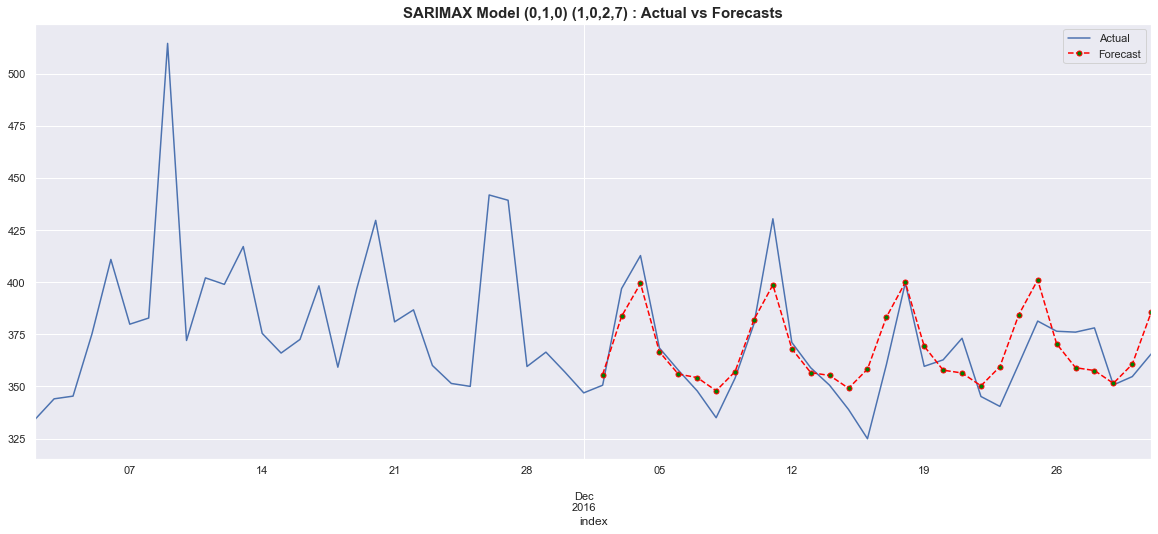

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.63956D+00    |proj g|=  2.61737D-01

At iterate    5    f=  7.55488D+00    |proj g|=  5.65395D-02

At iterate   10    f=  7.54954D+00    |proj g|=  2.29132D-02

At iterate   15    f=  7.54345D+00    |proj g|=  1.28156D-02

At iterate   20    f=  7.54289D+00    |proj g|=  8.63337D-04

At iterate   25    f=  7.54231D+00    |proj g|=  1.21762D-02

At iterate   30    f=  7.48783D+00    |proj g|=  5.36762D-02

At iterate   35    f=  7.46965D+00    |proj g|=  2.17700D-03

At iterate   40    f=  7.46962D+00    |proj g|=  1.78641D-03

At iterate   45    f=  7.45158D+00    |proj g|=  3.77798D-02

At iterate   50    f=  7.45019D+00    |proj g|=  3.80827D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

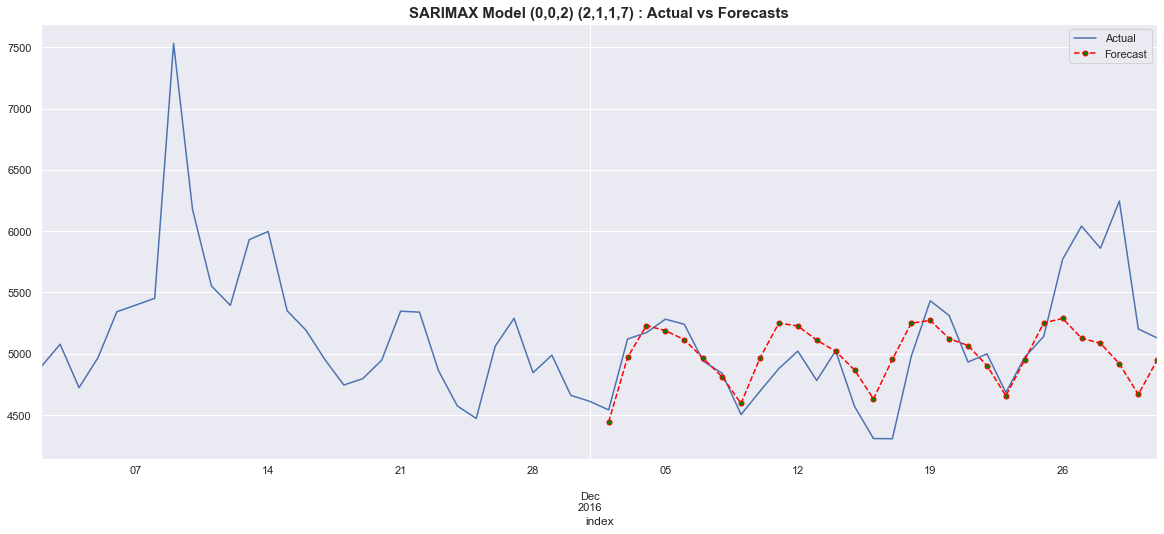

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.65852D+00    |proj g|=  1.54835D-01

At iterate    5    f=  5.61041D+00    |proj g|=  2.85896D-02

At iterate   10    f=  5.60894D+00    |proj g|=  8.30624D-03

At iterate   15    f=  5.59279D+00    |proj g|=  2.24724D-02

At iterate   20    f=  5.57278D+00    |proj g|=  5.61729D-02

At iterate   25    f=  5.56267D+00    |proj g|=  1.98523D-02

At iterate   30    f=  5.55879D+00    |proj g|=  1.80298D-03

At iterate   35    f=  5.55340D+00    |proj g|=  8.53680D-03

At iterate   40    f=  5.55175D+00    |proj g|=  6.90660D-03

At iterate   45    f=  5.55137D+00    |proj g|=  3.49471D-04

At iterate   50    f=  5.55132D+00    |proj g|=  2.15747D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

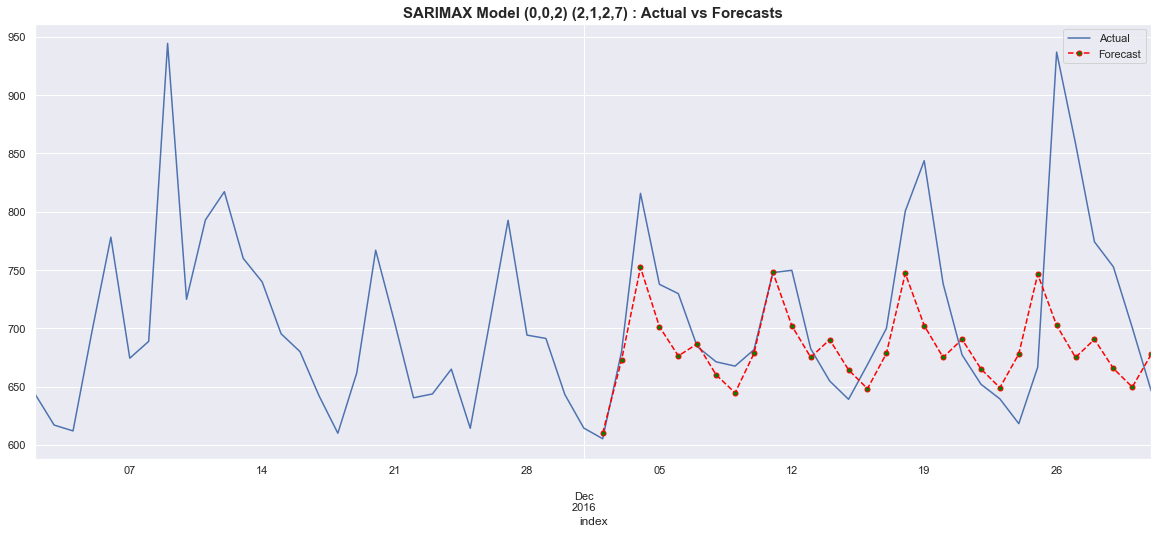

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.57640D+00    |proj g|=  3.34514D-02

At iterate    5    f=  5.54857D+00    |proj g|=  1.30325D-02

At iterate   10    f=  5.47999D+00    |proj g|=  1.50255D-02

At iterate   15    f=  5.47944D+00    |proj g|=  3.48490D-03

At iterate   20    f=  5.47853D+00    |proj g|=  3.69424D-04

At iterate   25    f=  5.47835D+00    |proj g|=  5.16109D-05

At iterate   30    f=  5.47830D+00    |proj g|=  2.56357D-04

At iterate   35    f=  5.47829D+00    |proj g|=  2.83218D-04

At iterate   40    f=  5.47829D+00    |proj g|=  3.39900D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

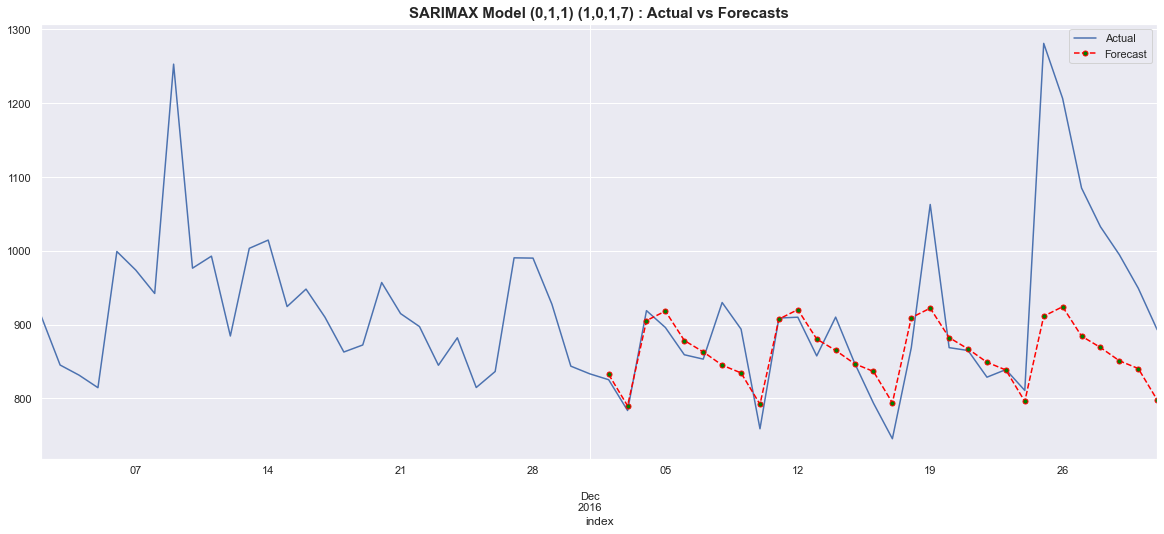

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.89870D+00    |proj g|=  6.18751D-02

At iterate    5    f=  5.89000D+00    |proj g|=  3.24874D-03

At iterate   10    f=  5.88423D+00    |proj g|=  5.04271D-02

At iterate   15    f=  5.85943D+00    |proj g|=  3.27351D-02

At iterate   20    f=  5.85757D+00    |proj g|=  3.97229D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     25      1     0     0   3.972D-06   5.858D+00
  F =   5.8575658265229871     

CONVERG

 This problem is unconstrained.


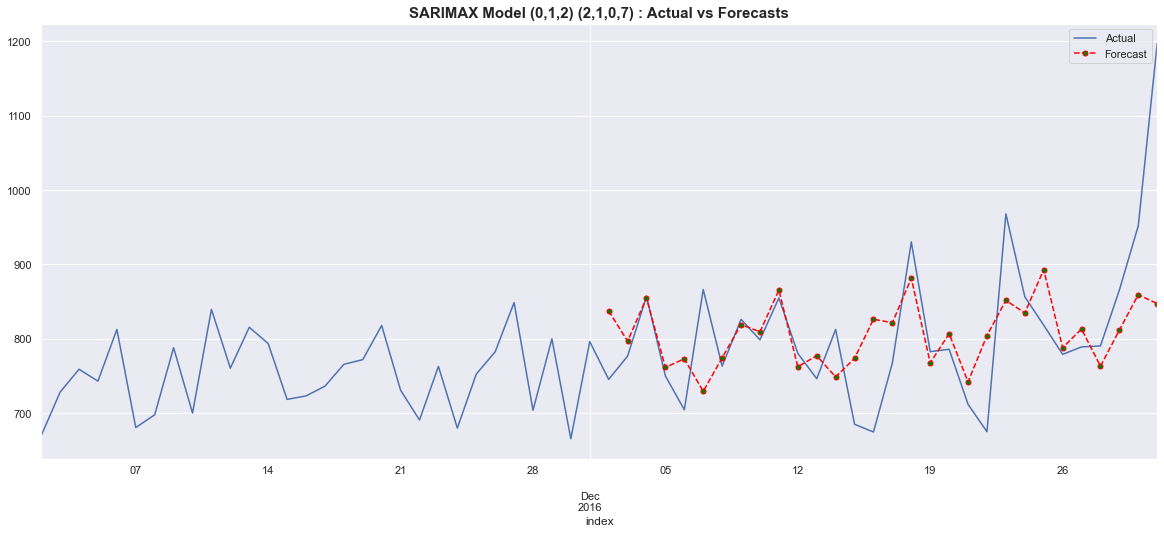

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.08929D+00    |proj g|=  3.60764D+00

At iterate    5    f=  7.95147D+00    |proj g|=  1.41299D-01

At iterate   10    f=  7.93228D+00    |proj g|=  4.11642D-02

At iterate   15    f=  7.93218D+00    |proj g|=  2.61562D-02

At iterate   20    f=  7.90556D+00    |proj g|=  3.44978D-02

At iterate   25    f=  7.88824D+00    |proj g|=  9.80865D-03

At iterate   30    f=  7.88220D+00    |proj g|=  1.60351D-03


 This problem is unconstrained.



At iterate   35    f=  7.85120D+00    |proj g|=  5.35230D-02
  ys=-2.948E+00  -gs= 1.191E-01 BFGS update SKIPPED

At iterate   40    f=  7.36200D+00    |proj g|=  6.89663D+00

At iterate   45    f=  7.35341D+00    |proj g|=  1.95839D-01

At iterate   50    f=  6.74619D+00    |proj g|=  1.17950D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50    100      1     1     0   1.180D-01   6.746D+00
  F =   6.7461892734828579     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


-----------------------------------------------------------------------------------------
        SARIMAX model for Russi

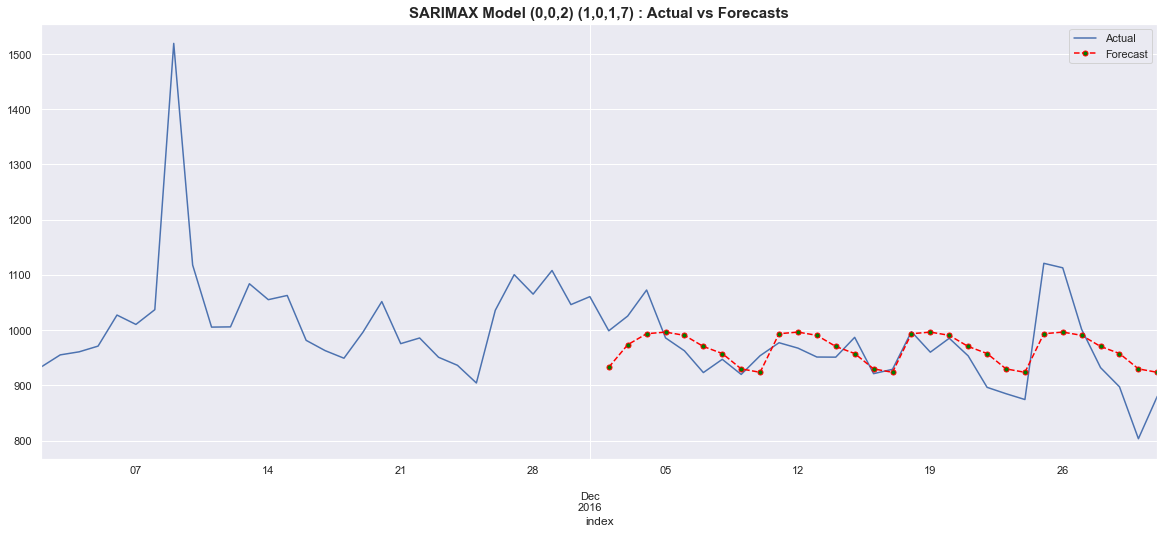

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.97200D+00    |proj g|=  3.73783D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      7      1     0     0   4.135D-05   5.971D+00
  F =   5.9711362301469775     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


-----------------------------------------------------------------------------------------
        SARIMAX model for Spanish Time Series                                             
        Par

 This problem is unconstrained.


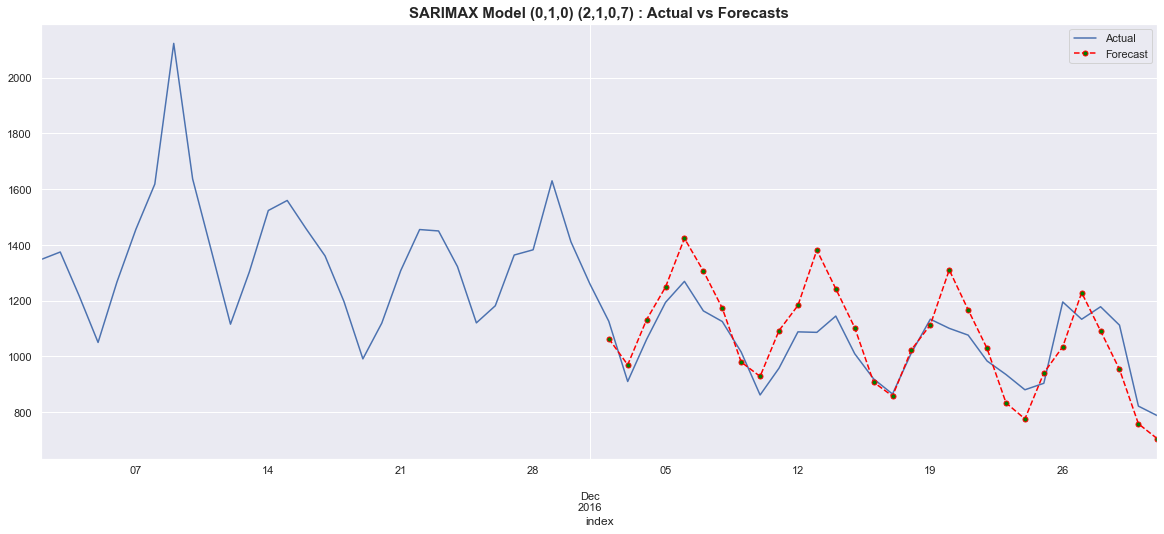

0

In [118]:
#Plotting SARIMAX model for each Language Time Series
languages = aggregated_data.columns
n = 30 
plot_best_SARIMAX_model(languages, aggregated_data, n, best_param_df)

# Forecasting using Facebook Prophet

In [126]:
from prophet import Prophet

In [127]:
time_series = aggregated_data
time_series = time_series.reset_index()
time_series = time_series[['index', 'English']]
time_series.columns = ['ds', 'y']
exog = Exog_Campaign_eng.copy(deep = True)
time_series['exog'] = exog.values

In [128]:
time_series

ds            y  exog
0   2015-07-01  3513.862203     0
1   2015-07-02  3502.511407     0
2   2015-07-03  3325.357889     0
3   2015-07-04  3462.054256     0
4   2015-07-05  3575.520035     0
..         ...          ...   ...
545 2016-12-27  6040.680728     1
546 2016-12-28  5860.227559     1
547 2016-12-29  6245.127510     1
548 2016-12-30  5201.783018     0
549 2016-12-31  5127.916418     0

[550 rows x 3 columns]

19:23:36 - cmdstanpy - INFO - Chain [1] start processing
19:23:36 - cmdstanpy - INFO - Chain [1] done processing


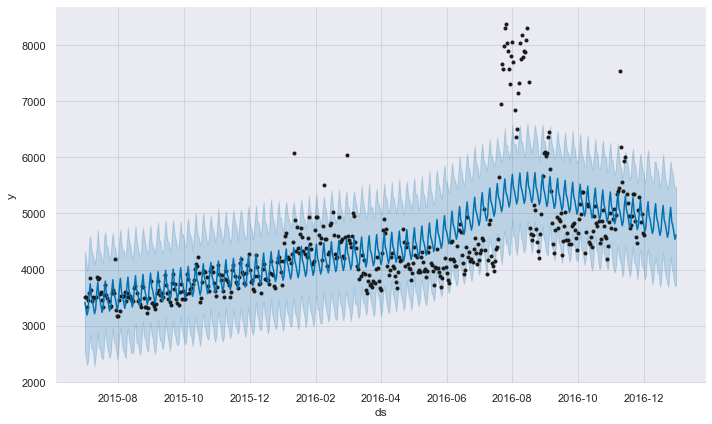

In [129]:
prophet1 = Prophet(weekly_seasonality=True)
prophet1.fit(time_series[['ds', 'y']][:-30])
future = prophet1.make_future_dataframe(periods=30, freq= 'D')
forecast = prophet1.predict(future)
fig1 = prophet1.plot(forecast)

19:23:38 - cmdstanpy - INFO - Chain [1] start processing
19:23:38 - cmdstanpy - INFO - Chain [1] done processing


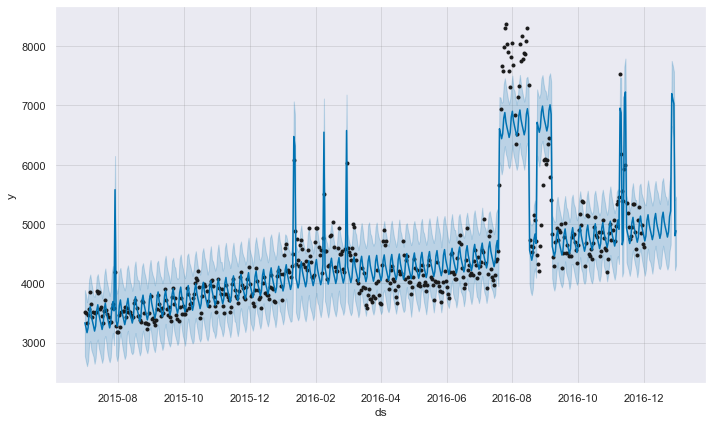

In [130]:
prophet2 = Prophet(weekly_seasonality=True)
prophet2.add_regressor('exog')
prophet2.fit(time_series[:-30])
#future2 = prophet2.make_future_dataframe(periods=30, freq= 'D')
forecast2 = prophet2.predict(time_series)
fig2 = prophet2.plot(forecast2)

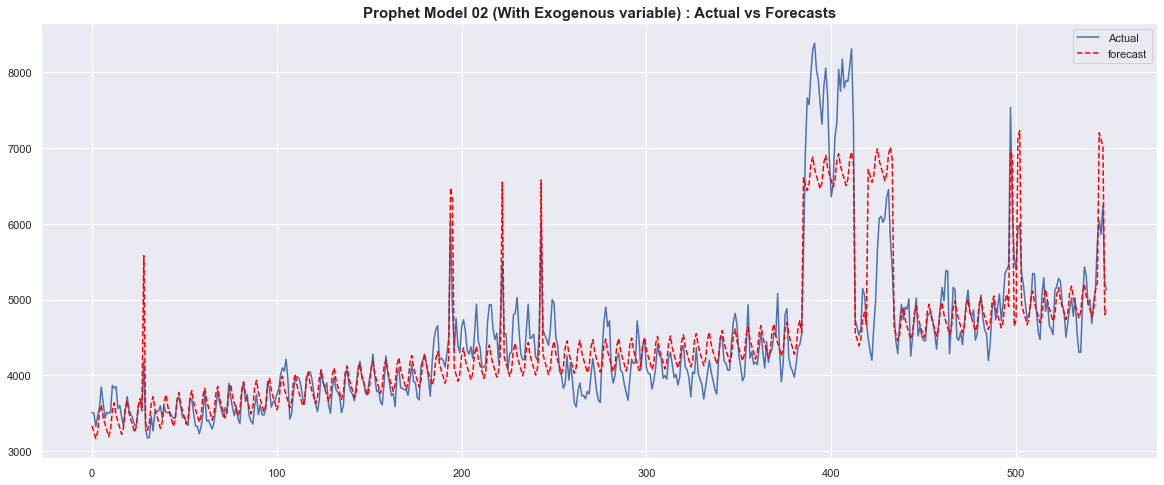

In [131]:
actual = time_series['y'].values
forecast = forecast2['yhat'].values

plt.figure(figsize = (20,8))
plt.plot(actual, label = 'Actual')
plt.plot(forecast, label = 'forecast', color = 'red', linestyle='dashed')
plt.legend(loc="upper right")
plt.title(f'Prophet Model 02 (With Exogenous variable) : Actual vs Forecasts', fontsize = 15, fontweight = 'bold')
plt.show()

In [132]:
errors = abs(actual - forecast)
mape = np.mean(errors/abs(actual))
mape

0.05946408247672476

# Inferences and Recommendations : 

- Inferences made from the data visualizations:

  - Total 7 languages found in data.
  - English has the highest number of pages.



  - 3 access types:
    - all-access    51.2295 %
    - mobile-web    24.7748 %
    - desktop       23.9958 %


  - 2 access origins:
    - agents    75.932526 %
    - spider    24.067474 %
    


  - English language has the highest pages. 
  - Maximum ads should be run on English Page. 



- What does the decomposition of series do?
  - The decomposition of a time series refers to the process of separating a time series into its components, such as trend, seasonality, and residuals. 
  - These components are intended to represent different underlying patterns in the data. The idea behind decomposition is to break down a complex time series into simpler components that can be more easily understood and analyzed.

  - Trend component represents the underlying pattern in the data over time, reflecting long-term changes.
  -  Seasonality component represents regular patterns that repeat over a fixed interval, such as daily, weekly, or yearly.
  -  Residual component represents the remaining random fluctuations in the data after removing the trend and seasonality components.
  - Decomposition is often used in time series analysis to identify and isolate different patterns in the data and to forecast future values. It is also used to remove seasonality and trend components from the data before applying statistical or machine learning models to the residuals, as this can help to improve the performance of these models.


- What level of differencing gave you a stationary series?

  - Stationarity is an important property of a time series because many time series analysis techniques assume that the time series is stationary.
  -  A time series is stationary if its mean, variance, and autocorrelation structure are constant over time.
  - Differencing is a common technique used to make a time series stationary. 
  - It involves subtracting the value of the time series at a previous time step from the current time step. 
  - This can help to remove trend and seasonality components from the data, making it more stationary. 
  - The order of differencing refers to the number of times the differencing operation is performed.
  - in this case study, differencing once yield a stationary time series.



- Difference between arima, sarima & sarimax.
  - ARIMA (AutoRegressive Integrated Moving Average) is a statistical model for time series data that accounts for both autoregression (the use of past values to predict future values) and moving average (the use of the residuals of past predictions to predict future values). 
  - It is a flexible method for modeling non-stationary time series data and can be used for both univariate and multivariate time series. 
  - ARIMA models are denoted by the notations ARIMA(p, d, q), where p is the order of the autoregression component, d is the order of differencing used to make the time series stationary, and q is the order of the moving average component.
---
  - SARIMA (Seasonal AutoRegressive Integrated Moving Average) is a variation of ARIMA that accounts for both seasonality and non-stationarity in time series data.
  - Seasonality refers to repeating patterns in the data over fixed time intervals, such as daily, weekly, or yearly. SARIMA models are denoted by the notations SARIMA(p, d, q)(P, D, Q, S), where p, d, and q are the same as in ARIMA models, P is the order of the seasonal autoregression component, D is the order of seasonal differencing, Q is the order of the seasonal moving average component, and S is the number of seasons in the data.
---
  - SARIMAX (Seasonal AutoRegressive Integrated Moving Average with exogenous regressors) is an extension of SARIMA that allows for the inclusion of exogenous variables, or variables that are not part of the time series data, in the modeling process.
  - SARIMAX models are useful when the time series data is influenced by other variables that are not part of the time series data, and can provide more accurate forecasts. 
  - SARIMAX models are denoted by the notations SARIMAX(p, d, q)(P, D, Q, S)x, where p, d, q, P, D, Q, and S are the same as in SARIMA models and x represents the number of exogenous variables included in the model.
---

- The equation for a SARIMA (Seasonal AutoRegressive Integrated Moving Average) model can be expressed as follows:

      ARIMA(p, d, q)(P, D, Q, S):

         y(t) = c + φ1 * y(t-1) + φ2 * y(t-2) + ... + φp * y(t-p) 
                  + Θ1 * e(t-1) + Θ2 * e(t-2) + ... + Θq * e(t-q) 
                  + δ * y(t-S) + Φ1 * y(t-S-1) + Φ2 * y(t-S-2) + ... + ΦP * y(t-S-P) 
                  + Θ1 * e(t-S-1) + Θ2 * e(t-S-2) + ... + ΘQ * e(t-S-Q) + e(t)

                where:

                y(t) is the value of the time series at time step t.
                c is a constant.
                φ1, φ2, ..., φp are the autoregression coefficients.
                Θ1, Θ2, ..., Θq are the moving average coefficients.
                δ is a coefficient for the seasonal autoregression term.
                Φ1, Φ2, ..., ΦP are the seasonal autoregression coefficients.
                Θ1, Θ2, ..., ΘQ are the seasonal moving average coefficients.
                e(t), e(t-1), ..., e(t-q), e(t-S), e(t-S-1), ..., e(t-S-Q) are the residuals.
       - In a SARIMA model, the order of differencing (d) is used to make the time series stationary,
        the autoregression and moving average components (p and q) are used to model the autocorrelation structure of the residuals, 
        and the seasonal components (P, D, Q, and S) are used to model the seasonal patterns in the data.
         The coefficients in the model are estimated using maximum likelihood estimation or other optimization techniques,
          and the residuals are used to assess the goodness-of-fit of the model.


- Compare the number of views in different languages




<Axes: xlabel='Language'>

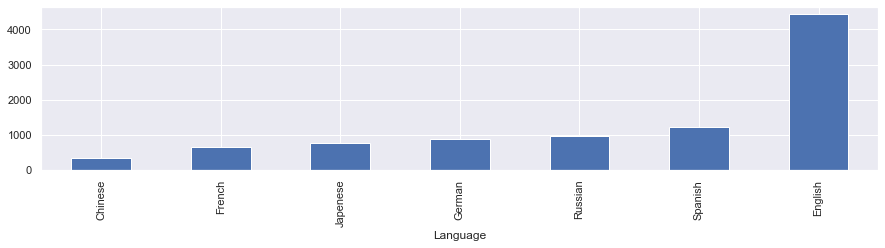

In [133]:
aggregated_data.mean().sort_values().plot(kind = 'bar')



- What other methods other than grid search would be suitable to get the model for all languages?

  - When estimating the values of p, q, and d from the ACF and PACF plots of a time series, the following steps can be taken:
    - Determine if the time series is stationary by conducting an augmented Dickey-Fuller test.
    - If the time series is stationary, attempt to fit an ARMA model. If it is non-stationary, determine the value of d.
    - If stationarity is achieved, plot the autocorrelation and partial autocorrelation graphs of the data.
    - Plot the partial autocorrelation graph (PACF) to determine the value of p, as the cut-off point in the PACF is equal to p.
    - Plot the autocorrelation graph (ACF) to determine the value of q, as the cut-off point in the ACF is equal to q